In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from pandasql import sqldf
import pandas as pd
from sklearn import datasets

from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
df = pd.read_csv("gdrive/My Drive/dataset/Amazon_fine_food_review.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df

Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
1                          0                       0      1  1346976000   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
4                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
568449                     0                       0      5  1299628800   
568450                     0                       0      2  1331251200   
568451                     2                       2      5  1329782400   
568452                     1                       1      5  1331596800   
568453                     0                       0      5  1338422400   

                                   Summary  \
0                    Good Quality Dog Food   
1                        Not as Advertised   
2                    "Delight" says it all   
3                           Cough Medicine   
4                              Great taffy   
...                                    ...   
568449                 Will not do without   
568450                        disappointed   
568451            Perfect for our maltipoo   
568452  Favorite Training and reward treat   
568453                         Great Honey   

                                                     Text  
0       I have bought several of the Vitality canned d...  
1       Product arrived labeled as Jumbo Salted Peanut...  
2       This is a confection that has been around a fe...  
3       If you are looking for the secret ingredient i...  
4       Great taffy at a great price.  There was a wid...  
...                                                   ...  
568449  Great for sesame chicken..this is a good if no...  
568450  I'm disappointed with the flavor. The chocolat...  
568451  These stars are small, so you can give 10-15 o...  
568452  These are the BEST treats for training and rew...  
568453  I am very satisfied ,product is as advertised,...  

[568454 rows x 10 columns]

In [ ]:
import pandas as pd

filtered_data = df[df['Score'] != 3].head(5000)



In [ ]:
filtered_data

Id   ProductId          UserId                      ProfileName  \
0        1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1        2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2        3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3        4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4        5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...    ...         ...             ...                              ...   
5422  5423  B00622CYVS  A17ASMX6QMO6XY                       E. Harvill   
5423  5424  B00622CYVS  A32DHN8U74GCAR        Granola Girl "michele j."   
5424  5425  B00622CYVS  A2YHXAZLCLDT8D          Mark Smith "Food lover"   
5425  5426  B00622CYVS  A2NYT3UXUTBY23                          C&GHoll   
5426  5427  B00622CYVS  A3EPC08TVAPA0N                          Krissia   

      HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                        1                       1      5  1303862400   
1                        0                       0      1  1346976000   
2                        1                       1      4  1219017600   
3                        3                       3      2  1307923200   
4                        0                       0      5  1350777600   
...                    ...                     ...    ...         ...   
5422                     0                       1      2  1277424000   
5423                     0                       1      4  1240790400   
5424                     0                       1      5  1236988800   
5425                     1                       3      2  1249603200   
5426                     0                       3      1  1340582400   

                                 Summary  \
0                  Good Quality Dog Food   
1                      Not as Advertised   
2                  "Delight" says it all   
3                         Cough Medicine   
4                            Great taffy   
...                                  ...   
5422                     Not so tasty...   
5423                       Food Delivery   
5424  Dinner time is Earths Best TIme !!   
5425                  Wrong item shipped   
5426                      Waste of time.   

                                                   Text  
0     I have bought several of the Vitality canned d...  
1     Product arrived labeled as Jumbo Salted Peanut...  
2     This is a confection that has been around a fe...  
3     If you are looking for the secret ingredient i...  
4     Great taffy at a great price.  There was a wid...  
...                                                 ...  
5422  My baby didn't seem into these dinners, so I t...  
5423  This is great!  Organic baby food options - de...  
5424  My little guy loves to try new foods..so this ...  
5425  We ordered the Earth's best 2nd dinner variety...  
5426  My baby loves this food.  At whole foods they ...  

[5000 rows x 10 columns]

In [ ]:
# Give reviews with Score>3 a positive rating(1), and reviews with a score<3 a negative rating(0).
def partition(x):
    if x < 3:
        return 0
    return 1

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition)
filtered_data['Score'] = positiveNegative
print("Number of data points in our data", filtered_data.shape)
filtered_data.head(3)

Number of data points in our data (5000, 10)


Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      1  1303862400   
1                     0                       0      0  1346976000   
2                     1                       1      1  1219017600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...

In [ ]:
# import pandas as pd
# import pandasql as ps

# # Apply the SQL query using pandasql
# query = """
# SELECT UserId, ProductId, ProfileName, Time, Score, Text, COUNT(*)
# FROM filtered_data
# GROUP BY UserId
# HAVING COUNT(*) > 1
# """
# result = ps.sqldf(query, locals())

# # Display the result
# print(result)

In [ ]:
import pandas as pd

# Assuming you have the 'filtered_df' DataFrame from previous filtering
# Create a DataFrame that includes rows where 'Score' is not equal to 3 and has more than one occurrence per 'UserId'
result = filtered_data.groupby('UserId').filter(lambda group: len(group) > 1)

# Group the filtered DataFrame and count occurrences
result = result.groupby(['UserId', 'ProductId', 'ProfileName', 'Time', 'Score', 'Text']).size().reset_index(name='Count')

# Display the result
result


UserId   ProductId                                   ProfileName  \
0    A132ETQPMHQ585  B00139TT72  Donna's Reviews "I Love Shopping on Amazon!"   
1    A132ETQPMHQ585  B001RVFDOO  Donna's Reviews "I Love Shopping on Amazon!"   
2    A13E0ARAXI6KJW  B000F9Z1WI                                   Ed Uyeshima   
3    A13E0ARAXI6KJW  B000F9Z1WI                                   Ed Uyeshima   
4    A13T0V3LHOTHDL  B0045IK1CK                             E. Treants "tree"   
..              ...         ...                                           ...   
304   AY1EF0GOH80EK  B000G6RYNE                               Natasha Stryker   
305   AY1EF0GOH80EK  B001EPPCNK                               Natasha Stryker   
306   AZV26LP92E6WU  B000G33MVK                     M. Hammond "ColemanFlGuy"   
307   AZV26LP92E6WU  B0045TDE4Q                     M. Hammond "ColemanFlGuy"   
308   AZV26LP92E6WU  B00469LSMU                     M. Hammond "ColemanFlGuy"   

           Time  Score                                               Text  \
0    1324166400      0  Good but not my favorite.........Newman's Own ...   
1    1309737600      0  OK...but would never buy them again my husband...   
2    1156464000      1  I hate to admit I miss the lard. I was the one...   
3    1204502400      1  I hate to admit I miss the lard. I was the one...   
4    1317427200      1  This is a much better Hot Chocolate than some ...   
..          ...    ...                                                ...   
304  1327708800      1  Someone brought these to a party we had last m...   
305  1349395200      1  So I got this and tasted it strait out of the ...   
306  1262217600      1  It is great! I like it alot. Great price too. ...   
307  1347148800      1  i followed the easy instructions and these tur...   
308  1313020800      1  a great deal. it arrived with no damage. the t...   

     Count  
0        1  
1        1  
2        1  
3        1  
4        1  
..     ...  
304      1  
305      1  
306      1  
307      1  
308      1  

[309 rows x 7 columns]

In [ ]:
# display = pd.read_sql_query("""
# SELECT UserId, ProductId, ProfileName, Time, Score, Text, COUNT(*)
# FROM filtered_data
# GROUP BY UserId
# HAVING COUNT(*)>1
# """, con)

In [ ]:
print(result.shape)
result.head()

(309, 7)


UserId   ProductId                                   ProfileName  \
0  A132ETQPMHQ585  B00139TT72  Donna's Reviews "I Love Shopping on Amazon!"   
1  A132ETQPMHQ585  B001RVFDOO  Donna's Reviews "I Love Shopping on Amazon!"   
2  A13E0ARAXI6KJW  B000F9Z1WI                                   Ed Uyeshima   
3  A13E0ARAXI6KJW  B000F9Z1WI                                   Ed Uyeshima   
4  A13T0V3LHOTHDL  B0045IK1CK                             E. Treants "tree"   

         Time  Score                                               Text  Count  
0  1324166400      0  Good but not my favorite.........Newman's Own ...      1  
1  1309737600      0  OK...but would never buy them again my husband...      1  
2  1156464000      1  I hate to admit I miss the lard. I was the one...      1  
3  1204502400      1  I hate to admit I miss the lard. I was the one...      1  
4  1317427200      1  This is a much better Hot Chocolate than some ...      1

In [ ]:
# result[result['UserId']=='AZY10LLTJ71NX']

Empty DataFrame
Columns: [UserId, ProductId, ProfileName, Time, Score, Text, Count]
Index: []

In [ ]:
# display['COUNT(*)'].sum()

393063

#  [2] Exploratory Data Analysis

## [2.1] Data Cleaning: Deduplication

It is observed (as shown in the table below) that the reviews data had many duplicate entries. Hence it was necessary to remove duplicates in order to get unbiased results for the analysis of the data.  Following is an example:

In [ ]:
result = result.drop_duplicates(subset=['UserId'])
result

UserId   ProductId                                   ProfileName  \
0    A132ETQPMHQ585  B00139TT72  Donna's Reviews "I Love Shopping on Amazon!"   
2    A13E0ARAXI6KJW  B000F9Z1WI                                   Ed Uyeshima   
4    A13T0V3LHOTHDL  B0045IK1CK                             E. Treants "tree"   
6     A14I86SK59DIX  B000ER1DIM                                        ginabi   
8    A15USNEAJUXOSH  B000G6RYNE                                    L. Schrank   
..              ...         ...                                           ...   
295   AVCA516CFZ9HF  B004K2IHUO                                     S. Fowler   
297   AXO4PQU0XG3TG  B000CS9ZTC                                        Dwight   
299   AY12DBB0U420B  B000X2CWTM                                 Gary Peterson   
304   AY1EF0GOH80EK  B000G6RYNE                               Natasha Stryker   
306   AZV26LP92E6WU  B000G33MVK                     M. Hammond "ColemanFlGuy"   

           Time  Score                                               Text  \
0    1324166400      0  Good but not my favorite.........Newman's Own ...   
2    1156464000      1  I hate to admit I miss the lard. I was the one...   
4    1317427200      1  This is a much better Hot Chocolate than some ...   
6    1327190400      1  Bought these for my grandbabies and they love ...   
8    1326067200      1  I enjoy these chips. I got these instead of my...   
..          ...    ...                                                ...   
295  1335139200      1  The crust on these tarts are perfect.  My husb...   
297  1173657600      0  I wait for this cereal to go on sale before I ...   
299  1263340800      1  I've always liked licorice candy and the best ...   
304  1327708800      1  Someone brought these to a party we had last m...   
306  1262217600      1  It is great! I like it alot. Great price too. ...   

     Count  
0        1  
2        1  
4        1  
6        1  
8        1  
..     ...  
295      1  
297      1  
299      1  
304      1  
306      1  

[139 rows x 7 columns]

In [ ]:
result

UserId   ProductId                                   ProfileName  \
0    A132ETQPMHQ585  B00139TT72  Donna's Reviews "I Love Shopping on Amazon!"   
2    A13E0ARAXI6KJW  B000F9Z1WI                                   Ed Uyeshima   
4    A13T0V3LHOTHDL  B0045IK1CK                             E. Treants "tree"   
6     A14I86SK59DIX  B000ER1DIM                                        ginabi   
8    A15USNEAJUXOSH  B000G6RYNE                                    L. Schrank   
..              ...         ...                                           ...   
295   AVCA516CFZ9HF  B004K2IHUO                                     S. Fowler   
297   AXO4PQU0XG3TG  B000CS9ZTC                                        Dwight   
299   AY12DBB0U420B  B000X2CWTM                                 Gary Peterson   
304   AY1EF0GOH80EK  B000G6RYNE                               Natasha Stryker   
306   AZV26LP92E6WU  B000G33MVK                     M. Hammond "ColemanFlGuy"   

           Time  Score                                               Text  \
0    1324166400      0  Good but not my favorite.........Newman's Own ...   
2    1156464000      1  I hate to admit I miss the lard. I was the one...   
4    1317427200      1  This is a much better Hot Chocolate than some ...   
6    1327190400      1  Bought these for my grandbabies and they love ...   
8    1326067200      1  I enjoy these chips. I got these instead of my...   
..          ...    ...                                                ...   
295  1335139200      1  The crust on these tarts are perfect.  My husb...   
297  1173657600      0  I wait for this cereal to go on sale before I ...   
299  1263340800      1  I've always liked licorice candy and the best ...   
304  1327708800      1  Someone brought these to a party we had last m...   
306  1262217600      1  It is great! I like it alot. Great price too. ...   

     Count  
0        1  
2        1  
4        1  
6        1  
8        1  
..     ...  
295      1  
297      1  
299      1  
304      1  
306      1  

[139 rows x 7 columns]

In [ ]:
#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [ ]:
sorted_data.shape

(5000, 10)

In [ ]:
#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(4986, 10)

In [ ]:
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

99.72

In [ ]:
final

Id   ProductId          UserId  \
2773  2774  B00002NCJC  A196AJHU9EASJN   
2774  2775  B00002NCJC  A13RRPGE79XFFH   
1243  1244  B00002Z754  A3B8RCEI0FXFI6   
1244  1245  B00002Z754  A29Z5PI9BW2PU3   
3203  3204  B000084DVR  A1UGDJP1ZJWVPF   
...    ...         ...             ...   
764    765  B009HINRX8  A1OEL4UZT3KKI4   
763    764  B009HINRX8   ADDBLG0CFY9AI   
762    763  B009HINRX8  A3N9477PUE6WMR   
767    768  B009HINRX8  A2CAZG1CQ8BQI5   
1477  1478  B009UOFU20   AJVB004EB0MVK   

                                      ProfileName  HelpfulnessNumerator  \
2773                                 Alex Chaffee                     0   
2774                                     reader48                     0   
1243                                    B G Chase                    10   
1244                                       Robbie                     7   
3203                 T. Moore "thoughtful reader"                     1   
...                                           ...                   ...   
764   coffee drinker in PA "coffee drinker in PA"                     0   
763                                        S.A.D.                     1   
762                                       patc477                     4   
767                           Patricia J. Nohalty                     0   
1477                            D. Christofferson                     0   

      HelpfulnessDenominator  Score        Time  \
2773                       0      1  1282953600   
2774                       0      1  1281052800   
1243                      10      1   962236800   
1244                       7      1   961718400   
3203                       1      1  1177977600   
...                      ...    ...         ...   
764                        0      1  1344988800   
763                        1      1  1326758400   
762                        4      1  1323302400   
767                        0      1  1337212800   
1477                       0      0  1345852800   

                                                Summary  \
2773                                      thirty bucks?   
2774                                       Flies Begone   
1243                     WOW Make your own 'slickers' !   
1244                                      Great Product   
3203                                        Good stuff!   
...                                                 ...   
764                       great coffee - terrible price   
763                               Best of the Tassimo's   
762                             Good Tasting cup o' joe   
767                                    Kona for Tassimo   
1477  weak coffee not good for a premium product and...   

                                                   Text  
2773  Why is this $[...] when the same product is av...  
2774  We have used the Victor fly bait for 3 seasons...  
1243  I just received my shipment and could hardly w...  
1244  This was a really good idea and the final prod...  
3203  I'm glad my 45lb cocker/standard poodle puppy ...  
...                                                 ...  
764   This is one of the best choices, in my opinion...  
763   We've tried many Tassimo flavors.  This is by ...  
762   This is a bold blend that has a great taste. T...  
767   Of all the coffee's available for Tassimo this...  
1477  This coffee supposedly is premium, it tastes w...  

[4986 rows x 10 columns]

Observation:- It was also seen that in two rows given below the value of HelpfulnessNumerator is greater than HelpfulnessDenominator which is not practically possible hence these two rows too are removed from calcualtions

In [ ]:
final = final[final['HelpfulnessNumerator'] <= final['HelpfulnessDenominator']]


In [ ]:
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

(4986, 10)


1    4178
0     808
Name: Score, dtype: int64

Preprocessing:
Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-

Begin by removing the html tags
Remove any punctuations or limited set of special characters like , or . or # etc.
Check if the word is made up of english letters and is not alpha-numeric
Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
Convert the word to lowercase
Remove Stopwords
Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)
After which we collect the words used to describe positive and negative reviews

In [ ]:
# printing some random reviews
sent_0 = final['Text'].values[0]
print(sent_0)
print("="*50)

sent_1000 = final['Text'].values[1000]
print(sent_1000)
print("="*50)

sent_1500 = final['Text'].values[1500]
print(sent_1500)
print("="*50)

sent_4900 = final['Text'].values[4900]
print(sent_4900)
print("="*50)

Why is this $[...] when the same product is available for $[...] here?<br />http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDY<br /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.
I recently tried this flavor/brand and was surprised at how delicious these chips are.  The best thing was that there were a lot of "brown" chips in the bsg (my favorite), so I bought some more through amazon and shared with family and friends.  I am a little disappointed that there are not, so far, very many brown chips in these bags, but the flavor is still very good.  I like them better than the yogurt and green onion flavor because they do not seem to be as salty, and the onion flavor is better.  If you haven't eaten Kettle chips before, I recommend that you try a bag before buying bulk.  They are thicker and crunchier than Lays but just as fresh out of the bag.
Wow.  So far, two two-star reviews.  One obviously had no 

In [ ]:
# Function to remove URLs
def remove_urls(text):
    return re.sub(r'http\S+|www.\S+', '', text)

# Apply the function to the 'text' column
final['Text'] = final['Text'].apply(remove_urls)


In [ ]:
# function to use beautiful soup
# This code will remove HTML tags and provide you with the plain text content.
import pandas as pd
from bs4 import BeautifulSoup

def parse_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

final['Text'] = final['Text'].apply(parse_html)


In [ ]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
final['Text'] = final['Text'].apply(decontracted)


In [ ]:
# for demonstration
print(sent_1500)
sent_1500 = decontracted(sent_1500)
print(sent_1500)
print("="*50)

Wow.  So far, two two-star reviews.  One obviously had no idea what they were ordering; the other wants crispy cookies.  Hey, I'm sorry; but these reviews do nobody any good beyond reminding us to look  before ordering.<br /><br />These are chocolate-oatmeal cookies.  If you don't like that combination, don't order this type of cookie.  I find the combo quite nice, really.  The oatmeal sort of "calms" the rich chocolate flavor and gives the cookie sort of a coconut-type consistency.  Now let's also remember that tastes differ; so, I've given my opinion.<br /><br />Then, these are soft, chewy cookies -- as advertised.  They are not "crispy" cookies, or the blurb would say "crispy," rather than "chewy."  I happen to like raw cookie dough; however, I don't see where these taste like raw cookie dough.  Both are soft, however, so is this the confusion?  And, yes, they stick together.  Soft cookies tend to do that.  They aren't individually wrapped, which would add to the cost.  Oh yeah, cho

In [ ]:
#remove words with numbers python
def rem_num(phrase):
  sent = re.sub("\S*\d\S*", "", phrase).strip()
  return sent

final['Text'] = final['Text'].apply(rem_num)
final['Text']

2773    Why is this $[...] when the same product is av...
2774    We have used the Victor fly bait for  seasons....
1243    I just received my shipment and could hardly w...
1244    This was a really good idea and the final prod...
3203    I am glad my  cocker/standard poodle puppy lov...
                              ...                        
764     This is one of the best choices, in my opinion...
763     We have tried many Tassimo flavors.  This is b...
762     This is a bold blend that has a great taste. T...
767     Of all the coffee is available for Tassimo thi...
1477    This coffee supposedly is premium, it tastes w...
Name: Text, Length: 4986, dtype: object

In [ ]:
#remove spacial character
def rem_char(phrase):
  sent = re.sub('[^A-Za-z0-9]+', ' ', phrase).strip()
  return sent

final['Text'] = final['Text'].apply(rem_char)
final['Text']

2773    Why is this when the same product is available...
2774    We have used the Victor fly bait for seasons C...
1243    I just received my shipment and could hardly w...
1244    This was a really good idea and the final prod...
3203    I am glad my cocker standard poodle puppy love...
                              ...                        
764     This is one of the best choices in my opinion ...
763     We have tried many Tassimo flavors This is by ...
762     This is a bold blend that has a great taste Th...
767     Of all the coffee is available for Tassimo thi...
1477    This coffee supposedly is premium it tastes wa...
Name: Text, Length: 4986, dtype: object

In [ ]:
# Download the stopwords if you haven't already
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Combining all the things
from nltk.corpus import stopwords
# Download the stopwords if you haven't already
nltk.download('stopwords')
# Tokenize the sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    words = sentance.split()
    # Filter out stopwords
    filtered_words = [word.lower() for word in words if word.lower() not in stopwords.words('english')]
    # Rejoin the filtered words into a sentence
    filtered_sentence = ' '.join(filtered_words)
    final['Text'] = filtered_sentence
    preprocessed_reviews.append(filtered_sentence.strip())

100%|██████████| 4986/4986 [00:49<00:00, 99.82it/s] 


In [ ]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

# Assuming 'final' is your DataFrame
final['Preprocessed_Reviews'] = final['Text'].apply(lambda sentance:
    ' '.join([word.lower() for word in re.sub(r'[^A-Za-z]+', ' ', decontracted(BeautifulSoup(re.sub(r"http\S+", "", sentance), 'lxml').get_text())).split() if word.lower() not in stopwords.words('english')]).strip()
)


In [ ]:
preprocessed_reviews[1500]

'wow far two two star reviews one obviously idea ordering wants crispy cookies hey sorry reviews nobody good beyond reminding us look ordering chocolate oatmeal cookies like combination order type cookie find combo quite nice really oatmeal sort calms rich chocolate flavor gives cookie sort coconut type consistency let also remember tastes differ given opinion soft chewy cookies advertised crispy cookies blurb would say crispy rather chewy happen like raw cookie dough however see taste like raw cookie dough soft however confusion yes stick together soft cookies tend individually wrapped would add cost oh yeah chocolate chip cookies tend somewhat sweet want something hard crisp suggest nabiso ginger snaps want cookie soft chewy tastes like combination chocolate oatmeal give try place second order'

Proprocessing Review Summary

In [ ]:
preprocessed_summary = []
# tqdm is for printing the status bar
for sentance in tqdm(final['Summary'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    words = sentance.split()
    # Filter out stopwords
    filtered_words = [word.lower() for word in words if word.lower() not in stopwords.words('english')]
    # Rejoin the filtered words into a sentence
    filtered_sentence = ' '.join(filtered_words)
    preprocessed_summary.append(filtered_sentence.strip())


100%|██████████| 4986/4986 [00:05<00:00, 985.70it/s]


In [ ]:
preprocessed_summary[100]

'minced ground beef'

Bag of Words

In [ ]:
#BoW in 'Reviews"
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(preprocessed_reviews)
print("some feature names ", count_vect.get_feature_names_out()[:10])
print('='*50)

final_counts = count_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['aa' 'aahhhs' 'aback' 'abandon' 'abates' 'abbott' 'abby' 'abdominal'
 'abiding' 'ability']
the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text BOW vectorizer  (4986, 13048)
the number of unique words  13048


In [ ]:
#BoW in 'Summary"
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(preprocessed_summary)
print("some feature names ", count_vect.get_feature_names_out()[:10])
print('='*50)

final_counts_summary = count_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['able' 'absolute' 'absolutely' 'absotively' 'acceptable' 'accidents'
 'acid' 'acidic' 'acne' 'acquired']
the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text BOW vectorizer  (4986, 13048)
the number of unique words  13048


In [ ]:
# get the list of vocabulary
vocabulary_list_bow = count_vect.get_feature_names_out()


In [ ]:
count_vect.get_feature_names_out()

array(['able', 'absolute', 'absolutely', ..., 'zero', 'zesty', 'zippy'],
      dtype=object)

Bi-grams and N-grams

In [ ]:
#bi-gram, tri-gram and n-gram

count_vect = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
final_bigram_counts = count_vect.fit_transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text BOW vectorizer  (4986, 2991)
the number of unique words including both unigrams and bigrams  2991


tf-idf

In [ ]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_reviews)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names_out()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['ability' 'able' 'able find' 'able get' 'absolute' 'absolutely'
 'absolutely delicious' 'absolutely love' 'according' 'acid']
the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (4986, 2991)
the number of unique words including both unigrams and bigrams  2991


word2vec

In [ ]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentance=[]
for sentance in preprocessed_reviews:
    list_of_sentance.append(sentance.split())


In [ ]:
list_of_sentance

[['product',
  'available',
  'victor',
  'traps',
  'unreal',
  'course',
  'total',
  'fly',
  'genocide',
  'pretty',
  'stinky',
  'right',
  'nearby'],
 ['used',
  'victor',
  'fly',
  'bait',
  'seasons',
  'ca',
  'beat',
  'great',
  'product'],
 ['received',
  'shipment',
  'could',
  'hardly',
  'wait',
  'try',
  'product',
  'love',
  'slickers',
  'call',
  'instead',
  'stickers',
  'removed',
  'easily',
  'daughter',
  'designed',
  'signs',
  'printed',
  'reverse',
  'use',
  'car',
  'windows',
  'printed',
  'beautifully',
  'print',
  'shop',
  'program',
  'going',
  'lot',
  'fun',
  'product',
  'windows',
  'everywhere',
  'surfaces',
  'like',
  'tv',
  'screens',
  'computer',
  'monitors'],
 ['really',
  'good',
  'idea',
  'final',
  'product',
  'outstanding',
  'use',
  'decals',
  'car',
  'window',
  'everybody',
  'asks',
  'bought',
  'decals',
  'made',
  'two',
  'thumbs'],
 ['glad',
  'cocker',
  'standard',
  'poodle',
  'puppy',
  'loves',
  'stu

In [ ]:
final

Id   ProductId          UserId  \
2773  2774  B00002NCJC  A196AJHU9EASJN   
2774  2775  B00002NCJC  A13RRPGE79XFFH   
1243  1244  B00002Z754  A3B8RCEI0FXFI6   
1244  1245  B00002Z754  A29Z5PI9BW2PU3   
3203  3204  B000084DVR  A1UGDJP1ZJWVPF   
...    ...         ...             ...   
764    765  B009HINRX8  A1OEL4UZT3KKI4   
763    764  B009HINRX8   ADDBLG0CFY9AI   
762    763  B009HINRX8  A3N9477PUE6WMR   
767    768  B009HINRX8  A2CAZG1CQ8BQI5   
1477  1478  B009UOFU20   AJVB004EB0MVK   

                                      ProfileName  HelpfulnessNumerator  \
2773                                 Alex Chaffee                     0   
2774                                     reader48                     0   
1243                                    B G Chase                    10   
1244                                       Robbie                     7   
3203                 T. Moore "thoughtful reader"                     1   
...                                           ...                   ...   
764   coffee drinker in PA "coffee drinker in PA"                     0   
763                                        S.A.D.                     1   
762                                       patc477                     4   
767                           Patricia J. Nohalty                     0   
1477                            D. Christofferson                     0   

      HelpfulnessDenominator  Score        Time  \
2773                       0      1  1282953600   
2774                       0      1  1281052800   
1243                      10      1   962236800   
1244                       7      1   961718400   
3203                       1      1  1177977600   
...                      ...    ...         ...   
764                        0      1  1344988800   
763                        1      1  1326758400   
762                        4      1  1323302400   
767                        0      1  1337212800   
1477                       0      0  1345852800   

                                                Summary  \
2773                                      thirty bucks?   
2774                                       Flies Begone   
1243                     WOW Make your own 'slickers' !   
1244                                      Great Product   
3203                                        Good stuff!   
...                                                 ...   
764                       great coffee - terrible price   
763                               Best of the Tassimo's   
762                             Good Tasting cup o' joe   
767                                    Kona for Tassimo   
1477  weak coffee not good for a premium product and...   

                                                   Text  
2773  Why is this when the same product is available...  
2774  We have used the Victor fly bait for seasons C...  
1243  I just received my shipment and could hardly w...  
1244  This was a really good idea and the final prod...  
3203  I am glad my cocker standard poodle puppy love...  
...                                                 ...  
764   This is one of the best choices in my opinion ...  
763   We have tried many Tassimo flavors This is by ...  
762   This is a bold blend that has a great taste Th...  
767   Of all the coffee is available for Tassimo thi...  
1477  This coffee supposedly is premium it tastes wa...  

[4986 rows x 10 columns]

In [ ]:

# http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.W17SRFAzZPY
# you can comment this whole cell
# or change these varible according to your need
from gensim.models import KeyedVectors

is_your_ram_gt_16g=True
want_to_use_google_w2v = True
want_to_train_w2v = True

if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    # w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)
    w2v_model = Word2Vec(list_of_sentance, min_count=5, vector_size=50, workers=4)
    print("1")
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    print(w2v_model.wv.most_similar('worst'))

elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('gdrive/My Drive/dataset/GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        print("2")
        print(w2v_model.wv.most_similar('great'))
        print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")

1
[('excellent', 0.9879277348518372), ('especially', 0.9869354367256165), ('alternative', 0.9857172966003418), ('licorice', 0.9848777055740356), ('healthier', 0.9847351908683777), ('regular', 0.9841542840003967), ('popchips', 0.9840731620788574), ('amazing', 0.9840046763420105), ('terms', 0.9836547374725342), ('looking', 0.9834456443786621)]
[('opinion', 0.9977235198020935), ('varieties', 0.9972403049468994), ('yet', 0.9971864819526672), ('popcorn', 0.9970571398735046), ('goes', 0.9970457553863525), ('unlike', 0.9969488382339478), ('amazing', 0.9968163371086121), ('enjoyed', 0.9968137741088867), ('gourmet', 0.9967362284660339), ('turned', 0.9967057704925537)]


In [ ]:
# pre-trained word2vec
from gensim.models import KeyedVectors

# Load the pre-trained Word2Vec model
word2vec_model = KeyedVectors.load_word2vec_format('gdrive/My Drive/dataset/GoogleNews-vectors-negative300.bin', binary=True)


# Apply the function to your DataFrame's text column


In [ ]:
final_short = final.head(1000)

In [ ]:
def get_word_vectors(text):
    # Tokenize and preprocess the text (replace with your preprocessing logic)
    # words = text.split()  # Basic tokenization by splitting on spaces
    # words = [word.lower() for word in words]  # Lowercase
    # Remove words not in the model's vocabulary
    words = [word for word in vocabulary_list_bow if word in word2vec_model.key_to_index]
    # Get the word vectors for each word
    word_vectors = [word2vec_model[word] for word in words]
    return word_vectors
final_short['word_vectors'] = final_short['Text'].apply(get_word_vectors)


In [ ]:
word2vec_model.key_to_index

{'</s>': 0,
 'in': 1,
 'for': 2,
 'that': 3,
 'is': 4,
 'on': 5,
 '##': 6,
 'The': 7,
 'with': 8,
 'said': 9,
 'was': 10,
 'the': 11,
 'at': 12,
 'not': 13,
 'as': 14,
 'it': 15,
 'be': 16,
 'from': 17,
 'by': 18,
 'are': 19,
 'I': 20,
 'have': 21,
 'he': 22,
 'will': 23,
 'has': 24,
 '####': 25,
 'his': 26,
 'an': 27,
 'this': 28,
 'or': 29,
 'their': 30,
 'who': 31,
 'they': 32,
 'but': 33,
 '$': 34,
 'had': 35,
 'year': 36,
 'were': 37,
 'we': 38,
 'more': 39,
 '###': 40,
 'up': 41,
 'been': 42,
 'you': 43,
 'its': 44,
 'one': 45,
 'about': 46,
 'would': 47,
 'which': 48,
 'out': 49,
 'can': 50,
 'It': 51,
 'all': 52,
 'also': 53,
 'two': 54,
 'after': 55,
 'first': 56,
 'He': 57,
 'do': 58,
 'time': 59,
 'than': 60,
 'when': 61,
 'We': 62,
 'over': 63,
 'last': 64,
 'new': 65,
 'other': 66,
 'her': 67,
 'people': 68,
 'into': 69,
 'In': 70,
 'our': 71,
 'there': 72,
 'A': 73,
 'she': 74,
 'could': 75,
 'just': 76,
 'years': 77,
 'some': 78,
 'U.S.': 79,
 'three': 80,
 'million': 81

In [ ]:
w2v_words = [word for word in word2vec_model.key_to_index.keys() if word.isalpha()]


In [ ]:
w2v_words

['in',
 'for',
 'that',
 'is',
 'on',
 'The',
 'with',
 'said',
 'was',
 'the',
 'at',
 'not',
 'as',
 'it',
 'be',
 'from',
 'by',
 'are',
 'I',
 'have',
 'he',
 'will',
 'has',
 'his',
 'an',
 'this',
 'or',
 'their',
 'who',
 'they',
 'but',
 'had',
 'year',
 'were',
 'we',
 'more',
 'up',
 'been',
 'you',
 'its',
 'one',
 'about',
 'would',
 'which',
 'out',
 'can',
 'It',
 'all',
 'also',
 'two',
 'after',
 'first',
 'He',
 'do',
 'time',
 'than',
 'when',
 'We',
 'over',
 'last',
 'new',
 'other',
 'her',
 'people',
 'into',
 'In',
 'our',
 'there',
 'A',
 'she',
 'could',
 'just',
 'years',
 'some',
 'three',
 'million',
 'them',
 'what',
 'But',
 'so',
 'no',
 'like',
 'if',
 'only',
 'percent',
 'get',
 'did',
 'him',
 'game',
 'back',
 'because',
 'now',
 'before',
 'company',
 'any',
 'team',
 'against',
 'off',
 'This',
 'most',
 'made',
 'through',
 'make',
 'second',
 'state',
 'well',
 'day',
 'season',
 'says',
 'week',
 'where',
 'while',
 'down',
 'being',
 'governmen

In [ ]:
final_short['word_vectors'].shape

(1000,)

In [ ]:
type(w2v_model.wv)

gensim.models.keyedvectors.KeyedVectors

In [ ]:
sent_vectors = []  # The avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance):  # for each review/sentence
    sent_vec = np.zeros(50)  # Assuming word vectors are of length 50

    # Initialize a counter for the number of words with valid vectors in the sentence/review
    cnt_words = 0

    for word in sent:  # for each word in a review/sentence
        if word in w2v_words:  # Check if the word exists in the Word2Vec model's vocabulary
            vec = w2v_model.wv[word]  # Get the Word2Vec vector for the word
            sent_vec += vec  # Add the vector to the sentence vector
            cnt_words += 1  # Increment the word count

    if cnt_words != 0:
        # Calculate the average vector for the sentence
        sent_vec /= cnt_words

    sent_vectors.append(sent_vec)


In [ ]:
# word2vec vocabulary list
vocabulary_list = w2v_model.wv.index_to_key
vocabulary_list

['like',
 'good',
 'great',
 'taste',
 'one',
 'product',
 'would',
 'flavor',
 'love',
 'coffee',
 'food',
 'chips',
 'tea',
 'really',
 'get',
 'best',
 'much',
 'amazon',
 'use',
 'also',
 'time',
 'buy',
 'tried',
 'little',
 'find',
 'make',
 'price',
 'bag',
 'better',
 'mix',
 'try',
 'even',
 'well',
 'chocolate',
 'hot',
 'free',
 'eat',
 'water',
 'dog',
 'first',
 'made',
 'could',
 'found',
 'used',
 'box',
 'bought',
 'sugar',
 'cup',
 'flavors',
 'sweet',
 'recommend',
 'brand',
 'delicious',
 'since',
 'store',
 'way',
 'order',
 'many',
 'think',
 'go',
 'two',
 'favorite',
 'gluten',
 'know',
 'still',
 'salt',
 'nice',
 'tastes',
 'pack',
 'add',
 'got',
 'makes',
 'drink',
 'bags',
 'without',
 'say',
 'quality',
 'bit',
 'ever',
 'every',
 'easy',
 'give',
 'products',
 'never',
 'years',
 'right',
 'regular',
 'ordered',
 'organic',
 'want',
 'ingredients',
 'day',
 'always',
 'lot',
 'snack',
 'something',
 'different',
 'enough',
 'using',
 'healthy',
 'loves',
 

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in vocabulary_list:
            # print(word)
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1

    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

  0%|          | 5/4986 [00:00<02:02, 40.57it/s]

product
available
course
total
pretty
stinky
right
nearby
used
ca
beat
great
product
received
shipment
could
hardly
wait
try
product
love
call
instead
removed
easily
daughter
designed
printed
use
car
windows
printed
beautifully
shop
program
going
lot
fun
product
windows
everywhere
like
tv
computer
really
good
idea
final
product
outstanding
use
car
window
everybody
asks
bought
made
two
thumbs
glad
cocker
standard
poodle
puppy
loves
stuff
trust
brand
superior
nutrition
compare
labels
previous
feed
mostly
corn
little
healthy
happy
high
energy
glossy
coat
also
superior
nutrition
produces
smaller
compact
stools
using
food
months
find
excellent
fact
two
dogs
de
standard
poodle
puppy
love
food
coats
excellent
condition
overall
perfect
good
tasting
dog
good
good
deal
owner
around
best
food
ever
used
excellent
nine
cats
crazy
kibbles
last
thing
want
cat
food
cats
hate
buying
shipped
day
ordered
arrived
within
days
live
opposite
coast
made
order
arrived
nicely
packaged
price
got
lbs
oz
biscotti


  0%|          | 10/4986 [00:00<04:46, 17.39it/s]

product
powder
powder
nothing
shredded
coconut
even
dissolve
high
commercial
blender
unless
using
product
dark
chocolate
coated
coconut
useless
use
additive
healthy
shake
ended
shake
chewing
tasteless
coconut
pieces
rather
drinking
shake
additionally
way
product
packaged
cardboard
top
package
box
opened
could
rated
product
zero
stars
would
quality
rather
inexpensive
gave
one
package
away
free
patient
loves
coconut
gave
back
two
days
later
complaining
terrible
bought
brand
online
indian
grocery
store
usually
excellent
products
able
turn
cream
butter
using
super
blender
adding
water
barely
flavor
usually
buy
brand
coconut
cream
quite
tasty
flavorful
read
another
review
different
product
making
coconut
cream
complaint
texture
mine
virtually
tasteless
use
keep
finicky
toddler
protein
levels
great
delicious
way
imagine
cooking
sausage
favorite
recipe
one
large
onion
tablespoon
dried
basil
salt
pepper
butter
add
sausage
cut
potatoes
cut
thick
cover
chicken
stock
potatoes
soft
dissolved
throw

  0%|          | 13/4986 [00:00<04:53, 16.97it/s]


done
add
sweet
potatoes
potatoes
onions
pan
make
skillet
bit
cheese
top
food
one
pan
meal
family
enjoys
mac
cheese
peas
sausage
mixed
another
option
daughter
crazy
cut
sausage
cook
make
homemade
mac
cheese
usual
add
frozen
peas
sausage
finish
cooking
sweetness
sausage
salty
cheese
good
easy
make
company
american
classic
business
years
best
hot
sauce
sauce
bar
none
good
brands
best
nothing
compares
hot
sauce
reasonable
heat
bite
adds
unique
flavor
favorite
foods
mild
sauce
milder
perfect
frozen
dinners
harder
find
green
sauce
die
great
everything
unfortunately
see
green
stuff
amazon
find
get
try
three
grew


  0%|          | 16/4986 [00:01<06:25, 12.88it/s]

stuff
keep
five
six
bottles
variety
shelves
times
try
want
go
back
run
mill
commercial
stuff
href
mexican
hot
sauce
oz
hot
pack
love
adds
flavor
hot
eat
least
meals
every
day
good
eggs
good
pizza
good
vegetables
really
go
wrong
thank
goodness
love
sauce
cannot
find
product
local
grocery
stores
anymore
internet
shopping
makes
living
town
long
lists
saved
occasional
trip
big
city
first
name
basis
ups
drivers
shipments
hit
miss
fit
great
head
town
favorite
product
good
love
different
sauce
nothing
like
anything
find
grocery
store
closer


  0%|          | 24/4986 [00:01<04:09, 19.89it/s]

salsas
recently
appeared
new
restaurant
little
smokey
picky
old
eat
family
always
mild
table
southern
california
south
florida
happy
mail
order
get
little
single
serve
pouches
directly
company
found
product
search
edible
gold
leaf
decided
purchase
reading
rave
reviews
food
items
created
using
however
clearly
marked
consumed
use
misleading
product
purchased
item
cake
called
gold
dust
never
thought
would
find
im
glad
sprinkled
looked
like
star
container
small
go
long
way
worth
buying
used
product
multiple
times
fact
purchased
four
gold
silver
dust
five
years
ago
running
use
stuff
sorts
things
themed
including
entire
roast
duck
using
vodka
onto
thought
food
looked
beautiful
recommend
stuff
enough
used
super
gold
dust
create
chocolate
leaves
cake
son
wedding
using
lightly
coat
leaves
dust
result
beautiful
food
coloring
dust
easily
metallic
color
sheen
containers
small
product
goes
long
way
making
extremely
economical
use
href
step
dynamic
powerful
growing
business
product
allows
make
reall

  1%|          | 28/4986 [00:01<03:59, 20.69it/s]

href
pc
golf
set
happy
product
purchased
item
received
numerous
comments
wow
everyone
wanted
know
purchased
items
course
proud
say
amazon
com
would
suggest
friends
purchase
product
price
cheap
quality
good
golf
set
arrived
quickly
pictured
birthday
five
year
old
grandson
turned
great
natural
ingredients
preservatives
say
fantastic
expiration
date
would
eat
within
week
two
faster
opened
absolutely
excellent
freeze
loss
quality
order
weather
hot
ship
cool
bags
cold
packs
instead
styrofoam
dry
ice
orders
usually
arrive
cool
cold
beans
used
asian
sweets
make
sweet
bean
paste
boiling
beans
min
changing
water
least
twice
beans
sugar
paste
like
bean
skins
get
paste
put
ice
cream
fill
stuff
cakes
good
beans
find
grocery
stores
live
ordered
problems
good
yummy
smell
like
cloves
cooking
taste
little
sweet
good
stuff
like
need
soak
small
feel
good
mouth
sauce
something
staple
table
everything
gets
dash
two
three
truly
spicy
year
old
loves
stuff
great
chicken
even
chicken
nuggets
spring
rolls
cris

  1%|          | 41/4986 [00:01<02:32, 32.40it/s]

one
good
go
home
one
day
cooked
fried
chicken
rice
taste
chicken
good
day
introduced
mae
ploy
sweet
chili
sauce
sauce
excellent
sweet
mild
hot
burn
mouth
give
heart
burn
continue
purchase
product
chicken
fish
foods
try
good
use
stuff
pretty
much
everything
turkey
sandwiches
homemade
sushi
scrambled
eggs
chicken
nuggets
perfect
spicy
sour
expensive
either
love
first
tasted
sauce
visiting
served
fish
perfect
combination
sweet
spicy
could
find
locally
ordered
amazon
available
reasonable
price
wonderful
fish
pork
chicken
tried
beef
sure
would
good
also
terrific
vegetables
highly
recommend
product
sooo
good
followed
advice
thought
outside
conventional
box
sliced
onion
sprinkled
mae
ploy
chili
sauce
lime
juice
made
nice
salad
kick
also
good
cilantro
ever
wondered
delicious
dipping
sauce
crab
amazing
sauce
chicken
love
stuff
discovered
someone
left
bottle
quick
picture
took
amazon
found
great
pretty
much
everything
previous
say
also
thai
restaurant
night
used
sauce
amazing
salad
try
salad
sli

  1%|          | 46/4986 [00:01<02:16, 36.22it/s]

purchase
product
amazon
purchased
oz
bottle
local
store
must
say
one
addicting
sauces
ever
pretty
picky
eater
vegetarian
sauces
play
key
making
average
meal
great
one
sauce
almost
perfect
sweet
strong
garlic
taste
first
thick
red
hot
brand
like
much
thick
flavorful
way
chunky
sauce
would
appropriate
children
like
little
kick
chicken
nuggets
son
loves
spicy
food
like
another
plus
calories
tablespoons
much
sauce
goes
long
way
gram
fiber
thing
hard
time
personal
issue
texture
red
tastes
great
thin
clear
skin
horrible
crunchy
texture
pieces
get
stuck
mouth
teeth
hits
makes
feel
bit
still
eat
anyway
lol
continue
one
best
sauces
ever
tasted
would
recommend
anyone
try
sauce
first
try
others
fully
satisfied
sauce
amazing
store
oz
like
ordering
online
find
near
know
would
pay
amazon
price
day
buy
sauce
care
buy
fall
love
love
stuff
put
chicken
even
steaks
sweet
bit
spicy
little
goes
long
way
best
years
ago
used
loved
moved
could
find
purchased
many
hot
sweet
sauces
years
trying
find
flavor
rece

  1%|          | 51/4986 [00:02<02:47, 29.50it/s]

sauce
check
try
hooked
without
doubt
sweet
sauce
world
use
hot
cold
dishes
including
chicken
roast
superb
seasoning
plain
rice
quinoa
sweet
hot
authentic
buy
larger
bottles
time
open
one
save
back
could
run
without
great
red
mean
asian
sauces
easily
best
sauce
ever
put
everything
gotten
hand
go
way
see
else
latest
thing
pouring
peanuts
coating
peanuts
sauce
eat
nuts
spoon
keep
hands
clean
sounds
gross
delicious
use
kitchen
many
dishes
perfect
blend
sweet
pinch
heat
toss
chicken
wings
great
bar
food
home
another
idea
combine
sweet
chili
sauce
heavy
mayonnaise
garlic
finely
chopped
ginger
powder
splash
give
delicious
sweet
chili


  1%|          | 55/4986 [00:02<03:29, 23.51it/s]

perfect
burgers
sandwiches
fries
fish
even
chicken
like
said
good
serves
great
base
things
salad
dressing
marinade
buy
sauce
bulk
find
using
everything
love
sauce
sweet
hot
use
wings
instead
buffalo
sauce
pan
shrimp
delicious
sauce
good
tastes
hot
enough
brands
heat
makes
sauce
multi
sauce
seems
one
layer
want
spicy
different
flavor
sometimes
lightly
seasoned
plain
piece
beef
chicken
put
sweet
chili
sauce
rice
wow
whole
plate
times
cook
meat
without
seasoning
add
every
flavor
mood
kept
open
bottles
refrigerator
months
without
problem
never
tried
sauce
thicker
ketchup
slowly
add
sweetness
heat
right
another
way
use
steamed
vegetables
add
peanuts
sliced
almonds
serving
sauce
fine
however
resist
particular
piece
hope
someone
might
able
amazon
next
time
sauce
comes
pack
one
bottle
broken
guessed
amazon
sent
new
pack
two
asked
return
original
cost
little
time
much
going
cost
amazon
ship
process
returned
bottle
guess
good
mine
really
beyond
someone
split
pack
sent
one
replacement
bottle
real

  1%|          | 60/4986 [00:02<03:00, 27.31it/s]

used
sauce
dipping
sauce
great
love
fact
msg
right
amount
sweetness
little
spicy
right
amount
use
meats
fish
poultry
purpose
dip
al
cheap
special
gave
big
bottles
family
friends
years
ago
hooked
sorry
brought
sauce
kitchen
tiny
easy
thai
chicken
cut
usual
cook
slowly
quickly
hot
oven
brush
sweet
chili
sauce
cook
minutes
authentic
rice
also
delicious
brown
red
rice
thailand
people
sized
sell
portion
sort
chicken
sometimes
city
pull
sell
chicken
windows
treat
remember
sauce
enhance
flavor
plenty
times
eat
came
mae
ploy
sweet
chili
sauce
eat
flavor
exciting
taste
one
favorite
restaurants
sauce
good
anything
cook
grill
use
dip
veggies
etc
enough
heat
make
everything
taste
better
whole
family
loves
sauce
use
primarily
dish
adds
wonderful
sweet
spicy
flavor
sauce
service
order
several
bottles
arrived
broken
received
within
days
amazon
service
fast
easy
reliable
love
amazon
also
many
recipes
look
using
sauce
good
goes


  1%|▏         | 67/4986 [00:02<03:28, 23.62it/s]

coconut
milk
vegetables
chicken
shrimp
pasta
love
purchased
sauce
exact
sauce
used
hot
sauce
bar
goes
amazing
steak
home
cooking
works
marinade
condiment
read
nine
reviews
wondered
product
depending
person
taste
could
consistently
receive
five
stars
something
suspicious
five
star
rating
tough
best
sauce
kind
kind
ever
old
guy
around
right
sweetness
right
would
love
soak
chicken
well
dip
egg
rolls
chicken
nuggets
big
bottles
last
back
shure
absolutely
worth
worth
little
price
stuff
standard
every
home
along
reviewers
introduced
sauce
good
friend
mine
runs
thai
restaurant
bar
wondered
sauce
used
served
delicious
crispy
spring
rolls
actual
sauce
directed
try
brand
since
yrs
ago
mother
friends
used
sauce
fried
chicken
wings
grilled
chicken
pork
spring
egg
rolls
even
sushi
keep
large
oz
bottle
fridge
year
round
best
brand
used
thus
far
hot
accustomed
spicy
foods
mostly
sweet
try
disappointed
mentioned
give
try
instant
party
food
frozen
sauce
great
chicken
name
anything
party
snack
happy
hou

  2%|▏         | 76/4986 [00:03<02:48, 29.07it/s]

keeps
well
last
bottle
got
lost
pantry
several
years
old
found
still
tasted
great
along
sauce
etc
condiment
staple
brought
dipping
sauce
dumplings
egg
rolls
made
home
taste
great
think
sauce
get
thai
places
cause
tastes
exact
delicious
makes
gourmet
cook
put
chicken
pork
steak
ca
c
wish
could
say
chinese
love
purchase
amazon
prime
saves
trip
market
makes
wonderful
gift
best
sauce
market
use
almost
food
product
especially
good
veggies
cook
lot
chinese
dishes
household
sweet
chili
sauce
must
one
favorites
sesame
chicken
could
seem
get
flavor
right
added
yum
love
asian
flavor
w
extreme
heat
sauce
w
wings
mellow
immediately
asked
could
find
brand
sauce
perfect
amazing
flavor
one
favorite
sauces
handy
order
get
two
giant
bottles
last
taste
perfect
faint
heart
however
best
sweet
chili
sauce
found
anywhere
say
sweet
hey
sweet
chili
sauce
supposed
sweet
rich
full
flavor
everyone
family
likes
even
wife
stand
anything
anyone
would
consider
hot
loves
sauce
pepper
head
like
like
little
kick
try
ad

  2%|▏         | 84/4986 [00:03<02:59, 27.27it/s]

store
purchase
cute
little
box
would
helped
make
special
thought
paid
missing
returned
italy
told
little
chocolates
perfect
little
two
chocolates
gifts
days
happy
days
delicious
candy
outstanding
price
rich
product
fortunes
inside
added
bonus
great
options
packaging
though
coffee
expensive
compared
regular
store
bought
huge
fan
coffee
usually
stomach
tea
drinker
years
coffee
low
acidic
level
handle
aroma
bag
lasted
long
time
fan
beans
versus
grounds
another
plus
prompt
packaging
coffee
stayed
fresh
intact
love
tea
tea
fanatic
tastes
expectations
smooth
bitter
low
awesome
taste
take
pg
tips
packaging
cute
teas
tea
exceptional
would
recommend
tea
anyone
first
drank
tea
north
bought
small
packet
hooked
drunk
first
bit
bought
wanted
get
tea
glad
see
sale
high
quantity
used
coffee
drinker
much
prefer
tea
specifically


  2%|▏         | 88/4986 [00:03<03:34, 22.85it/s]

afternoon
tea
gave
away
bag
coffee
never
drink
never
quite
got
people
tea
whether
typical
tea
know
see
would
build
around
high
quality
tea
like
one
product
gift
far
arrived
right
schedule
perfect
condition
loved
choices
inside
basket
cannot
food
personally
loved
know
unique
combination
ingredients
hot
sauce
makes
one
kind
picked
bottle
trip
brought
back
home
us
totally
away
realized
simply
could
find
anywhere
city
bummed
magic
internet
case
sauce
love
hot
sauce
mean
really
love
hot
sauce
want
sauce
throat
grab
bottle
gourmet
de
realize
taste
never
want
use
sauce
thank
personal
incredible
service
strong
pure
need
little
bit
get
great
flavor
helps
digestion
smell
strong
much
white
orange
making
product
overly
bitter
real
good
taste
orange
five
minutes
one
ball
inside
cracked
half
durable
enough
dog
toy
disappointed
dog
full
hot
spots
used
within
week
hot
spots
gone
smell
kinda
strong
bad
tried
found
salty
plus
ate
fish
sauce
fish
realized
kind
kidding
course
stuff
great
exactly
ordered
f

  2%|▏         | 94/4986 [00:03<02:44, 29.79it/s]

dried
berries
still
texture
aroma
pot
roast
much
better
half
dozen
berries
mixture
ten
years
trying
find
know
look
amazon
review
make
sound
really
stupid
whatever
really
care
long
people
find
real
avoid
got
wonderful
little
sweet
bean
days
three
years
old
around
house
house
eating
whatever
cheap
cats
around
entire
life
five
years
mother
always
fed
whatever
kinds
food
buy
supermarket
nine
lives
kit
stuff
like
cats
always
fine
least
terms
eating
habits
would
eat
morning
stop
done
come
back
eat
got
hungry
time
working
hill
best
food
ever
made
great
know
initially
trusted
think
also
plenty
coupons
free
bags
made
much
attractive
choice
first
tried
feeding
little
bean
amount
science
diet
bowl
work
would
one
sitting
took
measuring
thing
started
twice
day
work
either
would
start
going
crazy
middle
day
running
around
things
water
etc
got
food
split
three
servings
thing
got
four
servings
little
better
much
around
every
day
feed
four
times
went
back
three
trying
reduce
amount
food
feeding
less
cu

  2%|▏         | 98/4986 [00:04<05:26, 14.99it/s]

one
developed
bad
dandruff
stools
developed
really
bad
although
say
nobody
developed
diarrhea
grateful
lab
results
old
guy
came
back
kidney
values
concern
disgusted
science
diet
public
nutritional
claims
bags
one
sites
researched
chronic
failure
nutritional
various
foods
available
compare
various
science
diet
different
health
claims
nutritional
values
components
listed
within
point
two
basically
nutritional
analysis
appears
base
formula
maybe
slight
difference
vitamin
additive
brands
innova
royal
appears
actual
difference
different
deal
weight
gain
well
problems
noted
switching
foods
time
trying
royal
indoor
wish
us
luck
aged
cat
sensitive
stomach
cannot
eat
cat
foods
available
however


  2%|▏         | 101/4986 [00:04<04:52, 16.70it/s]

problems
months
feeding
ever
way
mention
healthier
seems
stronger
brand
easily
eats
dry
without
add
wet
food
make
palatable
clearly
likes
taste
highly
recommend
anyone
senior
cat
know
science
diet
junk
food
one
higher
quality
foods
market
lot
new
organic
natural
cat
foods
healthy
pets
cracked
regardless
veterinarian
wanted
put
year
old
cat
prescription
food
high
count
crystals
comparisons
science
diet
adult
active
closest
prescription
food
cats
younger
one
older
food
seem
enjoy
day
indoor
cats
try
best
younger
cat
issues
since
went
food
happy
although
seems
like
great
product
definitely
minced
cans
say
minced
ground
beef
cat
likes
minced
chunks
ground
although
eat
ground
cat
food
sometimes
delicious
yet
walks
away
hate
packaging
contents
product
shipping
value
great
long
deliver
promise
stuck
food
cat
wont
eat
made
mistake
science
diet
best
choice
cat
woman
animal
shelter
mentioned
food
use
research
realized
science
diet
better
grocery
store
brand
would
recommend
options
main
ingredien

  2%|▏         | 104/4986 [00:04<05:44, 14.18it/s]

castor
wholesome
ingredients
proven
track
record
later
called
shelter
hear
required
feed
animals
science
diet
donated
special
house
animals
store
exclusively
feed
science
diet
animals
try
instead
href
indoor
dry
cat
food
bag
perfect
food
cat
fact
one
eat
wet
dry
comes
case
bought
one
locally
ordering
large
amount
good
move
cats
none
would
eat
review
gourmet
beef
tried
favors
yet
much
tea
drinker
bought
automatic
tea
maker
bag
tummy
tea
fennel
wife
started
brewing
first
pot
new
tea
ever
smell
great
little
like
licorice
shared
pot
hooked
ever
since
one
teas
makes
feel
warm
feeling
forget
desert
island
could
one
tea
would
enjoy
drinking
tea
would
encourage
look
tea
maker
produced
german
firm
without
doubt
tool
brewing
tea
price
little
high
believe
worth
every
penny
live
digestive
problems
eat
lot
mint
mint
mint
tea
strong
mints
get
tired
taste
mint
especially
morning
gave
coffee
months
ago
still
mornings
looking
kind
substitute
forget
decaf
anything
forget
chocolate
forget
tea
people
swea

  2%|▏         | 112/4986 [00:05<04:13, 19.26it/s]


tea
sells
elsewhere
tea
better
chamomile
tea
much
terms
flavor
anything
used
fennel
tea
mornings
nothing
else
settle
even
mint
leaves
herbal
teabags
mint
leaves
much
goes
nicely
fan
vegetable
soup
celery
might
take
little
getting
used
like
smell
reminds
good
quality
product
definitely
helps
tummy
evening
makes
huge
difference
feel
definitely
recommended
along
fiber
life
changing
love
tea
hot
cold
always
looking
try
new
ones
tea
brews
wonderful
cup
opening
bag
scoop
joy
smell
alone
tried
cup
stomach
immediately
really
taste
like
good
quality
licorice
naturally
sweet
urge
sweets
hits
reach
tea
instead
really
satisfy
cravings
tea
staple
pantry
bought
girlfriend
tummy
issues
absolutely
loves
seems
keep
stock
completely
different
product
review
point
buying
bulk
obvious
making
tea
bags
go
home
seems
economical
without
quality
least
wish
would
subscribe
save
feature
hooked
loyal
customers
gf
usually
gets
wants
fennel
smells
fresh
tastes
good
makes
great
addition
one
tea
blends
packaged
exac

  2%|▏         | 115/4986 [00:05<04:37, 17.53it/s]

country
gravy
de
tried
others
brand
best
far
chose
mix
water
milk
cooked
chopped
sausage
cheese
garlic
like
red
lobster
served
small
side
scrambled
eggs
super
easy
make
thick
finger
heard
put
potatoes
veggies
chicken
make
soups
add
seasoning
brand
name
says
american
classic
gravy
mix
excellent
except
use
water
called
use
milk
instead
makes
better
awesome
little
snack
treat
favorite
pup
dog
two


  2%|▏         | 118/4986 [00:05<04:24, 18.41it/s]

love
use
training
well
treat
come
variety
flavors
pups
like
liver
best
senior
dogs
perfect
power
teeth
use
anymore
easy
carry
treat
dog
whenever
want
example
walk
around
neighborhood
calories
worry
weight
absolutely
recommend
every
dog
owner
treats
ok
main
complaint
small
size
made
hard
give
medium
size
dog
treat
one
treat
package
labeled
toy
small
dogs
bears
small
low
calorie
use
training
use
standard
training
sit
stay
drop
leave
training
stinky
messy
put
pocket
purse
car
without
worry
keep
small
bag
car
travel
puppy
people
one
door
goes
bathroom
outside
bunch
treats
treat
bag
travel
one
downside
stinky
harder
use
get
dog
attention
like
dog
park
bunch
trick
get
around
put
stinky
treats
treat
bag
take
scent
use
href
beef
liver
freeze
dried
dog
treats
ounce
dog
loves
flavors
love
treats
two
german
think
treats
great
even
large
size
dogs
dogs
absolutely
go
crazy
calories
per
treat
perfect
training
also
love
texture
put
pocket
without
ton
gross
smell
product
also
ingredient
list
opposed
m

  2%|▏         | 121/4986 [00:05<04:05, 19.84it/s]


short
another
plus
long
list
artificial
give
pups
liver
flavor
cheese
egg
flavor
mix
things
bit
cheese
egg
ones
even
smell
like
cheese
yum
href
natural
dog
treats
cheese
egg
oz
resealable
bag
absolutely
great
treats
training
use
overweight
dogs
calories
per
treat
even
overweight
dog
feel
like
getting
treats
especially
multi
dog
household
one
dog
overweight
others
taste
must
wonderful
since
anything
dogs
tiny
treats
pleased
many
reasons
great
products
product
arrived
seal
place
good
condition
nearly
months
iraq
able
shake
pepper
thing
smell
air
heaven
compared
tiny
little
pepper
packets
give
us
little
taste
really
love
smell
pepper
tastes
great
may
better
buying
grocery
store
paying
shipping
manage
though
soy
milk
variety
extra
nutrients
added
great
nutritious
high
calcium
cholesterol
product
great
price
buy
case
ordered
product
send
friend
husband
moved
end
march
could
find
diet
peach
tasted
bought
new
said
water
used
south
made
diet
peach
taste
different
happy
found
source
buy


  3%|▎         | 125/4986 [00:05<04:02, 20.07it/s]

thank
peach
flavored
diet
tea
extremely
refreshing
long
summer
day
truly
diet
tea
zero
calories
best
served
chilled
mild
overwhelming
peach
flavor
right
makes
green
black
tea
leaves
also
mild
green
tea
flavor
mixed
peach
flavoring
use
filtered
water
well
tea
sweetened
somewhat
aspartame
adds
right
amount
sweet
want
really
tea
rather
sweet
either
look
use
added
sweetener
also
contains
kosher
dietary
concerns
company
free
number
people
contact
overall
tea
perfect
hot
summer
day
want
something
cool
highly
recommend
product
received
box
great
since
sell
west
coast
got
package
opened
box
extremely
disappointed
cookies
looked
like
box
death
left
box
filled
crumbs
sized
hole
side
box
needless
say
reordering
buy
cookies
regret
hands
best
store
bought
chocolate
cookies
buy
every
new
brand
comes
mrs


  3%|▎         | 128/4986 [00:06<05:35, 14.48it/s]

farms
much
better
recent
new
recipe
chocolate
chip
cookies
milk
chocolate
chip
soft
baked
chocolate
chip
cookies
newer
cookie
awful
milk
chocolate
tastes
like
bananas
cookie
part
tastes
like
crappy
store
bought
soft
cookies
original
recipe
chocolate
cookie
mind
experience
delicious
dark
chocolate
chips
soft
mouth
cookie
unique
taste
seem
ratio
flour
sugar
cookie
delicious
without
excessive
sugary
sweetness
horrible
new
cookies
absolutely
idea
decided
nearly
sales
recipe
replace
disgusting
brands
seems
happened
name
bought
larger
company
probably
money
saving
opportunity
original
recipe
cookies
likely
expensive
ingredients
problem
hard
find
thank
goodness
amazon
something
eat
please
give
real
food
hungry
people
corn
flakes
corn
sugar
malt
flavoring
high
fructose
corn
syrup
salt
yes
course
also
lots
yummy
preservatives
vitamins
iron
minute
quantities


  3%|▎         | 130/4986 [00:06<05:59, 13.50it/s]

nutrition
get
basically
carbs
lots
sugar
almost
protein
add
milk
get
saturated
fat
little
protein
whole
milk
added
nutrition
include
sliced
banana
wheat
like
corn
flakes
business
enjoy
health
food
poor
value
cents
ounce
per
package
price
package
failure
maintain
freshness
even
bigger
drawback
one
thinks
long
may
take
finish
ounces
stuff
use
vacuum
sealed
container
like
wheat
freshness
price
range
hungry
really
eating
wrong
stuff
something
eat
please
give
real
food
hungry
people
please
care
package
candies
wow
good
americans
little
sesame
seeds
except
time
taste
nutty
little
wonders
individually
wrapped
keep
fresh
slow
better
peanut
brittle
day
kosher
became
addicted
eating
first
time
tasted
years
ago
eat
one
stop
gone
sweet
make
perfect
snack
love
things
believe
many
ways
product
saved
life
gave
one
star
dehydrated
drinking
regular
water
week
ran
money
penta
ran
afford
another
shipment
jack
back
stars
seriously
folks
waters
run
system
right
away
penta
sticks
ribs
like
oatmeal
body
natu

  3%|▎         | 134/4986 [00:06<05:46, 13.98it/s]

look
purchase
including
free
straight
penta
website
really
enjoy
drinking
see
difference
everyday
life
love
water
feel
better
drinking
free
free
free
free
free
something
medicinal
grade
really
works
work
longer
allowed
drink
soda
bought
penta
water
hooked
like
one
liter
size
bottles
wish
would
sell
also
lucky
purchase
market
buy
water
drink
penta
water
unless
absolutely
drink
water
find
price
water
cheaper
actual
website
get
free
shipping
feel
better
overall
wish
could
get
stuff
gallon
great
product
well
worth
price
improved
feeling
well
bought
bottles
stuff
record
washing
machine
get
record
collection
basically
vacuum
using
mix
water
water
pure
ever


  3%|▎         | 140/4986 [00:06<04:05, 19.71it/s]

better
compared
water
much
less
tap
oh
water
would
believe
great
play
deep
cleaned
wife
always
tell
playing
instead
sounds
alive
says
water
highly
recommended
purpose
may
even
drink
sometime
see
fuss
best
way
cook
roast
local
grocery
went
could
find
product
till
looked
please
continue
keep
product
available
love
product
cant
find
locally
sometimes
little
way
stores
also
love
chicken
pork
bags
every
store
go
look
found
meat
market
always
pleasure
find
french
products
web
markets
area
made
bargain
carry
nothing
bland
tasteless
seasonings
flavorful
cooking
bag
mix
ever
find
great
tasting
one
best
ever
problem
high
shipping
costs
husband
took
vacation
costa
rica
wonderful
time
whole
time
drank
britt
dark
roast
loved
taste
bitter
taste
plus
normally
drink
decaf
noticed


  3%|▎         | 143/4986 [00:07<04:38, 17.39it/s]

britt
regular
dark
roast
bother
order
decaf
anymore
enjoy
regular
order
line
find
best
tasting
coffee
ever
thanks
growing
best
coffee
beans
world
coffee
delicious
full
bodied
leaves
great
almost
chocolaty
taste
dad
told
trip
costa
rica
first
tried
britt
dark
roast
costa
rica
lot
rich
flavor
bitter
case
ever
since
really
expensive
gourmet
brands
find
local
store
best
coffee
ever
tried
many
supposedly
special
ones
years
first
tasted
coffee
hotel
coffee
shop
costa
rica
vacation
bought
bags
brought
back
home
us
costa
rica
grows
arabica
coffee
beans
fantastic
enjoy
good
coffee
best
morning
strong
flavorful
full
bodied
bitter
cup
drip


  3%|▎         | 145/4986 [00:07<04:38, 17.41it/s]

coffee
maker
use
two
rounded
tbs
finished
last
coffee
looked
amazon
found
exact
brand
purchased
costa
rica
bought
four
bags
getting
coffee
dark
roast
coffee
ever
tasted
pleasure
sip
full
bodied
coffee
breakfast
dinner
forget
starbucks
anything
else
real
deal
like
good
wine
britt
coffee
truly
gourmet
taste
really
fussy
coffee
generally
avoid
trip
costa
rica
fell
love
beverage
use
french
press
get
full
favor
throw
away
coffee
making
beans
deserve
best
taste
buds
deserve
best
work
britt
get
paid
say
guys
britt
read
send
sample
two
husband
fell
love
cafe
britt
coffee


  3%|▎         | 149/4986 [00:07<05:08, 15.68it/s]

costa
rica
upon
return
delighted
see
could
order
amazon
com
coffee
easy
drink
bitter
great
way
start
day
highly
recommended
love
coffee
like
reviewers
took
trip
costa
rica
immediately
addicted
bold
flavorful
coffee
cover
lover
tried
many
different
brands
find
britt
hands
best
ever
brought
back
one
bag
costa
rica
started
ordering
supply
go
back
bland
store
bought
coffees
definitely
worth
try
disappointed
used
use
coffee
visited
costa
rica
gave
aunt
thinks
best
coffee
gave
christmas
excellent
product
exactly
advertised
fresh
unfortunately
keep
candy
dish
office
going
fast
need
reorder
keep
delicious
chocolate
excellent
espresso
bean
perfect
roast
purpose
crunchy
bitter
href
covered
espresso
beans
pounds
chocolate
covered
espresso
beans
wonderful
chocolate
dark
rich
bean
inside
delightful
blend
flavors
enough
really
give
ordered
coffee
themed
wedding
arrived
fight
friends
smelled
tasted
good
literally
hide
box
wedding
big
hit
wedding
day
none
left
put
great
tasting
product
lowest
price
se

  3%|▎         | 155/4986 [00:07<03:29, 23.02it/s]

several
years
ago
back
purchase
health
food
store
thanks
amazon
order
within
days
never
run
product
best
tried
several
stevia
products
taste
please
try
looking
healthier
alternative
equal
taste
great
container
lasts
long
time
stevia
pretty
much
natural
zero
calorie
sweetener
time
powdered
stevia
bitter
absolutely
bitterness
tastes
exactly
like
real
sugar
amazing
add
plain
yogurt
amazing
guilt
free
dessert
breakfast
side
dish
snack
add
tea
coffee
recipes
anything
truly
product
cheaper
oz
container
amazon
anywhere
else
also
sell


  3%|▎         | 162/4986 [00:08<03:40, 21.85it/s]

oz
also
drinks
highly
recommend
extremely
potent
liquid
stevia
sometimes
powdered
version
takes
dissolve
iced
beverages
eventually
dissolve
though
years
using
sweeteners
like
equal
sweet
n
low
realized
long
term
effects
wanted
find
good
alternative
lucky
virtually
bitter
natural
using
exclusively
year
works
hot
cold
beverages
comes
bulk
packets
portability
used
baking
probably
recipes
depends
sugar
something
similar
get
good
effect
however
daily
use
beverages
product
good
quite
skeptical
stevia
first
tried
another
brand
thought
much
difference
taste
felt
better
using
natural
product
artificial
sweeteners
started
looking
getting
bulk
container
happened
upon
product
purchased
product
times
quite
pleased
product
bit
concentrated
using
less
product
drinks
cooking
always
quick
issues
product
packaging
love
use
sugar
substitute
everything
beverages
desserts
cooking
bitter
even
hot
drinks
like
coffee
baking
good
online
tell
much
stevia
use
per
cup
sugar
need
replace
bulk
sugar
recipe
also
add

  3%|▎         | 166/4986 [00:08<03:26, 23.39it/s]

love
stevia
tried
many
different
kinds
years
one
goes
great
coffee
tea
one
auto
ship
get
one
month
makes
pretty
cheap
stevia
best
tasting
ever
tried
also
mixes
beverages
thoroughly
others
service
buyer
prompt
product
arrived
time
excellent
condition
would
order
recommend
others
ordered
much
success
liquid
products
bitter
fresh
clean
taste
baked
used
stove
oatmeal
hot
cocoa
run
ordering
stevia
sweetener
use
beverages
cooking
tried
brands
one
best
odd
taste
tastes
better
sugar
buy
large
ounce
container
lasts
months
wish
would
put
products
sold
grocery
stores
soda
stevia
purchase
health
food
store
called
zero
comes
different
flavors
great
concerned
sugar
content
traditional
product
great
think
best
stevia
products
market
tried
every
brand
stevia
market
hands
best
use
naturals
sweetening
purposes
hard
find
even
health
food
stores
ones
carry
usually
charge
premium
delighted
find
amazon
com
reasonable
price
even
less
standing
order
best
tasting
stevia
tried
also
think
better
value
others
rea

  3%|▎         | 169/4986 [00:08<04:18, 18.66it/s]


aspartame
want
yet
aspartame
gave
headaches
even
sometimes
symptoms
multiple
would
use
stevia
times
aftertaste
bad
honest
crazy
taste
either
tried
product
awesome
like
stevia
tried
delicious
also
aftertaste
unless
put
way
much
common
mistake
people
new
comes
powdered
form
bottle
handy
packets
individual
servings
also
comes
alcohol
free
liquid
form
even
vanilla
flavor
unlike
aspartame
becomes
even
toxic
heated
stevia
used
baking
stevia
baking
blend
since
raw
tell
tastes
sure
good
judging
products
thanks
great
products
low
carb
raw
diet
sweets
trying
get
sugar
product
great
sweet
taste
without
insulin
bitter
aftertaste
great
anyone
trying
eat
healthy
love
product
looking
sweetener
delicious
tea
stevia
used
sweeten
hot
cold
tea
almost
say
regular
sugars
drinks
get
taste
stevia
powder
unlike
artificial
sweeteners
stevia
never
bitter
leave
nasty
aftertaste
mouth
packets
easy
carry
may
even
notice
less
cravings
sugary
foods
using
low
calorie
calories
sweetener
gram
carbs
ahead
game
every
si

  4%|▎         | 175/4986 [00:08<03:58, 20.15it/s]

keep
hand
times
gallon
container
water
add
cup
lime
juice
stevia
powder
refreshing
almost
calories
chemical
aftertaste
dad
uses
stevia
coffee
oatmeal
tried
cooking
although
know
make
one
designed
baking
possibly
try
winter
bought
white
stevia
maltodextrin
several
months
ago
trying
cut
back
sugar
artificial
sweeteners
first
morning
tried
coffee
hated
tastes
bitter
equal
sweet
n
low
decided
give
another
try
day
lemonade
absolutely
delicious
also
tried
hot
tea
bitter
wonderful
iced
tea
think
hot
drinks
bring
bitterness
stevia
glad
bought
also
box
packets
convenient
go
tried
many
different
brands
stevia
far
one
thrown
also
tried
fan
makes
coffee
tea
taste
like
licorice
hated
stevia
licorice
taste
tried
since
day
almost
completely
sugar
drinks
like
plant
based
product
taste
need
little
make
anything
taste
sweet
great
product
stevia
powder
raise
blood
glucose
level
natural
use
since
much
sweeter
sugar
tastes
natural
artifical
sweeteners
healthy
use
since
organic
natural
sweetener
hooked
stev

  4%|▎         | 182/4986 [00:09<04:31, 17.68it/s]

trusted
vendor
amazon
best
tasting
stevia
powder
tried
powders
weird
taste
one
recently
bought
bag
online
making
way
used
buy
product
size
health
food
store
florida
dollars
moved
ny
could
find
stores
looked
online
shipping
costs
still
cost
dollars
use
product
tea
coffee
like
better
real
sugar
find
bitter
even
put
little
much
ice
tea
sometimes
forget
real
sugar
ice
tea
especially
like
additives
texture
taste
used
baking
simple
pound
cakes
cookies
good
find
jar
product
works
better
people
without
much
hands
vs
using
opening
sweetener
packets
product
works
well
cold
hot
things
like
homemade
lemonade
coffee
easy
open
lid
product
dissolves
easily
cold
liquids
many
types
stevia
favorite
stevia
product
subscribe
save
customer
service
gmo
use
yes
uses
gmo
products
subscribe
save
order
using
href
stevia
clear
liquid
extract
container
pack
used
use
agave
nectar
honey
even
though
picked
organic
still
sugar
desired
put
recipes
actually
got
due
sugars
products
product
great
use
protein
smoothies
ba

  4%|▍         | 188/4986 [00:09<04:50, 16.50it/s]

products
white
stevia
powder
super
sweet
use
one
bottle
lasts
long
time
happy
product
buying
tried
various
brands
stevia
always
come
back
buy
ounce
container
use
sweeten
everything
sweet
tooth
need
added
pounds
ticket
drink
lot
tea
sweetener
lot
stevia
brands
leave
bitter
taste
best
found
problem
highly
recommended
nice
quality
items
cheap
candies
like
dog
loved
think
probably
helped
gas
say
breath
year
old
terrier
food
allergies
wheat
girl
treat
great
upset
stomach
dog
looks
forward
bone
treats
loves
things
stopped
carrying
go
seem
made
good
ingredients
right
size
plus
loves
important
went
searching
dog
biscuits
reading
help
digestive
gas
bad
breath
appears
one
two
brands
market
tried
one
think
called


  4%|▍         | 196/4986 [00:09<03:26, 23.24it/s]

make
biscuit
small
dogs
dog
eating
one
day
say
sure
whether
work
used
really
smell
gas
dropped
like
maybe
due
biscuits
knows
like
biscuits
much
surely
buy
food
fda
consumers
chicken
jerky
products
dogs
also
sold
chicken
strips
treats
may
associated
dogs
last
months
fda
seen
increase
number
complaints
received
dog
associated
consumption
chicken
jerky
products
imported
china
complaints
reported
fda
dog
owners
eat
oats
funny
taste
kids
also
think
taste
funny
husband
thinks
ok
pounds
oats
eat
good
quality
oats
package
came
time
oats
worked
well
recipes
admit
single
person
bought
oats
boyfriend
breakfast
food
lasted
us
year
otherwise
excellent
buy
product
fresh
good
getting
complaints
anymore
worth
large
quantity
shipping
charges
hey
oatmeal
favorite
happy
quality
product
price
like
reviewer
would
prefer
plastic
freshness
however
continue
buy
product
regardless
quality
oatmeal
good
price
edit
bag
quality
high
product
high
quality
rich
full
flavor
delivery
fast
negative
would
like
see
produc

  4%|▍         | 208/4986 [00:10<02:05, 38.08it/s]

rolled
oats
flavor
rest
better
organic
oats
advertised
elsewhere
takes
lots
water
minute
oats
oatmeal
cookies
come
right
crumbly
soggy
instant
oats
place
cookies
first
grandson
born
wanted
everything
sun
celebrate
wonderful
idea
around
long
time
however
everything
fine
wonderful
except
fact
fresh
little
bubble
gum
cigars
hard
rock
moral
story
fun
item
shipping
much
cigars
least
could
fresh
hard
purchased
item
celebrate
grandson
opted
real
cigars
might
tasted
better
cigars
hard
hurt
teeth
chew
mention
gum
cigars
much
sweet
nothing
good
service
ever
since
started
ordering
amazon
com
keep
good
work
third
child
first
son
born
sent
oldest
school
friends
celebrate
really
made
feel
important
school
helped
celebrate
little
boy
loved
friends
enjoyed
btw
clear
school
first
hate
mail
please
product
arrived
timely
manner
good
condition
hit
family
son
arrived
ordered
amazon
normal
amazon
shipping
etc
cigars
cracked
stale
chewing
gum
break
way
fit
consumption
easy
return
process
purchased
son
give
b

  4%|▍         | 213/4986 [00:10<02:32, 31.21it/s]

seeds
though
decide
eat
hips
every
find
one
de
properly
hence
need
avoid
eat
brewed
hips
find
crackers
countries
run
love
individually
wrapped
small
packets
stay
fresh
container
makes
great
carry
purse
take
work
snacks
etc
also
love
overly
salted
like
many
american
brand
crackers
company
shipped
great
job
fast
best
tasting
cracker
ever
tasted
may
cost
less
asian
store
well
good
unless
live
close
one
note
box
says
pound
ounces
description
page
says
whatever
meant
oz
box
case
able
find
even
cheaper
online
price
shown
page
amazon
whenever
buy
stuff
like
sure
consider
bottom
line
price
product
plus
shipping
check
alternative
amazon
cheaper
page
box
free
shipping
total
order
page
href
flakes
crackers
box
costs
shipping
total
dollar
cheaper
page
buy
amazon
page
product
quick
snack
light
spread
like
takes
hardly
space
couple
packets
placed
bag
individually
wrapped
crackers
makes
stay
fresh
longer
periods
cookies
big
hit
new
year
eve
dinner
everyone
enjoyed
reading
fortune
time
arrived
another

  5%|▍         | 225/4986 [00:10<01:54, 41.55it/s]

self
help
mini
bites
fortune
love
travel
soon
satisfied
matter
matters
state
fortune
beware
dog
corner
house
would
fun
get
life
boring
cookies
arrived
schedule
promised
good
condition
individual
wrappers
would
hoped
content
fortune
cookies
especially
cookies
kind
fast
shipping
good
packing
cookies
broken
second
time
ordered
product
happy
enough
first
time
place
order
cookies
fine
delivery
quick
thank
well
packed
broken
cookies
tasty
notes
interesting
friends
really
enjoyed
great
product
fast
shipment
food
product
tasted
great
none
fortune
cookies
opened
would
buy
seller
brought
cookies
dish
pass
family
christmas
get
together
hit
cookies
fresh
packaging
well
done
delivery
prompt
sisters
fun
fortunes
adding
bed
reading
fortune
use
amazon
vendor
house
rice
daughter
class
chinese
new
year
charge
providing
fortune
cookies
company
prompt
delivery
cookies
great
success
commented
funny
fortunes
fortune
cookies
shipped
immediately
packed
well
e
none
arrived
broken
cookie
delicious
fortunes
clas

  5%|▍         | 233/4986 [00:10<01:35, 49.83it/s]

itching
throat
ear
everything
else
enjoy
smell
ill
say
last
hours
post
nasal
drip
congestion
many
years
tea
made
big
difference
couple
days
drink
times
per
day
feel
much
better
easier
little
post
nasal
drip
throughout
day
love
sinus
buster
tea
husband
thinks
great
sinus
regularly
husband
taking
sinus
buster
tea
day
months
already
usually
real
bad
sinus
problem
almost
completely
gone
tea
wonderful
really
helps
days
ran
sinus
came
back
want
skip
long
anymore
highly
recommended
sinus
buster
tea
interesting
aroma
taste
acquired
least
say
like
burnt
really
coffee
sinuses
drinking
one
cup
tea
next
morning
could
feel
relief
pressure
pain
would
prefer
product
inhaled
sinus
relief
plus
ingredients
tea
package
english
nothing
found
tea
accident
worked
well
later
ordered
able
find
really
helps
open
nasal
since
starting
use
whenever
bad
nasal
congestion
sinus
infection
everyone
different
sure
worked
allergy
season
usually
means
large
amounts
particularly
like
side
tried
tons
different
first
thing


  5%|▍         | 239/4986 [00:10<02:31, 31.30it/s]

moderate
congestion
works
wonders
smells
bit
taste
fine
make
sure
mins
work
give
mins
kick
seems
last
side
tell
glad
rid
heart
side
affect
dry
mouth
sore
throat
comes
works
great
paired
sinus
pot
reading
great
reviews
ordered
tea
problems
sinus
congestion
often
winter
tried
kinds
little
success
unfortunately
really
anything
taste
ok
nothing
sinus
congestion
far
things
found
helped
somewhat
personal
warm
change
original
post
tea
husband
suffer
sinus
problems
made
big
tea
pot
tea
bags
let
steep
minutes
cups
husband
one
neither
us
noticed
difference
sinuses
days
later
decided
try
tea
brewed
one
cup
tea
one
tea
bag
let
sit
several
minutes
guess
first
time
tried
make
strong
enough
time
noticed
difference
sinuses
little
used
sinus
infection
lost
voice
completely
sore
throat
found
product
went
herbal
asian
store


  5%|▍         | 244/4986 [00:11<02:53, 27.29it/s]

paid
difference
get
tea
bags
cubes
place
hot
water
worked
great
took
hours
work
worked
next
day
voice
back
completely
sore
throat
one
night
terrible
post
nasal
drip
cough
took
cup
tea
cough
put
right
sleep
must
buy
cheap
natural
cant
go
wrong
give
try
bought
tea
based
upon
research
done
ingredients
reading
reviews
posted
tea
wonderful
flavor
smell
enjoyed
much
helps
sinus
issues
great
stuff
happy
ears
sinuses
quite
works
better
told
take
vitamin
vitamin
c
something
mixed
got
better
sinus
issue
ordered
numerous
teas
never
lack
product
order
sealed
tea
bag
wrapping
question
sealed
without
tea
bag
inside
would
said
something
sooner
however
tried
sinus
infection
last
times
tried
use
one
sealed
pouch
empty
beware


  5%|▍         | 248/4986 [00:11<03:11, 24.75it/s]

absolutely
recommend
product
anyone
sinus
headaches
brother
given
couple
bags
try
months
ago
past
serious
sinus
headaches
drinking
tea
headaches
gone
recently
drank
tea
dry
cough
big
mistake
gave
sore
throat
well
issues
never
drink
common
cold
symptoms
love
product
though
please
able
get
tea
amazon
pleased
service
sinus
buster
herbal
tea
helpful
gives
great
relief
allergy
allergy
past
years
first
time
find
medication
natural
side
compare
medication
allergy
discovered
tea
farm
market
pa
ride
first
purchase
tea
told
buy
tea
used
year
ago
got
great
relief
allergy
thanks
love
tea
seriously
mom
suffer
bad
sinus
problems
heard
tea
called
sinus
see
talk
know
good
tea
takes
away
make
sleep
great
used
take
nose
tried
tea
felt
relief
immediately
usually
drink
tea
twice
week
yet
felt
nose
would
highly
recommend
small
night
club
hand
popular
snack
item
first
giving
away
started
going
way
much
justify
anymore
addition
available
anywhere
town
found
go
sam
club
miles
away
stock
apparently
close
perfe

  5%|▌         | 252/4986 [00:11<03:40, 21.51it/s]

pack
oz
containers
actual
site
tasted
snack
local
found
tasty
much
better
chips
mixes
told
sold
sam
club
per
container
bought
pack
piece
different
taste
texture
could
ask
delicious
snack
better
price
thank
taste
great
gave
terrible
msg
sensitive
beware
also
msg
addition
usually
way
fake
true
flavor
hands
best
snack
ever
consume
unhealthy
pace
contain


  5%|▌         | 260/4986 [00:11<03:08, 25.10it/s]

msg
warned
would
never
give
shot
godsend
road
trips
movie
parties
general
get
kinds
enjoyed
product
also
provided
fast
shipping
need
order
mix
great
anytime
love
would
recommend
anyone
likes
mix
addicting
fantastic
snack
mix
wonderful
variety
crackers
blend
flavors
found
costco
discover
longer
carrying
buy
amazon
satisfied
snacks
tasty
salty
offers
variety
chips
mix
blend
nicely
absolutely
love
mix
keep
home
bar
everyone
loves
found
mix
looked
product
last
time
visited
could
find
online
looking
found
could
eat
day
tried
several
different
snack
mixes
many
pretzels
nice
balance
flavors
lot
pretzels
stocking
love
eat
pasta
totally
make
one
saw
grocery
earlier
decided
try
followed
instructions
one
awesome
dinner
note
add
parmesan
cheese
add
flavor
thanks
amazon
carrying
wonderful
product
local
grocery
store
longer
carries
product
generally
label
house
brands
folks
enjoy
product
cant
beat
fast
easy
prepare
excellent
italian
pasta
dinner
ready
minutes
less
add
extra
cheese
mix
yet
personal
p

  5%|▌         | 267/4986 [00:12<03:55, 20.06it/s]

pa
chocolate
coconut
lose
love
chocolates
really
tell
made
top
quality
chocolate
creamy
flavorful
enjoy
buy
several
flavors
great
quality
taste
especially
try
keep
sugar
intake
minimum
keep
supply
refrigerator
airtight
containers
times
keep
nicely
nice
product
bar
helps
satisfy
urge
high
hopes
ordered
tea
years
ago
san
francisco
used
buy
lovely
rose
black
favorite
tea
ever
unfortunately
blend
lacks
body
high
caffeine
prefer
opposite
full
bodied
tea
brew
strong
without
sending
blood
pressure
someone
wants
light
tasting
tea
powerful
caffeine
punch
might
good
choice
one
boys
needed
lose
weight
put
food
floor
guy
protein
rich
product
food
higher
skinny
boy
jump
higher
food
going
stale
really
go
food
boy
losing
ounce
week
cats
happily
eating
two
years
got
new
bag
shape
food
different
tried
new
food
first
put
bowls
bowls
sit
full
kitties
touch
food
noticed
similar
reviews
related
formula
changes
past
unfortunately
need
find
new
food
cats
eat
three
cats
youngest
years
old
another
oldest
well


  5%|▌         | 270/4986 [00:12<05:26, 14.44it/s]

senior
overweight
cats
however
two
much
active
tell
really
feeling
better
since
changed
food
even
one
started
play
dogs
getting
one
wanted
sleep
think
get
cat
fairly
early
weight
problems
effective
however
certainly
help
older
fur
balls
happier
life
much
good
thing
worked
kibble
time
slowly
junk
food
brand
bowl
natural
time
cats
could
keep
mess
moved
also
changed
formula
cats
like
change
comes
food
change
without
putting
label
noticed
color
food
changed
smell
notice
also
happened
time
dogs
issues
prior
change
food
almost
lost
two
cats
moved
new
home
cats
get
upset
change
loud
noise
stop
eating
depends
cat
two
stopped
eating
lost
lot
weight
took
vet
took
months
get
back
normal
year
since
better
formula
food
changed
started
eating
much
started
us
asked
shop
owner
feed
store
change
food
customers
dogs
food
making
dogs
sick
right
away
changed
cats
food
started
one
bit
like
dogs
cats
animals
changes
food
could
cause
stop
eating
anyone
thinking
purchasing
food
fixed
cats
none
picky
eaters
ch

  5%|▌         | 273/4986 [00:13<10:14,  7.67it/s]

kibble
sized
appropriate
chewing
feeding
cats
improved
coats
super
soft
new
directly
food
loyal
consumers
additionally
corn
product
feed
seems
remove
reactions
friends
cat
allergies
really
choice
comes
soy
dairy
free
baking
unless
want
use
lard
spectrum
shortening
uses
palm
kernel
oil
regular
perhaps
little
seems
bake
fine
need
soy
dairy
free
highly
recommend
used
types
baking
including
cakes
biscuits
cookies
works
great
every
bit
good


  6%|▌         | 279/4986 [00:14<07:11, 10.90it/s]

buy
organic
makes
best
use
lasts
awhile
mine
cost
price
listed
sale
bought
decided
try
formula
baby
since
started
gassy
however
formula
made
gassy
formula
thick
produces
lot
gets
fed
baby
tried
make
formula
let
work
shame
use
much
corn
syrup
babies
disappointed
noticed
kind
sold
china
even
better
try
lactose
free
formula
right
away
even
though
expensive
however
ingredients
may
look
good
important
shop
around
going
use
lactose
free
formula
lactose
free
formulas
always
expensive
one
loaded
processed
corn
syrup
solids
baby
colic
also
known
infant
colic
three
month
colic
colic
colic
condition
otherwise
healthy
baby
frequently
periods
without
reason
know
happens
baby
awful
able
anything
immediately
baby
contains
dha
ara
iron
baby
formulas
required
law
lactose
free
formula
expensive
goes
difficult
manufacturing
process
told
company
public
much
food
u
prepared
corn
syrup
solids
worry
told
ok
notice
rate
high
really
want
feeding
baby
bottle
corn
syrup
used
realized
switched


  6%|▌         | 281/4986 [00:14<06:37, 11.83it/s]

gerber
much
better
baby
great
formula
son
getting
stomach
pains
like
regular
actually
likes
taste
thing
way
cheaper
costco
per
tax
amazon
willing
price
match
good
price
product
started
baby
soy
formula
much
son
tummy
formula
change
unfortunately
came
time
big
recall
larger
containers
buying
wholesale
store
smaller
containers
sold
local
stores
fun
situation
finding
reasonable
price
much
needed
rescue
formula
life
saver
old
little
made
spit
lot
fussy
formula
barely
much
happier
ask
doctor
sample
took
baby
tummy
gave
us
full
sized
formula
take
home
try
considering
costs
retail
great
pros
reduced
spit


  6%|▌         | 283/4986 [00:14<07:55,  9.90it/s]

mix
baby
go
long
probably
easier
also
get
free
cans
one
advance
one
sensitive
mail
website
great
product
great
customer
service
bought
christmas
present
smells
like
milk
shake
might
try
might
make
coffee
drinker
great
fence
horses
kinda
may
need
little
help
setting
person
works
great
setup
owned
portable
fence
horses
impressed
liking
product
much
upon
opening
package
happy
portability
carrying
bag
shocked
lightweight
compact
system
great
throw
taking
horses
around
event
need
couple
horses
set
hold
two
horses
think
would
ever
try
manage
get
inside
like
product
instructions
surprisingly
simple
set
easily
husband
working
see
would
great
animals
well
need
horses
success
containing
step
posts
designed
overall
design
makes
fence
versatile
setting
easily
pretty
much
anywhere
horse
go
happy
design
portability
get
lot
good
use
system
think
kit
together
several
standard
components
rather
nicely
using
horses
particularly
get
small
areas
get
delicious
like
setup
time
figure
components
minutes
piec

  6%|▌         | 287/4986 [00:14<06:57, 11.24it/s]


enough
one
well
horse
square
tape
much
especially
one
fence
would
trust
problem
horse
long
periods
would
enough
either
two
square
would
much
better
value
time
spent
time
x
still
quite
small
fence
still
substantial
would
add
tape
adding
also
load
charger
product
description
says
horses
would
feel
safe
two
horses
know
well
already
familiar
electric
fence
maybe
three
periods
x
nearby
secure
fence
three
horses
would
area
couple
hours
charger
uses
batteries
plenty
new
pleased
easy
work
spike
allowing
set
away
fence
long
enough
put
nose
range
nail
easy
set
pull
like
comes
simple
corner
system
set
without
corner
depending
upon
tight
like
fence
ground
need
glad
option
tape
comes
handy
small
designed
fence
simple
thing
done
makes
easy
fence
setting
easy
putting
away
problem
whole
setup
quite
match
posts
little
bigger
sort
metal
would
nice
give
sense
secure
still
counting
fence
never
big
problem
bag
kit
amazing
everything
fits
inside
beautifully
even
special
pocket
instructions
easy
carry
extre

  6%|▌         | 289/4986 [00:15<08:04,  9.69it/s]

different
animal
give
component
component
items
kit
charger
kit
comes
charger
takes
batteries
less
performance
charger
past
one
works
pretty
good
producing
reasonable
strength
feet
electric
tape
good
solid
soil
horse
already
accustomed
electric
charger
easy
use
fence
ground
clearly
marked
switch
accessible
light
audible
sound
tell
electric
tape
kit
advertised
coming
feet
tape
kit
feet
feet
enough
one
horse
know
coming
perfect
containing
horses
short
periods
time
way
even
close
even
received
full
feet
course
easy
enough
pick
electric
tape
farm
store
beware
tape
add
less
get
charger
sure
charger
would
strong
enough
feet
tape
tape
kit
comes
handle
pre
nice
handle
good
feel
connect
nicely
posts
extra
little
tape
handle
step
posts
favorite
kind
step
posts
post
numerous
tape
set
right
height
quick
easy
remove
tape
making
set
take
easier
corner
guy
lines
kit
comes
nice
corner
guy
lines
metal
stakes
honestly
probably
never
use
style
fence
usually
much
posts
needed
corner
guy
lines
add
set
take

  6%|▌         | 292/4986 [00:15<07:39, 10.21it/s]

new
able
give
time
feeling
though
highly
recommend
product
many
uses
future
please
view
pictures
provided
customer
photo
section
always
impressed
someone
tries
old
problem
new
way
never
happy
horse
would
rather
could
situation
something
far
likely
happen
trail
home
sooo
device
compact
pounds
thus
easy
pack
trail
rides
since
easily
problem
portable
showed
nice
durable
red
case
long
part
contains
eight
plastic
stakes
make
easy
get
metal
bottom
ground
working
height
seems
feet
multiple
allow
variety
set
smaller
bag
bag
contains
tape
know
product
description
says
nicely
durable
looking
green
plastic
stand
ground
two
batteries
promptly
put
place
could
accidentally
contact
material
easy
enough
set
area
clear
brush
could
cause
trouble
live
tape
properly
set
batteries
course
carried
also
chose
guy
used
course
bring
extra
stakes
purpose
problem
worked
one
huge
horse
electric
challenge
sure
size
could
easily
break
would
want
see
stated
horses
could
contained
solution
trail
bought
sister
christma

  6%|▌         | 303/4986 [00:15<03:36, 21.62it/s]


treats
anything
one
get
anything
away
get
go
anywhere
big
help
wonderful
treat
product
great
arrived
mostly
melted
together
instead
individual
drop
pieces
sure
heated
shipping
live
central
california
get
able
use
anyway
cutting
fault
try
remember
order
winter
months
cooler
weather
excellent
product
smell
good
tempted
try
keep
real
chocolate
house
two
dogs
chew
open
get
happy
instead
glad
found
safe
alternative
dogs
dogs
like
love
special
treats
ordered
product
dog
loves
one
degrees
outside
recieved
one
big
melted
ball
thought
would
ship
dry
ice
summer
hot
area
dont
order
buying
product
year
max
would
eat
fast
could
give
however
one
two
drops
time
reward
limit
yogurt
favorite
must
say
put
life
back
dog
old
offers
vitamins
minerals
getting
food
energy
choco
drops
dog
loves
dog
drops
much
trick
possible
one
sadly
getting
harder
harder
find
thrilled
find
price
great
dog
loves
treats
get
anything
using
much
cheaper
using
amazon
even
shipping
charges
superior
dog
treat
chocolate
flavor
drop

  6%|▌         | 311/4986 [00:15<03:03, 25.44it/s]

children
dogs
product
excellent
service
amazon
supplier
excellent
wish
supplier
would
use
ups
ups
mail
puppy
picky
puppy
spending
hundreds
dollars
finding
treats
eat
one
two
believe
actually
sale
needs
sugar
absolutely
unhealthy
pets
digest
sugar
like
every
vet
tell
thing
never
see
quality
treats
food
sugar
corn
syrup
ingredient
list
see
list
buy
wonderful
warm
flavored
tea
especially
weather
tea
sweet
soothing
chamomile
fragrance
subtle
sweet
one
better
chamomile
teas
find
hard
sleep
times
cup
sweet
chamomile
tea
may
help
really
like
sweet
taste
try
chamomile
mango
herbal
tea
highly
recommend
great
selection
hot
sauces
good
variety
flavor
different
bottles
unique
taste
heat
around
tabasco
sauce
oh
except
insanity
sweet
death
sauces
tasty
everyday
cooking
recommended
guy
love
perfect
gift
love
wooden
packaging
great
idea
perfect
gift
fabulous
variety
hot
sauces
range
flavors
heat
bought
gift
brother
ended
sampling
using
truly
flavorful
hot
use
nachos
beans
bought
gift
pack
really
enjoy

  6%|▋         | 318/4986 [00:15<02:27, 31.60it/s]

sauce
decided
buy
dad
six
pack
birthday
tried
sauces
unfortunately
say
none
sauces
even
come
close
heat
insanity
sauce
main
reason
buy
hot
sauce
first
place
feel
heat
heat
lovers
looking
buy
six
pack
recommend
buy
six
insanity
sauce
bottles
instead
much
happier
excellent
customer
service
quick
ship
well
packed
merchandise
new
supplier
things
hot
son
loved
sauces
sauce
way
hot
insanity
sauce
use
tiny
bit
using
gave
gift
brother
fans
hot
sauces
thought
would
give
try
wooden
packaging
looked
nice
sturdy
enough
could
used
storage
sauces
brother
says
liked
sauces
would
share
day
never
got
chance
try
cool
kit
gifts
great
price
kit
sauce
use
home
good
variety
issue
bottles
hold
gift
box
well
fall
open
front
back
wooden
gift
box
would
buy
somehow
feel
eating
things
instead
peanuts
know
either
also
unlike
peanuts
limit
intake
handful
whole
bag
soy
crisps
filling
satisfying
looking
something
great
salty
crunch
high
fiber
protein
great
trying
watch
calorie
intake
think
great
recommend
highly
cons

  7%|▋         | 328/4986 [00:16<02:19, 33.39it/s]

bag
type
chip
really
love
snacks
low
calories
fat
high
protein
important
vegetarian
purchasing
product
months
taste
product
lot
number
lot
number
gotten
cases
chips
flavor
contacted
manufacturer
times
received
response
latest
recommend
purchasing
bought
decided
wanted
eat
even
snack
healthier
many
good
reviews
decided
try
admit
big
mistake
order
whole
stupid
case
without
trying
first
opened
looked
totally
tasted
tasted
like
rice
cake
styrofoam
salt
also
unusual
texture
combination
taste
texture
disappointing
teenage
daughter
tried
felt
way
even
dog
would
eat
tried
variety
dips
could
come
way
choke
luckily
vegetarian
hungry
time
took
hands
still
buying
case
begin
waste
product
received
product
pictured
described
item
page
worst
part
return
case
soy
crisps
unable
amazon
said
non
item
wasted
stuck
case
soy
crisps
eat
soy
crisps
excellent
choice
snacking
grams
protein
serving
much
better
potato
chips
snack
foods
great
flavor
enough
salt
leave
feeling
satisfied
grandchildren
know
crisps
off

  7%|▋         | 334/4986 [00:16<01:59, 39.03it/s]

organic
section
tried
good
love
salted
plain
rice
cakes
diet
change
add
extra
punch
flavor
crunch
yum
one
favorite
ways
eat
grains
plus
good
source
protein
chips
per
serving
right
wish
little
less
salt
calorie
fat
fiber
content
pretty
healthy
great
soup
salads
plain
would
definitely
recommend
love
light
crispy
salty
snacks
soy
crisps
best
one
found
calories
per
calories
bag
could
literally
eat
entire
bag
regular
basis
feel
bad
several
flavors
deep
sea
salt
favorite
subtle
enhances
natural
flavor
rice
soy
shipped
fast
crisps
great
purchase
ordering
people
watching
weight
nutrition
chips
excellent
substitute
regular
chips
plenty
protein
well
amazon
price
much
cheaper
buying
packs
local
grocery
store
found
co
worker
delicious
low
calorie
pack
protein
eating
rather
usual
pretzels
chips
helped
slim
get
case
amazon
since
better
buy
supermarket
always
carry
wanted
give
soy
crisps
stars
ordering
time
bought
bag
sea
salt
flavor
crisps
bag
bbq
crisps
month
ago
eat
healthy
food
always
loved
bbq
c

  7%|▋         | 339/4986 [00:16<02:55, 26.48it/s]

beans
sell
jars
completely
missed
apparently
sweet
red
bbq
powder
next
bags
three
days
ordering
amazon
cheaper
per
bag
local
grocery
store
seems
want
trying
eat
healthy
food
advice
give
soy
crisps
chance
mix
regular
bbq
think
awful
stop
eating
month
oily
bbq
chips
taste
buds
years
taste
buds
healthier
chips
feel
better
snacking
big
fan
carbs
fat
protein
balance
crisps
salt
overpowering
taste
ok
better
soy
chips
tortilla
chips
like
crunch
chip
huge
fan
soy
crisps
deep
sea
salted
flavor
love
crunch
texture
non
greasy
snack
flavor
subtle
light
heavy
salty
taste
greasy
lips
fingers
eating
also
like
really
feel
regret
eating
many
calories
soy
crisps
fav
crunchy
treat
christmas
eve
tea
actually
contain
tea
christmas
eve
although


  7%|▋         | 343/4986 [00:16<03:07, 24.77it/s]

stress
christmas
eve
good
time
know
anyone
like
often
given
gifts
especially
nice
winter
mint
teas
little
produce
level
comfort
christmas
eve
soothing
combination
spices
mint
almost
comforting
cup
warm
milk
without
calories
favorite
tea
drink
year
round
never
get
tired
like
others
good
time
day
strong
still
nicely
flavorful
good
balance
minty
spicy
herbal
ordered
white
christmas
christmas
eve
christmas
morning
blends
last
year
holidays
fell
love
christmas
eve
bunch
wonderful
flavor
use
iced
teas
year
round
honestly
say
never
got
tea
much
tried
stash
teas
sent
licorice
lemon
flavors
father
called
ask
would
gotten
neighbor
wanted
get
wife
tried
addicted
visit
website
lots
tea
related
bits
make
perfect
gifts
holidays
along
plate
cookies
wait
cereal
go
sale
buy
sale
price
usually
per
ounce
box
regular
price
small
boxes
less
one
ounce
cents
per
box
nearly
per
ounce
sale
price
cents
per
ounce
regular
price
cents
per
ounce
hand
make
two
rice
treats
one
box
starbucks
sells
rice
treats
one
lowe

  7%|▋         | 350/4986 [00:17<02:58, 25.93it/s]


milk
chocolate
pudding
guess
like
cook
pudding
stove
best
pudding
cooked
cooked
instant
pudding
equal
deal
amazon
prime
free
shipping
even
cheaper
subscription
make
lot
desserts
like
one
favorites
graham
crackers
pudding
mixed
frozen
whipped
topping
topped
melted
chocolate
frosting
lots
stores
name
brands
great
item
buy
always
enjoy
jello
pudding
however
one
package
recieved
opened
powder
spilled
really
price
packages
instead
promised
substitute
nut
milk
coconut
milk
goat
milk
even
soy
milk
instant
pudding
add
coconut
cream
toasted
coconut
coconut
cream
pie
pudding
add
raw
cocoa
powder
chocolate
pudding
add
cream
cheese
cheese
cake
base
limited
imagination
also
excellent
addition
cake
mix
packet
extra
tablespoon
liquid
like
always
label
best
desserts
ounce
vanilla
pudding
easy
make
fast
size
best
little
vanilla
flavor
fantastic
husband
loves
pudding
kind
dessert
end
dinner
great
way
cravings
full
butter
fat
love
add
whatever
want
fancy
little
love
put
cocoa
powder
make
elegant
tasting

  7%|▋         | 357/4986 [00:17<02:54, 26.58it/s]

work
great
little
something
eat
along
coffee
graham
crackers
anything
super
amazing
nice
graham
crackers
organic
husband
limit
amount
sugar
takes
contain
sugar
taste
great
buying
new
morning
graham
crackers
since
february
never
problem
damage
crackers
shipping
amazon
remove
graham
crackers
subscribe
save
amazon
remove
graham
crackers
prime
crackers
much
higher
price
third
party
seller
purchase
crackers
whole
foods
fair
amazon
take
away
ordering
case
candy
bars
might
seem
like
always
tell
going
give
company
course
way
good
give
away
anybody
go
get
good
news
shipped
fresh
soft
last
finish
stash
awesome
product
shipped
fresh
even
takes
family
months
eat
way
box
last
bit
honey
still
fresher
anything
buy
shelf
local
grocer
large
candy
bar
sized
wrapped
wax
paper
fresh
soft
like
taffy
extract
wax
paper
plus
flavor
ever
enjoy
second
order
bit
honey
first
one


  7%|▋         | 366/4986 [00:17<02:25, 31.71it/s]

cut
one
item
missing
hope
sticky
fingers
found
candy
enjoyable
hate
honey
love
bit
honey
candy
really
taste
honey
like
bars
better
individually
wrapped
candies
shape
easier
eat
like
hard
brittle
chewy
soft
actually
cheaper
per
bar
buy
locally
almost
gone
already
pounds
heavier
candy
bars
much
fresher
anything
stores
find
carries
yum
bit
honey
since
kid
seeing
amazon
made
purchase
brainer
good
remember
excellent
quality
fresh
href
honey
candy
packets
pack
glad
ordered
candy
still
taste
like
years
ago
going
reorder
bit
honey
last
long
time
enjoy
eating
slowly
mouth
like
kid
love
name
bit
gives
bliss
neighbor
love
candy
difficult
find
oz
packets
stores
decided
purchase
whole
case
fresh
great
tasting
bit
honey
candy
ordered
took
back
childhood
used
buy
product
arrived
timely
manner
good
shape
course
tasted
best
bit
honey
ever
eaten
always
bought
product
local
grocery
store
always
hard
figured
suppose
way
eating
box
bought
know
better
candy
soft
delicious
plan
continue
buying
bit
honey
exce

  7%|▋         | 373/4986 [00:17<01:57, 39.12it/s]

purchased
bulk
candies
old
terrible
flavors
simply
dust
great
buy
none
ordered
couple
times
arrive
super
fresh
sealed
every
time
used
buy
roll
day
gas
station
stash
home
available
anytime
memories
going
candy
store
sweet
sour
chalky
taste
classic
candy
hard
candy
easily
pleasant
texture
taste
really
go
wrong
candy
drawback
hard
stop
one
know
eaten
entire
roll
like
want
bulk
amount
product
came
perfectly
sealed
excellent
condition
excellent
shipment
product
well
looking
forward
purchase
shipment
product
well
looking
forward
purchase
shipment
product
well
looking
forward
purchase
thanks
good


  8%|▊         | 383/4986 [00:18<02:17, 33.38it/s]

always
always
always
always
excellent
right
mostly
cats
eat
grass
love
rotate
around
rye
sooooo
bad
ate
em
fast
gained
fault
ordered
pack
ate
quickly
husband
like
taking
work
lunch
recipe
get
protein
fresh
egg
box
leave
home
morning
add
egg
water
cook
quick
easy
portable
think
tastes
great
favorite
flavor
tasty
gluten
free
option
kids
loved
spicy
thai
coconut
ginger
noodles
quick
easy
prepare
delicious
noodles
enjoy
share
side
dish
another
noodle
taste
thai
coconut
ginger
noodles
really
yummy
coconut
ginger
flavors
mild


  8%|▊         | 387/4986 [00:18<02:23, 32.04it/s]

chinese
shaped
box
serves
container
one
box
makes
enough
filling
lunches
whole
family
share
side
dish
kids
always
opportunity
negative
thing
say
wish
many
separate
little
seasoning
packets
mix
plus
noodles
single
combined
spice
packet
would
easier
course
one
benefit
multiple
packets
ability
leave
certain
spice
fond
like
liked
much
ordered
ordering
simply
like
easy
prepare
eat
feel
lot
artificial
ingredients
cannot
even
finish
one
tasty
easy
make
need
quick
filling
meal
needs
gluten
free
works
great
try
thai
peanut
one
thanks
egg
tip
works
well
really
helps
product
ended
giving
away
three
six
containers
thrilled
nutritional
information
tried
love
thai
food
ginger
coconut
problem
mess
even
resemble
thai
food
ginger
coconut
taste
plus
noodles
stick
together
even
prepared
suggested
come
big
try
eat
also
nutrition
label
misleading
dieting
read
labels
carefully
says
serving
one
cup
also
says
one
package
half
cup
figured
say
otherwise
type
meal
usually
one
serving
adding
water
would
one
servi

  8%|▊         | 395/4986 [00:18<02:41, 28.43it/s]

peanut
noodles
spicy
thai
experience
overall
taste
quantity
subscribe
save
offer
provides
best
deal
terms
price
wal
mart
offers
noodles
cents
cheaper
compared
subscription
price
seem
carry
coconut
ginger
variety
least
store
near
tried
brand
instant
noodles
yet
think
treat
enjoy
taste
peanut
noodles
rock
flavor
mmm
decided
try
ginger
much
nothing
really
noodle
flavor
ginger
bit
overpowering
take
review
though
ginger
lover
talking
island
may
right
bit
outside
though
may
mix
really
like
soup
mild
like
anything
hot
right
good
flavor
something
take
work
pop
microwave
would
buy
recently
tried
similar
product
trader
joe
around
decided
try
readily
available
variation
really
like
thing
much
much
packaging
liking
many
things
throw
away
agree
previous
reviewer
kind
big
much
hold
inside
container
packages
one
noodles
three
various
seasonings
add
water
give
fill
line
kind
microwave
minutes
stir
microwave
one
minute
one
trader
joe
two
packets
one
noodles
one
sauce
water
microwave
minutes
done
lot
ta

  8%|▊         | 398/4986 [00:18<02:46, 27.54it/s]

food
home
melt
entire
packet
like
spicy
two
cans
coconut
milk
pan
add
favorite
meat
veggies
usually
use
chicken
strips
bag
frozen
asian
veggies
restaurants
always
best
curry
pretty
tasty
easy
use
fast
add
meat
veggies
choice
something
spicy
might
use
little
less
right
like
add
little
crushed
red
pepper
since
coconut
milk
added
also
control
fat
content
go
light
go
much
creamy
stuff
find
green
curry
little
sweeter
red
maybe
little
less
spicy
much
hotter
normal
green
curry
one
pack
makes
many
servings
second
order
good
hot
like
best
sample
per
preferences
really
impressed
many
flavors
quite
bit
heat
favorite
brand
milk
make
great
thai
home
also
routine
baking
ingredient
put
bread
along
sunflower
seeds
organic
wheat
flour
also
put
smoothie
stir
fry
dishes
anything
think
good
price
really
must
healthy
diet
thrilled
pick
tiny
bits
flax
seeds
fine
top
quality
bits
get
w
seeds
guess
would
get
stars
good
product
remember
need
way
grinding
apparently
digest
whole
flaxseeds
funny
bought
flax
seed

  8%|▊         | 409/4986 [00:18<02:18, 32.95it/s]

cereal
keep
last
bag
enjoy
flaxseed
everything
tried
far
product
pleasant
flavor
yet
power
foods
put
helps
keep
digestive
track
regular
ground
coffee
grinder
sprinkle
everything
husband
love
pancakes
enjoy
cereals
even
ice
cream
especially
like
mixed
yogurt
highly
recommend
product
ordered
flaxseed
reading
good
ground
flaxseed
ordered
grinder
reasonably
priced
grinding
easily
using
flaxseed
daily
since
time
claims
made
internet
proven
true
product
arrived
time
great
shape
purchased
vendor
several
times
disappointed
recently
started
drinking
green
smoothies
get
healthier
read
flax
seeds
terrific
health
benefits
blood
pressure
cholesterol
add
tablespoon
seed
flax
seed
smoothies
every
day
since
drinking
fruits
vegetables
feel
better
lost
weight
stopped
heart
looking
forward
next
blood
work
done
see
well
helped
highly
recommend
anyone
wanting
get
healthy
natural
way
bought
way
take
omega
nutrient
pack
lasted
almost
year
grind
seeds
freeze
rest
complaints
reasonable
pricing
happy
organic
go

  8%|▊         | 418/4986 [00:19<02:19, 32.76it/s]

quite
cheaper
supermarket
clean
flaxseeds
add
smoothies
natural
raw
supposedly
better
eaten
though
tried
flaxseed
great
way
get
fiber
diet
brand
delivers
mild
taste
put
tablespoons
morning
smoothie
gives
daily
fiber
required
intake
flaxseed
also
contain
omega
also
place
nutrients
diet
little
seed
excellent
source
protein
fiber
minerals
magnesium
go
wrong
best
buy
flaxseeds
opposed
flaxseed
oil
meal
get
since
grinding
seeds
omega
oils
recommend
storing
flaxseeds
freezer
keep
open
well
grind
tablespoons
coffee
grinder
add
yogurt
protein
shake
good
stuff
hope
really
nutritious
claims
chew
like
gets
stuck
seeds
easier
going
sprinkled
top
crab
egg
fried
rice
go
figure
cup
regular
white
loaf
recipe
found
addition
meant
warm
water
needed
hydrate
dough
get
much
rise
baked
loaf
tin
foil
loaf
pan
bread
rose
usual
height
since
white
bread
healthy
include
flax
seed
ground
food
ill
effects
bought
realized
much
getting
knew
grocery
store
fault
really
waited
seeds
great
way
many
freezer
flax
seed
pac

  8%|▊         | 422/4986 [00:19<02:21, 32.20it/s]

flaxseeds
side
muesli
set
breakfast
buffet
great
source
oil
improve
health
eating
tasty
nutty
seeds
good
good
heart
golden
seeds
attractive
alternative
nut
brown
seeds
look
nice
baked
goods
like
lighter
breads
taste
dark
seeds
ground
show
white
bread
blender
throw
standard
bread
recipe
add
needed
nutrients
fiber
like
sprinkled
oatmeal
muesli
yogurt
excellent
quality
flaxseeds
toasted
little
pan
even
made
great
snack
also
powdered
coffee
grinder
little
powder
delicious
delicious
nutritious
awesome
planning
cereal
maybe
sprinkle
veggies
think
also
try
bob
quinoa
looks
fresh
clean
roasted
toaster
oven
also
use
food
whole
ground
coffee
grinder
taking
flaxseeds
several
years
due
health
benefits
excited
see
great
price
company
best
tasting
flaxseeds
ever
get
maximum
health
benefits
finely
grind
standard
coffee
grinder
usually
grind
tablespoons
per
person
twice
day
add
lemonade
light
tea
drink
quick
flaxseeds
loaded
minerals
vitamins
acids
fiber
excellent
weight
loss
work
well
chronic
constip

  9%|▊         | 426/4986 [00:19<03:00, 25.33it/s]

plus
keeps
regular
ya
know
mean
flaxseed
also
good
way
get
omega
body
needs
favorite
nut
snacks
sunflower
absolute
favorite
almond
cashew
buttery
rich
really
great
given
gifts
everyone
follows
ask
buy
great
known
nuts
nuts
tried
nuts
around
world
friends
bring
back
gifts
near
top
list
best
nut
snacks
mrs
may
almond
crunch
first
time
tasted
every
time
eat
amazed
quality
almonds
lightly
sweetened
glaze
like
attention
ingredients
etc
side
note
much
impressed
product
went
tasting
buying
different
kinds
mrs
may
products
peanut
cashew
various
sesame
etc
perhaps
original
none
others
magic
would
rate
rest
stars
almond
crunch
get
stars
given
recent
issues
products
made
china
decided
buy
food
products
buying
anymore
snack
ever
switch
made
u
buy
like
product
made
china
would
believe
claims
make
regarding
allergy
safety
vegan
kosher
considering
mrs
may
markets
healthy
product
shocked
back
noticed
product
made
china
china
proven
trust
manufacturing
practices
toys
dog
food
supposed
trust
making
heal

  9%|▊         | 431/4986 [00:19<02:42, 28.08it/s]

mays
naturals
love
cashew
crunch
well
little
shocked
called
health
food
product
made
chinese
grown
ingredients
would
curious
see
carbon
footprint
bite
also
keep
mind
chinese
ingredients
products
found
kinds
toys
melamine
milk
food
products
ingredients
snack
available
united
states
support
products
companies
source
locally
consider
economy
sell
slightly
cheaper
price
purchasing
choice
make
difference
let
stop
expecting
take
care
safety
economy
never
change
way
companies
business
benefit
long
term
health
economical
well
make
purchase
nuts
used
tasted
fresh
bite
sized
chunks
right
lightly
sweetened
sweet
satisfying
ok
speak
last
review
written
looks
like
looking
back
bag
almond
crunch
clearly
says
product
made
california
china
main
back
longer
issue
discovered
snack
person
eat
either
gluten
soy
dairy
thrilled
find
snack
eat
first
snack
eat
actually
tasty
even
better
eating
days
reactions
extremely
sensitive
stomach
plan
trying
flavors
figure
ones
like
best
yeah
would
highly
recommend
prod

  9%|▉         | 439/4986 [00:20<02:55, 25.86it/s]

contaminated
soy
sauce
made
human
hair
google
countries
need
good
facts
quality
manufacturers
chinese
good
quality
great
product
tried
beach
first
time
loved
cashew
crunch
good
bought
case
almond
week
great
fresh
crunchy
natural
healthy
snacks
keep
car
crumble
non
fat
yogurt
salads
pack
kids
lunch
convenient
delicious
delicious
healthy
plus
amazon
cheaper
buy
mrs
mays
actual
website
program
good
side
mrs
mays
healthy
already
stack
boxes
garage
run
case
almonds
always
staff
life
raw
roasted
dry
roasted
flavored
course
mrs
mays
rarely
day
without
even
feed
bird
guy
told
healthiest
bird
goes
nuts
mrs
mays
say
miracle
nuts
one
taste
hooked
pack
goodness
tasty
snack
healthy
ingredients
miracle
tired
bland
gotta
eat
healthy
snacks
nutrition
store
try
pleasant
husband
diabetes
watch
eats
great
healthy
treat
could
find
local
stores
happy
see
available
amazon
mrs
may
customers
exactly


  9%|▉         | 444/4986 [00:20<02:52, 26.35it/s]

products
made
take
stand
buying
products
notice
matter
yummy
quality
control
concept
understood
china
totally
getting
away
family
love
almond
crunch
sweet
enough
crunchy
perfect
snack
almond
crunch
delicious
healthy
snack
better
chips
try
agree
product
excellent
also
nut
snack
wife
celiac
disease
allergic
wheat
enjoy
however
eat
anything
tastiest
unique
nut
snack
ever
tried
al
dr
reading
reviews
mrs
mays
manufacturing
product
china
way
address
quality
product
tried
website
packaging
say
nothing
wrote
email
asking
product
manufactured
response
full
thank
purchase
understand
concerns
item
personal
read
quality
would
factory
china
analysis
critical
control
point
us
certified
uk
kosher
twice
year
also
factory
please
refer
following
sites
like
learn
addition
finished
products
tested
times
testing
current
customers
like
costco
wholesale
whole
foods
high
standards
carry
sell
members
rest
products
safe
consume
also
melamine
product
products
dairy
free
also
tested
fda
always
passed
following
ad

  9%|▉         | 447/4986 [00:21<07:13, 10.47it/s]

hope
correctly
thank
kind
mays
read
reviews
carbon
footprint
address
mrs
mays
keeps
workers
despite
sure
individual
find
ships
produce
carbon
per
pound
mile
meaning
miles
ship
bad
miles
really
like
snack
would
give
five
stars
one
star
think
deceptive
hard
find
snack
made
china
problem
snack
mrs
mays
customers
let
make
decision
granted
us
americans
latest
scare
week
choice
make
oh
snack
quite
tasty
filling
healthy
continue
purchase
love
snacks
little
bit
sweet
loads
crunchy
almonds
looking
forward
trying
varieties
typical
americans
know
eat
better
often
health
food
usually
expensive
frankly
taste
good
thankful
found
mrs
may
products
healthy
quite
tasty
ordering
amazon
keeps
cost
son
always
looking
portable
healthy
snacks
golf
bag
mrs
may
products
fit
bill
nicely
based
amazon
reviews
tried
product
first
shipment
great
delicious
thought
would
found
new
snack
shipment
concern
disappointment
even
thought
calling
company
several
different
packages
incredibly
hard
pieces
sure
almonds
became
c

  9%|▉         | 458/4986 [00:21<03:56, 19.13it/s]

decent
amount
protein
makes
good
choice
eating
run
real
meal
option
satisfying
also
tried
white
sesame
crunch
ok
one
wins
taste
good
crunchy
bought
black
sesame
good
highly
mrs
may
pumpkin
crunch
great
snack
watching
calories
intake
aware
portions
two
servings
mrs
may
products
great
fat
per
serving
find
complete
guilt
free
snack
however
pumpkin
seed
crunch
protein
per
serving
vs
usual
snacks
intake
want
pumpkin
seed
crunch
healthiest
option
bunch
said
tasty
certainly
bad
little
high
fat
watching
weight
love
put
bag
pumpkin
crunch
table
work
watch
people
light
taste
try
mrs
may
pumpkin
crunch
best
bunch
like
pumpkin
seeds
slightly
sweet
cubes
make
think
eating
cake
great
snacking
even
dessert
truly
wonderful
product
gluten
free
bargain
href
may
dry
roasted
snack
pumpkin
crunch
pouches
pack
crunch
great
stick
size
servings
much
easy
consume
entire
bag
without
realizing
lol
eat
gluten
free
family
pasta
far
kids
see
real
difference
like
lot
one
fix
time
energy
fix
separate
things
tastes
yu

  9%|▉         | 462/4986 [00:21<04:14, 17.80it/s]

products
celiac
daughter
loves
gluten
free
animal
pasta
far
favorite
make
cheese
asks
several
times
week
takes
leftovers
school
lunch
next
day
loves
pasta
animal
shapes
different
colors
horse
favorite
must
allergic
wheat
options
pasta
corn
pasta
grainy
texture
care
quinoa
pasta
rice
pasta
stick
together
pasta
perfect
think
even
bit
still
held
shape
farm
animals
delicious
husband
also
agreed
really
good
calorie
count
seems
little
lower
pastas
well
continue
order
product
long
amazon
carries
paste
actually
first
got
thai
curry
time
loved
made
time
discovered
better
brand
curry
paste
hand
brand
curry
paste
premium
stuff
amazon
sell
hint
amazon
stock
get
based
seattle
import
everything
thailand
flavor
hands
brand
much
better
mae
ploy
huge
difference
went
back
mae
ploy
hand
brand
even
finish
meal
bland
boring
comparison
also
side
note
small
containers
used
buy
large
ones
local
asian
store
like
size
ones
good
deal
find
locally
really
delicious
something
find
local
grocery
store
would
expensiv

  9%|▉         | 469/4986 [00:21<03:19, 22.67it/s]

curry
local
thai
restaurant
able
find
paste
actually
tastes
like
paste
easy
prepare
add
coconut
milk
heat
add
protein
veggies
choice
done
bought
mae
ploy
products
found
good
quality
authentic
flavors
recently
moved
could
find
thai
restaurant
nearby
favorite
meal
old
thai
place
curry
used
recipe
back
package
got
like
get
restaurant
excellent
flavor
herbal
important
understand
earlier
one
start
using
better
love
use
herbal
teas
find
effective
used
properly
know
herb
tasty
great
combination
like
licorice
flavors
tea
great
great
benefits
licorice
root
without
tasting
really
help
symptoms
drinking
worked
great
well
cannot
beat
shipping
price
free
super
saver
shipping
amazon
always
start
son
tea
starts
cold
actually
asks
prepare
put
drink
day
school
works
wonders
starts
drinking
right
away
symptoms
obvious
throat
tea
starts
taken
full
course
still
helps
lot
son
loves
recommended
friends
buy
time
great
effective
results
high
hopes
product
first
opened
package
noodles
great
texture
sauce
looke

 10%|▉         | 478/4986 [00:22<02:32, 29.56it/s]


whole
lot
instant
box
noodles
best
brands
tried
noodles
good
peanut
sauce
really
tasty
well
going
buy
traditional
satay
good
oil
ok
cause
without
would
dry
year
half
old
made
fine
buy
love
peanut
satay
product
truly
terrible
way
resemble
dish
oily
salty
tastes
lousy
waste
money
brand
tastes
better
looks
first
thing
said
skeptical
co
worker
looking
peanut
satay
came
microwave
unfortunately
fattening
looks
likely
purchasing
often
could
see
mixing
chicken
beef
tasting
even
better
though
using
entire
sauce
packet
kill
leaving
salty
greasy
bottom
carton
otherwise
noodles
well
made
sauce
reasonably
well
flavored
quick
easy
brainer
cow
never
seen
much
grease
boxed
product
like
also
enough
salt
kill
entire
family
use
garden
eat
always
soggy
soft
crackers
peanut
butter
since
also
discovered
allergic
wheat
wanted
needed
alternative
originally
found
rice
crunch
crackers
supermarkets
first
bite
loved
wished
discovered
years
ago
plain
variety
right
amount
salt
taste
perfectly
crunchy
light
occasio

 10%|▉         | 486/4986 [00:22<02:18, 32.46it/s]

return
box
crackers
bottom
line
crackers
great
snack
ordering
case
saves
money
compared
charged
locally
whether
plain
onion
sesame
never
tried
low
fat
reasonable
calorie
snack
eaten
either
plain
something
sad
thing
first
ordered
per
case
rice
crackers
truly
delicious
w
cheese
peanut
butter
also
eat
crackers
w
gluten
allergic
wheat
eggs
gluten
favorite
snack
sunday
nights
come
promptly
save
money
thank
j
love
crackers
perfect
snack
need
something
salty
crunchy
instead
potato
chips
greasy
snack
eat
lot
hold
meals
price
amazon
great
compared
local
markets
highly
recommended
got
pack
local
grocery
store
tasted
first
time
taste
like
corn
nuts
quite
hard
would
recommend
anyone
like
hard
foods
crispy
delicious
snacks
tho
buy
excellent
product
non
gluten
diet
good
alone
snack
make
light
meal
using
rice
crackers
base
spreads
little
crispy
sandwiches
excellent
substitute
crackers
containing
gluten
wish
price
would
come
good
savory
rice
available
least
good
healthy
potato
chips
bigger
crunch
firs

 10%|▉         | 495/4986 [00:22<02:02, 36.57it/s]

price
per
dozen
increased
present
fortunately
enough
last
assuming
price
stays
last
ka
crackers
great
glad
find
good
selection
flavors
favorite
salted
choices
local
plain
variety
crackers
stores
highest
volume
buying
subscription
makes
affordable
far
reliable
dissapointed
right
love
crackers
cream
cheese
favorite
snack
hope
become
available
soon
find
anywhere
crackers
great
snack
use
sea
salt
crunchy
like
eating
potato
chips
better
comes
different
flavors
prefer
plain
found
salt
content
different
purchases
sometimes
salty
sometimes
hardly
salt
must
problem
production
line
crackers
become
addicting
ok
cause
rice
good
us
never
tasted
better
need
keep
lose
color
flavor
worth
price
received
gift
along
homemade
graham
crackers
husband
become
addicted
love
things
like
lemon
pie
adore
spread
pound
cake
etc
thin
layer
delicious
confection
taste
buds
flavor
highly
recommend
product
looking
special
treat
mixed
whipped
cream
blueberries
lemon
delicious
easy
quick
dessert
delight
guests
love
graha

 10%|█         | 508/4986 [00:22<01:30, 49.29it/s]

love
love
organic
best
little
guys
big
guys
even
snack
bought
graham
sticks
based
excellent
reviews
purchased
earth
best
organic
vanilla
cookies
high
hopes
healthy
snack
serve
kids
needless
say
purchased
one
box
grocery
store
first
boxes
amazon
unable
return
even
unopened
boxes
since
food
item
crackers
smelled
strange
even
tasting
year
old
turned
nose
refused
eat
anymore
trying
wish
could
describe
taste
would
really
hard
may
sound
strange
organic
food
almost
like
faint
chemical
smell
best
say
anything
like
regular
graham
cracker
flavor
even
organic
option
better
taste
year
old
eat
without
complaint
hoping
tolerate
boxes
feel
like
waste
money
good
price
definitely
test
one
box
first
see
like
month
old
loves
eat
go
seem
great
healthy
quick
easy
snack
daughter
loves
snacks
everyone
else
try
feed
daughter
organic
stuff
glad
earth
best
makes
variety
snacks
good
snack
feel
great
offering
month
old
easily
pick
small
pieces
definitely
enjoys
apple
cinnamon
taste
year
old
loves
well
would
defin

 10%|█         | 515/4986 [00:22<01:36, 46.23it/s]

box
great
crackers
little
guy
likes
lot
best
contain
soy
dairy
wow
shocked
find
clear
plastic
pieces
jars
say
earth
best
still
selling
without
checking
earth
best
little
guy
taking
business
elsewhere
sad
organic
company
selling
baby
food
plastic
bpa
jars
gotta
better
get
business
daughter
favorite
first
love
get
many
stage
vegetarian
choices
little
girl
get
enough
like
organic
contains
fruit
veggies
protein
grains
one
tasty
meal
wish
came
larger
portions
since
month
old
always
wants
jars
baby
loved
one
cut
one
runny
move
spoon
quickly
way
hands
think
could
use
little
less
water
maybe
little
potato
make
consistency
turkey
dinner
one
twin
old
babies
treat
one
dessert
first
earth
best
jar
loved
straight
sweet
potatoes
water
sweet
potatoes
first
ingredient
one
followed
apricot
puree
dessert
right
comes
chicken
brown
rice
flour
good
brown
rice
though
meal
babies
around
age
mine
probably
almost
going
love
instantly
almost
babies
love
sweet
potatoes
add
apricot
puree
really
much
one
could
bab

 11%|█         | 525/4986 [00:23<01:56, 38.34it/s]

also
like
jarred
foods
know
never
become
waste
learned
telling
everyone
glass
forever
nothing
common
stop
reading
even
hard
thing
anymore
nobody
else
crazy
put
different
still
put
trash
day
stop
lazy
wanted
post
found
small
bits
plastic
food
feeding
month
old
plastic
food
baby
food
please
careful
buy
considering
daughter
loves
food
actually
favorite
first
time
noticed
plastic
months
like
earth
best
baby
food
line
organic
ingredients
amazon
great
prices
especially
subscribe
free
delivery
convenient
busy
mom
daughter
like
lot
baby
foods
eat
one
reviewers
stated
bit
runnier
eb
stage
foods
add
oatmeal
also
bit
bland
add
dash
cinnamon
added
bonus
works
wonders
digestive
tract
problems
constipation
months
sometimes
going
days
give
discovered
food
makes
poop
every
time
also
started
giving
cup
water
meals
day
help
fiber
rated
instead
stars
main
ingredients
sweet
potatoes
rather
sweet
potatoes
chicken
wish
chicken
protein
fair
one
got
gas
horrible
night
screaming
gas
pains
beans
ideal
food
youn

 11%|█         | 530/4986 [00:23<02:14, 33.04it/s]

would
love
say
time
make
son
food
everyday
case
honestly
make
time
days
time
energy
get
done
product
bought
baby
food
read
reviews
people
saying
fruit
like
dessert
yadda
yadda
yadda
yes
bit
fruit
sweet
fruit
brings
flavors
naturally
add
anything
else
great
product
proteins
baby
diet
consistency
smooth
enough
wanted
add
cereal
also
baby
choke
highly
recommend
whatever
reason
son
really
likes
flavor
fan
one
eating
time
get
variety
vegetables
baby
one
sitting
happy
mom
one
son
favorite
baby
foods
bit
sweetness
sweet
runny
flavors
use
spoon
one
add
little
rice
cereal
thicken
always
try
food
feed
daughter
one
actually
pretty
good
daughter
loves
gets
excited
make
month
month
son
barely
ate
solid
food
picky
tried
many
different
flavor
various
brands
baby
food
would
actually
finish
whole
jar
expect
like
since
green
vegetable
scent
guessed
wrong
month
old
pretty
healthy
eater
current
favorite
seems
tofu
still
loves
corn
zucchini
brown
rice
carrot
ingredients
highly
recommend
try
baby
food
also


 11%|█         | 544/4986 [00:23<01:39, 44.78it/s]

son
favorite
dish
issues
good
balance
nutrients
son
really
enjoys
earth
best
lentil
eats
entire
jar
dinner
always
wants
product
shipped
quickly
son
started
eating
around
months
old
months
old
one
favorites
unfortunately
carry
local
grocery
store
carry
varieties
earth
best
one
favorites
spinach
potatoes
spaghetti
cheese
carry
whole
foods
buy
glad
find
amazon
get
tired
little
jars
store
use
base
mix
things
bits
cooked
broccoli
small
pieces
meat
also
started
adding
spices
introduce
new
flavors
know
everyone
else
got
broken
received
came
wrapped
plastic
bubble
wrap
single
jar
broken
son
loves
price
great
issues
daughter
loved
stuff
natural
made
well
good
mix
things
get
older
beats
gerber
daughter
baby
food
still
eat
tried
foods
like
texture
really
good
likes
keep
buying
son
loves
best
earth
baby
food
favorite
seems
vegetable
turkey
every
would
recommend
product
anyone
looking
healthy
feeding
organic
way
food
feed
son
earth
best
normally
love
earth
best
products
son
however
would
given
half

 11%|█         | 549/4986 [00:23<01:51, 39.76it/s]

offer
good
picky
eaters
also
liked
flavor
pretty
safe
bet
keep
hand
know
particular
baby
preferences
something
wish
known
quite
bit
runnier
stage
earth
best
especially
chicken
added
quite
bit
rice
cereal
thicken
daughter
gotten
tired
runny
texture
liked
fine
extra
step
however
runnier
texture
makes
younger
babies
texture
problems
eat
one
eat
anything
consistency
way
runny
well
stay
spoon
soft
smooth
texture
little
one
devours
one
one
best
meat
dinners
found
love
earth
best
organic
baby
food
tastiest
one
tried
think
pretty
gross
daughter
still
eats
much
flavors
got
decent
amount
protein
important
us
vegetarian
family
rice
lentil
dinner
son
absolute
favorite
know
gobbles
every
time
enjoys
earth
best
foods
found
couple
eat
anything
much
apple
personal
taste
issue
brand
particular
combination
varieties
tend
runny
one
great
consistency
right
jar
month
old
absolutely
loves
one
far
favorite
jarred
baby
food
like
add
bit
protein
average
baby
food
ready
introduce
meats
yet
subscribe
save
brings

 11%|█         | 559/4986 [00:24<02:00, 36.88it/s]

cheeses
love
product
anything
works
great
lunch
meat
ham
potato
salad
something
similar
sold
honey
baked
ham
product
much
better
great
able
get
sugar
way
good
eat
going
use
sugar
least
processed
unhealthy
state
top
sugar
body
helping
fair
trade
farmers
good
thing
around
happy
get
amazon
noticed
black
area
top
appeared
course
afraid
eat
fruit
threw
away
waiting
response
type
metal
harmful
one
would
expect
went
effort
certified
organic
would
use
safe
post
w
response
reading
previous
review
carefully
cans
arrived
cans
clean
felt
fridge
ate
first
fruit
mushy
attractive
look
frankly
taste
rotten
per
say
minutes
later
though
mouth
felt
like
acid
eating
hours
even
washing
mouth
eat
much
canned
fresh
fruit
first
days
later
teeth
gums
go
pain
bad
found
infection
treatment
antibiotics
finally
ok
weeks
needless
say
threw
remaining
cans
fruit
problem
must
source
cans
packaging
rate
clean
quality
control
must
really
suck
natural
great
care
must
taken
product
health
standards
may
lacking
would
stay


 11%|█▏        | 564/4986 [00:24<02:31, 29.10it/s]

fresh
whipped
cream
husband
new
favorite
dessert
find
texture
putting
course
crunchy
fresh
fruit
taste
great
get
husband
eat
fruit
instead
ice
cream
gets
book
yr
old
cannot
get
enough
good
reviewed
original
chewy
caramels
caramel
chocolates
creamy
caramels
found
chewy
caramels
came
close
second
hard
candies
still
great
unique
caramel
flavor
form
prefer
original
hard
candy
little
little
longer
nice
second
choice
great
candy
always


 11%|█▏        | 568/4986 [00:24<03:02, 24.18it/s]

original
candy
hard
chewy
caramels
two
candy
make
outstanding
seems
keep
stock
always
bag
two
left
sale
recently
received
package
try
say
absolutely
love
flavor
candies
usually
big
candy
eater
say
really
impressed
chewy
caramels
flavored
chewy
could
stop
one
usually
stop
one
candies
great
buttery
flavor
makes
mouth
water
thinking
like
fact
great
ingredients
like
cream
butter
one
star
fact
artificial
flavors
avid
label
try
stay
away
artificial
ingredients
far
taste
goes
kids
husband
constantly
pantry
looking
grab
another
candy
say
huge
hit
family
also
great
kids
eat
vegetables
dinner
certainly
cleaned
plate
couple
caramels
dessert
party
would
great
set
candy
dish
none
left
end
never
addicted
candy
fact
usually
like
candy
occasional
exception
halloween
moment
need
something
sweet
little
guys
watch
might
seem
like
pack
lot
hold
put
first
one
onto
tongue
pack
seem
like
caramels
world
lol
tried
come
way
explain
awesome
flavor
world
like
eating
anything
everything
world
ate
made
feel
like
ho

 11%|█▏        | 571/4986 [00:24<03:06, 23.62it/s]

ordered
blueberry
online
try
available
locally
love
blueberry
well
disappointment
sugary
sweet
little
blueberry
flavor
mention
paid
would
pay
locally
disappointed
product
good
goes
long
way
quite
good
one
good
product
less
brews
golden
liquor
aroma
sweet
spearmint
tea
excellent
spearmint
could
overpowering
use
right
amount
slightly
sweet
spearmint
primary
flavor
taste
hint
lemon
green
tea
provides
herbal
base
two
flavors
makes
impression
spearmint
lemon
substantial
nice
satisfying
clean
spearmint
aftertaste
remember
tea
caffeine
however
say
much
box
good
might
mg
compared
average
cup
coffee
make
sure
time
long
brew
tea
brew
long
becomes
bitter
four
minutes
chips
ahoy
cookies
tasty
children
husband
would
eat
tried
give
away
everyone
refused
favorite
indulgence
calories
sweet
fix
energy
best
sad
see
amazon
longer
available
quick
shipping
arrived
safely
usually
like
really
crispy
cookies
taste
changed
mind
like
get
quite
calories
often
go
quantity
quality
would
rather
thin
crisp
cookies
o

 12%|█▏        | 580/4986 [00:25<02:59, 24.51it/s]

named
beginning
star
born
oreos
two
back
black
idea
oreo
thin
crisp
rather
lost
single
sized
baked
chocolate
wafer
wheat
thin
original
oreo
white
fructose
sprinkle
perhaps
tribute
get
wrong
oreo
thin
crisps
perfectly
fine
low
calorie
chocolate
wafer
alternatives
go
simply
lack
satisfaction
oreo
pieces
whole
point
bag
wafers
calorie
packs
fine
idea
weight
watchers
rest
us
watching
weight
feel
satisfied
finishing
one
pack
melt
mouth
think
found
perfect
snack
love
oreos
hate
fat
provide
diet
diet
mean
ability
eat
everything
much
fat
many
reasons
health
important
one
package
cookies
great
taste
oreos
fat
also
like
fact
come
individual
packages
go
stale
take
trips
park
etc
great
tea
coffee
cookies
course
good
old
milk
pack
snack
products
tried
many
absolute
favorites
funny
thing
even
like
oreos
crazy
chocolate
however
thin
crisps
exactly
thin
crisp
also
right
sweet
cravings
hunger
absolutely
love
oreo
thin
crisps
cookies
href
thin
crisps
calorie
packs
boxes
pack
taste
great
satisfy
craving


 12%|█▏        | 583/4986 [00:25<03:51, 19.01it/s]

diet
snacks
go
okay
stuff
carry
one
avoid
calorie
dense
alternatives
wafers
hand
making
sort
energy
blood
sugar
levels
late
afternoon
may
large
snack
purpose
great
product
know
years
ago
would
given
anything
wafers
available
instead
usual
stale
many
long
afternoon
find
around
office
would
head
straight
rest
history
super
yummy
really
hits
spot
want
chocolatey
snack
break
calorie
bank
calorie
delicious
chocolate
great
satisfy
little
sweet
cravings
calories
three
little
cakes
let
begin
saying
like
oreo
cookies
think
cookie
part
bitter
hate
white
cream
filling
friend
suggested
try
kept
telling
interested
tried
surprisingly
find
bad
diabetic
snack
eating
often
hurt
expecting
taste
like
oreo
cookies
one
glad
disappointed
want
chocolate
snack
low
calories
fat
please
give
try
growing
oreos
milk
common
taken
brand
oreo
low
expectations
must
say
better
normal
oreos
although
say
beat
combo
oreos
milk
fantastic
treats
relatively
guilt
free
like
cake
like
oreos
go
wrong
oreo
filling
bring
back
chi

 12%|█▏        | 588/4986 [00:25<05:22, 13.66it/s]

oreo
experience
certainly
worth
try
enjoyment
recently
need
lose
weight
calorie
pack
cookies
greatest
thing
snacks
appreciate
opportunity
get
reasonably
agreed
take
shipment
month
loved
original
oreo
first
away
eating
regular
basis
high
calorie
fat
content
serving
saw
commercial
calorie
version
could
hardly
wait
try
must
say
impressed
calorie
snack
cakes
dry
consistency
cakes
moist
taste
like
smaller
would
recommend
anyone
liked
original
version
watching
calories
good
job
family
last
box
oldest
daughter
ate
cookies
likes
peanut
butter
anything
pouches
right
amount
taste
great
like
cracker
good
little
fill
meals
cookies
enough


 12%|█▏        | 593/4986 [00:25<03:49, 19.12it/s]

crave
sweet
little
snack
yr
old
likes
say
pops
mouth
love
oreos
hate
filling
prevent
filling
good
calorie
wise
disappointed
cookies
pretty
tasteless
hard
would
buy
certainly
tasted
much
better
low
cal
cookies
definitely
recommend
saving
money
folks
arrived
middle
may
expiration
date
first
week
means
eat
lot
next
weeks
beware
planning
stocking
future
future
get
soon
also
interesting
box
inside
amazon
box
says
use
sure
things
low
cal
oreo
minus
creme
minus
cookie
title
oreo
basically
total
nothing
black
crackers
sugar
want
purchase
honest
got
store
think
wow
chocolate
chips
oreos
think
think
good
would
recommend
hershey
crisp
wafer


 12%|█▏        | 596/4986 [00:26<03:51, 18.99it/s]

bars
honest
view
thin
crisps
cookies
little
flavor
wafer
milk
bones
things
nothing
like
oreos
think
wow
oreos
think
would
say
spend
money
something
better
hershey
crisp
wafer
bars
come
mind
honest
view
thin
crisps
cookies
little
flavor
wafer
milk
bones
one
receive
oreo
mini
free
product
review
received
oreo
mini
mail
two
decided
taste
test
immediately
box
oreo
mini
comes
five
individual
packages
package
calories
fact
oreo
mini
advertised
calorie
packs
people
know
exactly
many
calories
calorie
package
comes
three
oreo
mini
mini
approximately
three
one
third
calories
oreo
mini
one
tiny
chocolatey
goodness
dark
chocolate
color
thin
slice
cream
filling
soft
slightly
crumbly
put
oreo
mini
mouth
crumble
delicious
chocolate
cake
flavor
fact
remind
little
small
bite
chocolate
cake
oreo
mini
mostly
chocolate
flavor
cream
filling
easily
tasted
rather
possible
flavor
cream
chocolate
problem
neither
either
oldest
grandson
ate
almost
two
calories
packs
oreo
mini
minus
one
approximately
calories
enj

 12%|█▏        | 599/4986 [00:28<15:29,  4.72it/s]


size
keep
control
diet
instead
letting
chocolate
treat
control
love
oreo
cookies
many
us
well
remember
school
snacks
oreo
cookies
milk
however
also
many
us
school
days
could
eat
wished
gain
ounce
past
special
treat
brings
back
kinds
good
memories
find
oreo
thin
crisps
one
pulled
cookie
apart
frosting
loved
chocolatey
taste
cookies
less
crispy
crunchy
chocolate
wafers
wonderful
comfort
snack
high
five
oreo
thin
crisps
great
snacks
traveling
car
cookie
comes
shape
small
cracker
cracker
less
messy
cookie
break
apart
crumble
reason
preferred
treat
texture
comparable
medium
crunchy
chip
light
eat
first
response
people
eating
cracker
first
time


 12%|█▏        | 601/4986 [00:28<13:16,  5.51it/s]

good
pleasant
response
crackers
probably
big
success
time
things
pretty
good
long
like
oreos
mean
definitely
like
better
chocolate
cracker
snacks
like
crackers
makes
perfect
goodies
like
peanut
butter
cream
cheese
icing
pudding
melted
chocolate
href
peanut
butter
cookie
crisps
calorie
packs
boxes
pack
cookies
tasty
love
peanut
taste
crispness
one
calorie
pack
enough
get
started
fun
eating
size
package
helps
put
probably
important
part
weight
control
portion
control
cookies
grams
fat
mg
cholesterol
weight
watchers
points
knew
put
little
things
give
much
pleasure
little


 12%|█▏        | 603/4986 [00:28<12:02,  6.06it/s]

would
keep
dipping
hand
bag
couple
years
would
weigh
lbs
die
early
death
longer
able
give
money
kidding
aside
texture
perfection
feel
like
chewing
quickly
take
slowly
let
light
wafer
melt
mouth
hate
admit
miss
lard
one
class
oreo
ate
white
middle
licked
wafers
clean
ate
chocolate
wafers
image
cookie
even
named
beginning
href
star
born


 12%|█▏        | 605/4986 [00:28<11:35,  6.30it/s]

oreos
two
back
black
idea
oreo
thin
crisp
rather
lost
single
sized
baked
chocolate
wafer
wheat
thin
original
oreo
white
fructose
sprinkle
perhaps
tribute
get
wrong
oreo
thin
crisps
perfectly
fine
low
calorie
chocolate
wafer
alternatives
go
simply
lack
satisfaction
oreo
pieces
whole
point
bag
wafers
calorie
packs
fine
idea
weight
watchers
rest
us
watching
weight
feel
satisfied
finishing
one
pack
enjoy
peanut
butter
cookie
crisp
definitely
still
son
loves
reason
still
give
four
stars
one
reviewer
oreo
crackers
without
creme
right
thin
oreo
crisp
wafer
type
cookies


 12%|█▏        | 607/4986 [00:28<10:57,  6.66it/s]

easy
pack
run
need
quick
sugar
also
make
snacking
anytime
day
night
give
great
oreo
taste
without
actually
using
creme
ingredient
crackers
cholesterol
free
trans
fat
free
calories
serving
serving
contains
two
grams
fat
baked
crackers
helps
make
healthier
snacking
choices
including
greasy
french
fries
crackers
somehow
manage
give
full
oreo
taste
experience
creme
fair
amount
calories
excellent
oreo
thin
crisps
come
six
smaller
packets
inside
box
buy
makes
even
portable
children
adults
another
advantage
cookies
coming
smaller
packages
inside
box
know
packet
pre
measured
contain
calories
way
accidentally
eat
many
take
calories
wanted
notice
crackers
made
cocoa
please
doctor
concerns
caffeine
chocolate
cocoa
could
contain
much
caffeine
sensitive
recommend
crackers
persons
go
want
quick
snack
provide
sugar
boost
quick
energy
make
healthier
alternative
snack
foods
loaded
fat
cholesterol
buy
enjoy
today
really
like
light
airy
almost
like
chips
instead
cookies
flavor
yummy
oreo
chocolate
know
l

 12%|█▏        | 611/4986 [00:29<11:35,  6.29it/s]

oreo
thin
crisps
talk
walk
enjoy
still
six
years
away
oreo
cookie
first
manufactured
something
exciting
people
dip
tea
biscuits
english
tend
use
oreo
biscuit
sandwich
cookie
quite
similar
cookie
produced
oreo
market
stopped
making
back
would
considered
oreo
cookie
developed
originally
shaped
think
name
comes
word
hill
two
chocolate
wafers
sweet
white
filling
called
cream
course
today
consumers
oreo
cookie
oreos
chocolate
flavored
cream
instead
traditional
white
well
orange
colored
cream
halloween
red
christmas
get
oreos
double
portion
filling
mention
mixing
two
flavors
filling
chocolate
coffee
cream
peanut
butter
chocolate
etc
want
original
cookie
coating
chocolate
fudge
white
chocolate
fudge
winter
oh
oreo
flavors
cookie
interested
watching
weight
open
bag
ever
type
oreos
personal
preference
sitting
beginning
eating
open
could
go
stale
putting
cookie
jar
makes
accessible
even
freshness
taken
three
weight
watching
oreo
lovers
go
reduced
fat
oreo
identical
size
original
less
fat
per
ser

 12%|█▏        | 612/4986 [00:30<15:14,  4.78it/s]

oreos
bite
sized
versions
packaged
snack
packs
rather
really
think
wrapped
trays
add
short
list
oreo
thin
crisps
baked
chocolate
six
sided
wafer
snacks
almost
pack
lightly
sprinkled
white
take
place
cream
someone
likes
cream
wafer
thought
bunch
would
like
eating
chocolate
wafers
without
white
cream
lighter
taste
even
without
glass
milk
handy
considered
eating
traditional
oreo
cookies
since
oreo
taste
round
come
calorie
packs
help
draw
line
nice
round
number
comes
intake
six
oz
packs
oz
box
pack
contains
grams
trans
fat
grams
fat
cholesterol
also
find
one
healthy
living
tips
front
pack
e
g
make
meal
side
dishes
instead
larger
main
course
thinking
putting
bowl
vanilla
ice
cream
would
really
mess
whole
healthy
living
bit
enjoy
lot
son
say
kind
one
favorites
full
peanut
butter
flavor
forget
amount
get
bag
expecting
happy
good
great
price
fast
free
shipping
purchase
enough
food
thing
box
smaller
guessed
would
quite
surprised
find
available
thru
amazon
cannot
find
local
supermarkets
thought


 12%|█▏        | 617/4986 [00:30<08:41,  8.38it/s]

well
highly
recommend
good
stuff
eating
right
sweet
basil
tomato
sauce
pasta
neat
shape
cooks
nicely
colorful
tasty
great
al
pastas
absolutely
wonderful
great
taste
hold
unique
shapes
grab
lots
sauce
dishes
nice
bite
great
price
item
oh
love
pasta
thick
chewy
absolutely
made
authentic
flavorings
boot
red
flavored
tomato
red
powder
green
flavored
spinach
powder
basil
powder
black
pastas
flavored
white
yellow
pasta
flavored
orange
carrot
powder
natural
delectable
flavor
pasta
shaped
like
little
rough
absorb
whatever
sauce
oil
might
use
pasta
flavorful
enjoy
best
good
quality
olive
oil
sea
salt
sometimes
add
fresh
usually
savor
pasta
alone
also
excellent
olive
oil
fresh
parmesan
top
fat
sodium
also
heart
healthy
meal
protein


 12%|█▏        | 621/4986 [00:30<07:17,  9.99it/s]

added
sugars
preservatives
perfect
easy
dish
company
date
able
buy
best
packaged
pasta
whole
wide
world
half
price
bulk
amazon
wonderful
disappointed
highly
recommend
product
ca
beat
calorie
count
favorite
use
putting
natural
crunchy
peanut
butter
jam
two
pieces
also
great
cheese
healthy
product
buying
delicious
crispbread
many
years
reason
longer
available
stores
rye
product
natural
ingredients
calories
per
cracker
thin
overwhelm
cheese
thing
crackers
thought
maybe
would
buying
two
cases
already
second
box
week
hard
find
store
shelves
power
flavors
put
tried
crackers
pleased
thin
strong
enough
hold
spread
calories
per
large
cracker
inch
size
really
enjoy
nice
treat
calories
wonderful
find
us
try
eat
healthy
control
discovered
thin
crackers
marks
since
bread
happy
moved
us
find
also
say


 13%|█▎        | 626/4986 [00:30<05:16, 13.79it/s]

important
part
helping
keep
weight
discovered
moved
canada
years
back
experienced
thicker
crispbread
bit
put
first
dissolved
first
time
ate
one
light
cow
cheese
little
powdery
would
like
compliment
cheeses
well
without
overwhelming
title
says
want
cracker
flavor
topping
also
adds
delicate
crunch
cracker
recently
friends
house
various
crackers
little
butter
asked
first
cracker
box
crispy
thin
crackers
way
tried
far
plain
homemade
cranberry
jam
hard
put
little
surprised
see
reviews
bringing
crackers
two
main
reasons
love
much
nothing
anything
want
cracker
light
crispy
texture
delicious
flavor
product
described
shipped
promptly
consuming
part
diet
bread
allowed
looking
forward
order
amazon
calorie
diet
months
taste
grains
bread
chips
crackers
miss
find
thin
perfect
solution
thin
mean
thinner
might
think
possible
soon
saw
first
one
amazed
made
shipping
process
one
piece
far
come
across
single
broken
cracker
next
thought
well
soon
bite
thing
going
tiny
amazed
held
together
showed
perfect
ha

 13%|█▎        | 628/4986 [00:30<04:52, 14.88it/s]

trying
eat
generous
low
calorie
pepper
spread
makes
low
calorie
snack
highly
recommend
enjoy
crispy
thins
much
often
order
case
besides
naturally
low
fat
naturally
nutritious
crisp
thins
great
replacement
salty
fattening
pizza
crispy
thins
make
nachos
crisps
w
chopped
tomatoes
cheese
even
ground
meat
pop
crisp
thins
w
toppings
microwave
got
delicious
nachos
pizza
crispy
thins
w
melted
cheese
every
morning
great
way
start
day
work
ad
review
also
nice
easy
able
order
everything
via
amazon
wife
low
carb
diet
well
low
carb
diet
means
small
breakfast
time
make
eggs
bacon
hard
get
coffee


 13%|█▎        | 630/4986 [00:31<07:48,  9.31it/s]

without
peanut
butter
says
using
crackers
like
get
peanut
butter
since
remember
think
power
plan
late
many
years
ago
found
best
could
find
grocery
store
moved
us
find
recently
cannot
seem
find
either
order
come
fast
broken
fresh
also
costly
purchase
online
pay
delivery
waste
time
looking
one
note
wife
hates
things
found
best
way
cut
end
scissors
prevents
thin
bread


 13%|█▎        | 632/4986 [00:31<06:42, 10.83it/s]

crispy
thin
crispbread
right
consistency
multiple
uses
taste
fantastic
fresh
pleasant
eat
products
best
based
reviews
tried
products
great
low
fat
snacks
great
natural
peanut
butter
jelly
someone
occasionally
digestive
crispy
thins
among
things
eat
times
always
keep
crackers
around
add
soups
however
also
times
thing
properly
digest
great
item
around
digestive
associated
stress
work
better
bananas
rice
toast
diet
used
thin
easy
chew
crackers
really
great
product
great
alternative
eat
wheat
little
bland
crunchy
crispy
highly
recommend
tasty
thin
wanted
something
different
white
bread
sandwiches
hate
whole
wheat
love
rye
saw
noticed


 13%|█▎        | 637/4986 [00:31<05:46, 12.54it/s]

ingredients
could
get
much
gave
try
topped
cheese
sandwich
spread
whatever
would
like
tasty
feel
full
topped
course
white
bread
nice
thin
like
biting
anything
hard
nice
crunch
flavor
strong
mild
nothing
like
rye
bread
might
purchased
past
noticed
calories
per
slice
love
taste
good
whole
grain
super
low
calories
potato
chip
feel
satisfied
chewing
eating
oh
keep
forever
cupboard
definitely
buying
long
time
seen
shelf
decided
buy
although
boxes
lot
great
butter
honey
tried
anything
else
thin
fragile
whatever
put
stand
still
healthy
taste
crispbread
nice
thin
great
sensitive
teeth
eat
morning
breakfast
sugar
free
jelly
guilt
free
delicious
little
careful
heavy
stuff
like
peanut
butter
press
hard
break
one
thing
tell
box
actually
air
tight
packs
box
currently
eating
sesame
rye
crispbread
highly
recommend
note
lost
pounds
changing
diet
give
credit
things
rye
crispbread
replacing
flour
diet
drinking
oolong
tea
helps
burn
belly
fat
need
little
bit


 13%|█▎        | 640/4986 [00:31<04:47, 15.11it/s]

love
rye
used
eat
thick
rye
crisps
old
teeth
handle
anymore
still
love
crunch
also
like
eat
healthier
crisp
thins
whole
grain
fiber
many
bread
options
getting
harder
find
locally
started
getting
amazon
never
w
favorite
cracker
another
bonus
around
house
years
kids
never
showed
interest
weird
thing
mom
ate
ordered
whole
box
last
month
last
daughter
still
home
thought
maybe
try
since
bought
many
hooked
taking
college
time
want
crackers
want
get
dip
whatever
topping
mouth
snacks
without
worry
calorie
content
crackers
calories
slice
slice
size
x
delicate
nice
easy
crunch
ones
particular
lower
sodium
content
well
versus
garlic
ones
bit
higher
sodium
content
mg
per
slices
excellent
addition
matter
diet
even
diet
bring
parties
everyone
always
asks
get
know
sugar
sand
time
since
ingredients
crispy
thin
listed
amazon
time
received
order
sugar
added
product
going
get
trouble
wife
like
better
version
finds
taste
better
likes
product
buy
wheat
free
natural
ingredients
easy
chew
dry
good
coconut
oi

 13%|█▎        | 646/4986 [00:32<04:04, 17.77it/s]

amazon
gluten
free
items
pleasure
trying
people
would
read
ingredients
would
less
critical
end
product
tried
pancakes
used
instead
sugar
great
cooked
well
even
use
blender
mix
product
comes
good
company
makes
number
excellent
gluten
free
well
non
gluten
free
baking
products
let
poor
quality
one
product
keep
trying
products
make
mix
classic
example
poorly
designed
likely
gluten
free
product
lacks
enough
sugar
moisture
ingredients
make
finished
product
taste
good
mix
well
many
gluten
free
products
new
market
find
constantly
adding
something
try
make
right
add
nearly
full
cup
sugar
begin
bitter
taste
added
plain
yogurt
different
baking
get
consistency
would
feel
move
like
muffin
mix
mix
takes
much
recommended
mill
goes
back
mill
good
products
try
blueberry
muffin
mix
hope
one
day
amazon
carry
gluten
free
many
good
came
smaller
expected
taste
good
thought
second
time
added
couple
items
helped
little
hard
find
great
tasting
boxed
muffin
mix
thought
would
save
time
like
muffins
better
husban

 13%|█▎        | 650/4986 [00:32<04:07, 17.50it/s]

milk
cardboard
smell
bad
take
trash
whole
room
beginning
smell
bake
often
know
kitchen
error
picky
could
stop
would
recommend
pamela
brownies
add
extra
dark
chocolate
delicious
brownie
bite
cookies
side
recipe
bag
even
make
super
healthy
use
instead
oil
bought
local
grocery
store
wish
would
read
review
first
positive
hold
together
well
look
like
muffin
negative
bitter
could
barely
finish
half
recently
found
celiac
disease
cant
gluten
never
tried
gluten
free
muffin
mix
compare
others
tried
betty
gluten
free
brownie
mix
wonderful
believe
would
good
muffin
mix
muffins
win
flavor
agree
reviewers
aftertaste
somewhat
bitter
compared
least
remember
real
muffins
sugar
gluten
eggs
butter
good
stuff
quite
fine
eat
gluten
sugar
cane
eggs
soy
dairy
corn
could
go
get
idea
order
use
mix
make
delighted
tastes
like
treat
aside
fact
measure
three
kinds
flour
make
something
scratch
best
thing
muffins
texture
texture
challenge
gluten
sugar
eggs
found
much
like
remember
muffins
bits
dried
apple
make
chewy

 13%|█▎        | 653/4986 [00:32<04:48, 15.02it/s]

blueberry
muffin
mix
obviously
require
gluten
free
products
since
blueberry
whole
wheat
muffins
like
require
gluten
free
great
product
first
flavorful
gf
baked
good
stumbled
upon
simple
quick
make
like
gf
products
pretty
dense
end
apples
make
nice
addition
fill
personally
added
bit
sugar
recipe
calls
next
batch
also
add
fresh
apples
extra
cinnamon
complaint
get
little
box
makes
small
muffins
really
excited
surprised
found
mix
local
wal
mart
given
good
price
figured
id
give
shot
whipped
batch
figured
id
little
see
input
mix
wow
everyone
using
mix
reviews
great
horrible
like
total
split
wasted
bunch
money
products
whip
batch
see
figured
id
simply
open
take
taste
mix
yeah
totally
pretty
strong
bitter
taste
like
another
reviewer
figured
mix
would
sweet
enough
need
extra
sweetener
dont
like
things
sweet
def
read
ingredients
realized
sugar
sweetener
mix
def
need
add
sweetening
overall
dont
even
plan
taking
mix
far
im
pretty
certain
adding
sugar
wont
take
aftertaste
away
thats
issue
flour
mix

 13%|█▎        | 656/4986 [00:32<04:02, 17.85it/s]

milk
extra
virgin
olive
oil
butter
great
next
time
going
try
adding
carrots
adding
sugar
thank
mill
wonderful
gluten
free
product
bought
celiac
disease
really
craving
muffins
health
nut
eat
gluten
said
nasty
calls
little
sugar
figure
health
nuts
simply
added
sugar
since
said
sweeten
taste
even
extra
sugar
leaves
extremely
bitter
taste
mouth
would
rather
pass
muffins
ever
taste
something
like
positive
note
muffins
stay
together
look
like
muffins
try
product
dislike
mail
bottom
box
purchase
price
refund
previous
reviewers
muffins
bitter
taste
also
bake
often
certain
gluten
eating
husband
like
either
also
dense
looking
apple
cinnamon
flavor
need
mix
might
better
using
pamela
baking
mix
awesome
adding
apples
cinnamon
muffin
recipe
back
pamela
bag
recommend
really
disappointing
family
really
liked
muffins
also
made
vacation
sister
house
family
loved
got
back
study
full
pretty
picky
eaters
said
good
usually
pretty
honest
gluten
free
food
take
tastes
even
telling
store
bought
cookies
took
tas

 13%|█▎        | 659/4986 [00:33<05:32, 13.00it/s]

mix
flour
use
sorghum
instead
make
muffins
found
one
box
perfect
mini
loaves
prefer
muffins
good
continue
make
need
something
fast
time
make
scratch
oh
asked
gluten
free
pasta
makes
great
brown
rice
pasta
recently
discovered
sensitivities
dairy
wheat
trying
gluten
free
products
knew
mill
oat
hot
cereal
really
good
tummy
ordered
mill
gluten
free
pancake
waffle
mix
well
apple
cinnamon
muffin
mix
proven
delicious
even
husband
gluten
sensitive
loves
pancakes
made
waffles
apple
cinnamon
mix
morning
really
good
filling
sure
changed
since
previous
negative
reviews
complaints
picky
wish
mill
products
readily
available
local
stores
anyone
tried
gluten
free
pasta
please
post
rice
pasta
left
lot
desired
thanks
say
really
wanted
like
muffins
could
really
bitter
taste
whether
gluten
free
nature
product
know


 13%|█▎        | 662/4986 [00:33<05:02, 14.28it/s]

mill
blueberry
muffin
mix
far
better
choice
positive
note
raise
nicely
find
barely
edible
five
boxes
mix
left
really
wanted
taste
good
something
bitter
add
much
sugar
make
even
slightly
palatable
one
would
eat
looked
delicious
baking
healthy
manage
choke
one
tried
gingerbread
corn
muffin
mix
jalapeno
cornbread
mix
great
add
walnuts
brownie
perhaps
light
dry
lots
good
stuff
brownie
flax
taste
little
strong
really
feel
guilt
brownie
snack
kids
kids
love
brownies
could
longer
regular
brands
grocery
store
good
conscious
still
wanted
convenience
mix
though
fit
bill
first
time
made
thought
tasted
funny
used
processed
crap
eat
gotten
used
flax
taste
think
yummy
way
low
calorie
low
fat
though
instructions
call
lot
oil
eggs
butter
use
earth
balance
egg
vegan
flax
seeds
also
good
amount
fat
although
healthy
kind
made
olive
oil
good
also
added
extra
organic
cocoa
powder
make
extra
chocolatey
really
need
love
chewy
texture
flax
seeds
ingredients
could
probably
make
brownies
homemade
would
pain
gri

 13%|█▎        | 664/4986 [00:33<04:45, 15.14it/s]

powder
along
couple
tbsp
cocoa
powder
like
brownies
little
higher
cake
like
come
yummy
added
flour
sweet
sweet
tooth
three
year
old
son
great
dinner
dessert
feel
good
giving
healthy
taste
flax
seed
really
grown
love
healthy
taste
texture
even
come
crave
satisfying
filling
whole
family
loves
buy
bulk
love
mill
products
well
eat
nothing
white
flour
products
get
used
hate
whole
grains
taste
texture
product
family
tries
make
healthy
choices
healthier
wonderful
product
still
love
junk
food
hershey
come
try
special
occasions
rest
time
choose
body
satisfy
taste
buds
reach
brownie
mix
complaint
taste
great
couple
days
make
batch


 13%|█▎        | 668/4986 [00:33<05:12, 13.83it/s]

eat
em
quick
within
days
first
love
whole
wheat
products
flax
seed
hope
got
bad
batch
expired
checked
date
mom
fans
oddly
fishy
taste
kind
like
might
get
rancid
flax
oil
used
eating
flaxseed
brownie
mill
brownies
super
easy
make
taste
great
since
like
dark
chocolate
usually
add
little
cocoa
quite
amazon
starting
food
items
nearly
impossible
locate
healthy
favorite
brownie
mix
food
sites
hard
locate
saw
amazon
ordered
case
baked
batches
friends
family
tastes
healthier
never
less
quite
good
far
better
prepared
least
cup
mini
chocolate
chips
regular
chips
bottom
buy
good
quality
belgian
chocolate
mix
great
alternative
want
less
guilt
guilty
taste
flaxseed
whole
wheat
muffins
great
taste
good
chocolate
flavor
texture
add
chopped
walnuts
brownies
good
flax
seed
texture
real
turn
added
little
whole
wheat
flour
cocoa
big
improvement
guests
never
complained
like
first
time
made
brownies
like
brownie
mix
usually
use
low
fat
recipe
also
add
chocolate
chips
something
else
otherwise
ends
little
bi

 13%|█▎        | 672/4986 [00:33<04:20, 16.55it/s]

mill
products
love
bread
mixes
use
pancake
mixes
afraid
whole
grains
mill
grains
wheat
rye
barley
even
put
flax
seed
home
made
yogurt
baker
years
love
try
new
recipes
high
expectations
product
disappointed
results
box
calls
much
fat
baked
brownies
oily
feel
mouth
enjoy
chocolate
flavor
fine
would
caution
results
following
instructions
problems
texture
mix
allow
fat
well
go
back
making
whole
wheat
brownies
scratch
little
bit
time
required
little
less
convenient
brownies
treat
comfort
food
texture
right
healthy
flax
seed
buy
healthy
taste
like
love
good
husband
loved
matter
taste
looking
hines
brownie
course
taste
quite
good
regular
brownies
healthy
said
fantastic
eat
crap
good
alternatives
made
according
package
directions
added
cup
mini
chocolate
chips
awesome
took
longer
cook
box
says
maybe
chocolate
chips
either
way
great
definitely
make
really
like
brownie
mix
unfortunately
local
grocer
stopped
carrying
hence
buying
amazon
easy
prepare
bake
nicely
moist
think
right
amount
chocolate


 14%|█▎        | 677/4986 [00:34<03:38, 19.71it/s]

wholesome
potato
bread
husband
eat
store
bought
bread
anymore
make
two
loaves
week
different
varieties
mill
brand
honey
whole
wheat
white
bread
mixes
also
great
like
using
old
bread
machine
make
dough
shape
loaf
bake
oven
makes
perfect
loaf
every
time
also
makes
delicious
rolls
glad
discovered
brand
bread
mixes
amazon
wholesome
know
putting
bread
bake
great
product
must
admit
first
ordered
bread
new
bread
maker
expecting
anything
potato
bread
buy
nearby
store
however
ever
surprised
absolutely
best
stuff
organic
butter
high
properly
melted
could
believe
good
since
first
loaf
made
breads
generally
excellent
none
quite
level
potato
bread
really
good
perhaps
credit
goes
new
bread
machine
highly
recommended
general
info
package
makes
pound
loaf
machine
recommended
setting
basic
loaf
hours
also
flour
non
gmo
verified
love
fresh
bread
brand
awesome
usually
use
dough
bread
machine
form
dough


 14%|█▎        | 685/4986 [00:34<03:20, 21.50it/s]

easily
take
go
even
brand
organic
ingredients
natural
processed
without
chemicals
taste
great
requires
water
shortening
butter
oil
even
able
use
instead
oil
get
rich
taste
ordered
varieties
amazon
whole
wheat
honey
tasty
supermarket
bread
tried
many
bread
machine
mixes
okay
one
excellent
good
basic
loaf
also
works
well
additives
either
prepared
entirely
bread
machine
second
rise
removed
machine
shaped
baked
oven
filling
either
savory
sweet
ingredients
rolled
set
rise
bake
loaf
pan
produced
excellent
herb
onion
bread
cinnamon
raisin
bread
brown
butter
seed
bread
buy
via
subscribe
save
plan
use
often
used
extra
yeast
little
water
came
light
heard
crust
like
order
much
potato
taste
good
bread
white
bread
thing
probably
like
one
like
white
breads
really
full
bodied
white
breads
otherwise
always
choose
whole
grains
one
full
bodied
particular
flavor
interesting
tried
brand
bread
mix
bread
machine
good
must
say
family
best
made
potato
bread
scratch
bread
machine
right
nice
flavor
great
textur

 14%|█▍        | 688/4986 [00:34<03:41, 19.36it/s]

puck
machine
recommended
totally
satisfied
mill
products
probably
purchased
loaves
point
used
present
brother
good
results
never
seen
old
smelling
mix
ever
yeast
failure
taste
texture
wonderful
never
failure
get
slice
hold
together
long
enough
lay
different
types
well
adding
ingredients
chopped
nuts
sesame
seeds
seed
use
imagination
coming
nice
units
loaves
makes
pantry
storage
easy
opened
carton
boxes
best
dates
easily
accessible
shelf
stock
almost
next
time
walk
grocery
store
note
prices
think
really
beat
quality
really
fair
price
provides
seems
great
effort
best
product
produce
best
shipping
available
customers
buy
great
based
last
years
hope
helps
decision
making
got
bread
machine
christmas
thought
would
try
keep
simple
mill
products
wonderful
everything
included
even
yeast
bread
came
delicious
easy
slice
like
eating
country
white
bread
soft
n
mushy
like
traditional
white
bread
family
enjoyed
makes
great
toast
well
try
think
happy
product
good
ever
used
convenient
amazon
become
har

 14%|█▍        | 694/4986 [00:34<03:40, 19.48it/s]

cooks
best
tasty
bread
near
white
bread
texture
good
purchased
mixes
one
favorites
recently
tried
line
breads
vacation
loved
one
tried
could
find
european
cheese
herb
flavor
locally
went
order
amazon
com
happens
time
time
seller
flavor
picked
potato
bread
instead
also
good
still
need
get
cheese
herb
one
awesome
extremely
satisfied
mill
bread
mixes
purchased
online
potato
bread
mix
actually
rose
stuck
top
bread
making
machine
became
mixing
difficult
remove
otherwise
bread
tasted
great
rye
bread
also
delicious
rise
much
trouble
bread
machine
rye
loaf
much
potato
bread
loaf
drawback
purchasing
products
online
shipping
costs
since
found
purchase
brand
products
grocery
stores
order
online
use
make
warm
milk
additional
egg
greatly
texture
made
water
small
amount
butter
crust
comes
chewy
also
made
bread
used
carrot
juice
place
water
makes
beautiful
color
naturally
sweet
made
potato
bread
great
results
bread
mix
way
dry
needs
moisture
buy
unless
want
really
dry
bread
fantastic
bread
mix
use
br

 14%|█▍        | 699/4986 [00:35<03:38, 19.66it/s]

make
choice
come
first
delicious
bread
quickly
make
loaves
bread
eat
give
away
special
gift
crackers
great
flavor
fact
perfect
crispy
low
calorie
gluten
free
delivery
manner
spreads
slices
come
powering
artificial
flavorings
topping
choice
favorites
peanut
butter
banana
cow
cheese
turkey
without
question
best
diet
crackers
ever
without
salt
since
usually
put
peanut
butter
need
salt
great
travel
kids
need
low
calorie
cracker
happy
amazon
got
back
could
order
second
case
eat
wheat
packs
pounds
around
middle
breads
wheat
gluten
free
cost
way
much
eaten
kinds
rice
cakes
found
break
apart
nut
butter
also
generally
rice
cakes
round
regular
rice
cakes
package
rice
cakes
pieces
bag
also
much
like
consuming
slice
bread
without
nice
thin
eat
much
good
thing
try
regular
rice
cakes
must
gluten
free
bread
believe
sorry
amazon
price
good
free
shipping
though
box
sort
big
pretty
light
stores
easily
away
live
alone
next
last
first
case
stale
stored
cool
dark
garage
original
cardboard
box
also
made
hel

 14%|█▍        | 705/4986 [00:35<03:51, 18.51it/s]

bread
seem
work
well
single
sided
rice
cakes
enjoyable
hope
helps
decide
try
everyone
given
good
comments
live
salt
result
products
work
surprisingly
fast
lower
high
blood
pressure
put
nice
possible
keep
alive
longer
fact
salt
habit
real
useful
except
cause
many
unhealthy
habits
keep
caring
us
stop
producing
foods
healthy
waited
long
breath
amazon
bulk
packaging
product
european
style
rice
cakes
pretty
specific
bit
difficult
find
local
stores
mention
expensive
different
american
style
rice
cakes
people
name
reviews
suggest
quite
air
filled
crumbly
thickness
cracker
crisp
unlike
gluten
free
oil
free
unsalted
contain
one
ingredient
brown
rice
got
nice
light
crunch
makes
good
snacking
lot
healthier
chips
crackers
brown
rice
definitely
processed
white
rice
cake
blood
sugar
also
great
occasional
mild
tummy
upset
since
light
bland
require
preparation
bland
foods
try
hummus
personal
favorite
peanut
butter
jam
seeds
yum
consumer
reports
rated
crackers
highest
rice
crackers
market
like
crackers

 14%|█▍        | 712/4986 [00:35<02:52, 24.72it/s]

like
favorite
topping
without
guilt
tasty
problem
product
waiting
list
amazon
product
able
much
crackers
easy
spread
stack
put
toppings
definitely
enjoyed
friends
purchased
based
others
rice
cakes
delicious
thinner
usual
rice
cakes
supermarkets
dense
full
air
covered
watching
weight
eat
peanut
butter
calories
serving
vs
regular
pb
tastes
exactly
highly
recommend
rice
cakes
brown
rice
cakes
far
best
tried
many
many
foods
snack
food
good
dont
feel
like
missing
anything
love
product
much
better
regular
thick
rice
cakes
thin
compact
use
great
sandwich
bread
alternative
break
apart
quick
easily
regular
rice
cakes
searched
grocery
health
food
stores
area
find
product
anywhere
love
available
subscription
amazon
com
stay
together
better
round
ones
crumble
terribly
good
alone
favorite
raw
sesame
butter
well
packaged
keeps
getting
broken
also
package
opened
fresh
thanks
great
product
amazon
good
value
health
food
stores
really
jack
prices
rice
cakes
also
nicely
thin
easy
use
spread
stuff
sure
st

 14%|█▍        | 720/4986 [00:36<02:22, 30.01it/s]

usually
prefer
mine
plain
shared
package
friend
enjoyed
tuna
salad
topping
great
alternative
expensive
styrofoam
varieties
sold
stores
excellent
product
rice
cakes
brand
also
wonderful
salt
diet
sodium
sure
one
seems
like
much
pretty
good
us
problem
falling
apart
easy
slice
son
one
diet
extremely
picky
suspicious
anything
new
ate
muffins
without
sometimes
hole
middle
serve
regular
staple
house
go
wrong
buying
bulk
less
per
unit
run
high
per
unit
retail
href
foods
english
muffins
units
pack
one
favorite
gluten
free
items
regular
item
keep
hand
take
lunch
toast
filling
easy
cheaper
going
fast
food
places
use
mini
pizzas
bacon
egg
cheese
sandwich
breakfast
chicken
sandwiches
etc
easy
take
trips
friends
family
eat
must
toast
bake
best
favor
ok
like
sweet
potato
ones
better
good
fiber
content
great
told
stay
away
wheat
barley
rye
good
answer
us
pre
cut
cut
recommend
product
good
feeling
rather
highly
priced
know
gluten
free
products
general
expensive
made
easily
available
ingredients
people

 15%|█▍        | 731/4986 [00:36<01:50, 38.62it/s]

ener
g
foods
english
muffins
look
good
packaging
something
makes
mushy
bottom
feel
mouth
husband
got
stomach
wo
buying
need
gluten
free
non
dairy
egg
pretty
slim
use
really
sharp
knife
work
carefully
split
great
mini
pizzas
come
amazon
give
break
powdered
tofu
get
real
food
buy
went
looking
table
sugar
got
weird
kinds
sugar
expect
buy
bulk
plain
sugar
rice
tofu
bread
either
sorry
english
muffins
okay
best
hard
cut
break
apart
easily
making
hard
toast
definitely
something
like
jelly
peanut
butter
spread
otherwise
taste
best
looking
english
muffins
go
grocery
store
buy
even
resemble
english
muffins
tasteless
however
diet
wheat
flour
soy
dairy
gluten
etc
might
check
list
ingredients
care
tried
substitute
sandwich
roll
could
cut
without
falling
apart
ended
pieces
like
chunks
enough
cream
cheese
ok
tapioca
hamburger
rolls
products
would
recommend
greatest
thought
would
great
hand
guest
come
expected
coffee
company
delivers
great
coffee
taste
like
coffee
deep
robust
taste
always
makes
glad
p

 15%|█▍        | 743/4986 [00:36<01:36, 44.20it/s]

label
say
mild
instead
spicy
spicy
least
put
sticker
package
changed
line
thought
actually
purchasing
spicy
time
still
wonderful
product
could
find
local
shell
gas
station
source
buy
want
fast
secure
delivery
price
great
order
etc
good
light
taste
strong
flavoring
little
aftertaste
go
easy
definitely
happy
purchase
could
resist
price
many
beef
sticks
cheap
however
think
expecting
something
different
jerky
good
taste
first
oily
got
older
air
notice
oil
spots
sticks
overall
consume
say
within
week
opening
great
need
something
stick
around
longer
stick
get
maybe
right
product
also
sent
free
sample
products
order
shipping
quick
like
company
beef
sticks
looking
guess
really
enjoyed
beef
sticks
even
though
preferred
little
bit
harder
tasty
put
frig
worked
fine
nice
flavor
sweet
spicy
sure
last
house
beef
sticks
great
flavor
price
seems
fair
label
product
needs
good
snap
bite
nice
honey
beef
taste
r
snacks
always
excellent
customer
service
throw
samples
well
like
product
much
honey
flavor
mak

 15%|█▌        | 748/4986 [00:36<02:06, 33.43it/s]

unopened
large
water
could
life
long
time
minimum
space
weight
appear
kind
home
made
unlike
beef
sticks
seen
stores
dogs
like
also
break
whenever
need
treat
see
nothing
ingredients
suggest
dogs
eat
however
want
person
say
dogs
pieces
love
shown
sick
less
energy
recommend
really
great
snack
baseball
game
son
enjoy
taking
go
road
trip
hold
us
till
find
good
restaurant
purchased
honey
smokies
reviews
stated
mushy
would
go
far
softer
beef
sticks
still
taste
great
even
picky
kids
liked
smokies
think
try
flavors
plus
order
bought
buffalo
bills
teriyaki
ole
smokies
beef
sticks
absolutely
love
beef
sticks
especially
teriyaki
thought
would
good
buy
good
quantity
price
teriyaki
beef
sticks
tasty
flavorful
also
loved
texture
soft
tender
bad
thing
would
say
product
leaves
greasy
fatty
residue
mouth
kind
takes
away
flavor
ability
fully
enjoy
product
aside
may
still
order
snacks
different
say
slim
moist
seems
less
processed
many
convenience
store
meat
snacks
nice
hint
spice
laced
honey
would
say
tas

 15%|█▌        | 752/4986 [00:36<02:29, 28.26it/s]

get
greasy
mouth
feel
someone
said
pleasant
tasting
taste
worth
rating
could
based
individual
tastes
though
fresh
moist
however
personally
sweet
think
stick
brand
brand
expensive
seems
taste
buds
better
beef
sticks
honey
great
combination
ole
smokies
beef
sticks
full
flavor
adding
honey
gives
little
twist
sweetness
puts
top
honey
ole
smokies
always
favorite
friends
pack
perfect
take
along
football
parties
learned
co
worker
made
bulk
several
kinds
beef
sticks
year
ago
spread
around
got
sample
variety
ordered
honey
four
times
since
two
co
workers
also
ordered
several
past
year
additionally
ordered
several
buffalo
bills
brands
superb
long
eat
whole
bag
would
also
call
friendly
well
also
ordering
many
times
great
well
seasoned
snacks
buy
em
love
em
buffalo
bills
premium
realize
taste
individual
thing
thought
would
share
thoughts
products
first
customer
service
excellent
always
gotten
exactly
ordered
timely
manner
far
ordered
following
buffalo
bills
mild
short
buffalo
bills
hot
short
first


 15%|█▌        | 759/4986 [00:37<03:24, 20.68it/s]

product
bit
flavor
would
nice
would
buy
like
strong
coffee
flavor
exceptional
found
better
expensive
difficult
find
local
store
great
luck
amazon
good
price
subscription
order
get
case
couple
times
year
still
get
reduced
rate
amazon
also
wonderful
return
try
love
strong
coffee
found
coffee
may
drinking
years
original
organic
dark
roast
dont
preference
excellent
able
find
dark
roast
stores
recently
ordered
gave
date
receipt
actually
came
two
days
earlier
husband
excited
saw
ordered
thanks
quick
service
great
product
husband
always
searching
better
coffee
seems
something
wrong
lol
finally
decided
without
fail
favorite
coffee
aftertaste
bitter
way
remains
constant
note
husband
go
different
grinding
complaining
one
settled
excellent
enjoyed
coffee
many
years
recently
tried
dark
roast
coffee
would
recommend
want
rich
tasting
coffee
smooth
bitterness
beats
high
price
many
gourmet
coffees
without
delicious
flavor
coffee
lovers
look
makes
best
cup
coffee
either
roast
never
bitter
makes
great
c

 15%|█▌        | 764/4986 [00:37<04:21, 16.15it/s]

dark
road
smooth
silky
without
burnt
bitter
taste
difficult
find
south
easier
always
amazon
delivery
within
gotta
try
dark
roast
outstanding
smooth
chocolaty
taste
find
good
far
expensive
coffees
would
also
recommend
purchasing
coffee
pop
open
new
use
without
like
many
dark
roasted
coffees
like
burnt
taste
dark
roast
burnt
bitter
taste
definitely
regular
roast
one
also
keep
mind
review
written
someone
thinks
starbucks
far
far
bitter
burnt
thinking
ordered
cans
stuff
food
pantry
may
getting
tastes
like
well
use
words
would
like
let
say
character
distinct
taste
drank
coffee
know
would
even
know
coffee
use
amount
help
recently
thought
coffee
coffee
apparently
simple
drinking
coffee
either
good
habit
environment
bad
one
good
news
going
green
easy
look
environmental
watch
dogs
like
rainforest
keep
arabica


 15%|█▌        | 766/4986 [00:37<04:23, 16.02it/s]

rainforest
blend
coffee
ask
local
grocery
store
favorite
coffee
house
voted
product
week
great
taste
helps
wake
morning
environment
well
say
great
coffee
never
tried
recently
like
better
hot
spicy
mustard
oh
good
buy
another
case
gone
makes
great
gift
well
great
like
alot
great
price
think
delicious
top
quality
product
opinion
nice
mustard
sandwiches
potato
salad
beef
roast
beef
hot
dogs
yet
find
single
product
like
tasty
glad
see
range
grown
past
ten
years
find
anywhere
live
glad
found
salty
right
amount
thanks
instead
pork
oil
salt
vinegar
lactose
maltodextrin
sugar
per
serving
many
people
included
buy
kind
snack
low
carbohydrate
diets
happy
sugar
labeling
package
strange
surprised
gets
nice
men
worry
sort
thing
says
total
less
get
put
zero
grams
ok
fair
enough
seen
label
grams
sugar
carbohydrate
get
away
saying
zero
grams
carbs
grams
sugar
beyond
assume
nobody
yet
protein
nutritional
analysis
says
protein
per
serving
bad
snack
food
right
next
says
significant
source
protein
slice
ch

 15%|█▌        | 771/4986 [00:38<04:01, 17.45it/s]

nutritional
facts
notice
high
sodium
missed
claim
number
servings
oz
package
three
sodium
package
actually
three
times
higher
doubt
many
people
expect
oz
package
three
servings
looked
corn
chips
oz
package
considered
single
serving
package
analysis
back
shows
one
serving
tells
sodium
level
mg
entire
package
pork
oz
package
mg
sodium
half
daily
little
steep
snack
although
went
site
look
nutritional
info
shows
label
actual
ingredients
site
amazon
would
purchased
use
partially
hydrogenated
oil
kind
fat
may
health
long
term
since
broke
required
partially
hydrogenated
oil
listed
label
lot
food
industry
switched
away
people
correctly
suspicious
add
taste
chemical
nasty
taste
suppose
subjective
bites
left
little
feel
bad
bought
perhaps
error
use
others
looking
low
carb
snack
please
pass
company
products
let
find
someone
else
actually
provide
us
food
want
information
need
way
love
salt
vinegar
potato
chips
eat
low
carb
diet
pork
skins
wonderful
replacement
high
carb
snacks
salt
vinegar
flavori

 16%|█▌        | 780/4986 [00:38<03:13, 21.76it/s]

prefer
eat
plain
also
right
amount
heat
make
spicy
good
job
shipping
order
quickly
nothing
like
hardware
took
week
ship
ordered
black
beans
rice
really
really
love
stock
week
finally
opened
package
tried
earlier
little
kick
swallow
let
know
hint
hot
pepper
sort
took
pot
luck
night
came
home
empty
bag
used
another
bag
salad
took
pot
luck
came
home
empty
salad
bowl
definitely
order
href
tortilla
chips
red
beans
n
rice
bags
pack
tried
conventional
kettle
chip
salt
compare
easily
spicy
chips
ever
eat
enjoyable
finish
bag
coated
spices
great
stuff
potato
chips
delicious
potato
chips
approximately
two
years
difficult
find
organic
chips
amazon
lowered
price
finally
chance
order
definitely
ordering
family
love
pure
artificial
flavorings
true
flavor
present


 16%|█▌        | 784/4986 [00:38<02:59, 23.46it/s]

need
something
salty
sweet
spicy
crunchy
chips
great
snack
want
junk
chips
try
like
love
chips
flavor
plain
sweet
spicy
time
drawback
tad
bit
much
salt
still
great
flavor
like
hot
food
might
bit
much
great
balance
sweetness
spice
course
kettle
chips
good
chips
use
good
oil
make
even
plain
ones
tasty
also
like
chips
usually
crunchy
hard
chew
want
work
hard
like
spicy
barbecue
definitely
like
chips
right
amount
spice
make
hot
also
sweet
hard
find
new
one
bag
around
believe
wonderful
chip
slightly
spicy
taste
gives
chip
extra
punch
flavor
family
addicted
first
introduced
red
rice
beans
chips
pa
moved
north
unable
find
chips
local
area
trips
back
home
would
buy
bunch
bags
bring
back
discovered
could
order
line
life
great
chips
time
favorite
everyone
serve
loves
gotta
try
hooked
ok
want
get
addicted
try


 16%|█▌        | 791/4986 [00:38<02:50, 24.55it/s]

red
beans
rice
tortilla
chips
husband
started
one
bag
store
received
second
case
last
long
beware
chips
salty
hint
sweet
crisp
crunchy
best
chips
ever
husband
mexican
picky
tortilla
chips
absolutely
love
texture
light
crispy
rather
thick
crunchy
actually
usually
prefers
hearty
chip
like
el
flavor
fantastic
bean
rice
corn
base
makes
incredibly
flavorful
touch
onion
garlic
addition
go
amount
never
ever
like
plain
chips
eat
without
anything
else
although
particularly
amazing
fresh
salsa
highly
recommend
think
brand
whole
cut
quality
found
lack
taste
somewhat
little
greasy
long
story
short
tasty
purchased
number
flavors
brand
favorite
noted
another
reviewer
contain
msg
form
yeast
extract
become
popular
means
msg
lately
calling
different
things
person
finds
use
caution
consume
find
whole
process
plain
site
also
bag
large
half
air
may
well
help
shipping
paying
premium
price
organic
seems
deceptive
href
tortilla
chips
red
beans
n
rice
ounce
bag
pack
first
tasted
chips
visiting
available
live


 16%|█▌        | 799/4986 [00:39<02:20, 29.86it/s]

potatoe
chips
hot
sweet
overwhelming
taste
garlic
also
bit
salty
fantastic
chips
ever
could
eat
whole
bag
made
lots
whole
grain
beans
make
complete
protein
feeding
kids
snacks
great
problem
bag
small
need
bigger
bag
chips
truly
amazing
light
crisp
great
tasting
nice
texture
natural
low
fat
sodium
need
say
recently
bought
bag
regular
grocery
store
could
taste
buds
excited
saw
amazon
decided
buy
case
received
chips
gift
basket
absolutely
loved
searched
high
low
unable
find
saw
immediately
ordered
case
chips
light
crispy
flavorful
good
love
dip
chili
plain
try
hooked
love
chips
ordered
florida
case
chips
came
without
packing
inside
bags
box
needless
say
chips
broken
would
order
great
item
package
aid
minimal
chip
one
wasting
money
chips
made
several
whole
grains
touch
sweetness
little
lower
fat
sodium
regular
tortilla
chips
flavor
tortilla
chip
ever
eaten
hold
great
salsas
dips
nothing
wish
company
made
bigger
bag
love
usually
found
organic
foods
section
grocery
seem
difficult
shelf
alway

 16%|█▌        | 803/4986 [00:39<02:21, 29.49it/s]

brittle
thin
like
chips
downside
spice
minimal
guess
telling
palate
huge
tabasco
fan
love
snacks
taste
even
like
wonderful
sauce
made
find
much
kick
practically
bland
fact
even
strong
wasting
food
throw
give
away
case
favor
find
bag
locally
taking
chance
nice
amount
heat
smoke
tasty
chip
goes
great
brew
love
chips
even
like
black
beans
tasty
yum
plus
good
ordered
week
organic
foods
delivery
service
oh
word
spicy
burning
spicy
like
tongue
salty
really
strongly
flavored
delicious
chip
like
barbecue
flavor
nice
sweet
also
like
organic
ate
oz
bag
less
minutes
bad
delicious
granted
whole
lot
price
often
case
comes
organic
calories
pop
yes
per
oz
serving
course
fried
chips
fattening
crispy
flavorful
delicious
best
stick
small
servings
side
low
fat
sandwich
soup
enjoy
first
think
chips
spicy
spice
grow
bite
really
good
say
enough
good
things


 16%|█▌        | 807/4986 [00:39<03:04, 22.60it/s]

chips
purchased
flavor
black
bean
flavor
href
tortilla
chips
black
beans
n
rice
bags
pack
love
taste
better
well
known
brands
satisfying
never
eaten
tortilla
chip
make
feel
guilty
afterwards
always
eat
less
feel
satisfied
actually
prefer
eaten
dips
keep
bag
desk
work
even
lunch
time
grab
something
bring
work
share
friends
love
fan
chips
continue
purchase
amazon
aunt
gave
bag
immediately
addicted
actual
pieces
beans
chips
overly
salty
like
chips
love
zip
agreed
awesome
without
salsa
trans
fat
excited
thinking
favorite
discontinued
kettle
flavor
disappointed
opened
box
found
keeping
would
ordered
bags
flavor
good
bbq
chip
could
get
flavor
grocery
store
oh
favorite
food
items
always
get
discontinued
one
star
country
bbq
start
chip
chip
love
chips
eaten
alone
since
crisp
tasty
dip
every
one
introduced
chips
loves
expiration
date
months
ordering
bags
come
near
going
stale
bought
chips
wanted
try
tasty
sure
unique
different
flavor
right
thickness
remains
crunchy
spicy
flavorful
hint
tabasco


 16%|█▋        | 818/4986 [00:39<02:07, 32.67it/s]

ca
moved
ordering
amazon
since
running
constantly
chips
ones
found
tasty
healthy
fewer
fat
calories
plus
higher
fiber
want
good
taste
nutrition
perfect
blend
love
ca
always
get
local
stores
keep
stocked
even
though
always
buying
strong
enough
dip
condiment
great
flavor
grain
texture
chips
doubt
best
chips
ever
nice
sweet
smoky
flavor
little
bit
heat
oh
ya
baby
spicy
chips
lot
great
flavor
warned
left
breath
afterwards
first
time
ate
night
even
could
taste
mouth
next
morning
careful
eat
especially
people
later
day
chips
delicious
like
salt
pepper
flavored
chips
solid
crunch
go
wrong
tastiest
bag
come
across
sea
salt
easier
regular
salt
fact
trouble
cutting
mid
bag
even
though
normally
enjoy
low
sodium
diet
would
feel
like
less
bags
used
buy
local
supermarket
longer
carried
finding
amazon
purchased
box
found
fresh
delicious
remembered
chips
also
healthy
definately
buy
best
chips
ever
eaten
everyone
family
loves
sweet
spicy
crispy
really
good
delivery
perfect
crushed
chips
fantastic
overa

 16%|█▋        | 822/4986 [00:40<02:58, 23.38it/s]

like
us
mean
fuss
taste
good
healthy
grab
bag
two
thank
love
potato
chip
r
soooo
good
sweet
spicy
overwhelming
enough
work
palate
salty
enough
balance
sweetness
ordering
soon
love
best
potato
chips
ever
best
price
ever
paid
service
shipping
free
love
product
different
flavors
fantastic
family
likes
grain
best
corn
tortilla
chips
house
first
time
ate
chips


 17%|█▋        | 825/4986 [00:40<02:55, 23.75it/s]

could
find
area
imagine
joy
found
amazon
love
hope
continue
carry
prices
terrific
pay
run
bag
buy
case
amazon
good
job
problem
everybody
wants
steal
bags
case
comes
ok
sharing
good
like
chips
salsa
better
market
even
great
order
long
available
thank
making
got
free
package
bottle
bloody
mix
bought
seller
advertising
worked
lol
tried
shared
loved
im
buy
noticed
reviews
yet
well
hot
burn
mouth
forever
hot
nice
perfect
us
stock
last
time
looked
go
vermont
country
store
find
along
cranberry
sauce
black
bean
salsa
apple
cider
jelly
staple
vermont
maple
syrup
back
peanuts
hot
behind
ears
requires
beverage
advertised
glass
cold
milk
box
since
make
nose
run
look
like
ordinary
peanuts

 17%|█▋        | 831/4986 [00:40<03:59, 17.34it/s]


already
giving
work
suspect
people
goodies
especially
going
take
work
opportunity
empty
contents
ordinary
peanuts
see
whose
whose
nose
running
return
ensure
spices
important
wash
hands
consumption
touch
eyes
go
nuts
peanuts
p
sharing
peanuts
probably
give
christmas
like
thick
trans
fat
natural
according
info
flavor
subjective
bags
keep
eating
much
one
time
set
limit
bag
cons
another
reviewer
said
lot
oil
chips
place
paper
plate
pour
chips
wait
mins
eating
soak
oil
seems
gross
much
oil
chip
soak
true
least
way
get
rid
oil
absolutely
forget
confirmed
reviewers
chips
total
garbage
like
chewing
styrofoam
packaging
peanuts
positively
awful
never
buy
anything
kettle
brand
ever
great
premium
brand
literally
mass
market
chip
ever
tried
tastes
better
stale
rancid
tasting
virtually
salty
taste
whatsoever
completely
awful
salt
vinegar
chips
definitely
favorite
type
potato
chip
ones
made
kettle
tasty
enjoyed
thoroughly
wish
healthy
option
great
taste
kettle
best
brand
market
really
know
turn
pota

 17%|█▋        | 834/4986 [00:40<03:49, 18.11it/s]


flavor
really
taste
like
food
eaten
thai
restaurant
ingredients
listed
include
garlic
powder
onion
powder
parsley
jalapeno
spices
sure
spices
sure
tastes
like
yum
chips
thick
cut
crunch
come
seriously
heavy
duty
bag
tried
open
like
regular
chip
bags
two
sides
apart
way
bag
thick
wondered
plastic
started
looking
scissors
decided
company
put
chips
bag
nice
must
provided
way
open
sure
enough
small
top
simple
directions
tear
easy
think
always
fan
kettle
chips
open
bag
kettle
chips
know
going
get
quality
chips
exception
live
name
printed
package
new
york
cheddar
chips
subtle
flavor
taste
cheddar
face
like
supermarket
brand
chips
might
taste
well
definite
plus
another
aspect
kettle
chips
fact
every
chip
nice
crisp
crunch
mouth
top
burnt
chips
bags
since
purchase
negative
might
flavoring
chips
chips
might
pack
nice
cheddar
punch
another
might
taste
rather
plain
big
happens
getting
seasoned
ruin
bag
overall
quality
chips
fantastic
flavor
great
wont
disappointed
especially
cheddar
lover
favori

 17%|█▋        | 840/4986 [00:41<03:18, 20.90it/s]

best
ever
used
favorite
flavor
tried
salt
pepper
kind
sure
personal
preference
crunchy
real
potato
chips
chips
right
amount
crunch
enjoy
taste
chips
consistent
fairly
even
seasoning
like
size
bags
right
amount
chips
one
case
every
three
months
comes
month
convenience
favorite
chips
handy
whenever
want
seems
lay
crowd
every
chip
vendor
pretty
much
local
stores
best
way
ensure
supply
items
want
rather
items
lay
wants
two
ounce
bags
larger
might
used
buying
example
find
works
well
large
enough
good
snack
even
share
single
bag
lunch
size
perfect
crunchy
chips
always
fresh
chip
needed
problem
four
cases
year
yummy
chips
always
pantry
makes
really
easy
increase
ones
kettle
chip
consumption
definitely
hide
case
kids
ordering
sea
salt
chips
year
love
daughter
picked
local
grocery
store
new
favorite
ordering
tasting
salt
vinegar
chips
could
still
vinegar
flavor
think
close
going
get
without
vinegar
powder
side
side
salt
vinegar
twice
flavorful
additionally
reviewers
said
quite
good
bit
potassiu

 17%|█▋        | 846/4986 [00:41<03:03, 22.53it/s]


spice
subtle
enough
overpowering
still
gives
great
amount
flavor
enjoy
chips
got
instead
usual
jalapeno
ones
company
bit
flavor
change
think
better
slightly
like
great
amount
flavor
without
overpowering
small
bag
size
prevents
larger
bag
tangy
prevents
eating
many
handful
two
trick
crisp
savory
chips
thick
crunchy
absolutely
love
taste
perfect
like
buy
smaller
bags
cant
trust
large
bag
taste
good
cannot
say
much
love
kettle
brand
potato
chips
kettle
brand
large
variety
unique
flavors
quality
chips
potato
chips
water
ingredients
list
printed
bag
thing
really
bad
oil
frying
chips
love
filled
nasty
chemicals
ordered
cheddar
sour
cream
cut
ones
great
href
brand
potato
chips
fully
loaded
baked
potato
pack
jalapeno
flavor
know
jalapeno
flavor
good
way
better
include
liquid
smoke
instead
actual
bacon
fine
since
vegetarian
ordered
give
guests
coming
town
wedding
spring
guarantee
many
left
love
packaging
perfect
anyone
giving
kids
take
school
lunches
gift
bags
even
portion
control
wow
eaten
qu

 17%|█▋        | 857/4986 [00:41<01:52, 36.71it/s]


could
get
larger
bags
subscribe
save
buy
make
sure
enough
everyone
otherwise
may
get
enough
one
best
chips
buy
tried
kettle
varieties
many
others
slight
taste
jalapeno
delicious
perfect
sandwich
alone
like
addicted
chip
see
glad
find
one
ounce
size
bag
seems
bit
less
full
hard
find
single
serving
chip
bags
well
sometimes
wide
air
bag
size
good
bbq
flavor
best
deal
ever
delivery
fast
chips
delicious
fresh
love
buy
mostly
vending
size
bag
important
kettle
oz
bag
good
size
although
seems
bit
less
full
salt
vinegar
flavor
satisfying
buying
bags
one
time
nearby
stores
decided
try
bulk
ordering
snack
foods
amazon
pleased
price
products
jalapeno
kettle
chips
overly
spicy
slow
spice
starts
grows
eat
whole
bag
say
quite
times
chips
arrived
well
packed
fresh
nearly
year
time
expired
pretty
chips
importantly
price
per
bag
much
much
better
local
store
could
although
live
near
expensive
city
may
play
price
difference
would
hesitate
order
another
box
run
never
met
kettle
brand
chip
like
chips
great

 17%|█▋        | 861/4986 [00:41<02:19, 29.67it/s]


asian
chips
target
farms
awful
kettle
spicy
thai
chips
awesome
much
considering
buying
bulk
amazon
taste
different
parts
palate
taste
real
thai
food
baked
chip
sweet
salty
spicy
sour
know
well
made
well
balanced
chip
addicting
done
side
side
comparison
chips
still
taste
like
real
deal
snack
sized
bags
well
regular
brand
grocery
store
work
portion
control
reduced
fat
yes
please
subscribe
save
much
cheaper
grocery
store
love
kettle
brand
chips
love
honey
dijon
years
decided
try
flavors
sea
salt
vinegar
chips
tangy
sour
make
lips
eat
many
time
got
big
bags
steal
amazon
personally
flavor
much
mom
aunt
love
hate
potato
chips
chips
nasty
thought
someone
spilled
drink
bag
chips
soaked
grease
nasty
hands
absolute
best
salt
vinegar
chips
buy
great
strong
flavor
left
addicted
certainly
favorite
chips
highly
recommend
trying
kettle
brand
chips
used
good
oily
crunchy
flavorful
suspect
company
bought
recipe
changed
worse
better
big
name
brand
chip
try
good
health
kettle
style
olive
oil
chips
inste

 17%|█▋        | 866/4986 [00:41<02:11, 31.31it/s]

chips
buy
spicy
thai
chips
smaller
bag
might
much
flavor
bottom
bag
larger
bag
least
experience
last
time
bought
amazon
like
would
suggest
trying
spicy
thai
bag
bigger
ounces
may
sound
actually
ordered
wrong
brand
potato
chips
ordered
kettle
brand
jalapeno
chips
time
placed
order
could
remember
name
jalapeno
chips
recently
discovered
liked
kettle
brand
chips
packaged
colored
bag
worked
best
really
like
kettle
brand
jalapeno
chips
happily
munch
away
tv
football
run
probably
sometime
next
year
purchase
miss
brand
jalapeno
chips
plan
try
flavors
kettle
brand
chips
kettle
brand
chips
excellent
recommend
potato
chip
kettle
chip
addict

 17%|█▋        | 870/4986 [00:42<02:56, 23.30it/s]


happy
find
snack
size
bags
lunch
great
quality
much
cheaper
stores
definitely
buying
chips
come
large
box
individually
wrapped
bags
chips
bags
strong
much
thicker
say
lay
potato
chip
bags
inside
tasty
kettle
cooked
chips
salted
right
appear
cooked
actual
kettle
cooked
others
gives
authentic
non
manufactured
feel
people
may
like
fantastic
tasting
potato
chips
love
individual
bags
great
kids
adults
trans
fat
cholesterol
artifical
stuff
low
sodium
high
potassium
great
people
like
problem
amazon
stock
times
price
high
kettle
lightly
chips
favorite
market
care
fancy
flavors
salted
right
thick
super
crunchy
full
flavor
best
love
salt
vinegar
potato
chips
one
choose
flavor
tart
unpleasant
chemical
aftertaste
like
less
natural
versions
snack
bags
right
share
lunch
chips
little
greasy
given
stars
instead
professional
potato
chip
see
best
market
rich
taste
flavor
almost
impossible
finish
entire
bag
true
meaning
got
sea
salt
vinegar
chips
kettle
used
salt
vinegar
chips
white
bag
allowed
say
anyw

 18%|█▊        | 874/4986 [00:42<02:37, 26.07it/s]


chips
suggest
try
first
price
many
get
chips
definately
worth
thick
crunchy
like
expensive
chips
get
high
quality
restaurants
recommend
stars
chips
good
could
stop
eating
last
long
reason
gave
stars
instead
think
bags
little
hard
open
sure
need
make
potato
chip
bag
sturdy
may
need
scissors
hand
open
much
easier
problem
order
case
good
half
time
best
kettle
chip
best
get
case
worse
old
throw
order
expensive
made
good
fresh
best
last
case
write
weird
like
almost
sour
going
bad
even
wrote
company
makes
want
best
kettle
chip
try
ones
get
best
try
done
ordering
using
either
caring
sent
week
past
fresh
date
stock
chips
noticeably
fresh
taste
wo
order
edit
add
expired
stock
one
bags
hole
black
marks
inside
hole
obviously
unfortunately
put
chip
mouth
saw
hole
bad
form
amazon
spicy
thai
chips
used
best
tasting
chips
market
however
kettle
foods
changed
ingredients
used
ginger
important
missing
notice
removed
ginger
bag
sadly
changing
ingredients
chips
good
anymore
spice
level
virtually
non
orig

 18%|█▊        | 878/4986 [00:42<03:49, 17.89it/s]

potatoes
safflower
sunflower
oil
honey
powder
cane
syrup
honey
salt
garlic
powder
jalapeno
pepper
ground
ginger
onion
powder
habanero
pepper
dried
parsley
acid
cilantro
extract
ginger
oil
cayenne
pepper
white
pepper
lime
oil
new
safflower
sunflower
oil
sugar
dried
cane
syrup
salt
maltodextrin
yeast
extract
spices
garlic
powder
onion
powder
dried
parsley
jalapeno
powder
acid
natural
flavors
lime
assuming
changed
ingredients
order
cut
costs
new
owner
blue
diamond
might
want
get
rid
great
taste
naturally
bags
consider
maltodextrin
natural
great
job
kettle
way
ruin
great
thing
first
thinking
cheese
flavored
chips

 18%|█▊        | 883/4986 [00:42<03:06, 22.00it/s]


love
herbs
used
delicious
cheese
overpowering
yummy
crispy
best
chips
nothing
beat
taste
like
honey
mustard
definitely
like
eat
wont
stop
addicting
stuff
chips
good
ended
eating
whole
bag
day
cause
good
glad
like
lays
new
favorite
always
fan
salt
vinegar
honey
replaced
new
number
one
strong
taste
loving
honey
mustard
flavor
must
hope
like
price
wise
see
much
deal
purchased
grocery
shipping
would
given
product
stars
easily
price
taste
fabulous
disappointed
new
york
cheddar
flavor
favorite
kettle
brand
potato
chips
flavorful
crunchy
make
mouth
happy
unfortunately
may
opposite
mom
eat
entire
bag
empty
stomach
may
spend
afternoon
bathroom
still
give
stars
also
online
price
amazon
better
anywhere
else
seen
combined
amazon
prime
getting
great
deal
chips
agree
company
natural
tried
small
bag
local
store
immediately
bought
bulk
online
save
percent
flavor
strong
best
paired
food
mild
flavor
like
steamed
vegetables
plain
whole
grain
bread
otherwise
food
salty
like
regular
supermarket
chips
snac

 18%|█▊        | 887/4986 [00:42<02:43, 25.14it/s]

really
amazing
chips
put
one
cheeses
blue
cheese
subtle
even
blue
cheese
like
enjoy
kettle
foods
inc
makes
best
tasting
potato
chips
ever
eaten
variety
flavors
classic
barbeque
unique
spicy
thai
find
right
flavor
mouth
taste
wonderful
natural
chips
cooked
safflower
sunflower
oil
zero
cholesterol
product
week
kettle
foods
inc
green
giant
company
environmental
practices
convert
waste
oils
power
company
top
panel
system
creates
production
additional
u
energy
buying
energy
future
care
present
eco
system
recent
construction
gold
rating
energy
environmental
design
mouth
thank
environment
try
good
feel
like
delicious
gourmet
potato
chips
new
york
potato
chips
first
flavor
like
go
see
natural
food
store
chips
tangy
crunchy
satisfy
potato
chip
fix
like
brand
bought
local
supermarket
enjoyed
although
salty
leave
tongue
mouth
burning
keeps
eating
many
occasionally
get
really
stale
items
amazon
com
one
beware
quality
food
items
website
special
close
due
dates
case
expired
stale
getting
worried
rea

 18%|█▊        | 891/4986 [00:44<10:57,  6.22it/s]

chips
tasted
good
far
spicy
taste
buds
yet
meet
potato
chip
like
eat
kettle
backyard
barbeque
potato
chips
combination
potatoes
sweetness
spices
truly
become
one
top
five
first
potato
perfection
opening
numerous
bags
found
none
chips
flavoring
completely
plain
gross
even
happen
great
chips
great
price
like
fish
chips
soaked
malt
vinegar
love
best
salt
vinegar
chips
ever
love
flavor
mind
sandwiches
since
found
v
palatable
know
afternoon
snack
mine
unless
course
run
another
heavy
hearty
like
mind
summary
like
taste
bitter
sweet
salty
vinegar
crispy
chip
boot
wont
bagged
first
time
whole
case
chips
vinegar
really
looking
forward
trying
chips
since
love
cheese
super
disappointed
big
fan
kettle
chips
tasted
somewhat
stale
almost
plain
supposed
cheddar
taste
cannot
taste
recommend
flavor
salt
vinegar
buffalo
favorite
perhaps
worst
chips
ever
gone
mouth
entire
life
sour
cream
onion
case
chips
favorite
recently
kettle
brand
honey


 18%|█▊        | 898/4986 [00:45<07:10,  9.50it/s]

dijon
mustard
took
found
sour
cream
onion
try
soon
opened
bag
chips
smelled
powdered
milk
indeed
chip
coated
powdered
sour
cream
awful
tastes
like
rancid
milk
sour
like
sour
cream
rancid
powdery
texture
also
extremely
basically
hated
chips
would
recommend
chips
anyone
unless
particular
powdery
chalky
texture
chip
rancid
onion
flavor
hard
time
person
plan
kettle
sharing
thoughts
hopefully
seasoning
otherwise
wonderful
kettle
style
chips
kettle
chips
look
feel
taste
like
lays
chips
used
favorite
cut
longer
favorite
great
price
excellent
chip
cents
ounce
bag
bargain
well
tasty
chip
everyone
let
try
impressed
commented
good
taste
yet
find
kettle
chip
disappointed
love
chips
bought
stock
entire
school
year
chips
taste
great
packages
sealed
good
condition
arrived
box
hand
holes
know
result
receive
bit
given
falling
apart
luckily
within
chips
totally
chips
best
spicy
chip
ever
tasted
signed
subscribe
save
option
case
contained
full
sized
bags
chips
price
per
unit
per
package
even
cost
plain
c

 18%|█▊        | 902/4986 [00:45<05:31, 12.32it/s]


snack
typical
bag
fried
chips
calories
per
bag
bad
something
think
bottom
line
delicious
despite
coming
extremely
large
box
found
great
value
bags
reasonable
expiration
date
months
away
would
definitely
recommend
nasty
greasy
rich
blood
plus
major
flavor
spicy
jalapeno
flavor
dissapointed
chips
always
great
things
chips
telling
yuck
yuck
yuck
give
pain
chips
day
maybe
better
kettle
chip
brand
staying
clear
chips
wish
could
give
zero
stars
could
like
spicy
like
spicy
enjoyed
also
crunchy
kettle
cooked
chips
salt
free
product
purchased
chips
quite
greasy
best
potato
chips
money
buy
enough
salt
taste
much
lingering
bag
chip
perfect
thickness
teeth
get
excited
every
time
put
one
mouth
everything
chips
perfect
like
made
god
delivered
know
amazon
carries
even
leave
house
buy
may
never
eat
anything
else
first
discovered
kettle
chips
sea
salt
vinegar
shopping
trader
joe
daughter
could
believe
tasty
best
chip
ever
eaten
love
first
bite
ever
since
things
favor
thicker
chips
crumble
crunchy
salt

 18%|█▊        | 906/4986 [00:45<05:05, 13.37it/s]

palate
pleasing
taste
treat
could
beat
manufacturer
said
tongue
tang
crunch
health
values
since
kettle
chips
preparation
getting
nutrition
potassium
vitamin
c
mother
would
fact
hand
cooked
small
batches
often
enjoy
kettle
chips
afternoon
snack
favorite
soda
iced
tea
also
delicious
tuna
sandwich
hot
dog
lunch
well
actually
kettle
chips
go
perfect
everything
except
sweets
course
problem
delicious
stop
eating
reason
chose
smaller
packets
figured
could
last
almost
month
good
girl
kept
control
kids
fewer
calories
try
hard
far
easy
told
much
love
reviewed
betty
need
salt
hide
taste
potato
chips
chips
taste
potato
comes
instead
ok
still
snack
food
salt
trans
fats
mean
healthiest
potato
chips
get
low
salt
diet
like
available
means
eat
chips
kettle
best
potato
chips
excellent
trans
fats
taste
absolutely
delicious
whenever
mood
potatoe
chips
brand
buy
great
product
anyone
enjoy
highly
recommend
enjoy
feels
strange
review
chips
absolute
favorite
chips
kettle
lots
flavors
always
go
back
regular
li

 18%|█▊        | 909/4986 [00:45<04:30, 15.09it/s]

ice
cream
products
worth
money
best
best
tried
lot
v
chips
best
real
sea
salt
real
vinegar
mouth
flavor
faint
heart
flavor
authentic
kettle
brand
chips
crunchy
would
say
regular
plain
old
lays
potato
chips
soft
end
soft
crunchy
spectrum
brand
potato
chips
used
considered
kettle
brand
chips
far
crunchy
tender
mouth
bad
teeth
might
want
clear
kettle
brand
otherwise
love
chips
sea
salt
vinegar
chips
super
tangy
enjoy
taking
vinegar
bottles
time
time
dissapointed
salt
vinegar
chips
either
chips
soft
vinegar
taste
rest
kettle
sea
salt
vinegar
gourmet
flavor
vinegar
flavor
chemical
flavor
could
never
called
loved
chips
chips
would
buy
discovered
england
back
quickly
became
fan
year
ago
picked
bag
sale
local
supermarket
finding
odd
sale
much
took
advantage
opening
bag
found
chips
even
close
kettle
chips
used
yellow
color
flavor
way
lovely
extra
crisp
brown
chips
gone
completely
disappointed
e
mailed
kettle
following
happened
bought
bag
chips
day
different
taste
tastes
cheaper
know
else
put
al

 18%|█▊        | 912/4986 [00:45<04:50, 14.03it/s]

avoiding
best
date
still
rare
another
bag
case
time
thanks
letting
us
know
expect
coupons
arrive
within
weeks
please
let
know
help
well
next
bag
good
since
time
picked
bags
chips
like
bad
bag
pretty
sure
changed
product
reduce
cost
research
found
kettle
bought
company
cookie
processes
probably
kettle
company
high
quality
brand
sell
product
mass
lower
quality
cost
product
increase
finally
sell
company
customer
base
starts
realize
brand
longer
quality
brand
increased
profits
make
company
paper
make
nice
profit
customer
employees
lose
course
buyer
brand
stay
away
kettle
chips
longer
someone
brought
party
last
month
put
buffet
full
think
anyone
would
like
potato
chips
last
week
friends
pantry
put
oh
good
wrong
think
would
bland
full
real
potato
flavor
wonderfully
crisp
fresh
tasting
amazon
buy
case
want
dips
truly
delicious
backyard
bbq
kettle
chips
great
deal
nice
larger
size
bag
kettle
chips
grocery
store
ounces
one
family
lunch
arrived
fresh
chips
amazon
grocery
great
flavor
natural
tri

 18%|█▊        | 918/4986 [00:46<04:00, 16.94it/s]

bag
slightly
higher
side
still
ok
compromised
taste
issue
packets
burnt
chips
taste
bad
kettle
take
care
packing
ensure
burnt
chips
thanks
amazon
get
bags
bucks
free
shipping
using
coupon
chips
tangy
hoped
expected
better
choice
hard
salt
n
vinegar
fans
got
kettle
chips
sea
salt
vinegar
bags
impressed
tasted
kind
flat
eating
bag
looked
bag
noticed
hole
bag
size
sesame
seed
started
looking
unopened
bags
many
type
hole
bags
multiple
holes
one
bag
hole
size
bottom
bag
like
got
box
shipped
holes
packed
way
much
quality
control
ever
let
ship
needless
say
never
eating
anymore
kettle
products
expect
full
refund
kettle
amazon
fridge
seems
boost
flavor
even
using
rather
corn
chips
make
nachos
like
without
associated
highly
recommended
originally
produced
england
best
chips
ever
tasted
unfortunately
since
bought
us
taste
plain
nasty
hard
rather
crispy
much
thinner
used
lacking
real
shame
bags
difficult
open
aid
tool
scissors
even
try
without
scissors
crispy
taste
like
chips
advertised
salted
def

 18%|█▊        | 922/4986 [00:46<03:15, 20.74it/s]

oily
understand
kettle
chips
fried
small
batches
open
bag
another
thing
strong
bag
need
scissors
coating
oil
inside
bag
chips
suggest
shake
paper
consuming
either
way
yummy
potato
taste
satisfying
crunch
delicious
always
liked
salt
vinegar
chips
time
stronger
flavor
bottom
bag
vinegar
right
first
chip
stop
finished
bag
addictive
like
salt
vinegar
ultimate
chips
nothing
else
compares
among
best
chips
ever
eaten
first
came
upon
visited
world
market
store
al
town
big
fan
dijon
flavored
anything
decided
give
chips
try
hooked
probably
ended
buying
dozen
bags
within
months
time
searched
part
part
state
could
find
later
tried
find
world
market
shopping
center
carry
flavor
however
learned
available
amazon
com
also
available
prime
shipping
bought
soon
read
kettle
chips
honey


 19%|█▊        | 925/4986 [00:46<04:26, 15.22it/s]

dijon
bags
pack
get
pretty
big
box
filled
bags
delicious
last
quite
order
soon
suggest
buy
bulk
form
enjoy
disappointed
go
great
hot
dogs
perfect
spring
coming
summer
cook
take
word
chips
lost
world
snack
foods
buy
today
fall
love
like
kettle
chips
really
careful
flavors
said
make
fantastic
plain
chips
thick
potato
fried
dark
golden
brown
crunchy
lightly
salted
sea
salt
recommend
chips
enough
regret
people
say
burnt
website
take
quick
look
see
immediate
difference
kettle
brand
potato
chips
beautiful
gold
cooking
natural
sugars
select
potatoes
creating
chips
light
gold
deep
results
flavors
deep
rich
colors
every
bag
also
said
chips
oily
true
explain
website
kettle
foods
exclusively
use
pressed
high
sunflower
safflower
oil
make
kettle
brand
products
oils
naturally
free
trans
fatty
acids
hydrogenated
way
taken
extra
step
sending
products
third
party
test
trans
fats
results
indicate
trans
fat
free
meaning
none
see
zero
trans
fats
listed
packaging
natural
happens
quality
oil
used
find
chips

 19%|█▊        | 933/4986 [00:46<03:07, 21.62it/s]

new
york
cheddar
good
like
kettle
fried
potato
chips
salty
burnt
side
taste
rancid
either
cheese
flavoring
oil
fried
already
old
want
like
brand
chips
try
new
flavors
every
tried
sorts
brands
kettle
cooked
chips
hit
spot
reading
reviews
got
nervous
opened
bag
recent
order
expecting
worst
worries
bags
great
shape
expiration
dates
chips
least
first
bag
taste
like
supposed
good
world
way
bags
dollars
ton
less
expensive
going
price
around
local
grocery
store
yay
team
terrible
cannot
believe
received
item
every
single
bag
opened
gonna
snack
team
going
bags
opened
box
gross
box
filled
grease
ride
way
box
bubble
wrap
used
instead
paper
stale
chips
bag
us
cannot
enjoy
great
fan
potato
chips
thai
food
happy
kettle
chips
decided
two
great
loves
together
concept
chips
spicy
enough
without
burning
hole
tongue
also
nice
hint
sweetness
makes
habit
careful
treat
definitely
worth
daughter
hot
spice
pungent
foods
absolute
favorite
chips
calls
sour
chips
wants
lunch
time
love
crispy
kettle
way
cooked
ke

 19%|█▉        | 940/4986 [00:47<02:40, 25.28it/s]

buy
amazon
cannot
tell
disgusted
purchase
makes
sick
think
included
pictures
top
page
poor
little
must
high
cholesterol
update
forgot
mention
offered
email
pictures
damage
amazon
told
want
chips
great
first
bags
however
first
bag
two
noticed
remaining
bags
damaged
holes
bag
black
sticky
outside
reviewers
bought
around
time
found
holes
bags
chips
chips
came
sealed
kettle
box
hard
say
someone
somewhere
chips
health
holes
bag
like
game
never
addicted
anything
life
tasted
chips
tried
brands
sea
salt
vinegar
flavor
got
stick
blue
bag
chips
used
eat
spicy
thai
flavor
time
msg
makes
body
one
flavored
chips
msg
free
changed
whole
recipe
make
instead
real
food
ingredients
like
used
mostly
processed
chemical
garbage
bunch
salt
msg
stuffed
label
yeast
extract
removed
msg
label
know
well
worst
part
though
taste
horrible
instead
crisp
oily
full
character
say
cooked
like
kettle
something
instead
color
baked
lays
spicy
thai
flavor
tastes
like
sour
cream
onion
ranch
gone
rancid
shame
kettle
chips
seem

 19%|█▉        | 944/4986 [00:47<02:43, 24.78it/s]

side
one
person
stated
would
terrific
melting
ice
snow
due
amount
salt
ordered
expectations
would
similar
lay
kettle
potato
chips
kettle
brands
bbq
chips
exact
opposite
sorry
folks
better
expectations
chips
little
salty
side
still
looking
forward
amazon
finally
getting
lay
kettle
potato
chips
stock
got
star
bbq
powder
used
flavorful
enough
unique
looking
strong
v
flavor
definitely
mild
comparison
many
others
live
tell
tried
v
chips
get
best
best
world
market
bob
bad
chip
typically
great
kettle
crunch
looking
v
flavor
touch
purchased
low
salt
indeed
low
salt
however
many
many
chips
bag
literally
oil
never
encountered
problem
potato
chip
brands
wants
oil
never
buy
would
recommend
others
ordered
kettle
chips
following
fresh
ground


 19%|█▉        | 950/4986 [00:47<02:51, 23.59it/s]

cheddar
tasted
variety
pack
suggest
u
order
ordering
large
size
wish
could
return
unopened
bags
good
wish
also
baked
found
baked
salt
potato
chips
anywhere
wish
someone
would
post
bought
brand
since
tired
claims
natural
point
bag
fried
brown
color
really
suffer
eating
fried
chips
open
bags
looks
like
throw
away
know
bad
luck
every
bag
selling
sure
never
buy
brand
unless
like
salt
vinegar
chips
salty
eating
actual
salt
drinking
actual
vinegar
doubt
like
chips
chips
ever
reason
stops
throwing
away
paid
full
boxes
dont
like
waste
food
brown
chips
especially
bad
besides
salty
sour
also
taste
burnt
unless
rare
kind
take
kind
extreme
taste
like
chips
actually
high
sour
taste
bag
chips
bit
difficulty
normal
people
please
try
home
loved
kettle
brand
sea
salt
vinegar
chips
since
first
time
tried
fact
able
find
line
great
price
wonderful
would
definitely
make
purchase
quick
simple
snack
lunch
goes
great
cold
sandwich
addicted
salty
tangy
flavors
opened
first
bag
sea
salt
vinegar
kettle
brand
chi

 19%|█▉        | 953/4986 [00:47<03:32, 18.97it/s]

proud
share
delectable
snacks
friends
especially
living
outside
state
experienced
gourmet
chips
tell
kettle
brand
potato
chips
beer
kettle
brand
potato
chips
light
gold
color
rich
flavor
amazing
crunch
kettle
brand
chips
also
healthier
snacking
option
major
chip
brands
kettle
brand
chips
trans
fats
msg
artificial
flavors
colorings
company
also
line
organic
potato
chips
products
certified
kosher
also
recommend
solomon
journal
recently
noted
glass
wine
goes
nicely
chips
solomon
wrote
could
missing
wonderful
pairing
chips
spicy
would
want
select
semi
sweet
white
wine
also
moderate
amount
acid
strong
flavors
ginger
lime
garlic
cilantro
without
powering
german
style
riesling
fits
perfectly
bought
sale
amazon
nice
crispy
thick
chips
definitely
great
buy
catch
sale
like
order
kettle
spicy
thai
chips
amazon
hard
find
locally
probably
know
recipe
changed
like
regular
potatoe
chips
paid
husband
gets
eat
like
spicy
thai
fine
yuck
kettle
chips
thicker
though
times
chips
honey
dijon
flavor
great
ov

 19%|█▉        | 959/4986 [00:48<04:56, 13.60it/s]

recommend
kettle
brand
chips
great
buy
amazon
com
kettle
brand
chips
probably
best
potato
chips
tasted
thus
far
thick
bite
love
creative
flavors
favorite
kettle
chip
happens
honey
dijon
think
great
combination
sweet
salty
tangy
perfect
one
snack
know
exactly
want
especially
love
chips
extra
texture
crunch
bags
perfect
anyone
problem
portions
like
eaten
brands
unsalted
potato
chips
always
terrible
expect
much
bought
tasted
amazed
never
enjoyed
unsalted
potato
chips
natural
potato
flavor
thick
crunchy
chips
bad
thing
bag
pain
open
use
scissors
save
best
spicy
chips
ever
pleasure
eating
start
sweet
eat
spice
fantastic
want
whole
case
pick
bag
local
whole
foods
first
stock
realize
amazing
got
case
right
loving
every
bite
side
note
brand
kettle
brand
many
delicious
varieties
personal
favorite
also
highly
recommend
backyard
bbq
honey
dijon
sweet
onion
buffalo
salt
pepper
death
valley
lays
got
kettle
brand
enjoy
ever
step
gained
lbs
within
month
buying
pack
full
sized
bags
tastes
awesome
thou

 19%|█▉        | 965/4986 [00:48<03:45, 17.82it/s]

price
mention
delicious
terrific
bargain
second
purchase
kettle
potato
chips
love
much
first
time
tried
bought
carton
bags
kettle
chips
bag
enough
single
size
serving
snack
meal
chips
delicious
baked
fried
lightly
salted
sea
salt
fat
preservatives
nothing
artificial
use
real
food
ingredients
could
ask
great
tasting
chip
nothing
good
bad
chips
like
plain
potato
chips
would
like
thicker
brands
fresh
box
crunchy
salty
one
bag
lot
generally
cannot
finish
part
reason
oily
chips
almost
look
know
mean
taste
oil
bit
overwhelming
used
spicy
chips
may
like
since
spice
except
salt
name
says
think
buy
best
date
bags
march
ordered
end
looking
pictures
someone
put
showing
crushed
box
write
review
bought
chips
numerous
times
amazon
warehouse
deals
time
came
packaged
perfectly
sale
end
summer
received
cases
boxes
chips
fresh
hard
eat
one
bag
garage
remembered
went
way
eat
far
pictures
person
contacted
amazon
made
ok
amazon
great
handling
complaints
person
given
perfect
customer
service
called
amazon
t

 19%|█▉        | 971/4986 [00:48<03:12, 20.85it/s]

pretty
happy
product
weeks
since
first
bought
purchase
package
week
local
grocery
store
love
jalapeno
chips
kettle
must
try
nice
kick
jalapeno
delicious
addicting
recommended
package
arrived
double
boxed
wrapped
inside
box
holds
goods
perfect
single
rough
mark
outstanding
packaging
product
best
chips
planet
salt
n
vinegar
flavor
beyond
among
best
chips
ever
might
actually
sure
probably
like
first
bite
never
try
mention
particular
flavor
held
numerous
comparisons
salt
vinegar
chips
favorite
flavor
think
tried
every
brand
far
best
also
like
sodium
content
high
like
others
greasy
seem
right
balance
salt
vinegar
taste
favorite
everybody
way
sort
taste
like
oriental
flavor
ramen
kick
one
go
wrong
combination
jalapeno
ginger
bit
rich
snacking
case
purchase
recommend
trying
single
bag
buying
entire
case
size
seems
longer
available
shame
eat
entire
bag
thank
found
another
healthy
snack
food
unsalted
tastes
great
almost
gave
finding
potato
chip
like
thing
would
ask
kettle
change
texture
slightl

 20%|█▉        | 984/4986 [00:49<01:58, 33.82it/s]

real
good
product
love
chips
customers
go
wrong
best
found
new
taste
treat
big
one
potato
chips
sure
come
late
discover
think
really
good
ingredients
list
actually
pretty
good
trans
fats
etc
want
indulgence
thicker
tasty
mass
produced
potato
chips
come
know
much
flavorful
never
honey
dijon
potato
chip
incredibly
good
flavorful
combination
sweet
tangy
salty
also
overly
hot
spicy
excellent
want
snack
something
really
good
got
worth
calories
tasted
good
spicy
like
spicy
stay
away
price
paid
good
buy
favorite
home
like
ones
sea
salt
also
like
barbeque
flavored
chips
cut
plain
slice
potatoes
thick
crunchy
great
texture
mouth
also
great
taste
sea
salt
ones
favorite
enough
salt
salt
much
feel
like
drink
gallon
water
chips
enjoy
long
enjoyed
brand
chip
began
think
seriously
salt
intake
particularly
pleased
find
granted
bought
somewhat
confirmed
salt
everything
eggs
green
beans
pleasantly
surprised
chips
satisfying
robust
taste
crispy
boot
nice
able
munch
without
much
salt
amazon
suggestion
sta

 20%|█▉        | 992/4986 [00:49<02:45, 24.14it/s]

bag
bag
far
favorite
chips
extremely
crunchy
similar
kettle
style
chips
extreme
vinegar
flavor
lesser
fried
potato
snacks
tried
several
brands
salt
vinegar
none
come
close
good
need
cheese
wish
cut
much
prefer
salt
pepper
cut
better
texture
around
brand
much
better
lay
good
price
amazon
get
free
shipping
similar
chips
crispy
side
note
bags
open
hand
use
knife
scissors
everytime
took
one
said
good
potato
chip
flavoring
within
seconds
spread
taste
buds
happy
close
thai
food
potato
chip
get
chips
spicy
enough
satisfy
craving
spice
hint
sweetness
makes
habit
flavoring
included
garlic
ginger
jalapeno
cilantro
spices
felt
great
eat
buy
treat
really
love
kettle
brand
chips
rather
disappointing
little
sour
cream
onion
flavor
got
order
ok
bit
light
cheddar
flavoring
herb
taste
husband
likes
lot
bit
different
get
used
less
greasy
salty
taste
usual
chips
buy


 20%|██        | 1003/4986 [00:49<01:55, 34.41it/s]

would
like
see
chips
pretty
sturdy
texture
bad
though
takes
getting
used
eating
chips
better
health
calories
fat
however
reason
amazon
would
ship
sent
grandchildren
got
enjoy
good
chips
amazon
shipping
thing
would
order
groceries
online
like
kettle
chips
really
disappointed
order
cooked
bought
bigger
sized
bag
costco
chips
cooked
perfectly
know
different
never
buy
chips
chips
quite
tasty
price
right
packaged
well
would
buy
bought
box
chips
father
day
gift
dad
loves
yummy
substantial
regular
chips
took
get
used
chips
pretty
good
healthy
sure
eaten
family
friends
delicious
oz
bags
bit
big
school
lunches
definitely
serving
recently
tried
flavor
brand
surprised
delicious
chips
best
thing
lot
brown
chips
favorite
bought
amazon
shared
family
friends
little
disappointed
far
many
brown
chips
bags
flavor
still
good
like
better
yogurt
green
onion
flavor
seem
salty
onion
flavor
better
eaten
kettle
chips
recommend
try
bag
buying
bulk
thicker
lays
fresh
bag
always
pleased
amazon
packaging
chips
nev

 20%|██        | 1008/4986 [00:49<01:49, 36.34it/s]

bought
chips
little
sandwich
shop
vacation
sure
expect
package
first
bite
know
think
flavors
hit
yum
bit
spicy
nothing
overpowering
lots
crunchy
sweet
spicy
goodness
sold
everywhere
though
still
trying
find
somewhere
close
live
kettle
chips
flavors
hit
miss
flavors
terrible
simple
delicious
probably
one
best
flavors
pros
thick
crunchy
potato
chips
light
salt
compromise
taste
eco
friendly
business
giving
us
occasional
burnt
chip
bag
pain
open
pull
time
end
entire
side
bag
use
scissors
instead
best
chips
ever
sure
beat
anything
else
even
cooked
way
better
name
brands
tangy
crisp
satisfy
craving
time
chips
buy
thank
amazon
letting
buy
online
bulk
save
money
time
agree
review
chips
sore
mouth
tender
gums
chips
hard
taste
delightful
enjoy
salt
vinegar
combo
unfortunately
every
bag
received
case
cooked
dark
golden
brown
chips
bag
definitely
need
improve
perfect
favorite
season
variety
spices
exactly
tastes
without
salt
great
value
like
package
size
enough
wo
order
brand
great
chips
otherwise

 20%|██        | 1016/4986 [00:50<01:45, 37.51it/s]

products
kettle
good
flavor
small
size
overwhelming
takes
away
flavors
good
choice
amazon
stock
time
days
choice
chips
good
bad
create
moral
constantly
strong
large
bbq
go
habit
bringing
new
bag
work
every
three
days
put
lot
time
make
beware
write
many
reviews
say
kettle
brand
chips
best
ever
tasted
every
flavor
feeling
honey
dijon
would
recommend
cheddar
beer
absolutely
amazing
healthy
besides
fat
eaten
lot
chips
day
kettle
takes
cake
enjoy
eat
fast
okay
eat
potato
chips
anyone
spicy
would
find
hard
many
makes
indulgence
people
easily
best
potato
chip
ever
look
ingredients
ginger
types
hot
pepper
go
wrong
obviously
like
spicy
food
like
spicy
food
probably
love
hot
hint
sweetness
flavor
combo
lot
thai
food
kettle
chips
spicy
thai
potato
chips
perfect
amount
sweet
savory
spicy
everything
would
want
good
meal
better
yet
potato
chip
since
kettle
cooked
chips
shaped
sometimes
bit
however
sliced
perfectly
thick
thin


 21%|██        | 1026/4986 [00:50<01:49, 36.22it/s]

actually
get
great
crunch
bite
without
breaking
tooth
flavor
although
would
describe
thai
sweet
tangy
flavor
kick
every
get
great
big
hit
ginger
like
spice
really
overly
spicy
people
handle
fact
chips
absolutely
artificial
ingredients
trans
fat
makes
fabulous
addition
snack
cupboard
simply
fell
love
chips
refused
share
friends
experience
lot
cheese
chips
salty
little
greasy
side
ny
cheddar
kettle
really
changed
mind
thanks
amazon
great
buy
store
anymore
love
kettle
chips
lightly
salted
feel
guilty
eating
used
buy
whole
foods
buying
amazon
saved
us
money
purchased
least
times
happy
chips
delivery
friend
mine
brought
work
claim
change
life
life
fairly
cannot
get
enough
chips
even
like
kettle
chips
part
find
kettle
chips
thick
greasy
flavor
chips
amazing
type
hot
refreshing
enjoy
spicy
hot
things
try
anyway
may
convert
happen
like
better
sea
salt
vinegar
chip
found
country
best
potato
chips
ever
tasted
easy
go
half
bag
without
texture
perfect
salt
vinegar
combination
know
taste
much
bette

 21%|██        | 1031/4986 [00:50<01:45, 37.34it/s]

lobster
flavor
cannot
imagine
could
possibly
add
improve
taste
soup
open
heat
enjoy
become
fan
baxter
line
wait
try
soups
usually
nice
lobster
bisque
especially
good
tastes
authentic
good
creamy
enough
lobster
bits
make
interesting
add
fresh
black
pepper
dash
soup
served
good
restaurant
also
surprisingly
low
calorie
though
nutrition
info
says
calories
label
actually
says
calories
even
ate
whole
lunch
would
consume
calories
doubt
right
combination
lobster
hint
dry
white
wine
dash
finish
soup
perfection
lobster
concentrated
tomato
paste
modified
white
wine
milk
powder
double
cream
salt
yeast
extract
sugar
shrimp
powder
fish
powder
vegetable
oil
vegetable


 21%|██        | 1035/4986 [00:50<02:40, 24.67it/s]

concentrated
lemon
juice
spices
herb
spice
celery
artificial
artificial
artificial
milk
fish
celery
ok
soup
expected
love
lobster
bisque
tried
many
different
kinds
different
places
one
watery
could
find
lobster
guess
ok
price
would
never
buy
brand
lobster
bisque
gave
product
one
zero
option
like
tomato
soup
bits
fish
lobster
soup
shell
salty
fishy
nasty
inedible
cans
dented
complete
waste
money
beyond
disappointing
made
far
canned
soups
go
ok
disappointed
texture
extra
bits
shell
pieces
overall
quality
spoiled
living
years
south
tried
different
brands
canned
bisque
come
lobster
bisque
best
made
fresh
actually
gift
daughter
along
cases
baxter
soups
opinion
baxter
absolutely
best
canned
soup
planet
soups
tasted
include
major
american
brands
cook
much
lobster
bisque
rated


 21%|██        | 1043/4986 [00:51<02:24, 27.26it/s]

baxter
smoked
salmon
rated
best
ever
usually
cooking
food
admit
baxter
soup
line
canned
soup
superior
one
worse
tasting
soups
ever
eaten
hated
full
case
tastes
bitter
husband
would
even
try
cat
trying
reach
counter
love
chamomile
tea
sweet
mild
excellent
bed
time
tea
first
tried
tea
french
restaurant
ran
usual
black
tea
mint
surprise
tea
beats
tea
without
milk
sugar
needed
naturally
sweetened
know
description
clear
enough
apples
found
sausages
little
sweet
guests
agreed
company
makes
sausages
like
better
got
gift
father
loved
probably
get
gift
due
cost
sausages
href
black
truffle
oil
italy
highly
recommend
product
price
exceptional
brings
strong
reviews
truffle
oil
receiving
amazon
stuff
food
might
disappointed
learn
truffle
flavor
tiny
bottles
truffle
oil
made
actual
truffle
shame
despite
years
ago
new
york
times
called


 21%|██        | 1047/4986 [00:51<02:34, 25.46it/s]

read
see
truffle
oil
advertised
somewhere
might
ask
using
artificial
flavorings
dishes
black
truffle
oil
italy
fabulous
strong
subtle
time
best
deal
exceptional
flavor
used
daily
basis
keep
gums
teeth
clean
free
found
wild
many
years
ago
continued
use
products
lemon
salad
favorite
salad
dressing
light
cal
tasty
excellent
green
pasta
salad
especially
good
fresh
tomatoes
fresh
slices
yum
customer
service
excellent
helpful
site
great
recipes
well
fan
steal
make
lot
gingerbread
cookies
holidays
large
ones
long
bag
bags
look
like
bought
fancy
store
best
cheap
india
tree
products
great
cannot
beat
value
amazon
use
cakes
cupcakes
get
workout
holidays
near
looking
holiday
bulk
find
purchased
brand
always
small
containers
paid
amount
bulk
package
happy
took
years
find
ultimate
chewing
gum
found
wrigley
white
peppermint
search
ended
chewing
gum
many
years
occasionally
try
something
else
nothing
ever
wins
peppermint
gum
worst
bad
breath
end
life
start
taste
awful
give
worse
breath
many
gums
simpl

 21%|██        | 1055/4986 [00:51<02:33, 25.59it/s]


used
fit
nicely
back
pocket
inside
pocket
etc
twice
thick
poorly
sure
change
probably
retail
stores
prevent
buying
really
wrigley
never
change
flavor
gum
absolute
favorite
purchasing
amazon
get
savings
large
good
price
highly
recommend
gum
plus
enjoy
peppermint
flavor
breath
teeth
time
used
product
traditional
recipes
also
excellent
use
things
like
chicken
soup
makes
nice
creamy
thick
soup
base
still
ways
use
wonderful
product
first
package
came
damaged
first
rate
customer
service
department
replaced
quickly
delicious
easy
cook
growing
mother
always
made
apple
sauce
cake
every
birthday
special
occasion
diagnosed
celiac
began
trying
make
cake
like
one
mother
made
years
gave
trying
saw
mix
store
years
ago
got
excited
make
cake
mix
recipe
little
add
dry
mix
cup
coco
cup
chopped
walnuts
raisins
use
large
eggs
cup
apple
sauce
cup
oil
cup
water
instead
listed
bag
cake
chocolate
cake
mix
also
made
family
favorites
includes
husband
children
celiac
picky
eaters
served
wonderful
cake
christmas


 21%|██▏       | 1061/4986 [00:52<03:32, 18.50it/s]

really
good
green
tea
without
bitterness
orange
sign
old
green
tea
stay
away
big
brands
like
well
black
tea
green
green
tea
go
uncle
never
able
go
back
others
taste
like
real
green
tea
expensive
recommended
brand
green
tea
best
green
tea
ever
tasted
never
tastes
stale
unlike
brands
bought
grocery
stores
tea
bag
packed
sealed
envelope
metallic
lining
metal
apparently
keeps
moisture
avid
rice
cracker
fan
tried
lot
different
varieties
best
far
taste
goes
obviously
best
japanese
grocery
stores
least
case
way
time
crackers
savory
crunchy
exactly
look
snack
particular
mix
nothing
crackers
thanks
stopped
trying
regular
grocery
store


 21%|██▏       | 1064/4986 [00:52<03:17, 19.89it/s]

using
spice
mix
many
years
found
hard
find
lately
decided
would
check
amazon
surprised
see
available
fairly
good
cook
developed
easy
dishes
using
mix
unusual
tasty
pack
lot
spice
keep
years
use
quite
often
give
family
kick
deserves
cajun
seasoning
cajun
seasoning
great
way
spice
anything
make
adds
nice
amount
heat
food
without
whole
family
loves
wonderful
product
happy
see
could
buy
amazon
local
stores
quit
carrying
use
mostly
sprinkle
chicken
wings
make
cajun
yummy
used
almost
everything
love
originally
discovered
years
ago
vacation
southern
since
always
cupboard
came
home
pa
year
three
cans
summer
couple
years
became
available
area
last
year
able
find
anywhere
one
seasoning
mind
buying
case
great
price
put
virtually
anything
mean
anything
meats
poultry
seafood
salads
spaghetti
eggs
pot
pie
vegetables
soups
whatever
especially
good
pasta
dish
even
sprinkle
sandwich
spice
right
amount
heat
touch
lemon
top
sounds
weird
think
could
even
enjoy
ice
cream
oh
man
like
many
us
tried
many
caju

 21%|██▏       | 1068/4986 [00:52<03:22, 19.35it/s]

unique
flavor
friends
family
steaks
always
say
best
secret
first
tell
old
family
secret
tell
sure
next
time
go
oh
well
thanks
back
hard
time
finding
new
england
glad
see
product
favorite
product
spice
cabinet
tried
many
called
cajun
spice
blends
find
salty
although
salty
palate
hot
true
cajun
spice
hot
wonderful
mix
spices
one
favorite
uses
chicken
grill
try
cloves
garlic
tbsp
cajun
tbsp
olive
tbsp
lemon
ingredients
chicken
gallon
size
zip
lock
bag
chicken
hours
mix
second
batch
brush
chicken
cooking
sides
made
yesterday
excellent
love


 21%|██▏       | 1071/4986 [00:52<03:17, 19.85it/s]

product
get
locally
anymore
fair
price
item
stock
came
quickly
would
buy
grew
using
seasoning
steak
pretty
much
everything
could
longer
find
stores
ordered
case
amazon
happy
nice
spice
flavor
highly
recommend
bought
seasoning
amazon
stopped
selling
count
cajun
seasoning
one
count
bought
thinking
would
similar
boy
wrong
first
like
another
reviewer
said
ingredients
follows
soy
protein
partially
hydrogenated
soy
bean
oil
completely
two
ingredients
necessary
spice
blend
mix
know
soy
protein
reviewer
stated
industry
way
adding
msg
well
world
need
hydrogenated
soy
bean
oil
bad
health
causes
product
cake
clear
products
hydrogenated
oils
even
though
may
many
trans
fat
time
makes
bad
health
purchased
last
year
ingredients
listed
description
think
amazon
regular
require
food
products
company
list
ingredients
product
sell
site
wait
customer
purchase
find
think
customer
friendly
good
buy
imo
found
another
site
purchasing
unless
amazon
brings
back
count
offer
otherwise
buy
one
way
priced
product
al

 22%|██▏       | 1074/4986 [00:53<05:08, 12.69it/s]

contain
msg
prefer
eight
ounce
cans
stuff
would
anybody
like
buy
hamburger
best
cajun
spice
wife
found
anywhere
ever
using
ten
years
goes
great
sorts
things
chicken
beef
pork
fish
eggs
hard
scrambled
fried
baked
potato
etc
good
combination
spices
also
ground
fine
mixed
well
whenever
fry
something
batter
breading
cajun
seasoning
usually
finds
way
mix
tried
ya
cajun
spices
tend
instead
tasting
blend
spices
tend
bite
salt
filling
mouth
taste
salt
pepper
filling
mouth
taste
pepper
etc
definitely
superior
recently
ran
safeway
stopped
carrying
product
tried
brands
none
measured
searching
online
happy
found
amazon
like
reviewers
love
seasoning
making
cajun
seasoning
years
tried
seasonings
one
available
want
try
recipe
easy
melt
butter
brush
fish
seasoning
iron
skillet
skillet
hot
put
tbs
olive
oil
tbs
butter
fry
fish
golden
dark
brown
side
minutes
add
butter
pan
becomes
dry
turning
fish
make
pot
spaghetti
wife
likes
hair
pasta
done
remove
fish
turn
heat
skillet


 22%|██▏       | 1082/4986 [00:53<03:38, 17.85it/s]

add
little
olive
oil
butter
bits
fish
left
bottom
skillet
dump
pasta
skillet
mix
around
soak
buttery
oil
sprinkle
seasoning
pasta
serve
fish
everyone
love
give
dish
little
color
add
bag
fresh
spinach
pasta
water
last
minutes
cooking
stir
small
diced
cajun
tomatoes
put
pasta
skillet
use
hope
enjoy
try
best
cajun
seasoning
ever
use
seafood
steaks
burgers
seasoning
enhances
whatever
put
sent
gift
found
later
many
items
stale
loved
thought
though
loved
way
looked
flavor
fruit
outstanding
drawback
fruit
bit
thick
unlike
fig
bars
pastry
flavored
cane
syrup
fruit
cal
per
bar
low
fat
bad
considering
great
taste
keep
box
desk
work
make
wonderful
snack
great
time
breakfast
boys
eating
years
recently
box
like
much
easier
open
used
sharp
made
easy
get
paper
seems
recipe
changed
bar
softer
used
boys
still
like
eat
day
long
let
whole
family
likes
tasty
sweet
much
healthy
bars
amazon
order
subscription
son
eating
last
two
years
loves
love
yogurt
picky
eater
provides
good
nutrition
wish
organic
much
h

 22%|██▏       | 1088/4986 [00:53<03:14, 20.05it/s]

filled
pieces
fruit
read
label
claims
items
ingredient
list
yogurt
powder
added
would
idea
eating
yogurt
bars
probably
contain
natural
flavorings
etc
whatever
calcium
vitamins
might
present
probably
added
ingredients
list
calls
vitamin
blend
little
food
bar
give
much
nutrition
anyway
experience
much
like
eating
long
thin
fig
bar
tasty
fig
bars
buy
neighborhood
grocery
contain
sugar
also
real
fruit
whole
wheat
trans
fats
would
rather
eat
one
purchasing
product
good
bars
type
kids
eat
husband
fond
variety
thought
would
healthier
alternative
use
daughter
reasons
one
healthier
cereal
bars
market
whole
grain
two
yogurt
bar
three
thick
easily
crumble
since
daughter
starting
eating
clean
eaten
big
plus
plus
super
yummy
adults
expensive
others
market
since
get
bars
bulk
discount
worth
makes
life
easier
ton
added
sugars
really
excellent
breakfast
bars
note
previous
reviewer
bars
last
checked
artificial
color
also
taste
good
third
order
amazon
great
price
daughter
bought
bars
several
years
local

 22%|██▏       | 1095/4986 [00:53<02:09, 30.05it/s]


smaller
may
still
hungry
meal
give
one
year
old
son
breakfast
still
little
hungry
either
taste
good
wants
recently
diagnosed
gluten
intolerant
looking
products
allow
life
snack
bars
fit
bill
mouth
feel
traditional
snack
bar
pleasant
tart
sweet
fruit
flavor
tasty
convenient
bars
people
celiac
disease
seem
gotten
smaller
time
taste
convenience
size
price
son
severe
allergies
item
loves
convenience
feel
good
giving
taste
great
son
loves
fruit
bars
smaller
typical
wheat
fruit
bars
suggestion
get
child
like
first
try
chocolate
ones
son
favors
chocolate
ones
berry
ones
want
really
good
snack
bar
try
healthy
taste
good
granola
bar
without
gluten
buy
regularly
imagine
taking
kids
chalk
perhaps
colored
one
grinding
powder
plenty
chunks
scoop
put
mouth
disgusting
bar
idea
rating
flavorful
none
done
nutritional
years
healthy
foods
bad
barely
edible
excellent
gluten
free
bar
bad
want
go
local
grocery
store
take
boxes
shelf
hide
different
part
store
perhaps
trash
protect
people
experience
daughter

 22%|██▏       | 1099/4986 [00:53<02:31, 25.60it/s]

tootsie
roll
though
eat
tootsie
rolls
great
substitute
occasional
craving
family
prefers
berry
bars
eat
miss
breakfast
need
healthy
snack
son
take
cross
country
running
meets
dense
filling
bar
always
eat
liquid
drink
time
brand
granola
bars
really
good
berry
favorite
however
bars
almost
ridiculously
small
yeah
gluten
free
food
lot
dense
food
honestly
normal
sized
good
tasting
granola
bars
really
tiny
taste
great
bar
small
looking
great
gluten
free
snack
sorry
chose
product
favorite
flavor
apple
nut
love
sweet
right
allergy
free
food
great
book
hope
non
ingredients
contains
corn
thats
however
dont
appreciate
fact
opened
new
box
cut
size
less
charge
effect
decision
buying
toddler
need
real
size
bar
please
son
multiple
food
allergies
really
enjoys
bars
find
good
berry
taste
also
nice
daughter
food
allergies
infant
toddler
bought
bars
consistently
still
nut
egg
allergy
like
trust
manufacturer
know
food
safe
last
times
purchased
bars
varieties
hard
rock
daughter
eat
tried
thought
might
brea

 22%|██▏       | 1103/4986 [00:54<02:29, 25.99it/s]

want
love
bars
love
everything
company
stands
actually
really
like
cookies
something
changed
bars
even
hope
address
issue
certainly
try
something
enhance
taste
address
issue
texture
total
better
past
something
changed
taste
along
new
packaging
recently
stopped
eating
number
allergens
dairy
soy
nuts
one
snacks
fit
dietary
unfortunately
pretty
gross
texture
cardboard
flavored
berry
threw
away
would
recommend
cocoa
ones
much
tastier
also
free
first
peanut
free
product
bought
son
thought
tasty
kids
liked
reason
think
strawberry
bars
love
soft
texture
non
crumbly
state
makes
clean
car
rides
since
like
apple
chocolate
bars
best
berry
always
left
last
amazon
wonderful
price
wish
could
subscribe
item
product
must
sort
deceptive
packaging
box
contains
bars
wrappers
smaller
normal
least
box
air
bar
find
length
normal
snack
bar
rest
empty
air
inside
wrapper
include
wrappers
bars
would
less
space
inside
box
far
taste
goes
dry
side
hint
berry
flavor
celiacs
used
inferior
products
disappointed
taste

 22%|██▏       | 1111/4986 [00:54<02:32, 25.49it/s]

let
year
old
help
would
eat
new
ones
blame
oily
bland
thought
enjoy
life
brand
actually
using
quality
ingredients
make
good
tasting
product
wrong
summary
way
expensive
made
low
quality
ingredients
ordered
cases
different
dates
got
within
days
cant
find
stores
please
keep
stock
make
great
meal
veggies
salad
type
fish
omega
good
product
exactly
expected
previously
bought
retail
stores
mackerel
tasty
alternative
salmon
nearly
omega
content
local
grocery
store
able
get
mackerel
several
months
one
explain
ordered
case
pleased
quality
value
reordering
ordered
mackerel
several
times
amazon
pleased
brand
seems
fish
smaller
therefore
less
mercury
packed
olive
oil
also
bonus
fishy
others
tried
eat
get
healthy
serving
omega
year
old
boy
taken
liking
well
year
old
daughter
put
small
chunk
cracker
top
hot
banana
peppers
href
mackerel
olive
oil
tins
pack
would
recommend
brand
expensive
well
worth
mackerel
high
quality
well
packed
smoked
also
since
fish
meat
eat
end
almost
every
day
taste
good
give
l

 22%|██▏       | 1121/4986 [00:54<01:49, 35.42it/s]

sardines
oil
easy
pour
olive
oil
worry
would
losing
something
also
tasty
ordered
back
amazon
mild
flavor
firm
texture
great
available
cost
local
super
market
always
good
matter
buy
wish
amazon
kept
stock
time
know
anything
went
known
recipe
found
mix
fruit
peppers
vinegar
thought
different
form
wrong
absolutely
delicious
tried
everything
meat
fish
scrambled
eggs
highly
recommend
product
amazing
know
people
little
ones
use
love
super
easy
clean
use
ordering
impression
per
package
one
per
loved
product
fruits
food
want
new
baby
choke
also
used
put
ice
baby
worked
great
well
food
like
bananas
though
impossible
get
clean
great
idea
daughter
love
think
difficult
wash
mean
like
toss
water
come
absolutely
recommend
slightly
different
version
different
brand
son
started
using
around
six
months
really
enjoys
get
messy
eats
something
sticky
juicy
like
banana
watermelon
whatever
anyway
also
trouble
cleaning
tried
nail
vegetable
brush
works
pretty
well
takes
time
much
would
take
run
food
food
mill

 23%|██▎       | 1125/4986 [00:54<01:54, 33.60it/s]

salad
vegetable
seasoning
tried
hooked
thing
use
salads
love
small
packages
easily
take
restaurant
also
love
fact
much
lower
calories
regular
salad
dressing
area
live
carried
product
short
time
able
try
unfortunately
area
live
stopped
carrying
product
know
searched
every
store
town
live
well
eventually
went
amazon
found
product
unfortunately
time
stock
waited
six
months
finally
amazon
product
ended
buying
pack
eight
count
boxes
make
sure
never
ran
product
since
many
able
share
friends
family
salad
seasoning
simple
extremely
tasty
enhances
salad
powering
salty
mildly
seasoned
packet
goodness
also
addictive
probably
due
msg
add
olive
oil
red
wine
vinegar
believe
found
b
c
cannot
find
mainstream
supermarkets
markets
anymore
simple
salad
seasoning
add
vinegar
oil
one
packet
seasoning
best
salad
ever
also
put
potato
salad
also
please
give
try
enjoy
licorice
good
taste
daughter
gluten
free
diet
loves
cherry
bites

 23%|██▎       | 1133/4986 [00:55<02:23, 26.78it/s]


wow
first
licorice
would
two
years
diagnosed
celiac
disease
one
things
give
nice
exactly
like
real
thing
close
enough
many
companies
call
product
licorice
rip
candy
e
nothing
like
real
licorice
gooey
stick
teeth
quite
firm
like
older
licorice
still
great
chew
satisfied
craving
real
licorice
gluten
free
foods
tend
extremely
expensive
compared
regular
foods
licorice
follows
times
would
like
treat
candy
tree
organic
licorice
tasty
safe
treat
gluten
intolerant
people
amazon
seems
best
prices
finding
two
family
members
celiac
disease
give
licorice
cherry
candy
tree
organic
cherry
bites
sugar
truly
cherry
gluten
year
real
thing
husband
candy
tree
actually
better
ya
know
gluten
free
diet
treats
like
licorice
milk
realizing
true
licorice
diet
past
likely
ever
near
future
need
alter
expectations
treat
tried
company
raspberry
strawberry
pretty
good
although
easy
chew
think
real
licorice
understand
pretty
good
alternative
thought
try
bad
could
found
pleasant
chew
tough
taste
nasty
medicinal
coug

 23%|██▎       | 1136/4986 [00:55<02:28, 25.98it/s]

love
snacks
great
quick
fix
well
snack
add
huge
calories
fat
concerns
many
great
taste
well
consistency
french
twists
delicious
weight
watchers
twists
one
points
plus
value
flavors
fantastic
eat
cookies
still
healthy
please
bakery
never
stop
making
price
amazon
cannot
beat
paid
per
box
supermarkets
ordering
another
case
soon
friend
lives
told
french
twists
complaining
could
find
oh
ordered
boxes
see
found
one
problem
could
stop
eating
ate
boxes
days
gave
last
one
away
would
eat
person
stop
eating
servings
great
addition
diet
unfortunately
could
stop
href
bakery
french
twist
wild
raspberry
box
pack
really
love
product
available
area
north
visiting
friends
low
cal
good
need
sugar
fix
keep
good
supply
future
orders
saw
local
one
day
decided
give
try
looking
something
might
better
choice
satisfy
sweet
tooth
idea
much
would
like
got
one
bag
raspberry
one
bag
maple
love
thrilled
see
much
healthier
alternative
baked
goods
especially
ones
normally
choose
someone
health


 23%|██▎       | 1139/4986 [00:55<02:51, 22.48it/s]

tends
read
labels
buying
item
love
twists
looking
buy
larger
quantity
enjoy
often
light
flaky
satisfying
good
must
familiar
brand
tuna
addict
gave
shot
tuna
tastes
like
good
quality
found
tomato
basil
flavor
bit
bland
better
something
plain
pack
punch
hoping
still
great
option
low
calorie
low
fat
meal
never
heard
brand
tired
trying
typical
pouches
chicken
sea
really
surprised
thought
bit
better
brands
less
seasoning
length
expiration
date
months
day
bought
product
tuna
tomato

 23%|██▎       | 1145/4986 [00:55<02:54, 21.97it/s]


combination
delicious
one
many
items
order
amazon
every
month
edit
added
short
video
see
combination
looks
like
one
good
job
tuna
look
like
many
people
view
product
anyway
seriously
product
tasteless
come
much
better
tasting
products
calories
better
special
k
bar
cookie
snack
pack
season
combine
something
else
share
flavor
best
tasting
tuna
pack
make
opinion
make
great
go
snack
really
satisfying
tomato
found
much
tastier
plain
tuna
pouches
excellent
quality
need
put
micro
power
minute
believe
little
brings
flavor
disappointment
use
products
line
manufacturer
regular
basis
bought
item
convenience
carry
liquid
stevia
purse
first
time
went
use
liquid
dark
color
almost
black
throw
latte
trying
sweeten
manufacturer
liquid
products
clear
fact
clear
liquid
must
spoiled
already
thrown
packing
know
tried
calling
amazon
supplier
call
rolled
voice
mail
enough
money
spend
time
following
disappointing
chocolate
uses
different
formula
country
manufactured
new
uses
cream
etc
version
hershey
expect
e

 23%|██▎       | 1148/4986 [00:56<04:22, 14.60it/s]

us
made
version
chocolate
distinct
taste
uk
version
chocolate
eating
since
childhood
like
new
taste
friends
india
buy
chocolate
either
made
uk
india
otherwise
disappointed
flavor
texture
mix
usually
like
low
carb
things
tried
specific
one
good
hoped
canned
chowder
never
added
butter
chopped
clams
milk
bit
works
great
base
straight
little
great
reviews
bland
chowder
ever
prepared
milk
little
butter
tasted
like
nothing
added
salt
white
pepper
still
nothing
added
black
pepper
herbs
tastes
like
potato
soup
plus
side
clams
nice
big
chunks
potatoes
tender
consistency
pretty
good
flavor
going
buying
certainly
expensive
best
clam
chowder
ever
come
originally
produced
happy
found
line
keep
cupboard

 23%|██▎       | 1152/4986 [00:56<04:00, 15.96it/s]


time
old
girl
favorite
chowder
times
prepared
first
soup
tasted
incredibly
bland
much
clam
flavor
added
milk
butter
onions
salt
fresh
ground
pepper
plus
white
wine
per
oz
ingredients
added
already
except
pepper
bar
harbor
brand
certainly
ingredients
order
increase
amount
clams
sure
larger
pieces
clams
faint
next
time
buy
clams
make
less
probably
reviews
think
safely
say
tastes
better
course
much
less
expensive
definitely
canned
anything
still
picked
supermarket
natural
ingredients
msg
really
anything
else
recognize
really
quite
good
especially
coming
excellent
clam
chowder
little
milk
butter
exactly
liking
warm
within
minutes
one
canned
goods
keep
cabinet
one
convenient
surprisingly
satisfying
meals
always
minutes
away
highly
recommended
bar
harbor
clam
chowder
absolutely
usually
fan
soup
really
picky
clam
chowder
said
get
stuff
bulk
several
reasons
first
great
flavor
clams
potatoes
second
like
fact
ingredients
natural
third
one
adjust
level
creaminess
one
adds
soup
like
use
mixture
m

 23%|██▎       | 1156/4986 [00:56<04:06, 15.53it/s]


soup
contains
neither
bacon
excessive
amounts
spice
pepper
two
things
ruin
clam
chowder
know
bacon
popular
lot
folks
really
want
taste
clams
bowl
new
england
clam
chowder
like
think
like
soup
p
child
fan
friendly
clam
chowder
changed
recipe
bar
harbor
even
better
unless
got
clam
somewhere
doubt
seriously
could
whip
better
bowl
chowder
clams
tender
fresh
non
gritty
tasty
overly
done
would
recommend
cut
back
bit
tapioca
starch
add
medium
cream
instead
like
add
diced
onion
red
pepper
stir
milk
butter
black
pepper
way
delightful
meal
hope
enjoy
let
us
know
think
bar
harbor
foods
soup
lacks
key
ingredients
make
canned
clam
chowder
great
partially
hydrogenated
vegetable
oils
soy
dehydrated
potatoes
modified
kinds
corn
gluten
msg
potassium
sodium
phosphate
acid
good
classic
new
england
clam
chowder
without
classic
ingredients
instead
first
ingredient
listed


 23%|██▎       | 1158/4986 [00:56<05:38, 11.32it/s]

clams
next
telling
got
butter
oh
serious
note
bar
harbor
makes
good
tasting
clam
chowder
first
list
ingredients
came
snow
new
england
clam
bar
harbor
stuff
worth
best
canned
clam
chowder
found
currently
available
light
nicely
seasoned
creamy
taste
fishy
good
amount
minced
clams
per
serving
find
better
chowder
would
homemade
expected
better
premium
chowder
better
say
snow
get
less
half
price
bad
worth
money
used
buyer
natural
organic
grocery
best
soup
ever
picky
clam
chowder
soup
favorite
clam
chowder
add
butter
milk
cream
black
pepper
fresh
corn
bread
butter
heaven
local
store
product


 23%|██▎       | 1161/4986 [00:57<05:29, 11.62it/s]

close
cents
bought
dozen
cans
different
lobster
soup
fishy
chowder
watered
new
england
chowder
somehow
creamy
flavor
clam
corn
chowder
enjoyable
real
soup
eater
take
soup
least
day
always
long
story
short
tasteless
soup
good
suggest
pass
sure
much
better
choice
soups
sorry
leave
review
bit
soup
worth
eating
cents
would
never
buy
clearly
best
canned
clam
chowder
tasted
refreshing
canned
soup
without
unnecessary
preservatives
artificial
flavoring
supposed
like
hearty
thick
soup
better
heated
without
adding
milk
water
clams
perfect
cooked
order
look
forward
trying
products
amazon
canned
soup
good
clam
chowder
give
stars
comparing
homemade
soup
restaurant
style
soup
would
buy
day
brands
tell
natural
without
loaded
msg
salt
nasty
ingredients
pure
clean
soup
rate
badly
say
flavor
chunks
flavor
mild
good
salted
like
conventional
brand
canned
soup
want
next
time
add
potato
cut
chunks
boost
contents
big
deal


 23%|██▎       | 1167/4986 [00:57<03:56, 16.11it/s]

would
prefer
buy
conventional
brand
care
healthy
ingredients
ingredients
buy
good
source
iron
well
bits
clam
sure
water
something
assume
potatoes
whose
recipe
save
money
get
something
worth
many
like
awful
prefer
real
clam
chowder
something
buy
even
though
chowder
good
add
bar
harbor
chopped
clams
along
heavy
cream
huge
yummy
tried
yesterday
treat
cold
fall
night
unpleasant
grainy
somewhat
watery
texture
clams
actually
gritty
potatoes
kind
chalky
lack
better
term
flavor
also
lacking
really
taste
like
well
anything
definitely
worth
price
imagine
people
wrote
good
reviews
either
work
bar
harbor
never
tried
kind
clam
chowder
adore
chowder
uses
natural
ingredients
harmful
fillers
like
msg
partially
hydrogenated
oil
importantly
chowder
tastes
mouth
good
flavor
use
whole
milk
add
pinch
pepper
aromatic
chowder
minutes
already
definitely
give
try
preferred
clam
chowder
like
natural
taste
lots
potatoes
complaint
think
soup
creamier
amazon
much
better
price
subscribe
save
bar
harbor
clam


 23%|██▎       | 1171/4986 [00:57<03:03, 20.80it/s]

chowder
excellent
product
easy
fix
flavor
nice
amount
clams
potatoes
enjoy
product
well
opened
bar
harbor
clam
chowder
could
believe
clams
chowder
mostly
potatoes
one
perfect
box
inside
box
badly
dented
cans
chowder
looked
like
fell
every
single
disappointed
return
chowder
good
rate
star
box
good
clam
chowder
good
restaurant
much
better
canned
good
flavor
rich
fewer
fat
calories
standard
loaded
canola
oil
like
add
little
quality
like
california
olive
ranch
even
butter
healthier
brew
prefer
way
like
also
add
little
half
half
saute


 24%|██▎       | 1174/4986 [00:57<04:04, 15.57it/s]

bacon
bits
red
onion
garlic
add
complexity
flavor
impressed
usually
also
add
wild
salmon
frozen
markets
basically
make
healthy
fish
chowder
order
without
problem
positive
note
put
stocking
christmas
hit
muffin
mix
awful
taste
flour
sour
cream
used
make
tastes
tried
tried
good
tasting
low
carb
treats
going
guess
yuck
mix
right
frankly
taste
surprisingly
good
considering
supposed
lo
carb
easy
make
non
diabetic
house
thinks
tasty
agree
price
pretty
though
anyone
low
carb

 24%|██▎       | 1178/4986 [00:58<03:36, 17.62it/s]


eating
program
period
time
tell
gets
boring
new
carb
line
pleasantly
surprised
excellent
taste
low
carb
lines
like
terrible
aftertaste
require
user
great
imagination
yes
really
supposed
chocolate
bar
carb
items
great
easy
make
nice
portion
size
great
taste
imagination
required
really
muffin
sugar
alcohol
issue
little
pricey
otherwise
perfect
ingredient
list
product
thought
foods
supposed
would
never
buy
food
without
first
knowing
tasty
little
cake
cake
surprisingly
moist
caramel
rum
sauce
sweet
overpowering
definitely
buying
product
cake
little
smaller
thought
delicious
husband
enjoyed
much
ordering
christmas
brought
bottles
one
carry
pocket
home
fell
love
vacation
couple
drops
trick
packs
ton
flavor
hot
food
best
ever
add
hot
water
mix
yummy
anything
even
add
cream
sauces
soups
add
sausage
heaven
yummy
yum
cannot

 24%|██▍       | 1186/4986 [00:58<02:36, 24.35it/s]


go
wrong
ordering
product
href
brand
gravy
mix
country
packets
pack
gravy
breakfast
buffet
good
told
name
looked
internet
found
amazon
give
excellent
rating
let
start
saying
buy
tea
diet
supplement
bought
tried
local
store
looking
tea
peppermint
much
powering
like
full
peppermint
tea
right
amount
peppermint
combined
green
tea
overall
pleasant
taste
could
drink
day
family
favorite
brand
wheat
free
gluten
free
cake
mix
brand
moist
tasty
closer
traditional
cake
mixes
people
used
products
best
opinion
available
health
food
stores
try
disappointed
excellent
gf
bad
used
basis
coconut
cake
pineapple
upside
cake
cake
others
think
gluten
free
spice
cake
mix
best
vanilla
cake
pretty
good
especially
like
whipped
cream
strawberry
sauce
dash
ground
orange
oven
mix
better
muffin
cups
muffin
pan


 24%|██▍       | 1192/4986 [00:58<02:44, 23.13it/s]

pan
made
cupcakes
vanilla
cake
mix
ok
dense
overly
bad
flavor
however
disappointed
vanilla
flavor
subtle
missed
entirely
felt
like
needed
little
sweetness
probably
would
also
made
bit
moist
child
made
ate
bites
chocolate
cake
fantastic
reason
think
would
well
case
dense
tasteless
totally
unlike
airy
tasty
chocolate
want
money
back
even
chocolate
cake
mix
made
twice
form
topped
red
jam
powdered
sugar
course
taste
like
normal
vanilla
cake
grainy
texture
subtle
sweetness
spice
think
super
tasty
suffer
weird
chewy
texture
often
run
rice
flour
based
mixes
also
used
egg
problem
used
mix
make
cake
glass
pan
using
oil
spring
water
free
range
eggs
thought
cake
nice
flavor
expecting
craving
white
cake
like
wedding
cake
went
local
store
find
something
wheat
free
gluten
free
dairy
free
purchased
vanilla
cake
mix
think
good
mix
could
really
taste
vanilla
flavor
thought
nice
flavor
cake
yellow
dense
like
pound
cake
texture
like
brown
rice
texture
white
rice
thought
sweetness
right
think
would
purcha

 24%|██▍       | 1195/4986 [00:58<02:54, 21.70it/s]


baking
powder
coconut
oil
oil
came
good
son
loved
liked
fact
major
allergens
free
makes
better
tried
vanilla
cake
mix
pizza
crust
mix
medicinal
bitter
taste
even
smelled
strange
threw
items
away
mix
allowed
little
one
cupcakes
second
birthday
party
turned
great
homemade
vanilla
icing
hit
everyone
even
used
ener
g
egg
replace
multiple
eggs
mix
calls
one
hint
bake
almost
maximum
time
directions
come
golden
brown
moist
tried
many
different
brands
green
tea
one
far
best
one
ever
tried
taste
delicious
tea
bag
tightly
sealed
special
packet
keeps
totally
fresh
use
even
totally
natural
metal
affect
taste
tea
new
favorite
tea
glad
discovered
like
green
tea
brews
minutes
max
stew
tea
leaving
bag
tea
bitter
tea
course
done
way
refined
tea
taste
like
tea
personally
love
taste
good
green
tea
glad
find
brand
available
online
one
sells
area
brew
correctly
really
get
beautiful
cup
tea
highly
recommend
brand
far
best
bagged
green
tea
found
tried
brew
one
bag
oz
mug
minutes
absolutely
perfect
product
e

 24%|██▍       | 1200/4986 [00:58<02:33, 24.72it/s]

sugar
misleading
picked
brand
says
real
sugar
brands
local
food
store
sugar
brown
colored
caramel
something
find
needed
sweet
water
days
ago
put
sugar
raw
glass
water
became
brown
bottom
glass
got
pure
white
sugar
crystals
shame
u
try
put
sugar
mouth
seconds
spit
pure
white
crystals
well
wondering
consumers
hold
company
use
raw
sugar
seem
little
smaller
normal
crystals
still
good
buy
great
service
items
arrived
faster
expected
efficient
use
seller
highly
recommend
seller
thank
excellent
service
ca
say
anything
bad
sugar
raw
like
better
natural
sugars
better
consistency
know
matter
better
color
unfortunately
one
natural
paper
bags
got
bit
box
look
like
box
damaged
tell
happened
sort
pain
clean
half
bag
spilled
inside
box
kitchen
opened
sure
solution
would
order
happens
would
switch
one
brands
ship
plastic
bag
love
sugar
tastes
much
better
overly
sweet
tasting
regular
sugar
used
quite
baking
items
always
turn
good
price
amazon
set
good
makes
easy
use
everyday
stuff
sugar
good
use
coffee


 24%|██▍       | 1211/4986 [00:59<02:09, 29.23it/s]

sugar
raw
folks
buy
product
care
environment
would
like
know
care
burn
cane
adds
change
smoke
burning
workers
workers
children
love
product
want
change
burn
continue
buy
knowing
disease
love
sugar
also
get
sugar
great
use
place
regular
white
sugar
recommend
really
love
sugar
price
wise
much
cheaper
buy
amazon
compared
anywhere
else
delicious
sugar
pretty
light
brown
color
delicious
aroma
quite
big
however
bigger
plain
refined
sugar
makes
difficult
cream
butter
sugar
together
use
recipe
melt
sugar
first
baking
use
brew
beer
plan
boil
melt
great
product
would
perfect
sugar
bit
sugar
raw
flavor
much
better
white
sugar
suppose
better
something
wish
bags
resealable
cold
weather
brew
tea
pot
keep
brew
lemon
ginger
ginger
lemon
tea
cup
made
base
husband
drink
get
use
medicinal
hates


 24%|██▍       | 1215/4986 [00:59<02:07, 29.64it/s]

helped
great
deal
last
winter
friend
sent
two
boxes
christmas
thought
odd
gift
go
buy
herbal
tea
shortly
major
stress
extreme
family
started
drinking
tea
help
stomach
pains
worked
time
family
members
got
ill
able
carry
without
since
make
iced
tea
drink
cup
night
bed
tea
helpful
congestion
tastes
great
make
sure
let
steep
long
directions
say
really
seems
help
feel
better
anytime
started
get
even
sore
throat
drink
next
morning
gone
always
bought
world
market
said
discontinued
thank
god
amazon
love
tea
mild
flavor
caffeine
problem
string
comes
bag
minute
hot
water
happen
happens
nearly
every
time
triple
leaf
tea
please
fix
bag
issue
point
may
look
similar
tea
another
company
favorite
chocolate
bar
several
family
members
made
visit
germany
hard
find
states
glad
know
get
confection
around
light
citrus
nuts
case
cut
tiny
squares
coated
powdered
sugar
tiny
heaven
chewy
flavorful
highly
recommend
yummy
treat
familiar
story
c
treat
selling
brother
sisters
never
got
product
complained
non
receip

 25%|██▍       | 1222/4986 [00:59<02:35, 24.14it/s]

makes
best
vinegar
oil
dressing
ever
couple
rest
oil
good
great
spices
use
food
types
giving
great
flavor
bottle
sizes
twice
size
found
supermarket
price
get
would
normally
pay
ever
used
seemed
flavor
chef
came
pomegranate
fish
seems
bit
brown
though
one
chef
used
red
color
pomegranate
molasses
arrived
time
good
condition
encountered
ingredient
cookbook
disappoint
little
warm
water
used
side
sauce
roasted
asparagus
barbecue
got
many
rave
reviews
guests
vegetarian
non
vegetarian
recommend
vendor
item
fast
professional
transaction
needed
one
ingredient
new
recipe
turned
great
need
find
uses
stuff
bought
pomegranate
molasses
make
delicious
middle
salad
tomatoes
bits
fried
leftover
bread
favorite
salad
eaten
often
lately
tart
lemon
dressing
made
mouth
turn
bit
raw
tend
find
food
really
like
eat
much
almost
make
sick
anyways
salad
dressing
complex
blend
olive
oil
various
herbs
spices
required
one
half
teaspoon
pomegranate
molasses
lucky
enough
find
grocery
store
yay
store
far
away
look
arou

 25%|██▍       | 1228/4986 [01:00<03:32, 17.66it/s]

stew
chicken
walnuts
used
tablespoons
sticky
stuff
barbecue
sauce
best
barbecue
ever
try
replace
molasses
molasses
cookies
pomegranate
molasses
horrible
mess
cookies
looked
normal
slightly
lighter
normal
smell
taste
e
pomegranate
molasses
mother
secret
recipe
great
adds
couple
teaspoon
molasses
meat
taste
comes
incredible
set
household
gave
present
pomegranate
molasses
learned
use
variety
recipes
meat
sauces
wonderful
taste
tart
sweet
time
deep
red
color
looks
appealing
keeps
almost
refrigerator
blends
well
walnuts
adds
unique
flavor
beans
adds
wonderful
flavor
poultry
gives
nice
taste
fish
gives
edge
salads
vegetables
great
lamb
pork
like
flavor
even
cold
water
drink
adding
tart
flavor
beautiful
color
review
would
recommend
product
received
timely
manner
price
good
two
recipes
try
call
pomegranate
molasses
called
specialty
best
markets
area
one
heard
much
less
carries
common
recipes
goes
shrimp
fish
chicken
beef
pork
delighted
find
amazon
look
forward
using
mine
fabulous
short
ribs
re

 25%|██▍       | 1231/4986 [01:00<03:54, 16.00it/s]

savory
sauce
dogs
loved
weeks
seem
care
much
anymore
still
get
little
kibble
every
eventually
eat
hungry
consider
treat
anymore
still
buy
blue
sale
contains
vitamins
priced
low
calorie
one
big
negative
noticed
face
getting
dirty
white
dogs
product
tends
cause
increased
tear
around
mouth
used
buy
different
flavors
savory
sauce
buy
told
chicken
flavor
best
beef
pork
based
flavors
cause
even
worse
increase
face
similar
product
contains
vitamins
must
sort
gravy
recommend
bit
also
mix
warm
water
dog
food
let
sit
bit
feed
dog
creates
gravy
like
texture
aroma
dogs
love
greatest
idea
dog
issues
great
free
solution
picky
eaters
got
mom
always
cough
drop
minty
like
cough
drop
really
likes
unique
true
seattle
coffee
addict
never
better
coffee
candy
best
cook
like
try
new
things
make
diet
healthier
love
ramen
noodles
product
helps
cut
salt
content
flavor
packet
comes
ramen
noodles
usually
grams
sodium
per
serving
servings
packet
eat
whole
thing
lot
salt
contains
grams
sodium
per
tablespoon
add
tab

 25%|██▍       | 1235/4986 [01:00<03:23, 18.41it/s]


light
sprinkle
original
flavor
packet
cutting
salt
almost
half
still
adding
nice
savory
flavor
also
add
handful
frozen
peas
like
keep
simple
sure
many
recipes
uses
found
enjoy
happy
found
online
reasonable
price
two
dogs
love
stuff
upset
plus
love
made
china
something
look
food
looks
pretty
close
people
food
see
real
chunks
chicken
veggies
want
give
dogs
manufactured
stuff
also
time
make
dog
food
feeding
dogs
year
past
months
problem
cases
pot
pie
cans
cans
full
chunks
fat
thick
lard
like
gravy
veggies
cases
fine
chicken
veggies
etc
happened
labeling
also
problem
cans
half
full
sometimes
dogs
getting
bad
fat
food
stop
giving
need
start
testing
food
used
great
look
old
reviews
last
year
give
canned
food
treat
mix
dog
dry
kibble
cat
even
gets
taste
every
chicken
pot
pie
smells
better
human
chicken
pot
pie
remember
heard
wonderful
canned
food
tried
fussy
first
surprised
see
layer
fat
top
opened
added
couple
dry
away
seem
like
dry
food
chose
buffalo
flavor
girl
says
winner
canned


 25%|██▍       | 1241/4986 [01:00<03:16, 19.05it/s]

food
real
chunks
chicken
dogs
love
looks
smells
better
human
quality
canned
beef
stew
like
special
needs
pet
searched
right
food
since
amazon
five
star
chose
pot
pie
shipped
many
cans
dented
toss
return
big
hassle
would
ever
feed
dented
boy
best
purchase
pet
store
please
think
twice
purchasing
product
especially
small
breed
dog
cute
labeling
sold
ingredient
list
twice
fed
canned
food
dogs
times
dogs
diagnosed
extremely
animal
requires
sure
fat
content
particular
cans
high
uses
ingredient
additive
somehow
dogs
food
made
ill
second
folks
stopped
feeding
small
breed
dogs
reason
food
caused
vomiting
diarrhea
pets
dog
thinks
born
fine
evening
eat
plain
kibble
scoop
dry
food
little
water
make
gravy
good
go
ordering
case
amazon
way
easier
individual
cans
pet
store
success
us
switched
dog
food
several
years
ago
dog
food
seemed
poison
getting
worse
day
dog
life
would
know
fed
something
would
caused
death
many
pets
forced
started
look
around
found
little
pet
food
control
regarding
ingredients
kn

 25%|██▍       | 1244/4986 [01:01<05:06, 12.19it/s]

food
never
healthier
vet
constantly
comments
blood
work
levels
coming
back
perfect
levels
almost
coat
really
healthy
probably
noticed
pet
owners
yet
pleasant
aspect
almost
gas
give
much
people
food
either
given
brands
really
hard
sit
near
think
get
put
well
switch
food
ever
regret
start
feeding
little
four
one
sooner
adopted
earlier
year
heard
lots
special
diet
could
pass
trying
dog
food
sadly
name
well
loves
special
occasion
food
mix
half
cup
dry
nasty
side
effects
also
likes
valley
company
high
protein
works
us
switched
whole
earth
brand
pate
style
upgraded
line
dog
loves
great
dogs
like
human
food
passing
along
rating
three
stuff

 25%|██▌       | 1249/4986 [01:01<03:38, 17.07it/s]


big
hit
house
give
easy
digest
kibble
good
put
tablespoon
pot
pie
top
turned
sure
mix
real
good
serving
looked
like
good
deal
ordered
ground
fennel
well
spices
seasonings
company
disappointed
zero
flavor
even
fragrance
right
herbs
spices
sealed
containers
opened
dill
smelled
like
dried
grass
onion
even
worse
ended
throwing
away
save
money
buy
product
could
find
product
store
love
size
price
right
love
delivery
good
product
good
price
fast
shipping
needs
lid
seal
container
better
open
stuff
looks
like
real
food
spoon
onto
dishes
four
dishes
like
actual
meat
sauce
four
right
four
licked
clean
seen
health
benefits
cats
feeding
high
quality
grain
free
food
canned
food
one
diet
love
feeding
love
eating
view
worth
extra
money
get
really
good
food
one
pets
youngest
cat
particular
eats
absolutely
eat
something
meet
expectations
recent
pet
food
really
hard
time
finding
cat
food
feed
happy
say
plus
wheat
gluten
fillers
texture
appealing
mush
spam
looking
like
many
foods
continue
buy
plan
also
t

 25%|██▌       | 1256/4986 [01:02<04:01, 15.46it/s]

hershey
smoother
creamier
basic
chocolate
fully
recommend
mix
gift
box
com
great
candy
family
loved
smaller
thought
expensive
small
however
germany
get
easier
shipping
usa
makes
great
product
fun
usa
family
receive
best
mustard
husband
loves
sandwiches
work
right
spices
taste
enhance
eating
looking
bigger
tubes
much
luck
size
great
became
mustard
really
enjoyed
reason
purchasing
great
find
liked
much
one
bought
europe
arrived
time
packaged
well
first
try
mustard
unique
similar
many
hot
others
balance
flavors
almost
hot
english
mustard
little
sweeter
maybe
slight
vinegar
essence
tube
bag
pretzels
lasted
one
two
evenings
great
breakfast
sausages
cheddar
cheese
sandwiches
etc
even
though
bit
exotic
expensive
use
sandwiches
tends
background
best
keep
simple
let
stand
much
say
mustard
good
tried
first
time
bbq
salmon
truly
brought
flavor
meat
use
everything
chicken


 25%|██▌       | 1259/4986 [01:02<03:47, 16.39it/s]

burgers
homemade
dressing
love
mustard
mild
truly
appreciate
great
german
food
product
original
taste
original
authentic
appreciate
bit
zip
mustard
try
burgers
etc
simply
disappointed
best
ever
eaten
like
mustard
product
try
first
experience
several
years
ago
son
germany
used
send
home
moved
back
supply
cut
blend
delicious
goes
well
favorite
crackers
anything
enjoy
mustard
little
give
try
sorry
packet
glaze
secret
making
european
style
fresh
fruit
tarts
make
one
pie
friend
something
strawberry
offered
make
amazing
relatively
healthy
fruit
tarts
baking
base
fresh
sliced
fruit
pouring
made
contents
one
packets
room
temperature
hold
fruit
together
slice
tart
let
fruit
show
also
seen
glaze
used
hold
fruit
topping
place
personally
like
cheesecake
rich
fruit
cheesecake
admit
slice
fruit
layer
cheesecake
still
pan
pour
glaze
let
set
remove
clear
layer
fruit
top
cheesecake
strawberries
sliced
nice
best
one
ever
used
thin
slices
lemons
sugar
syrup
cake
use
base
cake
baked
form
pate
kind
french


 25%|██▌       | 1265/4986 [01:02<04:34, 13.58it/s]

cream
bean
gum
looking
make
vegan
tofu
cheesecake
use
top
well
use
fruit
tarts
nut
crust
base
buy
review
online
looks
like
another
treat
made
china
multiple
reports
please
buy
treats
made
usa
shipping
really
good
got
ordered
time
buy
pricy
little
dog
likes
hot
love
tasty
little
sweet
usually
salsas
labeled
hot
one
lives
consume
jar
every
two
weeks
either
adding
using
corn
chip
dip
hot
awhile
medium
salsa
mild
thought
maybe
would
cut
much
ate
going
hot
salsa
hot
enough
people
used
say
hot
flavor
bright
forward
hot
salsa
taste
guess
earthy
salsa
much
mouth
like
go
hotter
sauces
tried
lose
yummy
salsa
taste
hot
happens
tabasco
sauce
example
drawback
la
make
larger
bottle
salsa
salsa
sell
sam
club
get
good
deal
watch
sales
purchased
salad
dressing
never
would
guessed
fat
free
served
fresh
vegetables
thanksgiving
pre
dinner
definite
hit
guests
like
flavor
thick
unlike
fat
free
dressings
really
runny
dressing
became
instant
favorite
mine
fat
free
without
losing
flavor
alot


 26%|██▌       | 1273/4986 [01:02<03:01, 20.43it/s]

lose
alot
flavor
fat
free
versions
makes
use
twice
much
wish
bone
choice
ranch
dressing
husband
usually
go
fat
free
diet
anything
put
salads
even
know
price
pretty
good
given
local
stores
sell
one
bottle
almost
know
price
gone
though
limited
cannot
eat
use
salad
dressing
pleased
find
bulk
great
price
good
taste
bought
husband
since
loves
ranch
uses
ranch
dressing
everything
bought
read
review
said
taste
good
fat
free
well
husband
says
guess
everyone
someone
else
may
like
going
anyone
trying
however
subscription
one
likes
ranch
family
like
one
guess
needs
fat
want
taste
something
different
coming
right
place
love
smoothness
flavor
ranch
get
horses
order
today
href
bone
fat
free
ranch
salad
dressing
bottle
pack
great
salad
dressing
tastes
good
flavorful
regular
dressing
heard
prickly
pear
tea
decided
try
since
since
arizona
better
remembered
tried
first
hot
used
ice
tea
really
good
company
delivered
super
fast
great
recommend
tea
highly
particularly
like
prickly
pear
teas
loose
prickly
p

 26%|██▌       | 1282/4986 [01:03<02:06, 29.39it/s]

disappointing
ordered
friend
south
christmas
want
try
italian
chocolates
lol
item
arrived
earlier
expected
well
packed
melts
mouth
totally
loves
three
different
taste
flavors
give
three
different
yummy
joy
fabulous
gift
ordered
kept
one
try
awesome
presentation
great
chocolates
delicate
creamy
crunchy
tasty
easy
eat
heavy
mass
produced
line
real
winner
better
price
range
love
different
flavors
buy
great
gift
item
received
early
packaged
well
excellent
shape
gift
sure
received
well
chocolates
like
thanks
excellent
service
would
use
seller
would
highly
recommend
received
ingredients
timely
manner
ingredients
nicely
packed
remained
fresh
shipping
needed
meal
making
plenty
left
ingredients
produce
extremely
fresh
made
delicious
thai
soup
items
plenty
fresh
quality
quantity
shipped
much
faster
expected
able
make
great
yum
soup
thank
href
thai
produce
kit
tried
nuts
fantastic
highly
recommend
snack
healthy
tasty
combined
chocolate
amazing
delightful
snack
great
around
working
long
hours
fron

 26%|██▌       | 1286/4986 [01:03<02:13, 27.68it/s]

delighted
amazon
right
door
quick
thank
amazon
placed
order
pigskin
pack
sweet
potato
center
received
order
pigskin
packs
pigskin
easy
dog
chew
contacted
company
nice
hole
thing
money
credit
card
told
take
pigskin
packs
local
shelter
also
fast
sending
original
product
told
forgot
change
photo
sweet
potato
center
wrapped
pigskin
would
old
english
absolutely
loved
treats
took
longer
thought
would
eat
one
could
eat
treat
great
great
snack
dog
food
allergies
chicken
pound
loves
chew
given
highly
recommend
dog
especially
one
food
allergies
got
bag
skin
sweet
potato
middle
dogs
like
despite
wrong
item
received
still
made


 26%|██▌       | 1290/4986 [01:03<02:14, 27.46it/s]

description
product
say
anything
sweet
potato
center
unless
update
description
package
image
got
wrong
product
happy
p
love
guess
review
much
adore
store
salt
way
fabulous
got
order
way
faster
expected
nice
would
recommend
purchasing
anything
amazing
folks
even
better
visit
lovely
store
one
stores
opening
box
truffle
salt
smelling
scent
store
filled
flowers
salt
chocolate
wine
taste
heaven
salt
great
thanks
people
bought
dog
food
bag
showed
pictured
veggies
chunks
meat
name
like
thought
purchasing
nutritious
brand
dog
food
dogs
eat
food
reading
ingredients
completely
regret
purchasing
feel
awful
feeding
dogs
first
three
ingredients
ground
yellow
corn
chicken
product
meal
corn
gluten
meal
disgusting
main
ingredient
corn
filler
one
thing
vet
told
back
never
forgot
eat
corn
comes
end
thing
happens
dogs
basically
dogs
cannot
digest
corn
filler
causes
actually
eat
feel
full
poop
less
nutrients
meat
product
even
real
meat
products
stuff
leftover
actual
meat
talking
chicken
feet
even
chicken


 26%|██▌       | 1294/4986 [01:03<03:01, 20.36it/s]

products
purchasing
dog
cat
food
important
thing
consider
first
ingredients
make
sure
first
three
decent
ingredients
would
eat
know
look
usually
buy
pets
natural
organic
foods
blue
buffalo
wellness
beat
taste
original
bubble
really
matter
taste
last
minute
bought
tub
tub
way
convenient
shipped
condition
classic
taste
go
got
gift
italy
thought
would
enjoy
something
home
although
sure
little
since
lot
tin
english
anyway
loved
mom
thought
sweet
loved
glad
could
find
online
get
little
money
average
cookie
much
worth
find
cookie
like
anywhere
else
product
makes
great
gift
cookies
delicious
tin
attractive
good
quality
highly
recommended
christmas
favorite
since
late
sister
law
introduced
family
cookies
years
ago
italy
loved
cookies
wonderful
exactly
like
form
delicious
crispy
wonderful
flavor
shipping
seller
well
one
important
thing
mentioned
label
use
containers
hide
info
make
sales
course
learn
read
website
labels
opened
back
label
never
mentioned
use
plants
thanks
go
back
store
return
gue

 26%|██▌       | 1303/4986 [01:04<02:43, 22.59it/s]

could
easier
since
systemic
helps
want
could
give
product
minus
stars
would
strong
product
one
pesticides
disorder
us
yet
already
countries
avoid
product
others
containing
great
product
surprise
local
shelves
often
cleared
especially
early
season
purchasing
bulk
amazon
com
alternative
form
roses
flowers
systemic
weeks
need
separate
disease
treatment
systemic
would
something
one
would
anything
edible
product
safe
white
year
neither
chemical
natural
treatment
gotten
rid
completely
decided
try
made
international
brand
thought
systemic
product
might
work
week
first
second
week
started
notice
less
less
little
time
ready
third
even
one
white
roses
even
used
plants
also
worked
everything
remember
product
systemic
gradually
plant
see
immediate
improvement
works
wonderfully
also
like
always
remember
spray
regularly
get
leaves
something
sprinkle
base
plant
every
weeks
certainly
lot
easier
use
rose
many
years
remember
product
made
called
rose
product
really
helps
roses
tend
though
stop
cane
stops

 26%|██▋       | 1309/4986 [01:04<02:10, 28.14it/s]


tasting
tea
looking
good
sassafras
tea
forever
finally
ordering
product
thanks
ordered
line
received
days
tea
excellent
price
right
purchased
tea
neighbor
present
looking
sassafras
tea
long
time
realize
hard
find
absolutely
loves
made
great
surprise
christmas
gift
heard
great
things
sassafras
wanted
try
worried
taste
turned
lot
better
anticipated
actually
gonna
order
continue
drinking
time
trust
fda
bought
dad
years
would
complain
tea
since
finally
many
nights
drinking
tea
bought
tea
would
child
memory
drinking
sassafras
tea
made
fresh
sassafras
never
seen
tea
bag
found
get
taste
remember
needed
bags
per
cup
bags
rather
fragile
really
great
product
buy
plus
shipping
time
great
grew
lived
trees
would
tender
trees
delightful
tea
purchased
morning
tea
although
quite
good
expensive
average
size
tea
bags
shipping
much
product
good
bargain
switched
extract
care
product
thought
tea
sisters
use
drink
school
found
tea
use


 26%|██▋       | 1313/4986 [01:04<02:31, 24.18it/s]

drink
actually
came
root
particular
type
tree
purchased
read
natural
cure
nothing
tastes
awful
luckily
co
worker
mine
loves
stuff
reminds
grandmother
gave
yucky
yucky
stuff
first
tasted
sassafras
tea
local
restaurant
really
liked
started
looking
grocery
stores
online
teabag
form
several
weeks
called
restaurant
asked
used
make
tea
told
sassafras
concentrate
looked
online
found
amazon
com
ordering
also
saw
sassafras
teabags
thought
would
order
box
try
dissapointed
taste
like
flat
expecting
like
black
licorice
hate
mild
also
distinctive
red
color
get
steeping
sassafras
root
never
real
sassafras
tea
made
root
know
teabags
like
real
thing
bottom
line
buy
teabags
tea
decaffeinated
flavor
removed
lousy
tea
case
get
couple
tea
bags
oz
mug
hot
water
hot
water
true
hot
water
slightly
five
minutes
steeping
tea
flavor
disappointing
full
bodied
tea
loss
flavor
even
though
decaffeinated
comes
stored
heavy
duty
plastic
bag
ensure
freshness
shipping
great
value
good
tea
bought
tea
many
months
ago
wait

 26%|██▋       | 1317/4986 [01:04<02:18, 26.47it/s]

really
enjoyed
teas
many
also
containing
flowers
thought
try
something
new
think
last
ingredient
things
went
bad
natural
flavor
must
rose
oil
something
since
tea
chemical
taste
making
tea
help
lovely
tea
rose
mix
brew
pot
tea
raise
cup
lips
full
sweet
scent
roses
tea
perfectly
balanced
color
golden
warm
want
drink
every
day
enjoyment
upon
opening
sealed
bag
unpleasant
scent
looking
ingredients
saw
addition
black
tea
natural
flavor
additive
believe
additive
delightful
nose
brewed
tea
could
still
taste
additive
overall
tea
tasty
hope
family
reviews
certain
would
adding
natural
flavor
others
would
find
tea
superb
keeping
teas
come
enjoy
example
upon
opening
loose
tea
well
loose
tea
nose
lovely
one
wants
experience
superb
teas
look
forward
customer
suggestion
nasty
flavor
additive
enjoyed
tea
rose
india
put
anything
tea
dried
rose
pleased
bag
large
means
tea
tea
perfect
start
work
day
rose
hibiscus
caffeine
type
bit
faster
e
flavors
bit
pungent
similar
blends
mixed
cause
natural
flavor
ano

 27%|██▋       | 1324/4986 [01:04<02:31, 24.23it/s]

several
cups
rose
ordered
tea
excited
thought
finally
found
equal
another
brand
rose
tea
individual
bags
excited
loose
quality
tea
along
anticipated
light
delicate
taste
would
hoped
sadly
opened
hit
sweet
candy
like
smell
coming
bag
good
scent
thought
smell
determine
taste
steeped
recommended
tablespoons
amount
time
tried
taste
overpowering
sweet
smell
gave
bitter
taste
reminiscent
previous
experience
rose
tea
unfortunately
pour
rest
mine
bag
hibiscus
tea
coming
mail
soon
company
really
hoping
better
fragrance
tea
totally
away
recommend
anyone
enjoys
mild
green
tea
pleasant
scent
enjoying
tea
price
reasonable
think
rose
flavor
pronounced
favorite
rose
tea
since
get
one
time
ordered
one
good
first
rose
tea
purchased
previous
review
tea
delightful
aroma
fantastic
makes
believe
rose
garden
perfect
tea
sip
winter
months
fills
summer
bet
would
refreshing
iced
tea
fresh
mint
cold
try
snow
melts
great
product
price
wow
weight
imagine
little
year
old
woman
introduced
tea
hot
little
bit
honey
i

 27%|██▋       | 1330/4986 [01:05<02:24, 25.34it/s]

sale
canadian
dollars
canada
even
cheaper
baker
box
website
company
selling
product
amazon
two
pack
charging
less
gives
thought
amazon
could
find
competitive
prices
went
grocery
stores
looking
flavor
jello
green
tomato
jam
recipe
finally
found
jello
wonderful
carried
stores
summer
time
fall
could
find
anywhere
town
jello
tastes
like
watermelon
jam
recipe
made
takes
like
watermelon
jam
great
made
regular
jello
yummy
awesome
yummy
flavor
got
healthy
alternative
desserts
normally
eat
glad
many
things
jello
desserts
still
taste
good
good
purchasing
product
flavor
wonderful
sweetener
great
coffee
ice
tea
makes
skinny
also
try
simple
syrup
love
bought
strawberry
extract
hoping
strawberry
wine
ended
less
flavor
would
original
expected
common
problem
fruit
wines
indeed
good
strawberry
flavor
add
sugary
baking
good
dessert
drink
either
give
strawberry
flavor
add
flavor
everyone
lips
maybe
fingers
interested
found
right
addition
liquid
volume
oz
extract
per
gallon
liquid
looking
secret
ingredien

 27%|██▋       | 1339/4986 [01:05<02:04, 29.38it/s]

believe
found
got
addition
root
beer
extract
ordered
good
made
cherry
soda
flavor
medicinal
careful
ordered
pack
says
pack
received
stick
even
though
item
says
pack
received
one
called
see
said
amazon
put
seriously
refund
still
wanted
item
says
instead
getting
trust
amazon
idea
good
caramel
flavors
ginger
chocolate
walnut
orange
honey
varieties
missed
mix
rich
buttery
dairy
flavor
sugar
expect
caramels
certainly
best
caramels
ever
wish
came
bigger
pieces
finished
whole
box
one
sitting
certainly
buy
although
enjoy
flavor
ordered
tiny
bit
chocolate
walnuts
one
still
enjoyable
flavor
wonderful
service
including
hand
signed
coupon
discount
future
orders
along
samples
couple
caramel
flavors
would
order
chocolate
walnut
flavor
sure
along
food
gourmet
salt
eaten
eaten
way
though
caramel
range
remains
time
favorite
one
usually
gets
rave
reviews
share
easy
thing
try
one
see
mean
caramel
fan
ages
pinch
nothing
come
closer
mother
used
make
chewy
buttery
little
salt
ok
mother
put
salt
improvement


 27%|██▋       | 1343/4986 [01:05<02:17, 26.41it/s]


size
dust
like
pieces
still
useful
add
like
nothing
gets
wasted
label
says
product
china
italy
nothing
country
quite
fond
dried
mushrooms
may
lack
texture
get
using
fresh
ones
convenience
always
hand
big
plus
additionally
find
broth
used
hydrate
adds
wonderful
flavor
soups
stews
save
time
add
flavor
sometimes
add
dried
mushrooms
directly
soup
stew
without
really
helps
flavors
together
also
fond
adding
cooking
water
boiling
pasta
pasta
wonderful
earthy
flavor
cooks
water
first
time
used
roland
brand
got
price
dip
amazon
warehouse
would
certainly
buy
highly
recommend
pleased
purchase
great
value
since
got
monthly
sale
love
hand
come
play
nicely
many
recipes
always
joy
good
crunch
recipes
one
favorite
ways
use
larger
wrap
piece
bacon
around
secure
dip
apricot
ginger
marinade
put
oven
bacon
crisp
family
loves
dinner
one
favorites
larger
couple
recipes
mind
opening
although
stay
fresh
frig
tea
best
tea
ever
first
tasted
find
states
every
morning
love
aroma
taste
fruit
vanilla
combo
additio

 27%|██▋       | 1346/4986 [01:05<02:29, 24.40it/s]

must
rancid
around
almost
four
minutes
realized
tea
even
cleaning
kitchen
later
came
asked
smell
save
money
purchase
product
tea
carries
flavor
one
would
expect
smell
terrible
like
drinking
discover
still
alive
well
one
tea
bag
enough
mother
law
said
oh
smells
kind
like
wine
okay
kind
like
wine
hint
moldy
aftertaste
likes
whole
box
content
good
tasty
price
also
reasonable
say
return
item
item
page
specifically
said
packed
olive
oil
however
actual
boxes
showed
packed
another
oil
unhealthy
oil
bad
news
good
news
amazon
usual
professional
allowing
return
item
considered
returnable
buy
everything
online
amazon
com
best
tasty
product
tastes
like
tuna
however
believe
salt
listed
cup
serving
much
lower
actual
salt
content
use
little
salt
somewhat
salty
also
opened
natural
sardines
water
salt
content
mg
tasted
much
less
salty
roland
sardines
think
roland
needs
little
careful
packaging
list
ingredients
guess
salt
content
comparable
water
packed
tuna
maybe
mg
higher
per
cup
serving
said
cut
salt

 27%|██▋       | 1352/4986 [01:06<03:45, 16.14it/s]

best
skinless
boneless
sardines
tried
reasonably
priced
remind
little
tuna
fish
sardines
mild
rather
bad
way
firm
water
packed
fish
especially
like
mixed
salsa
work
choose
longer
free
shipping
love
canned
sardines
put
low
salt
figured
end
sardines
found
taste
fantastic
price
reasonable
least
sardines
available
low
salt
diet
side
benefits
skinless
boneless
thanks
co
really
good
sodium
ok
based
upon
daily
great
fast
meal
want
cut
stove
really
good
added
salad
far
low
fat
sardines
weight
loss
going
continue
roland
product
reach
final
goal
weight
taste
good
dry
normally
add
juice
fork
full
love
learned
critical
enjoy
little
things
life
eaten
lot
sardines
life
far
best
extra
cost
boneless
skinless
worth
eat
less
waste
love
water
packed
instead


 27%|██▋       | 1356/4986 [01:06<03:17, 18.39it/s]

oil
excellent
water
large
pieces
sardines
open
types
find
old
whole
grain
crackers
quality
cheese
mustard
hot
cup
tea
appealing
lunch
hurry
snack
times
well
solid
product
even
drank
water
rest
sardines
good
person
everyone
even
sandwich
sounds
right
next
minutes
better
bread
better
sandwich
yes
solid
stars
hungry
product
right
come
think
product
arrived
time
delicious
thanks
much
price
fair
else
needs
said
buy
skinless
sardines
packed
water
keep
intake
sodium
including
tax
delivery
feel
getting
money
worth
cannot
get
kinds
sardines
local
supermarket
sardines
somewhat
tasteless
put
sardines
salad
top
salad
olive
oil
red
wine
vinegar
eat
sardines
sandwich
used
mustard
also
salt
change
diet
better
health
tasty
tried
many
brands
sardines
favorite
even
low
sodium
full
flavor
excellent
choice
roland
b
sardines
best
buy
believe
tried
also
amazon
price
half
paying
sardines
delighted
big
sardines
excellent
mild
flavor
made
tuna
salad
used
sardines
wonderful
say
really
notice
low
sodium
far
over

 27%|██▋       | 1364/4986 [01:06<02:56, 20.52it/s]

ordering
water
based
sardines
without
salt
bad
product
far
superior
types
normally
purchase
stores
low
sodium
intake
per
day
great
good
taste
low
sodium
put
little
mustard
yum
sardines
useful
item
stock
times
want
add
bit
protein
meal
without
breaking
bank
like
lower
mercury
big
fish
high
omega
fats
skinless
ones
much
better
tasting
opinion
regular
sardines
taste
bit
oily
fishy
strong
fairly
added
oil
much
salt
makes
versatile
sometimes
add
lemon
mayonnaise
sandwich
filling
mix
egg
oatmeal
onion
lemon
fry
fish
add
salad
although
think
roland
good
liked
skinless
sardines
also
sold
amazon
even
better
flavor
texture
sardines
people
discover
health
benefits
stinky
especially
less
cooking
used
numerous
varieties
roland
sardines
olive
oil
b
olive
oil
tomato
sauce
etc
b
version
low
sodium
packed
water
best
recommendation
preference
great
value
money
practically
steal
compare
per
ounce
price
brands
consider
discount
purchasing
amazon
tough
choose
another
many
brands
charge
price
roland
tin
rol

 27%|██▋       | 1367/4986 [01:07<03:18, 18.21it/s]

like
product
much
better
canned
sardines
able
find
local
grocery
stores
buy
sold
amazon
opinion
superior
taste
texture
toss
boneless
opposed
skin
bones
like
nutrients
ones
bones
along
omega
plus
factor
sardines
work
eaten
since
kid
turn
cat
crazy
okay
like
butter
people
would
expect
smooth
full
slightly
savory
flavor
first
time
take
sip
might
notice
let
sit
mouth
bit
take
another
sip
drink
become
soothing
golden
oolong
tea
company
good
great
tea
especially
price
quantity
get
solid
every
day
drinker
complex
could
due
long
ago
number
depending
brew
serving
leaves
good
flavor
making
even
better
value
even
broth
soft
sweet
like
green
side
give
try
know
ordering
another
tin
individual
sticks
packaged
melt
stick
together
shipped
bought
vacation
enjoyed
living
asian
stores
shop
internet
guys
family
seem
like
better
ladies


 27%|██▋       | 1370/4986 [01:07<03:03, 19.72it/s]

reason
bit
insanity
search
great
couldnt
stop
eating
lowest
priced
anywhere
buy
even
next
time
cant
say
enough
shipped
faster
paid
shipped
also
thank
much
everyone
loves
say
lying
lol
arrived
good
condition
minimal
melting
broken
pieces
think
get
stored
chocolate
falling
biscuit
stick
taste
many
stick
together
whenever
want
split
becomes
messy
need
clean
desk
every
time
incredibly
good
snack
impressed
asia
packaging
ordered
something
easy
melt
chocolate
dead
heat
summer
top
package
dessert
ordered
weather
melted
liquid
goo
course
expecting
boxes
melted
away
took
special
care
put
box
reading
protect
heat
arriving
perfect
condition
well
stick
together
bit
love
asia
anything
plain
fun
eat
discovered
snacks
though
would
heard
seen
eating
slim
sticks
stuff
flavor
cross
waffle
pretzels
charming
tiny
popping
crispness
chocolate
flavor
nice
non
bitter
non
dark
pleasing
choco
taste
seems
popular
given
fast
sell
cons
prefer
flavor
strawberry
like
strawberry
ice
cream
nice
means
health
food
categ

 28%|██▊       | 1373/4986 [01:07<04:44, 12.70it/s]

sticks
deep
summer
weather
look
local
stores
japanese
likely
carry
japanese
snacks
like
south
florida
variety
flavors
fresh
melted
bought
daughter
party
well
strawberry
loves
things
great
product
bought
back
january
never
got
around
reviewing
heard
many
people
rave
japanese
snack
called
figured
would
try
like
description
states
biscuit
stick
covered
chocolate
would
say
taste
mind
easy
eat
virtually
mess
well
long
chocolate
melt
anyways
case
anyone
wondering
ordered
seller
named
asia
believe
took
around
weeks
actually
get
maybe
imported
came
well
packed
damaged
whatsoever
definitely
considering
stocking
future
find
local
type
seller
purchase
decided
could
fight
craving
anymore
unfortunately
batch
time
good
ordered
different
seller
cheaper
amazon
prime
received
picture
shown
front
page
per
pack
japanese
per
pack


 28%|██▊       | 1375/4986 [01:08<06:15,  9.61it/s]

thing
thailand
opinion
giant
pack
compared
smaller
packs
definitely
step
back
packaging
fine
ordered
weather
bit
cooler
melted
chocolate
arriving
front
door
sticks
coated
type
thick
chocolate
bit
bitter
taste
similar
dark
chocolate
milk
chocolate
original
japanese
melted
almost
immediately
mouth
one
melts
slowly
mouth
personally
like
taste
dark
chocolate
used
flavor
also
terrible
self
control
buy
things
come
small
portions
order
eat
everything
b
avoid
making
fridge
mess
tons
opened
items
honestly
say
comes
batch
stomach
dislike
much
change
original
rating
still
holds
true
japanese
rate
thailand
would
taste
terrible
definitely
liking
possible
pictures
received
first
love
packaging
making
would

 28%|██▊       | 1377/4986 [01:08<06:04,  9.90it/s]


problem
ordered
winter
cold
also
want
thank
free
sample
delicious
love
sure
review
something
subjective
taste
say
like
chocolate
graham
cracker
like
taste
exactly
like
either
closest
sticks
cracker
kind
dipped
chocolate
one
end
left
normal
cracker
get
fingers
covered
chocolate
eating
gritty
boxes
contain
two
individually
sealed
packets
contain
probably
sticks
packets
really
designed
little
cut
part
grab
sides
pull
package
without
hassle
gotta
love
japanese
product
design
another
nice
design
touch
open
properly
side
stick
right
top
packets
calories
fat
sodium
terms
snacks
pretty
good
option
contain
milk
wheat
issue
want
pass
also
says
packaging
manufactured
also
processes
eggs
peanuts
product
use
either
nice
particularly
sensitive
either
overall
great
snack
great
price
pack
really
packets
quite
snacks
one
note
live
hot
order
summer
melt
together
shipping
everyone
family
except
one
really
likes
taste
addicting
includes
year
old
many
made
amazon
past
pleased
chocolate
cream
covered
biscu

 28%|██▊       | 1383/4986 [01:08<04:25, 13.58it/s]

got
lucky
couldnt
stop
like
chocolate
laced
product
good
sad
thing
shipped
stored
hot
room
chocolate
melted
together
partially
take
much
effort
take
apart
sticks
great
product
great
price
got
kids
christmas
stocking
stuffers
love
far
delivery
product
came
good
condition
timely
terrific
definitely
good
buy
wow
admit
really
yummy
know
sugar
taste
small
little
bars
slightly
bigger
normal
hershey
calories
piece
perfect
afternoon
treat
need
something
sweet
office
ordered
along
others
bought
together
get
free
shipping
really
happened
item
shipped
different
charged
shipping
shipping
could
buy
products
corner
store
feel
left
feeling
ripped
amazon
experience
shared
friends
purchase
bought
books
walmart
line
first
time
chocolates
find
taste
regular
chocolate
spike
blood
sugar
treat
couple
time
sweet
tooth
great
able
satisfy
craving
without
extra
sugar
fortunately


 28%|██▊       | 1387/4986 [01:08<03:35, 16.68it/s]

maltitol
seem
bother
digestive
system
little
pricey
found
great
bulk
deal
another
online
source
cannot
eat
regular
chocolate
wonderful
yummy
people
eat
sugar
plus
fewer
calories
tasty
candy
amazing
great
tasting
chocolate
caramel
still
sugar
free
wish
sale
locally
happy
get
chance
purchase
online
hershey
sugar
free
caramel
filled
chocolates
good
diabetic
friendly
chocolate
candies
fairly
small
tasty
sweetened
significantly
blood
sugar
levels
cause
highly
recommended
wonderful
product
bread
mixes
tried
amazon
disappointing
back
make
great
christmas
bought
gift
hard
buy
father
loved
bread
said
delicious
makes
nasty
loose
dry
food
thing
tried
adult
version
puppy
version
gave
adult
dog
puppy
super
soft
stinky
stools
loves
nice
high
protein
treat
addition
regular
evo
diet
price
reasonable
compared
local
pet
store
often
item
stock
recommendation
bought
mix


 28%|██▊       | 1392/4986 [01:08<03:12, 18.68it/s]

poodle
mix
continue
food
since
somewhat
expensive
food
say
terribly
pleased
loaded
stuff
home
let
say
small
dogs
never
seen
gas
issues
consistently
gas
consistently
usually
sitting
know
dogs
got
first
bag
stuff
purchased
amazon
great
price
since
got
lb
bag
price
think
lb
bag
continued
gas
mean
loved
food
get
wrong
loved
would
mix
water
would
like
soft
food
somehow
made
gas
worse
think
give
blame
food
eventually
switched
food
think
due
high
fat
content
necessary
small
need
diet
think
keep
much
longer
useful
said
year
yeah
right
try
gas
long
around
age
switched
much
better
granted
like
much
humans
like
whole
lot
better
ultimate
puppy
food
kibbles
great
small
high
nutrients
opposed
fillers
companies
use
less
waste
results
high
quality
ingredients
hunting
training
showing
handling
various
dogs
nearly
years
multiple
highly
satisfied
quality
results
feeding
foods
recent
purchases
amazon
com
prices
best
found
good
shipping
immediately
items
stock
want
treat
ultimate
delight
try
dulce
de


 28%|██▊       | 1395/4986 [01:09<03:33, 16.85it/s]

leche
brand
best
argentina
grew
stuff
comes
close
serve
inside
slightly
warm
powder
sugar
ice
cream
remember
little
goes
long
way
sweet
think
best
dulce
de
leche
ever
tried
discovered
hotel
argentina
recent
trip
serve
breakfast
born
argentina
top
line
dulce
de
leche
eat
add
cakes
comparable
note
noticed
dulce
de


 28%|██▊       | 1397/4986 [01:09<03:45, 15.94it/s]

leche
acquired
taste
unless
grew
eating
may
consider
dulce
de
leche
little
sweet
father
grew
argentina
since
came
states
searching
perfect
dulce
de
leche
reminded
childhood
search
anymore
bought
couple
jars
past
christmas
happy
ever
since
used
get
homemade
dulce
de
leche
said
moved
away
next
best
thing
kitchen
hours
milk
friend
brought
argentina
kids
ate
spoon
apples
would
feel
less
guilty
finished
immediately
sure
could
get
u
low
found
amazon
different
packaging
company
assume
americans
delicious
high
quality
dulce
de
leche
argentina
compared
brands
bit
lighter
colored
taste
may
may
appreciate
classic
taste
expect
commercial


 28%|██▊       | 1402/4986 [01:09<04:05, 14.59it/s]

dulce
de
leche
far
closest
homemade
dulce
used
make
would
give
stars
could
outstanding
authentic
dulce
de
leche
number
one
argentina
exceptional
richness
depth
flavor
made
small
dairy
outside
note
web
page
supplier
made
product
clearly
made
argentina
glad
ordered
best
dulce
de
leche
able
find
read
somewhere
convinced
many
people
familiar
product
like
anything
caramel
love


 28%|██▊       | 1407/4986 [01:09<03:05, 19.26it/s]

dog
anything
treats
buying
five
pound
bag
lasts
year
dry
easy
put
pocket
last
forever
dogs
go
crazy
liver
nice
crunchy
helps
clean
teeth
ingredients
wholesome
dog
would
stop
would
fail
liver
biscotti
even
friends
finicky
dogs
surprised
dogs
love
stuff
one
thing
dog
likes
liver
biscotti
dog
treats
make
best
rewards
training
treats
used
another
reviewer
mentioned
treats
crunchy
like
reasons
dog
chew
last
like
may
good
teeth
treats
small
crunchy
glad
found
loves
like
giving
two
dogs
absolutely
love
treats
bag
size
purchased
convenient
long
lasting
vendor
purchased
several
sent
order
delivery
price
extremely
reasonable
best
part
fact
pups
adore
treats
good
nibble
throughout
day
guilt
free
doggie
reward
water
dog
bite
sized
little
treats
loves
anything
good
dog
mind
paying
lot
quality
treat
dogs
real
problem
companies
price
shipping
charges
obviously
enough
get
amount
money
high
treats
also
make
money
shipping
charges
way
cost
ship
bag
treats
dollars
would
fair
reason
gave
stars
instead
fou

 28%|██▊       | 1416/4986 [01:10<02:19, 25.67it/s]

pricey
small
bag
hard
crumbs
maybe
dog
spoiled
treats
like
third
class
treats
definitely
bottom
doggie
treat
often
simply
walk
away
glad
people
like
buying
ultimate
treat
dogs
sizes
dogs
absolutely
crazy
liver
biscotti
love
size
treat
makes
easy
use
daily
treats
worry
feeding
size
also
great
using
showing
love
fact
natural
ingredients
preservatives
used
open
bag
smell
inside
smells
good
might
tempted
try
one
love
pound
bag
multiple
dogs
bag
really
cost
saver
see
significant
savings
buying
small
bags
also
makes
great
gift
dog
loving
friends
spread
joy
liver
biscotti
despite
many
say
think
picky
snacks
love
liver
biscotti
hand
fed
treat
used
treat
ball
last
longer
snacks
often
chew
food
perfect
size
feel
bad
feeding
either
low
calorie
without
fillers
feeding
liver
biscotti
years
looking
healthy
treat
without
additives
dog
additives
liver
biscotti
filled
bill
ingredients
top
quality
bite
size
bits
perfect
training
bite
size
portions
also
make
possible
give
rewards
without
adding
pounds
pr

 29%|██▊       | 1422/4986 [01:10<02:19, 25.54it/s]


plus
liver
biscotti
fun
say
dogs
love
treat
oldest
male
younger
would
sit
stand
go
roll
etc
every
trick
even
gave
whenever
pulled
bag
liver
biscotti
also
loves
little
less
also
never
upset
caused
allergic
reactions
finally
find
place
sold
bulk
e
lbs
bags
since
going
store
time
buy
also
stuff
combo
regular
kibble
pumpkin
freeze
highly
recommend
treat
even
vet
little
treats
dogs
favorite
get
small
ones
small
dog
five
five
dogs
agree
would
rather
munch
liver
biscotti
almost
anything
else
pull
treat
come
running
em
lets
em
know
love
em
got
really
rough
training
spots
pound
puppy
slow
producing
pocket
think
hit
dog
loves
treats
sprinkle
regular
dry
dog
food
gobbles
everything
fast
also
use
rewards
good
wonderful
nutritious
really
good
hand
times
loves
treats
friend
know
else
say
fill
word
minimum
love
licorice
get

 29%|██▊       | 1429/4986 [01:10<01:44, 33.96it/s]


licorice
flavor
sugar
flavor
satisfying
chews
tasty
chewy
price
excellent
get
plenty
around
share
family
great
treat
little
kids
plus
good
added
junk
licorice
great
buy
great
taste
eating
panda
licorice
number
years
hard
someone
loves
licorice
eat
brand
natural
makes
taste
great
licorice
root
fresh
always
unique
packaging
flavorful
real
licorice
soft
great
taste
healthy
love
product
comes
natural
product
always
fresh
never
tasted
better
licorice
life
product
arrived
fast
box
price
great
purchase
another
case
nothing
good
feedback
everyone
good
classic
tasting
licorice
product
buy
subscription
save
shipping
little
money
best
licorice
ever
least
best
ever
problem
gone
hard
concentrate
work
go
panda
cannot
think
anything
panda
black
licorice
taste
like
artificial
flavor
nasty
artificial
black
coat
tongue
teeth
wonderfully
soft
chewy
took
box
work
everyone
agreed
best
black
licorice
ever
tasted
received
box
christmas
really
good
overly
strong
like
black
licorice
indeed
soft
simple
ingredi

 29%|██▉       | 1437/4986 [01:10<02:16, 26.04it/s]

flavor
oil
first
saw
product
panda
licorice
panda
thought
bought
really
good
old
black
licorice
used
get
kid
chalky
taste
stuff
today
part
year
found
thing
realized
company
brand
name
made
bought
cost
per
oz
box
got
home
checked
several
amazon
cheapest
pack
boxes
total
cost
shipped
free
shipping
deal
came
per
oz
box
totally
delicious
gone
order
daughter
looking
real
licorice
reading
several
reviews
different
brands
licorice
ordered
panda
licorice
happy
panda
order
soon
quality
delicious
licorice
best
price
oz
could
find
quality
licorice
anywhere
highly
recommended
buying
worth
candy
subscribe
lower
price
problem
sent
panda
licorice
brother
law
really
knows
licorice
usually
mail
one
company
comment
delicious
deal
diabetes
please
use
real
licorice
products
care
ate
delicious
skip
dinner
shots
also
night
reading
low
comfort
insulin
please
aware
true
licorice
candies
extract
may
affect
body
btw
buying
today
use
eat
much
one
day
lovely
way
get
getting
shots
got
licorice
cheese
shop
new
york

 29%|██▉       | 1443/4986 [01:11<02:37, 22.55it/s]

could
possibly
better
could
learn
eat
whole
box
one
sitting
love
licorice
someone
lot
food
allergies
appreciate
four
ingredients
panda
black
licorice
excellent
product
raspberry
flavor
tastes
mostly
like
molasses
fine
value
natural
product
expected
two
flavors
bought
consumed
tasted
good
licorice
products
leave
teeth
black
panda
soft
licorice
chews
delicious
licorice
product
age
opinion
candy
freshly
opened
box
soft
tends
stick
teeth
candy
box
opened
closed
several
days
air
around
candy
place
airtight
container
remains
soft
really
love
texture
changes
flavor
consistently
delicious
licorice
choice
expecting
box
contain
plastic
bag
simply
plastic
seal
along
top
box
nothing
inside
seal
therefore
want
licorice
remain
fresh
would
recommend
airtight
container
also
purchased
raspberry
flavor
tried
yet
hard
time
considering
fruit
flavored
candies
licorice
enjoy
confection
also
always
liked
licorice
candy
best
licorice
ever
yum
case
mentioned
around
box
panda
soft
licorice
appeared
christmas
st

 29%|██▉       | 1446/4986 [01:11<02:51, 20.59it/s]


would
best
imported
made
natural
ingredients
opinion
quite
make
licorice
close
gary
peterson
natural
licorice
good
highly
recommend
bought
read
natural
licorice
good
upset
stomach
panda
natural
soft
licorice
great
snack
family
movie
time
consume
like
water
best
snack
next
popcorn
care
licorice
husband
thinks
best
licorice
ever
loves
stuff
also
given
two
friends
licorice
lovers
say
delicious
received
boxes
rather
buying
bar
type
excellent
small
bite
size
pieces
soft
flavorful
really
fresh
subscribe
save
happy
husband
really
enjoy
brand
boxes
larger
realized
still
carry
item
purse
pick
handy
snack
available
boxes
open
close
plastic
seal
product
open
box
find
one
bad
thing
say
far
favorite
licorice
point
case
delivered
regular
monthly
basis
option
offered
amazon
convenient
service
best
ever
good
best
expensive
english
company
remember
name
better
movie
kind
quite
moist
rich
best
ones
tried
like
love
black
licorice

 29%|██▉       | 1451/4986 [01:11<02:28, 23.84it/s]


seriously
recommend
product
eat
love
black
licorice
recently
found
reported
well
black
licorice
aid
constipation
comes
flavors
medicinal
effects
come
black
panda
licorice
great
always
received
fresh
much
better
tasting
red
brands
highly
recommend
standing
order
approximately
every
months
overall
price
per
box
amazon
reliable
mail
order
company
love
eating
got
taste
well
balanced
nice
chewy
without
overly
sticky
leave
great
lingering
aftertaste
compared
dogs
taste
feel
traditional
much
healthier
given
four
ingredients
go
specific
found
candy
aisle
around
per
resealable
bag
enjoying
product
time
buy


 29%|██▉       | 1460/4986 [01:11<02:10, 27.07it/s]

grocery
store
believe
cost
box
like
black
licorice
love
product
licorice
great
taste
like
old
licorice
continue
buy
black
licorice
great
flavor
texture
soft
sweet
personal
preference
sure
like
slightly
firm
hard
soft
sweetness
right
love
ingredients
molasses
wheat
flour
licorice
extract
oil
price
good
compares
licorice
first
choice
find
best
licorice
usa
craving
something
sweet
good
love
price
reasonable
continue
order
product
always
fresh
liked
licorice
child
come
true
soft
taste
rolls
back
tongue
eat
one
box
fan
black
licorice
panda
black
licorice
simply
best
black
licorice
ever
eaten
well
done
panda
bought
husband
wanted
try
french
sea
salt
recommended
cooking
show
grinding
works
well
seems
like
realize
however
may
concern
folks
need
make
sure
take
enough
daily
really
liked
taste
well
priced
great
healthy
alternative
table
salt
even
used
salad
like
find
grinder
bottle
convenient
like
taste
would
definitely
buy
considering
healthy
use
sure
flavor
natural
sea
salt
bit
richer
typical
t

 29%|██▉       | 1464/4986 [01:11<02:17, 25.63it/s]


amounts
may
wise
entirely
salt
diet
gum
super
sick
flavor
brings
back
memories
flavor
lasted
longer
would
probably
die
lack
wanting
take
mouth
big
black
tea
drinker
tried
lot
different
brands
find
pg
makes
best
black
tea
nice
strong
like
crappy
black
tea
loyal
pg
brand
black
tea
year
little
brands
definitely
worth
enjoy
black
tea
use
iced
tea
much
better
american
teas
plain
buy
get
others
look
really
love
tea
found
daughter
daughter
law
feel
used
loose
leaf
tea
years
find
convenience
bags
love
tea
especially
love
bags
flavor
tea
remember
right
time
great
shape
happily
enjoying
pg
tips
href
tips
black
tea
tea


 30%|██▉       | 1474/4986 [01:12<01:57, 29.77it/s]

bags
boxes
pack
love
pg
tips
tea
hard
find
usa
standard
uk
find
difficult
find
black
tea
united
states
decent
quality
love
pg
tips
brews
nice
rich
reasonably
priced
ordered
boxes
stale
stuck
together
checked
expiration
date
expired
starting
think
changed
expiration
date
shipped
everything
went
bad
cracker
horrible
stale
crunchy
tasted
awful
even
though
expiration
date
package
expired
know
deal
terrible
love
cracker
cause
especially
compared
use
get
arrived
first
box
ate
seemed
stale
checked
date
expired
date
long
ways
away
figured
maybe
box
boxes
like
chewing
cardboard
event
went
local
get
compare
better
since
cheap
get
worth
hassle
send
back
think
give
halloween
bought
cases
date
months
plenty
time
eat
boys
got
snack
lunches
etc
worried
product
would
stale
stated
reviews
ate
boxes
fine
far
kids
loved
well
good
used
know
difference
never
probably
order
another
couple
cases
cents
per
snack
go
wrong
threw
son
baseball
themed
party
birthday
would
baseball
without
popcorn
peanuts
get
item


 30%|██▉       | 1484/4986 [01:12<01:48, 32.23it/s]

even
great
item
fresh
taste
great
arrives
due
used
friendly
box
think
worst
service
ever
totally
service
bought
give
party
favors
son
baseball
themed
birthday
party
huge
hit
adults
children
fun
great
price
one
party
favors
son
birthday
party
huge
hit
buy
baseball
team
group
box
like
good
days
although
remember
better
back
maybe
expectations
lower
since
bought
include
daughter
party
bag
worked
well
theme
unfortunately
cracker
stale
heard
first
time
thought
way
someone
else
told
thing
heard
someone
else
really
disappointing
ordered
product
themed
baby
shower
went
well
tasted
like
normal
cracker
loved
could
find
box
fit
perfect
favor
bags
plan
use
two
months
order
quick
use
ordered
use
wedding
march
husband
eats
gf
hard
find
goodies
always
tempted
eat
mine
thing
tempted
eat
thought
ok
cold
heated
really
taste
yummy
son
would
rather
cookie
one
cookies
taste
okay
texture
hard
weird
even
short
shelf
life
buying
bulk
absolutely
terrible
worse
average
try
pamela
chocolate
chip
cookies
wonderfu

 30%|██▉       | 1488/4986 [01:12<01:51, 31.25it/s]


soon
gone
whole
box
already
thankful
found
product
son
gluten
free
fun
tasty
free
great
cool
snack
taste
good
plain
like
lot
gluten
free
foods
crumble
arrived
good
condition
vanilla
flavoring
stands
good
light
snacking
dessert
slightly
crumbly
overall
good
cookie
opinion
similar
chips
ahoy
airy
less
dense
addicted
cookies
taste
much
better
regular
ones
draw
back
available
smaller
packages
avoid
eating
boys
strict
diets
foods
ener
g
good
cookies
although
rather
crumbly
delicious
youngest
son
calls
white
cookies
picky
eater
enjoy
eating
white
cookie
try
chocolate
melted
good
sunflower
seeds
good
price
prefer
unsalted
variety
hard
find
one
thing
keep
mind
though
expiration
best
date
example
order
april
batch
receive
use

 30%|██▉       | 1492/4986 [01:12<02:26, 23.77it/s]


date
may
stretch
consume
bags
seeds
start
going
rancid
since
roasted
oil
unsalted
seeds
may
readily
salted
variety
even
upon
receipt
amazon
seem
use
dates
food
products
sell
assuming
amazon
ship
stuff
expired
probably
ship
oldest
stock
first
use
date
item
may
would
select
choice
licorice
jelly
beans
use
absolute
favorite
jelly
bean
flavors
longer
eat
sugar
bought
gift
get
try
see
many
years
giving
sugar
honestly
never
good
flavor
also
customer
service
excellent
needed
contact
also
willing
anything
make
sure
even
one
customer
happy
something
lacking
companies
days
compare
tried
couple
jelly
belly
licorice
ones
fruit
flavor
wrong
enough
licorice
taste
less
expensive
way
superior
every
aspect
licorice
jelly
bean
large
quantity
keep
mind
purchasing
either
lot
jelly
bean
lovers
life
large
family
collection
friends
share
unless
course
sweet
tooth
stop
savor
enjoy
jelly
beans
wonderful
smaller
regular
jelly
beans
take
away
flavor
would
anyone
wanting
pay
per
pound
local
black


 30%|██▉       | 1495/4986 [01:13<02:25, 23.93it/s]

jelly
beans
came
favorite
online
store
amazon
free
shipping
could
beat
price
went
paying
per
pound
per
pound
afraid
maybe
good
deal
meant
stale
fresh
delicious
bought
mother
mother
day
get
chance
buy
easter
pounds
plenty
share
friends
sauce
excellent
authentic
chinese
dishes
wife
china
love
use
product
make
hot
pot
tofu
cookies
yummy
well
priced
recommend
cookies
like
mrs
packaged
chips
ahoy
soft
baked
fig
oreos
cookies
eating
tang
chocolate
double
chocolate
cookies
cookies
taste
like
expired
dogfood
cookies
enhance
life
ways
never
possible
timothy
second
cup
starbucks
treats


 30%|███       | 1498/4986 [01:13<02:56, 19.72it/s]

packaged
cookies
tang
cookie
cookies
gourmet
chocolate
chip
cookie
best
chocolate
chip
cookie
found
grocery
store
firm
soft
good
amount
flavorful
chocolate
chips
makes
nice
snack
dessert
eaten
years
house
overall
happy
cookies
way
fragile
many
crumbs
bed
supposed
sleep
like
eat
junk
food
would
like
enjoy
guilty
pleasure
cookies
neither
healthy
tasty
stick
chewy
chocolate
chip
cookies
wow
far
two
two
star
reviews
one
obviously
idea
ordering
wants
crispy
cookies
hey
sorry
reviews
nobody
good
beyond
us
look
ordering
chocolate
oatmeal
cookies
like
combination
order
type
cookie
find
combo
quite
nice
really
oatmeal
sort
rich
chocolate
flavor
gives
cookie
sort
coconut
type
consistency
let
also
remember
tastes
given
opinion
soft
chewy
cookies
advertised
crispy
cookies

 30%|███       | 1504/4986 [01:13<02:56, 19.76it/s]


would
say
crispy
rather
chewy
happen
like
raw
cookie
dough
however
see
taste
like
raw
cookie
dough
soft
however
yes
stick
together
soft
cookies
tend
individually
wrapped
would
add
cost
oh
yeah
chocolate
chip
cookies
tend
somewhat
sweet
want
something
hard
crisp
suggest
ginger
want
cookie
soft
chewy
tastes
like
combination
chocolate
oatmeal
give
try
place
second
order
chips
ahoy
chewy
oatmeal
cookies
moist
difficult
separate
single
cookie
package
without
breaking
pieces
say
sweet
cooked
enough
lack
chocolate
chips
oatmeal
flakes
like
cookie
dough
likely
enjoy
stick
crunchy
less
sweet
cookie
purchased
thinking
would
ordinary
oatmeal
raisin
cookies
wrong
like
chocolate
chip
like
oatmeal
raisin
combination
cookies
work
well
together
wish
read
item
listing
carefully
even
kids
said
know
ordering
biscuit
crumbs
exactly
received
lousy
product
amazon
fault
shipping
products
never
order
food
amazon
com
ever
arrived
fresh
good
shape
like
buying
local
store
cheaper
delivered
door
lot
cookies
pric

 30%|███       | 1508/4986 [01:13<02:47, 20.73it/s]


expiration
date
april
bad
would
preferred
later
expiration
date
problems
exactly
chips
ahoy
would
buy
store
delicious
cookies
actually
thought
ordering
white
chocolate
chunk
cookies
chewy
definitely
enjoyed
side
seem
small
bags
never
close
well
bag
closer
forget
taste
ask
dry
form
snack
offering
traditional
products
slightly
different
forms
results
negative
comments
via
reviews
oh
everything
order
appeal
type
people
stick
figure
back
please
go
straight
original
chips
ahoy
standard
size
forget
kids
six
minutes
price
great
serving
right
snack
cookie
buy
bunch
send
house
looking
snacks
buy
bulk
school
lunches
fit
bill
perfectly
helped
year
old
loves
chips
ahoy
convenience
alone
great
purchase
since
free
shipping
amazon
prime
really
great
tasting
cookies
like
combination
peanut
butter
chocolate
nice
change
usual
chocolate
chip
cookies
tastes
pretty
crappy
like
raw
cookies
even
like
cookie
thing
cookie
shape
really
like
crunchy
chocolate
chip
cookies
soft
ones
think
gross
good
flavor
great

 30%|███       | 1516/4986 [01:13<01:49, 31.72it/s]


bit
sweet
tooth
tried
times
past
want
need
cookie
time
time
addition
brown
bag
lunch
ounce
single
servings
make
easy
without
bring
one
know
end
eating
one
package
half
ounce
package
single
servings
help
keep
portion
size
healthy
need
desert
reasonably
priced
shipped
door
great
purchase
exactly
wanted
individual
packages
cookies
could
find
store
shipping
came
days
great
love
strawberries
dipped
chocolate
locally
could
find
dark
chocolate
type
glad
found
amazon
wonderful
best
dipping
chocolate
ever
dipped
strawberries
pretzels
marshmallows
wonderful
whole
family
loves
great
bring
friends
occasions
dont
forget
wax
paper
otherwise
stick
plate
dinner
friends
family
complex
besides
awesome
staff
ask
fabulous
food
must
serve
china
tea
time
chose
tropical
organic
green
doubt
best
flavored
tea
ever
complete
protein
based
nutrition
dogs
love
although
sure
actually
tastes
fast
regarding
diarrhea
issues
picky
word
think
owners
understand
well
initially
food
thinking
needed
eating
amount
eating
st

 31%|███       | 1523/4986 [01:14<02:45, 20.98it/s]


beef
rice
season
digestive
issues
one
switch
period
weeks
pure
breed
problems
years
upset
stomach
eating
grass
throwing
morning
would
eat
stomach
upset
finally
due
throwing
food
staying
even
tried
feeding
going
bed
night
still
work
tried
evo
could
believe
change
get
us
night
go
outside
bowel
movements
every
day
sometimes
evo
large
bites
almost
year
sick
higher
protein
food
stays
longer
made
lives
much
better
thank
thank
evo
wife
switched
dogs
food
months
ago
virtually
gone
daily
week
dogs
hardly
anymore
needed
coats
soft
shiny
used
grain
free
foods
previously
liked
one
definitely
best
tried
pricey
able
feed
using
foods
still
maintain
weight
food
well
worth
price
dogs
love
new
food
dog
seems
well
product
thank
wish
coupons
available
item
got
dog
lot
research
regarding
dog
food
dog
food
ingredients
high
quality
dog
foods
like
one
probably
find
regular
supermarkets
food
may
expensive
dog
foods
well
worth
innova
evo
one
foods
recall
also
ingredients
healthier
high
wheat
grain
content
nast

 31%|███       | 1526/4986 [01:14<03:25, 16.81it/s]

innova
evo
red
meat
would
wished
would
done
sooner
need
eat
quite
much
coat
beautiful
dandruff
problems
skin
great
feeding
red
meat
formula
months
say
wow
started
food
problems
skin
allergies
picky
food
although
price
food
little
worth
price
feed
half
amount
normally
would
since
nutrient
dense
one
bag
lasts
us
almost
month
bag
would
last
us
weeks
skin
allergies
also
cleared
month
coat
never
looked
better
dandruff
gone
side
first
switch
cause
loose
stools
gets
better
digestive
system
gets
afford
feed
evo
well
worth
two
great
hard
us
keep
weight
evo
first
dog
food
enjoys
enjoy
make
sure
eat
also
notice
older
dane
active
since
eating
evo
feed
mixture
innova
evo
red
meat
innova
evo
large
bite
dry
dog
food
golden
feeding
wellness
dog
food
ate
decided
find
something
else
read
ingredients
evo
red
meat
really
impressed


 31%|███       | 1529/4986 [01:14<03:03, 18.83it/s]

price
decided
cheaper
dog
food
really
bargain
dog
eat
get
enjoyment
first
time
fed
pretty
much
inhaled
literally
go
sit
bag
look
like
might
open
hard
enough
agree
first
reviewer
loose
stools
factor
believe
time
clear
happy
keep
buying
although
wish
price
little
reasonable
looking
healthy
alternative
regular
wheat
grass
becoming
harder
find
health
stores
also
grow
trays
cats
live
natural
need
enjoying
strong
healthy
grown
variety
easy
grow
lasts
long
time
wheat
grass
larger
grass
cats
sick
crave
healthy
glossy
soft
coats
energy
levels
better
playing
perfectly
healthy
kind
like
eating
liquid
mixed
body
good
care
get
nice
product
shipping
fast
packaged
well
cans
sealed
well
tight
lid
yes
going
continue
ordering
vendor
exactly
looking
good
product
decent
shipping
however
price
later
found
item
local
store
glad
found
tea
absolute
holiday
favorite
thanks
fast
shipping
began
purchasing
tea
years
ago
looked
forward
year
past
two
years
unable
locate
local
stores
find
amazon
tastes
like
cinnamon

 31%|███       | 1536/4986 [01:15<03:04, 18.70it/s]

find
gingerbread
trees
sugar
days
filled
land
sugar
plum
beautiful
kind
created
tea
pay
tribute
sugar
plum
spice
made
natural
herbs
flavors
plum
spice
hint
sweetness
tea
slightly
sweet
full
bodied
tasting
would
expect
description
ginger
give
little
tea
bag
packs
lot
flavor
need
use
one
time
recommend
even
holiday
perfect
cold
wet
winter
day
tea
makes
sleep
better
time
tea
taste
also
pretty
good
make
mine
less
ounces
hot
water
cover
mug
top
plate
wrap
around
whole
let
sit
long
drink
tea
hard
find
joy
find
amazon
large
package
full
size
boxes
arrive
enjoyment
sugar
plum
delicious
sweet
warm
feel
good
tea
christmas
spice
palate
warm
hibiscus
barley
think
like
sweet
aromatic
taste
one
tastes
makes
feel
taken
care
special
treat
little
like
mom
dad
would
make
hot
coco
something
like
sweet
rare
special
adore
tea
rather
drink
tea
happy
found
hard
rate
tea
good
tea
tea
however
company
sells
particular
tea
nice
deal
shipped
tea
quickly
likely
buy
need
years
drinking
red
bull
others
found
energy


 31%|███       | 1545/4986 [01:15<02:10, 26.29it/s]

get
finally
rest
power
best
product
market
would
buy
black
market
said
opinion
normally
find
local
grocery
store
lot
nice
sweet
flavor
probably
buy
amazon
shipping
charges
ever
see
locally
buy
bunch
enough
mind
reason
brown
mushy
flavored
spices
bring
mind
top
every
pickled
chunk
sweetened
full
tablespoon
pure
cane
sugar
living
human
could
consume
one
without
selling
figured
must
bacon
like
bacon
used
certain
age
remember
deep
smoky
flavor
good
bacon
cannot
found
store
bacon
anymore
bacon
thin
lightly
poorly
smoked
even
called
gourmet
bacon
old
fashioned
flavor
thickness
bacon
way
good
old
days
arrives
nice
cool
ice
pack
cheaper
buy
aroma
amazing
like
walk
rose
garden
minus
bees
add
little
honey
tea
beautiful
taste
smooth
full
delicious
looking
nice
strong
rose
tea
one
tried
number
brands
enough
excellent
tea
strong
rose
flavor
bitterness
nice
smooth
highly
recommend
tea
cat
grass
treat
cats
love
eat
also
good
help
away
eating
cat
often
always
afraid
damage
digestive
system
cat
grass
a

 31%|███       | 1548/4986 [01:15<02:11, 26.15it/s]

good
stuff
however
planted
cats
grew
grass
great
product
indoor
kitties
love
grass
nibble
grass
grows
ready
days
less
get
small
plastic
container
lid
punch
several
holes
bottom
container
nail
fill
container
organic
soil
sprinkle
tablespoon
seeds
top
pack
seeds
soil
water
kit
holes
bottom
place
dish
put
lid
keep
way
seeds
checking
water
every
days
grass
grown
inches
remove
lid
place
sun
put
grass
new
heavier
bowl
cats
pull
entire
grass
walk
container
nibble
cats
home
need
see
like
even
though
grass
lol
could
care
less
one
loves
much
food
bowls
every
day
throwing
like
outside
grass
cat
loves
eat
grass
easy
grow
never
much
growing
plants
easy
actually
useful
rather
grow
plants
around
house
recommended
product
got
fast
grew
quickly
cats
love
excellent
choice
anyone
make
cats
happy
purchasing
product
plus
cats
completely
stopped
chewing
plants
house
product
great
growing
cat
grass
gives
hearty
grass
easy
fast
growing
purchase
future
two
cats
must
interested
grass
grew
problems
growing
bough

 31%|███▏      | 1567/4986 [01:15<01:09, 49.01it/s]

grass
takes
week
grass
planted
come
grows
fast
planted
pot
outside
good
outside
seed
pack
bought
three
different
brands
came
cats
still
enjoying
excellent
days
seeds
inch
done
instructions
would
wonderful
left
nothing
buy
seeds
grow
easy
one
seed
pack
grew
little
pots
would
grow
using
seeds
every
days
separate
little
pots
cats
never
without
great
buy
normally
purchase
already
grown
containers
cat
grass
local
pet
store
however
last
pots
developed
bugs
bought
seeds
grew
fast
cats
love
taste
already
bought
another
pack
plant
cats
finish
batch
wanted
grow
cat
grass
kitty
plants
house
planted
large
window
box
soil
large
bunch
grass
week
cat
loves
looks
great
kitchen
cats
love
grass
easy
grow
sprouts
within
days
supply
hand
excellent
product
maintain
cat
health
grass
quickly
great
rate
cats
love
much
tried
get
town
pot
upside
least
day
looked
like
grass
going
die
however
week
later
almost
fully
pretty
hearty
planted
grass
days
inches
grass
price
since
basically
paying
shipping
cost
seeds
sho

 32%|███▏      | 1573/4986 [01:16<01:19, 42.98it/s]

keeps
beautiful
color
many
months
fresh
new
grass
know
exact
reason
dogs
like
grass
might
like
humans
like
salad
change
maybe
add
something
missing
diets
guess
might
say
dogs
live
meat
alone
something
like
seeds
exactly
advertised
bought
seeds
far
used
always
get
pot
full
strong
bright
green
grass
cat
readily
devours
much
else
said
good
deal
good
grass
man
stuff
awesome
grows
fast
grows
full
grass
section
cat
loves
cat
purchased
sometimes
stuff
far
like
another
reviewer
said
shipping
one
package
price
buy
stock
save
shipping
package
nice
thrown
envelope
received
product
much
sooner
promised
seeds
grow
plant
great
cat
loves
highly
recommend
product
seller
cat
grass
also
known
wheat
grass
great
plant
anyone
typically
type
trouble
getting
seeds
grow
seeds
make
great
cat
lovers
children
part
caring
plants
keeping
cats
keeping
completely
happened
mine
least
cats
still
several
months
later
check
area
kept
cat
grass
tasty
plant
use
grow
cat
grass
every
month
spring
find
pots
stores
keep
two
a

 32%|███▏      | 1578/4986 [01:16<01:21, 41.74it/s]

right
packet
year
old
recently
planted
another
pot
high
rate
two
days
three
inches
four
days
cats
love
ate
much
planted
yet
another
pot
grass
around
cats
strange
things
like
plastic
especially
digestive
problems
buying
cat
grass
many
years
product
well
priced
works
good
expensive
packages
cats
grown
healthy
happy
since
grass
great
seller
delivered
time
product
sold
exactly
wanted
purchase
want
good
quick
cooked
sauce
without
acidity
ones
use
real
san
beware
wanted
make
authentic
italian
pizza
home
ordered
flour
tomatoes
amazing
taste
tomatoes
favorite
italian
pizza
restaurant
label
says
basil
detect
taste
basil
stuff
awesome
ordered
another
cans
shipping
though
long
ago
discovered
san
tomatoes
flavor
comes
making
sauces
tried
many
brands
done
many
side
side
tasting
comparisons
san
tomatoes
consistently
tomatoes
deep
rich
flavor
nice
acid
sugar
balance
though
may
need
enhance
making
sauce
pretty
obvious
pull
tomatoes
picked
due
deep
red
color
soft
texture
many
tomatoes
san
since
type
to

 32%|███▏      | 1583/4986 [01:16<02:27, 23.02it/s]

devours
stuff
love
feed
dog
royal
brand
typically
mix
chicken
stick
wet
canned
food
eat
thought
stuff
would
flavorful
easy
serve
upon
opening
could
tell
made
mistake
smells
like
cardboard
dog
eat
matter
much
less
could
get
eat
plain
plus
none
science
behind
like
higher
end
brands
like
royal
newman
brand
thin
stick
pasta
sauce
happy
switched
popular
dog
food
sold
lot
years
ago
stomach
well
fur
baby
ever
since
brought
right
front
door
cheaper
get
local
store
beat
pick
grocery
store
brand
running
regular
innova
dog
food
fed
dog
week
could
believe
amount
waste
brand
produced
going
times
day
goes
show
much
filler
food
would
never
recommend
food
organic
sure
however
look
ingredients
top
includes
chicken
meal
never
feed
pet
anything
chicken
meal
chicken
product
cheap
substitute
really
bad
dog
suggest
brand
like
evo
blue
buffalo
ingredient
meal
product
dogs
sick
food
one
actually
almost
died
spent
vet
bills
decided
call
fda
food
found


 32%|███▏      | 1587/4986 [01:16<02:33, 22.15it/s]

want
make
sure
someone
problem
must
known
still
happy
decided
longer
still
feel
people
know
organic
companies
get
away
misleading
people
everyone
would
better
world
think
href
organics
chicken
rice
advanced
dry
chicken
allowed
human
less
animal
food
safety
contain
chicken
products
chickens
chickens
dying
prior
chickens
dead
prior
chickens
may
carry
infections
contain
waste
products
restaurant
waste
meat
waste
testing
quality
standards
nutrient
levels
may
vary
batch
batch
number
one
ingredient
chicken
organic
chicken
junk
would
eat
stick
natural
balance
sold
amazon
well
never
even
consider
dog
food
corn
wheat
soy
grain
place
dog
diet
dog
loves
food
serious
problems
started


 32%|███▏      | 1591/4986 [01:17<02:34, 21.95it/s]

newman
since
regular
happy
healthy
say
beginning
tried
food
sold
said
oh
boy
made
newman
good
organic
partially
organic
wont
upset
important
thing
want
organic
meat
veggies
r
organic
well
helps
def
dont
normally
raise
veggies
antibiotics
etc
etc
organic
looking
walk
aisle
castor
dog
food
every
single
r
g
n
c
shame
company
one
fav
im
truly
surprised
let
reviews
organic
cannot
express
enough
pleased
dog
food
feed
year
old
german
shepard
two
year
old
girl
food
every
day
benefits
life
fed
well
known
vet
recommended
food
yet
always
stomach
problems
trying
many
things
really
say
dog
food
recall
began
research
brands
food
long
decided
newman
recall
food
ingredients
going
charity
brand
would
mean
would
order
online
local
stores
carry
right
enjoy
online
ordering
older
woman
getting
store
packages
hard
well
want
tell
year
old
food
digestive
issues
beautiful
white
coat
loves
eating
two
year
old
american
bull
terrier
another
love
life
also
food
beautiful
shiny
coat
ever
people
say
time
beautiful
c

 32%|███▏      | 1597/4986 [01:17<03:34, 15.77it/s]

newman
fed
free
style
ounces
newman
canned
every
day
weight
stays
pounds
perfect
treats
real
meat
jerky
strips
times
week
another
note
diet
made
duty
much
easier
never
anymore
always
firm
making
easy
clean
regular
work
make
enjoyable
dog
owner
dog
years
old
last
couple
years
stomach
become
particularly
sensitive
tried
various
brands
dog
food
newman
dog
loves
trouble
stomach
hard
find
though
buying
small
local
organic
grocery
store
carried
smallest
size
paying
almost
twice
much
amazon
set
amazon
ship
monthly
human
grade
chicken
organic
dog
food
food
delivered
monthly
schedule
via
subscribe
save
program
profits
benefit
pet
like
using
newman
organic
dry
dog
food
years
godsend
discovered
little
jack
severe
allergies
day
night
itching
trying
find
relief
point
thought
might
put
find
relief
idea
came
maybe
chemical
sensitivities
decided
go
organic
deals
cleared
started
newman
however
giving
reviews
many
years
something
changed
little
jack
itching
returned
point
blood
clear
something
changed
b

 32%|███▏      | 1600/4986 [01:17<04:01, 14.04it/s]

turned
green
good
results
next
day
eyes
took
daily
looked
neighbors
cat
good
results
think
try
people
world
need
used
buy
local
health
food
store
stopped
carrying
thrilled
found
wal
mart
stopped
stocking
dry
kibble
carry
newman
doggie
mush
cans
could
believe
found
amazon
really
sell
everything
shih
like
get
sick
like
non
organic
still
expensive
vet
recommended
brands
feeding
food
terrier
year
happy
results
last
latest
subscribe
save
bag
opened
dog
started
throwing
night
eating
new
bag
first
night
figured
would
eaten
something
bad
second
night
figured
lingering
effects
eating
something
bad
third
night
started
looking
causes
realized
vomiting
started
day
would
started
new
bag
stopped
feeding
dog
newman
vomiting
stopped
nights
last
night
fed
food
sure
enough
threw
night
trusted
liked
food
things
newman
brand
never
buy
products
clearly
quality
control
problem
switched
chicken
rice


 32%|███▏      | 1604/4986 [01:18<03:51, 14.61it/s]

chip
bowel
movements
much
dense
compact
vet
says
sign
good
food
said
dogs
give
high
five
never
tried
list
ingredients
sound
make
one
dogs
allergic
almost
everything
dog
food
newman
senior
dogs
makes
difference
health
bought
dog
food
like
everything
tried
products
humans
thought
may
like
also
well
sure
turning
nose
get
delivered
need
make
special
trip
get
dog
food
update
last
two
bags
recieved
foods
caused
dog
severe
diarrhea
found
today
took
vet
informed
bugs
usually
dog
food
sure
enough
got
home
looked
dog
food
guess
bottom
bag
tiny
went
garbage
containers
return
dog
food
months
liked
much
wait
bit


 32%|███▏      | 1609/4986 [01:18<03:21, 16.80it/s]

loves
lot
budget
though
find
local
stores
sale
question
great
digestion
problems
skin
eyes
coat
much
improved
know
good
great
results
harmony
farms
dog
food
amazon
pounds
price
buying
sorts
super
premium
super
expensive
foods
local
stores
kept
research
found
newman
organic
certified
organic
hormones
antibiotics
chemical
additives
corn
wheat
dogs
love
course
eat
anything
including
grass
bird
food
several
post
line
food
improvement
store
bought
crap
dog
coat
got
softer
within
days
breath
stopped
immediately
smells
lot
better
active
seems
healthier
happier
plant
floor
dog
month
small
sacrifice
make
dog
health
well
honestly
know
everyone
concerned
kind
inedible
junk
put
regular
store
bought
dog
food
one
dogs
bowel
tried
address
food
vet
raw
food
every
kind
dog
food
pet
store
friend
told
cleared
dog
stomach
problems
one
day
later
firm
stools
gas
happy
dog
dog
parents
dog
often
puppy
due
good
energy
coat
glad
found
food
little
skeptical
switching
brand
happy
say
dog
loves
stuff
even
need
add

 32%|███▏      | 1611/4986 [01:18<03:52, 14.50it/s]

year
old
worth
problems
sick
thought
putting
turns
several
issues
vet
dr
fixed
one
one
food
allergies
caused
severe
problems
trying
several
foods
making
dog
food
tried
newman
well
friends
thrived
well
grocery
stores
always
stock
dollars
pounds
also
wal
mart
past
expiration
date
rancid
thank
amazon
comes
fresh
reasonably
priced
gets
delivered
schedule
change
anytime
far
amount
delivery
date
cannot
thank
enough
carrying
food
recommend
enough
dogs
lives
busy
anything
easy
reasonable
comes
excellent
customer
service
friends
honey
stay
healthy
gift
every
day
thank
adopted
dog
rescue
shelter
allergy
corn
live
small
town
found
dog
food
contain
mainly
corn
perfect
new
pet
well
loves
added
bonus
comes
straight
door
dog
always
little
lazy
side
coat
fairly
unhealthy
looking
dogs
past
began
start
smelling
top
decided
change
dog
food
see
perhaps
stomach
becoming
upset
current
food
week
new
food
noticeably
energy
coat
started
become
much
healthier
top
started
longer
really
expect
happy


 32%|███▏      | 1614/4986 [01:18<03:43, 15.07it/s]

newman
dog
food
two
cocker
challenge
find
right
dog
food
older
one
would
get
gassy
least
different
brands
success
cocker
spaniel
owner
recommended
one
gas
love
coat
looking
healthier
less
would
feed
dogs
anything
else
highly
recommended
price
service
amazon
tried
product
personally
dog
loves
well
getting
bit
ever
years
ago
dogs
love
food
fed
year
old
german
shepard
three
year
old
american
bull
terrier
almost
three
years
thrived
well
food


 32%|███▏      | 1616/4986 [01:18<03:35, 15.65it/s]

shepard
longer
stomach
problems
coats
beautiful
completely
satisfied
decided
switch
foods
alot
research
good
healthy
mostly
organic
food
switch
chose
newman
could
purchase
easily
local
store
order
delivered
ingredients
made
go
found
best
price
amazon
always
order
way
truly
recommend
dog
food
everyone
great
dog
food
product
healthy
organic
great
sensitive
nine
years
old
picky
eater
sensitive
stomach
started
feeding
newman
organics
dog
food
years
ago
really
really
product
rarely
gets
sick
eats
almost
every
meal
give
though
sometimes
makes
us
wait
finish
breakfast
okay
dog
food
products
would
stop
eating
completely
get
sick
frequently
even
expensive
brands
tried
animal
first
place
could
buy
newman
local
owned
pet
store
expensive
worth
since
stopped
getting
sick
frequently
delighted
buy
amazon
price
lb
bag
slightly
paying
lb
bag
locally
prime
member
able
get
without
paying
shipping
certainly
order
get
close
running
thank
amazon
dog
came
nutrient
digestive
issues
weeks
prescription
food


 32%|███▏      | 1618/4986 [01:19<04:17, 13.10it/s]

newman
advanced
formula
love
weight
easily
recommended
many
minimal
fillers
personally
enjoy
product
life
long
vegetarian
important
find
food
strict
animal
practices
newman
apparently
affordable
well
sticking
fed
newman
senior
formula
past
years
used
feed
pet
food
scare
china
started
found
contained
chicken
parts
cheaper
dog
foods
happy
contacted
newman
whether
products
food
u
told
one
recently
moved
unable
get
newman
locally
tried
couple
organic
brands
dog
like
seemed
larger
decided
go
back
newman
order
amazon
always
count
carry
everything
happy
great
cause
newman
compromise
quality
also
could
ask
one
important
thing
consider
senior
dog
important
feed
senior
formula
digest
food
easier
researched
company
researched
ingredients
customer
service
people
great
sent
free
coupons
e
mailed
question
cat
foods
best
two
kitties
regular


 33%|███▎      | 1623/4986 [01:19<03:41, 15.20it/s]

advanced
received
good
food
made
usa
products
usa
ingredients
think
good
cats
two
love
love
dry
food
would
chow
day
day
leave
food
pet
cat
dog
eat
like
newman
canned
food
however
pleased
product
would
definitely
recommend
dogs
jack
enjoy
newman
dog
food
liked
knowing
organic
kibbles
perfect
size
easy
chewing
dogs
enjoyed
newman
months
decided
month
another
dog
food
give
dogs
variety
newman
food
one
best
market
natural
healthy
food
senior
dog
dogs
love
taste
love
company
especially
convenient
delivered
rather
home
new
came
puppy
mill
clean
well
ever
house
got
home
nervous
strange
would
eat
drink
horrible
watery
bowel
movements
visit
vet
showed
put
bland
diet
researched
organic
dog
food
impressed
reviews
food
one
area
pa
product
sent
bland
diet
two
days
food
solid
small


 33%|███▎      | 1625/4986 [01:19<03:41, 15.15it/s]

firm
thankful
really
well
sweet
girl
looks
grateful
brown
eyes
like
newman
family
due
consistent
quality
good
ingredients
like
opportunity
provide
quality
products
animals
amazon
makes
convenient
get
multiple
bags
sizes
appear
front
according
schedule
got
three
four
pound
bags
talk
portability
cocker
puppy
threw
castor
natural
balance
loose
tried
great
even
red
eyes
almost
cleared
month
along
eye
drops
great
prior
switching
newman
organics
dog
food
year
old
shih
tzu
fine
except
every
months
would
stomach
problems
switching
stomach
issues
coat
gotten
much
less
flaky


 33%|███▎      | 1627/4986 [01:19<04:00, 13.98it/s]

duncan
likes
new
food
yet
find
dogs
know
love
still
allergic
dog
eating
hungry
eat
without
vet
want
feeding
people
food
add
newman
happy
hips
canned
talked
couple
prescription
diet
big
company
brand
common
appears
soy
used
newman
increase
protein
count
willing
put
little
flavor
feed
may
dog
high
quality
food
may
person
made
following
mistake
assuming
catch
amazon
sales
make
sure
ordering
bag
size
want
thought
getting
good
price
one
order
food
came
seven
instead
pound
bag
originally
bought
replacement
science
diet
always
much
expensive
anything
else
also
expensive
newman
local
vet
office
ton
issues
getting
dog
dog
foods
past
tried
pretty
much
every
brand
buy
pet
always
problems
dog
scratching
ears
get
bright
red
found
problem
one
cases
almost
went
failure
eating
treats
needed
something
organic
without
lot
beef
one
product
protein
seem
bother
dog
also
normal
stools
every
time
case
even
dog
hated
would
often
leave
good
portion
ground
bowl
rarely
ate
newman
night
day
less
couple
minutes
us

 33%|███▎      | 1631/4986 [01:20<04:44, 11.81it/s]

newman
offered
bigger
size
bag
order
time
due
pound
bag
husky
bag
roughly
two
weeks
due
size
still
works
cheaper
bag
pound
ordering
still
happy
science
diet
sending
poor
house
adopted
dog
months
ago
digestive
problems
vet
could
find
cause
would
get
diarrhea
stools
regularly
stools
would
vary
soft
decided
switch
better
quality
food
lot
research
newman
qualities
looking
switched
gradually
one
newman
first
gradually
mix
finally
n
ever
since
switching
six
weeks
ago
constipation
loose
stools
also
hear
tummy
meals
like
despite
reviewers
written
chicken
beef
used
pet
food
organic
natural
raised
without
hormones
antibiotics
according
ingredients
list
natural
chicken
raised
without
hormones
antibiotics
fed
natural
vegetable
diet
chicken
meat
provides
acids
essential
hormones
also
beef
free
range
range
fed
w
hormones
antibiotics
clear
good
quality
food
dog
loves
love
buy
newman
products
go
charity
dogs
love
food
ingredients
high
quality
amazon
price
better
anywhere
get
except
sale
subscribe
lb
b

 33%|███▎      | 1633/4986 [01:20<04:49, 11.58it/s]

href
food
large
size
colors
may
vary
wait
every
day
got
shelter
science
diet
ton
skin
issues
skin
dry
skin
dandruff
flakes
since
changed
newman
skin
problems
almost
gone
away
months
fur
growing
back
problem
areas
less
dandruff
noticed
lot
less
scratching
general
dog
said
likely
due
change
diet
solid
regular
also
particularly
smelly
never
smelled
gas
since
putting
food
great
diet
also
love
subscribe
feature
heavy
bags
dog
food
car
floor
chronic
ear
infections
skin
problems
consistently
kept
expensive
brands
well
known
good
ingredients
like
california
natural
chicken
soup
dog
lover
royal
couple
others
remember
top
head
mom
picked
newman
food
available
grocery
store
love
food
really
ears
skin
improved
stools
also
much
way
less
stinky
food
seems
like
real
winner
us
since
began
using
several
years
ago
senior
dogs
need
visit
vet
feeding
well
know
premium


 33%|███▎      | 1635/4986 [01:20<05:26, 10.28it/s]

brand
least
time
every
six
weeks
love
taste
keeps
tummy
tip
top
shape
food
vomiting
made
chicken
chicken
sold
whole
foods
organic
food
sellers
good
enough
good
enough
profits
go
animal
shelter
rescue
give
food
weeks
see
cocker
spaniel
nearly
years
old
solid
gold
food
would
feeding
changed
year
ago
notice
packaging
became
stomach
contaminated
food
scare
even
tho
solid
gold
decided
switch
perfect
gain
much
weight
newman
brand
totally
trust
bought
snacks
human
baby
well
years
year
food
dog
fine
notice
need
supplement
fish
oil
healthier
coat
may
age
related
well
stomach
stopped
feel
better
knowing
additional
pesticides
hormones
going
mostly
organic
formula
switched
mini
newman
organics
month
ago
came
puppy
chow
looking
good
quality
dog
food
rated
stars
com
without


 33%|███▎      | 1637/4986 [01:20<05:51,  9.53it/s]

going
purchasing
feeding
different
brand
breed
specific
food
trouble
trying
find
stock
anywhere
places
carried
carried
small
bags
lbs
two
dogs
one
bag
would
last
days
plus
little
lb
bags
cost
half
larger
lb
bag
cost
tried
make
one
places
order
larger
bag
forgot
place
order
stuck
purchasing
ridiculously
expensive
small
bags
heard
newman
organics
rated
better
dog
food
breed
specific
food
using
cost
less
discovered
could
buy
food
amazon
com
shipped
regular
basis
home
shipping
costs
discount
food
subscription
plan
delivery
brainer
running
food
driving
miles
find
best
importantly
little
guys
love
stools
almost
immediately
starting
seem
active
regular
actually
chew
food
inhaled
puppy
chow
without
chewing
say
enough
good
things
newman
amazon
subscription
delivery
service
dog
eating
food
last
three
years
every
food
fed
caused
smelly
gas
problems
almost
never
gas
food
also
people
often
comment
good
smells
however
goes
eats
junk
food
week
two
always
comes
home
smelling
like
dog
totally
food
top


 33%|███▎      | 1642/4986 [01:21<04:03, 13.74it/s]

cats
dogs
manufactured
us
per
veterinarian
newman
front
ingredients
organic
food
affordable
also
great
keeping
skin
issues
control
newman
listed
pet
food
company
several
signed
subscribe
save
option
saved
bucks
per
bag
versus
local
store
show
every
month
hopefully
match
consumption
rate
two
dogs
shipping
month
immediate
delivery
needed
good
product
dogs
vary
would
like
larger
lbs
could
would
option
purchased
two
bags
dogfood
one
week
feeding
newman
brand
dog
started
vomiting
eating
gas
time
around
due
stomach
checked
stomach
disorder
took
newman
dogfood
symptoms
sent
three
newman
dogfood
website
phone
number
available
dogfood
expensive
customer
service
non
feeding
standard
poodle
quite
time
recommended
local
dog
day
care
training
center
called
great
dog


 33%|███▎      | 1648/4986 [01:21<02:47, 19.87it/s]

seattle
specific
foods
suggest
sell
must
meet
certain
standards
nutrition
go
poodle
loves
even
better
offered
finicky
poodle
eat
away
home
gobbled
right
asked
compared
contents
newman
brand
suggested
comparison
newman
far
superior
get
via
subscribe
save
never
run
save
store
price
delivered
right
door
could
easier
feeding
yr
old
years
newman
excellent
quality
certified
organic
also
large
portion
sales
donated
charity
two
small
dogs
took
food
immediately
well
fact
move
subscription
pound
bag
since
young
immediate
look
healthier
seem
way
time
noticed
business
controlled
problems
past
products
gone
away
prime
member
would
suggest
setting
subscription
rid
last
minute
runs
buy
dog
food
also
know
giving
pets
quality
dog
food
feed
year
old
toy
breed
food
complained
yet
feeding
whole
life
dog
food
scare
switched
organic
brands
like
wellness
product
best
deal
organic
dog
food
found
subscribe
save
perfect
dog
loves
scratch
ears
anymore
used
scratch
ears
time
kept
ear
infection
good
favorite
newma

 33%|███▎      | 1654/4986 [01:21<03:17, 16.87it/s]

brand
lowest
price
find
organic
dog
kibbles
subscription
convenient
wish
company
makes
pound
bags
originally
bought
dog
first
food
switched
wellness
dog
runs
weeks
hoping
would
go
away
went
back
newman
dog
feels
lot
better
never
switched
food
ever
excellent
needed
dog
food
without
ingredient
found
internet
proven
great
choice
dog
thrived
switched
brand
one
dog
eyes
always
someone
said
could
corn
allergy
one
brands
corn
free
eye
problem
quickly
blue
brand
contain
corn
include
garlic
blend
cause
kidney
problems
dogs
time
according
smells
natural
one
feeding
seem
like
better
like
sales
food
go
charity
good
product
ingredients
really
wholesome
fast
delivery
would
nice
type
fish
formula
though
dog
loves
buy
newman
excellent
choice
dog
ingredients
organic
high
quality
coat
beautifully
never
allergic
response
expensive
products
vet
office
also
small
dog
kibble
bits


 33%|███▎      | 1661/4986 [01:21<02:32, 21.83it/s]

easy
chew
price
reduced
time
order
delivery
amazon
made
immediate
like
bags
freshness
dog
small
takes
awhile
eat
much
sizes
available
larger
dogs
two
say
least
sensitive
digestion
since
using
product
hair
soft
love
food
boot
recommended
weight
automatic
delivery
program
best
brainer
ever
took
week
waiting
ship
item
soooo
pleased
dog
thank
newman
daughter
keeping
awesome
company
n
caring
pets
stars
highly
recommend
newman
organics
dog
food
natural
high
nutrition
fillers
keep
dogs
healthy
lots
energy
long
time
pleased
dog
food
ordered
anything
else
dogs
since
bought
lab
eat
happily
happy
healthy
feeding
dog
newman
since
young
eater
owner
organic
food
needs
found
great
product
dog
food
eaten
going
years
old
next
month
reason
ever
gone
vet
shots
highly
recommend
food
sooo
glad
amazon
carries
drive
quite
buy
organic
pet
shop
organic
people
treatment
animals
list
free
brands
know
leading
brands
dog
foods
horrible
dogs
plus
delivered
door
shipping
charge
super
saver
shipping
costs
less
produc

 33%|███▎      | 1664/4986 [01:22<02:50, 19.43it/s]

love
href
organics
adult
dog
food
formula
bag
love
buying
healthy
organic
meal
personally
like
newman
profits
million
donated
various
date
buy
newman
products
whenever
spaghetti
sauce
world
roasted
garlic
yum
dog
eaten
food
years
years
blue
local
grocer
decided
sell
anymore
grab
bag
food
completely
decided
get
apparently
digestive
system
like
ended
bloody
stools
came
amazon
com
godsend
people
like
grocery
stores
shop
found
newman
dog
food
always
amazon
com
got
auto
delivery
trust
newman
products
know
dog
getting
well
balanced
organic
meal
melamine
free
dog
love
made
excellent
ingredients
great
price
amazon
com
allergies
noticed
scratching
chewing
anymore
issues
dandruff
constipation
coat
researched
different
dog
foods
bought
active
senior
dogs
weeks
like
brand
new
dog
soft
dandruff
free
healthy
loves
food
give
piece
treat
really
thinks
moral
story
never
go
back
bargain
brand
little
bit
dog
healthier
softer
happier
worth
yr
old
american
seems
like
human
food
although
would
love
give
hum

 33%|███▎      | 1667/4986 [01:22<04:40, 11.83it/s]

newman
organic
dog
food
along
great
price
decided
give
try
say
takes
dog
get
used
new
food
tell
first
day
gave
newman
refused
eat
anymore
loved
newman
much
even
though
would
eaten
years
even
tried
mixing
bit
left
newman
would
pick
pieces
leave
floor
next
bowl
know
dog
sure
seems
love
food
eating
healthy
complaints
think
probably
good
dog
food
dog
sure
prefers
newman
feeling
well
today
go
grocery
store
one
thing
cannot
without
dog
food
love
dogs
low
door
like
heard
believe
quickly
order
came
happy
posted
mother


 33%|███▎      | 1669/4986 [01:22<04:25, 12.50it/s]

thank
amazon
thank
prime
switched
dog
food
watching
truly
enjoy
eating
taste
food
worth
anything
eaten
formula
almost
two
years
since
adopted
often
goes
food
time
time
tried
switching
wellness
blue
buffalo
positive
results
tell
immediate
difference
first
time
ate
newman
looks
forward
every
meal
stuff
satisfied
seems
energy
great
finally
happy
food
two
english
bull
terrier
bad
allergies
one
picky
quickly
stopped
eating
type
dog
food
bought
eating
newman
advanced
dog
formula
active
senior
dogs
months
tired
skin
improved
love
buy
subscription
never
worry
running
cheaper
way
purchase
local
stores
sell
small
bags
expensive
way
buy
best
dog
food
ever
dog
sensitive
stomach
love
vet
also
feels
great
product
even
dogs
teeth
since
years
old
wellness
food
since
recently
found
newman
organics
price
bit
cheaper
plus
free
shipping
home
awesome
started
gradually
change
foods


 34%|███▎      | 1676/4986 [01:23<03:15, 16.97it/s]

would
eat
leave
wellness
later
really
hungry
funny
knows
read
reviews
buying
food
overall
impressed
product
dogs
like
ill
effects
reviewer
looking
reviews
think
tossed
amazon
get
even
less
subscription
prime
means
day
cost
shipping
whats
love
mix
prescription
diet
j
since
one
older
dog
allergies
combo
seems
help
bottom
line
good
product
ton
reading
buy
animals
cheap
food
anything
think
comes
china
think
everything
claims
received
timely
manner
good
condition
little
spoiled
cook
meals
afford
buy
wellness
kibble
ate
bought
overnight
shipping
unlike
much
heavier
wellness
bag
almost
kibble
happy
compromise
going
short
sweet
little
lbs
dogs
love
easy
eat
small
bits
high
grade
food
say
adult
shih
prefer
cook
eat
helped
tear
get
feed
dry
foods
one
best
year
old
jack
russell
mix
always
check
make
first
ingredient
meat
chicken
dogfood
never
protein
first
two
ingredients
organic


 34%|███▎      | 1679/4986 [01:23<03:13, 17.07it/s]

make
dog
throw
like
tries
full
fat
cant
get
better
two
small
dogs
newman
advanced
dog
chicken
rice
formula
pound
bag
treats
switched
newman
brand
pleasantly
surprised
notice
stopped
occasional
vomiting
trouble
caused
lack
standards
industry
immediately
thought
trust
newman
foods
whose
trust
love
feel
good
quality
mix
canned
food
care
like
dry
dogfood
great
alternative
dog
food
corn
products
picky
dogs
enjoy
food
better
health
three
little
dogs
love
food
love
sense
organic
animal
products
great
product
comforting
owners
natural
mostly
organic
products
preservatives
gave
dog
year
old
lab
mix


 34%|███▍      | 1683/4986 [01:23<02:42, 20.32it/s]

took
couple
days
get
used
loves
dog
quite
picky
food
likes
junk
food
better
rather
wholesome
food
treats
course
used
newman
gives
good
bowl
always
plus
adopted
rescue
dog
allergy
corn
checked
every
bag
local
stores
main
fillers
corn
thought
would
drive
pet
store
mile
round
trip
find
corn
free
dog
food
found
brand
amazon
listed
corn
dog
loves
much
even
use
trick
training
buying
dog
never
met
meal
love
including
one
price
good
especially
subscription
option
make
food
feed
dog
easy
economical
best
way
control
quality
old
loves
food
keeps
great
health
amazon
best
price
found
food
even
better
subscribe
save
highly
recommend
buy
adult
dog
food
two
always
fed
natural
human
grade
dog
food
even
though
brands
bit
pricey
like
pet
parents
try
best
dogs
starts
feeding
right
dog
food
disgusting
practices
behind
affordable
feel
good
company
practices
worth


 34%|███▍      | 1692/4986 [01:23<02:11, 24.96it/s]

try
dogs
love
easy
switch
brand
subscription
run
high
quality
food
dog
actually
eat
always
ships
promptly
well
packaged
always
given
dog
thought
high
quality
dog
food
since
puppy
pet
food
issues
years
ago
switched
organic
dog
food
since
lbs
price
difference
bad
free
ideal
means
dog
basically
food
time
wants
gets
really
excited
people
food
offered
well
open
bag
comes
eats
good
enough
feed
dog
dry
food
good
dog
food
newman
brands
high
quality
get
delivered
basis
fixed
price
thru
amazon
ginger
likes
keeps
healthy
learned
years
man
company
highly
moral
deliver
fine
quality
products
stand
behind
chicken
organic
main
ingredient
organic
dog
food
marketing
fool
thinking
paying
quality
ingredients
getting
organic
chicken
purchased
harmony
farms
healthy
holistic
adult
dog
food
since
price
good
reviews
beyond
dogs
touch
harmony
farms
yet
love
dog
food
old
pup
poop
day
feed
food
dogs
love
newman
organics
adult
dog
food
formula
way
go
giving
dogs
science
diet
puppy
food
time
got
weeks
science
diet


 34%|███▍      | 1698/4986 [01:24<02:34, 21.31it/s]


see
suffer
itching
belly
ordered
amazon
yesterday
free
shipping
sent
hours
later
recieved
today
tried
different
foods
dog
one
best
year
old
lab
mix
giving
food
quite
time
loves
thank
one
purchases
product
called
newman
organics
one
would
expect
organic
food
vegetables
much
less
expensive
organic
meat
chicken
disappointed
find
chicken
organic
couple
dollars
buy
real
organic
dog
food
dog
food
exactly
cheap
expect
provide
advertising
whole
thing
needs
better
someone
uses
word
organic
description
better
organic
otherwise
consumer
great
buy
lot
products
deceptive
makes
buying
anything
future
positive
side
dog
loved
would
bowl
around
room
minutes
last
consumed
idea
put
tasted
good
like
dog
food
never
finicky
eater
pretty
much
eat
anything
stuff
really
world
bad
getting
given
dogs
every
expensive
dog
food
name
even
though
good
one
best
upset
switch
dog
food
either
even
senior
dog
always
loose
firm
healthy
plus
newman
gives
profits
charity
really
best
far
concerned
based
great
reviews
everyon

 34%|███▍      | 1703/4986 [01:24<03:30, 15.57it/s]

healthier
finally
think
match
newman
love
fact
save
change
food
many
benefits
dog
loves
tear
part
part
king
makes
firm
pointed
dog
food
contains
pesticides
grains
among
ingredients
experience
brand
disappointing
appreciate
newman
brand
longer
trust
dog
food
products
since
switched
blue
buffalo
seem
best
review
sold
dog
food
changed
alot
past
years
pet
owners
willing
spend
money
feeding
pets
larger
bought
smaller
dog
food
companies
changed
ingredients
without
customers
particularly
true
expensive
brands
contained
higher
quality
ingredients
real
meat
rice
substituted
meat
product
cheap
imported
grains
particularly
corn
human
consumption
taking
ingredients
used
considered
waste
packaging
healthy
nutritious
food
pet
healthy
pets
dying
toxic
waste
materials
currently
marketed
pet
food
blue
buffalo
one
remaining
companies
least
sold
yet
food
really
nutritious
still
contains
real
meat
products
fillers
corn
soy
switched
dogs
past
summer
lost
one
verified
case
healthy
nutritious
dog
food
buying

 34%|███▍      | 1707/4986 [01:24<03:16, 16.67it/s]


rescue
newman
advanced
dog
formula
like
better
regular
newman
less
ingredients
supplement
high
quality
food
organic
free
range
chicken
healthy
powder
salmon
oil
boys
healthy
coats
amazing
highly
recommend
see
fast
delivery
product
arrived
exactly
described
would
purchase
company
believe
dog
food
dog
likes
start
next
think
research
make
sure
right
human
grade
products
go
dog
food
size
lbs
pound
bag
perfect
amazon
great
way
buy
looking
actual
organic
dog
food
newman
way
go


 34%|███▍      | 1709/4986 [01:24<03:13, 16.92it/s]

purchased
thinking
front
package
read
ingredient
list
find
basically
everything
else
chicken
organic
hormones
fed
raised
food
animals
ingredient
important
one
organic
feel
better
feeding
product
dogs
using
another
popular
brand
contained
lot
fillers
one
dogs
would
prefer
clean
eventually
little
reading
ingredient
list
way
much
grains
enough
quality
protein
dogs
notice
beginning
means
make
quite
bit
diet
soy
protein
included
dogs
well
soy
mine
meat
protein
source
dog
food
grains
recommended
ones
signed
monthly
subscription
item
price
great
especially
without
pay
shipping
charges
love
fact
manage
subscription
month
ordering
earlier
amazon
excellent
getting
shipments
timely
manner
href
organics
adult
dog
food
chicken
rice
formula
bag
pleased
orders
amazon
extremely
pleased
customer
service
thanks
amazon
newman
products
used
home
years
newman
adult
dog
food
felt
giving
food
two


 34%|███▍      | 1715/4986 [01:25<02:53, 18.90it/s]

love
one
seconds
really
many
companies
dog
foods
felt
newman
company
organic
would
reliable
keeps
much
pour
bowl
food
started
buying
lot
organic
food
past
year
perhaps
dog
eating
also
look
list
ingredients
regular
dog
food
bought
newman
dog
loves
usually
gobbles
minute
put
bowl
dog
allergic
dog
food
used
newman
dog
food
several
years
quite
happy
live
small
town
miles
away
big
city
unable
dog
food
locally
real
convenience
buy
amazon
price
food
might
great
contents
lb
yr
old
poodle
like
taste
picky
eater
food
great
year
old
loves
much
active
since
changed
food
highly
recommend
dog
food
trouble
finding
dog
food
one
small
dogs
obviously
sensitive
stomach
tried
several
kinds
dog
food
newman
organic
seems
continue
purchasing
product
amazon
long
rotate


 34%|███▍      | 1718/4986 [01:25<03:04, 17.75it/s]

nature
balance
organic
dog
food
dog
eat
three
say
better
main
reason
purchase
brand
newman
product
charity
profits
goes
way
companies
give
back
picky
likes
change
food
decided
try
two
brands
mistake
newman
really
best
dog
looks
better
feels
better
quality
food
good
like
experiment
around
poor
dogs
stomach
stick
dogs
eating


 34%|███▍      | 1720/4986 [01:25<03:46, 14.43it/s]

long
long
time
switched
newman
noticed
something
dog
owner
would
conscious
waste
longer
waste
seemed
regularly
since
newman
waste
almost
well
easy
pick
tell
nutritious
comes
pick
dog
daily
like
appreciate
output
using
product
several
months
dogs
seem
like
delivered
really
nice
say
large
bag
dry
pet
food
highly
recommended
adult
dog
also
worth
purchasing
larger
sized
bag
get
two
order
stock
food
length
time
dogs
love
even
little
terrier
tried
many
brands
enjoy
one
far
bought
pounds
feed
heaping
cup
everyday
also
sprinkled
top
sells
amazon
know
look
two
love
stuff
great
dog
loved
food
picky
eater
felt
giving
healthy
food
fillers
also
loved
sent
house
monthly
shop
big


 35%|███▍      | 1729/4986 [01:25<02:33, 21.23it/s]

item
home
great
year
old
terrier
picky
eater
dog
foods
give
bad
gas
searched
high
low
several
months
dog
food
would
help
stomach
issues
finally
found
another
brand
dog
food
organic
helped
gas
problem
finishing
bag
old
brand
stumbled
across
amazon
one
cold
day
thought
would
take
chance
see
would
like
happy
report
loves
give
horrible
gas
coat
shiny
healthy
well
downside
see
like
brand
price
product
high
quality
organic
much
plus
amazon
subscribe
save
get
discount
delivered
right
front
door
definitely
beat
overall
satisfied
continue
purchase
dogs
trouble
formula
allergy
wise
took
couple
days
realize
itching
related
food
needless
say
buy
product
switched
food
blue
buffalo
hate
say
around
time
blue
started
tv
food
started
dog
stomach
perhaps
reason
switch
regardless
newman
food
great
dog
loves
food
great
health
much
could
ask
bag
treats
comes
lb
bag
fantastic
bonus
every
bag
lb
dog
never
refused
eat
newman
organic
glad
pet
food
made
without
junk
feed
pet
dog
year
ago
ever
since
feeding
newm

 35%|███▍      | 1732/4986 [01:26<02:54, 18.66it/s]


particular
since
one
cheaper
brands
still
nutritious
decided
stick
brand
ordering
amazon
convenient
use
subscribe
save
feature
set
schedule
want
dog
food
delivered
never
worry
running
dog
food
surprised
much
tastes
like
coffee
completely
tastes
like
watered
coffee
like
kind
get
hazelnut
flavor
slight
earthy
someone
gave
sip
tell
would
think
coffee
let
put
way
much
root
per
teabag
though
since
like
strong
coffee
use
oz
water
per
bag
steep
covered
mins
cream
sugar
quite
good
liver
claim
well
supposedly
helps
clear
stuff
liver
know
yet
far
noticed
ill
effects
drinking
feel
fine
good
drinking
cup
far
effects
even
decaf
coffee
containing
mg
caffeine
per
serving
stuff
completely
caffeine
free
us
go
bananas
light
public
get
bit
caffeine
anyone
needs
coffee
substitute
give
try
read
lots
reviews
tea
coffee
tasting
roasted
flavors
tastes
way
could
imagine
second
hand
smoke
would
strong
requires
minutes
steep
faint
heard
wonderful
reviews
related
weight
loss
regarding
product
able
tolerate
taste

 35%|███▍      | 1739/4986 [01:26<02:15, 23.96it/s]


tea
becomes
four
stars
apparently
good
thank
company
bringing
us
regardless
taste
death
tea
companies
using
artificial
ingredients
make
teas
taste
better
root
reported
aid
reducing
high
blood
pressure
drink
pretty
much
given
coffee
drinking
tasty
substitute
though
one
must
taste
home
use
bulk
roasted
root
tea
bags
fantastic
travel
hands
far
absolute
worst
tasting
tea
ever
avid
tea
drinker
get
benefits
supposed
amazing
keep
around
water
sugar
wow
bad
strong
tastes
like
dirt
love
tea
makes
feel
healthy
needed
christmas
new
year
season
used
one
week
soooo
feel
body
needing
good
recommend
anyone
stomach
issues
wants
feel
generally
better
love
brand
root
tea
tea
good
health
keeps
regular
transaction
went
smooth
like
always
glad
hear
amazon
may
soon
home
delivery
groceries
door
require
someone
shop
lot
amazon
com
really
like
tea
started
drinking
suggestion
friend
helps
upset
buying
future
item
fast
exactly
ordered
excellent
shape
safe
shipping
came
back
shop
thanks
worst
tasting
tea
actuall

 35%|███▌      | 1748/4986 [01:26<01:50, 29.22it/s]


say
feel
drink
whatsoever
first
healthy
throughout
highly
recommend
pregnant
woman
least
cup
day
taking
tea
twice
per
day
enjoying
way
feel
love
baking
bob
red
mill
sweet
white
sorghum
flour
use
many
things
tend
sweeter
treats
cakes
muffins
make
crumble
topping
flour
family
guests
would
highly
recommend
flour
baker
even
gluten
intolerant
ones
use
normal
recipes
replace
wheat
flour
always
turns
fantastic
big
fan
sorghum
flour
baked
goods
gives
everything
bit
especially
cakes
adds
extra
bit
sweet
baking
highly
recommend
baking
flour
mixes
may
want
add
savory
recipes
though
light
sweet
flavor
love
sorghum
flour
mild
flavor
smell
easily
mixed
flour
blends
gluten
free
baking
one
favorites
along
sweet
rice
coconut
almond
buy
flours
bob
red
mill
boxes
bags
boxes
size
makes
easier
store
good
flour
bag
good
size
baking
small
family
also
good
shape
stand
counter
scoop
flour
sister
wheat
make
lot
gluten
free
foods
searched
local
stores
could
find
sorghum
flour
looked
amazon
finally
found
packed


 35%|███▌      | 1753/4986 [01:26<01:43, 31.27it/s]


days
instead
shipping
costs
less
shipped
via
post
instead
via
ups
lowest
price
paid
candy
best
quality
best
way
get
jelly
belly
good
price
get
flavor
want
instead
resealable
tub
jelly
beans
received
cardboard
box
plastic
bag
full
jelly
beans
closed
twist
labeling
bag
box
label
said
green
apple
jelly
belly
oz
new
ingredient
list
company
information
anything
else
would
expect
find
food
packages
certainly
would
eat
food
arrived
plastic
bag
twist
ask
shipped
next
day
maybe
could
take
time
package
advertised
tub
amazon
nice
enough
give
full
refund
positive
part
experience
gum
made
without
sugar
substitutes
easily
days
happy
find
amazon
prime
sugar
substitutes
present
problems
persons
sensitive
good
option
gum
made
old
fashioned
way
another
source
gum
vermont
country
store
online
however
sells
box


 35%|███▌      | 1757/4986 [01:26<02:22, 22.72it/s]

clearly
amazon
better
deal
amazon
prime
free
shipping
makes
much
better
deal
great
used
come
home
time
time
gum
loaded
long
lasting
peppermint
flavor
long
lasting
happy
memories
well
guess
say
lot
packed
little
piece
gum
hope
enjoy
much
hard
find
days
product
arrived
perfect
gum
fresh
tasty
kept
box
year
last
pack
tasted
good
first
person
love
cinnamon
scent
flavor
find
tea
amazing
used
drinking
plain
black
tea
work
blend
nice
change
probably
one
two
cups
day
pretty
sweet
continue
drink
probably
every
day
enjoy
love
tea
like
drinking
liquid
red
hate
herbal
teas
b
c
taste
smell
like
stuff
awesome
fairly
certain
tea
sold
caribou
coffee
think
could
considered
addict
flavor
good
lots
cinnamon
slightly
spicy
price
good
less
able
find
elsewhere
love
tea
drink
least
twice
day
flavor
strong
sweet
tea
stands
never
needing
sweetner
cinnamon
lover
try
tea
even
worth
try
tea
absolutely
incredible
addicted
first
taste
delicious
smell
taste
beautiful
experience
ordered
gonna
try
regular
decaf
drink


 35%|███▌      | 1768/4986 [01:27<01:42, 31.43it/s]

sons
fine
teas
hot
cinnamon
spice
sachets
sample
cinnamon
spice
flavor
wonderful
teas
available
local
grocery
stores
glad
find
reasonable
price
line
good
heaven
like
cinnamon
tastes
sweet
sugar
tea
drinking
cup
like
beautiful
experience
multi
flavor
really
never
considered
tea
drinker
ordered
starbucks
hooked
ever
since
special
occasions
even
treat
cup
warm
tea
excellent
tea
flavorful
cinnamon
fresh
powerful
overall
slightly
sweet
without
needing
sugar
excellent
milk
straight
super
tasty
super
delicious
best
tea
ever
sweet
actually
like
better
individually
wrapped
tea
bags
give
coffee
years
ago
due
condition
tried
many
different
kinds
favors
tea
stumbled
upon
small
bakery
recently
opened
nearby
loved
drinking
every
morning
since
past
couple
years
sachets
perfect
larger
mug
paper
wrapped
fine
smaller
cups
hearty
tea
find
satisfying
delicious
use
powdered
tea
powder
fruit
smoothies
provides
health
benefits
green
tea
love
product
use
plain
lemon
ginger
iced
tea
terrible
first
stash
produc

 36%|███▌      | 1772/4986 [01:27<02:02, 26.14it/s]

bottle
adding
oz
water
rest
ice
plus
packet
stevia
shake
well
sip
oh
good
calorie
sweet
tea
green
tea
antioxidants
drinking
lot
water
also
carry
packets
purse
add
water
restaurants
saving
tons
money
ordering
drinks
mention
calories
although
stash
tells
amount
caffeine
effect
gives
great
boost
morning
workout
since
love
mint
think
found
perfect
product
tea
ginger
lemon
like
taste
soothing
ginger
would
like
product
mix
two
packages
per
oz
bpa
free
bottle
filled
oz
water
rest
ice
packet
stevia
shake
well
take
sip
calorie
sweet
tea
green
tea
antioxidant
great
summer
called
stash
company
find
much
caffeine
packet
said
also
buy
stash
powdered
mint
green
tea
prefer
hint
mint
better
ginger
fan
would
really
enjoy
product
quick
convenient
way
drink
green
tea
add
lemon
juice
stevia
good
iced
tea
hard
find
locally
fall
winter
think
great
green
tea
powder
add
powder
water
bottle
nice
light
taste
prefer


 36%|███▌      | 1776/4986 [01:27<02:00, 26.54it/s]

may
add
sweetner
needed
great
price
quantity
quality
product
first
ingredient
mix
tea
even
listed
maltodextrin
suffer
corn
allergy
please
forget
read
label
drink
idea
maltodextrin
product
main
product
tea
realize
review
let
alone
helpful
review
describe
taste
product
even
review
product
could
review
product
wanted
want
people
corn
allergy
ingredients
tea
know
else
folks
ingredients
except
page
reviews
could
give
product
stars
contains
maltodextrin
tea
liked
flavor
ease
mix
tea
use
packets
make
pitcher
keep
fridge
good
cold
needs
sweetening
lightly
sweet
already
look
pretty
look
like
healthy
drink
liked
love
ease
green
natural
tea
time
tastes
great
love
stash
green
tea
product
great
searching
easy
use
non
sweetened
green
tea
many
teas
sweetened
type
sweeteners
prefer
use
stevia
green
tea
appears
discontinued
mix
product
love
taste
little
lemon
stevia
perfect
evening
iced
tea
provides
benefits
green
tea


 36%|███▌      | 1783/4986 [01:27<02:03, 25.84it/s]

instant
convenience
give
five
stars
best
iced
green
tea
ever
hint
blueberry
perfect
add
bit
stevia
little
sweetness
would
call
instant
tea
carry
packet
purse
better
prepared
tea
could
buy
eating
stash
tea
always
good
saw
mint
iced
tea
powder
website
thought
would
like
received
tried
one
disappointed
green
tea
sweet
flavor
nothing
like
iced
tea
like
expecting
add
sugar
get
flavor
like
similar
regular
iced
tea
even
know
using
others
received
sorry
ask
review
href
premium
green
iced
tea
powder
packets
pack
easy
mix
refreshing
ice
wasted
little
reviews
good
taste
cold
hot
states
use
cold
water
well
used
cup
work
tried
adding
packets
helped
little
avid
tea
coffee
drinker
reviewers
never
good
strong
green
tea
missing
something
recommend
tea
say
love
iced
tea
drink
lot
love
convenience
new
individual
serving
size
packets
also
big
fan
stash
products
rather
stash
products
tried
purchased
case
varieties
say
drink
iced
tea
kidding
way
weak
mixed
ounces
water
bottle
finally
found
needed
dissolve
p

 36%|███▌      | 1786/4986 [01:28<02:19, 22.90it/s]


also
big
fan
stash
products
rather
stash
products
tried
purchased
case
varieties
say
drink
iced
tea
kidding
way
weak
mixed
ounces
water
bottle
finally
found
needed
dissolve
packets
small
bit
hot
water
first
tea
clumped
add
packet
sweetener
adding
rest
water
make
palatable
product
stick
brands
market
tea
awful
stuff
ever
put
mouth
chemical
taste
tried
adding
sugar
help
enjoy
arizona
pomegranate
tea
would
highly
tea
awesome
keep
long
taste
great
little
time
keeps
going
day
first
tried
powdered
green
teas
stash
last
summer
spring
wanted
store
got
think
vendor
would
carrying
delighted
find
could
get
amazon
ordered
whole
bunch
look
forward
refreshing
real
food
drinks
summer
easy
make
form
lots
uses
green
tea
generally
like
tea
though
blends
health
kick
recent
years
added
lot
green
tea
diet
one
form
another
straight
brewed
tea
hot
iced
adding
powder
things
like
salad
dressings
smoothies
baked
goods
etc
new
green
tea
first
started
drinking
living
japan
years
ago
ground
form
known
matcha
qual

 36%|███▌      | 1794/4986 [01:28<02:05, 25.41it/s]


sports
drink
find
iced
tea
refreshing
really
like
flavor
especially
low
sugar
content
plain
green
favorite
followed
raspberry
blueberry
good
unsweetened
add
half
packet
really
enjoy
tea
sweet
easy
use
carry
mug
add
hot
cold
water
depending
upon
mood
find
gives
right
kind
energy
even
hold
hunger
meals
real
great
thing
watch
calories
course
green
tea
full
antioxidants
good
iced
tea
hard
find
locally
fall
winter
hooked
great
way
get
day
without
making
seem
like
powder
tastes
great
without
additional
sweeteners
looking
also
try
blueberry
version
delicious
green
tea
good
loaded
antioxidants
yadda
yadda
yadda
never
quite
taste
lemon
ginger
give
nice
flavor
great
add
packet
water
bottle
go
without
bother
brewing
right
amount
blueberry
flavor
tea
overwhelming
love
added
sweeteners
really
need
perfect
way
get
water
benefit
antioxidants
tea
well
drink
delicious
tea
almost
every
day
yet
find
anything
like
market
finally
finished
box

 36%|███▌      | 1798/4986 [01:28<02:11, 24.30it/s]


blueberry
green
tea
powder
wanted
try
something
new
glad
tried
flavor
favorite
add
cold
bottle
water
drink
add
drops
stevia
agave
good
go
refreshing
packing
trip
never
liked
green
tea
knew
good
drinking
lot
yrs
grew
living
usa
neighbors
japanese
sweet
gave
us
tea
japan
father
enjoyed
every
morning
added
tablespoon
honey
little
cream
smoked
life
died
anyway
found
times
would
quit
drinking
would
feel
good
drinking
got
tired
boiling
water
teabags
getting
everything
container
put
frig
really
drank
lot
well
stumbled
onto
warehouse
pick
things
ordered
noticed
tea
immediately
interested
get
drink
whole
tea
leaf
gives
times
antioxidants
wow
good
got
couple
cases
ran
searched
internet
stash
brand
really
love
love
lightly
sweetened
love
open
packet
throw
add
ice
water
way
right
anything
else
love
way
makes
feel
much
energy
truly
believe
helping
well
getting
around
get
sick
often
sure
tried
brands
feel
satisfied
one
price
also
cheaper
think
go
wrong
choice
wish
read
product
description
better
re

 36%|███▌      | 1803/4986 [01:28<02:05, 25.36it/s]


sweet
hint
blueberry
makes
easy
pressed
time
morning
green
teas
green
tea
comes
japan
made
small
leaves
refined
taste
others
forms
green
tea
additionally
color
tea
actually
green
yellow
like
many
chinese
varieties
powdered
tea
also
good
cooking
well
went
diet
last
year
looking
something
drink
came
across
find
anywhere
hope
amazon
keeps
product
forever
say
love
iced
tea
drink
lot
love
convenience
new
individual
serving
size
packets
also
big
fan
stash
products
rather
stash
products
tried
purchased
case
varieties
say
drink
iced
tea
kidding
way
weak
mixed
ounces
water
bottle
finally
found
needed
dissolve
packets
small
bit
hot
water
first
tea
clumped
add
packet
sweetener
adding
rest
water
make
palatable
unfortunately
flavor
ginger
control
good
ginger
tea
sort
way
product
stick
brands
market
held
ordering
concerned
might
like
taste
tried
organic
green
teas
found
flavor
really
vary
brands
six
boxes
seems
like
lot
take
chance
really
wanted
something
powdered
take
work
though
gave
chance
worke

 36%|███▋      | 1809/4986 [01:29<02:28, 21.37it/s]


wanted
use
office
find
like
much
mix
home
wish
little
cheaper
go
really
fast
went
thinking
boxes
would
lot
experiencing
hardly
basically
product
mild
taste
never
bitter
oily
gritty
need
drink
quickly
powder
mix
well
really
fine
powder
look
like
leaves
anything
blends
completely
water
stay
mixed
long
period
time
letting
sit
glass
sip
away
useful
get
one
bottles
keep
mixed
go
along
works
complaints
happy
product
order
wanted
something
easy
tasty
healthy
diet
soda
trick
drank
days
without
adding
sweetener
get
past
color
nasty
green
tea
tasty
half
tsp
sugar
really
adds
taste
buy
like
flavor
green
tea
like
beverage
iced
enjoy
beverage
like
taste
green
tea
also
like
health
benefits
green
tea
mix
ice
water
refreshing
summer
beverage
like
dissolves
easily
packaged
small
packages
convenient
easy
use
ice
tea
like
heaven
ice
must
try
love
lemon
great
price
content
make
pitcher
bags
add
lemon
whatever
sweetner
prefer
great
barbeque
parties
tea
ladies


 36%|███▋      | 1812/4986 [01:29<02:40, 19.81it/s]

one
favorite
water
add
think
really
crisp
clean
taste
hint
tea
tend
settle
bottom
bottle
left
standing
minutes
shake
times
feel
like
drinking
something
seems
based
choice
sweetener
tastes
great
use
stevia
use
sweet
low
get
bitter
taste
quick
iced
tea
fix
searching
perfectly
balanced
green
tea
natural
refreshing
blueberry
flavor
keep
mind
sweet
like
instant
tea
add
bottled
water
packets
real
deal
want
sweet
order
sweet
variety
add
favorite
sweetener
add
powder
green
looks
weird
get
past
looks
true
love
think
delightful
actually
consuming
entire
leaf
finely
ground
thus
making
water
become
water
eyes
certainly
bang
buck
level
antioxidants
opposed
old
brewing
way
difficult
finding
yummy
healthy
quick
unsweetened
flavored
teas
second
favorite
celestial
seasonings
cool
brew
bags
blueberry
green
tea
also
delicious
nearly
refined
top
shelf
stash
flavors
next
order
good
flavor
real
sweet
add
little
stevia
sweet
tooth
drank
instant
green
tea
major
several
years
changed
production
began
using
suc

 36%|███▋      | 1815/4986 [01:29<02:40, 19.76it/s]


tea
leaves
chemical
process
also
get
discount
delivered
monthly
subscription
k
wanted
love
even
like
drink
mix
success
love
mint
tea
tastes
green
tea
strong
green
weak
mint
flavor
enjoy
every
try
tolerate
bottle
hoping
change
taste
gross
clearly
appealing
people
plan
making
pitcher
tea
forget
takes
packs
oz
still
weak
flavor
must
consumed
hours
say
much
better
brewing
however
idea
stash
purse
ladies
pocket
men
would
weird
still
mark
one
packet
little
flavor
oz
water
would
use
two
drinks
oz
water
eat
something
nature
also
packets
box
gives
oz
drinks
sure
worth
would
rather
drink
lemon
water
plan
making
pitcher
tea
forget
takes
packs
oz
still
weak
must
consumed
hours
say
much
better
brewing
however
idea
stash
purse
ladies
pocket
men
would
weird
okay
one
packet
little
flavor
oz
water
would
use
two
drinks
oz
water
eat
something
nature
also
packets
raspberry
box
gives
oz
drinks
sure
worth
would
rather
drink
lemon
water
equally
bland
free
href
premium
mint
green
iced
tea
powder
packets
pack

 37%|███▋      | 1821/4986 [01:29<02:32, 20.77it/s]


useless
plan
making
pitcher
tea
forget
takes
packs
oz
still
weak
flavor
must
consumed
hours
say
much
better
brewing
however
idea
stash
purse
ladies
pocket
men
would
weird
still
mark
one
packet
little
flavor
oz
water
would
use
two
drinks
oz
water
eat
something
nature
also
packets
box
depends
flavor
knows
gives
oz
drinks
sure
worth
would
rather
drink
lemon
water
drinking
green
tea
powder
years
come
love
slightly
bitter
flavor
decided
try
stash
brand
instead
normal
japanese
brand
even
stash
product
green
colored
powder
flavor
seriously
stash
brand
uses
maltodextrin
base
dehydrated
tea
added
real
authentic
green
tea
powder
supposed
tea
additives
drink
lot
green
tea
disappointed
stash
product
strongly
recommend
go
japanese
brand
contains
tea
tried
return
amazon
allow
grocery
items
returned
powdered
green
tea
lemon
ginger
provides
quick
daily
source
antioxidant
ingredients
desired
higher
without
bother
brewing
tea
bags
simply
pour
water
bottle
shake
way
product
used
available
local
health
f

 37%|███▋      | 1824/4986 [01:29<02:44, 19.20it/s]


iced
tea
could
make
moment
whim
started
packet
per
oz
water
packets
per
oz
water
got
flavor
using
packets
per
oz
water
placed
fairly
large
order
could
experiment
throughout
fall
winter
since
using
triple
amount
product
order
get
flavor
probably
order
item
keep
work
mix
smoothies
home
love
love
green
tea
impressed
green
tea
powder
instructions
say
add
one
packet
ounces
cold
water
would
recommend
try
two
packets
one
packet
oz
stevia
flavor
tea
one
packet
fairly
mild
mild
fact
barely
taste
green
tea
flavor
order
tea
get
six
boxes
packets
use
two
packets
per
bottle
water
get
drinks
cents
per
drink
get
free
shipping
ordered
books
think
fairly
reasonable
look
forward
trying
tea
fruit
juices
website
given
additional
recipes
interesting
recipes
like
ones
white
chocolate
green
tea
ice
cream
green
tea
nectar
green
tea
sugar
cookies
probably
find
many
uses
even
used
tea
powder
make
lovely
hot
tea
use
one
packet
per
ounces
hot
water
brewing
required
tea
dissolves
easily
hot
ice
cold
water
highly


 37%|███▋      | 1827/4986 [01:29<02:44, 19.20it/s]

adding
something
like
aspartame
etc
added
bit
agave
nectar
found
perfect
also
like
without
sweetener
long
use
less
water
way
makes
hot
tea
well
although
marketed
iced
tea
powder
enjoy
first
part
review
history
health
problems
green
tea
bottles
sugar
finding
stash
teas
products
want
read
part
skip
bottom
review
stash
teas
couple
years
ago
doctor
told
high
serious
soda
drinker
sometimes
many
cans
per
day
diet
decided
needed
start
drinking
something
green
tea
like
liter
bottles
per
day
years
also
cans
soda
per
day
recently
checked
instead
going
doubled
considered
high
heart
right
overweight
person
fairly
high
started
create
belly
call
dr
pepper
belly
favorite
soda
drink
alcohol
kind
telling
came
within
normal
levels
including
cholesterol
research
found
overweight
weight
gain
around
belly
area
might
due
consumption
lot
sugar
products
sugar
consumed
case
turned
looked
eating
drinking
see
case
found
shocked
liter
bottles
green
tea
sugar
soda
checked
several
different
manufacturers
green
tea


 37%|███▋      | 1829/4986 [01:30<03:35, 14.67it/s]

sugar
week
drinks
looking
alternative
green
tea
bottles
found
stash
tea
products
personally
time
use
tea
bags
interested
tea
powders
ordered
lightly
sweetened
green
tea
powder
tried
loved
buy
flavors
green
tea
powders
love
also
flavors
sugar
added
use
drops
stevia
sweeten
drink
take
lot
best
thing
tea
powders
cost
less
bottled
green
teas
use
drink
end
personal
note
drinking
habits
drink
liter
tea
powder
drink
liter
water
per
day
still
drink
dr
pepper
weekend
little
month
drinking
habits
fish
oil
lost
lbs
due
get
checked
couple
weeks
hope
helps
anyone
similar
situation
realize
says
healthy
mean
expected
flavor
like
brewed
green
tea
really
taste
like
dried
green
tea
leaves
simply
dissolved
water
although
sure
probably
good
way
get
concentrated
amount
antioxidants
would
order
used
always
go
juice
match
green
tea
shots
trying
iced
green
tea
powder
hooked
flavor
lightly
raspberry
pomegranate
flavors
subtle
enough
true
flavor
green
tea
mind
funny
green
color
green
tea
love
dislike
drinking
p

 37%|███▋      | 1836/4986 [01:30<02:37, 20.05it/s]

excellent
well
use
one
bottle
non
sweetened
one
best
enjoy
tea
weak
good
six
boxes
tea
one
family
likes
purchased
item
sale
certain
would
like
read
much
health
benefits
green
tea
wanted
try
nice
pleasant
beverage
flavor
strong
add
packet
make
bit
sweeter
powder
dissolves
easily
cold
water
flavor
natural
fake
impressed
enough
signed
auto
delivery
great
rich
taste
remember
ground
whole
leaf
tea
stronger
may
expect
overly
sweet
dissolves
readily
use
mixed
ice
water
bottle
love
product
adds
flavor
water
without
nasty
artificial
hope
product
stay
love
drinking
green
tea
delicious
hot
cold
able
take
anywhere
key
searched
long
hard
alternative
canned
bottled
green
tea
expensive
hard
come
parts
us
beginning
found
either
expensive
sugar
purpose
drinking
green
tea
first
place
get
good
reviews
found
product
quickly
ordered
great
price
free
shipping
pleasantly
surprised
product
works
advertised
dissolves
quickly
cold
water
making
great
carry
anywhere
tastes
great
instructions
say
use
one
packet
ou

 37%|███▋      | 1844/4986 [01:30<01:58, 26.56it/s]

much
easier
open
hold
could
hardly
fit
cilantro
pod
considering
grocery
sells
large
use
half
bought
seeing
pod
places
thought
would
great
addition
fridge
save
money
cilantro
however
poorly
designed
could
open
whats
ever
even
searching
reviews
reviews
finally
boyfriend
found
solution
basically
need
open
bottom
need
squeeze
two
sides
next
order
open
careful
opening
water
pot
one
reading
still
problem
opening
let
know
try
explain
better
anyway
pretty
useless
product
bit
useful
lazy
make
wants
fridge
make
cup
container
filled
bit
water
wrapped
plastic
bag
herb
unless
money
waste
buy
useless
pot
product
works
great
hate
spending
money
herbs
use
little
rest
go
bad
shortly
put
herbs
mostly
basil
fresh
weeks
either
bottom
clearly
labeled
twist
lock
plug
stays
thing
already
paid
money
saved
looks
pretty
cool
fridge
counter
ready
cook
herb
savor
weeks
waiting
write
review
herbs
went
bad
could
tell
long
takes
never
happened
first
time
ever
used
herbs
went
bad
problems
everything
nice
tight
mine
p

 37%|███▋      | 1847/4986 [01:30<02:11, 23.95it/s]

wanted
tossed
garbage
bought
one
open
note
self
pay
attention
people
saying
reviews
true
great
idea
pain
pop
clear
lid
side
even
figured
keep
waiting
break
hands
take
pressure
pop
lid
feels
fragile
likely
break
much
pressure
would
consider
buying
one
new
seem
open
top
side
rarely
write
reviews
pods
awful
hoping
save
even
one
person
wasting
money
like
little
green
plug
barely
stays
even
water
always
clear
plastic
cover
absolutely
worst
design
nearly
impossible
remove
actually
tried
open
one
pods
plastic
sharp
able
actually
open
pod
prepared
water
splash
bottom
even
pods
actually
worked
well
herbs
really
would
worth
cost
like
another
reviewer
said
put
herbs
cup
little
water
bottom
plastic
bag
top
works
perfectly
costs
nothing
please
waste
money
trouble
storing
fresh
basil
learned
long
time
ago
put
fridge
cat
anything
plant
family
results
keeps
basil
fresh
cat
actually
saves
basil
cilantro
extra
week
two
thats
enough
reason
buy
basil
cilantro
would
last
couple
days
would
toss
saves
money


 37%|███▋      | 1854/4986 [01:31<02:04, 25.21it/s]

longer
plastic
bag
produce
drawer
would
made
easy
justify
always
nice
surprise
kitchen
delivers
goods
bought
one
months
ago
love
kept
combination
thyme
parsley
kept
fresh
weeks
brown
spots
rotten
leaves
perfect
highly
recommend
product
problems
plug
holding
college
loves
cook
given
months
ago
impressed
ability
keep
herbs
fresh
long
period
time
gives
options
cooking
fresh
herbs
available
also
easy
clean
stores
easily
small
fridge
really
think
must
product
everyone
interested
larger
one
attached
link
company
site
see
cool
products
told
refrigerator
future
herb
vegetable
salad
inside
grow
vegetables
thought
herb
savor
pod
looked
like
perfect
wrong
bottom
comes
loose
water
everywhere
plastic
plug
back
hold
good
idea
nice
looking
product
poorly
purchasing
plastic
bags
much
much
better
threw
away
week
could
get
clear
plastic
cover
without
water
half
time
could
get
works
long
herbs
need
height
saw
favorite
things
thought
would
make
great
little
christmas
gift
friends
love
cooking
much
since
c

 37%|███▋      | 1857/4986 [01:31<02:21, 22.05it/s]

small
mess
clean
pod
went
garbage
checked
friends
friend
problem
pod
plant
throw
away
clear
cover
also
broke
pod
try
open
friend
warned
special
tips
included
open
pod
judging
comments
read
ones
problem
think
designed
guy
wrapping
tape
music
gone
back
old
method
wide
mouth
jar
pretty
hair
band
works
herb
savor
pod
advertised
holding
asparagus
purchased
thinking
would
good
keeping
asparagus
fresh
pod
hold
would
need
quite
thin
short
ad
misleading
keep
storing
herbs
asparagus
question
got
christmas
stocking
try
cook
like
love
product
use
one
green
onions
recently
always
went
bad
could
use
sometimes
threw
times
honestly
cannot
remember
last
time
used
every
single
one
inside
savor
pod
grow
keep
weeks
easily
planning
buying
set
mini
savor
pods
actually
use
fresh
herbs
storing
herbs
container
onions
good
idea
drawback
product
clear
plastic
cover
little
remove
others
mentioned
ok
long
use
product
goes
bad
healthy
dog
food
good
digestion
also
good
small
dog
eats
required
amount
every
feeding
te

 37%|███▋      | 1864/4986 [01:31<02:16, 22.91it/s]

point
recommend
either
size
quality
high
price
compared
many
products
choose
keep
looking
advice
products
ordered
well
met
standards
one
old
saying
buyer
beware
fell
big
time
product
link
time
update
little
dog
got
sick
long
wrote
review
contacted
service
even
reason
like
item
money
customer
care
great
thank
amazon
com
terrific
one
best
salsas
found
long
time
stay
away
variety
pack
two
come
worth
money
fan
newman
pineapple
salsa
quite
looking
comparable
salsa
one
best
tasting
salsas
ever
daughters
love
like
super
chunky
salsa
berry
mango
nice
smooth
texture
small
mango
pieces
salsa
sweet
sweet
enough
although
mild
nice
little
kick
price
steal
salsa
smelled
delicious
think
probably
unfortunately
person
amazon
probably
several
little
work
especially
therefore
broken
three
bottles
computer
told
cause
food
item
looked
customer
service
found
none
new
face
seem
proud
new
face
least
place
contact
like
buy
lot
stuff
comes
styrofoam
boxes
never
would
ship
salsa
cardboard
box
large
bubble
wrap
m

 38%|███▊      | 1873/4986 [01:31<01:45, 29.41it/s]

love
candy
ate
lot
kid
hard
find
stores
glad
found
amazon
shipping
fast
product
arrived
excellent
condition
still
flavor
years
try
candy
love
coconut
love
got
baby
back
ribs
strips
jerky
wow
seasoning
really
added
lot
flavor
fact
knew
added
much
seasoning
turn
powering
would
recommend
anyone
cooking
kind
meat
jerky
great
ribs
outstanding
including
shipping
awesome
deal
husband
love
product
naturally
sweet
without
taste
artificial
sweeteners
peach
flavored
teas
taste
like
sugar
artificial
flavors
drink
wonderfully
watery
quench
thirst
wish
amazon
would
always
sell
would
buy
regular
basis
look
ingredients
made
black
tea
google
black
tea
fluoride
see
black
tea
loaded
fluoride
made
oldest
part
tea
plant
contains
highest
level
fluoride
tea
fluoride
healthy
anyone
want
healthy
natural
tea
get
one
made
white
tea
leaves
white
tea
leaves
still
antioxidant
much
much
much
less
fluoride
either
black
green
teas
love
tea
hands
favorite
ingredients
clean
low
calorie
especially
compared
teas
real
deal

 38%|███▊      | 1880/4986 [01:32<02:09, 23.91it/s]

mild
semi
soft
soft
cheese
range
subtle
flavors
yet
find
elsewhere
price
worth
though
afford
order
often
combination
cheese
really
good
white
wine
truly
delight
soup
good
really
love
brand
soups
favorite
chicken
dumplings
healthy
choice
always
best
brand
comes
frozen
meals
reason
really
park
soups
love
taste
homemade
amazingly
better
recommend
chicken
dumplings
split
pea
ham
fact
every
variety
tried
delicious
really
go
wrong
first
agree
j
review
best
flavor
healthy
choice
soup
line
clearly
among
best
canned
soup
flavors
time
healthy
choice
brand
canned
soup
buy
regular
basis
brand
never
used
msg
sure
sign
recipe
lacks
imagination
mention
sodium
issues
really
wish
could
buy
quantities
microwave
packaging
hard
find
stores
supply
would
nicely
tortilla
soup
one
favorite
soups
like
tomato
chicken
broth
varieties
although
expect
freshly
fried
tortilla
strips
canned
soup
expect
something
tortilla
soups
tried
light
broth
mix
vegetables
corn
beans
chicken
mexican
spices
soup
thick
really
thick


 38%|███▊      | 1883/4986 [01:32<02:10, 23.69it/s]


stuff
like
plus
get
product
oz
bag
amazon
comes
prime
shipping
tossed
trying
texture
taste
far
expectations
seemed
kind
mushy
pricy
boot
actually
gave
local
baker
daughters
cupcakes
looked
great
showed
perfectly
white
chocolate
icing
great
shape
looking
candy
year
used
enjoy
young
kid
back
say
yummy
candy
gotten
harder
harder
find
couple
stores
area
sold
stopped
year
later
pops
amazon
great
price
great
candy
well
stocked
next
months
hard
part
eating
first
week
got
melted
package
completely
stuck
inside
wrappers
would
think
going
ship
chocolate
summer
time
would
pack
something
cold
happy
love
candy
wrappers
good
would
greatest
chocolate
candy
ever
sadly


 38%|███▊      | 1891/4986 [01:32<02:09, 23.90it/s]

impossible
find
depending
live
thought
ordering
packs
would
going
things
like
nobody
business
rate
extra
mile
onto
daily
running
heard
kids
talking
candy
remembered
childhood
mentioned
checked
amazon
see
still
sold
reasonably
priced
ordered
pack
among
christmas
really
surprised
happy
find
christmas
morning
glad
thought
searching
amazon
whole
idea
ginger
bread
pineapple
really
great
sticker
says
use
date
thats
good
think
would
fun
make
cute
son
going
want
eat
least
seller
could
check
expiration
date
right
front
box
happy
disappointed
product
thought
would
bigger
also
come
enough
icing
use
pleasantly
surprised
find
item
delivered
day
order
delivery
date
probably
helps
near
everything
looks
described
pictured
happy
done
business
seller
gingerbread
house
carefully
packaged
fragile
pieces
inside
excited
give
item
gift
g
gingerbread
unit
every
january
vacation
christmas
got
back
gingerbread
kit
found
odd
needed
one
class
needed
less
week
looked
everywhere
could
find
one
amazon
came
yesterday

 38%|███▊      | 1894/4986 [01:32<02:18, 22.30it/s]

theme
gingerbread
came
broken
like
unable
use
would
need
glue
get
work
broken
non
returnable
called
amazon
nice
enough
order
second
one
since
spend
ton
money
year
one
also
came
broken
order
lot
amazon
things
come
broken
think
one
time
returned
something
broken
orders
two
thing
think
kit
nothing
shipped
say
come
ups
overnight
comes
fed
bubble
wrapped
well
think
gingerbread
good
shipping
breaks
rest
kit
cute
first
kit
candies
spilled
mess
box
second
kit
gingerbread
broken
candies
bags
bad
would
try
something
else
stay
away
one
easy
looks
came
enough
yellow
frosting
frosting
stick
well
year
old
like
making
though
son
fanatic
excited
find
holiday
season
every
year
version
gingerbread
knew
reading
reviews
would
enough
yellow
frosting
whipped
edible
glue
water
sugar
hold
levels
gingerbread
make
pineapple
save
yellow
frosting
outside
worked
great
really
fun
idea
enjoyed
creating
licorice
though
really
easy
family
fun
anytime
christmas
put
icing
cookies
stack
ice
outside
great
ages
strawberry


 38%|███▊      | 1897/4986 [01:33<03:19, 15.50it/s]

patrick
set
hard
go
eat
apart
pieces
cookies
get
little
softer
middle
make
anytime
year
leave
patrick
cut
head
look
like
cookies
fun
tasty
eat
kids
really
care
much
might
fun
could
eaten
really
fun
coloring
years
soaked
tried
one
wow
good
wife
right
good
good
go
crazy
eat
entire
box
may
grams
fiber
tiny
little
things
think
actually
stomach
screaming
take
fiber
gonna
blow
remind
homemade
late
early
heavy
moist
whole
grain
goodness
takes
back
school
days
used
let
us
kids
eat
leftover
homemade
mass
good
times
looking
nutritious
snacks
fiber
came
across
tried
variety
oatmeal
flax
ones
good


 38%|███▊      | 1902/4986 [01:33<02:45, 18.60it/s]

texture
full
flavor
would
say
like
home
baked
artificial
taste
generous
size
inches
almost
inch
high
though
calorie
depending
variety
grams
fiber
highly
recommend
healthy
snacking
even
quick
breakfast
length
cookies
great
watch
video
see
great
really
yummy
good
flavor
wish
softer
crumbly
odd
reason
give
never
get
still
like
flavor
whole
grain
ingredients
good
tasting
products
mostly
white
flour
little
whole
grains
cookies
primarily
whole
grain
mix
nice
treat
nutritious
still
sweet
enough
sweet
tooth
several
varieties
cookies
good
yes
wonderful
healthy
cookies
rare
bad
deal
amazon
really
nutrition
charging
including
shipping
less
minute
web
searching
found
quantity
shipped
enjoy
cookies
buy
someone
else
price
comes
coffee
drinkers
beware
bean
like
strong
bold
flavor
found
great
coffee
starbucks
move
first
place
three
dogs
love
food
bought
specifically
one
dogs
food
allergies
works
great
hot
spots
tummy
problems
love
ships
right
door
free
shipping
dog
ton
allergies
environmental
food
pre

 38%|███▊      | 1909/4986 [01:33<02:13, 22.98it/s]

tested
see
allergies
got
test
back
learned
allergic
something
prescription
brand
finally
found
dog
food
done
well
still
environmental
happy
finally
eat
something
know
cause
pain
fed
golden
hated
would
eat
gave
terrible
diarrhea
buying
also
super
expensive
english
skin
allergies
summer
got
age
vet
recommended
food
previous
owner
gave
lamb
rice
onto
new
kind
second
one
tried
working
ever
since
dogs
need
limited
diet
sensitive
additives
proteins
found
commercial
dog
food
like
chicken
beef
pup
experienced
allergies
forms
itching
dog
foods
cheap
buy
anywhere
food
crazy
preservatives
cause
health
problems
pets
food
works
wonders
reducing
allergies
dog
loves
food
message
year
old
jack
russell
mix
loves
dog
food
noticeably
healthier
since
switched
standard
dog
foods
earlier
year
despite
higher
cost
natural
dog
foods
find
eats
significantly
less
natural
balance
dog
foods
still
stays
happy
full
normal
dog
foods
would
eat
cups
dog
food
day
recommended
serving
size
eats

 38%|███▊      | 1916/4986 [01:33<01:59, 25.59it/s]


cup
cup
natural
balance
dog
food
day
take
account
actually
getting
bang
buck
natural
dog
foods
since
buy
much
last
long
normal
dog
foods
healthier
happier
dog
boot
add
fact
get
free
shipping
amazon
prime
sold
pleased
natural
balance
dog
food
dogs
issues
dog
foods
past
someone
recommend
natural
balance
grain
free
since
possible
allergic
grains
since
switching
issues
also
helpful
different
kibble
size
larger
smaller
sized
dogs
food
get
pet
store
delivered
door
price
slightly
less
food
great
ages
dogs
year
old
puppy
soft
hardly
ever
get
sick
food
good
especially
amazon
prime
shipping
golden
one
picky
dogs
ever
met
various
types
food
found
loves
natural
balance
really
like
natural
balance
fact
multiple
flavors
dry
wet
varieties
mix
dry
food
little
wet
food
golden
loves
like
mixing
flavors
time
think
meal
day
day
might
get
little
boring
figured
tend
stay
away
fish
type
though
smells
additionally
started
purchasing
amazon
wet
food
box
couple
cans
came
home
surprise
realized
could
save
time


 39%|███▊      | 1925/4986 [01:34<01:27, 34.80it/s]

loves
dog
allergy
stomach
issue
want
dog
eat
better
food
see
difference
pet
shepherd
mix
vet
recommended
limited
ingredient
food
really
helped
symptoms
likes
always
buy
amazon
cheaper
free
shipping
great
dog
food
dog
allergies
brand
one
feed
picked
local
asian
market
really
impressed
would
drive
minutes
pick
excellent
coffee
flavor
sweet
like
hard
candies
candy
individually
wrapped
lasts
good
long
time
nothing
wrong
product
overpriced
little
research
buy
less
half
price
buyer
beware
japanese
sweet
strong
black
coffee
candy
lasts
long
time
mouth
costs
alot
less
amazon
elsewhere
made
real
caffeinated
coffee
little
energy
great
candy
sweet
intense
low
calorie
delightful
made
actual
coffee
flavoring
fantastic
reasonably
priced
well
worth
money
different
bags
dollar
amount
excellent
value
pops
box
far
half
box
found
without
wrappers
pretty
good
considering
need
go
product
enjoy
work
college
aid
keep
bowl
desk
used
buy
grocery
store
learned
could
get
less
online
bag
thought
good
deal
found
g

 39%|███▊      | 1929/4986 [01:34<02:38, 19.24it/s]

moist
ingredients
like
ground
flax
seed
peas
whole
carrots
whole
sweet
potatoes
apples
blueberries
lack
sweeteners
products
low
quality
corn
show
true
taste
test
farms
dogs
old
health
decided
make
results
known
let
smell
thoroughly
without
letting
eat
first
placed
two
bit
apart
immediately
went
farms
finished
even
look
coming
back
hoping
com
made
aware
past
dog
food
choices
hoping
god
would
away
healthy
organic
stuff
like
great
surprise
guess
heart
hand
take
nachos
feeding
one
liked
thought
would
try
since
much
liked
ingredients
love
plan
order
future
ordered
came
today
thought
would
try
well
little
ate
wanted
little
dog
yrs
trouble
flare
ups
avoid
fats
corn
needs
fiber
making
dog
food
missed
eating
dry
wondered
small
enough
chew
wish
would
known
long
time
ago
difference
dog
food
makes
year
old
jack
russell
always
worst
shedding
problem
recently


 39%|███▊      | 1932/4986 [01:34<02:37, 19.42it/s]

read
excessive
sign
poor
nutrition
feeding
p
dog
chow
dog
food
two
weeks
noticeably
tell
difference
shedding
loves
taste
love
price
good
quality
dog
food
giving
adult
gold
dog
food
seem
want
eat
though
thought
would
try
something
different
found
harmony
farms
thought
would
give
try
actually
liked
cheaper
food
seemed
contain
really
healthy
ingredients
could
believe
gobbled
week
developed
stomach
took
went
away
completely
days
hair
also
soft
kibble
well
heavy
grocery
bags
ordered
first
bag
harmony
farms
dog
food
delivered
door
ups
food
excellent
quality
bought
product
based
healthy
ingredients
dogs
love
love
amazon
making
easy
buy
one
dogs
inflammatory
bowel
disease
previously
special
food
vet
royal
duck
potato
past
even
thrived
harmony
farms
food
w
problems
bag
harmony
farms
cheaper
royal
hard
fight
canned
food
great
september
dog
inflammatory
bowel
disease
past
verified
never
felt
better
energy
yr
old
dog
daily
medication
healthy
weight
formula
helped
enough
protein
much
fat
seem
trick

 39%|███▉      | 1935/4986 [01:35<03:33, 14.26it/s]

friends
commented
happy
dogs
meal
time
feeding
dogs
premium
top
line
dogs
foods
paying
top
line
prices
harmony
farms
products
reasonably
priced
cheapest
dog
food
shelf
opinion
buying
best
quality
food
market
incredibly
good
deal
may
also
mean
make
fewer
trips
veterinarian
office
friends
happy
found
food
dogs
years
back
death
one
dogs
due
brain
switched
dogs
foods
without
corn
convinced
right
wrong
animal
died
cure
constant
ear
infections
believe
right
wrong
ear
infections
caused
allergy
corn
turned
main
ingredient
food
sorry
get
address
issue
hand
found
food
accident
type
store
weight
loss
formula
turns
dogs
love
seen
full
energy
got
two
jack
mine
kind
mine
mellow
back
kinda
stuff
seem
stay
full
kitchen
normal
everyone
skin
seems
smoother
eyes
heck
think
go
bowl
say
looking
good
quality
dog
food
one
disappointed
doggie
really
likes
newman
organic
better
dog
foods
pet
big
box
stores
sell
budget
like
newman
organic
much
harmony
farms
compromise
keeps
doggie
budget
happy
eats
worry
gettin

 39%|███▉      | 1938/4986 [01:35<04:15, 11.94it/s]

newman
dog
food
amazon
pounds
less
price
organic
fanatic
nutritional
value
fur
baby
human
kids
update
noticed
almost
bucks
newman
organic
costs
per
pound
dog
likes
harmony
newman
budget
likes
one
cost
effective
time
purchase
update
last
batch
harmony
farms
ordered
rancid
oil
smell
opened
bag
would
eat
readily
past
would
eat
day
started
checking
trash
purchased
canned
pouch
foods
cooked
brown
rice
etc
mix
encourage
make
pricey
bag
sure
stored
arrives
home
heat
make
anything
stale
rancid
yucky
quickly
probably
called
customer
service
felt
replacement
would
issue
due
hot
weather
definitely
hot
weather
alternatives
purchased
harmony
farms
healthy
weight
formula
mini
jack
terrier
love
added
shih
tzu
pack
loves
also
would
highly
recommend
others
kibble
right
size
small
dogs
main
ingredients
dog
food
much
better
ingredients
common
grocery
store
brands
tends
less
expensive
specialty
brands
dog
coat
looks
shiny
seems
much
healthier
since
switched
food
year
ago
nice
thing
target
sells
brand
ever

 39%|███▉      | 1943/4986 [01:35<03:34, 14.17it/s]

never
right
never
would
eat
dry
food
harmony
farms
healthy
holistic
chicken
brown
rice
adult
dog
food
bought
every
day
every
dry
dog
food
amazon
truly
amazing
grateful
bought
pound
bag
harmony
farms
dog
food
ordering
soon
head
end
current
bag
wow
happy
purchased
product
amazon
delivered
promptly
food
dog
eat
used
purchase
new
york
arizona
found
food
holistic
products
try
give
dog
good
quality
dog
food
go
amazon
dog
quite
happy
bought
double
amount
receive
free
shipping
good
deal
dog
loves
food
healthy
weight
many
years
vet
happy
general
health
coat
teeth
bag
sent
directly
home
without
shipping
charges
terrific
lb
size
available
area
family
camping
trip
old
golden
ran
dog
food
stopped
market
pa
shop
quality
food
settled
harmony
farm
chicken
liked
right
away
mixing
normal
food
healthy
coat
shiny
happy
pup
dog
loves
loves
dog
food
say
love
twice
dog
food
one
dog
favorite
read
reviews
thought
id
get
dog
pup
touch
even
mix
home
cooked
food
like
dollar
store
dog
food
better
amazon

 39%|███▉      | 1946/4986 [01:35<03:01, 16.79it/s]


let
even
allowing
dog
food
sold
name
husky
shepherd
mixes
first
months
finicky
stomach
eats
fast
drinks
fast
eats
anything
routine
would
bring
back
also
would
eat
time
months
old
came
us
severe
diarrhea
vet
food
fix
either
would
eat
anything
everything
let
within
day
dogs
harmony
farms
quick
switch
dogs
digestive
issues
gone
oldest
finicky
eater
eating
meals
without
youngest
solid
regular
bathroom
breaks
able
water
intake
result
purchase
local
grocery
store
ny
price
ingredients
results
beat
opinion
best
food
dogs
boyfriend
avid
bet
food
dogs
taste
dogs
love
health
wise
healthy
fats
first
main
ingredient
meat
opposed
ingredients
corn
digestion
wise
dogs
get
diarrhea
eat
human
food
dog
food
two
dogs
adopted
shelter
first
one
dogs
would
eat
food
though
knows
junk
eating
soon
began
understand
going
feed
soon
came
love
jump
dinner
time
dogs
happy
healthy
shiny
coats
large
part
due
fantastic
dog
food
get
subscribe
save
usually
go
bag
p
month
reference
one
one
husky
switched
half
year
old
fo

 39%|███▉      | 1952/4986 [01:36<02:54, 17.43it/s]

purchases
amazon
com
things
even
dog
food
automatically
go
amazon
site
rarely
chose
another
site
amazon
rocks
thanks
j
ny
since
live
area
sometimes
would
drive
town
dog
food
needless
say
expensive
w
free
shipping
harmony
farms
cheaper
purchasing
lower
quality
name
brands
dog
likes
food
skin
dry
flaky
love
getting
shipped
directly
dog
eating
something
healthy
thankful
something
afford
well
wish
amazon
offered
service
item
like
others
dog
food
dogs
digestion
problems
skin
issues
brands
healthy
glossy
coats
food
pleased
delivery
service
purchased
good
reviews
great
ingredients
doubt
quality
food
month
old
puppy
loves
realized
dha
helps
brain
also
kibble
might
little
big
puppy
believe
great
food
adult
dog
would
recommend
puppy
dogs
eating
brand
years
found
available
amazon

 39%|███▉      | 1955/4986 [01:36<02:46, 18.22it/s]


able
save
money
per
pound
trips
store
arrives
promptly
quality
always
harmony
farms
much
easier
digest
healthier
commercial
foods
love
pleased
dog
food
good
coat
good
movements
harmony
farms
much
better
food
others
picky
eater
add
chicken
eat
stick
harmony
farms
also
like
bag
helps
keep
food
fresh
harmony
farms
produces
excellent
dog
food
products
month
soft
coated
terrier
sensitive
gluten
corn
meal
products
generally
found
popular
brands
preparing
take
vet
months
old
b
c
great
difficulty
point
would
attempt
go
research
breed
purchased
harmony
farms
local
store
expensive
quickly
resolved
puppy
digestive
issues
days
harmony
farms
products
puppy
happy
healthy
happy
find
harmony
farms
amazon
economical
delivered
right
door
puppy
eats
harmony
farms
dog
food
treats
much
happier
puppy
definitely
recommend
soft
coated
difficulty
popular
brands
big
boy
oreo
loves
much
took
beef
products
give
turkey
get
enough
stuff
delivered
ups
product
perfect
smell
dogs
love
much
less
expensive
prescription

 39%|███▉      | 1963/4986 [01:36<01:54, 26.46it/s]


keeping
add
pups
period
time
like
buyer
said
see
piece
carrot
potato
like
looking
ingredients
product
added
water
meat
product
good
job
one
best
tasting
crisps
ever
eaten
buy
special
know
eat
whole
bag
please
one
star
comments
check
bag
main
ingredient
fact
whole
grain
brown
rice
second
rice
flower
anything
gluten
free
add
another
corn
flour
comes
someone
celiac
disease
cannot
contain
wheat
key
chip
cookie
cereal
excellent
product
buy
lot
gluten
free
absolutely
delicious
best
flavor
ever
addicted
good
far
best
could
live
need
anymore
say
many
healthy
products
taste
good
taste
good
first
try
go
chips
one
occasion
tasty
served
guests
twice
times
wanted
know
get
also
nice
something
gluten
free
friends
diabetic
would
eat
anyway
found
crisps
local
walmart
figured
would
give
try
yummy
may
never
go
back
regular
chips
big
chip
fan
anyway
problem
eat
entire
bag
one
sitting
give
crisps
big
thumbs
paid
ounce
lunch
today
bought
brown
rice
good
carb
soon
tasted
one
tasted
like
corn
chip
checked
in

 39%|███▉      | 1967/4986 [01:36<02:07, 23.72it/s]


job
okay
much
cheaper
brand
packaging
arrived
spanish
since
speak
read
spanish
little
item
since
impossible
read
ingredients
nutritional
information
panel
item
made
usa
website
label
mexican
company
anything
neighbors
south
expect
buy
something
amazon
labeling
english
unless
otherwise
stated
pros
free
super
saving
shipping
small
juicy
taste
flavors
healthy
cons
sometimes
seller
vs
order
like
several
packs
took
chance
product
even
though
enough
good
reviews
since
cheaper
hour
energy
work
tried
red
rain
work
even
cheaper
red
rain
work
done
hour
energy
hour
power
ingredients
pretty
close
hour
energy
someone
lying
since
work
tried
different
energy
shots
found
hour
energy
note


 40%|███▉      | 1970/4986 [01:37<03:26, 14.61it/s]

say
like
effect
ok
like
bad
flat
orange
pop
otherwise
think
would
prefer
standard
berry
shots
vs
one
taken
er
earlier
day
yesterday
near
passing
still
somewhat
conscious
could
blood
pressure
level
felt
like
thought
dying
maybe
already
dead
hours
think
figured
caused
near
death
experience
probably
energy
shot
took
minutes
usually
take
something
like
someone
offered
tired
even
look
bottle
took
please
use


 40%|███▉      | 1973/4986 [01:37<03:01, 16.59it/s]

stuff
give
marked
energy
boost
note
every
person
different
lasted
hours
crash
sugar
crash
heart
like
wanted
drink
half
time
like
another
reviewer
works
without
scary
heart
even
tasty
hour
power
energy
shot
says
lot
times
drink
half
bottle
look
one
best
energy
shots
figure
price
taste
power
ingredients
pretty
much
energy
obviously
effect
pretty
much
yet
cost
cost
store
great
savings
even
need
couple
times
week
taste
tangy
addictive
energy
berry
flavor
bit
bland
comparison
still
nowhere
close
bad
bought
several
canned
dog
food
products
found
good
quality
product
looks
like
stew
processed
meat
smells
better
finicky
product
better
dinners
need
great
convenience
tried
quite


 40%|███▉      | 1976/4986 [01:37<03:37, 13.83it/s]

one
favorites
home
ai
bit
salty
satisfying
meal
seconds
hard
beat
reason
given
flavorful
chicken
filled
dish
stars
instead
rice
white
know
whole
grains
healthier
companies
start
making
dishes
whole
wheat
pasta
brown
rice
mark
subscribe
several
definitely
best
flavored
dinner
tried
planning
double
subscription
wife
tried
wide
range
far
worst
tasting
one
bunch
could
complain

 40%|███▉      | 1980/4986 [01:37<03:28, 14.45it/s]


lack
chicken
taste
minor
drawback
know
cheap
meal
expect
something
least
little
edible
looking
go
something
least
worth
money
pick
far
superior
tasting
spaghetti
turkey
dinners
feed
thing
family
dog
sure
product
chicken
rice
really
sure
chicken
rice
mostly
gravy
still
like
soup
rather
meal
outside
little
taste
little
chicken
mostly
rice
weak
chicken
stock
potato
corn
starch
bad
want
light
convenient
snack
chef
meals
tastier
substantial
also
convenient
pull
lid
comes
away
easily
top
first
afterwards
easy
especially
hot
dinners
close
perfect
found
quick
easy
delicious
family
absolutely
loves
pancake
waffle
mix
texture
taste
best
especially
using
waffle
maker
add
fruit
items
mix
creative
wish
price
great
delivery
beat
recommend
everyone
pancake
mix
go
buttermilk

 40%|███▉      | 1988/4986 [01:38<02:16, 21.97it/s]


fridge
think
vinegar
trick
worth
always
fresh
make
brown
buttermilk
pancake
recipe
stonewall
mix
good
option
flavor
best
store
bought
mix
far
might
cost
really
superior
prepared
mixes
stonewall
kitchen
products
big
favorite
house
pancake
mix
makes
best
pancakes
ever
eat
add
fresh
blueberries
top
stonewall
blueberry
syrup
buy
website
make
wonderful
well
sauces
flavored
try
pancake
mix
though
disappointed
great
pancake
waffle
batter
recommended
amazon
bought
satisfied
purchase
makes
best
waffles
every
time
used
said
sold
product
ordering
really
like
easy
make
would
highly
recommend
everyone
try
likes
pancakes
waffles
delicious
economical
using
pancake
waffle
mix
years
say
best
waffles
come
crisp
outside
light
fluffy
inside
tried
mixes
compare
mix
use
pro
waffle
maker
waffles
come
beautiful
everytime
follow
directions
canister
never
problem
results
king
pancake
mixes
easy
delicious
makes
best
pancakes
ever
tasted
buying
several
years
pancakes
consistently
come
light
delicious
simply
add


 40%|███▉      | 1991/4986 [01:38<02:29, 19.99it/s]

waffle
maker
delicious
followed
directions
made
one
belgian
waffle
next
time
doubled
recipe
came
right
amount
good
flavor
easy
use
makes
good
light
waffles
seems
exactly
carbon
golden
waffle
mix
expensive
bought
great
waffle
maker
two
years
ago
tried
many
recipes
making
waffles
nothing
really
pleased
family
well
followed
recommendation
try
stonewall
waffles
believe
like
thought
might
much
better
shocked
well
family
loves
looks
forward
sunday
waffles
every
couple
weeks
even
double
ingredients
make
cut
smaller
freeze
used
waffles
quick
breakfast
forget
even
frozen
waffles
great
like
best
waffles
come
light
fluffy
crisp
hold
well
filled
strawberries
nuts
whatever
toppings
may
choose
way
feel
heavy
soggy
snap
prepare
take
minutes
waffle
maker
whole
family
loves
despite
higher
price
well
worth
every
penny
sorry
everyone
likes
mix
love
like
going
gourmet
restaurant
yeah
gourmet
waffle
restaurant
waffles
taste
turn
great
easy
hard
us
believe
seems
everyone
belgian
waffle
maker
looking
good
ba

 40%|████      | 1998/4986 [01:38<02:12, 22.55it/s]

belgian
waffle
maker
stonewall
kitchen
farmhouse
pancake
waffle
mix
favorite
consistently
excellent
nice
flavor
ounce
cans
good
value
quality
highly
recommend
product
mix
kids
family
favorite
tastes
like
vanilla
wonderful
pancakes
waffles
received
gift
weeks
ago
far
best
home
made
pancakes
every
taste
excellent
blueberries
mix
well
product
container
keep
product
fresh
let
pay
little
worth
opinion
bought
belgian
waffle
maker
sort
whim
question
waffle
mix
use
somehow
hungry
jack
felt
like
kitchen
read
reviews
amazon
despite
rather
high
price
stonewall
would
great
choice
bang
first
time
know
waffle
maker
particularly
large
deep
get
two
one
half
waffles
batch
following
recipe
label
water
try
stretch
figure
got
batches
waffles
one
cost
per
waffle
steep
never
come
light
inside
slightly
crisp
outside
never
stuck
waffle
iron
even
though
see
price
gone
dollar
per
reordering
goes
higher
may
try
another
brand


 40%|████      | 2001/4986 [01:38<02:31, 19.66it/s]

really
enjoy
wanting
try
something
aunt
pancakes
tasted
strange
sometimes
might
due
poor
packaging
came
along
syrup
let
start
saying
family
loves
stuff
fairly
strong
flavor
vanilla
cooks
light
problem
product
recent
price
increase
good
product
fair
price
pricey
would
suggest
order
least
taste
good
pancakes
supposed
taste
like
would
suggest
playing
received
mix
along
waffle
maker
gift
good
keep
buying
brand
mix
run
cut
farmhouse
waffles
recipe
half
cup
farmhouse
pancake
waffle
mix
egg
cup
water
tablespoon
melted
butter
enough
batter
waffles
full
size
belgian
waffle
maker
easy
make
tasty
nothing
compare
waffle
mix
delivered
stonewall
kitchen
mom
complained
price
think
quality
deserves
higher
price
regular
pancake
waffle
mix
waffle
comes
golden
crispy
using
waffle
maker
making
belgian
waffles
using
stonewall
kitchen
farmhouse
pancake
waffle
mix
three
years
waffles
best
ever
like
waffles
light
crisp
stand
heavy
soggy
waffle
melt
mouth
made
homemade
waffles
yet
find
anything
compare
mix
del

 40%|████      | 2008/4986 [01:38<02:16, 21.89it/s]

waffle
maker
could
waffle
heaven
reviews
said
much
work
add
egg
little
butter
well
worth
cook
come
perfect
everytime
crisp
outside
fluffy
inside
family
loves
loves
thing
different
instead
extra
tbsp
water
call
add
tbsp
vanilla
place
best
waffle
mix
read
favorable
reviews
pancake
mix
amazon
quite
ago
never
ordered
came
across
one
camping
stores
last
christmas
using
ever
since
make
dieting
harder
honestly
say
never
enjoyed
much
pancake
mixes
usually
one
things
usually
buy
cheapest
find
least
one
familiar
tend
higher
priced
mixes
part
every
get
curious
brand
like
one
happens
visited
camping
store
getting
ready
take
short
soon
holidays
pancake
mix
always
one
staple
items
take
along
unfortunately
left
realized
mix
one
add
water
ones
know
love
best
ones
always
needed
addition
eggs
milk
butter
etc
one
exception
instead
enjoying
mix
trail
making
pancakes
kitchen
really
know
mix
makes
good
indeed
make
best
delicious
pancakes
ever
tasted
mix
light
fluffy
flavorful
well
worth
price
ingredients
ad

 40%|████      | 2012/4986 [01:39<02:11, 22.62it/s]


make
pancakes
scratch
never
found
mix
taste
mix
best
family
love
way
tastes
quick
easy
best
tasting
pancake
mix
market
easy
make
use
farmhouse
pancake
waffle
mix
make
delicious
belgian
waffles
waffle
recipe
href
pancake
mix
boxes
pack
highly
un
taste
test
three
children
farmhouse
pancake
waffle
mix
choice
make
triple
batch
according
instructions
although
use
one
tablespoon
melted
butter
instead
three
batter
stores
well
fridge
four
days
triple
batch
makes
waffles
waffle
maker
crispy
light
golden
brown
brand
slightly
expensive
per
waffle
normal
grocery
store
brands
like
family
thinks
taste
worth
aside
son
soy
allergy
mix
free
soy
unlike
brands
love
belgian
waffles
mix
makes
delicious
waffle
without
trouble
making
scratch
really
good
fussy
tried
pancakes
yet
used
buy
bob
red
mill
organic
grain
pancake
waffle
whole
grain
mix
saw
rave
reviews
stonewall
kitchen
farmhouse
pancake
waffle
mix
decided
order
amazon
tried
morning
pancake
mix
fine
powdery
made
pancake
mix
mix
kitchen
floor
mix
alm

 40%|████      | 2015/4986 [01:39<02:02, 24.19it/s]

chemicals
guess
one
reason
fluffy
lot
baking
soda
ingredient
looking
ingredient
label
realize
chemicals
brands
understand
artificial
flavor
added
pancake
mix
normal
type
fancy
flavors
like
cinnamon
apple
etc
short
going
back
red
mill
brand
least
know
stomach
waffle
pancake
mix
delicious
taste
subtle
hint
vanilla
pancakes
waffles
kids
love
house
smells
wonderful
cooking
pancakes
hit
spot
make
feel
like
eating
restaurant
breakfast
home
lot
less
money
splurge
good
maple
syrup
really
cheaper
going
meal
two
minimum
say
wonderful
weekend
use
soda
water
liquid
even
better
family
loves
waffles
trying
make
waffles
second
child
born
got
tired
mixing
measuring
chose
batter
mix
reviews
great
take
time
mix
dough
comes
bit
runny
fill
bottom
waffle
iron
completely
get
belgian
waffles
using


 41%|████      | 2021/4986 [01:39<02:29, 19.81it/s]

iron
highly
recommend
batter
like
waffles
quick
add
little
cinnamon
sugar
spice
got
gift
liked
flavor
crazy
texture
like
fluffy
pancakes
believe
imo
aunt
buttermilk
ready
mix
best
one
easy
make
course
best
tasting
waffles
made
scratch
buttermilk
overall
think
buying
gourmet
pancake
mix
one
biggest
waste
money
still
requires
put
melted
butter
milk
etc
sticking
recipes
aunt
hurry
pancakes
week
go
mix
incredibly
easy
prepare
add
handful
chocolate
chips
pieces
banana
strawberries
peach
slices
whatever
else
people
would
like
onto
individual
pancake
cooking
pan
need
buy
different
flavors
bought
whim
found
jam
made
company
absolutely
loved
expect
much
basic
waffle
pancake
mix
much
better
easy
use
makes
moist
fluffy
pancakes
die
never
buying
used
product
years
first
time
amazon
glad
far
best
pancake
waffle
mix
market
bar
none
pancakes
delicious
fluffy
ones
normally
make
next
time
use
going
whip
egg
see
helps
href
kitchen
farmhouse
pancake
waffle
mix
cans
pack
family
said
best
made
grandchildre

 41%|████      | 2025/4986 [01:39<02:05, 23.67it/s]


see
little
ones
clean
found
super
gold
box
pricing
one
day
otherwise
would
looked
twice
pancake
mix
hooked
nothing
compares
mix
tried
every
box
store
belgian
waffle
maker
top
waffles
nice
crisp
outside
super
soft
inside
dense
absorb
syrup
toppings
buy
whim
picked
two
pack
stonewall
kitchen
farmhouse
pancake
waffle
mix
recently
measure
already
positive
reviews
add
keeping
supply
hand
pantry
really
expect
easy
prepare
mix
would
waffles
better
scratch
recipes
using
waffle
iron
within
easy
reach
last
years
able
whip
crisp
airy
light
waffles
wonders
one
kitchen
pairing
real
maple
syrup
fresh
blueberries
way
go
matter
mess
recipe
mix
still
makes
family
happy
sunday
morning
love
pancakes
search
best
pancake
mix
year
write
review
wanted
give
product
fair
chance
tried
whole
milk
tried
buttermilk
tried
blueberries
tried
without
blueberries
far
worst
mix
tried
thus
far
flavor
good
seems
like
needs
sugar
blueberries
hard
get
pancakes
cook
way
without
really
telling
product
got
people
either
work


 41%|████      | 2028/4986 [01:39<02:30, 19.62it/s]

mix
also
better
believe
cheaper
may
better
waffles
since
stuck
two
cans
may
try
first
received
stonewall
pancakes
gift
ordered
amazon
best
prices
highly
recommend
product
return
buy
hope
amazon
item
always
stand
brands
since
got
brand
price
right
amazon
best
pancake
mix
sent
several
people
love
two
pack
makes
nice
little
gift
expensive
pancake
mix
tastes
processed
fake
less
expensive
local
grocery
store
beats
taste
doubt
yucky
product
recently
life
complaining
ole
breakfast
every
morning
discovered
loves
pancakes
aware
liked
waffles
together
almost
five
years
hand
never
pancakes
loved
gram
waffles
nothing
could
eat
pancakes
amount
butter
strawberry
jam
could
make
difference
care
pancakes
make
cook
enjoyed
pancakes
learned
central
market
ran
co
worker
husband
took
hand
baking
products
jelly
syrup
honey
top
shelf
best
pancake
mix
stonewall
kitchen
farmhouse
pancake
waffle
mix
saw
price
took
deep
breath
twice
price
mix
purchasing
recommendation
tossed
cart
along
real
organic
light
maple
s

 41%|████      | 2033/4986 [01:40<02:34, 19.17it/s]

know
well
believe
ever
real
maple
syrup
life
sugar
processed
sold
pancake
syrup
never
liked
stuff
pancake
tiny
real
maple
syrup
delicious
pancake
mix
made
difference
reading
reviews
purchase
waffle
maker
tasting
light
fluffy
pancake
hardly
wait
waffles
made
mix
reviews
making
mouth
water
never
buy
thing
else
mix
produced
pretty
bland
pancakes
followed
directions
canister
batter
pretty
thin
turn
produced
pretty
thin
pancakes
considering
ingredients
needed
added
would
easy
create
buttermilk
pancakes
scratch
trying
figure
remaining
left
maybe
pumpkin
pie
spice
help
thicken
batter
sure
favorite
pancake
waffle
mix
tastes
best
us
hope
amazon
always
carries
product
ordered
twice
excellent
product
price
yum
missing
mix
creates
pretty
much
tasteless
pancake
tried
adding
vanilla
cinnamon
use
real
maple
syrup
top
cook
fresh
bacon
grease
pancakes
still
blah
like
absorb
flavors
pancakes
cook
ok
texture
fine
absolutely
flavor
wo
get
considering
rest
care
product
seemed
funny
taste
worth
cost
unable


 41%|████      | 2040/4986 [01:40<01:54, 25.84it/s]

recipe
edible
say
kids
liked
great
opinion
third
flavorful
easy
mix
seems
get
better
better
sunday
pancake
day
house
today
blueberry
pancakes
real
maple
syrup
mix
holds
fresh
blueberries
nicely
mix
ingredients
get
nice
fluffy
fruit
filled
pancakes
absolutely
first
rate
favorite
waffle
mix
used
make
pancakes
add
milk
usually
milk
house
add
water
egg
melted
butter
waffle
recipe
eat
waffles
week
apart
fact
tastes
great
little
vanilla
malt
mixed
trans
fat
pancake
waffle
mixes
also
tastes
really
good
say
trans
fat
per
serving
partially
hydrogenated
vegetable
oil
ingredients
still
less
percent
trans
fat
per
serving
stonewall
none
used
store
sold
locally
glad
get
online
comes
recipe
perfect
making
two
belgian
waffles
leftover
batter
bought
regular
mix
going
try
flavors
next
first
stonewall
waffle
mix
received
gift
basket
year
half
ago
using
ever
since
flavor
waffles
absolutely
world
ever
go
back


 41%|████      | 2046/4986 [01:40<02:18, 21.27it/s]

waffles
become
breakfast
staple
home
nearly
every
sunday
morning
making
pancakes
got
vermont
syrup
eggs
sausage
bacon
set
day
light
snack
type
dinner
use
absolute
best
results
great
mixed
waffles
family
thinks
best
must
try
order
amazon
let
friends
know
use
product
found
hard
believe
anyone
could
give
mix
star
read
reviews
two
seem
like
red
mill
one
make
sense
must
looking
pancakes
waffles
favor
give
go
delicious
entire
family
loved
pancake
mix
easy
make
tasted
great
tried
syrup
powdered
sugar
well
fresh
strawberries
apple
would
definately
purchase
problem
family
wants
every
weekend
double
feed
large
family
gets
expensive
quickly
order
often
would
like
love
pancake
waffle
mix
hard
please
everyone
item
trick
crispy
light
tender
yummy
best
pancake
waffle

 41%|████      | 2053/4986 [01:40<01:55, 25.39it/s]


mix
ever
wonderful
breakfast
dinner
great
price
worth
husband
boys
kept
waffles
made
ate
fast
could
hardly
keep
definitely
recommend
stonewall
kitchen
farmhouse
pancake
waffle
mix
add
ingredients
well
worth
effort
originally
received
mix
gift
friend
gift
pack
family
tried
gift
loved
immediately
super
yummy
waffle
mix
waffles
turn
tasting
delicious
need
add
toppings
butter
amazon
com
yet
another
order
waffle
mix
goes
quickly
around
house
since
everyone
favorite
breakfast
item
product
great
add
egg
water
butter
used
oil
never
make
waffles
scratch
waffles
mixes
sweet
also
made
scratch
like
waffles
sugar
like
much
sugar
mix
good
waffles
right
mix
easy
prepare
received
gift
box
contained
stonewall
farms
pancake
mix
world
fluffy
flavorful
pancakes
waffles
ever
taste
price
amazon
big
savings
ordering
stonewall
farms
away
larger
size
two
pack
pancakes
time
great
waffle
mix
allergies
preservatives
find
food
general
great
tasting
without
preservatives
huge
challenge
tried
several
mixes
one
far


 41%|████      | 2056/4986 [01:41<02:40, 18.28it/s]


stick
pull
apart
one
banana
makes
easier
success
three
bananas
banana
better
normally
big
fan
mixes
great
waffle
mix
quick
easy
produces
delicious
waffles
yes
mixes
amazon
think
worth
great
mix
mixed
milk
instead
water
follow
directions
made
purchase
based
daughter
recommendation
good
promised
new
style
waffle
iron
mix
provides
us
wonderful
breakfast
add
fresh
strawberries
blueberries
top
along
syrup
love
cereal
taste
good
good
find
cereal
local
supermarkets
brands
match
enjoying
since
early
reason
locate
local
supermarkets
new
york
order
amazon
taste
perfect
sweet
care
much
raisins
cereal
enjoy
greatly
enjoyable
way
supplement
whole
grain
perfect
breakfast
lasts
lunch
time


 41%|████▏     | 2061/4986 [01:41<02:36, 18.73it/s]

tried
different
kind
choices
many
cereals
nothing
like
local
stores
stopped
carrying
product
putting
brands
shelf
great
could
order
cereal
within
days
could
find
local
supermarkets
months
ago
nowhere
found
every
time
makes
great
cereal
quit
making
soon
case
right
best
stuff
planet
know
find
supermarket
get
pack
order
afraid
boxes
would
last
long
instead
found
need
order
another
trip
italy
muesli
breakfast
cold
cereal
loved
imagine
excited
saw
sold
product
learn
despite
similar
name
cereal
quite
unlike
european
style
muesli
overall
mix
grains
fruits
similar
cereal
mostly
cereal
true
muesli
cereal
flakes
real
muesli
made
rolled
grains
plus
side
milk
turn
european
mush
couple
minutes
like
cereals
minus
side
european
soaked
milk
yogurt
ten
minutes
e
shower
coffee
brewing
cereal
bit
chewy
side
concerned
eating
processed
foods
rolled
grains
processed
less
ones
rolled
grains
lightly
steamed
rolled
lightly
toasted
grains
fully
cooked
mush
pressed
flakes
fully
baked
usually
sprayed
sugar
time
c

 41%|████▏     | 2067/4986 [01:42<03:55, 12.41it/s]

sell
muesli
product
given
rolled
grains
u
would
think
would
natural
fit
recently
purchased
cereal
assuming
would
contain
nothing
healthy
ingredients
read
label
discovered
contains
partially
hydrogenated
soybean
oil
high
fructose
corn
syrup
bought
product
online
although
cereal
cannot
find
retail
store
carries
would
like
know
called
could
really
give
good
answer
suggested
try
another
product
found
good
appreciate
amazon
offers
continue
order
way
really
keeps
regular
better
cereal
try
like
cereal
difficult
find
stores
appreciate
able
purchase
amazon
husband
really
likes
looks
forward
every
month
seems
like
thing
look
forward
little
things
count
p
favorite
cereal
probably
years
grocery
stores
stopped
selling
started
buying
web
packs
boxes
use
pretty
fast


 42%|████▏     | 2072/4986 [01:42<03:25, 14.16it/s]

favorite
cereal
since
came
years
ago
however
improved
adding
raisins
nuts
point
making
rich
simply
add
half
grain
cereal
also
high
price
stores
keep
point
hard
find
thank
amazon
balanced
tasty
filling
good
could
ask
breakfast
cereal
still
miss
sister
product
right
somewhat
lighter
blend
loved
discontinued
strong
second
best
cereal
hard
find
local
stores
live
wife
love
cereal
taste
whenever
find
hotel
breakfast
happy
man
cannot
think
eating
cereal
almost
stop
eating
cereal
eat
breakfast
evening
think
want
something
eat
really
hungry
snack
healthy
long


 42%|████▏     | 2075/4986 [01:42<03:12, 15.12it/s]

healthy
eat
cup
enjoy
eating
healthy
never
tasted
good
tough
find
local
stores
amazon
great
price
especially
subscribe
save
replaced
local
muesli
previously
served
european
b
b
last
trip
available
locally
amazon
provided
fair
price
delivery
shipping
cost
prime
shipping
excellent
form
muesli
find
nearby
much
convenient
order
amazon
slightly
expensive
save
gas
mom
new
york
living
love
buying


 42%|████▏     | 2077/4986 [01:42<03:59, 12.15it/s]

lived
florida
went
buy
ny
luck
called
directed
amazon
com
please
sold
shipped
free
also
save
money
box
also
pay
shipping
two
happy
people
mom
gets
favorite
shipped
directly
every
months
send
boxes
saving
money
time
shopping
shipping
package
mom
hard
find
us
husband
jamaica
loves
says
makes
fill
full
day
get
every
sad
moment
unable
find
favorite
cereal
grocery
stores
sure
grateful
able


 42%|████▏     | 2080/4986 [01:43<03:33, 13.59it/s]

online
thanks
eating
years
love
mix
fruit
almonds
whole
grain
used
easy
find
could
find
local
super
markets
afraid
discontinued
found
amazon
pretty
happy
cereal
best
cereal
market
many
flavors
including
nuts
raisins
dates
especially
light
malt
flavor
enjoyed
mornings
years
secret
high
fructose
corn
syrup
health
unfortunately
also
secret
replaced
forms
sugar
large
number
manufactured
foods
even
worse
high
fructose
corn
syrup
made
genetically
modified
corn
since
late
replaced
regular
table
sugar
honey
similar
sweeteners
practically
everything
consumption


 42%|████▏     | 2082/4986 [01:43<04:33, 10.61it/s]

much
learning
cause
long
term
damage
body
high
fructose
corn
syrup
significant
risk
weight
gain
increased
risk
bad
cholesterol
long
term
liver
mercury
manufacturers
know
slowly
getting
rid
sweetner
look
cover
post
rain
advertising
contains
high
fructose
corn
syrup
high
fructose
corn
syrup
made
genetically
modified
corn
uses
systemic
pesticides
seeds
causing
disorder
bees
bee
avoiding
products
save
family
bees
watch
bees
food
matters
food
inc
sold
amazon
excellent
change
health
way
think
eat


 42%|████▏     | 2085/4986 [01:43<03:55, 12.31it/s]

local
grocery
stores
carry
cereal
order
full
nuts
raisins
great
stuff
cut
banana
instead
adding
sugar
favorite
box
cereal
amazon
price
may
higher
grocery
stores
store
good
way
shop
first
tried
ship
found
good
filling
stays
important
super
please
find
delicious
delivery
quick
href
crispy
blend
raisins
dates
almonds
unit
pack


 42%|████▏     | 2087/4986 [01:43<03:51, 12.51it/s]

cereal
ordered
one
evening
couple
days
later
arrived
item
well
packed
contents
fresh
encountered
plan
use
first
time
bought
tea
amazon
used
get
directly
revolution
tea
know
made
difference
change
tea
along
packaging
used
wife
favorite
tea
metallic
smell
aftertaste
much
less
pomegranate
flavor
strong
almost
cheap
green
tea
flavor
really
disappointing
especially
since
stuck
six
boxes
purchased
tea
someone
enjoys
trader
joe
white
pomegranate
tea
unfortunately
good
substitute
though
tried
told
strong
taste
aroma
particular
tea
drinker
rating
stars
since
subjective
high
quality
product
enjoyable
tea
refreshing
taste
pack
excellent
buy
compared
store
prices
every
revolution
product
tried
wonderful
experience
revolution
knows
balance
flavors
tea
leaves
ingredients
make
tea
unique
enjoyable
better
buying
particular
tea
better
half
year
simply
love
pomegranate
tea
comes
close
one
terms
quality
taste
example
trader
joe
store
brand
good
seems
sweetened
point
sweet
surprisingly
tea
turns
red
less


 42%|████▏     | 2090/4986 [01:44<05:06,  9.46it/s]

sure
someone
say
tea
brew
leave
tea
bag
mug
consumed
find
taste
never
gets
strong
never
gets
bitter
typically
case
herbal
teas
become
since
contain
tea
leaves
case
true
perhaps
white
tea
naturally
light
tea
literally
contains
dried
pomegranate
seeds
included
know
taste
get
eat
pomegranate
seed
try
wonderful
initial
bite
followed
sweetness
get
least
get
pomegranate
tea
makes
sense
pomegranate
seeds
tea
little
skeptical
first
purchase
since
buying
boxes
great
choice
least
bit
regret
bought
family
everyone
absolutely
loving
best
ever
spent
continue
spend
steeped
strong
black
tea
sure
revolution
white
pomegranate
tea
absolutely
delicious
light
yet
flavorful
low
caffeine
content
makes
ideal
evening
pot
tea
course
iced
tea
recommend
case
run
trader
joe
pomegranate
white
tea
superior
tea
bitter
maybe
thats
get
brew
whole
leaves
found
love
tea
issues
added
flowers
flavorings
teas
revolution
teas
tell
exactly
whats
additives
ordering
ever
since
first
box
tea
take
office
travel
container
take
re

 42%|████▏     | 2096/4986 [01:44<03:35, 13.38it/s]


superb
smooth
delicate
one
pleasant
comforting
pure
delight
tried
one
pomegranate
well
ginger
peach
eye
oolong
white
pear
using
tea
months
drink
iced
tea
daily
microwave
water
high
cup
glass
container
minutes
high
pop
little
white
bags
minutes
use
bags
rich
taste
since
going
pouring
ice
put
ice
cubes
large
glass
pour
hot
tea
ice
grab
straw
ready
drink
also
tastes
good
steep
bags
revolution
white
pomegranate
tea
bags
arizona
pomegranate
favorite
ice
arizona
green
tea
usual
pick
want
note
gave
drinking
diet
soda
march
made
replacement
little
difficult
first
awful
stuff
system
tried
tea
hot
fan
hot
tea
sure
delicious
subscribe
arizona
pomegranate
green
tea
discover
mix
amazon
always
bought
whole
food
store
like
mix
pancakes
came
delicious
fluffy
one
small
secret
try
add
water
instead
regular
one
appreciate
fact
buy
product
online
free
shipping
great
around
mix
good
wonderful
texture
thanks
amazon
mills
buttermilk
pancake
mix
favorite
mix
tastes
great
cooks
light
fluffy
super
easy
make
al

 42%|████▏     | 2103/4986 [01:44<02:18, 20.85it/s]

taste
great
without
recipe
son
egg
allergy
also
great
camping
time
would
like
able
make
pancakes
without
fresh
eggs
available
awful
thought
food
supposed
taste
good
eat
ice
cream
afterwards
get
taste
mouth
bad
mix
poorly
packaged
breaks
open
easily
shipping
nearly
full
bag
order
spilled
shipping
box
bags
come
top
packages
glad
found
mix
make
pancakes
without
eggs
son
allergy
taste
fine
family
like
many
ways
hey
great
waffles
pancakes
add
mix
tho
bag
thin
lot
fun
mills
buttermilk
pancake
waffle
mix
serve
fried
eggs
real
maple
syrup
awesome
gourmet
pancakes
waffles
like
serve
handy
extra
bags
hand
cant
beat
subscribe
save
price
mix
organic
stuff
great
looking
non
vanilla
extract
yes
really
vanilla
extract
flavor
like
essence
stuff
read
somewhere
reason
call
extract
alcohol
call
flavor
smell
color
plus
fair
trade
certified
texture
little
bit
like
honey
think
going
buy
sure
prefer
taste
alcohol
based
vanilla
particularly
items
beverages
fairly
thick
consistency
like
fact
vanilla
flavor
alc

 42%|████▏     | 2108/4986 [01:44<02:01, 23.68it/s]

black
tea
loose
leaf
oz
bag
pack
brew
iced
tea
refrigerator
half
gallon
tea
excellent
resealable
bags
work
well
unopened
protect
large
stash
making
easier
manage
subscription
first
taste
tea
saved
trip
home
hotel
restaurant
stale
powder
tea
bags
needed
fix
stop
giant
chinese
breakfast
black
tea
set
straight
reviewers
said
tastes
odd
flavor
strong
bit
smoky
like
like
earl
enough
flavor
milk
sugar
needed
expensive
box
teabags
finding
loose
large
quantities
price
fantastic
arrived
promptly
well
sealed
true
label
unlike
loose
tea
actually
cut
whole
leaves
grew
tea
child
always
mother
favorite
happy
find
economical
source
quality
great
large
volume
tea
drinker
like
tea
daily
regular
tea
nice
brew
dark
need
much
time
aromatic
flavorful
without
additives
want
something
yet
subtle
earl


 42%|████▏     | 2115/4986 [01:45<02:43, 17.51it/s]

may
nice
option
always
reviews
fine
qualities
tea
drunk
pretty
much
every
day
last
five
years
never
get
tired
excellent
morning
tea
smooth
without
almost
impossible
ruin
use
decent
water
like
little
stevia
brings
natural
sweetness
slightly
style
bought
another
two
pounds
hardly
ever
write
reviews
tea
quite
excellent
decided
try
without
sweetener
added
taste
flavorful
without
overpowering
great
pleasure
fine
tea
like
loose
reasonably
priced
first
try
continued
drink
comes
see
leaves
soaked
premium
tea
read
reviews
purchasing
pleased
purchased
teas
gave
generally
happy
products
tea
breakfast
teas
tea
drinking
household
love
really
starts
morning
right
perhaps
caffeine
old
favorites
taste
wonderful
without
remain
tea
choice
morning
often
throughout
day
used
maybe
half
dozen
bags
tea
last
year
delicious
consistently
good
quality
black
tea
mainly
use
several
teas
tea
blends
making
kombucha
looking
exotic
tea
drinking
experience
like
white
jasmine
tea


 42%|████▏     | 2118/4986 [01:45<02:51, 16.75it/s]

flower
worth
look
size
gum
ball
slowly
open
water
form
flower
shape
around
central
flower
meant
glass
must
preparing
tea
mean
tasteless
white
tea
flavor
mild
rich
soothing
jasmine
wonderful
overpower
tea
stronger
jasmine
teas
one
quite
balanced
tasty
used
small
glass
pot
preparing
able
get
yummy
flavor
scent
began
white
tea
tips
high
quality
get
bitter
long
periods
must
points
though
high
price
tea
ratio
flower
pouring
hot
water
directly
cause
pieces
fall
flower
starts
fall
apart
though
fair
main
flower
shape
remains
fairly
intact
even
come
box
starting
missing
central
flower
bits
leaf
better
packaging
might
want
tea
experience
looks
good
tastes
smells
want
piece
tea
flower
short
list
first
ball
worked
pretty
well
looked
little
since
half
pieces
hot
water
sitting
bit
mind
rate
failure
tea
pretty
good
fairly
steeped
long
time
especially
considering
white
tea
winner
tea
husband
son
often
share
wonderful
tea
dinner
pleasant
reason
love
turn
bitter
longer
steeping
like
teas
instant
irish
o

 43%|████▎     | 2121/4986 [01:46<04:40, 10.21it/s]

becomes
thick
good
instant
oatmeal
best
oatmeal
brand
uses
cane
sugar
instead
high
corn
syrup
better
sweetness
say
form
sugar
better
great
cold
morning
time
make
cut
oats
apple
cinnamon
best
maple
brown
sugar
regular
good
plus
require
actually
tell
three
flavors
apart
instant
oatmeal
become
soggy
minute
water
hits
bowl
instant
oatmeal
holds
texture
excellent
flavor
good
time


 43%|████▎     | 2123/4986 [01:46<06:19,  7.54it/s]

regular
oat
meal
excellent
may
take
bit
longer
prepare
time
morning
best
instant
brand
ever
eaten
close
second
non
instant
variety
instant
irish
oatmeal
variety
pack
regular
apples
cinnamon
maple
brown
sugar
boxes
pack
oatmeal
good
mushy
soft
like
oats
way
go
really
like
maple
brown
sugar
flavor
regular
fine
brown
sugar
added
apples
cinnamon
flavor
ok
quick
easy
satisfying
breakfast
order
brand
variety
get
maple
brown
sugar
good
oatmeal
like
apple
cinnamon
best
though
would
follow
directions
package
since
always
comes
taste
could
since
like
oatmeal
really
thick
add
milk
top
really
like


 43%|████▎     | 2129/4986 [01:46<04:06, 11.60it/s]

cut
oats
find
cook
often
tastes
much
better
grocery
store
brands
convenient
anything
keeps
eating
oatmeal
regularly
good
thing
oatmeal
good
quality
choice
favorite
apples
cinnamon
find
none
overly
sugary
good
hot
breakfast
minutes
excellent
oatmeal
every
morning
ordering
amazon
able
save
almost
per
box
great
product
tastes
great
healthy
us
celiac
disease
product
could
better
getting
almost
half
price
grocery
health
food
store
love
instant
oatmeal
flavors
thanks
variety
packs
taste
great
every
morning
cents
per
meal
understand
everyone
earth
buying
stuff
maple
brown
sugar
terrific
followed
apples
cinnamon
followed
regular
get
tired
ole
thing
taste
great
boil
water
small
pot
empty
packet
bowl
pour
boiling
water
watch
size
taste
really
good
takes
minutes
prepare
sure
everyone
earth
convenient
healthy
quick
excellent
quality
extremely
cheap
ordered
wife
daughter
almost
every
morning
likes


 43%|████▎     | 2132/4986 [01:47<03:22, 14.10it/s]

flavors
happy
happy
href
instant
irish
oatmeal
variety
pack
regular
apples
cinnamon
maple
brown
sugar
boxes
pack
visiting
friend
morning
coffee
came
storage
room
packet
instant
irish
oatmeal
suggested
try
use
stash
sometimes
give
chance
say
ended
trying
apple
found
made
water
powdered
milk
goes
good
j
coffee
slice
toast
ready
take
world
day
least
else
need
know
oatmeal
instant
make
half
cup
low
fat
milk
add
raisins
seconds
expensive


 43%|████▎     | 2138/4986 [01:47<02:57, 16.06it/s]

store
brand
oatmeal
maybe
little
tastier
better
texture
something
still
oatmeal
mmm
convenient
arrived
days
stale
could
eat
bags
received
bad
condition
broken
ones
holes
weak
would
tear
tried
roll
would
try
three
ladies
brand
way
higher
quality
bought
brand
horrible
amazon
needs
source
offer
ladies
brand
wrappers
superior
anything
market
today
purchase
spring
rolls
skin
frequently
prepare
tasty
batch
fresh
spring
rolls
recently
got
container
black
spots
mixed
skin
tried
work
thrown
away
bottom
container
skins
looked
tiny
within
skin
point
decided
fresh
spring
rolls
purchased
fresh
batch
different
brand
trying
find
company
internet
write
directly
unable
locate
company
although
many
co
name
little
worried
reviews
said
wrappers
broken
wonder
wrappers
suggested
suggested
wrappers
however
wrappers
arrived
intact
fact
took
two
packages
camping
left
overs
made
home
without
damage
difference
rice
wrappers
buy
locally
asian
market
buying
bulk
saved
lots
couple
wrappers
tiny
air
bubble
holes
aff

 43%|████▎     | 2141/4986 [01:47<02:32, 18.67it/s]

peppers
ingredients
guess
closed
bottle
smells
like
molasses
soy
sauce
taste
like
molasses
soy
sauce
absolutely
boring
sauce
right
combination
sweet
spicy
mild
heat
perfect
using
family
spicy
way
brands
grilled
pineapple
jerk
turkey
burgers
love
trouble
finding
small
town
stores
go
internet
worth
first
around
review
dont
pay
arrived
within
minutes
review
molasses
flavored
thing
jerk
sauce
even
bad
dont
know
world
thinking
cause


 43%|████▎     | 2147/4986 [01:47<02:41, 17.55it/s]

horrible
btw
like
teriyaki
sauce
bad
gets
great
sauce
used
many
jamaican
restaurants
help
heat
jerk
seasoning
use
jerk
seasoning
make
jerk
pour
later
jerk
rice
received
order
within
business
days
product
received
label
pictured
though
also
product
flavor
product
pictured
bought
previously
locally
suppose
manufacturer
changed
label
product
also
recipe
provided
excellent
service
decided
keep
sauce
received
make
grilled
vegetable
recipe
used
past
thanks
another
great
products
like
href
style
jerk
sauce
bottle
pack
love
sauce
sweet
molasses
tiny
kick
heat
use
make
chicken
pork
time
never
authentic
jamaican
jerk
whole
family
loves
one
thought
would
try
sticking
uncle
jerk
sauce
sweet
hot
hot
going
put
jerk
label
tastes
sweet
jerk
seasoning
authentic
taste
waste
used
buy
sauce
local
grocery
store
closed
september
luckily
able
find
amazon

 43%|████▎     | 2151/4986 [01:48<02:17, 20.60it/s]


buy
expiration
date
march
habanero
peppers
give
kick
even
though
onions
allergic
onions
product
hard
find
good
sauce
onions
love
sauce
used
get
local
grocery
store
stopped
selling
ordered
six
pack
going
last
good
long
people
know
tried
like
find
taste
sweet
kind
time
trying
find
substitute
months
glad
found
amazon
delicate
green
tea
smooth
light
taste
subtle
bitter
aftertaste
years
drinking
ahmad
teas
even
disappointed
superb
quality
ahmad
teas
remained
consistent
throughout
years
happy
find
ahmad
teas
available
thanks
amazon
stores
carry
area
quite
miles
away
current
deal
pack
superb
much
cheaper
find
locally
great
tasting
tea
happy
recommend
tried
variety
ahmad
tea
particularly
like
brand
easier
come
across
blend
believe
complex
yet
well
balanced
ones
tried
full
body
like
good
cup
means
overpower
delightful
clean
taste
complete
long
lasting
note
enjoy
best
evening
gives
satisfying
finish
busy
day
interested
use
teaspoons
lose
tea
oz
mug
let
steep
water
min
take


 43%|████▎     | 2154/4986 [01:48<02:30, 18.86it/s]

drink
without
sugar
milk
savor
drink
tea
plain
without
sugar
milk
pleasant
aroma
price
amazon
cheaper
local
grocery
store
one
reviewer
right
think
herbal
smell
make
aroma
label
blend
kind
herb
exactly
black
tea
drinker
tea
surprise
affordable
usually
prefer
white
chinese
tea
like
white
expensive
requires
lower
temperature
water
black
tea
aroma
kind
remind
white
tea
herbal
additives
blend
real
tea
taste
people
like
herbal
taste
love
strong
full
bodied
quality
tea
typically
drink
irish
breakfast
early
tea
reviewer
noted
price
per
pound
searching
quality
full
bodied
tea
bitter
palatable
price
point
certainly
fits
bill
unlike
teas
tend
better
one
form
another
e
iced
vs
hot
tea
excellent
forms
would
certainly
recommend
anyone
prefers
smooth
full
bodied
quality
tea
cost
friend
would
drinking
tea
years
introduced
tea
months
ago
even
took
store
bought
pound
retail
store
little
shipping
online
think
great
drinking
earl
english
breakfast
irish
breakfast


 43%|████▎     | 2159/4986 [01:48<02:56, 15.99it/s]

etc
shipping
aside
think
great
replacement
rest
everything
looking
strong
full
bodied
black
tea
enough
character
keep
becoming
boring
current
favorite
afternoon
tea
unless
extremely
tea
snob
love
tried
literally
teas
since
introduced
preparing
drinking
tea
ahmad
blend
probably
favorite
due
fact
equally
delicious
hot
iced
buy
three
packs
needed
amazon
go
family
loves
friends
try
one
box
love
excellent
tea
one
best
ever
especially
great
prepare
like
tea
variety
certainly
enjoy
appreciate
tea
happy
find
ahmad
teas
available
thanks
amazon
surprised
negative
review
years
drinking
ahmad
teas
even
disappointed
superb
quality
ahmad
teas
remained
consistent
throughout
years
current
deal
pack
good
cheaper
find
locally
highly
recommended
note
listing
description
packet
tea
grams
pounds
ounces
drinking
tea
past
years
usually
buying
box
two
visiting
large
areas
many
middle
stores
carry
loose


 43%|████▎     | 2164/4986 [01:48<02:30, 18.69it/s]

ahmad
teas
usually
pound
box
always
considered
robust
tea
enough
aroma
taste
beautiful
color
perhaps
good
enough
tea
drink
decent
base
mixes
tea
however
nothing
sort
freshly
opened
package
almost
tea
smell
brewed
tea
weak
flat
tasteless
somehow
seem
product
anymore
get
lot
tea
money
quality
might
well
drink
bags
much
worse
tried
despite
review
found
exactly
tea
buy
either
italian
groceries
ahmad
tea
excellent
tea
hot
making
iced
tea
great
flavor
lingering
aftertaste
enjoying
tea
years
tea
good
mornings
evenings
local
store
went
thanks
amazon
use
tea
press
prepare
pot
black
tea
everyday
done
past
years
habit
mine
ahmad
tea
one
favorite
brands
highly
recommend
like
black
tea
think
going
remain
favorite
next
years
seems
organic
grown
fair
trade
coffee
medium
dark
roasted
hard
time
finding
something
like
wow
like
coffees
priced
cheaper
coffees
good
brew
really
paying
attention
drinking
like
working
definitely
going
keep
one
around
switch
expensive
better
coffees

 44%|████▎     | 2169/4986 [01:48<01:51, 25.16it/s]


found
really
enjoy
compared
coffee
organic
grown
fair
trade
average
light
roast
good
nothing
get
excited
worth
purchasing
coffees
growing
practices
rancid
upon
receipt
terrible
little
sugar
used
something
went
wrong
believe
anyone
would
see
final
product
cans
tried
different
peanut
brittle
amazon
far
best
loaded
peanuts
plus
sealed
tin
makes
seem
fresher
minimal
even
receive
correct
product
received
raw
peanuts
option
return
amazon
allow
contact
got
reply
buy
would
agree
poor
ratings
royal
oak
poor
customer
service
royal
oak
ordered
year
exact
product
last
year
arrived
nuts
product
would
refund
pay
shipping
return
also
weeks
peanuts
season
otherwise
phone
calls
even
nuts
bags
old
turned
black
totally
never
order
tried
many
different
brands
peanuts
far
away
best
turned
entire
family
brand
ordered
also
superb
like
garlic
making
dip
yogurt
reduced
fat
mayonnaise
usually
add
chopped
spinach
serve
chips
gotten
rave
reviews
friends
complaint
dried
vegetables
powder
difficult
make
sure
equal

 44%|████▍     | 2183/4986 [01:49<01:20, 34.91it/s]

christmas
thanks
offering
roland
red
caviar
excellent
price
good
affordable
makes
good
presentation
company
tastes
good
purchased
many
items
amazon
even
large
ticket
items
satisfied
products
service
love
toasted
cream
cheese
even
dill
great
way
enjoy
caviar
break
bank
happy
product
taste
test
price
high
delivery
prompt
expected
brought
america
without
never
could
get
maximum
level
enjoyment
delightful
low
cost
caviar
caviar
breakfast
use
small
soft
plain
cut
two
upon
smooth
bit
cream
cheese
nice
caviar
center
colorful
delicious
cut
hard
cooked
egg
add
perfect
cup
coffee
best
done
week
end
ever
slowly
stress
pure
yes
yes
yes
yes
yes
roland
products
top
quality
roland
caviar
real
deal
unlike
brands
really
made
seaweed
caviar
taste
awful
maybe
bought
cheaper
brand
maybe
bad
matter
buy
much
paid
people
like
waste
money
things
stuff
sounded
perfect
way
much
red
taste
according
friends
tried
kind
salty
basically
would
stay
away
tempted
toss
paid
much
feel
right
knowing
expect
decided
take
ch

 44%|████▍     | 2187/4986 [01:49<01:53, 24.67it/s]


vanilla
butter
creme
almond
creme
flavors
rest
milk
tastes
wonderful
half
price
store
bought
excellent
got
tasted
bottle
tasted
like
smoky
flavored
milk
yuck
stuck
bottles
sat
shelf
forgot
last
weekend
tasted
cream
soda
pleased
flavor
tasted
weird
smokey
like
oil
gotten
tried
doctor
soda
little
vanilla
syrup
tablespoon
heavy
cream
tasted
amazing
odd
gone
wonderful
rich
wanted
see
would
help
oil
put
cup
cream
bowl
added
teaspoon
vanilla
tasted
tasted
fine
added
one
drop
oil
strong
tasted
much
better
whipped
put
fruit
treat
always
whip
drop
vanilla
desserts
whip
cream
happy
accident
find
use
added
vanilla
really
adds
new
depth
flavor
tastes
different
bottle
cream
potent
use
drop
increase
tasting
add
much
ruin
recipe
use
light
touch
kind
tea
good
taste
smell
like
tea
feel
like
thing
chemical
bought
tea
alternative
pricey
black
teas
cup
every
morning
smooth
refreshing
tea
delicious
tea
becoming
tea
really
stuff
like
earl
top
especially
problem
find
amount
added
usually
little
much
one
per

 44%|████▍     | 2190/4986 [01:50<02:57, 15.76it/s]

black
tea
best
earl
ever
tasted
would
recommend
anyone
href
tea
blue
flower
earl
black
tea
loose
leaf
tins
pack
tea
tin
aroma
well
taste
beautiful
flowers
taste
amount
right
first
time
used
much
tea
soaked
long
used
reference
first
since
save
quantity
tea
leaves
soak
tea
two
minutes
delight
best
earl
ever
price
competitive
tea
drinking
honestly
say
best
earl
ever
tasted
ordered
number


 44%|████▍     | 2198/4986 [01:50<02:07, 21.93it/s]

times
batch
consistently
excellent
even
given
gift
container
superb
keeping
loose
tea
fresh
metal
canister
lid
attached
knob
tea
stays
dry
fresh
length
time
takes
use
favor
like
earl
treat
tea
tea
flavor
whole
flavors
returnable
wasted
bucks
okay
would
go
way
buy
excellent
green
tea
little
spicy
flavorful
green
tea
good
even
miss
morning
coffee
helping
children
buy
tea
children
tribute
tea
love
coffee
wish
came
already
ground
grinder
use
blender
instead
worth
many
flavored
coffees
tried
seem
flavored
reach
coffee
one
love
ordering
whole
bean
coffee
amazon
like
much
first
product
review
say
usually
big
fan
flavored
coffee
thought
would
give
try
husband
started
grinding
could
smell
throughout
house
sometimes
flavored
coffees
smell
taste
however
one
going
order
another
flavor
company
give
try
brand
coffee
available
local
stores
time
believe
company
local
drinking
quite
time
tired
particularly
fond
flavors
good
say
bad
one
turns
less
expensive
order
amazon
show
front
door
run
local
walmart

 44%|████▍     | 2201/4986 [01:50<02:03, 22.59it/s]

coffee
fanatic
always
stayed
away
never
liked
instant
coffee
would
similar
really
enjoy
starbucks
via
instant
coffee
drink
much
rather
expensive
thought
would
give
try
wife
pleasantly
surprised
taste
think
fresh
brewed
acceptable
bought
first
pack
local
grocery
store
seemed
little
high
figured
would
check
online
find
best
price
started
online
prices
charging
bucks
count
would
suggest
check
local
grocery
stores
might
able
find
cheaper
per
single
online
price
shipping
looking
supposed
discount
coffee
supplier
get
case
boxes
sales
tax
free
shipping
sounds
like
great
deal
x
singles
per
single
expensive
keep
regular
bags
decaf
bags
home
times
never
drink
old
coffee
best
way
make
iced
coffee
live
without
kitchen
making
cup
coffee
really
easy
especially
need
stay
late
study
wake
hours
sleep
like
making
tea
tastes
decent
enough
starbucks
good
enough
sugar
cream
primary
point
review
note
packaging
less
expensive
size
offered
get
coffee
less
money
recently
started
drinking
coffee
many
years
sinc

 44%|████▍     | 2210/4986 [01:50<01:39, 27.81it/s]

vending
machines
think
coffee
bags
good
fresh
ground
fresh
brewed
coffee
taste
far
better
instant
coffee
work
water
cooler
hot
water
dispenser
brewed
hot
water
like
tea
bag
making
tea
tastes
far
better
instant
coffee
highly
recommend
coffee
lover
hot
water
coffee
maker
individual
wrapped
sealed
bags
allow
take
one
tiny
tea
like
bag
pocket
purse
early
morning
fast
easy
definitely
delicious
makes
great
cup
coffee
easy
make
good
purchase
continue
order
great
work
pop
instant
bag
minute
make
coffee
best
tasting
coffee
easy
make
without
mess
nice
flavor
bitter
really
like
coffee
searching
coffee
whole
family
tastes
one
great
taste
tea
bags
much
green
thank
packaging
bulk
bought
boyfriend
really
likes
honey
roasted
pecans
salads
couple
restaurants
plus
likes
nuts
pecans
almonds
peanuts
loved
actually
ordered
cans
instead
gift
tin
could
take
one
work
place
stay
fresh
longer
although
think
freshness
issue
last
long
lol
nuts
arrived
fresh
tasty
broken
dirty
looking
like
cashews
sometimes
cashew

 44%|████▍     | 2214/4986 [01:50<01:39, 27.89it/s]


first
found
odd
turned
good
deal
considering
second
pack
stayed
fresh
till
opened
trick
actually
keep
air
tight
box
stay
fresh
longer
negative
think
price
went
since
bought
although
several
ones
taste
fine
mostly
use
make
vegan
sauces
recipes
call
running
food
look
perfect
anyways
price
great
deal
half
find
store
found
tea
years
ago
staying
absolutely
love
herbal
helps
flavorful
taste
color
great
well
sinus
soothing
beautiful
delicious
ordered
tea
every
year
amazon
com
price
amazing
well
worth
given
others
gift
afford
tea
wonderful
honey
sugar
sweetener
must
purchase
every
household
also
great
road
tea
drinkers
star
hotel
served
tea
fantastic
asked
could
get
name
company
unable
thank
goodness
amazon
able
find
best
many
years
arrived
time
securely
packed
totally
love
tea
brews
beautiful
color
aromatic
beautiful
look
could
love
sachets
comes
elegant
bought
third
canister
morning
everyone
office
friends
loving
best
honey
also
sold
white
tea
organic
stuff
rocks
two
different
love
tart
rea

 45%|████▍     | 2221/4986 [01:50<01:28, 31.38it/s]


return
used
think
want
return
anymore
preamp
way
beyond
however
like
mentioned
might
solution
many
jack
direct
one
look
strong
always
person
like
need
record
using
easy
software
like
cool
edit
audacity
regret
used
couple
times
course
month
worked
great
third
time
high
noise
mic
signal
coming
given
flimsy
thing
feels
apparently
known
issue
look
reviews
product
said
going
tube
made
feel
like
got
back
us
refused
support
bought
priced
recording
voice
overs
could
wish
blue
ice
made
heavier
materials
came
department
one
could
reach
well
said
icicle
excellent
product
works
advertised
think
way
quality
mic
directly
computer
icicle
fine
plug
play
mic
interface
purchased
came
looking
new
bought


 45%|████▍     | 2225/4986 [01:51<01:29, 30.87it/s]

new
actually
damaged
customer
service
actual
company
awful
needed
contact
company
return
thing
works
instantly
plug
mic
plug
usb
computer
light
adjust
sound
audible
get
pretty
loud
first
purchase
low
price
done
everything
needed
preamp
looking
near
downside
looks
plastic
consider
con
look
really
matter
people
must
especially
take
usb
provides
un
audio
recording
provides
phantom
power
great
use
audio
works
great
home
recordings
hooked
pro
rough
recordings
super
simple
use
dial
gain
nice
using
standard
usb
cable


 45%|████▍     | 2229/4986 [01:51<02:20, 19.59it/s]

shure
dynamic
mic
works
okay
except
noise
majority
recordings
bought
icicle
hopes
noise
issues
received
icicle
could
wait
plug
take
test
drive
unfortunately
right
got
error
unable
load
drivers
plug
play
device
drivers
knew
something
right
usb
numerous
times
suggested
icicle
website
still
go
went
icicle
website
ticket
issues
running
windows
next
day
received
email
send
icicle
back
driver
amazon
great
sending
replacement
return
way
received
replacement
icicle
today
pulled
packaging
breath
plugged
hoping
success
luck
error
message
came
drivers
decided
google
issue
icicle
windows
took
center
review
icicle
clearly
shows
product
compatible
windows
needs
get
ball
add
information
nowhere
amazon
description
icicle
either
found
blue
mic
technical
team
unacceptable
probably
non
technical
one
way
save
please
people
going
give
us
technical
support
say
really
technical
support
say
customer
service
terribly
disappointed
device
upgraded
newer
windows
time
little
mini
comes
icicle
package
says
windows


 45%|████▍     | 2232/4986 [01:51<02:12, 20.80it/s]


condenser
microphone
icicle
icicle
usb
computer
immediately
recognized
usb
mic
product
way
lighter
expected
feels
rather
cheap
however
really
issue
product
works
great
blue
plug
adds
nice
appeal
knob
also
useful
allows
control
sensitivity
mic
overall
extremely
satisfied
product
plug
play
simple
works
picked
one
use
laptop
running
windows
home
premium
computer
saw
item
said
needed
nothing
worked
online
found
many
people
run
problem
apparently
compatible
windows
supposedly
newer
runs
way
tell
one
purchasing
newer
tried
blue
twice
hoping
get
update
check
never
got
response
finally
return
product
worked
since
first
day
buy
needed
mic
go
directly
computer
thanks
icicle
good
audio
quality
audio
mic
took
short
figure
little
silver
button
side
button
instead
knob
setting
gain
device
literally
usb
mac
adjust
knob
done
forget
device
enjoy
audio
performance
mic
beats
hell
expensive
used
work
windows
tried
software
surprise
work
waste
time
money
aware
issue
let
get
way
first
yes
case
made
thin
fl

 45%|████▍     | 2238/4986 [01:52<03:02, 15.07it/s]

causing
driver
problems
windows
really
sure
point
say
blue
icicle
seems
reliable
used
old
usb
cable
perhaps
cable
makes
better
contact
better
knows
inclined
cut
away
white
original
icicle
cable
see
usb
ground
source
would
first
time
find
usb
cable
might
mini
usb
causing
problem
add
growing
list
reviews
regarding
windows
usb
audio
device
error
figured
chance
working
windows
usb
driver
work
review
giving
possibly
process
however
work
easier
return
thing
spend
whole
weekend
around
windows
hardware
blue
probably
good
product
probably
windows
issue
however
blue
provide
driver
works
windows
spend
something
works
windows
make
available
support
website
make
true
plug
play
plug
cross
fingers
spend
hours
around
windows
settings
also
agree
reviews
days
spent
product
plastic
parts
feels
cheap
fragile
gain
button
poorly
thought
hey
blue
business
lost
moving
something
else
bought
want
pay
plus
alternative
found
extremely
reliable
crisp
sound
little
background
noise
bought
reviews
stated
seemed
bit
c

 45%|████▍     | 2241/4986 [01:52<03:27, 13.22it/s]

work
still
pc
laptop
record
audio
mic
also
would
u
like
pay
lo
con
laptop
n
de
con
la
de
audio
mac
con
el
icicle


 45%|████▍     | 2243/4986 [01:53<05:19,  8.59it/s]

el
de
n
la
simple
works
reasonably
well
condenser
microphones
hum
signal
works
windows
build
cheap
anything
much
used
icicle
two
hours
taking
break
plug
laptop
wont
recognize
everything
could
think
fix
even
hours
searching
google
nothing
process
return
would
perfect
worked
works
well
slightly
lighter
expected
quality
sound
excellent
great
price
getting
recording
via
usb
rocks
thing
could
maybe
improved
durability
feels
like
hand
may
durable
feels
still
going
careful
price
minor
great
product
would
recommend
anyone
needed
icicle
provide
better
audio
quality
recordings
pc
wanted
use
high
quality
mic
purpose
found
icicle
provided
far
better
performance
usb
mic
currently
owned
problem
pod
icicle
reported
previous
review
maybe
blue
mic
issue
recommend
anyone
wants
use
current


 45%|████▌     | 2249/4986 [01:53<03:57, 11.52it/s]

mic
pc
product
great
price
right
great
tool
low
budget
home
recording
mic
every
track
audacity
use
low
budget
dynamic
mic
icicle
gives
right
boost
pc
recording
keep
gain
percent
volume
control
pc
see
complaints
durability
keep
mind
piece
computer
hardware
like
hard
drive
something
would
use
throw
bag
another
plus
drivers
setup
important
get
home
work
want
record
plug
go
glad
came
across
blue
icicle
amazon
prices
went
buy
mic
preamp
source
phantom
power
literally
got
one
low
price
good
bargain
recomend
anyone
home
studio
go
buy
cable
plugging
mic
wont
work
well
plug
play
preferred
software
worked
great
months
stopped
working
drop
made
flimsy
plastic
light
feels
cheap
stopped
working
buy
product
want
work
great
three
months
totally
dissapointed
bought
icicle
lot
vocals
using
thing
mic
get
close
studio
much
work
always
tell
alot
well
always
wanted
buy
expensive
mic
want
spend
usb
pre
see
day
went
center
went
also
already
pretty
high
end
condenser
mic
although
find
cheap
original
average
s

 45%|████▌     | 2253/4986 [01:53<04:21, 10.47it/s]

driver
program
runs
samples
audio
going
basically
use
anything
mic
usb
makes
audio
sound
professional
also
people
said
volume
low
go
sound
windows
turn
mic
little
keep
mine
also
recording
program
let
turn
record
go
ahead
buy
one
perfect
tool
trying
make
recording
much
easier
affordable
price
easy
open
plastic
case
medium
sized
durable
people
said
plastic
body
feels
feels
easy
break
true
icicle
plastic
body
feels
durable
break
break
purpose
wished
gain
control
levels
turn
knob
correct
recording
remember
instead
time
sound
quality
anything
picked
really
nice
crispy
sound
good
quality
microphone
hear
hear
difference
icicle
mixer
create
materials
living
care
sound
quality
audio
recordings
voice
record
lot
music
well
work
home
bought
blue
microphones
icicle
use
high
quality
condenser
mics
buying
read
lots
reviews
others
online
icicle
arrived
worked
fine
right
since
hours
hours
audio
using
problems
product
cheap
works
well
thing
gain
little
low
even
highest
setting
well

 45%|████▌     | 2258/4986 [01:54<02:53, 15.72it/s]


needs
really
worried
ordered
phantom
power
would
make
apparently
worried
nothing
use
paired
blue
pro
seriously
microphone
running
cable
feet
away
absolutely
great
one
downside
seen
piece
kit
occasionally
usb
device
granted
seen
happen
always
want
double
check
purchased
reliable
used
os
x
quality
acceptable
needs
limited
bit
depth
sample
rate
probably
product
works
looking
vocals
good
product
far
months
experience
sound
loss
power
great
want
go
trouble
use
mixer
told
pre
better
seems
work
use
record
works
sounds
good
considering
setup
love
level
knob
quality
construction
read
instructions
use
correctly
tool
plugged
direct
windows
controlled
via
tv
software
interface
worked
well
although
needed
little
gain
using
better
software
garage
band
etc
setup
could
get
pro
level
interface
one
mic
etc
nice
feels
bit
flimsy
construction
wise
going
take
road
patrick
gave
spot
everything
different
uses
personally
use
worked
perfectly
every
way
however
either
something
lacking
find
ability
adjust
feel

 45%|████▌     | 2261/4986 [01:54<03:05, 14.70it/s]


think
would
awesome
threw
heavy
something
give
weight
setting
desk
would
make
secure
would
feel
like
little
better
quality
hey
maybe
even
give
weight
stay
put
anyways
great
product
guess
thats
said
regardless
pros
says
get
need
amazing
price
compared
href
usb
signal
version
however
fantastic
people
saving
new
interface
like
cons
appears
lacking
write
reviews
going
say
decent
product
buy
looking
spend
hundreds
dollars
mixer
phantom
power
supply
pre
mic
recording
guess
little
thing
one
low
price
one
product
works
advertised
center
told
way
connect
mic
computer
either
expensive
box
usb
mic
holes
haha
love
little
would
definitely
recommend
friend
product
literally
week
used
one
time
trying
use
found
sending
sound
plug
pc
icicle
select
recording
device
actually
try
record
makes
sound
tried
moving
gain
knob
around
complete
waste
money
unless
easy
fix
missing
blue
icicle
week
daughter
loves
working
every
day
good
daughter
turned
year
money


 45%|████▌     | 2264/4986 [01:54<03:03, 14.86it/s]

music
program
voice
perfectly
produced
using
shure
icicle
tell
back
computer
shelf
using
computer
sound
icicle
really
good
replace
old
tv
commercial
live
live
blue
little
concerned
reviews
blue
amazon
customer
service
convinced
give
try
general
pretty
satisfied
using
one
microphones
get
excellent
sound
hum
far
excellent
using
audacity
none
difficulty
issues
setting
initially
bit
plastic
construction
paid
think
good
value
thinking
using
recording
stick
inside
carrying
bag
tape
cable
prevent
usb
problems
several
home
studio
quality
amazing
condenser
mics
icicle
initially
low
hum
contacted
blue
said
first
units
produced
low
hum
since
fixed
sent
replacement
unit
works
perfectly
buy
product
need
several
different
ways
microphones
use
thought
design
would
connect


 46%|████▌     | 2271/4986 [01:54<02:10, 20.77it/s]

tried
use
shure
mic
volume
produced
used
purpose
icicle
truly
great
piece
hardware
simple
plugging
mic
product
plugging
usb
best
thing
product
allows
take
mic
usb
computer
light
weight
know
durability
plan
throwing
find
icicle
comes
gain
knob
plus
remember
dollar
plug
n
play
tool
also
noise
feedback
issue
product
simply
recognized
windows
home
premium
computer
disappointed
considering
blue
website
says
gave
extra
star
im
sure
great
product
lack
disappointing
likely
wont
buying
anything
else
blue
need
use
times
always
well
consistently
nice
little
preamp
control
levels
seem
color
negative
way
read
reviews
good
bad
finally
decided
take
risk
since
icicle
sale
works
great
perfect
home
room
studio
love
everything
blue
though
icicle
little
light
delicate
treat
careful
microphone
would
highly
recommend
product
find
even
gain
maximum
volume
loud
use
shure
mic
using
audacity
one
must
close
speak
somewhat
use
shure
mics
mixer
way
volume
problems
simple
set
almost
plug
play
choose
input
source
to

 46%|████▌     | 2277/4986 [01:55<02:19, 19.46it/s]

usb
directly
icicle
small
portable
easy
use
plus
carry
huge
put
simply
piece
kit
exactly
says
tin
mic
usb
including
phantom
power
supply
professional
condenser
mic
tv
kid
sounds
amazing
piece
kit
plugged
mac
thrown
signal
audacity
final
cut
pro
sounds
business
hum
noise
pop
use
voice
children
jack
tech
staff
find
really
easy
portable
set
use
ok
looks
great
plastic
really
give
care
signal
noise
ratio
sound
quality
power
expensive
mics
answer
yes
say
buy
cheap
plastic
tube
lightweight
inside
never
worked
right
user
interface
known
way
phantom
power
product
awesome
first
couple
months
convinced
potential
period
well
caring
well
giving
reason
work
course
stopped
working
use
anything
serious
anything
record
important
runs
risk
cutting
half
way
without
giving
warning
leaving
half
recording
audio
half
must
crappy
design
inside
tube
prevents
solid
happy
blue
microphone
waste
money
icicle
ability
expiration
great
usb
audio
interface
also
shure
wish
would
known
spent
way
admit
icicle
allow
plug


 46%|████▌     | 2280/4986 [01:55<03:07, 14.44it/s]

mini
jack
go
channel
computer
input
forget
icicle
blue
makes
great
products
one
better
ones
know
channel
strips
combine
several
pieces
equipment
one
box
typically
mic
preamp
higher
end
units
add
well
options
owned
two
work
fine
power
knob
though
biggest
problem
reason
never
purchase
another
gave
year
one
sounds
like
recording
behind
one
developed
hum
go
away
favor
find
reliable
option
owned
product
year
already
still
working
completely
fine
although
technical
issues
figure
problem
blue
icicle
though
would
problem
trying
windows
problem
using
windows
seemed
like
would
different
driver
instead
blue
icicle
instead
would
show
usb
multi
channel
audio
device
sound
using
windows
sounded
feedback
background
fix
problem
usb
multi
channel
audio
device
driver
device
icicle
plug
back
device
driver
software
pops
skip
driver
software
windows
update
blue
icicle
work
like
make
sure
raise
levels
sound
control
panel
mic
sounds
low
even
gain
control
volume
high
anyways
would
feedback
background
sure
one


 46%|████▌     | 2282/4986 [01:55<04:05, 11.03it/s]

use
almost
everyday
whether
music
producing
online
friends
yes
work
sure
though
recommend
product
anyone
mixer
microphone
cause
kind
expensive
haha
tried
mac
os
x
computer
worked
perfectly
although
little
nothing
finding
right
audio
preferences
drivers
either
case
short
review
blue
setup
setup
posted
com
search
sound
whole
thing
blue
plugged
love
blue
mic
condenser
mic
least
expensive
mic
find
sounded
great
sounds
great
blue
icicle
needed
make
mic
work
works
great
without
going
need
buy
preamp
something
usb
phantom
power
little
thing
exactly
says
nothing
nothing
less
professional
means
wanted
set
small
studio
room
able
mic
go
straight
laptop
without
buy
small
might
work
someone
setup
mine
basic
stuff
works
amazing
thing
surprised
size
picture
looks
like
really
small
really
like
round
long
hand
way
effects
performance
anything
thought
helpful
please
take
seconds
hit
helpful
button
would
really
appreciate
bought
blue
icicle
quickly
record
lines
interface
well
actually
pick
open
box
unit


 46%|████▌     | 2284/4986 [01:56<04:56,  9.11it/s]

shure
recording
perfect
clear
sound
low
noise
lots
signal
gain
little
half
way
icicle
garage
band
got
hot
lines
gain
hotter
would
started
definitely
gave
enough
signal
get
job
done
cons
gain
knob
dial
far
turned
done
feel
making
almost
impossible
settings
exactly
could
improved
knob
marked
dial
see
set
also
feels
bit
cheap
lightweight
feels
almost
fragile
care
fine
doubt
would
take
much
would
break
careful
feels
lightweight
cheap
also
used
recommended
plug
directly
back
mic
used
mic
cable
needed
perfect
simple
plug
play
got
good
sound
computer
worked
well
pinch
wish
little
higher
quality
terms
construction
bit
heavier
better
dial
gain
would
rated
full
stars
best
give
great
audio
months
stop
working
common
problem
google
see
cheapest
construction
product
every
designed
entire
world
feels
like
fast
food
toy
recommend
product
piece
garbage
pros
easy
use
plug
set
levels
go
works
well
condenser
mics
phantom
power
runs
usb
need
cons
plastic
feels
like
could
snap
bit
rough
handling
would
try


 46%|████▌     | 2288/4986 [01:56<04:08, 10.84it/s]


quite
bit
separate
interface
would
recommend
dynamic
mics
tried
dynamic
mic
could
get
high
enough
levels
without
practically
mic
also
tried
old
v
tech
stage
mic
levels
little
better
higher
line
output
might
work
better
overall
supposed
could
lot
better
get
better
mic
one
nice
running
usb
power
must
used
icicle
times
sounds
great
everything
works
supposed
simple
efficient
interface
thing
see
wrong
feels
light
cheap
granted
around
expect
much
plastic
feels
rather
cheap
plan
nicely
anyways
major
problem
front
product
months
point
use
used
different
mics
one
dynamic
two
condenser
three
worked
fine
plugged
mixer
pa
system
problems
also
crap
thing
around
way
much
left
floor
desk
record
problems
still
runs
fine
showing
thing
also
super
easy
plug
record
software
including
free
audacity
software
garage
band
acid
three
tested
one
problem
gain
knob
useful
super
super
found
volume
liked
otherwise
jack
gain
make
bad
product
means
tape
handy
quick
easy
solution
especially
want
limited
usb
microphon

 46%|████▌     | 2290/4986 [01:56<03:42, 12.14it/s]


great
running
icicle
sound
getting
little
noise
signal
plenty
trouble
enough
gain
plenty
sound
another
thing
think
feels
light
toy
like
lot
people
stated
treat
care
drop
like
piece
equipment
fantastic
buy
money
recommended
device
one
thing
well
use
record
provides
crisp
clean
sound
zero
noise
read
reviews
people
complain
durability
icicle
feels
little
hardly
think
snap
half
price
right
sound
great
part
setting
icicle
incredibly
easy
windows
recognize
serious
headaches
overall
great
device
hand
traveling
wants
quickly
lay
road
says
worried
either
would
compatible
mic
computer
would
recognize
everything
turned
great
plug
play
computer
running
windows
instantly
recognized
able
use
right
away
less
minutes
seemed
like
first
small
lightweight
thought
would
actually
supply
phantom
power
something
like
actually
pretty
great
love
extremely
portable
easy
set
definitely
recommend
using
recording
vocals
home
pc
using
shure
mic
big
improvement
mic
sure
background
noise
mic
method
stars
instead
due

 46%|████▌     | 2294/4986 [01:56<03:21, 13.35it/s]


enough
overall
great
product
regret
buying
would
recommend
well
ive
heard
mixed
reviews
yeah
feels
cheap
take
care
like
would
anything
like
sounds
perfect
use
record
vocals
studio
get
others
cannot
sound
amazing
ive
problems
im
super
happy
purchase
well
worth
money
somewhat
skeptical
purchasing
usb
say
thing
works
great
recordings
crisp
clear
good
recording
record
directly
pc
without
need
mini
audio
computer
unit
bit
cheap
feeling
weight
wise
let
fool
one
bit
true
plug
play
need
additional
drivers
software
simply
plug
everything
together
running
overall
great
product
highly
recommend
anyone
amount
voice
recording
years
ago
bought


 46%|████▌     | 2296/4986 [01:56<03:08, 14.24it/s]

lot
equipment
start
recording
could
never
get
work
os
either
computer
long
time
saw
product
blue
website
already
condenser
mic
never
gotten
use
want
spend
money
quality
usb
mic
could
happy
product
quality
price
noticed
noise
signal
worked
without
problem
exactly
suppose
like
serves
purpose
convert
signal
well
stays
way
everything
else
feel
light
weight
signal
little
lower
thought
many
reviews
said
reason
give
stars
think
keep
anyone
getting
product
brought
product
recording
program
home
along
microphone
provides
cost
effective
solution
nice
mics
round
place
video
thought
could
use
help
money
amazing
little
usb
device
works
fine
needs
use
sure
microphone
made
plastic
feel
cheap
months
zero
problems
use
fine
works
great
needs
would
recommend
heavy
use
stage
tossed
around
little
doubt
blue
icicle
get
job
done
shure
similar
dynamic
microphone
claim
convert
condenser
mic
even
one
normally
requires
phantom
power
plug
n
play
usb
mic
taken
face
value
say
original
audio


 46%|████▌     | 2301/4986 [01:57<03:06, 14.43it/s]

condenser
mic
success
tried
long
run
would
ahead
terms
saving
bucks
purchasing
usb
mic
blue
icicle
probably
best
market
priced
cable
convert
condenser
mics
despite
may
read
necessary
give
try
one
make
sure
return
simple
plug
setup
right
away
long
opened
first
step
plugging
icicle
nice
clean
sound
without
much
coloring
stage
mic
depending
upon
setup
may
get
levels
blue
recommends
plugging
directly
computer
great
little
device
price
bought
dad
surprise
birthday
present
could
find
else
wonderful
candy
hard
find
got
huge
bag
put
freezer
came
shipped
nicely
sturdy
box
heavy
plastic
great
like
put
wild
rice
many
dishes
good
buy
easy
drop
rice
dishes
soups

 46%|████▋     | 2309/4986 [01:57<01:38, 27.17it/s]


best
one
bob
red
mill
hold
fluffy
delicious
stick
pan
use
water
rice
yum
want
best
wild
rice
buy
regular
kind
quick
cook
type
near
taste
quality
regular
minute
cook
time
rice
found
recent
trip
england
find
soon
got
home
standard
us
around
forever
use
many
ways
pies
trifle
donuts
cakes
fresh
fruit
whipped
cream
even
french
toast
wonderful
handy
product
thrilled
yummy
ways
used
aunt
lived
years
said
used
time
loved
hard
find
locally
great
price
especially
free
shipping
enough
share
family
friends
purchased
product
previously
used
always
easy
locate
store
shelves
prefer
powdered
custard
pudding
products
ease
making
taste
wonderful
pudding
type
dessert
want
make
amazon
gets
product
almost
immediately
reasonable
price
life
without
bird
custard
hell
tried
varieties
recall
correctly
ordered
ensure
never
run
better
ice
cream
half
fattening
great
product
made
custard
years
always
makes
great
custard
purchase
product
amazon
great
job
getting
us
purchases
fast
without
damage
england
raised
custa

 46%|████▋     | 2313/4986 [01:57<01:54, 23.33it/s]

never
make
trifle
anything
else
made
authentic
english
trifle
bird
custard
powder
might
want
go
back
usual
grocery
store
pudding
packages
purchase
large
quantity
bird
custard
power
pack
six
packs
shelf
life
enjoyed
sending
surprise
pack
container
friend
originally
england
christmas
also
include
container
bird
custard
powder
special
friends
learn
easy
make
excellent
trifle
product
non
english
family
friends
include
instructions
based
bird
custard
recipe
trifle
english
trifle
easy
make
following
bird
custard
powder
store
bought
pound
cake
frozen
fruit
wine
slightly
sweetened
juice
frozen
fruit
poured
small
slices
cake
final
touch
add
non
dairy
whipped
creme
delicious
inexpensive
highly
recommend
product
pleased
able
purchase
amazon
price
six
containers
reasonable
almost
go
terrific
english
beware
though
pack
containers
makes
gallon
pudding
normal
much
spam
one
person
version
perfect
make
two
sandwiches
cut
block
half
half
cut
slices
slices
perfect
lay
top
toast
salad
green
toast
becomes


 47%|████▋     | 2321/4986 [01:57<01:33, 28.46it/s]

overnight
dinner
long
time
since
e
eaten
spam
decided
give
try
always
left
overs
size
simply
enjoy
every
bit
one
serving
family
loves
spam
amazon
makes
easy
great
deal
buy
bulk
size
perfect
use
amazing
use
spam
add
favorite
recipes
place
meats
super
convenient
come
automatic
shipments
without
give
second
thought
ate
beer
nuts
childhood
years
buy
ny
great
friend
mine
said
looking
checked
find
site
horrible
taste
like
spanish
peanuts
salt
beer
nuts
remember
sweet
salty
like
label
says
peanuts
bland
bland
bland
long
time
classic
sweet
honey
roasted
peanuts
right
balance
go
nice
cold
brew
amazon
price
really
great
best
way
buy
beer
nuts
perhaps
product
high
heat
whole
lot
coating
flavoring
nuts
even
though
individual
cans
sealed
like
nuts
sitting
bowl
long
time
hot
day
flavor
old
beer
nuts
almost
entirely
gone
beer
nuts
plain
spanish
peanuts
slight
flavor
hardly
extremely
disappointing
remember
well
beer
nuts
used
savor
days
big
type
peanut
glaze
honey
sweetness
salty
tang
remember
well
nu

 47%|████▋     | 2325/4986 [01:57<01:38, 27.15it/s]

good
watching
football
favorite
malt
beverage
good
deal
super
fast
delivery
nuts
fresh
tasty
always
years
old
eaten
nuts
many
years
ones
mailed
problem
around
lot
red
skins
came
went
bottom
big
deal
would
better
stayed
nuts
order
amazon
husband
beer
nut
lover
looked
many
could
find
small
bags
love
large
cans
second
time
ordering
beer
nuts
find
anywhere
local
stores
shipment
came
cans
per
order
cans
damaged
called
amazon
customer
service
next
day
another
cans
appeared
door
nuts
always
great
unless
damaged
nuts
stale
customer
service
star
thank
order
second
purchase
beer
nuts
peanuts
level
complaints
shipment
arrived
without
inside
cans
although
flavor
may
bit
childhood
memory
may
instead
taste
buds
middle
everyone
know
tried
product
likes
either
stand
alone
snack
couple
beer
nuts
tasty
winner
reviewers
must
short
memory
eating
beer
nuts
since
childhood
ones
ordered
tasted
like
always
sweet
salty
bought
locally
could
find
anymore
great
product
price
cans
great
product
wish
still
availabl

 47%|████▋     | 2335/4986 [01:58<01:21, 32.36it/s]


drink
beer
without
story
back
guy
got
started
soon
beer
nuts
bars
around
america
see
pretty
darn
good
used
eat
beer
nuts
time
kid
sorta
like
honey
roasted
peanuts
unique
flavor
never
tried
em
like
honey
roasted
peanuts
love
used
ham
base
loaded
msg
realize
ordered
return
food
item
great
ham
soup
base
used
ham
beans
seasoned
great
flavor
use
frequently
like
asian
dishes
least
week
love
product
fast
shipping
usual
would
buy
using
product
years
happy
find
line
since
local
place
farms
closed
love
especially
salad
dressings
tasted
one
many
different
claim
spicy
fall
short
spreads
easy
neither
thick
thin
actually
enough
heat
taste
without
excessive
mustard
would
make
great
addition
sauces
salad
dressings
dipping
would
recommend
product
anyone
looking
mustard
true
heat
ruin
supermarket
mustard
high
quality
right
amount
bite
allows
food
ca
live
without
little
surprise
middle
takes
right
french

 47%|████▋     | 2340/4986 [01:58<01:18, 33.52it/s]


enjoying
used
buy
world
market
however
discontinued
forced
buy
online
rose
flavors
good
however
like
flavor
strong
licorice
tasting
carry
purse
breath
really
good
also
tin
cute
family
favorite
really
unique
treats
wonderful
taste
flowers
rose
great
orange
liking
company
makes
around
hundreds
years
made
small
french
town
movie
called
love
love
flavored
product
best
part
people
ask
mint
candy
whatever
offer
tell
flavor
reactions
candy
tasted
like
sugar
without
much
rose
flavor
ended
throwing
like
much
sugar
prefer
strong
flavors
like
ordered
candies
first
time
hooked
hint
rose
flavor
overwhelming
really
enjoy
highly
recommended
unique
candy
cashews
hoping
large
fresh
met
expectations
recommend
anyone
looking
purchase
especially
gift
disappointed


 47%|████▋     | 2349/4986 [01:58<01:30, 29.23it/s]

cashews
delicious
cashews
ever
tasted
huge
kidding
call
flavorful
order
disappointed
expect
wish
ordered
larger
size
nuts
fresh
container
fine
price
quantity
ordered
ordering
nuts
years
quality
good
given
first
jar
gave
son
law
first
christmas
spent
together
opened
comment
really
best
nuts
ever
enjoy
looking
wheel
know
like
one
sitting
bar
restaurant
wanted
offer
broken
pieces
along
olives
new
years
eve
party
well
wheel
thank
goodness
half
wheel
pounds
half
wheel
pounds
would
way
much
flavor
excellent
enough
bite
creaminess
cheese
really
came
perfect
balance
broke
half
wheel
tray
effect
broken
pieces
well
received
choices
red
wine
enough
allowed
enjoy
flavors
favorite
dishes
couple
weeks
looking
forward
ordering
super
bowl
right
around
corner
big
make
sure
carry
store
quantity
far
cost
thought
great
deal
since
seemed
much
less
purchase
elsewhere
cost
per
pound
may
average
amount
actual
cheese
great
flavor
stuff
amazing
fast
shipping
best
tasting
sugar
free
low
calorie
item
market
use
c

 47%|████▋     | 2353/4986 [01:58<01:41, 25.97it/s]

buy
good
sugar
free
white
time
best
white
chocolate
ever
used
may
little
expensive
lasts
long
time
buy
enjoy
looking
product
couple
months
finally
gave
first
name
got
interest
taste
delicious
problems
directions
figured
actually
hot
beverage
put
hot
beverage
scoop
small
says
put
cup
instructions
oz
put
couple
shots
hot
water
shots
water
add
milk
hum
confused
guess
work
hope
take
whole
container
large
figure
would
given
stars
understood
instructions
like
shortbread
really
like
always
makes
best
shortbread
href
shortbread
shortbread
portion
pack
ounce
units
pack
good
shortbread
cookies
favorite
love
bought
set
cookies
came
individually
wrapped
two
cookies
end
five
star
review
bad
unfortunately
amazon
shipped
box
size
container
came
cookie
company
ups
shipment
cookies
reduced
crumbs
contacted
amazon
problem
without
ever
receiving
response
since
bought
shipped
sold
amazon
purchasing
cookies
amazon


 47%|████▋     | 2356/4986 [01:59<01:59, 21.93it/s]

href
shortbread
shortbread
portion
pack
ounce
units
pack
family
loves
great
carry
car
wonderful
surprise
flavor
rich
pure
forgot
wonderful
shortbread
cookies
price
nice
well
amazon
com
love
place
favorite
purchased
cookie
great
find
pre
packaged
biscuits
keeps
fresh
longer
snacking
find
anywhere
line
worth
wait
great
tasting
cookies
cookies
tiny
broken
pieces
useless
upon
complaint

 47%|████▋     | 2359/4986 [01:59<01:53, 23.17it/s]


second
arrived
several
weeks
later
cookies
crumbs
cookies
packed
box
single
air
bubble
gave
feedback
expected
effort
improve
packing
packaging
useless
cookies
enjoyed
past
disappointment
big
waste
money
things
awesome
perfect
size
truly
wafer
thin
consistent
thickness
dark
chocolate
minty
like
would
happen
could
run
mint
first
tried
living
germany
years
ago
day
mint
comes
close
ones
disgusting
go
original
regret
mint
pass
without
ever
one
elegant
delicious
love
got
girlfriend
good
stuff
everybody
house
eats
quality
chocolate
mint
friend
favorite
candy
eight
available
anywhere
area
could
find
line
either
amazon
com
came
imported
england
delicious
peppermint
thin
smooth
mint
cream
center
dark
chocolate
shell
want
little
taste
mint
really
special
cup
hot
coffee
love
mints
melt
mouth
taste
better
others
tried
wish
expensive
eat
one
couple
delicious
grape
gummy
bears
hard
find
area
fact
pretty
much
anyone
talk
grape
gummy
bears
think
lying
bought
bears
little
bit
bigger
brands
kind
sour
ki

 47%|████▋     | 2362/4986 [01:59<01:53, 23.15it/s]


home
made
flavored
sports
drink
salt
sports
drink
makes
softer
gummy
bears
awesome
frozen
delicious
bears
good
tasty
high
quality
bears
even
little
local
candy
store
type
stuff
bears
balls
whatever
twin
packs
pound
bags
screaming
deal
far
concerned
probably
pounds
deep
things
consumed
strawberry
twizzlers
guilty
pleasure
yummy
six
pounds
around
son
husband
twizzlers
addict
bought
many
times
amazon
employees
living
get


 47%|████▋     | 2365/4986 [01:59<02:06, 20.69it/s]

country
always
fresh
tasty
packed
well
arrive
timely
manner
candy
delivered
fast
purchased
reasonable
price
home
unable
get
store
perfect
twizzlers
strawberry
childhood
favorite
candy
made
candies
inc
one
oldest
united
states
hershey
company
company
young
also
make
apple
licorice
twists
green
color
blue
raspberry
licorice
twists
like
keep
dry
cool
place
recommended
put
fridge
according
book
licorice
twist
ever
made
measured
feet
pounds
made
candies

 48%|████▊     | 2372/4986 [01:59<02:06, 20.66it/s]


inc
record
breaking
twist
became
world
record
product
kosher
thank
love
eating
good
watching
tv
looking
sweet
like
transfer
zip
lock
stay
fresh
take
time
eating
love
candy
weight
watchers
cut
back
still
craving
lived
us
yrs
miss
twizzlers
go
back
visit
someone
visits
always
stock
say
yum
sell
buyer
often
able
buy
right
product
received
advertised
href
strawberry
bags
pack
bought
husband
currently
loves
apparently
staff
likes
also
generous
amounts
twizzlers
bag
well
worth
price
href
strawberry
bags
pack
remember
buying
candy
kid
quality
dropped
years
still
superb
product
disappointed
satisfied


 48%|████▊     | 2377/4986 [01:59<01:40, 26.05it/s]

purchase
shared
others
enjoyed
definitely
ordering
candy
red
flavor
plan
chewy
would
never
buy
glad
amazon
carried
batteries
hard
time
finding
elsewhere
unique
size
need
garage
door
opener
great
deal
price
good
flavor
came
securely
packed
fresh
delicious
love
twizzlers
daughter
loves
twizzlers
shipment
six
pounds
really
hit
spot
exactly
would
expect
six
packages
strawberry
twizzlers
bought
office
give
people
something
sweet
snack
bite
size
easier
people
grab
couple
pieces
rather
entire
licorice
stick
complaint
one
bags
broke
open
shipping
twizzlers
brand
licorice

 48%|████▊     | 2383/4986 [02:00<01:50, 23.61it/s]


much
better
well
known
brand
get
package
free
good
deal
black
cherry
good
taste
strawberry
taste
delicate
barely
love
tasty
think
addicted
buying
packs
bags
reasonable
going
target
getting
bag
savings
bag
use
subscribe
save
several
product
love
subscribe
save
looking
less
messy
version
licorice
children
sure
try
soft
easy
chew
get
hands
sticky
gross
car
summer
beach
etc
love
sometimes
mix
chocolate
nice
snack
great
item
great
price
highly
recommend
product
simply
cheap
liquor
since
taste
quality
important
prefer
drink
straight
however
occasion
absolutely
delicious
tiny
splash
olive
juice
product
quick
fix
stop
purchasing
olives
order
use
juice
worth
taste
worse
product
great
want
dirty
martini
highly
recommend
product
saves
buying
olives
wasting
get


 48%|████▊     | 2391/4986 [02:00<01:36, 26.77it/s]

product
many
times
makes
great
dirty
martini
delivery
prompt
product
well
packed
olive
juice
purchased
inexpensive
great
flavor
looked
long
time
buy
olive
juice
could
find
anyone
carried
thanks
amazon
ordered
months
ago
find
basically
acid
read
ingredients
main
label
says
olive
juice
thing
going
suggest
amazon
take
website
excellent
product
always
ran
olive
juice
ran
olives
making
dirty
terrific
source
great
tasting
olive
juice
dirty
never
better
big
fan
dirty
martini
simply
eat
enough
olives
keep
love
stuff
quite
tangy
dirty
still
purchased
item
cheaper
olive
juices
looking
good
quality
olive
juice
pretty
disappointed
juice
strong
followed
instructions
put
ratio
bottle
made
martini
ratio
part
vodka
part
olive
juice
way
salty
olive
juice
powering
made
decent
dirty
martini
parts
vodka
part
olive
juice
would
recommend
item
like
bloody
dirty
must
sorry
glad
found
product
never
enough
juice
left

 48%|████▊     | 2394/4986 [02:00<01:48, 23.86it/s]


jar
olives
therefore
end
olives
eat
buying
juice
makes
alot
sense
last
case
different
brand
ordered
amazon
terrible
threw
away
entire
case
however
brand
good
enjoy
good
dirty
martini
tried
different
dirty
martini
mix
etc
prefer
actual
juice
olive
jar
well
experienced
dirty
martini
drinker
knows
soon
way
many
olives
enough
juice
family
dirty
martini
olive
juice
real
thing
usually
buy
bottles
last
several
months
shipping
pricey
bottles
come
packed
peanuts
also
bubble
wrapped
pack
em
sturdy
cardboard
box
tape
real
well
live
area
usually
get
order
days
fantastic
experience
way
around
stuff
simply
best
olive
juice
market
tried
another
brand
come
close


 48%|████▊     | 2401/4986 [02:00<01:43, 25.00it/s]

stuff
actually
better
olive
juice
comes
jar
olives
would
highly
recommend
product
excellent
service
price
product
order
shipped
quickly
received
good
condition
ordering
long
price
stays
good
really
beat
price
although
concerns
product
initial
shipment
concerns
far
excellent
prompt
response
vendor
concerns
customer
service
seems
days
absolutely
exceptional
definitely
keep
vendor
mind
need
products
product
arrived
time
nicely
packaged
gift
wrapped
treats
quality
good
nice
box
purchased
local
health
food
store
enjoying
juice
nice
robust
texture
overly
salty
flavor
amazingly
fresh
refreshing
combine
carrot
juice
well
average
vegetable
juice
good
energy
makes
great
alternative
orange
juice
sweet
juices
enjoy
tomatoes
taste
like
home
canned
summer
tomatoes
longer
available
farmers
market
serve
excellent
past
season
promise
next
originally
bought
organic
tomatoes
whose
heart
disease
low
sodium
diet
incredibly
low
sodium
soon
bought
tried
local
organic
grocery
store
sprouts
stopped
carrying
tu

 48%|████▊     | 2404/4986 [02:01<01:49, 23.55it/s]

bpa
would
buy
reason
dont
expect
diced
best
canned
tomatoes
tasted
fresh
flavor
similar
home
canned
second
time
buying
set
little
acidic
bright
flavor
tomatoes
comes
basil
leaf
note
oz
tins
better
value
oz
ones
idea
stuff
served
restaurant
recently
could
stop
eating
finally
figured
olive
wondered
heck
get
stuff
totally
spoiled
well
always
go
want
best
everything
amazon
com
whenever
want
love
bit
pasta
particularly
tomato
basil
pasta
also
order
amazon
great
salads
sandwiches
anything
else
think
get
taste
mind
href
olive
spread
pack
box
pasta
dried
sauce
tuna
see
words
spoon
bottom
right
box
says
add
tuna
products
making
claim
shame
husband
refuses
eat
fish
loves
takes
minutes
make
way
better
kind
tuna
tried
besides
box
need
tuna
oz
use
oz
tablespoon
butter
cup
prepare
leave
alone
put
tuna
pasta
milk
likes
boil
keep
eye
reduce
heat
right
starts
boiling
using
curry
paste
several
years
makes
great
dish
although
beat
eating
indian
best
paste
used
home
dishes
even
though
hot
paste
would
cons

 48%|████▊     | 2408/4986 [02:01<01:35, 27.10it/s]

frequently
use
yellow
chicken
curry
dish
favorite
husband
seven
year
old
sauces
many
uses
always
make
basic
chicken
curry
friend
india
recipe
always
jar
two
hand
want
get
one
indian
easy
bit
time
consuming
typically
recipe
written
takes
hour
start
finish
serves
adults
always
make
least
double
batch
easy
way
leftovers
freeze
everyone
plenty
eat
use
rice
prefer
indian
groceries
frozen
heat
oven
even
satisfying
lbs
chicken
breast
cut
cup
plain
tbs
curry
paste
flavor
heat
depending
generous
tsp
generous
tsp
mustard
small
onion
cloves
garlic
medium
potatoes
diced
size
chicken
carrots
diced
size
chicken
oz
diced
tomatoes
juice
cup
frozen
tbsp
cooking


 48%|████▊     | 2411/4986 [02:01<02:37, 16.36it/s]

add
chicken
yogurt
curry
paste
tsp
salt
bowl
mix
thoroughly
let
prepare
heat
oil
large
frying
pan
medium
heat
add
seeds
mustard
seeds
stir
ready
mustard
seeds
start
pop
let
add
onion
garlic
saute
soft
stir
constantly
else
add
carrots
potatoes
saute
potatoes
ready
eat
stir
frequently
stick
burn
let
anything
add
chicken
yogurt
mixture
saute
minutes
chicken
half
cooked
lower
heat
add
tomatoes
let
juices
cook
bit
chicken
cooked
add
peas
color
add
salt
serve
freshly
cooked
rice
remember
soak
rice
prior
cooking
hard
try
every
asian
salad
dressing
find
favorite
one
salads
delicate
taste
favorite
newman
low
fat
sesame
ginger
ginger
newman
gives
stronger
flavor
marinade
sprinkle
rice
dishes
wow
soooo
good
easily
become
favorite
dressing
typically
make
dressings
however
use
one
treat
given
gift
absolutely
love
perfect
balance
sweet
oily
bitter
granted
needs
good
since
oil
based
absolutely
love
sad
running
eat
salads
like
every
day
want
dressing
unique
never
love
opened
immediately
became
concern

 48%|████▊     | 2414/4986 [02:01<02:43, 15.77it/s]

knife
spread
long
goo
knife
opted
making
frosting
instead
easy
little
palm
shortening
lot
powdered
sugar
tiny
splash
vanilla
tiny
bit
salt
rice
milk
needed
consistency
beat
minutes
fluffy
butter
cream
frosting
thought
would
get
wonder
store
whole
foods
something
read
positive
reviews
frosting
mix
maybe
try
next
time
well
opened
sticky
mess
wasting
money
trying
make
scratch
home
would
probably
end
better
cheaper
oh
well
live
learn
love
kitchen
tried
almost
products
excited
try
ready
spread
frosting
usually
keep
needed
ingredients
hand
box
frosting
picky
eater
especially
item
contains
sugar
horrible
consistency
absolutely
nothing
like
regular
canned
frosting
light
fluffy
gooey
cannot
even
imagine
trying
spread
cake
would
rip
pieces
thick
gooey
even
try
cake
taste
texture
putting
seriously
waste
money
product
disappointment
reviewers
said
sticky
texture
glue
edible
food
product
flavor
sweet
actually
thought
frosting
spoiled
bad
save
time
paid
make
frosting
go
another
brand
cake
cookie
mix

 48%|████▊     | 2418/4986 [02:02<02:45, 15.50it/s]

found
reduced
taste
bad
way
could
cake
stuck
knife
ran
mess
thought
gotten
bad
batch
birthday
cake
looks
like
crap
would
buy
mess
horrible
recently
purchased
sale
local
grocery
store
know
sale
fluffy
creamy
white
frosting
would
expect
find
opening
jar
expecting
like
betty
pretty
bad
like
others
said
mess
would
completely
ruin
cake
tried
spread
reminds
taffy
quite
hit
right
stage
candy
making
process
taste
great
either
sweet
even
frosting
thing
might
used
frosting
cinnamon
still
think
would
right
consistency
honestly
say
worst
frosting
ever
bought
kind
generous
call
frosting
consistency
since
time
crunch
going
back
store
different
frosting
ahead
cake
horrible
experience
bad
enough
put
us
cake
forever
spread
easily
chewing
gum
stuck
everything
came
contact
got
crumbs
cake
mixed
top
even
taste
good
time
done
knew
way
could
feed
mess
family
ended
going
store
anyway
buy
pre
made
cake
cake
took
twice
long
stuff
gooey
used
really
cracked
frosting
dried
taste
white
cheddar
flat
breads
like
reg

 49%|████▊     | 2420/4986 [02:02<02:43, 15.71it/s]


bang
buck
flavor
spectrum
naturals
walnut
oil
refined
mild
oil
detect
walnut
smell
taste
walnut
flavor
maybe
want
cases
though
hoping
nutty
flavor
like
raw
walnuts
advantage
higher
omega
content
oils
also
oils
high
omega
like
fish
oil
flax
oil
strong
taste
probably
want
salad
unlike
spectrum
oils
organic
excellent
nice
rich
creamy
nut
middle
first
drink
mother
brought
back
visit
home
thought
delicious
wish
bit
cheaper
love
product
drunk
since
mother
allowed
drink
caffeine
love
stuff
milk
much
smoother
tastier
instant
coffee
milk
french
live
us
bring
back
boxes
every
opportunity


 49%|████▊     | 2423/4986 [02:02<02:52, 14.90it/s]

another
check
tried
gum
trident
cinnamon
became
hard
find
couple
years
ago
trident
told
plant
made
gum
short
supply
would
back
quickly
discovered
flare
far
superior
trident
looked
back
last
long
long
long
time
reviewers
noted
become
hard
find
stores
trident
cinnamon
everywhere
want
amazon
saves
day
love
gum
difficult
find
hooked
cinnamon
extra
went
away
item
available
world
needs
cinnamon
lovers
flare
gum


 49%|████▉     | 2432/4986 [02:02<01:51, 22.91it/s]

replacement
big
red
cinnamon
gum
flare
seems
difficult
find
stores
thanks
amazon
always
supply
flare
also
lasting
gum
ever
experienced
flavor
durability
positively
best
cinnamon
flavor
currently
market
feel
like
protein
boost
got
want
potato
chips
great
alternative
let
toddler
try
open
package
peas
floor
making
expensive
snack
dog
old
daughter
loved
ever
since
started
chewing
food
tasty
healthy
zero
additives
downside
every
pea
hard
rock
barely
crunch
adult
teeth
worry
would
happen
really
bites
baby
teeth
said
months
nothing
bad
happened
worried
enough
stop
feeding
peas
something
feel
noted
considering
purchasing
otherwise
excellent
product
love
brand
freeze
dried
fruit
veggies
make
easy
healthy
go
snacks
year
old
first
tried
toddler
went
picky
eater
loved
crunchy
small
enough
pick
love
organic
veggie
actually
asks
mainly
give
right
package
also
mixed
scrambled
eggs
really
likes
delicious
guilt
free
snack
always
handy
convenient
last
long
time
also
get
corn
mixed
veggies
also
wonderful

 49%|████▉     | 2436/4986 [02:02<01:42, 24.97it/s]

gerber
mini
veggies
much
cheaper
although
still
cost
good
bit
nutrient
filled
easy
take
anywhere
travel
snack
well
worth
daughter
teeth
yet
problems
eating
light
fluffy
yet
full
flavor
buying
nearly
years
time
son
refused
eat
darker
green
usual
problem
texture
flavor
good
problem
since
vegetable
son
eats
severe
feeding
issues
taste
texture
different
pleased
change
pasta
made
italy
since
love
italian
food
severe
digestive
allergic
problems
pasta
friendly
tastes
better
pasta
eaten
lot
one
favorite
foods
long
searched
great


 49%|████▉     | 2439/4986 [02:03<02:15, 18.83it/s]

made
clam
sauce
time
husband
terrific
buy
packages
reorder
close
best
taste
pasta
cooks
well
slightly
less
time
typical
mass
produced
pasta
nice
color
excellent
usually
consider
pasta
pasta
pasta
usually
however
tried
brand
pasta
noticed
taste
better
describe
exactly
thought
maybe
imagination
maybe
knowing
organic
sister
commented
served
one
day
wanted
know
got
tasted
good
usually
much
taste
difference
comes
noodles
pasta
brand
subtle
moved
california
discovered
sell
stores
ny
found
amazon
carries
simple
pasta
yes
good
comparison
ordered
product
time
salmon
trading
co
salmon
tasty
equally


 49%|████▉     | 2442/4986 [02:03<02:39, 15.98it/s]

good
quality
salmon
however
arrived
perfect
condition
cans
dented
badly
recommend
product
anyone
likes
boneless
skinless
canned
salmon
item
delicious
fish
ultimate
flavor
best
ever
purposes
sent
case
mother
recently
diagnosed
diabetes
loves
main
cooking
smooth
tea
tea
excited
came
bought
bag
tea
make
home
chocolatey
flavor
overpowering
great
tea
everyone
including
people
starting
drink
tea
love
latte
microwave
milk
use
instead
water
great
stuff
made
really
tasty
banana
bread
good
quality
lowest
price
town
trouble
finding
locally
delivery
fast
hunting
flour
aisle
local
grocery
stores
made
chocolate
chip
cookies


 49%|████▉     | 2446/4986 [02:03<02:38, 16.01it/s]

bean
flour
results
fantastic
brown
sugar
chocolate
bean
taste
reviews
mentioned
friends
could
difference
classic
texture
body
meaning
reduced
fall
apart
gluten
free
flours
nice
chewy
made
regular
flour
added
bonus
high
protein
fiber
level
g
fiber
cookie
fills
satisfied
smaller
servings
glycemic
index
significantly
lower
highly
recommend
flour
even
thing
make
almost
blow
pops
less
cents
great
children
trip
memory
boxes
cherry
great
buy
could
find
cherry
store
really
care
flavors
breakfast
blend
always
one
personal
favorites
gives
whole
new
reason
getting
early
plus
amazon
price
could
beat


 49%|████▉     | 2450/4986 [02:03<02:30, 16.83it/s]

far
best
coffee
market
especially
organic
love
coffee
bitter
like
brands
set
well
stomach
say
best
coffee
every
tried
lot
expensive
brands
well
lesser
expensive
mid
price
love
continue
buy
amazon
every
three
months
tried
coffee
two
years
ago
found
much
better
brands
coffee
since
buying
coffee
amazon
amazon
offers
good
price
even
lower


 49%|████▉     | 2456/4986 [02:04<02:16, 18.48it/s]

online
store
purchased
coffee
old
vet
coffee
drinker
thoroughly
enjoyed
able
share
many
nice
pot
would
definitely
recommend
brand
especially
blend
anyone
loves
good
brew
everything
stated
information
exactly
recieved
thank
stocking
gift
family
love
brand
blend
full
bodied
dark
weak
right
become
family
favorite
everyone
looks
forward
receiving
surprised
learn
amazon
sells
coffee
search
amazon
household
items
great
prices
wish
shopping
could
easy
update
price
go
guess
price
correct
drunk
standard
brew
years
however
tastes
change
beginning
sense
little
light
side
tastes
nothing
wrong
better
restaurant
coffees
wide


 49%|████▉     | 2459/4986 [02:04<02:03, 20.43it/s]

best
coffee
always
mellow
never
bitter
would
never
drink
brand
several
brand
coffee
among
favorites
years
blend
traditional
roast
etc
breakfast
blend
go
every
day
grind
got
perfect
blend
bold
rich
taste
terrific
aroma
full
taste
low
acidity
incredible
coffee
tried
flavors
one
like
french
vanilla
like
regular
cup
coffee
goes
creamer
breakfast
blend
perhaps
best
coffee
ever
purchased
full
bodied
without
bitter
also
much
cheaper
purchase
amazon
free
shipping
prime
members
cant
beat
last
box
three


 49%|████▉     | 2466/4986 [02:04<01:54, 21.95it/s]

espresso
roast
impressed
pack
punch
like
reviewer
said
one
double
shot
latte
made
keeps
good
morning
coffee
say
much
perfect
smoothness
bitter
perfect
dark
coffee
drank
one
cup
morning
would
probably
need
back
caffeine
notch
two
espresso
made
stove
top
espresso
maker
delicious
almost
worth
getting
bed
best
coffee
ever
still
found
anything
like
better
never
tasted
coffee
strong
bitter
kind
pricey
start
working
per
pound
cheaper
buying
directly
company
started
opening
stores
starbucks
bitter
brews
would
go
use
coffee
espresso
maker
say
wow
espresso
smooth
hint
chocolate
slightly
bitter
finish
perfect
coffee
bean
espresso
hate
strong
bitter
finish
get
espresso
beans
like
starbucks
get
coffee
love
ordering
given
pack
coffee
gift
sitting
around
quite
year
decided
try
without
doubt
one
best
coffees
tasted
smooth
flavorful
would
highly
recommend
ordered
supply
amazon
vacuum
packed
believe
much
better
store
bought
coffee
may
try
decaf
version
see
tastes
love
coffee
sure
happened
price
lately
u

 50%|████▉     | 2474/4986 [02:04<01:37, 25.71it/s]

espresso
able
find
order
amazon
bought
try
something
new
based
reviews
thought
might
good
idea
husband
loves
actually
prefers
bought
another
pack
use
stove
top
fine
type
maker
highly
recommend
husband
loves
coffee
purchased
actually
loved
huge
starbucks
fan
also
job
would
highly
recommend
product
dark
coffee
bitterness
smooth
silk
always
use
quality
filtered
water
clean
coffee
maker
want
great
brew
candy
described
middle
almost
hard
silky
smooth
filling
described
looks
tastes
like
way
past
expiration
date
would
never
paid
good
chunk
nothing
cant
find
flavor
stores
bought
online
like
much
better
peppermint
ones
also
like
cinnamon
ones
yum
ray
states
love
candies
put
market
christmas
day
would
buy
year
available
imagine
excited
able
get
amazon
wait
christmas
available
beef
beef
japanese

 50%|████▉     | 2480/4986 [02:05<01:32, 27.21it/s]


cow
american
cow
best
possible
beef
get
us
beef
comes
specific
japan
import
united
states
fact
import
since
form
overpriced
regular
american
beef
exactly
looking
bake
small
sugar
top
works
great
yum
sugar
sweet
advertised
melt
baked
either
however
waffles
larger
belgian
grains
smaller
think
pretzel
salt
seed
excellent
product
id
says
bring
health
pets
coat
dogs
love
bought
juice
really
like
great
refreshing
smooth
beverage
everybody
family
enjoy
buy
buy
thinking
mango
ingredient
says
fruit
juice
blend
organic
white
grape
juice
organic
apple
juice
organic
pineapple
juice
concentrate
organic
mango
puree
order
soon
realized
drink
grape
pineapple
amazon
work
website
nutrition
size
size
per
calories
fat
daily
value
total
fat
fat
fat
carbohydrate
fiber
omega
omega
vitamin
vitamin
c
calcium
iron
vitamin
e
vitamin
vitamin
vitamin
magnesium
vitamin
k
daily
values
based
calorie
organic
juice
blend
organic
acai
organic
apple
organic
grape
organic
grape
organic
pomegranate
organic
organic
blueber

 50%|████▉     | 2486/4986 [02:06<03:33, 11.71it/s]

brands
saying
juice
product
nutritious
point
saying
juice
blend
taste
anything
like
real
acai
juice
many
different
flavors
choose
ordered
brand
first
time
taste
wonderful
decaf
french
vanilla
could
find
decided
switch
old
brand
one
using
although
coffee
good
wanted
variety
found
excellent
vanilla
flavor
rich
importantly
leaves
taste
drink
cups
oz
using
type
vanilla
strong
enough
still
tastes
great
decaf
little
cheaper
cost
saving
measure
also
signed
subscribe
save
reduce
cost
like
vanilla
coffee
pod
brewer
love
coffee
enjoying
coffee
vanilla
little
overpowering
strength
coffee
good
use
one
packet
make
oz
cups
coffee
maker
definitely
saves
money
plus
easy
make
coffee
clean
morning
flavor
pods
ordered
stock
long
needed
decaf
pods
received
couple
good
reviews
suspect
written
baronet
employees
never
tasted
awful
coffee
big
baronet
pods
much
better
pods
grams
pods
packed
coffee
pods
making
better
stronger
flavorful
cup
coffee
use
one
one
also
love
pod
individually
packaged
stay
fresh
come
s

 50%|████▉     | 2491/4986 [02:06<03:35, 11.57it/s]

bad
coffee
even
taste
like
coffee
best
way
describe
cup
chemicals
really
bummed
cannot
returned
complete
waste
money
went
garbage
first
wonderful
pods
delivered
door
free
charge
auto
delivery
cheaper
cheapest
pods
found
target
walmart
check
weight
coffee
per
pod
vs
particular
baronet
coffee
pod
baronet
pods
weight
however
check
products
carefully
guess
better
mention
coffee
flavor
great
one
order
three
boxes
pods
two
aunt
cookies
contain
daily
fat
cookies
full
grease
fall
apart
may
sugar
free
gluten
free
make
mostly
fat
even
give
grandchildren
loved
quality
taste
cookies
sweet
live
expectations
person
posted
bad
review
small
comment
called


 50%|█████     | 2493/4986 [02:06<03:24, 12.17it/s]

real
butter
go
figure
interested
low
fat
food
look
elsewhere
like
complaining
french
fries
fried
chocolate
fattening
saying
good
love
made
whole
wheat
flour
healthier
sugar
substitute
aspartame
looked
peanut
butter
cups
would
bought
higher
saturated
fat
cookies
worry
lot
sugar
product
fat
unless
made
soybean
oil
lists
trans
fat
list
one
healthy
snacks
since
size
health
problems
must
right
track
healthy
one
customer
said
greasy
maybe
heat
butter
got
hot
third
order
worth
husband
gluten
sensitive
dairy
sensitive
diabetic
difficult
find
desserts
usually
gluten
free
much
sugar
example
tried
box
cookies
tried
said
surprisingly
good
even
though
shaped
like
types
cookies
regular
cookie
consistency
package
rather
expensive
however
less
expensive
buying
materials
fail
tell
made
time
specialty
cook
lol
ordering
cookies
beware
cookies
arrived
want
box
stale
crumbs
order
away
cafe
blend
wonderful
thick


 50%|█████     | 2498/4986 [02:06<02:49, 14.71it/s]

fit
correctly
machine
box
fit
smooth
coffee
bit
big
one
pod
flavors
fit
fine
fav
french
vanilla
husband
care
coffee
complained
flavor
aroma
mom
beach
single
cup
coffee
maker
using
pods
strong
bitter
searching
something
else
found
puck
decided
get


 50%|█████     | 2504/4986 [02:07<02:15, 18.36it/s]

breakfast
blend
pods
favorite
says
smooth
taste
great
flavor
granted
neither
us
would
ever
coffee
anyone
even
drink
coffee
opinion
means
nothing
really
likes
happy
love
coffee
pods
makes
perfect
cup
coffee
every
time
coffee
always
delicious
even
decaf
blend
coffee
pod
machine
try
blends
great
love
coffee
night
really
miss
bought
black
one
cup
coffee
maker
used
pods
work
properly
use
pods
old
stand
coffee
maker
please
flavor
convenience
someone
commented
problem
pods
sealed
packaging
encountered
problem
overall
pleased
purchase
decaf
pod
wonderful
flavor
much
better
previous
decaf
skip
glad
upgraded
product
make
decent
cup
coffee
use
two
pods
time
prefer
strong
cup
coffee
even
decaf
happened
decaf
coffee
great
flavor
acidic
fits
perfectly


 50%|█████     | 2508/4986 [02:07<01:48, 22.79it/s]

pod
maker
purchased
target
several
years
ago
hard
find
glad
find
amazon
although
coffee
tastes
fine
nowhere
enough
coffee
pod
cup
brewed
even
smaller
amount
water
weak
watery
using
couple
years
highly
recommend
need
cup
coffee
delicious
coffee
great
price
could
find
store
area
areas
nearby
enjoying
java
pods
much
easy
fast
medium
strong
wake
get
positive
comments
convenience
making
coffee
coffee
href
one
one
java
pods
breakfast
blend
coffee
pods
pack
terrible
cheap
beans
bad
roast
whatever
lot
actually
tastes
like
moldy
maybe
got
bad
batch
tried
dark
roast
pods
drinkable
even
though
prefer
medium
roast
coffees
suggest
try
one
box
box
lot
stuck
also
help
response
better
know
like
quality
roast
etc
rich
flavor

 50%|█████     | 2511/4986 [02:07<02:18, 17.85it/s]


type
coffees
like
maxwell
house
type
blends
even
way
better
coffee
pods
inexpensive
alternative
k
cups
also
save
amount
material
throw
away
buyer
beware
pods
vary
greatly
amount
coffee
allow
good
size
cup
coffee
one
one
machine
using
pods
ran
searched
pods
came


 50%|█████     | 2514/4986 [02:07<02:30, 16.43it/s]

brand
ones
figured
others
available
purchased
disappointing
coffee
nice
strong
tasty
coffee
made
weak
tasteless
bought
package
three
different
types
stuck
forget
head
price
range
unless
like
weak
coffee
one
best
decaf
coffee
ever
ordering
product
another
website
found
amazon
subscribe
safe
plan
economical
great
product
right
open
bag
get
nose
close
smell
know
quality
product
instantly
tastiest
tea
oolong
orange
great
mix
even
tea
drinker
smell
tea
want
try
glad
bought
product
favorite
mine
arrived
nicely
packaged
sealed
aromatic
lovely
tea
love
blend
others
make
iced
tea
blends
love
oolong
orange
fruity
black
teas
recommended
ordered
cheaper
tea
etc
add
teas
great
terms
flavor
value
cold
brew
using
tea
filters
closed
href
airtight
drink
maker
pitcher
set
two
works
wonderfully
great
even
better
still
find
half
price
costco
glad
ordered
price
doubled
would
still
say
great
value
go
tea
want
something
little
flavor
regular
black
tea
sweeten
tea
think
would
perfect
sweet
tea
hot
day
orange


 51%|█████     | 2521/4986 [02:07<01:58, 20.79it/s]

dane
dane
allergy
chicken
one
weak
stomach
food
perfect
three
dogs
love
even
picky
one
seems
agree
digestive
dog
food
tried
begin
tell
pleased
lot
research
find
quality
food
full
filler
break
bank
pleased
food
expensive
brands
tried
tried
many
many
many
different
brands
also
research
best
dane
expensive
found
good
quality
good
price
among
chicken
soup
loves
eats
cups
day
would
love
eat
shiny
coat
allergies
sensitive
stomach
thanks
food
highly
recommend
buying
somewhere
else
little
cheaper
day
shipping
dogs
different
needs
tastes
one
foods
meets
basically
one
ones
afford
oldest
loves
lamb
husky
loves
youngest
less
food
makes
everyone
happy
always
try
find
food
good
ingredients
meets
standard
staying
one
cheapest
foods
thoroughly
recommend
dry
dog
food
unhealthy
even
get
stars
diamond
naturals
great
food
spent
many
many
hours
research
find
giant
food
changed
blue
buffalo
lamb
rice


 51%|█████     | 2524/4986 [02:08<02:10, 18.85it/s]

allergies
food
works
amazing
little
diamond
pet
foods
seems
considering
quality
ingredients
foods
contain
worked
pet
store
four
years
number
one
foods
natural
balance
wellness
two
exceptional
foods
pretty
expensive
owners
multiple
dogs
even
one
large
breed
dog
brands
budget
would
get
customers
absolutely
loved
pets
wanted
able
feed
healthy
food
without
breaking
recommended
diamond
diamond
dog
food
costs
commercial
brands
like
contains
natural
healthy
ingredients
remember
less
garbage
feed
dog
products
fillers
less
dog
uses
bathroom
stay
longer
best
dog
food
ever
purchased
dog
training
years
purchased
lot
first
tried
food
new
addition
old
german
shepherd
family
wanted
keep
natural
dog
food
dog
health
issue
want
fill
dog
products
plant
fillers
day
one
food
pet
food
reviewers
understand
product
dog
old
english
constant
skin
allergy
issues
switched
discovered
brand
allergic
reaction
since
realize
much
diet
hair
used
fall
spring
normal
shedding
actual
hair
loss
problem
well
shepherd
year
ha

 51%|█████     | 2527/4986 [02:08<02:06, 19.41it/s]

continue
buy
food
dogs
review
much
buying
brand
irish
years
still
loves
good
large
breed
dog
dog
food
good
choice
healthy
food
food
gets
rating
compared
many
others
price
range
however
amazon
local
pet
store
sales
tax
understand
dog
food
full
reviews
give
dog
food
stars
beats
science
diet
one
use
use
diamond
natural
less
expensive
year
old
great
dane
itching
lot
lamb
meal
big
box
stores
started
buying
cheaper
stopped
itching
coat
also
looking
wish
would
discovered
years
ago
saves
trips
pet
store
money
also
due
husband
son
eat
gluten
cornstarch
used
frequently
many
gluten
free
recipes
concerned
use
corn
especially
family
increased
consumption
wanted
find
affordable
gmo
free
cornstarch
product
use
baking


 51%|█████     | 2530/4986 [02:08<02:13, 18.35it/s]

natural
cornstarch
one
using
months
great
success
satisfaction
purchased
product
name
naturals
corn
starch
word
naturals
appears
large
clear
pictured
product
label
also
amazon
description
said
made
non
genetically
modified
corn
label
product
actually
received
say
naturals
still
made
non
genetically
modified
corn
say
made
product
contains
one
ingredient
ingredients
cornstarch
calcium
one
suggested
servings
contains
daily
value
calcium
makes
product
good
source
dietary
calcium
hand
persons
must
calcium
intake
example
persons
kidney
potential
problem
even
amazon
provides
nice
list
following
actual
product
packaging
materials
may
contain
different
information
shown
website
recommend
information
always
read
labels
directions
using
consuming
product
fair
amazon
least
list
correct
ingredients
photo
package
order
product
order
read
labels
find
purchased
buy
product
need
extra
calcium
believe
calcium
added
interest
consumer
health
make
product
cheaper
produce
priced
brands
still
made
non
geneti

 51%|█████     | 2532/4986 [02:08<03:11, 12.85it/s]

away
want
hassle
returning
amazon
listing
product
brought
attention
purchased
february
far
nothing
done
although
calcium
considered
safe
food
additive
basically
thing
use
much
product
basically
amount
previous
used
pure
corn
starch
bottom
cooking
container
make
pudding
microwave
usually
stir
every
seconds
remind
first
bought
pickled
asparagus
amish
market
love
first
bite
hence
saw
discount
local
safeway
cleaned
even
better
ones
amish
market
fantastic
jars
bonus
garlic
bottom
going
order
six
pack
household
one
wont
go
waste
diet
fresh
easy
neighborhood
grocery
looking
possible
diet
foods
wanted
things
tasty
non
fat
low
calories
came
home
dozen
items
discovered
farms
pickled
crispy
asparagus
well
always
liked
asparagus
anyway
enjoyed
several
brands
pickled
asparagus
farms
brand
really
really
good
best
recall
excellent
flavor
big
garlic

 51%|█████     | 2536/4986 [02:09<02:58, 13.72it/s]


bottom
jar
looking
forward
eating
believe
good
asparagus
tastes
right
front
says
calories
per
jar
idea
good
diet
food
gary
peterson
love
asparagus
recently
never
pickled
asparagus
oh
goodness
friend
introduced
exact
brand
could
believe
great
stuff
tasted
loved
much
bought
six
pack
got
jars
left
gonna
need
son
daughter
law
told
chips
purchased
bags
store
say
higher
stores
get
online
amazon
brought
bag
hooked
ordered
popchips
online
best
chips
flavor
like
family
like
better
great
tasting
chip
highly
recommend
anyone
without
eating
chips
either
sandwich
hamburger
munch
dissapointed
pop
chips
good
lose
weight
replaced
high
calorie
snacks
think
even
like
better
regular
chips
bbq
salt
vinegar
cheddar
really
good
alone
normally
bbq
chip
person
tend
eat
original
sour
cream
onion
salt
pepper
cow
cheese
dip
really
care
salt
pepper
much
others
really
like
pepper
general
wish
would
replace
salt
pepper
parmesan
garlic
flavor
also
like
buy
small
packages
limit
portion
size
also
lot
chips
one
little

 51%|█████     | 2538/4986 [02:09<03:11, 12.75it/s]

ca
pleased
wanted
well
husband
said
saw
costco
got
flavors
boy
hooked
sent
box
mixed
small
packages
also
friend
thing
calorie
counting
diet
along
husband
eat
popchips
almost
every
day
like
different
flavors
fact
healthy
alot
better
baked
fried
sold
really
enjoy
came
fantastic
product
pop
chips
great
heard
really
good
totally
agree
love
able
flavors
like
variety
chips
delivered
quickly
safely
love
popchips
especially
individual
portion
sizes
variety
flavors
good
tastes
great
easy
put
lunches
snacks
go
love
pop
chips
variety
pack
fantastic
delivered
quickly
chips
filling
full
flavor
way
healthier
types
chips
chips
delicious
low
calories
love
salt
vinegar
barbeque
buy
case
great
thanks
offering
describe
would
say
potato


 51%|█████     | 2548/4986 [02:09<01:32, 26.48it/s]

chip
popcorn
cake
little
skeptical
first
since
trying
figure
made
baked
fried
pleasantly
surprised
tried
variety
pack
gives
people
good
opportunity
try
six
different
flavors
decide
ones
favorite
looking
healthier
alternative
fried
potato
chips
must
try
popchips
excellent
excellent
flavor
low
calories
eat
need
another
potato
chip
love
popchips
really
treat
get
variety
flavors
individual
bags
convenience
thank
fabulous
tasty
awful
already
recommended
folks
work
continue
purchase
popchips
nice
alternative
potato
chips
greasy
calories
per
bag
great
fits
low
calorie
diet
definitely
would
recommend
trying
least
totally
amazing
delicious
favorite
flavors
best
sour
cream
salt
vinegar
sea
salt
salt
vinegar
bbq
rock
plain
ok
really
care
cheddar
nice
start
w
variety
pack
find
ones
prefer
choose
favorites
sea
salt
vinegar
followed
salt
pepper
original
flavor
least
favorite
probably
spoiled
flavor
others
offer
tasty
chips
healthier
alternative
regular
chips
without
flavor
fact
taste
better
regular


 51%|█████▏    | 2557/4986 [02:09<01:21, 29.68it/s]


lays
bags
buying
good
buy
get
good
deal
like
popchips
healthy
light
alternative
regular
potato
chips
full
flavor
weight
watcher
points
per
delicious
bag
shared
chips
family
friends
fans
href
variety
pack
single
serve
bags
pack
pleased
note
kosher
k
calories
bag
make
delicious
snack
excellent
taste
low
calorie
snack
size
bag
exactly
calories
get
lot
chips
prefer
regular
greasy
chips
expected
maybe
tasteless
cardboard
really
good
tried
bbq
far
packs
lot
flavor
get
lot
chips
single
serving
bag
update
family
beach
trip
taking
pack
us
healthy
snacking
caveat
could
addictive
looking
watch
weight
definitely
happy
product
liked
except
cheddar
ones
packed
flavor
great
alternative
regular
potato
chips
well
good
best
way
describe
like
rice
cakes
except
make
potatoes
hate
rice
hates
loved
texture
compared
rice
cakes
flavor
definitely
purchase
future
recommend
giving
chance
great
healthy
quick
snack
absolutely
love
pop
chips
healthy
alternative
regular
fatty
chips
salt
pepper
sour
cream
onion
favo

 51%|█████▏    | 2561/4986 [02:09<01:25, 28.31it/s]

popchips
taste
like
lot
salty
snack
options
light
taste
big
crunch
great
alternative
potato
chips
fan
bbq
flavor
like
sea
salt
vinegar
salt
pepper
alot
sour
cream
onion
like
individual
bags
perfect
go
lunches
found
chips
shocked
see
little
fat
taste
great
actually
bad
either
told
sister
told
friend
everyone
loves
try
order
boxes
work
instead
using
vending
machines
office
loves
little
hard
find
order
online
lasted
month
flavors
got
eat
barbecue
flavor
wife
favorite
barbecue
great
snack
calories
purchased
reduced
fat
individual
packs
get
lot
chips
popchips
bag
great
product
flavors
delicious
loved
fact
single
serve
bags
calories
love
chips
auto
order
every
months
taste
great
whole
bag
calories
bag
every
day
sure
helped
weight
loss
little
bags
eat
huge
amount
impressed
flavors
flavors
sure
going
like
really
good
also
flavors
intense
getting
bland
chip
monthly
plan
already
order
ahead
schedule
twice
popchips
delicious
much
healthier
regular
potato
chips
love
flavors
also
nice
get
variety
b

 52%|█████▏    | 2572/4986 [02:10<01:06, 36.15it/s]

recommend
calories
bag
closest
thing
get
regular
potato
chips
great
crunch
flavor
variety
pack
popchips
r
sooo
good
flavors
r
delicious
r
way
healthier
regular
greasy
potato
chips
popchips
r
half
fat
calories
def
must
buy
pop
chips
really
incredible
flavorful
crispy
favorite
bbq
good
would
highly
recommend
anyone
watching
weight
overall
better
health
love
chips
always
make
great
healthy
snack
stuck
work
vending
machine
love
pop
chips
variety
bag
great
deal
especially
tasty
low
fat
needed
healthy
alternative
great
price
highly
recommend
love
popchips
taste
great
fat
regular
chips
contain
introduced
wonderful
world
popchips
several
months
ago
looked
regular
chips
consume
amounts
potato
chips
however
occasionally
pack
kids
lunch
salty
family
enjoys
popchips
much
purchased
variety
pack
bags
amazon
taste
good
texture
wonderful
although
admit
bit
salty
really
enjoy
salt
pepper
flavor
best
salt
vinegar
coming
close
second
make
sure
large
glass
water
consuming
popped
treats
stated
quite
salty


 52%|█████▏    | 2578/4986 [02:10<01:10, 34.29it/s]

popchips
bag
calories
bit
smaller
craving
pop
chips
without
fat
still
taste
great
bit
pricey
worth
heard
weight
watchers
magazine
coupon
figured
heck
wow
pop
chips
amazing
every
flavor
awesome
particularly
liked
salt
pepper
want
crunch
flavor
know
everyone
loves
chips
healthy
taste
disgusting
original
flavor
tasted
good
getting
variety
pack
bad
idea
would
buy
would
rather
go
baked
chips
makes
popped
chips
way
better
shared
two
older
sons
ordered
great
put
work
despite
positive
product
reviews
snacks
see
reason
buy
read
positive
reviews
compare
content
non
profit
consumer
reviews
contain
lot
wow
little
would
included
true
weigh
others
still
pudding
texture
best
like
sort
texture
appear
potato
product
many
various
seasonings
either
basic
puts
sodium
tiny
package
might
eat
alone
fat
reduced
much
true
unless
ready
trade
fat
sodium
deal
wait
baked
kettle
chips
serving
fat
basic
flavor
got
free
one
baked
sodium
vs
chips
give
fiber
vs
baked
product
place
might
gain
carbs
kettle
chips
remember

 52%|█████▏    | 2584/4986 [02:10<01:08, 34.93it/s]

heard
chips
thought
would
good
alternative
regular
chips
could
eat
though
taste
good
personally
grandmother
loved
though
gave
rest
taste
awesome
salt
n
pepper
one
love
really
healthy
packaging
really
good
popchips
great
alternative
need
snack
much
lower
calories
fat
regular
chips
controlled
especially
like
barbeque
flavor
salt
pepper
flavored
popchips
love
popchips
hard
find
local
grocery
stores
excited
find
variety
pack
flavors
would
never
tried
single
serve
packages
right
around
calories
piece
favorites
original
sea
salt
vinegar
sour
cream
onion
flavors
good
perfect
snacks
also
made
easy
lunches
definitely
order
popchips
excellent
snack
really
like
varieties
use
amazon
subscription
plan
save
get
box
per
month
shipped
automatically
life
popchips
unfortunately
readily
available
near
ordering
online
next
best
especially
amazon
prime
service
dad
loved
boxes
popchips
happy
daughter
find
healthier
snack
enjoy
receive
right
enjoying
recent
purchase


 52%|█████▏    | 2588/4986 [02:10<01:11, 33.40it/s]

popchips
far
enjoyed
flavor
choices
individual
serving
bags
make
easy
right
portion
serving
meals
craving
snack
thanks
product
really
glad
amazon
carries
much
better
regular
chips
actually
taste
good
found
flavor
like
yet
probably
use
amazon
subscribe
feature
get
another
go
fairly
regularly
awesome
chips
best
chips
every
tasted
healthy
great
flavor
buy
often
eat
bag
day
lunch
yummy
chips
perfect
snack
without
greasy
fingers
leftover
flavors
great
favorite
vinegar
sea
salt
chips
incredible
enough
said
better
potato
chips
without
guilt
fat
calories
picked
bags
local
couldnt
help
consume
half
bag
day
entire
stock
last
even
week
many
chips
say
bold
flavor
never
deliver
however
tried
garlic
chips
first
things
thought
strong
delicious
shortly
followed
garlic
flavor
combined
sharp
crunch
cannot
enough
chips
almost
afraid
buy
pack
know
last
month
also
helps
things
pretty
healthy
mean
potato
crisp
entirely
guilt
free
going
town
avoid
potato
chip
aisle

 52%|█████▏    | 2597/4986 [02:11<01:28, 27.08it/s]


need
lay
low
snack
foods
love
chips
much
get
delicious
variety
price
awesome
really
liked
chips
came
recommended
friend
really
like
variety
pack
great
try
flavors
although
fond
cheddar
bbq
salt
pepper
chips
great
traditional
ones
get
traditional
chips
great
brother
still
asks
around
house
yet
purchased
hint
texture
snack
chips
great
serving
size
good
especially
liked
variety
pack
six
flavors
recently
received
variety
packs
popchips
delivered
work
everyone
loves
tried
one
flavor
delicious
next
flavor
excellent
next
flavor
oh
goodness
even
better
gets
better
better
best
snack
recent
memory
tasty
chips
healthier
alternative
regular
chips
without
flavor
fact
taste
better
regular
chips
would
highly
recommend
product
choose
favorites
sea
salt
vinegar
followed
salt
pepper
original
flavor
least
favorite
probably
spoiled
flavor
others
offer
chips
might
seem
little
expensive
compared
leading
unhealthy
might
add
chips
disappointed
purchase
arrived
days
made
perfect
snack
husband
lunches
also
che

 52%|█████▏    | 2607/4986 [02:11<01:12, 33.03it/s]

would
costly
buy
per
case
drive
get
reason
ordered
line
pop
chips
store
regular
salt
vinegar
barbeque
love
sour
cream
onion
ones
actually
love
great
calorie
bag
would
able
stop
eating
love
chips
husband
get
variety
pack
great
way
determine
flavor
like
packaged
well
always
fresh
bag
contains
generous
portion
purchased
many
times
never
dissapointed
great
chip
replacement
wow
flavors
terrific
good
sandwich
soup
late
night
snack
pop
chips
best
chips
long
time
weight
watcher
satisfy
salty
craving
get
chips
ticket
points
buy
case
average
think
bad
loved
assortment
pack
everyone
family
loves
low
fat
lower
calorie
natural
simple
snack
kid
lunch
bags
peanut
tree
nut
free
safe
allergy
kids
although
made
equipment
shared
wheat
bought
child
wheat
diet
chip
addict
far
tastiest
non
homemade
chips
ever
plus
healthy
problem
decide
flavor
favorite
love
chips
excellent
weight
watchers
plan
points
per
bag
great
potatoe
chips
love
single
serving
bags
portion
control
also
love
amazon
com
selling
ca
find
st

 52%|█████▏    | 2617/4986 [02:11<01:00, 39.14it/s]

even
loves
would
buy
box
probably
love
calorie
packs
barbeque
salt
vinegar
ones
awesome
bad
tasting
served
purpose
sandwich
nice
crunchy
chips
delicious
bag
calories
fried
baked
come
different
flavors
anyone
dieting
loves
potato
chips
great
best
chips
ever
great
fat
calories
regular
chips
mention
come
single
servings
eat
whole
bag
ok
great
product
would
highly
recommend
anyone
originally
found
target
home
town
fell
love
part
weight
watcher
plan
good
snack
alternative
crave
something
salty
could
find
live
purchased
pop
chips
web
site
took
amazon
yummy
one
best
new
products
ever
tried
long
time
delicious
chips
taste
like
chips
styrofoam
natural
barbeque
outstanding
plain
sour
creme
onion
salt
pepper
love
cheddar
salt
vinegar
bit
strong
weight
watchers
bag
points
great
find
cover
crunchy
salty
crave
weight
watchers
still
enjoy
husband
loves
co
workers
love
kids
love
believe
mom
allowing
eat
bag
chips
day
overall
excellent
product
taste
wonderful
guilt
free
stop
one
bag
buy
love
love
love


 53%|█████▎    | 2626/4986 [02:11<01:24, 27.97it/s]

taking
go
main
reason
ordered
chips
health
conscious
choice
flavor
disappoint
excellent
nutritional
calories
fat
fat
fat
trans
fat
mono
fiber
best
alternative
chips
ever
tried
shared
friends
agree
get
enough
single
serve
packs
truly
satisfied
weight
watchers
customer
great
points
bag
love
chips
taste
good
low
cal
diet
perfect
individual
bags
keep
honest
thank
popchips
delicious
husband
love
especially
bbq
salt
vinegar
flavors
like
individual
packages
wonderful
bargain
get
free
shipping
something
day
crunch
chips
high
fat
sodium
makes
difficult
eating
healthy
still
get
crunch
popchips
answer
individual
bags
great
way
control
calories
highly
recommend
salt
pepper
least
favorite
best
snacks
band
patient
fill
u
enough
small
bags
perfect
size
weight
watchers
love
potato
chips
individual
serving
bags
pop
chips
points
taste
delicious
great
size
healthy
satisfy
craving
something
crisp
reasonable
calorie
wise
chips
great
substitute
usual
high
calorie
ones
offered
keep
hand
aid
weight
loss
bough

 53%|█████▎    | 2635/4986 [02:12<01:11, 32.76it/s]

enjoy
like
enjoy
barbecue
get
barbecue
kind
believe
actually
decent
taste
awesome
love
chips
great
crunch
great
amount
flavor
addicted
boyfriend
hates
anything
healthy
recommend
friends
auto
program
keep
reorder
early
since
keeps
eating
weight
watchers
chips
points
taste
great
like
every
kind
use
plain
chips
dip
salsa
would
recomend
chips
everyone
weight
watchers
great
product
chip
knew
needed
cut
back
introduced
pop
chips
found
alternative
chips
great
low
fats
high
flavor
mixed
case
multiple
flavors
disappointed
consider
product
alternative
high
fat
chips
available
everywhere
sure
catch
become
big
hit
product
exactly
tasty
yummy
good
received
product
promptly
ordered
cases
eat
every
package
saw
whole
foods
thought
looked
interesting
care
instantly
time
first
bag
gone
husband
kids
hooked
wanted
try
flavors
great
way
personally
like
plain
also
salt
pepper
kids
love
though
fruit
veggies
feel
better
giving
opposed
standard
chips
hesitant
ordering
product
simply
never
ordered
snacks
intern

 53%|█████▎    | 2639/4986 [02:12<01:18, 30.02it/s]

planning
order
purchased
two
cases
individual
bags
pop
chips
excellent
purchasing
variety
pack
gave
flavors
grocery
store
salt
vinegar
cheddar
salt
pepper
enjoyed
flavors
barbecue
still
favorite
though
also
got
better
deal
buying
online
monthly
purchase
making
per
unit
price
even
lower
list
said
pop
chips
tasty
variety
pack
comes
different
flavors
favorite
flavors
salt
vinegar
far
calorie
count
makes
snack
guilt
free
bought
variety
pack
pretty
good
nice
thing
sure
crazy
texture
end
oz
bag
really
want
anymore
however
quest
different
snack
foods
found
food
taste
good
line
cracker
chips
money
spent
rather
pop
chips
however
think
people
give
try
well
bbq
chips
great
liked
better
regular
chips
nice
crunch
hate
kettle
chips
hard
like
eating
glass
definitely
buying
popchips
really
good
gave
people
liked
plain
flavored
ones
take
well
using
dip
salsa
eating
bbq
flavored
ones
brings
back
memories
years
would
eat
bbq
pork
skins
back
range
think
pepper
ones
could
use
pepper
still
good
make
good
sn

 53%|█████▎    | 2643/4986 [02:12<02:04, 18.81it/s]


higher
calorie
popchips
favor
give
try
go
wrong
even
friends
family
watch
calorie
intake
enjoy
well
saying
something
hope
read
reviews
happy
calorie
counting
keep
healthy
way
popchips
snacks
found
looking
good
cheap
low
calorie
snack
packs
buy
bulk
office
first
shipment
decided
two
boxes
shipped
office
monthly
via
subscribe
save
next
shipment
arrives
two
days
excited
gotta
pop
chips
husband
really
like
popchips
great
substitute
regular
potato
chips
find
satisfying
read
reference
website
checked
popchips
web

 53%|█████▎    | 2649/4986 [02:13<02:02, 19.11it/s]


page
liked
everything
read
tasting
course
arrived
today
house
popchips
incredible
taste
good
crunchy
yummy
love
sea
salt
vinegar
chips
general
truly
loved
popchips
version
anyone
weight
watchers
plus
happy
know
single
serving
bag
points
highly
recommend
great
way
help
dieting
keeping
track
tasty
crunchy
great
sandwiches
salad
even
received
assorted
single
serve
packs
today
first
time
ordered
popchips
taste
good
already
packets
adults
kids
please
mind
chips
way
regular
fried
potato
chips
low
calories
per
bag
much
part
deserve
stars
sure
ordering
yay
finding
new
healthier
snack
alternative
watch
calories
tend
food
eat
tasteless
enjoyed
six
flavors
popchips
feel
great
eating
calories
per
bag
favorites
sour
cream
onion
sea
salt
vinegar
flavors
fact
good
want
keep
eating
resist
opening
second
bag
really
purpose
like
variety
pack
bad
value


 53%|█████▎    | 2655/4986 [02:13<01:31, 25.47it/s]

popchips
new
product
ordered
seeing
ad
weight
watchers
magazine
loved
product
packing
perfect
shipping
went
fine
complaints
order
probably
order
soon
product
everything
according
totally
satisfied
purchase
recommend
everyone
purchase
chips
site
chips
wonderful
kids
loved
salt
pepper
oz
bag
calories
lots
chips
calorie
count
great
packaging
item
described
purchase
item
shipped
fast
efficient
give
little
background
ordered
great
deal
box
single
serving
chips
thought
would
give
try
variety
flavors
package
great
enjoy
chips
leave
lot
less
mess
average
bags
potato
chips
crumbs
bag
prepared
like
normal
chips
result
differently
chip
personal
taste
whether
like
taste
texture
would
highly
recommend
trying
got
item
one
day
sale
amazon
love
single
serving
portion
following
plan
points
plus
per
serving
tasty
line
special
k
crackers
variety
nice
box
last
awhile
cheddar
bbq
favorites
try
discovered
pop
chips
awhile
back
fell
love
bbq
flavor
whole
flavor
satisfying
snack
chip
alternative
hubby
gets
lu

 53%|█████▎    | 2659/4986 [02:13<01:29, 25.97it/s]


fine
pretty
good
size
quick
snack
quality
consistent
several
different
batches
really
like
texture
crunch
love
lack
tastes
good
fried
bad
tastes
good
eat
course
lot
great
healthier
snacks
bought
two
bags
popchips
whole
foods
original
barbeque
loved
went
amazon
order
lots
liked
idea
single
serving
bags
rather
larger
ones
would
consume
quickly
knew
taking
risk
order
came
really
half
flavors
assortment
addition
original
barbeque
nutritional
values
others
still
like
popchips
buy
bags
flavors
know
enjoy
eating
choke
recommend
try
bag
flavor
spring
volume
order
tried
barbeque
sea
salt
vinegar
flavors
available
local
target
bags
glad
bought
variety
pack
discover
flavors
enjoy
single
serving
size
better
portion
control
love
popchips
find
way
satisfying
ordinary
potato
chips
like
chips
lot
whole
pack
get
chips
fish
ago
got
bag
bbq
store
go
lunch
loved
searching
amazon
found
subscribe
save
knew
something
lunches
love
fact
get
different
flavors
yet
found
flavor
like
england
picky
flavors
chips
c

 53%|█████▎    | 2663/4986 [02:13<01:36, 24.13it/s]


husband
son
love
much
go
box
month
even
sure
enough
month
three
us
eating
every
chance
good
flavorful
chips
bad
selection
include
garlic
packaging
difficult
open
fresh
great
alternative
traditional
greasy
potato
chips
great
people
dieting
still
craving
salty
crunchy
snack
light
crunchy
taste
really
good
afraid
going
like
rice
cakes
soy
chips
really
taste
good
original
flavor
reminds
lot
chips
original
flavor
salt
vinegar
favorite
good
least
favorite
cheddar
overwhelming
cheddar
flavor
like
cheddar
people
really
like
purchased
several
times
continue
highly
recommend
product
anyone
potato
chips
lovers
trying
eat
healthy
chips
great
alternative
like
fried
flavor
along
calorie
fat
benefits
make
great
choice
liked
variety
pack
opportunity
see
flavors
would
like
turns
like
favorites
like
bbq

 54%|█████▎    | 2670/4986 [02:13<01:42, 22.61it/s]


salt
vinegar
plain
able
buy
added
plus
already
placed
two
orders
since
initial
purchase
got
gf
supposed
eat
gluten
flavors
taste
great
seem
much
healthier
regular
potato
chips
looking
gluten
free
snack
highly
recommend
popchips
like
varieties
except
salt
pepper
taste
much
like
black
pepper
nothing
else
others
href
variety
pack
single
serve
bags
pack
products
wonderful
fresh
everything
reported
chips
target
would
recommend
others
amazon
fantastic
really
enjoy
low
calorie
chips
good
flavor
good
crunch
crisp
wondering
ordering
case
chips
one
could
order
favorites
whole
flavors
say
flavors
desired
great
product
stop
manufacturing
really
good
tasting
chips
unhealthy
eat
fair
amount
love
flavoring
trying
find
healthy
snacks
taste
good
boy
found
great
choice
popchips
great
healthier
alternative
regular
potato
chips
love
special
k
cracker
chips
come
big
bags
saw
packaged
way
like
individual
serving
bags
gave
try
never
without
sooooo
good
lot
chips
bag
finally
good
tasting
healthier
potato
chi

 54%|█████▍    | 2680/4986 [02:14<01:22, 27.86it/s]

popchips
great
fresh
arrived
price
wish
bags
chips
bucks
love
popchips
first
tried
healthy
chips
california
like
variety
pack
got
try
alot
flavors
ive
never
whole
family
loves
chips
following
weight
watchers
plan
whole
bag
points
quite
bag
totally
worth
trying
eat
healthy
could
really
find
good
tasting
low
fat
snacks
friend
told
pop
chips
bought
amazon
said
loved
give
try
said
heck
likes
must
good
know
loved
bag
almost
everyday
snack
complaint
pop
chips
get
flavors
stores
live
husband
love
pop
chips
favorite
salt
pepper
mine
sour
cream
onion
pop
chips
perfect
mix
chip
rice
cake
cannot
say
enough
good
things
love
popchips
great
crunch
without
greasy
feel
taste
similar
light
fluffy
looking
something
satisfy
salty
craving
great
way
without
feel
guilty
consuming
amount
calories
chips
flavorful
without
fat
fried
love
love
bbq
flavor
also
like
chips
crumble
bag
great
little
snack
packs
flavorful
chips
fairly
low
fat
low
cal

 54%|█████▍    | 2685/4986 [02:14<01:11, 32.25it/s]


tried
chips
hotel
stayed
loved
ordered
office
everyone
enjoyed
second
order
popchips
good
received
lets
try
flavors
wish
could
find
locally
best
chips
trying
watch
calorie
intake
get
lot
chips
minimal
calories
taste
great
great
selection
chips
fresh
looking
healthy
alternative
fried
potato
chips
like
fake
taste
baked
amazing
chips
eat
bought
cases
every
time
target
super
box
store
make
sure
pick
agree
reviewers
enjoy
alternative
regular
salty
snack
options
texture
chips
great
flavorful
certainly
taste
sodium
problem
would
recommend
trying
snack
look
forward
chance
enjoy
everyone
favorite
flavor
exception
bbq
recommend
trying
variety
pack
first
thought
would
least
one
two
flavors
would
hate
initial
purchase
alternative
snack
chips
parmesan
garlic
herb
nothing
flavor
punch
looking
popchips
exactly
right
definitely
recommend
chips
anyone
likes
salty
flavorful
snack
loved
chips
exactly
looking
fried
greasy
baked
dry
great
tasting
satisfying
healthy
alternative
regular
potato
chips
feel
go

 54%|█████▍    | 2689/4986 [02:14<01:18, 29.42it/s]


com
fresh
product
good
bought
shelf
local
grocery
store
chips
good
serve
great
snack
low
calories
weight
watcher
point
value
fence
buying
months
read
reviews
impressed
stuck
bags
chips
hated
made
nervous
first
food
order
amazon
glad
picked
product
absolutely
love
chips
variety
pack
start
case
like
one
flavor
others
could
eat
turns
though
enjoy
thicker
normal
potato
chip
great
crunch
airy
texture
one
bag
fills
mid
day
snack
flavors
bit
bolder
would
expect
chip
good
thing
would
say
bbq
favorite
flavor
reminded
lot
lays
bolder
version
sweet
flavor
bold
kick
end
bags
broken
chips
everything
order
great
father
around
trying
first
bag
making
fun
cause
healthy
offered
one
probably
effect
looked
confused
ate
promptly
took
bag
hand
away
man
hates
anything
healthy
shows
good
flavors
definitely
buying
picked
oz
bag
salt
vinegar
chips
last
weekend
eye
bag
gone
nice
vinegar
flavor
bad
side
eye
gone
good
portion
control
ordered
variety
pack
oz
size
single
serving
help
portion
control
flavors
like
f

 54%|█████▍    | 2693/4986 [02:14<02:03, 18.52it/s]

popchips
straight
talk
foodie
top
chef
food
foodie
name
pop
chips
cooked
kettle
pressure
heat
fantastic
baked
fried
made
company
pop
chips
lays
trying
america
packaging
colorful
way
heavy
duty
bags
slightly
expensive
similar
kettle
chips
packaging
fun
opening
bags
pop
packaging
great
eaten
small
bags
one
even
slightly
damaged
taste
texture
size
half
dollar
kind
like
pork
rice
cake
crunchy
hard
like
potato
chips
crunch
definitely
distinctive
deserve
place
market
nutrition
calories
unfortunately
know
means
big
grab
means
chips
per
oz
bag
honestly
great
portion
control
probably
need
popchips
knows
definitely
filling
calorie
snacks
made
say


 54%|█████▍    | 2696/4986 [02:15<02:41, 14.20it/s]

oreos
mini
muffins
type
flavor
pack
comes
cheddar
potato
sea
salt
vinegar
barbecue
potato
english
major
inclined
take
potato
label
salty
flavorful
normal
chips
overpowering
like
cheap
tortilla
chips
natural
taste
bought
sale
discount
believe
might
purchase
gift
card
something
would
rather
look
store
warehouse
club
save
trees
box
come
fence
worried
disappointed
definitely
quality
quantity
great
chips
taste
seem
much
better
need
buy
big
bags
hate
type
many
people
really
enjoy
product
take
look
ingredients
called
natural
product
cheddar
cheese
flavor
right
front
flavor
right
list
ingredients
see
yeast
extract
unfortunately
new
msg
many
people
still
fact
natural
food
companies
taking
advantage
chemical
flavor
whose
potential
side
effects
scary
google
msg
yeast
extract
check
nutritional
calories
fat
fat
fat
trans
fat
mono
fiber
folks
points
potato
chips
chips
instant
coffee
brewed
coffee
family
would
buy
single
small
package
grocers
try
everyone
certainly
family
includes
two
teenage
boys
ev

 54%|█████▍    | 2703/4986 [02:15<02:34, 14.79it/s]

flavors
ok
definitely
taste
like
made
flavor
factory
along
purchased
bag
seemed
size
bags
purchased
realize
ounces
compared
bags
aware
might
perfect
us
bag
potato
chips
cut
might
perfect
kids
tried
chips
dr
oz
recommended
show
healthier
potato
chip
alternative
whole
family
loves
found
flavor
like
way
better
baked
style
chip
try
disappointed
chips
pretty
delicious
even
original
flavor
nothing
good
delicious
also
fried
either
definitely
good
snack
times
day
kids
loved
great
deal
feel
guilty
giving
kids
chips
like
many
others
fence
buying
popchips
stuck
bags
chips
even
dogs
may
eat
turns
though
enjoy
kids
like
plain
ones
saying
taste
like
wife
particularly
fond
cracked
pepper
salt
fans
bbq
chips
general
still
ate
bbq
popchips
definitely
buying


 54%|█████▍    | 2706/4986 [02:15<02:19, 16.39it/s]

everyone
try
chips
healthier
regular
chips
taste
good
first
time
trying
popchips
heard
many
good
things
eager
try
ordered
variety
pack
try
flavors
kids
gobbled
easily
favorite
salt
vinegar
favorite
far
bbq
flavor
love
popchips
great
entire
family
loves
great
addition
son
school
lunch
satisfaction
knowing
better
alternative
normal
chip
market
great
flavor
bbq
onion
favorites
love
single
serve
bags
wish
could
buy
store
continue
purchase
amazon
great
service
varieties
possibly
best
salt
vinegar
chips
healthy
ever
salt
right
compliment
vinegar
perfectly
chips
good
salt
pepper
little
overwhelming
taste
great
healthier
alternative
favorite
sea
salt
vinegar
probably
order
flavors
since
favorite
eat
potato
chips
often
variety
pack
great
get
try
trying
eat
healthier
one
things
really
love
chips
salty
snacks
kinds
popchips
really
trick
satisfying
craving
though
really
care
pepper
flavor
like
others
buy
original
flavor
would
work
fine
dip
okay


 54%|█████▍    | 2710/4986 [02:16<02:29, 15.25it/s]

salt
pepper
flavor
awesome
really
tasty
great
snack
sour
cream
onion
little
decent
barbeque
good
tasty
enough
flavor
go
well
texture
yet
tried
two
flavors
update
tried
popchips
sort
cross
rice
cakes
less
like
styrofoam
rice
cakes
made
potato
flakes
kind
texture
without
much
fat
far
subscribe
save
keep
subscription
active
definitely
beat
calorie
bag
potato
chips
snack
bought
gold
box
deal
thinking
would
nice
inexpensive
toss
month
lunches
would
never
buy
actually
really
tasty
crunchy
flavor
similar
kettle
cooked
chips
definitely
going
subscribe
save
think
salty
standard
potato
chips
means
low
salt


 54%|█████▍    | 2716/4986 [02:16<02:00, 18.79it/s]

popchips
great
guilt
free
way
add
crunchy
satisfaction
diet
without
added
fat
sugar
clean
light
satisfying
available
variety
flavors
would
make
great
lunch
box
addition
popchips
hand
home
received
box
assorted
popchips
days
ago
support
weight
watcher
meal
plan
absolutely
love
find
fit
plan
without
recommend
varieties
chips
great
idea
tasty
chips
original
flavors
ones
salt
flavor
way
salty
sure
likes
much
salt
chips
great
snack
love
crispy
crunchy
treats
packaged
single
serve
bag
buy
pack
assorted
flavors
hand
whenever
feel
urge
snack
unfortunately
family
discovered
good
going
faster
anticipated
time
order
different
flavors
seasoned
right
salty
spicy
love
popchips
chips
awesome
light
airy
texture
makes
pleasant
snack
dieting
fit
nice
gives
salty
crunchy
yummy
taste
keeps
points
low
day
love
recommended
diet
love
tried
flavors
yet
variety
pack
trust
hopefully
find
favorite
may
difficult
good
tried
came
home
find
sell
west
coast


 55%|█████▍    | 2719/4986 [02:16<01:48, 20.92it/s]

amazon
sell
ones
wanted
put
wish
list
gift
loved
one
within
week
birthday
amazon
e
mailed
available
great
chips
took
longer
ship
expected
time
birthday
want
something
real
bad
amazon
usually
comes
absolutely
loved
chips
ordering
amazon
able
find
target
really
good
flavor
would
eat
even
trying
loose
weight
recommended
weight
watchers
popchips
absolutely
delicious
getting
variety
pack
great
everyone
family
favorite
flavor
highly
recommend
feed
chip
craving
nearly
bad
chips
really
like
flavors
fact
chips
low
fat
especially
like
bbq
salt
vinegar
care
salt
pepper
wish
could
get
choose
flavors
want
three
adults
fun
game
take
long
play
makes
think
plan
someone
else
mess
say
yum
great
price
find
sizes
anywhere
local
grocery
awesome
great
low
cal
snack
crunchy
salty
cravings
without
high
calories
flavors
good
cheddar
little
seasoned
taste
free
sampling
chips
see
regular
chip
cravings
remind


 55%|█████▍    | 2727/4986 [02:16<01:37, 23.25it/s]

less
greasy
try
discovered
pop
chips
yet
know
missing
low
calorie
high
flavor
great
kids
lunches
need
single
servings
eat
whole
big
bag
happy
try
enjoy
pop
chips
recommended
calorie
count
com
products
like
available
local
grocers
com
mentioned
snacks
available
amazon
com
know
easy
order
delivery
door
pop
chips
delicious
come
many
flavors
ordered
twice
shared
friends
love
single
serving
calorie
packs
treats
tasty
delicious
email
list
flavored
pop
chips
become
available
thanks
amazon
planning
order
snacks
family
vacation
variety
make
fun
treat
compared
calorie
treats
product
gets
rating
family
become
wonderful
alternative
afternoon
cravings
salt
sugar
texture
flavor
bag
hits
spot
would
highly
recommend
looking
alternative
junk
candy
machines
love
popchips
best
individual
serving
bags
flavors
great
taste
excellent
daughter
grandson
love
barbeque
found
buying


 55%|█████▍    | 2730/4986 [02:16<01:32, 24.42it/s]

amazon
cheaper
amazon
offers
bigger
bags
also
watch
could
eat
whole
bag
chip
fanatic
heard
give
try
bbq
one
yet
try
flavors
sure
disappoint
watch
weight
health
perfect
addicting
good
variety
flavors
makes
helpful
sample
choice
type
prefer
also
good
packed
lunches
snack
great
snack
instead
potato
chips
lower
calories
still
delicious
ordering
pleased
popchips
first
order
chips
hit
stores
taste
delightful
greasy
taste
fact
variety
flavors
keep
palate
excited
amazing
made
calorie
count
great
went
send
chips
family
pleased
third
order
placed
friends
could
get
variety
flavors
made
feel
product
customers
try
know
pleased
love


 55%|█████▍    | 2736/4986 [02:17<01:43, 21.84it/s]

popchips
delicious
believe
one
bag
calories
flavors
great
although
fan
salt
pepper
would
recommend
way
try
different
flavors
sure
love
hate
healthy
anything
overweight
need
alternative
normal
routine
potato
chips
reason
tried
chips
reviews
stars
product
looking
expecting
taste
like
rice
cake
pleasantly
surprise
chips
tastes
great
crisp
really
know
explain
flavors
great
favorite
bbq
original
bit
salty
still
tasty
highly
recommended
least
give
try
healthier
snack
found
chips
vacation
oregon
store
kind
natural
yet
type
grocery
store
never
seen
different
regular
chips
oily
taste
flavorful
know
could
get
ca
ordered
case
decided
give
try
since
one
good
friends
son
raved
good
bad
idea
almost
ordered
two
since
good
price
glad
care
concept
nice
chips
crunchy
better
taste
funny
funny
aftertaste
enjoyable
slowly
mean
slowly
making
way
box
brought
still
left
received
two
weeks
ago
horrible
eat
like
us
eat
throw
away
suggest
trying
bags
various
yucky
flavors
found
chips
originally
local
market
howe

 55%|█████▍    | 2739/4986 [02:17<01:40, 22.26it/s]


best
chips
ever
eaten
love
shrimp
chips
love
healthier
alternatives
well
thought
would
match
made
heaven
much
flavors
strong
time
huge
fan
pepper
even
hard
time
enjoying
salt
pepper
flavor
salt
vinegar
made
bite
strong
vinegar
flavor
someone
currently
lives
uk
enjoys
types
vinegar
crisps
others
flavors
husband
liked
bbq
sour
cream
onion
enjoy
enough
want
buy
wish
good
regarding
said
still
bags
cabinet
four
months
later
needless
say
giving
away
avoiding
going
give
things
like
easily
day
hence
gained
lol
love
suggest
kind
carb
loved
product
better
thought
going
favorite
salt
flavor
yum
yum
hated
cheddar
salt
pepper
ones
picky
comes
chips
gone
many
one
really
hits
spot
right
amount
crunch
right
amount
flavor
also
great
know
eating
something
bad
calories
pack
definitely
ideal
snack
love
popchips
may
take
time
getting
used
used
potato
chips
calories
per


 55%|█████▌    | 2747/4986 [02:17<01:17, 29.05it/s]

bag
buying
pack
saves
money
per
bag
sooo
tempted
eat
many
bags
around
love
popchips
great
care
salt
pepper
flavors
wish
manufacturer
would
come
variety
pack
include
flavor
flavor
wasted
purchase
make
made
alot
bbq
original
salt
vinegar
sour
cream
onion
chips
superb
delicious
light
full
flavor
difficult
decide
favorite
flavor
bbq
amazing
impressed
packaging
imagine
cost
efficient
eco
friendly
complaint
great
product
guilt
free
snacking
love
pop
chips
assortment
package
great
find
would
liked
able
choose
flavor
varieties
wanted
care
sea
salt
vinegar
flavor
rest
great
ordered
case
chips
deal
vita
coco
deal
size
bag
perfect
snacking
assortment
chips
great
something
everyone
chips
really
good
fun
getting
variety
pack
good
regular
chips
probably
also
nearly
fattening
bad
regular
chips
given
healthier
version
want
chips
would
highly
recommend
really
really
tasty
much
healthier
almost
every
potato
chip
variety
flavors
consider
huge
sampler
sea
salt
vinegar
crazy
sour
personally
think
vinegar
h

 55%|█████▌    | 2756/4986 [02:17<01:14, 29.97it/s]

enjoy
chips
tasty
low
calorie
gluten
free
great
option
go
snack
love
favorite
chips
bbq
salt
pepper
best
texture
things
rock
nicely
packaged
gluten
free
care
commented
delivered
great
healthy
potato
chips
snack
bags
perfect
size
great
crunch
enjoy
flavors
felt
weird
ordering
bags
chips
internet
never
even
tried
glad
delicious
tried
flavors
far
loved
one
win
taste
addicting
real
fried
potato
chips
still
good
considering
low
calories
popped
taste
much
better
ones
freeze
dried
pops
taste
light
rice
crispy
treats
good
amount
flavor
crunch
like
small
little
pack
grab
feel
like
something
quick
keep
room
case
ever
get
cravings
chips
flavors
come
good
package
also
arrived
fast
pretty
cheap
would
recommend
people
watching
calories
get
wow
chips
delicious
low
calorie
carb
count
actually
salty
snack
without
feeling
guilty
taste
better
unhealthy
oil
grocery
store
chips
sour
cream
onion
salt
vinegar
cheddar
favorites
weight
want
something
healthy
want
something
tastes
good
buy
chips
disappointed
po

 55%|█████▌    | 2760/4986 [02:18<01:31, 24.25it/s]


products
found
points
weight
watchers
really
crispy
tasty
flavors
great
complaint
difficult
open
little
bags
need
scissors
guess
keeps
fresher
longer
great
trade
would
recommend
chips
everyone
product
arrived
quickly
bags
chips
place
safe
chips
delicious
four
points
little
hesitant
try
especially
reading
mixed
reviews
although
overall
positive
however
liked
idea
healthier
regular
chips
figured
would
great
school
lunches
quick
snacks
etc
decided
give
try
figured
like
could
donated
ordered
mixed
case
first
time
around
see
flavors
liked
less
thought
would
give
us
good
sampling
liked
flavors
decided
try
ones
well
despite
flavor
preferences
chips
taste
like
cardboard
first
taste
little
thicker
might
expect
think
good
thing
means
heavily
oil
oz
bags
calories
well
much
better
alternatives
gives
enjoyment
chips
without
extra
calories
trans
fat
etc
included
summary
friends
family
flavor
sea
salt
vinegar
great
absolute
favorite
flavor
good
crazy
bbq
begin
would
say
flavor
sweet
bbq
everyone
els

 55%|█████▌    | 2767/4986 [02:18<01:31, 24.21it/s]

subscription
popchips
arrived
time
damaged
love
fact
receive
great
variety
chips
healthier
time
tasty
satisfying
way
chips
packed
shipping
perfect
subscription
way
go
course
price
right
thank
wonderful
eat
pop
chips
loyal
fan
continue
tasty
healthy
flavors
good
pleasing
everyone
various
choices
amazing
concept
fried
even
baked
popped
like
popcorn
another
product
weight
watchers
bag
points
love
snack
mid
morning
breakfast
lunch
taste
really
good
favorite
bar
b
salt
vinegar
sour
cream
good
though
eat
bag
every
single
day
best
tasting
good
snack
everyone
least
try
hooked
chips
delicious
care
much
vinegar
flavored
chip
flavors
great
guilt
eating
healthier
snack
tried
bbq
popchips
first
time
loved
got
value
pack
try
flavors
loved
except
salt
pepper
chips
great
good
healthy
snack
without
giving
taste
glad
discovered
salt
vinegar
favorite
cal
bag
fat
bag
practically
falls
category
healthy
snack
well
almost
single
serving
bags
mean
fact
anyway
greasy
way
made
huge
plus
nice
crisp
crunch
bags
f

 56%|█████▌    | 2770/4986 [02:18<01:42, 21.68it/s]

bought
try
part
success
different
flavors
chips
really
good
last
one
though
salt
vinegar
ones
bitter
tastes
maybe
people
like
us
though
mostly
good
taste
content
would
definitely
buy
box
flavors
wanted
sort
health
nut
highly
palatable
junk
food
junk
food
delicious
ai
good
healthy
food
bad
disgusting
honestly
think
something
requires
training
really
like
popchips
taste
absolutely
amazing
honest
someone
trying
kick
junk
food
diet
good
way
craving
without
junk
foods
bag
calories
helpful
portion
control
taste
great
amazing
awful
sure
better
tasting
chips
much
tried
small
bags
popchips
vending
machine
recommend
buy
case
tried
flavors
bought
case
little
disappointed
half
flavors
box
fortunately
boyfriend
tastes
good
likes
flavors
like
works
great
us
probably
work
great
family
parties
people
usually
tastes
however
plan
consuming
bags
time
almost
guarantee
couple
flavors
like
might
worth
buy
couple
bags
flavors
like
accustomed
taste
healthy
food
might
enjoy
first
either
way
pop
chips
worth
try

 56%|█████▌    | 2778/4986 [02:18<01:15, 29.17it/s]


chips
tasty
dry
oily
cannot
put
open
bag
two
bags
got
price
charge
grocery
store
great
buy
thanks
amazon
flavor
could
stand
barbecue
reason
purchased
first
place
give
others
away
buying
lunches
although
size
packaging
great
wish
flavors
tasted
better
plain
salt
pepper
etc
really
kid
friendly
treat
craving
salty
crunchy
snack
multi
box
get
variety
flavors
perfect
share
son
get
stale
much
chance
one
points
plus
weight
watchers
snacks
run
looking
quality
low
points
weight
watchers
crunchy
salty
snack
cannot
stay
diet
feel
website
coupon
pricey
chips
never
popped
chip
gave
wow
best
crunch
flavor
reduced
calorie
chips
ever
tried
better
brands
popped
chips
tried
since
need
portion
control
help
little
bags
points
variety
pack
helps
break
favorite
flavor
bbq
vinegar
kinda
guy
salt
vinegar
flavor
tastes
like
feet
love
rest
flavors
love
salt
right
thank
goodness
blood
pressure
issue
need
lost
pounds
far
months
eating
probably
buy
case
amazon
auto
order
system
save
shipping
guess
plan
life
long


 56%|█████▌    | 2789/4986 [02:19<01:06, 33.19it/s]

plenty
think
potato
flavor
taste
like
ok
salt
vinegar
strong
cow
say
popchips
past
love
better
place
pick
love
chips
bought
without
issue
amazon
thanks
love
chips
delicious
hard
eat
one
bag
flavors
allow
taste
favorite
flavor
cheese
ones
go
ahead
try
delicious
love
chips
easily
go
entire
bag
one
sitting
popchips
single
serve
pouches
feel
good
snacking
bag
calories
single
serve
pouches
also
help
portion
control
larger
bags
slightly
better
value
unless
self
control
would
recommend
single
serving
option
good
easily
stand
traditional
fried
chips
ever
half
fat
calories
could
ask
anything
variety
pack
comes
flavors
original
sour
cream
onion
salt
pepper
cheddar
salt
vinegar
bbq
favorite
flavors
salt
pepper
cheddar
least
favorite
salt
vinegar
like
salt
vinegar
flavored
chip
wish
variety
pack
contained
parmesan
garlic
flavor
good
extremely
hard
find
local
stores
ordered
parmesan
garlic
flavor
pack
amazon
prefer
assortment
comes
variety
pack
subscribe
save
discount
bag
costs
cents
bargain
great


 56%|█████▌    | 2793/4986 [02:19<01:10, 30.96it/s]

liked
quite
good
even
healthy
calories
whole
fat
grams
bag
favorites
plain
others
strong
flavored
seen
advertised
hungry
girl
website
big
buying
expensive
potato
chip
given
free
bag
event
found
tasty
single
serve
bags
grocery
store
oz
bag
buy
oz
bags
amount
weight
watchers
points
get
two
cases
shipping
free
get
states
sales
tax
thing
flavors
really
good
even
liked
bbq
normally
like
chip
cheddar
good
cheese
taste
salt
n
pepper
kick
leave
funny
aftertaste
strange
mouth
coating
like
lower
fat
calorie
chips
love
chips
perfectly
seasoned
course
grease
also
cardboard
taste
baked
popped
texture
potatoes
nice
light
calories
bag
lots
chips
bag
great
snack
ingredient
list
also
pretty
wholesome
without
strange
chemicals
added
fav
flavor
probably
salt
pepper
bbq
love
fan
potato
chips
taste
fresh
greasy
little
like
much
tastier
weight
watcher
months
lost
pounds
important
part
weight
watchers
find
food
items
let
feel
like
giving
anything
popchips
points
plus
weight
watcher
go
great
every
meal
salad


 56%|█████▌    | 2797/4986 [02:19<01:17, 28.40it/s]


chips
listed
amazon
however
talk
product
overall
well
packaged
popchips
bags
flimsy
loud
worry
much
getting
bag
heavier
items
hold
trying
new
foods
snacks
flavors
tend
purchase
variety
pack
sample
everything
let
tell
chips
packed
flavor
opinion
heavy
saturated
favorites
barbecue
potato
cheddar
potato
far
savory
flavors
couple
favorite
tasty
time
sea
salt
pepper
potato
sea
salt
vinegar
potato
bit
strong
first
like
flavors
would
say
would
like
chips
certainly
taste
ingredients
original
potato
sour
cream
onion
potato
also
tasty
nothing
rave
least
would
call
diet
chip
healthy
alternative
processed
chips
saw
complaints
popchips
salty
high
sodium
chips
come
across
salty
person
consume
much
salt
per
bag
popchips
contain
much
sodium
cup
plain
yogurt
overall
great
buy
decide
price
okay
charity
event
seemed
pretty
tasty
bought
couple
bags
target
ones
bought
barbeque
salt
vinegar
awful
ended
throwing
away
neither
anyone
else
tried
could
choke
ones
samples
clearly
different
selling
waste
money
ch

 56%|█████▌    | 2804/4986 [02:19<01:25, 25.42it/s]

amazon
com
maybe
elsewhere
cheaper
chips
junk
food
expensive
compare
local
stores
bought
chips
thinking
natural
per
description
preservatives
artificial
flavors
colors
received
checked
ingredients
contain
yeast
extract
msg
yeast
extract
contains
processed
free
acid
never
purchase
product
pop
chips
basically
priced
version
baked
potato
chips
around
forever
period
bought
chips
reading
good
reviews
disappointed
taste
nothing
like
expected
granted
expected
good
old
kettle
cooked
potato
chips
bought
variety
pack
many
flavors
care
worth
trying
going
purchase
future
sun
chips
ok
substitute
usual
potato
corn
whatever
chip
cooked
oil
salted
nearly
un
palatable
thought
would
added
heart
healthy
diet
good
except
grain
style
texture
sheet
tried
using
toaster
microwave
confection
oven
stove
make
things
able
even
tried
unable
get
chips
pop
verified
local
grocery
store
named
name
one
seemed
little
strange
contacted
customer
support
asking
instructions
confused
product
know
could
mail
least
email
popp

 56%|█████▋    | 2807/4986 [02:20<02:28, 14.72it/s]

plus
fiber
vitamin
c
importantly
taste
better
one
careful
sodium
intake
fact
baked
lays
potassium
huge
benefit
end
day
make
decision
would
strongly
purchase
bag
store
first
maybe
even
compare
favorite
flavor
baked
lays
popchips
almost
guarantee
baked
lays
win
hands
hopefully
amazon
starts
selling
well
priced
variety
single
serve
bags
baked
lays
soon
found
one
seller
price
seems
little
high
bags
instead
href
mix
variety
pack
lay
classic
cheetos
nachos
cheese
gold
tiny
twists
pack
chips
good
fast
service
ordered
popchips
variety
pack
received
bags
barbecue
flavored
first
got
variety
pack
try
different
flavors
picked
ordered
subscribe
save
months
much
cheaper
vending
machine
work
chips
bad
chips
crisp
delicious
taste
salty
good
bag
mg
sodium
calories
bag
amount
chips
bag
one
serving
unlike
calorie
snacks
get
almonds
crackers
chips
every
day
work
lunch
guilt
salt
pepper
variety
absolutely
delicious
plain
great
dipping
barbecue
full
flavor
salt
vinegar
sour
like
type
cheddar
sour
cream
onio

 56%|█████▋    | 2810/4986 [02:20<02:10, 16.64it/s]

potatoe
chip
great
great
find
trying
eat
healthy
like
love
junk
food
like
chips
given
potato
chips
french
fries
quest
eat
guilt
free
sandwich
needs
something
side
chips
add
great
crunch
side
sandwich
great
snack
calories
preservatives
artificial
flavors
colors
cholesterol
grams
saturated
fat
grams
trans
fat
gluten
free
ingredients
potato
flakes
potato
starch
safflower
oil
sunflower
oil
rice
flour
sea
salt
would
great
pack
school
lunch
school
snack
ordered
subscription
plan
case
month
might
add
extra
shipment
everyone
given
pack
loved
came
back
best
flavor
box
salt
pepper
bbq
flavor
flavor
love
chips
nice
calorie
snack
reminds
less
greasy
flavors
good
salt
vinegar
least
favorite
started
shipping
thank
family
thanks
get
package
made
day
makes
tasty
super
easy
meal
fast
high
calories
instructions
say
saute
veggies
first
recommend
cooking
chicken
first
chicken
takes
longer
cook
raw
chicken
veggies
makes
mess
made
snow
peas
carrots
dont
like
little
corn
added
red

 56%|█████▋    | 2813/4986 [02:20<02:15, 16.00it/s]


pepper
flakes
heat
served
rice
came
wonderful
dinner
table
less
foods
based
makes
awesome
black
bean
dip
pretty
much
natural
without
lard
regular
bean
dip
sure
hard
find
maybe
many
good
flavors
make
traditional
dip
instead
beans
thinking
creating
breakfast
sauce
try
spicy
good
cookies
sooo
good
bought
grocery
store
today
craving
raspberry
sweets
wow
expecting
chocolate
raspberry
cookie
heavenly
actually
put
nice
consistent
amount
filling
unlike
store
bought
brands
would
definitely
recommend
surely
buy
raspberry
chocolate
craving
bake
rarely
impressed
store
bought
cookies
one
though
like
heavy
chocolate
dark
chocolate
like
little
chocolate
cookie
right
amount
pastry
raspberry
chocolate
light
like
great
stuff
especially
million
brands
choose
love
stuff
really
high
end
go


 57%|█████▋    | 2821/4986 [02:20<01:36, 22.53it/s]

olive
oils
california
buy
whole
lot
stuff
buy
love
hot
chocolate
nice
creamy
flavor
price
good
love
single
packs
flavor
available
locally
get
much
cheaper
wholesale
get
actually
even
cheaper
buying
bottles
regular
store
absolutely
love
stuff
pay
grocery
store
price
high
kidding
buy
day
long
popular
wholesale
stores
watch
prices
guys
serious
goat
cheese
lovers
step
french
goat
cheese
buy
grocery
store
never
smoked
goat
cheese
creamy
smooth
little
sour
taste
went
well
smoke
flavor
used
sprinkled
tomato
bean
salad
also
spread
toast
points
topped
apple
zucchini
outstanding
cheese
look
forward
enjoying
like
goat
cheese
smoked
cheeses
love
smokey
creamy
flavor
try
spread
crackers
little
black
truffle
oil
claim
product
would
make
think
oh
sweet
going
best
nobody
else
coconut
oil
says
checked
website
know
want
go
cold
pressed
oils
cold
pressed
means
processed
major
high
anything
goes
usually
kill
good
minerals
vitamins
site
posts
information
process
today
states
coco
oil
method
state
hold
lowe

 57%|█████▋    | 2824/4986 [02:21<02:43, 13.22it/s]

much
oil
natural
color
flavor
aroma
giving
best
results
use
care
processed
still
going
much
healthier
average
grocery
store
found
vegetable
canola
oils
want
read
scary
things
look
dark
information
processed
yuck
talk
thank
time
used
one
organic
kind
think
special
anybody
else
people
learned
much
past
year
half
son
allergies
oh
expensive
making
feel
special
afford
way
urge
everybody
talk
people
organic
foods
way
life
healthier
way
life
deserve
live
healthier
live
healthier
even
though
costs
long
term
saving
money
healthier
means
less
doctor
visits
less
expensive
nasty
harmful
etc
first
time
used
coconut
oil
coco
factory
pleased
taste
smell
overall
incredible
quality
buy
recommend
family
friends
glad
tried
using
coconut
oil
several
years
changed
life
health
oil
high
book
also
liked
ordering
product
amazon
make
fast
easy
thank
product
site
amazon
first
time
really
reviews
amazon
like
energy
find
rain
ok
thought
would
try
product
based
reviews
boy
sorry
getting
one
bottle
even
nose
really


 57%|█████▋    | 2830/4986 [02:21<02:13, 16.10it/s]


tacs
get
rid
worst
within
hour
unless
really
like
things
taste
weird
tea
flavored
cough
syrup
work
buy
know
bottles
big
fail
buying
drinking
year
energy
boost
excellent
effect
recent
shipments
seem
improved
flavor
slightly
well
perhaps
getting
used
drink
flavor
fake
flavors
found
non
organic
energy
shots
use
product
daily
provides
energy
get
crash
also
helps
portion
control
acts
slight
products
takes
pretty
good
leave
save
well
prime
pay
shot
wife
tried
drinks
like
going
style
moderate
mine
make
effective
use
weight
training
recommend
product
anyone
looking
healthier
alternative
high
sugar
products
everywhere
still
gives
results
awesome
energy
drink
drive
road
helps
keep
sugar
high
crash
like
price
good
seen
bucks
store
tried
energy
shots
one
one
really
makes
feel
good
without
sides
effects
also
best
taste
others
taste
like
one
tea
fresh
taste
love
first
found
berry
energy
shots
local
organic
market
bought
two
bottles
cost
three
dollars
fell
love
instantly
drink
delicious
taste
mate
a

 57%|█████▋    | 2836/4986 [02:22<02:26, 14.63it/s]

organic
feel
good
right
feeling
good
energy
shot
truly
work
terrible
taste
first
know
expect
getting
used
always
water
handy
helps
glad
found
something
gives
energy
need
without
chemicals
found
beverages
helped
kick
diet
aspartame
laced
caffeinated
beverages
yay
feeling
extremely
tired
around
late
afternoon
software
entirely
unacceptable
asked
nice
counter
local
whole
foods
market
something
give
extra
energy
need
get
day
returned
suspicious
little
green
bottle
three
hours
drinking
whatever
brain
still
working
believe
works
explain
needed
drink
plenty
water
personally
feel
helped
energy
level
feeling
tired
day
hate
coffee
give
shot
eat
anything
tried
energy
shots
like
taste
either
one
natural
caffeine
tastes
much
better
like
cold
sure
husband
take
road
trips
little
cooler
ice
waters
make
stops
coffee
especially
way
expensive
worth
per
shot
normally
split
really
sensitive
caffeine
even
natural
kind
get
little
weird
drink
whole
thing
coffee
husband
drinks
whole
shot
gets
nice
wake
boost
w

 57%|█████▋    | 2841/4986 [02:22<02:42, 13.22it/s]

mate
actually
energy
shot
energy
drinks
use
acai
ingredients
great
energy
hours
energy
shot
headaches
afterwards
plan
drinking
one
every
day
lunch
work
help
cut
iced
coffees
helping
calorie
intake
already
ordering
subscribe
save
per
month
great
value
bought
husband
said
best
energy
shots
takes
one
mornings
works
hard
day
good
stuff
fantastic
product
wish
readily
available
stores
taste
greatest
oz
shot
gone
second
tastes
less
like
concentrated
sweet
tea
record
hour
energy
tastes
far
worse
put
taste
results
got
caffeine
equivalent
big
red
stand
sucralose
sugar
substitutes
one
shot
sized
energy
drinks
sugar
sugar
horrible
used
drink
red
day
caffeine
gives
far
better
energy
much
subtle
preference
black
coffee
drink
cups
day
anymore
overall
right
real
organic
ingredients
moderate
amounts
create
big
results
tried
energy
red
rain
energy
shots
favorite
terms
taste
effect
plus
somewhat
know
natural
ingredients
used
sometimes
wonder
really
putting
body
brands
purchase
box
every
months
past
years

 57%|█████▋    | 2845/4986 [02:22<02:07, 16.75it/s]


oil
use
oil
also
mix
straight
works
well
satisfied
reordering
needed
someone
goes
lots
thyme
use
everything
except
cereal
pleasantly
surprised
see
product
amazon
reasonable
price
looks
smells
tastes
like
thyme
beat
running
grocery
store
paying
tiny
bottle
would
last
maybe
weeks
house
good
product
reasonable
price
compared
local
store
people
use
everyday
great
deal
would
recommend
everyone
loves
thyme
flavor
purchased
several
herbs
good
quality
thyme
leaf
always
one
difficult
purchase
due
likely
chance
stem
leaf
thyme
leaf
purchase
average
good
quality
stem
leaf
cut
package
selection
dry
thyme
leaf
usually
little
less
stem
leaf
ratio
cooking
use
stem
thyme
leaf
favorable
leaf
used
cook
reading
news
story
lab
research
suggest
thyme
one
effective
ways
fight
better
prescription
got
jars
amount
perfect
many
cheap
bottles
vodka
filled
jar
half
way
thyme
topped
vodka
still
letting
sit
takes
six
weeks
complete
get
cheese
separate
thyme
liquid
test
run
update
results
mid
may
use
lot
various
sp

 57%|█████▋    | 2851/4986 [02:22<01:47, 19.82it/s]

go
right
ahead
try
brands
mind
eating
poop
cause
get
clam
juice
clam
poop
snow
clams
clams
clam
juice
clam
poop
much
say
ordered
two
large
cans
chopped
clams
clam
chowder
making
soon
arrived
good
condition
timely
manner
opened
yet
february
home
country
making
clam
chowder
kitchen
wife
small
group
us
part
day
hope
like
clam
chowder
things
could
get
l
l
guess
thought
usual
commercial
price
seem
bad
arrived
saw
somewhat
smaller
less
half
gallon
see
size
much
problem
would
use
recipe
free
shipping
helped
feeling
better
purchase
saw
size
store
would
pay
oz
would
see
fresh
clams
would
cost
first
would
like
made
clams
bigger
chunks
could
buy
fresh
add
clam
chowder
made
bigger
chunks
snow
makes
good
product
despite
price
mother
load
canned
clams
juice
cups
cups
chopped
clams
found
sand
able
use
every
last
drop
juices
simply
recipe
best
white
clam
sauce
ever
made
eating
snow
clam
chowder
years
buy
cans
sale
well
looks
like
bee
taken
big
mistake
opened
watery
smelled
funny
put
bowl
microwave
not

 57%|█████▋    | 2855/4986 [02:23<01:41, 20.96it/s]

year
old
never
much
doggie
bones
loves
things
make
great
pocket
stuffers
carry
around
old
guy
hard
time
go
outside
one
one
bones
younger
also
loves
bones
need
much
anything
also
great
training
also
sent
home
handful
bones
home
dogs
said
loved
guess
dogs
really
love
things
oh
bones
way
expensive
find
vet
twice
much
per
pound
great
buy
buy
nice
food
safe
container
home
fill
run
bones
good
thing
mountain
maple
syrup
real
deal
grade
b
wonderful
pancakes
coffee
anything
would
like
sweetened
delivery
timely
product
came
expected
recommend
bought
color
cake
cup
made
using
color
first
time
say
perfect
afraid
silver
would
dark
sheen
exactly
hoping
good
tasting
light
chip
value
nutrition
everyone
get
good
alternative
eating
potato
chips
keep
stack
tuna
cups
work
along
lemon
juice
teriyaki
sauce
variety
low
calorie
satisfying
nutritious
sold
buy
bulk
keep
hand
time
working
always
carry
lunch
much
better
food
much
better
nutrient
intake
finding
items
high
protein
without
high
fat
difficult
tuna
ex

 57%|█████▋    | 2860/4986 [02:23<01:26, 24.57it/s]

peterson
cats
finicky
eaters
times
old
kitty
like
canned
cat
foods
always
went
nuts
whenever
would
open
tuna
gave
one
time
tuna
cups
great
way
keep
tuna
fresh
enough
days
good
travel
items
purchased
grocery
store
buying
quantity
amazon
saves
thank
eat
tuna
cups
salmon
cups
almost
daily
looking
nutritious
snack
cups
really
beat
trying
increase
daily
protein
intake
awesome
parent
trying
get
kid
eat
healthy
getting
like
fish
great
idea
trying
eat
meals
day
lose
weight
make
one
cups
one
meals
protein
fills
makes
feel
good
also
requires
bit
chewing
complete
eating
experience
eat
empty
calorie
pack
crackers
potato
chips
could
something
like
calories
nutritional
benefit
eat
alone
straight
cup
basically
anywhere
since
need
need
opener
dump
onto
salad
mix
rice
quinoa
beans
nutrition
back
cup
time
writing
calories
fat
total
fat
carb
dha
really
beat
something
portable
requires
preparation
package
says
water
little
bit
broth
cup
squeeze
leave
bottom
cup
probably
cut
sodium
highly
recommend
tuna
cu

 58%|█████▊    | 2867/4986 [02:23<01:32, 22.83it/s]

available
amazon
tried
handy
pretty
goo
eating
one
toss
salad
use
bread
toast
add
good
quality
protein
favorite
chips
planet
light
crisp
greasy
flavor
love
great
chips
hard
find
chips
really
good
taste
better
name
brands
cheaper
salty
like
brands
flavors
blend
really
well
right
amount
sour
cream
onion
flavor
little
salt
mixed
start
eating
hard
stop
definitely
buying
potato
chips
rather
another
name
brand
sure
state
name
brand
thick
kettle
chips
past
definitely
like
potato
chip
college
crowd
loves
enough
feel
gourmet
eating
flavor
heavily
garlic
easily
taste
cheese
ordered
uncle
bbq
chips
many
times
always
pleased
except
order
usual
generally
much
taste
sure
reduced
seasoning
case
bought
opened
thrown
away
bags
already
disappointed
order
flavor
combination
ketchup
chips
good
however
coating
heavily
chips
gritty
flavoring
grit
coated
lips
mouth
grit
crumbled
fell
messy
unpleasant
needs
lighter
flavor
coating
love
old
ketchup
chips
found
us
pricey
tried


 58%|█████▊    | 2874/4986 [02:23<01:27, 24.08it/s]

tangy
ketchup
bite
old
makes
mouth
hurt
good
way
eat
many
uncle
decent
kick
many
loaded
chips
like
still
addictive
bite
love
love
may
much
love
old
give
shot
still
quest
something
equal
old
identical
hot
chips
made
company
slightly
sweet
taste
nice
bit
heat
definately
overwhelming
heat
heat
would
give
regarding
texture
kettle
cooked
chips
much
crunch
comparable
regular
lays
chips
bag
great
deal
originally
looking
different
name
brand
salt
vinegar
flavor
eat
never
even
heard
uncle
ray
let
alone
tried
price
reasonable
helped
free
super
saver
shipping
happy
say
pleasantly
surprised
chips
somehow
another
even
though
seem
normal
box
opened
first
bag
nice
mix
big
chips
little
chips
salt
vinegar
blend
well
much
flavors
sometimes
sometimes
seems
first
crunch
taste
salt
second
crunch
gives
vinegar
case
terrific
little
buying
somewhat
large
quantity
product
glad
took
chance
difficult
purchase
salt
potato
chips
retail
stores
ordered
case
ounce
bags
uncle
great
oily
taste
great
get
potato
flavor
i

 58%|█████▊    | 2877/4986 [02:23<01:25, 24.77it/s]


seen
around
frequently
since
hard
find
product
expected
pay
big
bucks
buy
online
imagine
surprise
found
chips
amazon
little
dollar
bag
cheaper
retail
would
pay
canada
delicious
dill
chips
really
good
mine
came
sell
cost
like
retail
much
mark
bought
really
matter
cheap
similar
lay
cheaper
unlike
seemed
taste
fresher
convenient
size
stale
chips
great
product
great
price
potato
chip
addict
sometimes
like
snack
chose
would
never
tried
delicious
slightly
sweet
spicy
like
combination
sweet
tart
oils
chips
better
health
hard
put
bag
made
contain
trans
fats
good
enough
try
love
uncle
ray
potatoe
chips
alot
spice
chip
taste
spicy
tang
sweet
order
box
pass
friends
love
husband
kids
eat
whole
bag
time
limit
ordering
twice
salt
content
makes
blow
still
love
rarely
find
potato
chips
live
decided
find
online
satisfy
cravings
cannot
happier
ordering
amazon
chips
arrived
fast
box
excellent
ordering
bought
uncle
ray
oz
potato
chips
purchased
uncle
ray
oz
potato
chips
past
pleased
oh
wrong
purchase
chi

 58%|█████▊    | 2884/4986 [02:24<01:22, 25.56it/s]

uncle
ray
sour
cream
onion
flavored
chips
shipment
extreme
disappointment
four
shipments
good
continued
buy
flavor
additive
like
item
start
buy
lot
change
worse
true
us
shipment
chips
awful
bags
extremely
expecting
stale
however
cannot
explain
semi
flat
bags
chips
seem
bottom
flakes
know
try
salt
food
top
comes
seasoning
chips
like
appears
top
came
full
bottle
bottom
crumbled
chips
seasoning
covered
chips
much
opened
bags
first
bags
awful
opened
second
bag
awful
opened
bag
also
awful
left
probably
edible
bags
chips
really
appear
fresh
burned
bottom
get
rid
leftovers
disappointed
buy
loved
ketchup
flavored
potato
chips
since
kid
spent
canada
popular
flavor
seems
always
available
recently
got
back
trip
ate
least
pack
day
decided
really
wanted
around
happy
found
amazon
unfortunately
flavor
nowhere
close
brands
tried
sort
smoky
barbeque
sauce
thing
going
good
bbq
potato
chips
love
taste
like
ketchup
tried
get
bag
couple
weeks
see
would
grow
threw
yuck
thought
good
chips
delicious
soon
run


 58%|█████▊    | 2890/4986 [02:24<01:48, 19.32it/s]

francisco
certainly
enough
delicious
yellow
cake
large
number
special
people
finally
charming
aspect
page
product
amazon
customers
bought
product
also
bought
fresh
case
obviously
special
people
getting
cake
six
boxes
cake
mix
make
mess
kitchen
later
cake
crumbs
lips
fingers
fresh
could
come
handy
bought
duncan
hines
yellow
cake
mix
past
made
favorite
recipe
past
ounces
betty
required
ounces
bought
duncan

 58%|█████▊    | 2893/4986 [02:25<02:29, 13.98it/s]


hines
safeway
less
expensive
brands
got
home
discovered
buy
duncan
hines
unless
go
back
ounces
go
ounces
consumer
beware
read
number
ounces
product
duncan
hines
used
favorite
line
cake
mixes
bought
time
like
betty
packages
cake
mix
new
mixes
work
older
recipes
called
ounce
size
cake
mix
lot
favorite
cakes
even
plain
cake
changed
bake
high
big
pan
duncan
hines
lost
customer
reduced
cake
mix
sizes
least
yet
buying
size
bake
scratch
past
able
make
many
different
cakes
using
cake
mix
made
rum
cakes
today
thinking
done
something
wrong
first
one
turn
usual
realize
anything
wrong
duncan
hines
something
wrong
reducing
size
product
would
paid
larger
mix
never
buy
another
dunkin
hines
mix
think


 58%|█████▊    | 2897/4986 [02:25<02:04, 16.84it/s]

used
mix
years
yellow
pound
cake
everyone
seems
love
still
able
purchase
local
grocery
going
order
product
saw
oz
afraid
would
go
old
duncan
hines
pound
cake
recipe
hope
companies
realize
damage
time
proven
recipes
products
used
love
growing
stopped
drinking
water
lemon
juice
brand
years
ago
stuff
used
strong
used
pour
mouth
get
alive
feeling
going
feels
like
product
went
changes
added
water
something
make
strong
stronger
less
use
well
product
still
really
good
taste
quality
cheaper
brand
almost
thought
would
go
fast
hey
lemon
stuff
love
unless
goes
bad
good
product
wish
still
hit
mouth
used
like
lemon
juice
must
kitchen
year
round
powerful
flavor
need
much
dish
add
water
nearly
every
day
buy
product
one
best
lemon
juice
tried
customer
due
high
quality
product
season
fresh
one
supplement
need
citrus
kitchen
continue
buying
fast
delivery
good
product
lemon
juice
concentrate
find
stores
really
handy
around
add
sauces
dressings
etc
pain
squeeze
fresh
juice
everytime
need
lemons
hand
begin

 58%|█████▊    | 2905/4986 [02:25<01:34, 22.05it/s]

premium
mix
easier
regular
baby
digestive
issues
formula
love
getting
bulk
amazon
saves
trip
store
formula
price
free
shipping
comparable
local
grocery
stores
area
premium
formula
previous
formula
except
added
son
september
formula
fed
time
daughter
due
january
also
formula
fed
first
year
life
tried
two
formulas
son
advance
parent
choice
fine
clumped
badly
time
experimented
parent
choice
formula
son
consistently
think
parent
choice
formula
lowered
somehow
never
use
believe
decision
use
good
one
son
colic
acid
reflux
part
digestive
system
yet
good
bacteria
breaking
milk
proteins
lot
started
putting
little
formula
evening
since
lot
system
digestive
tract
fewer
sick
days
also
help
negative
effects
antibiotics
like
regarding
bpa
found
formula
talked
customer
service
told
uses
cans
modified
bpa
free
advance
comes
bpa
free
also
container
another
concern
parents
cost
formula
name
brand
formulas
expensive
think
feeding
human
week
usually
lasts
us
weeks
week
peanuts
compared
hungry
devours
name

 58%|█████▊    | 2908/4986 [02:26<03:05, 11.23it/s]

good
start
plus
good
start
protect
plus
excellent
infant
formulas
see
works
baby
wish
found
plastic
packs
instead
giant
metal
cans
seems
like
lot
wasted
packaging
know
look
much
later
much
cheaper
amazon
store
probably
price
costco
tax
super
convenient
formula
mixes
well
kid
loves
importantly
seem
normal
nasty
formula
know
mean
read
reviews
buying
still
reasons
got
buy
use
amazon
gift
card
happy
purchase
delivery
prompt
quantity
correct
bucks
savings
buy
retail
shop
go
costco
buy
lower
price
per
oz
currently
regular
tax
big
size
return
kid
like
careful
many
times
sellers
price
product
still
make
product


 58%|█████▊    | 2910/4986 [02:26<03:01, 11.41it/s]

best
sellers
one
products
ingredients
find
first
ingredient
milk
sugar
diabetic
maker
milk
ingredient
sunflower
oil
ingredient
maltodextrin
starch
produced
grain
containing
sugars
ingredient
get
tuna
fish
oil
even
feature
vitamin
animal
four
different
sugar
sources
artificial
flavor
good
measure
really
think
feeding
babies
would
use
product
know
would
know
food
sources
baby
loves
amazon
reliable
fast
free
super
saver
shipping
always
good
deal
thanks
amazon
careful
say
get
plus
formula
goes
months
like
got
early
grandchildren
luck
know
buying
site
food
grandchildren
able
eat
alot
like
like
item
babies
love
much
spent
several
italy
biscotti
often
given
breakfast
food
mid
day
snack
simple
delicious
sold
us
back
good
brought
back
two
bags
recent
trip
italy
great
see
may
found
amazon
note
great
open
bag
smell
contents
pour
glass
milk
dip


 59%|█████▊    | 2917/4986 [02:26<02:28, 13.90it/s]

milk
great
routine
treat
kids
italian
lived
italy
years
used
buy
cookies
everyday
breakfast
italian
espresso
could
find
anywhere
area
great
foods
tested
nutritional
content
calcium
phosphorus
ratio
need
add
calcium
phosphorus
actually
strongly
recommends
meat
add
mixes
raw
cooked
choose
dog
arrived
puppy
never
completely
healthy
first
years
life
watching
get
course
antibiotics
inflammatory
bowel
disease
took
holistic
veterinarian
part
treatment
homemade
diet
meat
plus
extremely
pleased
report
months
point
consider
healthy
coat
glossy
much
finally
good
weight
show
improvement
much
credit
take
extra
time
prepare
opposed
kibble
make
days
worth
time
takes
minutes
total
includes
time
meat
cooking
cleaning
completely
honest
thrilled
cooking
dog
thrilled
results
able
feed
raw
perhaps
road
vet
gives
ok
preparation
time
would
almost
nothing
feed
dogs
part
mixed
bowl
quality
kibble
quality
canned
food
recommend
problem
amazon
purchase
amazon
stored
bag
original
box
sent
order
picked
shelf
box
co

 59%|█████▊    | 2919/4986 [02:27<03:07, 11.01it/s]

go
lot
food
one
dogs
severe
health
issues
since
switched
commercial
kibble
home
made
food
thrived
gets
regular
blood
perfect
since
started
cure
issues
energy
wait
meal
time
two
health
well
three
dogs
coats
shiny
tons
energy
think
great
product
picky
dog
gets
tired
week
small
mixed
breed
picky
eater
seems
like
long
mix
good
people
food
problems
delivery
prompt
expected
month
old
male
shih
tzu
brought
home
kept
pro
plan
puppy
tiny
dry
kibble
bag
almost
finished
cups
left
bag
began
away
bowl
soon
put
test
rolled
across
floor
kitchen
see
would
happen
would
eat
pieces
go
bring
one
toys
play
happy
want
play
food
game
get
eat
went
got
blue
buffalo
dry
puppy
food
lamb
oatmeal
formula
bigger
size
kibbles
seemed
liked
bigger
sized
items
chew
harder
antioxidant
bits
since
chewing
lamb
chips
comfort
got
food
left
bag
would
walk
away
bowl
went
almost
days
still
small
bowel
movements
drinking
water
playing
running
training
called
vet
wanted
give
wet
formula
science
diet
veterinarian
diet
showed
noth

 59%|█████▊    | 2922/4986 [02:27<03:56,  8.73it/s]

original
eats
early
days
would
play
take
food
away
food
eats
recommended
portion
size
walks
away
done
wants
play
hard
hard
take
nice
walk
coat
soft
easy
keep
nice
sized
easy
clean
days
ago
ate
mix
even
e
challenge
fan
finished
second
lb
bag
ordered
another
one
hope
helps
someone
picky
eater
know
another
reviewer
mentioned
shih
tzu
liking
shows
dogs
certain
tastes
different
much
like
us
humans
mean
order
bag
wow
lot
food
sure
mix
protein
else
dog
suffer
bit
diet
lacks
calcium
fed
directed
cause
severe
bone

 59%|█████▉    | 2930/4986 [02:27<02:17, 14.98it/s]


disease
dog
diet
requires
balanced
calcium
additive
safe
service
great
meant
buy
swiss
chicken
sauce
marinade
love
sauce
yet
try
marinade
purchased
candy
buffet
wedding
impressed
could
saved
money
ordering
directly
oriental
trading
company
clearly
came
look
cheap
colorful
shown
picture
oriental
trading
company
information
back
wrappers
lollipops
lollipop
sticks
two
lollipops
arrived
broken
box
lollipops
description
says
would
expected
knew
coming
oriental
trading
company
description
feel
ripped
purchased
go
along
halloween
shipped
quickly
packaged
securely
bubble
wrap
none
lollipops
broken
turns
ordered
another
seller
fit
made
cheap
material
could
even
alter
fit
since
return
return
well
immediately
fully
without
even
asked
ship
lollipops
back
five
stars
amazing
service
think
hand
lollipops
rest
halloween
candy
think
kids
neighborhood
love
bought
lollipops
daughter
birthday
super
cute
kids
loved
definitely
met
expectations
got
sons
birthday
got
candy
station
birthday
wanted
put
colorfu

 59%|█████▉    | 2933/4986 [02:28<02:13, 15.37it/s]


fact
made
china
needs
much
clearly
ordered
lollipops
party
favors
son
birthday
party
lollipops
inches
used
inch
thank
cute
description
states
lollipops
included
order
ordered
boxes
received
lollipops
box
contacted
seller
customer
service
received
response
right
away
promptly
order
pleasantly
surprised
receive
another
full
box
expected
lollipops
wrapped
bubble
wrap
three
boxes
one
lollipop
cracked
big
deal
since
receive
extra
box
great
lollipop
great
price
candy
lover
wanted
buy
cute
lollipops
could
pull
bag
enjoy
whenever
felt
like
purpose
alone
would
give
five
stars
however
first
lollipop
slightly
taste
goes
away
minute
disgusting
way
quite
bit
reviews
lollipops
made
china
dead
dying
sick
good
enough
well
wrapper
fine
afraid
share
would
presentation
rather
eating
colors
picture
shiny
look
many
others
none
mine
came
broken
well
wrapped
happy
purchase
plan
eating
minus
share
friends
would
try
something
different
next
time
used
daughters
candy
land
birthday
party
kids
loved
full
size
st

 59%|█████▉    | 2940/4986 [02:28<01:45, 19.33it/s]

bought
themed
baby
shower
arrived
perfect
condition
used
colored
cut
paper
used
buffet
table
lots
kept
plan
use
future
parties
consumed
idea
taste
used
lollipops
candy
daughter
came
perfect
condition
exactly
like
picture
shows
come
group
great
value
extremely
satisfied
ordered
lollipops
friends
oz
themed
shower
arrived
packaged
well
noticed
box
said
oriental
trading
company
wanted
cheap
product
knew
low
quality
china
would
bought
directly
site
however
picture
looked
well
made
picture
description
show
colored
lollipops
mine
came
variety
colors
also
gave
lollipops
noticed
looked
bit
small
measured
even
come
long
even
though
disappointing
since
stand
lemon
drops
overall
disappointed
product
seller
honest
product
providing
consumers
used
bunch
colored
lollipops
friend
birthday
got
kick
complaining
feeling
old
threw
kid
themed
party
great
time
think
possible
eat
one
lollipops
without
feeling
like
kid
arrived
securely
packaged
even
chip
one
lollipop
also
tasted
really
good
looked
pretty
sist

 59%|█████▉    | 2945/4986 [02:28<02:18, 14.72it/s]

mother
father
wonderful
pieces
chocolate
heaven
believe
receiving
know
deserve
receive
good
quality
brand
chocolate
many
one
tasty
fast
delivery
best
chocolate
world
opinion
made
united
states
best
chocolate
united
states
made
california
chocolate
company
surely
best
chocolate
one
find
many
stores
etc
throughout
united
states
actual
stores
rare
wal
mart


 59%|█████▉    | 2948/4986 [02:29<02:27, 13.81it/s]

long
list
grocery
stores
many
stock
products
never
encountered
milk
chocolates
caramel
filling
quality
chocolates
eat
quickly
take
time
savor
every
moment
eating
every
one
choice
huge
supply
still
working
plenty
much
effective
buying
one
grocery
store
every
time
want
mint
even
small
containers
fill
little
tins
less
half
filled
price
charged
seems
rip
exotic
ingredient
costly
gold
contained
tiny
squares
cereal
ploy
filled
factory
settled
manufacturers
honest
like
better
regular
even
costly
would
better
like
little
tins
sugar
free
mine
mints
great
deal
go
mints
per
tin
right
amount
along
teeth
ones
sugar
price
dollars
also
great


 59%|█████▉    | 2952/4986 [02:29<02:14, 15.18it/s]

looking
mint
try
ones
glad
pros
packaging
shipping
price
sold
year
expiration
date
enough
eat
share
boxes
fresh
like
regular
wintergreen
powdery
form
real
mint
cons
none
mints
really
strong
great
taste
also
convenient
size
carry
pocket
purse
nothing
like
regular
breath
mints
pleasant
tasting
little
candies
cute
convenient
tin
far
goes
strong
definitely
peppermint
breath
person
still
one
mints
small
effect
breath
four
five
breath
short
maybe
minutes
point
think


 59%|█████▉    | 2958/4986 [02:29<01:57, 17.27it/s]

mints
best
sugar
free
breath
mints
hard
find
wintergreen
sugar
free
stores
red
peppermint
common
flavor
wintergreen
refreshing
absolutely
delicious
driving
cross
country
someone
turn
daughter
hand
say
wintergreen
one
puts
hand
right
world
fresh
scent
taste
easy
eat
one
tin
hours
use
favors
everyone
loved
little
guys
tasty
refreshing
usually
eat
salads
lunch
terrible
things
breath
eat
lunch
small
find
problem
sugar
free
sugar
actually
help
smelly
bacteria
grow
great
tasty
enough
almost
think
part
lunch
good
bulk
value
buy
would
highly
recommend
mints
love
use
empty
containers
purse
desk
also
line
felt
keep
perfect
little
size
small
traveling
love
mints
tiny
powerful
without
burning
mouth
tiny


 59%|█████▉    | 2961/4986 [02:29<02:01, 16.63it/s]

great
quick
breath
small
box
great
portability
full
compact
run
yet
probably
couple
months
wait
buy
keep
case
office
always
least
tin
two
desk
help
folks
stop
grab
mints
others
pop
like
candy
meet
find
someone
keeps
coming
back
give
tin
one
co
worker
asked
save
tins
could
use
safety
boxes
like
said
real
hit
since
would
able
keep
hands
candy
dish
good
alternative
around
nice
around
garlic
lunch
gave
item
stars
tasty
sugar
version
mints
sugar
free
item
good
full
sugar
fact
tin
wrapped
plastic
seems
like
waste
remove
although
totally
get
wrap
still
make
easy
deal
received
shown
mother
law
likes
quit
carrying
great
could
get
amazon
loved
wintergreen
much
come
write
review
packaging
small
convenience


 59%|█████▉    | 2966/4986 [02:30<01:55, 17.43it/s]

smaller
well
square
shape
blue
even
delicious
taste
opinion
definitely
prefer
regular
size
continue
purchasing
highly
recommended
love
tea
flavorful
yet
cut
grass
flavor
green
teas
mild
even
left
steeping
become
bitter
mellow
flavor
kids
enjoy
great
without
sweeteners
loose
leaf
tea
steeped
leaves
long
little
tea
goes
long
way
enjoy
drinking
green
tea
sometime
purchasing
going
every
summer
year
stopped
going
know
going
buy
tea
amazon
purchased
pleased
could
get
happy
find
better
loose
green
tea
price
able
get
free
shipping
well
since
bought
something
else
tea
used
many
japanese
people
fall
high
priced
organic
green
teas
produced
american
companies
good
getting
anything
better
tea
real
deal


 60%|█████▉    | 2969/4986 [02:30<01:52, 17.91it/s]

loose
green
tea
roasted
brown
rice
bags
originally
known
tea
could
afford
better
popular
mild
flavor
drink
day
long
like
disappointed
favorite
green
tea
household
using
years
happy
find
amazon
otherwise
travel
miles
oriental
grocery
store
purchase
ca
even
buy
leaf
tea
kind
regular
grocery
stores
way
japan
simply
means
common
everyday
tea
looking
choice
tea
probably
already
aware
company
use
organic
fair
trade
ingredients
tea
choice
also
design
creative
ingredient
design
white
part
choice
new
line
shaped
tea
bag
allows
use
regular
loose
tea
leaves
creative
ingredient
healthy
white
tea
natural
flavor
organic
flavor
scent
one
savor
celebrate
loved
tea
refreshing
delicious
without
sweetener
great
buy
would
definitely
recommend
product
sent
tea
delicious
continue
use
company
great
soon
opened
teabag
envelope
smell
truly
nasal
candy
good
bag
lingering
scent
envelope
smelled
tea
rather
bitter
may
steeped
long
see
bitterness
steeping
less
however
prefer
milk
cream
products
flower
teas
bitterne

 60%|█████▉    | 2972/4986 [02:30<01:47, 18.76it/s]


soon
little
soy
creamer
enjoyable
cup
truly
wonderful
flavor
tea
suspect
flowers
added
tea
may
bitterness
straight
tea
definitely
reorder
pamela
purpose
mix
exactly
gluten
free
need
like
using
regular
white
flour
almost
everything
every
time
make
cookie
muffin
pancake
baked
good
white
sauce
etc
always
turns
amazing
using
product
least
years
went
gluten
free
years
ago
used
pamela
products
going
gf
liked
taste
hard
find
quality
gf
products
pamela
always
recommend
go
lot
blend
family
five
amazon
helps
keep
affordable
pancakes
great
waffles
really
good
tried
much
else
yet
sister
law
chocolate
scones
frequently
great
use
bread
mix
also
time
pleased


 60%|█████▉    | 2974/4986 [02:30<01:58, 17.00it/s]

family
relatively
new
gluten
free
search
baking
mix
replace
weekend
tried
several
others
taste
gluten
free
know
mean
pamela
however
good
tell
gluten
free
try
regret
pamela
makes
awesome
delicious
easy
use
baking
mix
lb
bag
clearly
wholesale
product
coming
brown
paper
bag
without
fancy
labels
january
amazon
selling
product
clearly
appropriate
price
wholesale
item
especially
compared
sizes
baking
mix
charging
exact
product
makes
expensive
buying
product
offered
lb
bags
pretty
retail
packaging
something
right
product
offer
anymore
shame
amazon
supposed
still
swear
pamela


 60%|█████▉    | 2981/4986 [02:30<01:38, 20.33it/s]

baking
pancake
mix
best
tried
tons
gf
pancake
mixes
could
choke
decide
ever
eat
pancakes
moist
delicious
year
old
grandmother
diagnosed
celiac
disease
loves
wife
children
gf
also
love
go
pamela
like
crazy
fantastic
pancakes
like
add
little
vanilla
batter
also
makes
great
chocolate
chip
cookies
banana
bread
lb
bag
definately
best
way
go
value
wise
baking
mix
regular
flour
almost
recipe
also
makes
yummy
pancakes
waffles
product
arrived
described
website
arrived
quickly
customer
satisfied
quality
order
exactly
wanted
much
cheaper
buy
way
store
thank
much
new
gluten
free
diet
perfect
wife
celiac
allergy
gluten
certain
grains
diagnosed
disease
years
ago
first
diagnosed
could
purchase
gluten
free
products
health
food
stores
expensive
disease
spread
companies
offering
gluten
free
products
search
stumbled
across
pamela
wife
fell
instantly
love
pancakes
made
flour
wheat
flour
made
jump
whole
family
eating


 60%|█████▉    | 2984/4986 [02:31<02:02, 16.39it/s]

pamela
purchase
store
rather
expensive
web
search
found
reasonably
priced
amazon
continue
purchase
pamela
bulk
longer
offered
great
pancakes
use
flour
pancakes
muffins
biscuits
found
mix
works
great
old
regular
recipes
find
flavor
similar
wheat
flour
flour
several
wheat
flour
cookie
recipes
leaving
leavening
called
one
turned
inedible
definitely
convenient
affordable
family
seven
able
purchase
bulk
love
baking
mix
lb
bag
quite
large
expiration
march
months
purchase
never
able
use
much
baking
mix
short
amount
time
worth
say
flour
make
look
like
paid
say
using
flour
since
diagnosed
celiac
disease
six
years
ago
worked
gluten
free
gf
diagnosed
people
years
helping
adjust
diet
pamela
flour
one
first
things
great
around
gluten
free
flour
light
like
rice
flour
heavy
like
bean
flour
substitute
well
recipes
baking
never
trouble
fact
many
times
comments
get
baked
goods
non
gf
friends
tell
gluten
free
fair
need
mention
dairy
nuts
problem
dairy
nut
allergy
persons
children
drawback
see
product
unf

 60%|█████▉    | 2990/4986 [02:31<02:06, 15.80it/s]

months
yet
accessible
consistent
performance
special
treat
like
add
seed
top
waffles
cooking
fresh
blueberries
strawberries
topping
agave
syrup
health
issues
taking
gluten
diet
good
way
start
may
source
problem
case
using
pamela
products
helped
get
right
track
feeling
better
growing
wheat
gluten
free
gf
products
daughter
sensitivities
gluten
thought
would
give
try
wife
amazed
waffles
typically
made
waffles
scratch
using
mix
also
saves
lot
time
add
eggs
water
oil
subscribe
save
bag
best
value
free
shipping
store
product
sealed
freezer
cafe
oregon
couldnt
find
product
wholesale
anywhere
free
shipping
days
supplier
could
get
small
amounts
inferior
product
would
take
weeks
thanks
amazon
like
pamela
baking
mix
use
base
number
baked
goods
made
biscotti
wonderful
lemon

 60%|██████    | 2992/4986 [02:31<02:18, 14.37it/s]


cake
pamela
name
couple
things
got
little
carried
away
last
purchase
bought
pound
bag
means
order
year
area
curious
pamela
baking
mix
wonderful
tasty
base
mix
waffles
pancakes
makes
delightful
really
cannot
say
another
bad
baking
mix
amazon
bringing
larger
bag
option
us
consumer
excited
product
made
apple
cake
half
glaze
pancakes
thanksgiving
dressing
muffins
cornbread
using
gf
baking
mix
place
plain
flour
salt
baking
powder
excellent
non
gf
family
enjoyed
finished
products
grainy
taste
great
never
tried
test
much
smaller
size
wonderful
review
strawberry
flavor
try
flavors
variety
pack
mine
individually
usually
drink
types
beverages
drink
much
soda
generally
dislike
overly
sweet
artificial
ingredient
stuff
quite
chance
tried
strawberry
beverage
really
liked
liked
pleasing
flavor
sugar
although
sucralose
sweetener
rather
aspartame
overly
sweetened
blend
strawberry
flavor
perfectly
balanced
could
clearly
flavors
really
tasty
strong
aftertaste
sugar
mouth
honestly
first
time
type
beverag

 60%|██████    | 2998/4986 [02:32<02:13, 14.86it/s]

drinks
amazed
drink
truly
lightly
sweet
using
natural
fruit
juices
potassium
sucralose
sweeteners
would
definitely
recommend
anyone
would
like
soft
drink
replacement
still
sweet
typical
diet
drink
horses
love
sweet
reward
hold
together
nicely
reward
bag
cubes
horses
came
time
horses
like
much
say
sugar
cubes
popchips
good
following
weight
watchers
lost
pounds
goal
popchips
salty
crunchy
indulgence
taste
good
discovered
daughter
months
old
wish
found
earlier
organic
taste
great
easy
toddlers
handle
convenient
always
keep
purse
car
messy
unless
course
decide
squeeze
pouch
happens
us
hungry
plum
organics
line
also
includes
varieties
fruits
vegetables
mixed
together
taste
surprisingly
good
one
way
get
picky
eater
eat
veggies
find
varieties
reasonable
prices
amazon
others
expensive
reason
babies
r
us
sale
every
month
get
buy
sets
usually
stock
next
two
months
daughter
start
school
fall
concerned
lunches
fruit
go
choices
bought
several
different
fruit
pouches
local
organic
store
loved
overly

 60%|██████    | 3007/4986 [02:32<01:17, 25.47it/s]

pouches
saved
day
many
many
times
even
one
two
add
lunch
fruit
available
really
good
always
recommend
plum
every
parent
know
love
plum
organic
pouch
got
one
sale
baby
toddler
love
much
years
old
always
ask
tried
product
special
eye
fruit
organic
children
looked
interesting
try
trying
eat
healthier
sometimes
hard
get
recommended
amount
fruit
servings
day
buy
fruit
always
seems
go
bad
eat
bought
banana
also
really
like
like
add
oatmeal
spread
top
peanut
butter
toast
ingredients
different
fruits
peach
banana
obviously
ok
wanted
throw
multiple
things
love
product
goes
particular
easy
open
convenient
resealable
tastes
natural
fruit
nasty
preservatives
great
everyone
price
good
compared
similar
products
love
free
shipping
brands
like
always
enjoyed
really
good
bargain
sale
month
old
loves
problem
holding
food
great
go
makes
feeding
go
easy
one
year
old
suck
pouch
minutes
loves
bought
month
old
son
become
picky
eater
late
wanted
fun
easy
way
make
sure
gets
fruit
veggie
servings
day
trick
love

 60%|██████    | 3011/4986 [02:32<01:30, 21.74it/s]


easy
throw
pouch
baby
spoon
diaper
bag
daughter
older
able
feed
pouch
give
toddler
pouch
squeeze
suck
fruit
packaging
great
fruit
tastes
good
well
yes
tasted
everything
feed
daughter
daughter
loves
whole
face
hand
pouch
son
loves
great
throw
diaper
bag
take
trips
lot
time
find
fresh
fruit
son
eat
great
actual
fruit
eat
straight
pouch
make
sure
help
first
couple
times
else
might
bit
mess
love
baby
food
things
little
pouch
sooooo
much
easier
feed
baby
toddler
go
son
loves
fruit
pleased
organic
healthy
nothing
added
fruit
smaller
ones
good
let
handle
love
squeeze
gets
things
everywhere
older
ones
feed
like
size
rather
bigger
one
plum
organics
flavors
eat
one
sitting
rather
save
later
also
take
size
without
tested
case
bigger
pouches
also
like
bpa
free
little
one
likes
ordering
bulk
subscribe
save
makes
much
cheaper
store
high
quality
coca
products
paper
since
harbor
dirt
bacteria
change
delicate
flavor
tea
bags
organic
coca
tea
bags
contain
preservatives
additives
therefore
must
properly

 60%|██████    | 3014/4986 [02:32<01:50, 17.91it/s]


dark
place
away
strong
flavored
foods
extra
airtight
container
recommended
tea
stored
one
month
store
coca
tea
products
inside
refrigerator
produce
inside
many
fruits
vegetables
especially
damaged
give
gas
coca
tea
bags
sensitive
even
low
levels
gas
refrigerator
acts
gas
given
varieties
allowing
build
levels
although
humans
gas
early
tea
using
diet
low
glycemic
eating
months
fair
success
agave
nectar
become
primary
sweetener
low
glycemic
effect
blood
sugar
taste
mellow
sweetening
power
higher
sugar
use
less
without
honey
one
thing
tried
still
using
sugar
making
kombucha
still
use
sugar
sure
would
good
idea
introduce
raw
kombucha
actually
may
caution
nothing
related
actual
primary
uses
sweetening
yogurt
using
little
baking
use
salad
dressings
fruit
desserts
etc
sweets
consumption
use
lot
nice
need
plan
try
using
homemade
later
season
buy
subscription
cost
less
local
walmart
less
health
food
store
brand
best
date
bottles
received
may
thank
product
use
time
appreciate
price
excellent
tha

 61%|██████    | 3017/4986 [02:33<01:44, 18.84it/s]

glycemic
sweeteners
bitter
aftertaste
used
buy
wholesome
agave
like
little
better
switched
became
expensive
option
taste
seems
little
less
sweet
find
use
get
right
sweetness
coffee
like
container
pour
well
pour
better
squeeze
bottle
sticky
mess
counter
every
day
fine
price
continue
shipped
every
month
finally
found
natural
sugar
substitute
added
benefit
low
glycemic
index
agave
delicious
recommended
many
friends
economical
purchase
bottles
love
stuff
without
blood
glucose
levels
could
figure
make
would
set
kidding
ordered
product
two
times
happy
delivery
product
works
great
cooking
baking
substitute
sugar
chai
really
like
product
taste
great
coffee
tea
lost
weight
cutting
sugar
replacing
honey
agave
nectar
disappointed
product
could
see
many
calories
time
ordered
received
see
calories
per
tablespoon
sugar
calories
per
tablespoon
could
agave
nectar
better
sugar
love
product
best
natural
sweetener
ever
tried
tried
many
use
also
pancake
syrup
substitute
honey
peanut
butter
honey
sandwich


 61%|██████    | 3027/4986 [02:33<01:13, 26.70it/s]


brand
sweetner
replace
sugar
much
better
really
like
herbal
sweet
teas
without
use
much
used
place
pancake
syrup
learning
use
first
thing
learn
learned
use
became
hooked
would
even
look
sugar
highly
want
clean
fresh
taste
feel
foods
purchase
sweetner
take
advantage
ship
save
save
lots
money
long
run
stuff
great
low
glycemic
substitute
sugar
body
great
favor
size
economical
shipping
fast
got
mine
soon
sweetner
best
brings
true
flavors
ever
add
great
health
first
time
ever
used
agave
nectar
great
keeps
blood
sugar
great
buy
also
good
quality
nectar
tasty
however
expecting
ounces
ounces
weight
find
ounces
weight
makes
ounces
want
find
good
flavor
substitute
maple
syrup
barley
malt
brown
rice
syrup
nicely
use
agave
nectar
baked
goods
time
always
pleased
results
time
writing
amazon
stock
vendor
however
stock
priced
well
baking
used
top
waffles
pancakes
small
teaspoon
added
oatmeal
little
goes
long
way
using
agave
nectar
use
less
agave
nectar
would
another
sweetener
depending
taste
recipe
r

 61%|██████    | 3034/4986 [02:33<01:35, 20.50it/s]

agave
nectar
good
tasting
good
buy
low
glycemic
index
diet
help
control
blood
sugar
levels
recommended
agave
nectar
sweetener
since
index
low
opposed
honey
low
sugar
tried
supermarkets
health
food
stores
wholesale
prices
usually
around
bottle
used
like
honey
substitute
every
sugar
reduce
liquids
also
use
carrot
cake
recipe
equal
instead
sugar
substitute
whole
wheat
flour
instead
white
flour
liquids
delicious
would
never
know
actually
good
amazing
brought
home
sale
first
gave
within
week
adding
every
combination
bread
peanut
butter
muffins
sauces
meats
kitchen
away
anything
added
even
seemed
strange
immediately
something
wonderfully
delicious
even
sweetening
tea
coffee
bliss
needless
say
jar
quickly
went
back
store
try
stock
sold
able
find
anything
like
since
please
bring
back
long
life
ahead
discovered
great
taste
amazing
burn
slow
also
prevent
running
paper
smell
good
cute
great
size
middle
help
roll
holds
together
really
well
tasty
glue
definitely
recommend
smell
like
strawberry
bubb

 61%|██████    | 3044/4986 [02:33<01:04, 30.11it/s]

dop
san
canned
tomatoes
canned
tomatoes
planet
get
literally
half
price
local
grocery
store
unusual
pretty
heavily
italian
areas
maybe
makes
difference
understand
anyone
would
buy
price
check
local
grocery
store
buy
price
buyer
beware
label
amazon
site
clearly
states
p
certified
product
received
match
site
label
state
p
certified
switch
complaint
amazon
product
great
priced
nearly
twice
local
markets
dont
mind
paying
little
convenience
home
delivery
much
read
past
reviews
people
complained
receiving
dented
cans
product
previous
shipment
well
time
shipment
came
badly
box
thought
would
well
box
surprised
find
badly
dented
box
tells
already
dented
packed
amazon
source
product
tomatoes
superior
packing
fine
product
sure
flavor
tomato
earthy
taste
cans
dented
way
however
cheaper
method
purchasing
product
tomatoes
perfect
italian
recipes
full
flavor
acidic
italian
always
best
choice
italian
cooking
product
image
misleading
image
tomatoes
p
certified
tomatoes
received
purchased
case
tomatoes


 61%|██████    | 3048/4986 [02:34<01:13, 26.46it/s]

dop
like
item
shows
picture
called
amazon
sent
another
box
free
fix
issue
new
shipment
still
certified
dop
please
know
tomatoes
ok
best
love
san
tomatoes
great
greatest
taste
ever
worth
ever
penny
cans
shipped
serious
talking
talking
serious
dented
truly
thought
throwing
away
husband
stopped
though
felt
local
grocery
store
items
dented
put
reduced
price
usually
move
otherwise
href
san
certified
tomatoes
cans
pack
purchased
small
case
tomatoes
used
pizza
sauce
tasted
great
labels
looked
identical
picture
posted
amazon
much
tomatoes
shopping
line
case
adds
complexity
best
tomatoes
offered
time
writing
hands
best
local
store
sells
using
years
significantly
expensive
shipping
prime
shipping
use
specific
home
depends
much
sauce
means
need
know
buying
tomatoes
san
sauce
tomatoes
p
certified
point
often
second
best
terms
absolute
flavor
bright
acid
deep
natural
salt
sugar
balance
probably
cannot
get
better
tomatoes
fresh
unless
know
specialty
day
job
sells
many
others
much
cheaper
price
per
g

 61%|██████    | 3052/4986 [02:34<02:08, 15.05it/s]

dop
certified
however
good
quality
tomatoes
certified
organic
also
noticed
price
item
often
tip
place
shopping
cart
save
later
check
cart
daily
wait
price
drop
paid
seen
price
high
patient
good
luck
shown
says
p
certified
ordered
amazon
com
cans
shipped
indicate
certified
one
buy
non
dop
walmart
mean
certified
certified
unfortunately
making
amazon
com
staying
away
products
entirely
fool
amazon
shame
fool
amazon
twice
shame
amazon
way
make
review
fun
discovered
wonderful
tomatoes
yes
worth
paying
unfortunately
area
bucks
never
go
sale
walmart
dollars
prefer
store
local
italian
mart
advertised
san


 61%|██████▏   | 3055/4986 [02:35<02:32, 12.68it/s]

tomatoes
cans
dollars
good
true
yes
fact
ordinary
tomatoes
wonderful
tomatoes
good
price
turn
ordinary
recipe
gourmet
experience
used
san
dop
certified
tomatoes
many
times
past
always
pleased
quality
great
tomatoes
said
time
ordered
item
amazon
cans
arrived
completely
dented
terrible
presentation
expensive
item
aside
none
cans
received
dop
certified
label
certified
side
cans
sure
tomatoes
actually
dop
certified
since
dop
product
readily
available
local
grocery
stores
got
really
excited
saw
photo
product
amazon
website
photo
states
product
p


 61%|██████▏   | 3057/4986 [02:35<02:38, 12.15it/s]

certified
received
shipment
huge
disappointment
different
product
photo
promised
buy
one
delivered
local
grocery
stores
easily
disappointing
lot
san
tomatoes
day
fresh
canned
typically
best
tomatoes
planet
opened
first
order
tomatoes
good
nothing
like
used
later
noticed
p
certified
label
like
photo
amazon
page
tomatoes
p
certified
real
san
tomatoes
cheap
seller
tried
label
real
san
tomatoes
could
sell
higher
price
would
recommend
stay
away
get
better
tomatoes
price
local
grocery
store
label
misleading
actually
sells
two
kind
san


 61%|██████▏   | 3059/4986 [02:35<02:55, 11.00it/s]

label
one
says
p
certified
receive
one
w
p
order
amazon
made
mistake
grocery
store
realizing
sells
ones
p
ones
realize
till
late
true
p
ones
say
make
best
sauce
taste
difference
order
pay
p
certified
san
tomatoes
receive
certified
means
absolutely
nothing
true
tomato
p
label
plus
san
advertising
picture
shown
see
left
side
partially
one
receive
dop
label
receive
another
tomato
somewhere
name
typical
marketing
amazon
refuses
take
item
beware
dop
certified
means
nothing
significant
go
step
little
write
department
certified
real


 62%|██████▏   | 3068/4986 [02:35<01:37, 19.67it/s]

dop
tomatoes
much
better
product
indeed
fabulous
get
many
grocery
stores
lesser
price
overall
great
product
makes
awesome
red
sauce
find
refer
wife
even
place
sort
really
hit
wife
matter
personally
review
try
maintain
amount
class
sure
something
judging
disgusting
review
merchandise
damaged
shipment
supplier
send
damaged
merchandise
cans
badly
dented
cans
shipped
dop
certified
sent
lower
standard
merchandise
received
full
refund
awesome
coffee
ordered
pack
bags
twice
getting
ready
order
third
like
dunkin
donuts
hazelnut
like
price
great
inexpensive
alternative
best
money
extra
best
value
get
happy
purchase
drink
good
coffee
everyday
opposed
crap
office
coffee
month
expensive
coffee
buying
satisfied
enough
buy
another
cafe
special
note
expiration
dates
hazelnut
bags
gave
try
special
totally
love
product
fussy
coffee
drinker
product
lovely
higher
priced
coffee
tend
break
bank
account
give
try
drink
hazelnut
coffee
wife
says
best
ever
asked
buy
coffee
snob
still
much
better
crap
get
starb

 62%|██████▏   | 3071/4986 [02:35<01:33, 20.52it/s]

years
community
coffee
served
asked
cup
coffee
buy
coffee
saw
ad
order
amazon
offer
got
bags
coffee
heaven
right
thanks
amazon
husband
like
coffee
rich
flavor
good
taste
like
bitter
burnt
taste
coffees
community
hazelnut
excellent
flavor
make
fairly
strong
pleased
coffee
enjoy
community
coffee
go
new
glad
see
available
online
store
hated
coffee
much
starbucks
maybe
bit
spoiled
reading
many
positive
reviews
company
decided
give
try
big
mistake
hard
time
giving
away
definitely
tastes
like
bad
news
coffee
snob
picky
kind
coffee
purchase
chose
cheapest
ounce
best
rated
bought
href
coffee
bean
tea
leaf
hand
roasted
hazelnut
ground
coffee
bags
pack
first
ground
coffee
say
community
coffee
smells
tastes
better
coffee
bean
totally
personal
preference
though
community
coffee
ground
tastes
much


 62%|██████▏   | 3077/4986 [02:36<01:31, 20.91it/s]

darker
smoother
smells
good
becoming
coffee
person
trying
various
brands
flavors
attempt
figure
one
prefer
tried
brands
dunkin
various
store
brands
came
across
great
deal
pack
community
coffee
decided
try
packaging
best
open
separate
air
tight
containers
use
imagine
coffee
drinkers
would
prefer
dark
bolder
roasts
found
community
coffee
definitely
fit
bill
girlfriend
like
strong
right
level
brew
coffee
traditional
way
coffee
pot
also
via
cold
brewing
found
cold
brewed
version
community
coffee
far
traditional
heat
brewing
product
quite
sure
case
almost
coffees
seems
even
pronounced
community
coffee
coffee
good
distinctive
aroma
taste
like
movie
popcorn
huge
hazelnut
flavored
coffee
fan
good
typically
taste
like
hazelnut
may
like
search
true
hazelnut
flavor
test
make
popcorn
microwave
later
make
coffee
see
hazelnut
coffee
favorite
local
stores
carry
live
small
town
flavor
taste
coffee
wonderful
start
every
day
often
afternoon
treat
cup
coffee
buy
highly
recommend
far
earlier
anticipated
b

 62%|██████▏   | 3083/4986 [02:36<01:26, 22.11it/s]

actually
taste
hazelnut
community
coffee
bit
bolder
like
good
cup
coffee
actually
taste
coffee
yeah
buy
search
maxwell
house
longer
enjoy
much
expensive
brands
none
compare
rich
flavor
community
hazelnut
coffee
hope
finally
finding
decent
tasting
coffee
good
price
amazon
keeps
stock
awhile
three
small
dogs
one
favorite
treats
worry
feel
giving
healthy
treat
please
ever
stop
making
pet
n
shape
play
eating
since
small
acts
like
tiny
ball
expensive
less
amazon
pet
store
treats
ones
year
old
dog
eat
loves
product
says
gave
stars
however
issues
product
family
members
take
smell
taste
horrible
put
cream
skin
weeks
ago
though
since
changed
scent
still
bed
stopped
using
made
smell
way
like
smells
like
indian
spice
work
scent
wise
may
work
fine
someone
else
fruit
gift
really
perfect
gift
everything
fresh
well
packed
tasty
looking
people
received
quite
tasty
tasting
tried
chocolate
covered
ad
surprised
delicious
thank
needed
something
pinch
came
even
earlier
expected
thank
san
francisco
sent
bas

 62%|██████▏   | 3093/4986 [02:36<00:58, 32.12it/s]

coffee
long
time
long
amazon
keep
buy
like
nice
chocolate
love
option
amazon
using
get
smooth
non
bitter
coffee
love
got
local
discount
store
excellent
flavor
reason
gave
stars
instead
personal
preference
nervous
reading
reviews
taste
quality
consuming
couple
days
really
enjoy
initially
thought
would
gross
really
nice
fruit
kind
nutty
taste
great
shipping
great
quality
amazing
def
gum
amazing
flavor
mouth
also
wonderful
refreshing
love
husband
bought
big
pack
gum
flavor
watermelon
ok
last
long
found
would
usually
pop
new
piece
mouth
minutes
get
another
shot
flavor
would
really
recommend
gum
horrible
great
either
never
allergic
reaction
food
anything
else
life
within
seconds
starting
chew
piece
gum
throat
began
burn
became
strange
chewing
spearmint
peppermint
ice
cubes
reaction
tasted
another
piece
another
pack
get
stuff
free
iraq
throat
started
burning
history
food
allergies
might
want
try
flavor
gum
worst
ever
purchased
plain
simple
within
two
seconds
chewing
taste
gone
really
picky
g

 62%|██████▏   | 3101/4986 [02:36<00:55, 33.74it/s]


saying
never
heard
pure
garlic
juice
told
carried
would
sell
lot
used
product
many
dishes
flavor
beat
pungent
yet
smooth
bring
flavor
meat
dish
imagine
prefer
roasted
cold
pressed
great
way
nice
able
pour
spray
bottom
line
garlic
lover
buy
love
taste
real
garlic
stuff
great
flavoring
especially
popcorn
liquid
love
choice
roasted
raw
little
goes
long
way
first
bought
product
years
ago
despite
using
one
least
week
needing
replace
yum
love
garlic
spray
much
ordered
grow
garlic
even
bother
anymore
product
cloves
every
bottle
thats
lot
yummy
garlic
great
product
especially
like
garlic
need
good
thing
right
side
garlic
oily
salty
product
plain
roasted
garlic
lasts
long
time
dust
edible
made
baking
purchase
product
purposes
roast
home
stove
top
popcorn
popper
outside
course
beans
coffee
bean
direct
green
mexican
seem
well
method
first
second
distinct
roasted
beans
medium
slightly
dark
great
results
every
time
aroma
strong
taste
smooth
yet
roast
large
iron
pan
grill
bag
time
smell
wonderful
r

 62%|██████▏   | 3105/4986 [02:37<01:11, 26.40it/s]


superior
okay
hot
tea
perfect
loose
leaf
tea
iced
tea
expert
ice
tea
moving
south
years
ago
tasted
lots
iced
tea
one
makes
good
find
anywhere
say
recipes
could
find
must
cheap
tea
bags
weak
somewhat
tasteless
bitter
experimented
little
found
great
recipe
loose
leaf
tea
recipe
cup
tea
cups
water
bring
water
boil
take
heat
put
tea
let
steep
minutes
container
let
cool
room
temperature
hurry
fill
glass
ice
pour
tea
ice
works
great
particular
loose
leaf
tea
strong
weak
oh
yes
like
sweet
tea
add
sugar
container
tea
hot
love
coffee
anytime
day
drink
coffee
afternoon
evening
hours
flavored
coffee
real
treat
overpowering
jamaican
crazy
flavor
pleasing
palate
flavoring
subtle
allowing
full
flavor
coffee
enjoyed
oh
aroma
delicious
grinding
beans
brewing
coffee
definitely
purchase
best
coffee
ever
tasted
wife
neighbors
friends
crazy
jamaican
crazy
must
try
great
beans
price
live
big
city
however
would
suggest
buying
green
beans
local
shop
even
community
also
remember
pea
berry
east


 62%|██████▏   | 3111/4986 [02:37<01:16, 24.39it/s]

outstanding
pea
berry
comparable
standard
beans
singles
sell
store
box
singles
sure
amazon
selling
box
singles
hazelnut
coffee
creamer
favorite
truly
good
buy
excellent
lo
fat
lo
calorie
treat
dogs
german
treats
favorite
organic
peanut
butter
cookies
smaller
dogs
loves
weight
control
like
male
dog
enjoying
old
puppy
biscuits
walmart
could
find
find
treat
would
measure
ordered
six
bags
peanut
butter
fingers
arrived
little
guy
loves
gets
one
heart
shaped
biscuit
touch
bag
treats
beats
high
big
hit
well
worth
price
high
quality
even
smell
peanuts
eating
delightful
cereal
several
years
kids
always
feel
better
gluten
free
foods
unlike
popular
cereals
version
slightly
chocolately
cereal
light
sugary
special
treat
kids
also
like
products
pricing
come
nearly
mainstream
cereals
good
first
time
found
us
produced
truffle
oil
actually
contains
real
truffle
lot
truffle
oils
truffle
aroma
whatever
lot
chemicals
sound
less
pleasant
definitely
taste
difference
well
love
tea
every
apple
cinnamon
tea
tr

 63%|██████▎   | 3118/4986 [02:37<00:56, 33.20it/s]


quality
piece
small
glass
chili
pepper
attached
cute
little
bag
great
gift
price
addicted
candy
try
order
another
batch
awhile
candy
eat
ride
home
work
keep
best
eat
day
go
quickly
going
tell
many
ive
bought
since
year
great
love
two
types
larger
sold
amazon
got
tropical
ones
time
good
regular
kind
ones
mixture
sour
sweeter
parts
well
worth
money
looking
missing
taste
exactly
taste
one
made
india
loved
remember
days
back
india
definitely
recommend
absolutely
love
tomatoes
slices
thought
bits
might
good
soups
etc
seem
sweet
flavor
slices
go
back
slices
whole
great
product
toss
soups
hydrate
bit
hot
water
add
salads
salad
dressings
add
nice
somewhat
flavor
almost
like
bacon
bits
healthy
almost
dish
usually
pineapple
coconut
drinks
drink
taste
great
taste
resemble
anything
close
pina
colada
flavor
actually
difficult
taste
pineapple
coconut
tastes
tangy
little
sour
like
water
bit
sugar
sour
yeah
really
taste
crave
sure
everyone
reaction
drink
appeal
really
wanted
like
though
said
usually


 63%|██████▎   | 3122/4986 [02:37<01:11, 26.03it/s]

coconut
water
yum
plain
pack
great
ones
plastic
bottle
larger
packs
concentrate
blah
yuck
get
ones
glass
bottles
green
cover
remember
name
pure
coconut
water
great
one
pineapple
good
added
cane
juice
natural
sweetness
coconut
water
pineapple
juice
makes
water
taste
healthy
wish
brands
stick
name
drinks
ingredients
e
coconut
water
pineapple
juice
love
stuff
really
tried
flavors
tried
original
say
far
pineapple
favorite
close
second
kidding
love
despite
others
say
tasting
best
room
temperature
find
tastes
refreshing
even
better
ice
want
natural
tasty
alternative
water
coconut
water
hint
pineapple
shipped
us
packaged
usually
non
containers
sports
drink
market
good
source
electrolytes
took
ounce
container
poured
servings
adults
first
impression
serious
told
drink
mention
marketed
potential
sports
drink
result
negative
one
would
choose
drinks
everyone
recognized
pineapple
flavor
instantly
leaves
strange
feeling
mouth
one
said
probably
coconut
water
flavor
feel
straw
included
package
opening

 63%|██████▎   | 3128/4986 [02:38<01:14, 24.87it/s]

almost
first
taste
used
coconut
based
products
water
milk
cooking
oil
etc
first
time
disappointed
teenage
kids
hated
son
health
food
nut
drinks
protein
could
stand
sure
done
healthiest
one
try
comparison
flavor
coconut
water
splash
refreshing
sweet
sweet
coconut
flavor
pronounced
pineapple
overpowering
tastes
like
syrup
clean
tasting
according
packaging
five
essential
electrolytes
potassium
banana
fat
cholesterol
preservatives
fiber
g
protein
g
sugars
suspect
sugar
comes
pineapple
cane
juice
one
ingredients
oz
carton
comes
calories
sign
subscribe
save
less
per
carton
actually
carton
thing
like
drink
sort
hard
drink
directly
air
getting
let
drink
makes
vacuum
solved
pouring
glass
good
definitely
get
highly
recommend
people
like
pineapple
juice
ride
club
use
coconut
water
high
potassium
vitamin
c
energy
drink
prefer
product
find
markets
added
sugar
tried
replacement
coconut
water
pineapple
available
automatic
ship
program
stuff
awful
got
added
sugar
needed
actually
makes
drink
taste
pret

 63%|██████▎   | 3134/4986 [02:38<01:19, 23.19it/s]

reflux
worked
extremely
well
good
keep
hand
tried
different
brands
coconut
water
n
e
favorite
n
e
coconut
water
splash
pineapple
favorite
flavor
wish
price
would
come
back
absolutely
love
stuff
admit
fully
expected
dislike
product
something
good
right
well
wrong
one
coconut
water
refreshing
delicious
barely
sweet
really
wonderful
stuff
hint
pineapple
adds
little
bit
acidity
enhances
basic
taste
water
bet
would
make
great
summer
drink
one
get
try
problem
stock
get
received
single
container
one
coconut
water
splash
pineapple
part
amazon
program
review
would
nice
come
straw
especially
considering
price
product
splash
pineapple
well
must
big
splash
never
taste
pineapple
taste
hard
describe
taste
like
coconut
cane
sugar
natural
fruit
flavor
honest
tastes
like
water
sort
like
water
odd
extra
flavor
bad
flavor
good
flavor
flavor
care
healthy
drink
supposed
price
better
flavor
flavor
thirst
equal
gatorade
even
lemonade
feel
glass
tap
water
would
good
job
quench
thirst
decided
try
although
big


 63%|██████▎   | 3137/4986 [02:38<01:29, 20.63it/s]


pretty
tasty
granted
also
sweet
health
drink
know
would
go
far
vitamin
c
amounts
calcium
iron
much
else
sugar
something
sweet
sip
pretty
good
product
natural
anti
replacing
beverage
sort
like
natural
gatorade
anti
like
sports
beverage
also
kinda
bland
love
gatorade
flavors
much
drink
falls
much
category
sorta
sweet
sorta
pineapple
also
sorta
bland
wife
commented
feel
mouth
like
glass
soap
still
think
bad
drink
really
appeal
end
yes
drink
probably
much
better
glass
apple
juice
definitely
better
sugar
punch
sports
drink
think
stick
plain
old
gatorade
cheaper
contains
fewer
calories
per
serving
going
natural
juices
drinks
may
something
consider
review
stars
n
e
coconut
water
splash
pineapple
drink
found
drink
almost
sweet
beverage
according
package
n
e
coconut
water
splash
pineapple
contains
natural
coconut
water
natural
pineapple
juice
cane
juice
vitamin
c
natural
fruit
flavor
personally
coconut
pineapple
think
could
left
sugar
cane
however
paired
n
e
coconut
water
splash
pineapple
ligh

 63%|██████▎   | 3140/4986 [02:38<01:43, 17.91it/s]

fat
cholesterol
preservatives
knew
could
drink
green
coconut
good
source
potassium
allergic
bananas
always
good
another
source
overall
would
drink
n
e
coconut
water
splash
pineapple
middle
winter
together
non
sugary
snack
high
heat
summer
would
definitely
give
n
e
coconut
water
splash
pineapple
another
try
saw
item
local
grocery
store
thought
would
give
try
admit
surprised
much
enjoyed
item
found
refreshing
felt
bit
energy
would
happily
purchase
product
word
advice
people
complaining
taste
enough
coconut
water
coconut
milk
two
different
things
coconut
water
comes
green
coconut
milk
comes
think
think
coconut
hard
brown
fiber
covered
shell
like
green
banana
banana
taste
different
said
coconut
think
coconut
drink
pina
colada
probably
enjoy
even
happen
like
foods
sweet
kool
aid
sugary
drinks
refreshing
helped
keep
afternoon
headaches
away
started
drinking
coconut
water
suggested
friend
never
really
loved
taste
spend
great
deal
time
desert
seem
suck
enough
water
without
getting
excited
foun

 63%|██████▎   | 3143/4986 [02:38<01:31, 20.12it/s]


skin
love
n
e
coconut
water
delicious
refreshing
amazing
lower
back
please
contact
manufacturer
ask
change
back
old
formula
love
product
subscription
cases
per
month
new
formula
disgusting
buying
unless
change
back
old
version
hot
dehydrated
store
airport
get
hour
water
sounded
juice
sounded
heavy
would
heard
coconut
water
looked
see
liked
flavor
options
stand
mango
everyone
adds
see
n
e
coconut
water
splash
pineapple
figured
would
give
go
woman
counter
said
sure
want
steep
airport
point
wanting
try
said
sure
would
sticky
sweet
soda
happy
kept
empty
pack
whole
time
would
know
one
taste
heavy
case
pina
colada
reference
made
sound
way
pineapple
takes
edge
green
coconut
water
amazing
happy
find
amazon
definitely
hooked
since
prime
shipping
gets
days
order
right
saves
trip
various
local
stores
trying
see
still
stock
totally
thrilled
stuff
buying
one
coconut
water
splash
pineapple
regularly
awhile
like
flavor
ordering
line
convenient
also
problems
delivery
unfortunately
lost
business
mind


 63%|██████▎   | 3146/4986 [02:39<01:49, 16.75it/s]

grocery
buy
case
plus
sites
still
selling
per
case
noticed
still
selling
flavors
one
coconut
water
case
earth
thinking
quite
trust
one
sites
credit
card
information
willing
versus
paying
nearly
case
quite
ridiculous
drink
perfect
summer
healthy
alternative
soda
great
way
hydrate
body
know
healthiest
coconut
water
market
cane
sugar
best
one
new
coconut
water
prefer
something
natural
pure
coconut
water
brother
hates
coconut
water
loves
stuff
drink
sweet
perfect
balance
pineapple
natural
coconut
water
mixed
together
like
vita
coco
fruit
waters
well
find
drink
lot
smoother
texture
slightly
refreshing
hot
summer
day
hands
best
formula
market
sadly
breast
milk
dried
fine
formula
poor
son
many
stomach
gas
reflux
etc
issues
month
even
tried
ready
eat
b
c
heard
corn
free
also
tried
version
nothing
made
better
dha
ara
found
scary
things
basically
made
using
chemicals
babies
horrible
reaction
b
c
google
anyway
found
organic
formula
buy
dha
ara
made
eggs
chemicals
nervous
b
c
son
many
issues
want


 63%|██████▎   | 3148/4986 [02:39<02:19, 13.15it/s]

tried
seriously
changed
son
life
completely
different
baby
longer
even
give
acid
reflux
anymore
mean
course
still
much
better
son
since
weeks
know
says
toddler
go
site
fda
say
toddler
b
c
fully
support
breast
feeding
first
year
fats
nutrients
minerals
pretty
much
leading
brands
organic
dha
ara
use
corn
syrup
seriously
try
formula
daughter
infant
allergic
something
put
worked
wonders
allergic
son
therefore
careful
came
time
formula
supplement
stomach
accidentally
dairy
tolerate
recommended
lactose
free
formula
especially
given
asian
background
wanted
something
organic
soy
lactose
free
clean
label
possible
formula
son
like
first
easily
formula
gassy
spit
really
wish
amazon
stocked
month
old
originally
lot
regular
went
sensitive
finally
soy
soy
trick
soy
past
months
recall
went
wife
became
disgusted
suggested
try
new
brand
anyway
reminded
babies
get
older
become
less
fussy
less
gassy
maybe
need
soy
anymore
used
went
local
whole
foods
store
bought
lactose
free
baby
formula
instant
hit
son


 63%|██████▎   | 3150/4986 [02:39<03:23,  9.03it/s]

soy
well
adults
like
sure
babies
would
happy
thus
far
choice
going
get
best
read
way
extract
dha
ideal
glad
realized
far
good
always
thought
baby
would
stuck
soy
formula
thank
recall
good
old
fashioned
parent
realized
case
happy
since
soy
cause
problems
babies
adults
thank
baby
making
excellent
product
find
dollars
less
com
reason
charging
much
believe
first
review
great
product
using
little
one
also
took
formula
well
lot
better
formula
question
followed
reply
good
customer
service
hey
guys
trying
feed
new
born
much
breast
milk
however
enough
meet
nutritional
needs
formula
order
supplement
interested
toddler
formula
appears
since
meets
fda
infant
formula
safe
internet
seem
feel
way
however
doctor
says
used
higher
amounts
calcium
also
concerned
using
dha
ara
supplement
concerns
egg
white
process
proteins
egg
good
infant
thoughts
thanks
thank
nature
one
correct
baby
organic
formulas
meet
nutritional
fda
infant
formula
needed
babies
months
age
please
follow
label
mixing
instructions
regar

 63%|██████▎   | 3153/4986 [02:40<04:47,  6.37it/s]

g
r
p
allergy
egg
based
study
young
children
allergy
hope
information
helpful
thank
interest
baby
organic
formulas
please
let
know
additional
one
inc
free
product
works
wonders
stomach
issues
would
buy
need
bought
give
friend
beer
dog
dog
really
care
one
way
tried
give
dog
also
turned
nose
sure
appears
salty
smell
could
reason
turned
however
cute
put
pictures
dogs
plastic
bottles
looking
like
along
bought
gift
boyfriend
dogs
looked
really
cute
package
left
dogs
gassy
german
shepard


 63%|██████▎   | 3158/4986 [02:40<03:16,  9.32it/s]

fairly
large
sizes
little
rough
tummy
use
lightly
generally
like
products
corn
muffin
well
calories
bad
expecting
anything
like
sugar
fat
junk
local
bakery
sells
look
elsewhere
like
healthy
quite
cut
bad
amount
calories
chocolate
one
indulgence
one
good
bland
breakfast
treat
especially
baked
fresh
kids
happy
get
extra
snacks
send
school
snack
im
glad
get
vitamins
buy
ship
save
program
staple
breakfast
snack
routine
light
flavorful
full
vitamins
take
minutes
bake
minimal
vegan
use
egg
substitutes
flax
seed
place
eggs
tbs
water
still
bake
perfectly
found
muffin
dry
disappointing
cut
put
bowl
yogurt
ok
would
order
flavor
love
supermarket
sells
one
box
muffins
instead
bought
mix
boxes
box
makes
muffins
instead
per
muffin
mix
requires
water
eggs
works
cents
per
muffin
easy
make
great
deal
better
expected
notice
complaints
muffins
dry
sprayed
mix
cooking
butter
flavored


 63%|██████▎   | 3164/4986 [02:41<02:09, 14.06it/s]

spray
canola
oil
butter
spray
trick
great
great
healthy
chew
old
loves
taste
sure
beats
healthy
mixed
terrier
healthy
breath
smell
teeth
good
shape
products
great
healthy
product
ordered
daughters
wedding
cake
overnight
would
get
next
came
four
days
nice
love
metallic
sheen
colors
photo
items
silver
gold
look
real
sheen
really
color
notch
everything
purchased
works
great
looking
lighter
colors
everything
pretty
bright
sheen
colors
light
pretty
sheen
great
thank
receive
one
box
less
local
grocery
store
purchase
product
absolutely
horrible
every
bar
obviously
old
stale
smelled
awful
thrown
shame
one
even
trying
sell
product
love
great
calorie
snack
snack
throughout
day
husband
year
old
enjoys
eating
well
love


 64%|██████▎   | 3171/4986 [02:41<01:18, 22.99it/s]

little
peanut
butter
dipped
granola
bars
delicious
one
point
weight
watchers
points
system
even
dieting
bars
great
filling
snack
love
pop
rather
small
pops
size
tootsie
pop
come
many
flavors
think
bag
great
long
run
think
halloween
pops
best
come
lots
kinds
really
good
received
christmas
excited
break
open
sample
pack
pods
try
different
blends
flavors
pods
box
four
green
mountain
coffee
brand
would
never
tried
anything
company
researched
online
range
pods
even
bought
produce
coffee
brand
well
unfortunately
immediately
disappointed
quality
coffee
tried
dark
magic
decaf
breakfast
blend
say
least
almost
completely
set
writing
green
mountain
one
gm
pod
left
waste
want
figured
would
give
one
last
go
around
completely
glad
blend
perfectly
pleasing
cup
coffee
nice
flavorful
without
thick
pungent
unlike
gm
blends
tried
added
flavored
creamer
almost
go
caribou
blend
pods
almost
standard
cup
coffee
anything
new
exciting
pleasing
definitely
one
better
options
able
test
run
pods
probably
pick
box


 64%|██████▎   | 3178/4986 [02:41<01:44, 17.30it/s]

excellent
blend
green
mountain
blend
k
cups
make
good
cup
coffee
generally
drink
morning
good
small
large
cup
settings
well
highly
recommended
blend
coffee
one
favorites
single
box
every
time
ordered
pack
fault
reading
closer
order
price
count
green
mountain
favorite
brand
favorite
coffee
green
mountain
smooth
flavor
strong
weak
looking
replacement
timothy
kona
blend
longer
carried
amazon
coffee
green
mountain
nice
strong
enough
like
milder
coffees
one
cats
still
around
course
feed
really
like
lives
believe
good
old
husband
easy
us
delivered
right
door
step
instead
bags
store
get
home
satisfied
product
amazon
subscribe
save
option
even
better
remember
order
cat


 64%|██████▍   | 3182/4986 [02:41<01:32, 19.58it/s]

eat
food
know
waste
money
looking
something
cheap
guess
get
pay
one
kitties
complete
snob
comes
food
loves
great
product
buy
two
cats
love
cat
food
brand
also
cheap
affordable
cat
food
walmart
would
recommend
cat
food
mix
day
get
dry
cat
food
one
better
brands
purchase
pound
bags
lives
daily
essentials
month
daughter
cats
love
says
often
around
carton
wait
open
know
wait
opened
cats
love
love
goes
cats
love
food
money
great
product
get
every
month
cats
love
flavor
used
buy
target
cheaper
amazon
cat
goes
crazy
get
bag
know
loves
cheap
boot
also
really
stress
exact
ingredients
cat
dog
food
figure
pretty
decent
save
little
money
cats
favorite
cat
food
eat
lot
different
cat
foods
loves
one
cats
love
food
glad
see
amazon
carrying
local
stores
carry
lb
bag
lbs
food
sealed
well
fresh
tried
expensive
brands
really
brands
cat
food
far
lives
well
cats
food
cause
overly
litter
pan
like


 64%|██████▍   | 3187/4986 [02:42<01:25, 21.09it/s]

cat
food
digestive
healthy
cats
ages
range
years
years
old
believe
lives
brand
flavor
something
like
price
really
good
deal
especially
prime
shipping
free
also
buy
orange
bag
cats
variety
putting
bowl
dry
well
water
another
bowl
something
really
love
issues
litter
pan
issues
eating
combination
several
years
try
switch
cat
patient
may
take
week
cats
digestive
system
adjust
end
think
pleased
quality
price
also
used
take
cats
fed
lives
brand
well
started
outside
house
started
feeding
rather
buying
smaller
bags
great
value
multiple
cats
love
food
always
look
forward
eating
shipped
right
door
ca
go
wrong
great
described
used
bee
themed
party
use
go
packs
honey
coffee
tea
best
grapefruit
soda
market
cost
good
shipping
expensive
still
buy
every
special
occasion
gave
stocking
husband
remind
last
holiday
beautiful
jamaica
truly
tropical
taste
unique
yummy
excited
get
whole
wheat
pizza
dough
ordering
got
two
days
later
directions
easy
follow
taste
crust
toppings
added
pizza
shrimp
chicken
cherry

 64%|██████▍   | 3196/4986 [02:42<01:09, 25.92it/s]


turned
great
weight
watcher
point
plus
value
per
slice
better
alternative
leading
pizzas
husband
like
whole
wheat
anything
liked
pizza
dough
simple
make
spread
pizza
put
pizza
sauce
cheese
great
good
fast
friendly
tahini
fresh
good
quality
order
love
make
hummus
love
make
salad
dressings
one
kids
favorite
foods
tahini
cold
noodles
bitter
nearly
thick
expected
runny
actually
better
brands
always
wanted
make
hummus
dip
brand
tahini
would
never
tried
seen
supermarkets
decided
order
try
excellent
recipes
highly
recommended
lived
middle
east
years
family
loves
make

 64%|██████▍   | 3199/4986 [02:42<01:15, 23.57it/s]


lot
best
brand
ever
found
u
like
taste
texture
one
mixes
wonderfully
ingredients
found
somewhere
locally
went
buy
could
find
much
better
brands
find
health
food
stores
supermarkets
price
happens
half
stores
charge
similar
amount
tahini
delighted
find
amazon
never
used
tahini
hummus
good
always
something
missing
found
tahini
ordered
shipped
fast
used
result
amazing
one
spoon
hummus
prepared
one
bag
beans
favorite
ready
go
made
amazon
wine
kits
cornucopia
fruity
flavored
sweet
wines
within
month
pear
bottles
remaining
given
gifts
taken
get
negative
comment
starting
specific
low
therefore
lower
alcohol
wines
add
couple
cups
sugar
beginning
worried
adding
much
sugar
would
throw
flavor
wine
anyway
pear
nice
easy
drinking
wine
attractive
label
used
clear
bottles
final
product
looks
sharp
looking
straight
wines
sweet
fruit
flavored
wines
check


 64%|██████▍   | 3202/4986 [02:42<01:29, 19.92it/s]

kits
also
come
labels
higher
alcohol
wine
cornucopia
kits
starting
closer
turned
fantastic
little
sweeter
expecting
still
great
may
even
consider
dessert
wine
nice
using
cornucopia
kits
come
complete
need
labels
etc
use
water
making
wine
dont
want
chance
anything
else
always
turned
great
give
try
bought
kit
say
hit
originally
bought
wife
decided
trade
white
making
friends
wedding
wedding
went
quick
many
people
asking
make
answer
buy
kit
want
buy
bottles
would
happy
make
sell
since
add
one
white
grape
concentrate
f
pack
added
added
much
flavor
promise
go
wrong
kit
like
sweet
bottled
wine
weeks
ago
opened
bottle
yesterday
wow
believe
good
lots
pear
flavor
experience
brand
know
let
sit
couple
months
much
better
sweetness
little
still
great
made
cornucopia
wines
good
results
like
sweeter
wines
try
good
kit
however
using
f
pack
pear
juice
made
way
sweet
ordered
two
blend
kits
second
two
added
pear
juice
wine
actually
turned
really
well
made
kit
however
figure
potential
alcohol
content
kit
w

 64%|██████▍   | 3211/4986 [02:43<01:03, 28.13it/s]

like
definitely
sweet
like
wine
needed
pear
flavor
chilled
well
favorite
bought
kit
really
enjoyed
making
tropical
riesling
manufacturer
equally
easy
make
would
subtle
still
drinkable
suspect
mixing
kit
made
usual
simply
amazing
truly
hooked
amazon
wine
kits
turned
better
ever
price
could
happier
results
continue
purchase
kits
add
wine
process
end
results
third
wine
kit
going
fast
order
another
took
samples
three
kits
thanksgiving
get
together
heard
going
finish
bottle
open
another
pear
would
call
summer
wine
light
strong
pear
notes
almost
clear
color
nice
finish
good
wine
really
like
wine
really
gets
mouth
little
price
listed
insane
dog
ear
infections
lot
chewing
vet
recommended
changing
diet
symptoms
may
due
food
allergy
specifically
recommended
salmon
rice
formula
unfortunately
dog
hated
salmon
rice
extremely
fishy
tried
lamb
rice
formula
likes
much
better
heard
numerous
good
things
wellness
dog
well
pet
owners
pet
store
employees
dog
new
food
well
however
tell
consider
tasty
choice

 64%|██████▍   | 3215/4986 [02:43<01:08, 26.04it/s]

fight
food
dog
getting
sensitive
stomach
food
problem
vomiting
good
news
get
eat
small
meals
day
try
get
slow
problem
solved
yet
eats
without
chewing
still
problem
gave
food
stars
make
sure
chews
feeding
couple
time
like
giving
treats
food
stays
therefore
working
vomiting
huge
vomiting
times
day
since
switching
stopped
vomiting
think
dog
one
eats
fast
take
much
longer
feed
oldest
golden
started
eating
food
got
lot
ear
infections
ate
grain
free
food
still
got
dogs
like
food
coats
nice
shiny
ears
super
clean
really
recommend
get
cheaper
sites
pay
shipping
wish
amazon
bags
time
dog
severe
allergies
years
always
recommend
mass
produced
allergy
formulas
like
science
diet
stomach
feeding
dog
type
garbage
simple
good
alternative
made
quality
ingredients
dogs
love
great
product
dogs
love
natural
kibble
simple
rice
protein
yet
tasty
maintain
healthy
weight
regular
healthy
bowl
movements
wellness
fantastic
product
dogs
keep
mind
many
ingredients
natural
dog
diet
keep
food
quality
food
price
high

 65%|██████▍   | 3224/4986 [02:43<00:55, 31.50it/s]

keep
trying
brands
cheaper
brands
stupid
ginger
soooo
worth
money
tender
moist
never
let
son
acid
reflux
since
every
medication
available
improvement
older
came
work
place
told
product
automatically
ordered
really
expecting
better
results
things
tried
surprise
symptoms
since
day
starting
eating
one
piece
ginger
morning
eat
anything
actually
enjoy
product
god
send
thank
delicious
cannot
get
ginger
live
compares
ginger
purchased
enjoy
without
traveling
best
ever
made
ginger
like
real
ginger
spicy
kick
perfect
sugar
worth
getting
soon
use
ginger
cupcakes
cookies
got
tired
tea
decided
try
brand
oolong
tea
pleasantly
surprised
wonderful
flavor
like
previous
reviewer
put
bag
tea
ball
poor
quality
bags
beat
value
tea
much
else
say
keep
box
desk
work
enjoy
cup
anytime
nice
flavor
bitterness
drink
straight
without
sugar
pros
flavor
value
cons
really
think
lol
high
quality
oolong
tea
go
back
sure
taste
great
said
benefits
tea
bags
higher
quality
come
apart
easily
love
tea
smooth
taste
bitter
lik

 65%|██████▍   | 3232/4986 [02:43<00:53, 32.70it/s]

agree
string
seems
come
apart
easily
live
big
deal
quality
tea
makes
got
two
bags
friend
got
friend
said
zip
lock
got
home
later
opened
today
online
trying
find
got
teabags
today
first
bag
made
tea
part
teabag
string
bag
across
bag
bag
remained
intact
though
second
bag
teabag
ripped
bag
right
open
tea
tasted
fine
strong
like
oolong
teas
quality
tea
bag
like
flimsy
material
two
two
broke
guess
need
careful
others
found
exact
stuff
dollar
store
pretty
good
good
strong
loose
whole
leaf
tea
price
beat
bags
never
good
loose
leaf
use
want
one
quick
cup
steep
loose
leaf
tea
times
time
drink
cups
gave
stars
good
deal
money
purchased
dollar
store
make
mug
cheap
use
bags
would
disappointed
paid
original
price
though
tea
good
discovered
visiting
california
moment
got
home
searched
local
stores
able
find
finally
decided
see
amazon
bought
two
boxes
long
make
buy
tea
tastes
great
helped
cravings
dieting
tea
inexpensive
came
packaged
pretty
box
bags
flimsy
throw
bag
tea
ball
worries
continue
keep
han

 65%|██████▌   | 3244/4986 [02:44<00:47, 36.69it/s]

tea
brown
tea
green
inside
fragile
tea
bags
tea
different
one
comes
packaged
much
taste
lost
pounds
last
months
drinking
tea
morning
water
throughout
day
diet
change
used
tea
month
half
new
tea
weeks
dont
want
stop
taking
tea
case
weight
loss
next
order
try
tea
pay
shipping
hope
find
stuff
best
eaten
super
chewy
like
lot
ones
perfect
individually
wrapped
pieces
box
excellent
product
crab
cakes
made
style
family
christmas
holidays
years
local
grocery
stores
carry
style
offer
fancy
minced
crab
meat
ok
style
order
olives
lot
un
like
olives
subtle
flavors
go
great
cheeses
one
favorite
treats
guests
hey
description
says
grams
roughly
ounces
per
way
price
gram
buy
order
case
even
remember
first
time
tasted
stuffed
olive
tried
several
brands
online
brand
favorite
ginger
cookies
look
anymore
found
cookie
ate
entire
box
share
hubby
said
order
get
boxes
cause
would
like
good
tasty
authentic
flavor
ordered
last
minute
christmas
knowing
going
arrive
time
arrived
house
christmas
eve
time
make
year


 65%|██████▌   | 3249/4986 [02:44<01:07, 25.87it/s]


rich
flavor
normally
find
decaffeinated
coffee
wonderful
aroma
well
pleased
product
cut
back
caffeine
recently
heart
seemed
made
worse
coffee
drink
cups
day
maybe
mixing
decaf
substituted
decaf
drinking
found
rich
smooth
taste
little
none
burnt
taste
decaf
often
price
amazon
makes
pretty
good
buy
well
care
packaging
however
could
get
open
without
cutting
top
transfer
old
coffee
store
mess
would
inclined
buy
taste
decaf
quite
good
initial
aroma
upon
opening
package
decent
though
subtle
unfortunately
quickly
really
could
smell
anything
minute
assume
due
pre
ground
brewed
coffee
french
press
well
drip
brewer
results
tasted
flat
boring
although
decent
amount
body
least
perhaps
notch
bad
coffee
price
could
get
better
tasting
fresher
beans
cafe
natural
foods
store
coffee
two
decaf
already
ground
use
decaf
generally
mix
full
strength
caffeinated
coffee
always
like
grind
beans
freshness
still
thought
would
give
coffee
shot
free
happy
say
expectations
made
pot
without
mixing
anything
drank
bla

 65%|██████▌   | 3253/4986 [02:45<02:04, 13.91it/s]

e
g
href
syrup
vanilla
bottles
pack
little
extra
flavor
like
kind
things
also
makes
great
iced
coffee
cold
brewed
coffee
edge
smooth
sweet
also
little
process
try
using
espresso
machine
one
think
would
great
espresso
concentrated
think
acidity
might
become
overwhelming
fine
blend
coffee
fine
price
little
fine
cup
breakfast
coffee
like
cup
coffee
dinner
desert
perfect
love
especially
fact
feel
like
live
night
flavor
amazing
nothing
like
good
cup
coffee
make
feel
warm
wonderful
dinner
tried
many
different
coffee
say
one
wonderful
full
flavor
without
bite
cheaper
coffee
great
brand
well
worth
money
also
use
make
latte
great
really
fine
grind
great
ever
way
prefer
java
get
pay
well
worth
every
penny
cool
evening
decided
try
riviera
sunset
decaf
much
coffee
got
bitter
overly
heavy
cup
know
others
like
coffee
hair
strong
taste
like
strong
much
next
try
used
less
coffee
enjoyed
delightful
semi
sweet
cup
decaf
pleasing
love
strong
robust
full
bodied
taste
definitely
buy
brand
coffees
remember


 65%|██████▌   | 3256/4986 [02:45<02:30, 11.53it/s]

makes
sound
like
greatest
thing
since
sliced
bread
package
gourmet
swiss
water
process
europe
charming
cafe
top
quality
hand
picked
beans
want
pay
kind
money
like
coffee
get
think
anything
special
way
coffee
expert
connoisseur
heavy
user
perfectly
honest
look
connoisseur
heart
months
ago
learning
never
use
caffeine
salt
almost
darn
thing
love
hate
anything
light
decaf
sweetened
wife
bought
every
single
brand
instant
decaf
coffee
along
assorted
real
decaf
try
drip
coffee
maker
hated
em
hated
saw
thought
would
try
latest
brand
would
hate
since
would
cost
anything
first
batch
way
bitter
even
want
try
wife
said
would
make
next
batch
became
hooked
brand
like
price
love
taste
alone
makes
drop
rating
give
star
overall
taste
also
add
assorted
coffee
mate
creamers
also
something
allowed
anymore
give
taste
goes
even
order
subscribe
save
program
see
find
bit
pricey
update
still
pains
pay
much
looks
like
program
item
ever
got
make
actual
buyer
result
raise
review
stars
starts
another
thing
like
de

 65%|██████▌   | 3258/4986 [02:45<02:41, 10.68it/s]


subscribe
save
page
far
tea
drinker
coffee
drinker
start
day
without
cup
three
coffee
plus
really
smell
coffee
brewing
morning
without
tend
buy
affordable
e
g
supermarket
type
brands
coffee
splurge
tea
real
treat
outstanding
aroma
opening
bag
even
better
brewing
smooth
taste
highly
drinkable
black
way
drink
coffee
tea
complaint
opening
bag
based
reviewers
stated
opened
plastic
would
catch
glad
amount
spilled
cut
bag
air
tight
container
problem
vacuum
packed
coffee
fine
grind
made
even
problem
still
enough
problem
taking
away
rating
star
makes
wonderful
cup
coffee
soon
got
bag
decaf
made
big
mug
filled
house
wonderful
aroma
high
quality
fresh
brewed
coffee
finely
ground
still
used
amount
normally
turned
great
added
soy
milk
sat
back
enjoyed
rare
treat
coffee
break
definitely
buy
winter
months
treat
excellent
hot
coffee
time
day
night
cafe
collection
gourmet
coffee
wonderful
tastes
rich
like
gourmet
coffee
coffee
tasted
like
something
could
gotten
europe

 65%|██████▌   | 3260/4986 [02:46<03:02,  9.44it/s]


cafe
brewed
quickly
coffee
grain
residue
probably
due
coffee
extra
fine
grind
version
tasted
great
without
milk
sugar
season
coffee
lover
enjoy
coffee
two
excellent
brands
stands
taste
price
enjoy
cup
today
last
decaf
coffee
taste
decaf
smooth
rich
flavorful
bitter
aftertaste
starbucks
husband
care


 65%|██████▌   | 3263/4986 [02:46<02:36, 10.98it/s]

starbucks
way
better
like
drink
evening
basically
dessert
cream
sugar
review
wife
one
right
words
taste
flavor
unfortunately
say
unfortunately
good
tasting
coffee
deserves
elegant
description
tell
bitterness
bitterness
actually
rich
smooth
yum
use
european
coffee
press
brewing
grind
worked
beautifully
course
small
enough
make
mess
best
decaf
family
tried
long
time
smooth
bitter
enough
flavor
without
strong
like
brands
tried
like
decaffeinated
using
natural
swiss
water
process
instead
chemicals
big
plus
many
brands
tell
coffee
usually
buy
whole
bean
ground
nice
fine
saves
time
grind
get
right
would
suggest
following
instructions
given
bag
best
taste
seal
tightly
store
refrigerator
keep
flavor
one
buying
prepared
coffee
french
press
although
ground
fine
nice
aroma
full
taste
mild
bitterness
game
try
describe
taste
anything
leave
coffee
quite
good
would
make
good
dinner
coffee
complaint
coffee
pre
ground
ground
coffee
bit
stale
time
get
however
grinder
ruin
coffee
well
grinder
best
cup


 65%|██████▌   | 3265/4986 [02:46<02:34, 11.10it/s]

going
get
much
coffee
drinker
mainly
drink
caffeine
never
acquired
taste
coffee
however
tempted
try
product
really
surprised
good
tasted
bitter
taste
importantly
could
tell
decaffeinated
important
decaf
coffees
odd
taste
missing
product
ask
coffee
lover
opinion
asked
mother
law
drinks
kinds
coffees
world
almost
times
day
skeptical
first
refuses
drink
decaf
however
sips
coffee
said
although
mild
coffee
fact
tasty
nothing
decaf
liked
much
poured
another
cup
two
us
almost
finished
bag
pass
test
even
coffee
drinkers
positively
recommend
product
hope
enjoy
next
cup
coffee
company
coffee
smelled
wonderful
brewing
husband
drinks
lot
coffee
agreed
great
tasting
coffee
looking
forward
trying
varieties
comes
definitely
known
time
takes
really
made
great
cup
coffee
cafe
collection


 66%|██████▌   | 3267/4986 [02:46<02:51, 10.05it/s]

bring
best
flavors
kinds
coffee
lovers
really
strong
aroma
sunset
definitely
bring
taste
feels
like
full
beginning
morning
really
love
taste
strong
aroma
delightful
absolutely
recommend
great
treat
morning
wake
enjoy
price
b
overall
b
coffee
excellent
smooth
taste
pleasant
aroma
bitter
plastic
aftertaste
find
lot
decaf
coffees
grind
fine
coffee
filters
let
little
bit
coffee
use
good
quality
filters
coffee
difficult
open
package
little
closer
fell
second
time
however
understand
coffee
packages
way
oils
coffee
air
course
fine
grind
larger
mass
ratio
making
age
even
faster
packaging
really
need
airtight
container
store
kind
coffee
personally
like
grind
coffee
right
using
convenience
taste


 66%|██████▌   | 3269/4986 [02:46<02:30, 11.42it/s]

convinced
options
coffee
present
flavor
stuff
brew
us
work
yet
goes
wife
good
combination
fact
comes
already
ground
anything
flavor
either
coffee
addict
also
starbucks
addict
become
bit
coffee
preferences
stand
economy
stuff
regular
coffee
impressed
decided
give
decaf
version
try
especially
weather
gets
cold
like
nice
hot
cup
coffee
evenings
particular
want
turning
hours
later
riviera
sunset
decaf
coffee
excellent
decaf
times
want
real
thing
nice
rich
flavor
bitter
aftertaste
continue
prefer
real
thing
occasions
glad
know
good
flavorful
substitute
want
caffeine
coffee
fan
drinks
coffee
black
nothing
added
alter
flavor
coffee
result
habit
find
somewhat
critical
coffee
tastes
general
prefer
arabica
bean
could
find
reference
bean
type
bag
curious
checked
web
site
found
use
arabica
bean
exclusively
front
bag
reference

 66%|██████▌   | 3271/4986 [02:47<03:22,  8.48it/s]


process
used
sunset
coffee
swiss
water
process
used
web
site
provides
process
water
caffeine
coffee
beans
heated
water
several
hours
remove
water
caffeine
present
beans
well
coffee
components
easily
dissolve
water
water
beans
filtered
processed
remove
caffeine
water
decaffeinated
water
coffee
beans
allowing
flavor
aroma
components
coffee
finally
coffee
dried
ready
information
provided
web
site
bean
growing
selection
process
found
web
site
user
friendly
well
thought
another
habit
mine
use
water
brew
coffee
found
public
water
provide
water
different
tastes
flavor
coffee
let
finally
mention
flavor
coffee
first
smooth
rich
almost
never
one
cup
coffee
time
found
thinking
would
nice
rare
coffee
delicate
fruity
flavor
found
pleasing
face
one
challenge
coffee
bag
difficult
open
without
working
several
minutes
decided
going
let
bag
beat
discovered
able
open
starting
end
bag
back
got
finger
inside
bag
rest
came
easy
fortunately
two
small
made
bag
high
enough
bag
closed
bag
recommends
storage
re

 66%|██████▌   | 3273/4986 [02:47<03:16,  8.72it/s]

go
get
good
cup
without
bitterness
little
weak
recommend
brewer
get
flavor
also
vacuum
packed
slim
cardboard
box
arrived
completely
flat
nothing
like
fat
photo
amazon
product
shot
know
minor
thing
complain
like
leaving
coffee
next
coffee
maker
item
would
even
stand
thick
going
great
coffee
one
ai
half
bad
would
recommend
good
basic
coffee
satisfying
flavor
make
many
good
cup
coffee
prefer
drinking
coffee
black
found
produce
good
cup
bitter
even
though
decaffeinated
coffee
taste
flat
like
many
big
coffee
drinker
much
better
due
stomach
condition
forced
drink
mostly
decaf
last
years
usually
get
cheapest
coffee
find
near
office
make
lot
money
every
penny
nice
get
cafe
ground
coffee
sample
made
first
cup
immediately
pleasant
aroma
put
little
cream
usually
found
taste
little
light
side
yet
quite
bitter
maybe
decaf
like
something
coffees
usually
lack
made
two
cups
day
since
first
taste
last
couple
days
grown
like
coffee
granted
coffee
pretty
much
like
wine
different
varieties
taste
less
exce

 66%|██████▌   | 3275/4986 [02:47<03:50,  7.41it/s]


smelled
pretty
good
got
nose
set
brew
pot
followed
directions
husband
cup
usually
drink
decaffeinated
little
concerned
decaf
taste
flat
waited
nice
smell
filled
air
finally
coffee
ready
sat
taste
product
husband
loves
coffee
arabica
beans
looked
said
really
good
turn
real
anything
goes
body
still
smelled
pretty
good
taste
test
okay
definitely
different
dunkin
donuts
coffee
use
love
however
smooth
flavor
little
richer
like
seem
notice
decaf
good
thing
flavorful
made
pretty
good
cup
coffee
hubby
liked
lot
would
say
winner
good
rich
coffee
flavor
good
price
first
let
state
fan
decaffeinated
coffee
type
often
guests
ask
de
caf
gave
try
agree
reviewers
stated
certain
different
taste
blend
bitter
taste
instead
good
strong
flavor
strong
real
coffee
taste
enjoy
second
cup
flavor
grew
even
thought
really
delicious
decaf
aroma
truly
satisfying
always
happen
decaf
think
many
decaf
drinkers
used
lack
package
open
scissors
tightly
packed
poured
zip
storage
fridge
stick
regular
coffee
sure
de
caf
l

 66%|██████▌   | 3277/4986 [02:47<03:16,  8.69it/s]

dunkin
coffee
price
decent
kind
product
highly
recommend
wife
thought
nice
cup
coffee
bag
one
way
keep
air
arrived
virtually
flat
brewed
drip
coffee
maker
nice
aroma
take
mine
cream
sugar
mrs
b
drinks
black
thought
smooth
bitterness
later
made
nice
dinner
coffee
added
favorite
liquor
tho
coffee
snob
tell
good
cup
coffee
bad
one
one
makes
grade
enjoy
coffee
plenty
sugar
flavored
creamer
provided
good
base
experience
non
connoisseur
right
strong
bitter
good
coffee
flavor
comparison
often
drink
ground
version
href
coffee
decaf
whole
bean
bags
pack
right
amazon
slightly
expensive
per
ounce
though
subscribe
save
would
even


 66%|██████▌   | 3279/4986 [02:48<03:17,  8.66it/s]

brewing
instructions
call
using
smaller
amount
grounds
would
expect
quality
opinion
certainly
coffee
happy
drink
want
decaf
one
downside
bag
husband
got
reported
required
scissors
get
open
feature
bag
could
used
made
transfer
another
sealed
container
wonderful
smooth
satisfying
decaf
coffee
rich
flavor
chemical
aftertaste
like
many
tried
apparently
swiss
water
process
used
coffee
leaves
flavor
intact
something
found
terribly
disappointing
brands
impressed
flavor
riviera
sunset
blend
served
neighbors
simply
touch
decaf
coffee
pleasantly
surprised
find
actually
enjoyed
cup
decaf
bitter
notes
husband
usually
flavor
decaf
asking
cup
every
evening
dinner
believe
alone
quite
love
using
filter

 66%|██████▌   | 3281/4986 [02:48<03:28,  8.17it/s]


similar
one
riviera
sunset
decaf
blend
recommended
coffee
snob
love
sweeteners
needed
wonderful
flavor
look
forward
ordering
update
ordered
first
subscribe
save
great
deal
delicious
decaf
love
coffee
admit
particular
comes
good
coffee
expecting
much
coffee
pleasantly
surprised
discover
quite
good
falls
likes
starbucks
grown
coffee
brands
deep
rich
flavor
though
enjoyed
sure
would
purchase
unless
sale
find
bit
overpriced
mind
spending
money
happy
coffee
otherwise
would
suggest
purchasing
sale
special
occasion
ok
admit
huge
fan
know
big
coffee
chain
every
corner
expect
much
coffee
ordered
online
take
thoughts
back
first
sip
smooth
rich
coffee
none
gritty
acidic
taste
coffees
instead
silky
flavor
nuts
mocha
pure
coffee
mind
flavored
coffee


 66%|██████▌   | 3282/4986 [02:48<03:40,  7.74it/s]

riviera
sunset
decaf
blend
oh
forget
mention
decaf
could
believe
looked
bag
second
day
thought
true
coffee
flavor
alone
though
notice
lack
would
decaf
highly
recommended
switching
like
coffee
smells
good
brewing
tastes
good
smells
decaf
coffee
definitely
buy
local
store
riviera
sunset
decaffeinated
ground
coffee
turned
good
basic
coffee
bitter
burned
tasting
well
rounded
mellow
brew
tastes
like
real
coffee
morning
almond
milk
stevia
pinch
cinnamon
though
would
bad
night
even
know
could
handle
coffee
delicious
easy
morning
tummy
besides
brewing
alone
get
nice
decaffeinated
coffee
night
time
drinking
especially
winter
mixing
regular
coffee
various

 66%|██████▌   | 3286/4986 [02:48<02:40, 10.60it/s]


blends
depending
caffeine
related
needs
time
packaging
easy
close
grind
good
automatic
buy
one
never
heard
coffee
got
bag
really
liked
cafe
riviera
sunset
decaf
good
decaf
good
taste
body
stuff
perfect
late
night
cup
coffee
cup
dessert
priced
definitely
buy
excellent
bold
medium
blend
decaf
coffee
special
evening
dark
enough
without
bitter
perfect
compliment
light
desert
main
reason
drink
decaf
pleasure
coffee
go
dessert
evening
caffeinated
coffee
drunk
morning
one
cup
coffee
pretty
good
evening
dessert
since
get
flavor
good
packaged
well
easy
brew
riviera
sunset
decaf
makes
better
decent
cup
coffee
medium
body
little
bite
used
usual
two
heaping
coffee
six
ounces
water
stovetop
espresso
maker
enjoying
coffee
read
package
saw
recommends
two
level
teaspoons
coffee
six
ounces
water
got
measured
coffee
scoop
one
tablespoon
since
use
two
heaping
slightly
three
times
much
suggested
package
following
directions
would
probably
make
watery
brew
coffee
nice
even
espresso
grind
perhaps
bit
light

 66%|██████▌   | 3290/4986 [02:49<02:51,  9.88it/s]

far
concerned
also
note
cute
travel
style
label
name
decaffeinated
perfect
drink
watching
sunset
cafe
collection
riviera
sunset
blend
coffee
full
flavored
much
better
tried
really
tastes
like
regular
coffee
great
enjoy
coffee
summer
worries
keeping
us
night
recommended
love
coffee
love
coffee
lot
really
enjoy
decaf
decaf
bitter
though
tastes
smooth
brews
nicely
enjoyable
last
drop
pretty
decent
coffee
pre
ground
decaf
coffee
snob
reviews
coffee
travel
long
way
reach
house
hot
heat
time
fresh
coffee
package
pretty
hard
open
scissors
grind
dust
smell
stale
compared
local
fresh
roasted
non
decaf
beans
usually
buy
brewing
busted
loaded
two
servings
filter
poured
two
cups
water
grind
coffee
ground
coffee
due
dust
drank
coffee
black
tasting
smell
decaf
instant
coffee
pretty
stale
decaf
process
blame
overall
enjoyed
much
drip
decaf
recently
biting
bitterness
drank
two
cups
black
without
much
pros
tight
packaging
little
air
helps
maintain
freshness
excellent
grind
low
locally
roasted
fresh
bes

 66%|██████▌   | 3292/4986 [02:49<03:16,  8.62it/s]

highly
recommended
minute
open
bag
riviera
sunset
think
starbucks
rich
aroma
promise
things
come
like
coffee
little
stronger
used
cup
ground
coffee
water
brewing
coffee
entire
heavenly
superior
fragrance
first
sip
like
falling
love
literally
felt
thing
added
little
half
half
two
packets
stevia
would
highly
recommend
coffee
dinner
dessert
truly
exceptional
coffee
beyond
impressed
eager
try
vanilla
ground
coffee
review
decaf
riviera
sunset
coffee
excellent
taste
none
weird
aftertaste
get
decaf
coffees
smooth
mellow
taste
even
little
sweet
hint
cocoa
really
enjoyed
grind
listed
extra
fine
find
particularly
fine
grind
beans
grind
still
expected
stronger
taste
would
store
brands
however
decaf
actually
slightly
store
brands
tried
like
coffee
strong
cup
ground
coffee
cups
water
using
measuring
cups
ratio
quite
strong
enough


 66%|██████▌   | 3297/4986 [02:50<03:03,  9.21it/s]

easily
nice
thing
coffee
even
made
strong
smoothness
remained
definitely
trying
types
coffee
future
great
like
decaf
seems
weird
taste
keep
different
find
one
like
definitely
give
try
like
smooth
taste
coffee
decaf
strong
really
light
either
light
coffee
sometimes
needed
mid
day
recommended
stuff
tastes
great
decaf
person
perhaps
coffee
try
coffee
maker
know
one
k
cups
coffee
like
special
filter
honestly
spend
money
k
cups
get
filter
regular
ground
coffee
anyway
know
coffee
ground
filtered
special
way
water
hard
time
causing
bit
aside
taste
smooth
flavorful
coffee
taste
plain
simple
anything
special
really
tastes
good
reasonably
priced
huge
fan
coffees
generally
find
bit
light
taste
big
fan
grown
coffees
riviera
sunset
nice
light
coffee
smooth
terribly
acid
pleasant
coffee
people
like
brews
less
body
also
frankly
nuts
decaf
aspect


 66%|██████▌   | 3299/4986 [02:50<03:14,  8.65it/s]

much
flavor
sell
good
coffee
grew
using
filters
still
individually
make
cup
coffee
single
cup
filter
generally
use
pre
ground
coffee
although
occasionally
grind
usually
drink
two
cups
coffee
day
enough
coffee
habits
pretty
trusted
name
coffee
industry
expected
coffee
quality
product
disappointed
coffee
although
quite
exciting
regular
vanilla
flavored
coffee
recently
tried
flavor
pretty
strong
rich
although
decaf
always
slight
aftertaste
even
swiss
water
process
used


 66%|██████▌   | 3301/4986 [02:50<03:37,  7.75it/s]

generally
drink
regular
coffee
first
choice
admit
switch
decaf
evening
problem
coffee
second
choice
smooth
used
filters
smell
used
measurements
package
used
l
per
cup
worked
fine
like
coffee
enjoying
coffee
evening
nice
smooth
taste
none
burnt
coffee
bean
taste
starbucks
used
much
coffee
suggested
preparation
though
used
tablespoons
eight
ounces
water
like
coffee
strong
bitter
worked
good
cup
coffee
half
half
added
buying
big
coffee
drinker


 66%|██████▋   | 3305/4986 [02:51<02:53,  9.67it/s]

cafe
offering
rich
bitterness
sometimes
decaf
coffee
funny
oily
aftertaste
coffee
none
highly
recommended
excellent
coffee
rich
full
flavor
watery
many
decaf
obviously
decaf
one
tastes
great
medium
body
grind
fine
works
great
drip
coffee
maker
also
nice
aroma
bitter
aftertaste
burnt
flavor
certain
large
chain
personally
care
found
closer
house
blend
much
better
great
quality
coffee
highly
recommended
buying
darker
full
caf
coffee
love
results
fine
grinding
tad
small
french
press
use
taste
wonderful
little
concerned
variation
two
decided
blend
fine
real
complaint
packaging
cheap
glue
metal
part
causes
fall
true
bags
received
otherwise
delicious
coffee
mellow
taste
way
choose
prepare
coffee
nice
flavor
bitter
nice
round
coffee
taste
rich
flavor
naturally
decaffeinated
water
kosher
love
product
good
nice
scent
strong
taste
unique
compared
lot
counter
canned


 66%|██████▋   | 3309/4986 [02:51<02:27, 11.34it/s]

already
available
overall
good
dinner
type
coffee
serve
guests
price
wise
reasonable
many
comparable
products
may
taste
overall
good
product
worth
trying
drinkers
cafe
smooth
flavorful
coffee
compares
well
regular
coffee
typical
weak
decaf
blend
true
many
american
brands
rich
deep
taste
nice
dark
color
tastes
great
black
cream
stand
alone
coffee
cream
sugar
smooth
though
strong
flavor
like
regular
coffee
coffee
especially
great
dinner
drink
strong
enough
taste
like
regular
coffee
decaffeinated
prevent
sleep
later
great
coffee
drink
much
coffee
less
decaf
guests
like
keep
ground
decaf
freezer
visit
everybody
pleased
nobody
complained
taste
plenty
folks
asked
second
cups
got
first
sample
free
program
would
buy
future
like
decaf
coffee
think
aftertaste
thought
would
give
try
truly
surprised
mellow
full
bodied
taste
little
aftertaste

 66%|██████▋   | 3311/4986 [02:51<02:28, 11.29it/s]


found
definitely
buy
reduce
household
riviera
sunset
blend
nice
light
coffee
anytime
day
particularly
great
drinking
night
decaffeinated
texture
nice
acidic
taste
anything
meant
drinkers
prefer
coffee
darker
enjoy
blend
would
recommend
giving
try
times
always
find
returning


 66%|██████▋   | 3313/4986 [02:51<02:14, 12.43it/s]

coffee
flavor
product
anymore
flavor
coffee
exceptional
full
rich
shelf
coffee
ever
tasted
highly
recommended
good
packaged
ground
coffee
decaf
definitely
strong
coffee
flavor
great
cup
coffee
late
night
keep
caffeine
sealed
package
holds
ten
ounces
extra
fine
ground
coffee
bag
feels
sturdy
prefer
keep
ground
coffee
original
packaging
coffee
prices
going
may
good
idea
compare
prices
try
like
get
better
price
amazon
subscribe
save
option
versus
getting
coffee
beans
local
coffee
shop
grinding
home
coffee
shop
grind
smooth
sacrifice
taste
taste
good
regular
coffee
usually
coffee
dinner
never
really
decaf
dinner
alternative
sacrifice
flavor
big
fan
decaffeinated
coffee
figure
point
taste
often
compromised
recently
found
caffeine
drink
nothing
point
riviera
tastes
like
regular
coffee
impressed
decided
try
morning
coffee
expected
negative
response
getting
morning
caffeine
usual
coffee
happen
must
give
caffeine
great
solution
boy
good
aroma
first
open
package
leaves
one
great
soon
enjoying
gr

 67%|██████▋   | 3319/4986 [02:51<01:42, 16.21it/s]

cafe
collection
coffee
best
ever
tasted
treat
fantastic
splurge
coffee
deep
rich
bitter
taste
use
little
recommended
get
way
drink
coffee
coffee
personal
thing
everyone
desired
strength
coffee
fresh
upon
opening
began
go
hill
really
quick
far
aroma
taste
goes
good
air
tight
container
liked
coffee
could
go
morning
purchased
pack
big
soda
got
immediately
like
oh
man
gonna
suck
regardless
quantity
error
though
sure
red
everyone
town
absolutely
loves
highly
recommend
along
soda
well
big
red
fan
bought
first
let
tell
price
amazing
mean
else
get
type
deal
everyone
loved
course
wondering
next
shipment
get
raised
ginger
ale
moved
california
though
found
difficult
find
would
pop
disappear
guess
without
advertising
never
found
home
prefer
plastic
bottles
ideal
size
oz
one
liter
problem
two
liter
size
takes
one
person
long
drink
letting
go
flat
case
unique
aged
oak
three
years
think
great
unique
flavor
wish
would
catch
become
available
recently
see
sale
city
california
area
south
san
francisco
ne

 67%|██████▋   | 3321/4986 [02:52<03:42,  7.49it/s]

years
doubt
smoothness
great
soda
anytime
soda
also
known
like
ginger
drinks
use
home
upset
stomach
soda
many
areas
country
find
sells
may
selling
glass
bottles
soon
least
page
says
day
writing
comment
search
amazon
see
mean
quite
history
two
books
amazon
soda
first
ginger
ale
america
second
book
story
book
company
marketing
green
gold
packaging
famous
fans
usually
find
citrus
tart
acidic
tastes
find
black
cherry


 67%|██████▋   | 3324/4986 [02:52<02:56,  9.42it/s]

sweet
love
peach
crisp
refreshing
without
acidic
right
sweet
ginger
ale
favorite
white
soda
trouble
finding
grocery
really
hope
discontinued
yum
could
live
stuff
peach
flavor
refreshing
delicious
longer
sold
live
really
miss
ca
even
get
amazon
good
discontinued
looking
low
calorie
cocktail
mixed
rose
wine
peach
delicious
soda
drinker
normally
drink
rose
wine
make
sure
get
rose
sweet
might
well
drink
kool
aid
look
dry
bone
dry
rose
maybe
made
tend
sweet
taste
might
like
rose
would
great
serve
ice
cocktail
glass
without
ice
martini
glass
always
wonderful
able
give
chocolates
gift
receive
great
know
send
someone
chocolates
guarantee
arrive
melted
good
service
excellent
chocolates
got
wine
chocolates
use
part
stocking
stuffers
yummy
big
hit
everyone
would
definitely
buy
bought
girlfriend
happens
live
california
loved
chocolates
came
fresh
packaging
beautiful
hand
written
card
name
hand
written
front
card
extra
care
taken
whole
process
definitely
buy


 67%|██████▋   | 3328/4986 [02:52<02:08, 12.86it/s]

could
rate
higher
would
sent
refund
shipping
girlfriend
lived
nearby
never
honest
company
pretty
cool
omg
things
delicious
candy
sweets
eater
usually
liked
much
may
two
three
purchased
amazon
used
many
years
makes
super
layer
version
mixed
cream
pate
live
getting
difficult
thanks
amazon
find
available
larger
cans
plan
order
soon


 67%|██████▋   | 3336/4986 [02:53<01:22, 19.98it/s]

con
chef
would
even
think
buying
product
unless
know
price
per
unit
compare
items
online
store
convinced
human
animal
crackers
look
taste
exactly
like
human
ones
yes
tasted
contain
sugar
one
last
ingredients
nutrition
facts
either
ill
give
dog
small
amounts
like
animal
crackers
eat
price
great
little
guy
loves
purchased
little
treats
stocking
stuffers
little
friends
loved
treats
finally
buy
since
liked
much
loves
snacks
bring
yellow
literally
runs
whole
box
peanut
butter
dog
cookies
wont
touch
loves
good
buy
little
big
mouth
per
box
much
candy
eater
fantastic
sweet
long
lasting
whole
family
addicted
great
treat
keep
hand
car
trips
turn
boring
bottle
water
flavorful
kool
aid
drink
adding
single
packet
open
bottle
pour
contents
one
packet
close
shake
packet
contains
kool
aid
mix
amount
sugar
needed
single
drink
perfect
size
typical
water
bottle
use
bottles
fill
water
ever
need
something
drink
add
kool
aid
taste
like
mix
regular
full
sized
pitcher
kool
aid
single
serving
size
single
servi

 67%|██████▋   | 3339/4986 [02:53<01:19, 20.73it/s]

work
really
well
us
since
never
drink
whole
pitcher
make
one
end
pouring
half
great
idea
gave
gift
big
hit
nothing
broken
gift
wrapped
paid
even
came
additional
salt
samples
surprised
amount
salt
tube
enough
get
numerous
meals
use
well
recieved
would
hesitate
buy
say
think
shipping
cost
tad
high
salt
good
deal
bought
product
friend
liked
much
keeping
buying
second
one
friend
last
year
gave
along
href
cooking
world
favorite
seasoning
foodie
friends
family
loved
salt
tubes
well
packaged
ordered
sets
broken
tubes
package
also
came
salt
samples
really
appreciate
collection
sets
counter
get
lots
comments
people
visit
ordered
salt
collection
husband
christmas
gift
absolutely
loves
used
every
night
since
great
gift
anyone
enjoys
cooking
ordering
second
collection
soon
great
gift
bought
couple
foodie
friends
loved
came
beautifully
packaged
ready
gift
would
totally
recommend
great
product
subtle
flavors
delicate
dishes
smokey
salts
hearty
cooking
great
product
chef
loves
flavor
kitchen
cool
pro

 67%|██████▋   | 3349/4986 [02:53<01:07, 24.12it/s]

could
post
positive
comment
good
customer
service
would
follow
ordered
collection
arrived
although
well
packaged
prevent
break
one
tubes
seller
contacted
email
replacement
birthday
gift
occasion
week
away
offered
pay
shipping
seller
immediately
replacement
would
shipped
replacement
tube
arrived
three
days
later
good
shape
offer
pay
additional
shipping
charges
summary
product
excellent
customer
service
absolutely
first
rate
highly
recommend
product
seller
product
great
company
problem
post
office
right
issue
great
gift
others
neat
gift
someone
know
cooking
eating
wide
variety
exotic
salt
collection
amount
salt
collection
words
tube
holds
much
salt
would
fill
small
salt
purchased
gift
couple
salt
loving
friends
great
attractive
note
one
salt
arrive
empty
says
contact
seller
directly
work
seller
send
replacement
quickly
even
sent
cool
little
salt
dish
along
definitely
get
set
others
maybe
even
future
posted
following
seller
review
stars
sorry
say
item
arrived
slight
damage
top
front
edge


 67%|██████▋   | 3355/4986 [02:53<00:54, 30.01it/s]


already
bought
set
bought
gift
friend
likes
exotic
salts
hit
well
packaged
reviews
mentioned
received
broken
containers
wooden
nice
would
recommend
someone
would
like
sample
various
kinds
salt
mind
paying
high
price
reason
gave
four
five
stars
price
four
glass
arrived
broken
product
apparently
able
returned
wasted
dollars
one
broken
received
product
return
product
get
refund
rip
wonderful
kit
familiar
varieties
exotic
sea
salts
certainly
opportunity
try
many
one
time
chance
buying
product
like
stuck
allowed
give
everyone
try
plan
order
least
three
sets
coming
year
friends
like
excellent
product
one
cat
cannot
tolerate
particular
fancy
salmon
product
shredded
one
gets
get
everytime
eats
everywhere
white
ate
several
years
occasional
every
time
family
realize
individual
basis
usually
also
one
younger
kitty
occasional
upset
stage
kitty
tender
tummy
would
avoid
small
chocolate
cups
specialty
party
item
never
able
find
past
wanted
amazon
provides
link
used
called
jello
shots
provide
solid
e

 67%|██████▋   | 3364/4986 [02:54<00:48, 33.48it/s]

holds
well
ordered
beef
turkey
flavors
dogs
would
even
take
flavors
dry
real
aroma
try
small
quantity
first
donated
entire
order
jerky
processed
hard
like
rock
greasy
stale
smelling
something
break
anything
smaller
inches
long
certainly
size
training
treat
dogs
dogs
eat
anything
impressed
hard
chew
sounded
like
rocks
chews
left
would
first
time
would
eat
something
entire
lives
dogs
work
zero
star
button
jerky
processed
hard
like
rock
greasy
stale
smelling
something
break
anything
smaller
inches
long
certainly
size
training
treat
dogs
eat
anything
impressed
hard
chew
sounded
like
rocks
zero
star
button
truly
amazed
great
product
flavor
everything
expect
sweetner
pure
ordering
try
flavors
well
use
place
sugar
almost
everything
light
flavor
sort
similar
honey
without
strong
flavor
best
part
lack
sugar
due
lower
glycemic
index
cannot
consider
north
middle
enough
experience
ras
el
say
aroma
taste
better
product
extremely
fresh
smell
taste
pleased
purchase
buy
time
comes
sure
put
spices
shar

 68%|██████▊   | 3369/4986 [02:54<00:46, 34.66it/s]

complex
spice
blend
makes
food
also
easily
used
give
body
quick
know
fix
kind
dish
great
emergency
item
cupboard
love
taste
ras
el
rice
brown
rice
quinoa
makes
meal
much
special
large
size
last
awhile
ras
el
versatile
spice
blend
used
meats
little
oil
vinegar
maybe
crushed
garlic
making
stews
mixed
olive
oil
maybe
little
crushed
garlic
dipping
bread
find
many
recipes
use
google
term
like
ras
el
lamb
recipe
note
sometimes


 68%|██████▊   | 3373/4986 [02:54<01:10, 22.74it/s]

ras
el
find
even
using
first
found
famous
expensive
spice
market
blend
nearly
good
note
one
recipe
spice
blend
many
recipes
good
deal
variation
bought
use
recipes
amazing
spice
excellent
price
buy
love
erin
baker
breakfast
cookies
said
small
mini
first
time
problem
problem
moldy
mold
storage
issue
got
within
hour
placed
freezer
use
use
cookies
take
freezer
microwave
quick
warm
however
still
time
rip
small
package
find
mold
either
top
sides
cookie
obviously
enjoyment
eating
never
problem
big
cookie
variety
update
today
opened
door
find
box
sent
erin
baker
boxes
fresh
double
chocolate
chunk
exact
amount
found
moldy
original
order
amazing
company
check
comments
attached
review
see
came
top
marks
company
fabulous
breakfast
cookies
amazing
customer
service
ask
kids
love
cookies
much
surprise
mini
ones
right
happy
give
cookies
breakfast
things
like
individual
cookie
packages
hard
open
always
need
scissors
cookies
fall
apart
easily
would
recommend
passing
car
overall
great
product
purchased
b

 68%|██████▊   | 3378/4986 [02:54<01:00, 26.43it/s]


tasting
calorie
breakfast
snack
pretty
good
like
snack
cup
coffee
also
great
mornings
really
mood
breakfast
know
hungry
later
seem
keep
satisfied
hour
two
taste
great
sweet
overly
cake
like
buy
bunch
keep
freezer
need
started
eating
reading
popular
book
heart
disease
eating
oatmeal
way
choke
cooked
oat
meal
eating
oatmeal
cookies
hand
something
swallow
erin
baker
cookies
appear
made
oatmeal
three
tried
palatable
enough
fruit
nut
flavor
one
flavor
three
looked
forward
morning
hope
lower
oatmeal
content
three
short
cookie
like
despite
fruit
nut
flavor
little
fruity
audible
thoughts
health
nut
find
tasty
nutritious
maybe
even
dr
would
seem
think
advantage
mini
size
might
feel
better
less
guilty
least
two
instead
one
cookie
time
expecting
hard
tasteless
healthy
cookies
soft
little
chewy
yummy
tasty
kids
love
ordered
often
case
least
one
reviewer
batch
came
mold
freeze
soon
arrive
moldy

 68%|██████▊   | 3385/4986 [02:55<01:08, 23.21it/s]


upon
bad
price
run
risk
toss
product
excellent
taste
great
right
size
two
make
go
breakfast
tasty
good
larger
size
breakfast
cookies
big
perfect
husband
gotten
habit
eating
breakfast
much
trouble
since
bought
good
one
two
way
door
want
quick
pick
small
package
one
individually
wrapped
choice
one
car
mid
would
great
pre
workout
snack
great
flavor
moist
sweet
beware
allergic
nuts
took
box
zip
lock
bags
needed
pulled
one
bag
freezer
worked
great
erin
baker
organic
breakfast
cookies
delicious
moist
enjoying
cookie
individually
packaged
great
throwing
lunch
work
school
driving
trip
although
makes
different
kinds
find
fruit
nut
favorite
like
oatmeal
cookie
wholesome
moist
one
winner
live
area
cookies
made
remember
buying
local
coffee
stands
first
started
making
years
ago
one
wrapped
wrap
label
packaging
changed
many
different
flavors
available
original
breakfast
cookie
still
tastes
good
today
first
ones
smaller
size
great
snack
large
ones
enough
two
people
full
good
stuff
sweet
treat
feel
g

 68%|██████▊   | 3388/4986 [02:55<01:12, 22.16it/s]


delicious
makes
product
work
try
like
love
cookies
love
erin
result
cookies
make
texture
makes
eyes
smell
reminds
beautiful
spring
days
awesome
would
spend
erin
bring
fresh
cookies
oven
us
enjoying
together
enjoying
passed
backyard
thing
kind
kind
raisin
much
taste
taste
taste
heaven
cookies
years
l
love
find
store
used
buy
live
san
would
like
buy
bought
bottles
tart
cherry
juice
cheaper
tart
may
providing
anti
say
completely
helping
sleep
better
night
returned
bottle
amazon
went
back
tart
used
wake
times
night
trouble
getting
back
sleep
nearly
sleep
choose
formula
get
sleep
fairly
quick
wake
hours
later
get
hour
two
visiting
bathroom
product
may
work
much
better
found
one
works
stick
forever
hope
read
opinion
product
soon
pain
bottom
neck
started
drinking
juice
three
months
likely
four
six
month
doctor
put
long
term
anti
inflammatory
medication
allowed
take
counter
like


 68%|██████▊   | 3395/4986 [02:55<01:11, 22.22it/s]

say
taking
glass
juice
pain
effect
taking
two
enjoy
two
day
one
morning
one
dinner
side
sugar
really
processed
sugar
eat
day
juice
tastes
good
quality
syrup
consistent
pleasant
usually
go
miracle
foods
diet
juice
simply
works
real
deal
cure
pain
faster
training
half
start
training
taking
cherry
juice
increased
long
runs
week
hips
sore
started
take
cherry
concentrate
ever
since
felt
pretty
good
take
juice
every
morning
breakfast
strong
flavor
mixes
well
apple
orange
juice
half
running
weekend
feel
ready
thanks
part
cherry
juice
helping
reduce
pain
stuff
works
read
couple
anti
inflammatory
potential
tart
cherry
juice
became
convinced
worth
try
like
product
b
c
label
tells
exactly
many
tablespoon
equivalent
make
informed
choices
much
use
based
number
cherry
read
label
reason
doubt
grown
like
flavor
especially
mixed
lime
every
bit
good
brand
tried
fantastic
taste
easy
use
stuff
become
addictive
juice
good
like
much
tart
price
increase
cheaper
even
subscribe
save
staple
tart
cherry
juice
ch

 68%|██████▊   | 3400/4986 [02:55<01:01, 25.72it/s]


quickly
also
supposed
help
lower
blood
pressure
delivery
stars
high
price
good
prefer
liquid
cherry
juice
less
messy
deal
concentrate
seem
go
far
liquid
juice
preference
middle
aged
take
cherry
concentrate
help
time
long
works
better
natural
long
run
take
couple
tablespoons
gatorade
experimented
taking
love
stuff
long
belly
back
running
lot
trouble
pain
still
alone
read
tart
cherry
juice
running
magazine
decided
give
try
reading
reviews
amazon
simply
away
difference
body
really
stuff
pain
back
really
deep
back
day
relief
definitely
tell
difference
days
forget
take
added
bonus
noted
marked
sore
well
wish
heard
sooner
follow
says
bottle
twice
daily
first
using
tablespoon
tablespoon
oz
still
mornings
good
stuff
tart
first
one
bad
think
mostly
taste
buds
second
one
really
gets
though
lately
mixing
ounce
cup
orange
juice
dinner
looks
disgusting
tastes
surprisingly
really
good
really
hope
product
comes
back
stock
soon
think
could
go
without
hesitant
switch
different
brand
juice
actually
con

 68%|██████▊   | 3403/4986 [02:55<01:08, 23.14it/s]

good
flavor
would
buy
price
great
great
fresh
coffee
beans
gave
christmas
gift
loved
smell
great
tasty
use
making
cheesecake
cookies
pancakes
nothing
used
taste
sweet
overpowering
looking
bits
real
blueberries
seem
flavor
days
good
would
def
buy
order
idea
mind
putting
waffles
pancakes
recipe
nature
recipe
company
foods
neat
thing
food
really
look
like
bag
kibble
pieces
dried
carrots
peas
mixed
bag
first
opened
girls
ate
small
amounts
farm
readily
took
since
eating
mixed
blue
food
thought
might
fuss
dried
vegetables
specifically
target
vegetables
leave
behind
quality
food
obvious
one
ingredient
list
one
ingredient
animal
digest
makes
little
girls
mind

 68%|██████▊   | 3407/4986 [02:56<01:16, 20.77it/s]


bit
goodness
alone
recommend
natural
food
price
relatively
high
ray
dry
dog
food
example
half
price
farm
stands
buffalo
blue
price
household
like
three
dogs
farm
stands
pricey
feed
girls
exclusively
would
feel
mix
another
good
less
expensive
food
one
pet
money
issue
say
go
wrong
farm
delicious
soy
sauce
ever
tasted
surely
order
deep
flavor
pretty
good
regular
style
soy
sauce
super
wonderful
better
good
quality
soy
sauce
buy
asian
market
main
value
unique
gift
japanese
soy
sauce
world
types
regular
mild
raw
fish
light
colored
bluegrass
soy
sauce
regular
style
compared
good
commercial
brand
available
bluegrass
starts
flat
middle
ends
complex
interesting
flavor
less
salty
initially
round
full
flavor
middle
complex
flavors
initial
bluegrass
minus


 68%|██████▊   | 3413/4986 [02:56<01:24, 18.60it/s]

full
middle
flavor
plus
especially
dipping
sushi
flavor
direct
lived
japan
many
years
used
standard
japanese
flavor
tried
bluegrass
food
background
flavor
soy
sauce
usually
used
bluegrass
perfectly
good
soy
sauce
brand
different
flavor
everyone
favorite
want
unique
gift
asian
friend
different
standard
bottle
box
chocolate
saw
made
interesting
process
decided
give
try
really
enjoy
flavor
adds
looking
forward
trying
several
dishes
thanks
brewed
bottle
arrived
time
sushi
dinner
game
night
friends
three
soy
sauces
choose
sampling
using
bluegrass
everyone
enjoyed
light
smoothness
subtle
sweetness
right
every
piece
rather
dipping
friends
wanted
know
found
going
back
order
right
ordering
extra
bottles
going
make
great
little
gift
affordable
unique
instead
traditional
bottle
wine
common
boring
things
made
saw
bluegrass
soy
sauce
whim
ordered
bottle
took
several
weeks
arrive
surprise
teenage
son
wanted
try
loved
immediately
puts
many
things
wife
pleasantly
surprised
liked
much
past
made
many
tr

 69%|██████▊   | 3418/4986 [02:56<01:05, 23.80it/s]


seeds
pay
decided
take
chance
japan
soy
sauce
best
ever
thanks
amazon
able
find
makes
big
difference
using
product
thanks
perfect
size
sea
salt
table
basket
love
well
deal
healthiest
salt
use
box
last
family
year
problem
sea
salt
raise
blood
pressure
regular
salt
fabulous
marinade
love
use
chicken
either
baked
oven
grill
enough
flavor
even
used
dinner
parties
receive
rave
reviews
guests
definitely
worth
price
super
cheap
super
easy
love
works
chicken
fish
beef
pork
fast
easy
makes
taste
excellent
plus
buying
bulk
box
stores
drinking
tea
long
time
used
purchase
doctor
office
available
elsewhere
glad
buy
amazon
com
drink
tea
throughout
day
like
folks
drink
coffee
wonderful
taste
drinking
royal
king
natural
organic
green
tea
tea
bags
x
every
day
tea
several
years
buy
boxes
time
save
shipping
many
years
used
drink
coffee
morning
till
night
finally
realized
drinking
much
coffee
healthy
finally
resolved
improve
health
stopped
drinking
coffee
together
tried
many
alternative
drinks
replace
co

 69%|██████▊   | 3427/4986 [02:56<00:58, 26.62it/s]

free
con
sometimes
tea
bag
open
string
around
tea
bag
string
seems
stuck
tea
bag
put
bag
hot
water
one
best
teas
ever
tasted
clean
bright
fresh
great
delivery
quality
try
love
love
green
tea
hard
find
area
places
internet
charge
big
price
usually
get
many
boxes
definitely
order
seller
thanks
green
tea
fix
everyday
love
tea
helps
eating
day
mom
given
friends
try
best
made
regular
cornbread
hot
water
cornbread
meal
outstanding
also
fried
meal
gave
great
texture
best
dog
food
market
today
numerous
ear
problems
cocker
spaniel
cleared
since
taking
food
father
could
longer
take
care
year
old
cocker
spaniel
decided
take
family
brought
ear
eye
also
slightly
overweight
check
vet
infection
decided
try
royal
based
numerous
good
reviews
within
week
ear
eye
problems
gone
dropped
good
amount
weight
going
food
feeding
spaniel
tried
several
foods
years
one
eat
without
people
food
added
course
still
treat
occasionally
went
month
tooth
cleaning
vet
told
us
take
home
teeth
need
cleaning
another
months
le

 69%|██████▉   | 3431/4986 [02:57<01:00, 25.60it/s]

fancy
pet
store
could
ask
food
especially
designed
cocker
range
health
issues
using
product
three
dogs
happy
also
packaged
well
result
stays
fresh
long
period
time
great
product
tired
many
different
dog
foods
yrs
cocker
spaniel
came
upon
breed
specific
dog
food
figured
would
try
dog
loves
food
always
food
used
yr
tired
seen
significant
change
better
active
well
buy
brand
food
buster
gives
give
stars
bought
one
year
old
cocker
however
dogs
love
coats
look
better
less
eat
less
use
bathroom
less
cocker
used
one
chronic
ear
since
time
puppy
gave
problems
seems
cleared
smell
eyes
give
less
problems
old
eats
less
used
throw
time
sensitive
tummy
black
lab
mix
hot
spots
would
fur
great
changes
matter
month
mix
roughly
naturals
dog
food
blend
great
love
breed
specific
food
however
went
place
next
monthly
order
shocked
price
month
bag
price
difference
price
huge
amount
go
considering
assuming
price
due
look
local
vet
product
get
large
bag
less
well
offer
order
larger
bag
ask
fast
great
service


 69%|██████▉   | 3434/4986 [02:57<01:11, 21.74it/s]

loves
low
fat
dog
food
thanks
arrived
great
condition
thank
thank
thank
chocolate
nice
owner
bought
great
food
us
love
much
gained
lbs
eat
food
looking
skin
fur
much
better
year
old
cocker
spaniel
loves
food
good
needs
lose
pounds
trick
glad
found
amazon
hard
find
elsewhere
royal
recommended
dog
since
line
dog
food
specific
breed
difficult
find
stores
carried
cocker
spaniel
formula
smaller
bags
much
expensive
per
ounce
ratio
finding
larger
bag
great
deal
cocker
loves
food
may
best
tasting
thing
ever
drank
man
feel
instant
results
drinking
would
best
describe
effects
close
good
feeling
experience
drink
coffee
notice
feels
fantastic
like
whole
body
warm
healthy
energy
dont
notice


 69%|██████▉   | 3437/4986 [02:57<01:23, 18.64it/s]

like
coffee
energy
drinks
give
reason
rate
start
bottle
think
little
steep
great
feeling
get
drink
would
highly
recommend
anyone
else
wants
feel
boost
energy
well
general
sense
well
bought
drink
locally
tell
got
right
like
like
flavor
vinegar
drink
disappoint
also
like
flavor
grape
mixture
done
perfectly
taste
sort
mellow
yet
flavor
vinegar
looking
highly
impressed
went
back
today
bought
bottle
local
co
highly
apple
cider
vinegar
kind
base
start
means
alot
pretty
much
promise
disappointed
buy
couple
flavors
eventually
try
one
hooked
choices
things
drink
excellent
one
tastes
great
choices
either
loaded
sugar
even
milk
sugar
dense
drink
good
blood
pressure
cholesterol
excellent
thirst
much
better
hot
summer
months
sugary
lemonade
however
supposed
diet
drink
lot
time
small
child
mother
apple
cider
vinegar
honey
health
would
happy
discover


 69%|██████▉   | 3444/4986 [02:57<01:16, 20.16it/s]

organic
apple
cider
vinegar
natural
drink
grape
acai
try
drink
good
health
love
using
generous
amounts
vinegar
sandwiches
salads
etc
drink
got
bit
tummy
tasted
closer
salad
dressing
drink
tried
really
hard
like
go
let
saying
purchased
local
health
food
store
dollar
less
pleasantly
surprised
drink
tastes
great
definitely
little
tangy
loved
great
felt
drinking
felt
overall
really
good
definitely
buying
good
medium
roast
medium
bodied
coffee
brew
directly
grinding
bean
flavor
coffee
grinder
best
coffee
would
highly
recommend
taste
aroma
remind
sitting
cafe
watching
de
good
coffee
ordered
father
law
raved
whole
bean
aroma
indeed
good
coffee
tastes
like
medium
coffee
particular
spice
feel
unique
tasty
tend
make
coffee
bold
even
coffee
even
bold
favorite
coffees
coffee
fan
worth
shot
enjoy
drank
coffee
years
ago
lived
glad
get
amazon
strong
full
bodied
easy
tummy
simple
product
simply
good
extra
ingredients
hard
internet
finding
bit
thinner
consistency
usual
syrup
use
caution
first
time
go
s

 69%|██████▉   | 3447/4986 [02:58<01:13, 20.86it/s]


flavors
like
chocolate
chips
oreo
cookies
caramel
al
mint
flavor
mint
chocolate
sauces
pale
buy
plain
vanilla
chocolate
ice
cream
minty
flavor
organic
mint
chocolate
syrup
really
stands
overpower
flavor
ice
cream
calories
mint
flavor
taste
use
oz
container
last
bit
longer
used
loved
mold
wished
could
used
one
occasion
last
use
make
daughter
first
birthday
going
way
mold
could
would
liked
kept
use
occasions
price
matter
much
served
main
purpose
never
huge
coffee
fan
however
mother
purchased
little
machine
talked
trying
latte
coffee
shop
better
one
like
products
usually
non
coffee
drinker
little
machine
super
easy
use
really
good
coffee
latte
etc
less
minute
water
heated
would
recommend
anyone
good
price
getting
one
offer
great
price
great
taste
thanks
amazon
selling
product


 69%|██████▉   | 3453/4986 [02:58<01:21, 18.79it/s]

see
work
family
time
sure
enough
make
good
use
although
might
good
dog
appear
good
tiny
healthy
reward
right
used
reward
following
training
tool
surprised
tiny
treats
seem
taste
good
enough
longer
small
half
wide
maybe
thick
dog
little
took
gave
yesterday
today
came
excited
get
treat
looked
say
got
kidding
took
ate
little
later
offered
another
one
put
floor
looked
hopefully
stash
larger
treats
get
one
went
back
took
one
think
might
good
rewards
treats
may
also
good
son
dog
rarely
gets
treats
overweight
would
eat
whole
entire
refrigerator
full
food
allowed
least
would
get
treat
large
treats
take
seconds
probably
one
second
max
like
fact
low
fat
added
salt
refined
sugar
artificial
flavors
colors
preservatives
says
treats
baked
natural
peanut
butter
use
training
treats
large
small
dog
works
natural
pups
love
taste
highly
recommend
also
tried
three
dog
bakery
apple
oatmeal
big
hit
love
gummy
bears
love
also
love
eat
healthy
means
avoiding
corn
syrup
whenever
possible
sent
gummy
bears
accid

 69%|██████▉   | 3461/4986 [02:58<01:00, 25.26it/s]

easter
eggs
four
kids
love
great
zero
nasty
stuff
like
grocery
store
fruit
total
chemical
junk
snacks
kid
snack
hit
kids
like
regular
gummy
bears
even
better
extra
flavor
perfect
consistency
chewy
great
way
around
found
little
delicious
fruit
snacks
gluten
free
show
guy
offered
package
fell
love
organic
makes
cool
tasty
looked
ingredients
surprised
find
high
fructose
corn
syrup
little
chewy
first
find
anything
else
wrong
wonderful
fruit
snack
feel
guilty
eating
afterwards
month
old
grandson
eats
organic
foods
looking
treat
give
visits
loves
candies
feel
guilty
tiny
packet
one
stay
house
course
brush
teeth
afterwards
even
though
item
listed
gluten
free
category
ingredients
state
contains
wheat
protein
order
need
gf
food
bad
reviewing
amazon
bought
christmas
gave
away
gifts
get
bunch
boxes
love
bacon
lot
uses
made
sour
cream
chip
dip
cheese
balls
added
potatoes
mac
cheese
sprinkled
baked
potatoes
place
bacon
bits
bacon
flavor
powering
subtle
delicious
taste
love
products
trying
different

 69%|██████▉   | 3464/4986 [02:58<01:05, 23.34it/s]

much
research
feed
treats
food
dog
could
find
bad
information
company
treats
family
friends
dogs
dogs
also
hooked
good
wholesome
treats
german
breed
g
picky
loved
happy
morning
ready
go
walks
comes
home
straight
treat
cabinet
wants
chicken
thank
finally
something
boy
loves
time
ordered
usa
chicken
order
usa
printed
right
bag
one
usa
sticker
china
sticker
addition
product
looked
entirely
different
obviously
concerned
pay
ensure
feeding
fur
kids
products
china
happens
stop
ordering
products
line
read
another
review
reviewer
concerned
product
coming
china
called
manufacturer
told
product
made
us
dog
loves
new
treat
kids
pretty
picky
eaters
especially
girl
love
em
glad
found
product
reasonably
priced
apparently
size
thinner
standard
sized
finish
matter
minutes
normally
takes
days
consume
thicker
bully
stick
received
order
count
regular
bully
sticks
extremely
disappointed
bulk
bully
sticks
hand
measured
consistent
thickness
regular
size
thickness
product
received
less
thickness
pieces
less


 70%|██████▉   | 3471/4986 [02:59<01:04, 23.36it/s]

extra
cents
per
piece
get
much
substantial
treat
ordered
despite
concerns
reading
reviews
small
size
absolutely
true
regret
making
purchase
price
ordered
different
amazon
vendor
length
bully
sticks
price
difference
original
vendor
bully
sticks
average
thick
vendor
bully
sticks
thick
closer
difference
make
dog
lb
mixed
chow
would
take
days
get
bully
stick
would
get
hours
hours
good
time
one
new
thin
ones
completely
less
mins
makes
huge
difference
fast
go
bag
order
supplier
sticks
definitely
look
like
ones
picture
much
thinner
worth
money
returned
instead
gave
dog
time
keep
busy
would
stick
equivalent
another
website
thickness
described
thin
like
reviews
stated
pet
love
much
usually
takes
hour
finish
chewing
great
time
one
negative
thing
would
complain
strong
smell
bag
though
away
corner
order
smell
often
pass
might
everyone
since
nose
bit
sensitive
normal
people
would
given
star
smell
give
stars
two
love
soooo
expensive
pet
stores
got
bulk
dollar
vendor
ripped
claims
would
highly
recomm

 70%|██████▉   | 3479/4986 [02:59<00:57, 26.26it/s]


mustard
made
seed
tasty
days
bitter
pleasantly
spicy
yes
expensive
worth
yet
find
marinade
stands
one
add
crushed
garlic
onions
vegetables
choice
mix
sauce
whatever
meat
choose
prefer
using
resulting
marinade
adding
fresh
lamb
two
days
believe
get
table
worth
every
penny
traditional
bbq
sauce
terms
flavor
could
easily
use
thick
strong
hot
hotter
spicy
bbq
sauce
made
much
better
ingredients
bbq
sweet
hot
sauces
tastes
fruity
rather
sugary
sweet
would
great
almost
anything
grilled
stir
fried
incredible
pork
beans
let
price
scare
away
outstanding
condiment
bought
day
father
loves
dried
fruits
nuts
came
somewhat
cute
box
plastic
bag
means
eat
nuts
one
sitting
go
stale
sitting
open
story
fruit
bags
closed
father
opened
found
nuts
stale
fruit
hard
chewy
recommend
purchasing
need
actually
want
eat
baby
white
popcorn
farms
pops
nicely
hulls
get
teeth
tasty
could
ask
popcorn
highly
recommend
product
least
four
star
made


 70%|██████▉   | 3482/4986 [02:59<00:55, 26.91it/s]

pop
really
lighter
larger
yellow
kernels
none
large
hulls
either
difference
pops
much
smaller
yellow
need
almost
double
amount
kernels
used
per
pot
lovely
homemade
popcorn
liked
idea
small
popcorn
pops
really
well
popper
much
popcorn
flavor
pretty
bummed
bought
popcorn
based
reviews
hulls
softer
baby
white
regular
popcorn
hulls
tough
regular
popcorn
corn
pops
tiny
hull
popped
corn
per
kernel
hoping
use
healthy
snack
kids
love
popcorn
hulls
popped
using
every
tip
could
find
internet
still
tough
hull
popcorn
good
cant
believe
difference
popcorn
regular
stuff
story
good
purchase
spend
money
product
find
popping
ratio
extremely
poor
one
cup
popcorn
cup
un
old
kernels
left
unacceptable
non
returnable
item
buy
one
luck
recommend
staying
away
one
terrible
popcorn
taste
poor
popping
ratio
size
omg
popped
gourmet
popping
corn
front
party
everyone
busted
popcorn
really
great
enjoy
taste
actual
popcorn
like
popcorn
big
fluffy
small
really
great
eat
eat
popcorn
order
every
three
months
highly
reco

 70%|██████▉   | 3487/4986 [02:59<01:14, 20.02it/s]

valley
popcorn
came
recommended
company
thought
heck
always
wondered
gourmet
popcorn
everyday
popcorn
brands
let
tell
worth
extra
money
really
taste
difference
quality
normal
popcorn
taste
right
make
pop
popcorn
tender
tasty
little
weird
see
eat
first
half
size
regular
popcorn
believe
essential
helping
seasonings
completely
coat
corn
favorite
include
using
pop
organic
extra
virgin
coconut
oil
see
review
add
little
peanut
oil
sea
salt
black
pepper
good
amount
garlic
cooking
seasoning
spray
yummy
tried
amish
country
popcorn
good
favorite
though
popcorn
color
white
taste
average
due
shipping
product
would
buy
enjoyed
popcorn
every
bit
much
movie
popcorn
light
fluffy
tender
delicious
think
enjoy
bit
know
palm
oil
coconut
oil
control
oils
add
leave
works
well
popper
fact
last
night


 70%|███████   | 3491/4986 [02:59<01:08, 21.93it/s]

popper
full
corn
followed
purchased
much
enjoyed
use
olive
oil
cook
salt
well
best
tender
popcorn
ever
eaten
add
tiny
bit
butter
mine
need
nine
year
old
daughter
like
popcorn
tried
bites
consumed
half
bowl
bought
mine
specialty
popcorn
shop
long
grove
pay
shipping
costs
gone
might
bite
order
ordered
bags
free
shipping
reviews
really
like
real
test
wife
opinion
also
ordered
lbs
popcorn
popcorn
co
kernels
little
smaller
tasted
better
use
coconut
oil
good
flavor
even
without
butter
really
like
cream
kernels
best
doctor
told
must
eat
hulless
popcorn
popcorn
give
favorite
snack
bought
farms
amish
country
popcorn


 70%|███████   | 3498/4986 [03:00<01:06, 22.51it/s]

kernels
tiny
pop
well
although
big
fluffy
popcorn
get
grocery
store
tastes
great
however
fewer
smaller
hulls
think
thing
completely
hulless
notice
get
hulls
stuck
teeth
anymore
popcorn
yummy
warned
trouble
popping
using
air
popper
kernels
light
would
blow
popper
popped
great
microwave
pan
maybe
larger
white
yellow
would
better
match
air
popper
pops
great
microwave
much
better
many
store
brands
good
product
love
little
white
kernels
popped
corn
good
stuff
think
try
larger
white
kernel
pop
next
time
preference
great
popcorn
good
popping
results
wonderful
flavor
ca
help
love
order
run
recommend
one
smallest
hulless
best
tasting
white
popcorn
ever
placed
additional
order
lb
bag
well
carried
company
claim
professional
food
know
like
like
like
yellow
popcorn
like
microwave
popcorn
like
white
popcorn
cooked
pan
popping
style
baby
white
pops
great
w
lots
hard
kernels
said
really
good
tender
little
sweet
easy
make


 70%|███████   | 3501/4986 [03:00<01:06, 22.49it/s]

pop
excellent
cheddar
spice
popcorn
seasoning
little
concerned
buy
popcorn
never
know
going
get
glad
popcorn
nice
tender
pops
easy
great
taste
hull
less
moved
microwave
glad
product
like
fact
popped
corn
small
great
love
popcorn
shipping
costs
insane
total
rip
valley
farms
amazon
charging
shipping
mind
stars
popcorn
minus
stars
terrible
cost
associated
shipping
yes
popcorn
tender
melts
mouth
like
eating
cooked
come
ca
ship
product
less
shipping
pound
bag
even
worse
bad
really
small
white
popcorn
best
delicious
tried
lots
like
much
harder
find
white
popcorn
common
yellow
popcorn
amish
country
baby
white
absolute
favorite
usually
order
lb
bags
cause
go
thru
quickly
love
popcorn
downside
shipping
packing
cost
almost
much
popcorn
need
pack
better
bag
split
bunch
loose
popcorn
falling
box
guy
brought
door
best
popcorn
ever
kid
ran
popcorn
machine
feel
know
talking
used
yellow
popcorn
still
think
white
best
years
bought
lot
popcorn
popping
found
small
baby
white
hulless
best
popping
lot
call

 70%|███████   | 3506/4986 [03:00<00:58, 25.10it/s]

valley
farms
stovetop
popper
good
one
like
popcorn
popcorn
popper
combination
best
popper
comes
year
well
money
well
spent
dissapointed
either
enjoy
first
popcorn
year
old
home
thought
tender
delicious
wanted
buy
found
amazon
com
believe
anyway
ordered
pounds
pounds
gone
popcorn
really
good
different
eaten
kernels
small
delicate
consider
pro
comes
popcorn
eaten
every
night
since
little
girl
usually
eat
popcorn
kernel
time
since
kernels
small
ate
handful
complaint
cost
lot
shipped
wish
could
find
locally
would
pay
shipping
costs
like
popcorn
highly
recommend
best
popcorn
ever
ate
use
popper
pop
popcorn
eat
baby
white
hulless
never
go
back
popcorn
gave
walmart
popcorn
away
many
beat


 70%|███████   | 3512/4986 [03:00<01:08, 21.57it/s]

popcorn
tastes
sooooo
good
even
puppy
loves
tasty
small
kernel
popcorn
however
small
light
popped
hot
air
popcorn
popper
kernels
popper
popped
used
grow
japanese
hulless
small
quantities
stovetop
popper
closest
find
shipping
cost
like
try
looking
elsewhere
better
deal
one
popular
site
offers
lbs
free
shipping
sign
shipments
time
try
made
popcorn
choice
enjoy
flavor
size
bought
bowl
pop
corn
along
popcorn
put
two
bowl
set
microwave
popcorn
needed
popping
pop
fact
almost
twice
much
time
results
great
today
get
seasoning
bought
look
forward
using
snack
watching
tv
got
three
different
amish
popcorn
daughter
birthday
always
diet
got
hot
air
popper
time
grandson
loved
ate
bowl
every
night
still
lost
lbs
saying
diet
food


 71%|███████   | 3518/4986 [03:01<01:11, 20.58it/s]

unpopped
kernels
nice
flavor
wonderful
whole
lot
say
popcorn
always
buy
guys
continue
get
get
get
popcorn
truly
tender
delicious
popcorn
ever
tasted
enjoy
practically
every
evening
good
popcorn
much
hulls
small
popped
popcorn
much
smaller
average
popcorn
virtually
hulless
exactly
looking
popcorn
year
old
loves
popcorn
year
old
children
concerned
hulls
causing
tender
gums
son
trouble
eating
popcorn
soft
light
get
stuck
teeth
nearly
much
great
flavor
popcorn
choice
whole
family
usually
pop
year
old
cheap
hot
air
popper
problems
get
unpopped
kernels
another
reviewer
stated
popping
experienced
problem
could
popper
suppose
tried
paper
bag
always
seem
end
burning
think
takes
little
error
get
time
right
stick
hot
air
popper
get
great
popcorn
every
time
surprised
popcorn
sale
received
bags
day
special
popcorn
pan
valley
farms
amish
country
gourmet
well
popped
kernels
size
pea
hulls
easily
many
old
due
delicate
nature
kernel
ended
throwing
popped
corn
away
disappointed
product
bags
stuff
nothin

 71%|███████   | 3521/4986 [03:01<01:18, 18.65it/s]

bought
pop
popcorn
popper
made
soon
got
best
popcorn
thought
would
mind
smaller
kernel
size
less
hull
regular
popcorn
flavor
great
suggest
using
peanut
oil
popping
popcorn
gives
popcorn
great
nutty
taste
really
delicious
buy
peanut
oil
oriental
asian
store
better
olive
oil
olive
oil
popcorn
weird
peanut
oil
perfect
need
butter
flavor
anything
like
artificial
butter
flavorings
full
chemicals
pop
around
three
times
day
always
crave
snack
instead
try
popping
like
us
huge
popcorn
fan
tried
sorts
amish
country
brand
popcorn
best
ever
eaten
absolutely
delicious
baby
white
popcorn
lots
hulls
popped
small
kernels
bottom
new
popper
several
first
time
one
first
time
used
corn
shipping
charges
high
relatively
inexpensive
corn
ordered
amazon
recommended
go
along


 71%|███████   | 3529/4986 [03:01<00:55, 26.39it/s]

popcorn
popper
got
hey
actually
pop
small
unpopped
kernels
get
thrown
popper
absolute
waste
money
worst
popcorn
ive
ever
bought
chewy
fluffy
gave
bird
food
good
experience
around
wont
buying
ever
delicious
popcorn
lost
star
use
hot
air
popper
many
jump
popping
great
flavor
great
texture
tender
add
anything
even
though
purchased
three
different
flavored
toppings
thanks
baby
white
popcorn
pops
small
somewhat
hard
tried
several
batches
various
heat
using
popcorn
popper
results
purchase
loved
popcorn
come
shipping
way
top
would
settle
next
time
something
buy
spend
times
shipping
go
low
star
review
though
would
like
rate
item
still
shows
stock
clearly
order
amazon
today
amazon
suggested
search
item
see
vendor
states
item
available
review
quality
product
ability
able
ship
good
luck
popcorn
alot
hulls
order
bags
stand
eat
terrible
eaten
popcorn
tasted
part
gift
daughter
school
likes
fluffy
quality
popped
corn
many
hulls
also
big
bag
makes
think
make
last
christmas
remains
seen
without
buy
goo

 71%|███████   | 3538/4986 [03:01<00:46, 31.14it/s]


christmas
gift
says
delicious
pops
smaller
popcorn
likes
lot
high
pop
corn
recomend
almost
kernels
pop
crisp
white
pop
healthy
yummy
love
brand
kernels
pop
nice
size
texture
flavor
pops
fully
kernels
traditional
stovetop
method
small
fluffy
kernels
lot
partially
wife
says
tad
small
taste
kids
really
love
popcorn
popcorn
brings
back
days
microwave
version
treat
savor
taste
lightly
salted
white
popcorn
popped
heat
stove
got
special
coffee
lovers
like
try
different
kinds
although
everyday
coffee
well
surprise
nice
flavorful
bitter
smooth
maybe
strong
amounts
start
selling
amounts
better
everyday
price
would
buy
pricey
bought
young
son
disappointed
several
made
cheap
plastic
arrived
w
top
pops
w
little
part
appeal
dispenser

 71%|███████   | 3542/4986 [03:01<00:49, 29.14it/s]


description
amazon
tell
however
necessary
candy
barely
turned
candy
usually
two
pieces
quickly
goes
floor
w
hand
catch
young
child
often
enough
turn
put
hand
catch
dispenser
came
w
enough
candy
fill
bottom
much
priced
candy
machine
works
fine
finger
hole
small
adult
fingers
candy
lover
small
amount
disappointed
received
dispenser
said
large
dispenser
looks
like
something
child
play
bought
husband
put
man
huge
fan
buy
tree
year
hoping
also
realize
unable
return
item
actually
use
mix
make
vegetable
works
well
purpose
slight
recipe
one
caveat
product
recipe
given
spice
mix
think
amount
suggested
use
grams
much
easily
use
grams
instead
also
think
easier
mix
spices
first
cover
chicken
vegetables
mix
mix
pan
frying
make
vegan
substitute
vegetables
chicken
coconut
milk
yogurt
safflower
peanut
oil
overall
spice
mix
makes
tastiest
outside
restaurant
even
price
makes
incredible
deal
bags
per
package
packages
makes
large
batches
free
shipping
definitely
order
run
eating
ramen
noodles
since
littl

 71%|███████   | 3551/4986 [03:02<00:50, 28.30it/s]

two
days
pay
shipping
price
amazon
bad
still
cheaper
run
pick
case
grocery
store
fan
hot
spicy
ramen
long
time
enjoy
spice
love
ramen
love
product
bad
way
expensive
amazon
per
walmart
really
loved
spicy
flavor
found
liking
broth
noodles
usually
opposite
used
heat
might
bother
like
hot
hot
foods
might
enough
must
bit
soup
tastes
imagine
might
taste
typically
like
spicy
food
good
flavor
find
case
soup
flavor
burn
always
fan
ramen
quick
easy
meal
finding
amazon
decent
price
delivered
door
case
amazing
situation
anyone
find
im
quest
try
ramen
flavors
ramen
good
lunch
easy
make
cheap
chicken
flavor
one
remember
long
time
one
flavors
sold
stores
live
made
recently
better
remember
salty
good
one
flavors
recommend
adding
cups
water
added
bit
cup
perfect
seems
perfect
amount
like
eating
soup
dont
pour
water
add
things
ramen
like
meat
eggs
vegetarian
protein
frozen
veggies
make
filling
meal
eat
plain
dont
use
seasoning
packet
add
seasonings
whatever
like
great
product
recommend
want
easy
cheap
l

 71%|███████▏  | 3554/4986 [03:02<01:17, 18.40it/s]

microwave
spoon
two
vegetable
left
frozen
canned
noodles
cook
add
season
packet
pour
meat
minute
pour
liquid
wonderful
meal
less
sodium
poured
college
kids
live
meal
cheap
quick
done
microwave
need
get
case
peas
amazon
since
using
spoon
two
lasts
long
time
sure
guy
like
much
love
fact
might
one
favorite
foods
around
tried
true
rarely
cooks
wrong
always
good
warm
belly
flavor
good
tried
brands
bit
makes
best
ramen
noodles
time
taste
good
least
good
japanese
chinese
taste
basically
sort
american
japanese
taste
plus
price
competitive
would
suggest
never
buy


 71%|███████▏  | 3560/4986 [03:02<01:13, 19.31it/s]

since
tea
discontinued
cherry
vanilla
tea
looking
replacement
flavor
tea
different
better
smell
rich
like
toasted
vanilla
cherry
almost
coffee
smell
quite
like
coffee
tea
incredible
glad
found
best
price
really
like
tea
husband
smelled
commented
smells
like
cough
syrup
taste
subtle
aroma
overall
tea
tastes
good
good
value
best
tasting
cherry
vanilla
cherry
tea
ever
tasted
would
purchase
somehow
previous
review
got
live
buy
lots
bottled
water
cannot
tell
difference
bottle
talking
rain
glass
cold
tap
water
satisfied
spring
water
bought
elsewhere
bought
brand
best
ever
tasted
chemical
aftertaste
cases
month
delivered
since
also
use
cooking
needs
ice
cubes
delicious
making
glass
lemonade
fresh
lemons
cubes
agave
sweetener
others
stated
ups
man
hard
work
worry
running
important
staple
household
always
glad
see
water
delivered
drop
spilled
delivery
yet
due
nice
quality
bottles
even
though
delivery
box
arrived
tape
must
say
wrapping
held
bottles
spilled
drop
water
third
case
right
happy
purch

 71%|███████▏  | 3563/4986 [03:03<01:42, 13.84it/s]

tea
hot
tea
turns
dead
bacteria
used
ice
cubes
made
bottled
water
well
nothing
different
except
tea
tried
water
made
ice
cubes
remained
clear
sorry
good
review
afraid
disappointed
thought
yeah
bottled
water
carry
work
pay
bottle
machine
turn
okay
tried
another
company
website
came
park
never
tried
brand
much
better
turn
boil
water
really
good
reasonably
priced
mountain
spring
water
please
order
least
regret
priced
right
get
ounce
bottles
great
price
use
standard
shipping
days
think
free
shipping
way
buy
product
aware
popular
product
sometimes
amazon
stock
may
wait
weeks
worth
wait
great
product
three
us
tried
one
us
barely
able
drink
ice
guess
like


 72%|███████▏  | 3567/4986 [03:03<01:20, 17.72it/s]

acquired
taste
unless
able
try
single
bottle
purchase
recommend
pass
enjoyed
water
refreshing
find
stomach
sensitivity
bottled
waters
problem
water
nice
bottles
water
comes
shipment
product
month
every
month
boxes
arrive
barely
one
piece
last
month
one
cases
water
arrived
day
late
suggest
using
sturdy
box
shipping
water
product
fine
shipping
packaging
problem
first
purchase
water
tastes
great
bottles
thicker
also
everyone
likes
name
haha
know
water
taste
like
heaven
e
g
tasteless
taste
like
e
g
water
expensive
cheap
online
costly
walmart
target
however
highly
recommend
try
want
tasteless
water
see
water
around
various
road
provides
summer
heat
water
tends
build
certain
taste
like
others
like
water
tasteless
therefore
recommend
product
want
minerals
plain
water
continue
buy
water
well
larger
size
bottle
number
taste
water
plain
good
refreshing
crisp
clean
easy
water
actually
filtered
water
still
excellent
alternative
someone
health
ups
guy
heavy
work
put
never
run
bottled
water
subscrib

 72%|███████▏  | 3576/4986 [03:03<01:17, 18.26it/s]

spring
water
totally
convinced
worth
extra
cost
water
delicious
picky
taste
bad
water
chemicals
metal
taste
none
cents
per
bottle
delivered
door
great
price
teenage
son
drinks
time
okay
better
drinking
reviewed
said
go
store
get
better
well
van
allows
us
two
packages
carry
see
carrying
two
big
cases
water
home
think
wonderful
water
sure
could
get
sale
better
price
drive
someone
drive
carry
please
sweet
deal
ordered
six
cases
ups
guy
set
inside
door
nothing
complain
price
right
considered
go
wrong
love
water
feels
silky
smooth
clean
drink
really
love
bottles
nice
sturdy
plastic
since
hard
time
buying
carrying
grocery
store
love
automatic
delivery
back
door
little
money
store
brands
well
worth
water
tastes
good
typically
prefer
water
study
school
back
day
use
office
fills
bill
think
tastes
good
looks
bottles
course
feel
guilty
saying
like
quality
bottle
well
someone
water
got
chain
grocer
brand
steal
bottle
flimsy
like
one
bit
best
shipment
arrived
fully
intact
love
jerk
cooking
perfect


 72%|███████▏  | 3579/4986 [03:04<02:02, 11.49it/s]

grain
free
food
tried
turkey
chicken
salmon
grain
free
canned
ones
prefers
turkey
chicken
eat
anything
give
bought
lids
seal
air
tight
cans
fridge
storage
clean
easy
absolute
fur
coat
ever
seen
cat
healthy
happy
single
vet
visit
since
adopted
even
though
chronic
issues
got
cleared
blame
least
fact
eats
grain
free
food
rest
love
ridiculously
much
love
free
shipping
amazon
buy
case
canned
bag
dry
two
one
time
used
buy
elsewhere
since
heavy
shipping
would
often
almost
much
product
really
hoping
grain
free
canned
cat
food
work
cats
looks
like
good
ingredients
none
cats
eat
fact
one
smell
start
scratching
thing
like
smells
poop
another
weird
thing
whole
kind
soft
like
baby
food
whole
green
peas
sure
design
green
peas
different
cats
ever
exotic
stuff
amazing
really
seem
love
make
smell
bad
digestive
system
mine
tolerate
much
grain
gluten
much
plus
price
amazon
better
large
amount
per
ounce
find
local
pet
stores
get
free
shipping
really
awesome
pet
foods
door
service
hope
amazon
continue
make

 72%|███████▏  | 3582/4986 [03:04<02:03, 11.39it/s]

house
cats
one
recently
diagnosed
diabetes
got
diabetes
control
insulin
began
diet
information
help
us
research
us
try
grain
free
spent
two
weeks
carefully
switching
four
girls
dry
immediately
able
insulin
time
totally
able
insulin
totally
veterinarian
consistent
feeding
schedule
measured
amounts
insulin
free
two
weeks
five
cats
ages
love
food
stools
good
coats
look
wonderful
weeks
yay

 72%|███████▏  | 3584/4986 [03:05<02:35,  9.01it/s]


cat
food
great
healthy
ingredients
cats
eat
grain
part
traditional
diet
think
bird
etc
switched
cat
canned
food
one
thinking
would
mix
together
first
get
eat
however
ate
immediately
happy
another
reviewer
said
whole
peas
stuff
looks
little
gross
cat
eats
however
must
admit
eat
anything
favorite
treats
oat
grass
spinach
broccoli
good
eater
switched
grain
free
cat
vomiting
frequently
think
due
food
allergies
either
grain
food
coloring
maybe
since
switching
thrown
one
time
imagine
happy
clean
every
day
also
since
switching
cat
fur
much
smooth
soft
dry
kibble
cats
designed
mother
nature
eat
dry
kibble
brand
changed
healthy
wet
food
every
cat
tract
fine
start
er
issues
pet
food
industry
rotate
different
brands
food
one
grains
soy
corn
fillers
pate
loaf
like
consistency
since
changing
wet
food
diet
none
cats
back
er
years
none
throw
runny
eyes
coats
shiny
hair
perfect
weight
changes
amazing
cats
thankful
oz
size
cans
question
recently
sent


 72%|███████▏  | 3586/4986 [03:05<02:51,  8.19it/s]

email
promptly
kind
customer
service
deserves
stars
also
would
feeding
wellness
recent
recall
checking
reviews
looked
around
something
healthy
large
size
cans
decided
give
shot
always
literally
one
caveat
unlike
wellness
pull
good
news
bad
news
need
mess
opener
absolutely
impossible
get
without
spoon
huge
mess
color
consistency
baby
diarrhea
whole
peas
cat
ate
less
half
bowl
immediately
devours
feed
occasional
alternative
newman
turkey
raised
dry
say
generally


 72%|███████▏  | 3588/4986 [03:05<02:49,  8.26it/s]

company
provides
quality
products
except
grain
free
find
good
stuff
really
want
post
video
review
would
review
remain
video
free
great
price
cat
loves
food
years
vet
says
cat
feeding
wellness
grain
free
three
love
ordered
last
time
wellness
longer
free
shipping
makes
difference
whether
better
deal
order
buy
none
cats
eat
actually
nothing
past
days
since
thing
offered


 72%|███████▏  | 3590/4986 [03:06<03:03,  7.63it/s]

broke
today
gave
back
grain
free
happily
think
high
quality
food
feed
lower
quality
grain
free
food
rare
occasion
rest
case
donated
local
shelter
hopefully
something
like
trip
wellness
youngest
cat
goes
insane
stuff
good
reason
new
food
adults
older
cat
took
weeks
creamier
texture
compared
favorite
canned
food
although
loved
taste
right
away
got
used
started
going
case
like
going
style
buy
noticed
much
less
smelly
litter
boxes
since
got
case
compared
many
foods
use
big
bonus
enough
put
regular
canned
foods
cats
occasionally
need
little
green
diet
whole
lot
typical
would
probably
eaten
said
kitties
weird
love
eat
vegetables
toddler
likes
throw
food
around
ends
floor
falls
ingredients
food
wholesome
kitties
eat
food
whole
peas
makes
coats
wonderfully
soft
silky
wet
food
feed
one
plan
keeping
wet
food
give
solid
recommendation
consistency
grain
free
chicken
turkey
lamb
fish
formula


 72%|███████▏  | 3592/4986 [03:06<03:04,  7.55it/s]

poop
much
water
cat
food
two
cats
went
case
short
time
put
water
cat
food
poor
value
manufacturer
water
product
call
oz
provide
nothing
like
come
know
expect
brands
recently
adopted
new
rotate
grain
free
canned


 72%|███████▏  | 3594/4986 [03:06<02:35,  8.96it/s]

formula
wellness
turkey
canned
food
loves
eats
well
never
left
single
whole
pea
behind
high
quality
cat
food
using
excellent
meat
proteins
healthy
active
smooth
glossy
coat
definitely
worth
cost
long
run
believe
rotate
different
high
quality
canned
foods
variety
create
cat
eat
one
brand
think
useful
also
event
recall
looking
high
quality
brand
add
done
lot
research
find
best
food
cat
excellent
food
also
according
holistic
veterinarian
put
kibble
last
step
important
best
thing
cat
loved
immediately
stop
mixing
old
food
would
eat
holistic
select
cat
food
recommended
vet
year
old
cat
trouble
keeping
food
weight
stopped
problems
eat
much
since
seems
satisfied
eating
helps
justify
added
price
digestion
since
ok
sorry
smells
gone
ya
know
mean
add
anyone
experiencing
problems
cats
see
lot
cat
food
started
buying
noticed
year
old
cat
already
starting
lose
decided
time
start
buying
real
cat
food
garbage
super
markets
found
pet
store
million
choices
sure
brands
good
one
went
try
first
great
purc

 72%|███████▏  | 3597/4986 [03:06<02:07, 10.91it/s]

control
switch
another
type
dry
food
gets
worse
cats
seem
enjoy
food
well
expensive
seems
best
solution
nutrition
allowed
cats
become
addicted
dry
cat
food
always
offered
canned
dry
wish
would
fed
premium
quality
canned
food
limited
dry
food
two
year
old
cats
two
year
old
cats
good
quality
dry
foods
eat
wellness
innova
innova
manufacturer
recently
purchased
began
looking
replacement
offering
several
samples
local
holistic
pet
store
holistic
select
one
usual
wellness


 72%|███████▏  | 3599/4986 [03:06<02:23,  9.65it/s]

innova
would
eat
finicky
cats
recommend
trying
holistic
select
good
quality
food
palatable
finicky
eaters
holistic
vet
recommended
along
brands
tried
cats
prefer
especially
version
best
part
coats
soft
clean
eyes
clear
want
say
waste
far
less
cats
eat
junk
found
stores
definite
plus
health
benefits
obvious
highly
recommend
holistic
select
one
cats
allergic
fish
beef
formula
one
eat
much
better
ingredients
prescription
diets
available
vet
kitties
active
soft
shiny
fur
neither
fat
dry
food
teeth
also
heard
little
product
local
pet
store
tried
small
bag
cats
years
younger
one
took
right
away
older
male
unfortunately
junk
cat
food
corn
meal
etc
would
usually
diet
change
actually
liked
older
male
overweight
trying
switch
soft
food
doctor
totally
refused
cat
still
many
calories
fatty
least
know
eating
good
food
course
know
product
seems
cost
food
market
see
feeding
animals
lousy
alternatives
marketed
healthy
show
cats
eating
vegetarian
diet
mostly
corn
meal
right
stay
stay
review
months
usin

 72%|███████▏  | 3601/4986 [03:07<02:25,  9.55it/s]

still
eats
little
much
big
cat
much
let
face
cat
years
old
couple
months
healthy
tiny
happy
tried
chicken
version
holistic
select
miss
version
went
back
one
ordered
duck
version
update
try
cats
extremely
well
dry
cat
food
definitely
much
less
hair
ball
throw
ups
fur
great
fit
weight
vendor
ships
extremely
fast
one
top
amazon
book
real
crispy
sticks
teeth
lots
hulls
know
homemade
popcorn
kernel
hulls
store
bought
microwave
little
much
really
brand
work
tried
couple
different
popped
using
different
also
tried
different
oils
times
improvement
get
better
either
nothing
worked
improve
taste
old
know
seal
popcorn
kernels
using
well
flavor
really
mild
definitely
good
tasting
popcorn
turn
way
reading
corn
course
pop
corn
heavily
sprayed
pesticides
uses
lots
chemicals
soil
grow
decided
enough
enough
time
spend
little
get
organic
supplier
shipped
quickly
foods
puts
great
product
com
certified
organic
pops
nicely
use
brown
lunch
bag
top
corn
microwave
microwave
time
may
vary
perfection
add


 72%|███████▏  | 3604/4986 [03:07<02:11, 10.51it/s]

cinnamon
cocoa
powder
mixture
yum
yum
mixture
sticks
really
well
spray
popcorn
little
cooking
spray
calories
worries
good
popcorn
used
machine
may
yummy
oily
stuff
used
although
pour
oil
afterwards
would
ask
gift
really
tell
whole
lot
difference
taste


 72%|███████▏  | 3606/4986 [03:07<02:38,  8.70it/s]

r
read
organic
much
better
price
well
pricey
intend
buy
reason
healthier
choice
popcorn
may
change
mind
trying
several
teas
like
one
particularly
subtle
citrus
taste
also
natural
sweetness
ingredients
include
organic
oolong
tea
mg
organic
black
tea
mg
organic
green
tea
extract
mg
blend
mg
plus
orange
lemon
grass
ingredients
orange
citrus
flavors
goal
drink
tea
less
coffee
enjoying
trying
different
kind
tea
every
day
coming
back
one
started
drinking
power
slim
tea
diet
help
cravings

 72%|███████▏  | 3608/4986 [03:07<02:30,  9.17it/s]


since
liked
well
tried
others
hooked
satisfying
drink
time
energy
gives
extra
pick
helps
keep
going
day
matter
long
freeze
dried
ice
cream
great
tastes
exactly
like
expensive
kind
package
price
receiving
understand
costs
less
kind
packaging
ice
normally
freeze
dried
items
packaged
air
tight
foil
type
packages
light
importantly
air
package
air
freeze
dried
items
contains
moisture
product
arrives
air
tight
need
open
opener
inside
individual
servings
ice
cream
paper
wrappers
keep
air
product
gets
worse
paper
wrappers
air
tight
also
open
every
serving
open
several
places
says
transfer
servings
bag
get
much
air
possible
may
may
keep
product
fresh
better
leaving
ice
cream
mine
got
much
air
bag
could
bag
much
possible
around
straw
air
could
get
air
straw
bag
one
must
every
time
open
bag
serving
air
ruin
delightful
texture
ice
cream
prepared
large
bags
straw
order
product
love
sampler
chocolate
intense
dark
squares
especially
recommend
oz
dark
chocolate
day
chocolate
vegetable
friend
reminded

 72%|███████▏  | 3612/4986 [03:08<02:16, 10.09it/s]


affordable
tasty
also
like
one
individually
wrapped
choose
chocolate
buy
pretty
good
intense
dark
assortment
inexpensive
provides
lately
taken
cacao
square
dinner
guest
setting
individual
serve
dinner
sampler
red
wine
pretty
popular
similar
also
works
someone
bad
day
sitting
small
assortment
intense
chocolate
bad
feeling
little
better
wish
number
bag
downside
course
really
want
sets
three
serve
guests
go
somehow
eating
darn
let
first
say
eat
cereal
general
like
drink
milk
ever
eating
dry
cereal
always
treat
purchased
box
husband
ended
trying
looked
pretty
bowl
hooked
cereal
tasty
healthy
eat
everyday
yogurt
give
enough
stars
third
box
delicious
cereal
try
eat
high
fiber
cereals
mainly
nutrition
also
seem
filling
favorite
purchase
fiber
plus
bars
many
times
coupon
back
one
box
cereal
buy
mine
wal
mart
use
coupon
great
deal
usually
lasts
week
eat
bowl
everyday
also
many
times
find
coupon
cereal
box
fiber
bars
pretty
good
especially
chocolate
almond
eat
lot
cereal
includes
lot
high
fiber

 72%|███████▏  | 3614/4986 [03:08<02:33,  8.92it/s]


lose
lbs
tried
healthier
options
tried
several
cereals
plain
one
cardboard
taste
next
tried
grape
nuts
like
yeast
flavored
cat
food
though
closer
kitty
litter
texture
brings
antioxidants
berry
yogurt
crunch
certainly
one
better
tasting
high
fiber
cereals
eaten
like
decent
health
bar
broken
apart
cereal
yogurt
really
help
even
plain
cereal
decent
enough
yes
sugar
per
serving
fiber
calorie
parts
make
especially
compare
raisin
shredded
wheat
typically
higher
sugar
calories
yet
lower
dietary
fiber
antioxidants
nice
bonus
bottom
line
add
grocery
list
whenever
sale
price
right


 73%|███████▎  | 3616/4986 [03:08<02:15, 10.11it/s]

used
recipes
syrup
mixed
beverage
topping
sliced
soaked
orange
water
wonderful
wonderful
stuff
read
pomegranate
molasses
try
made
anything
yet
eaten
little
bit
time
wow
dark
sour
little
sweet
forget
dessert
really
unique
flavor
pleasing
metallic
yum
going
try
making
next
little
ones
love
seaweed
rice
seaweed
disappoint
brands
oily
salty
enough
one
though
right
would
buying
purchased
though
local
source
four
dollars
pack
eight
sensitive
msg
delicious
alternative
salty
snacks
seasoning
tasty
thin
seaweed
crispy
eat
two
three
packs
calories
per
love
shipping
fast
expiration
date
got
expiration
april
weeks
eat
much
seaweed
short
time
returned
wants
go
trouble
well
stuffed
freezer
hope
still


 73%|███████▎  | 3623/4986 [03:08<01:20, 16.93it/s]

get
order
food
online
order
great
sushi
use
bob
maybe
snack
lightly
salted
great
crunch
support
rice
beef
pork
even
fish
vegetable
two
found
stuff
tasty
great
jasmine
rice
snack
mind
little
msg
enhances
flavor
disappointed
received
shipment
seaweed
contains
msg
listed
ingredient
amazon
amount
purchase
spicy
foods
rich
flavor
half
bottle
given
people
hot
salsa
reactions
amazing
worth
money
eating
title
says
nice
combination
ingredients
hot
yet
still
great
flavor
little
added
sugar
adds
nice
bit
sweetness
mix
hotter
salsas
really
go
wrong
one
top
four
favorites
include
mrs


 73%|███████▎  | 3627/4986 [03:09<01:24, 16.16it/s]

hot
salsa
screaming
pain
good
salsa
delicious
spicy
sure
guessed
also
pretty
tasty
bit
sweeter
prefer
salsa
given
price
think
something
would
eat
definately
worth
sweet
spicy
salsas
thing
might
end
loving
salsa
definitely
one
books
perfect
blend
pepper
seasonings
made
perfect
dip
half
time
grown
men
soooo
hot
small
price
pay
jar
perfect
cream
cheese
dip
across
tried
fish
tuna
duck
chicken
variety
food
cat
seems
prefer
taste
duck
chicken
little
better
probably
rotate
health
benefits
gotten
especially
fish
tuna
included
softer
coat
less
scratching
biting
shedding
also
food
drink
much
water
still
goes
alot
feel
good
getting
plenty
diet
complaint
brand
give
stars
little
pieces
potato
whole
peas
cat
eats
around
ends
like
given
price
big
deal
minor
clean
leftover
bits
feeding
opposed
washing
empty
bowl
daily
case
wondering
approximately
whole
pea
size
potato
bits
per
know
product
good
true
half
calories
regular
pasta
wow
love
pasta
love
seem
able
digest
pasta

 73%|███████▎  | 3631/4986 [03:09<01:15, 18.02it/s]


tastes
great
easy
digest
added
bonus
healthy
low
calories
tried
every
version
pasta
amazing
reviewers
complained
pasta
firm
case
simply
need
cook
bit
longer
regular
pasta
light
wonderful
tastes
light
would
think
eating
homemade
pasta
almost
hard
stuff
comes
box
great
product
recommended
dr
oz
love
pasta
calories
much
better
whole
wheat
box
usually
make
mixed
protein
meal
husband
leftovers
rare
time
however
half
leftover
b
c
felt
full
could
eat
anymore
wonder
b
c
high
fiber
whatever
morning
hubby
tells
lbs
also
eating
almost
weeks
always
feeling
last
night
strong
eat
snacks
ate
apple
habit
eat
something
b
c
truly
hungry
say
everyone
thought
would
share
using
leftover
pasta
bean
soup
would
like
eventually
try
different
varieties
shapes
pasta
brought
box
visit
daughter
family
fiber

 73%|███████▎  | 3637/4986 [03:09<01:04, 20.88it/s]


gourmet
light
much
eat
pasta
every
day
without
guilt
love
pasta
maintain
desired
weight
without
problem
cook
pasta
little
longer
normal
pasta
every
bit
good
wow
pasta
tastes
like
real
thing
unlike
brands
labeled
whole
wheat
pasta
tried
many
times
simply
could
get
pasta
eating
experience
eat
half
box
time
filling
eat
wanted
keeps
night
even
get
urge
snack
like
miracle
even
children
absolute
eaters
world
love
pasta
eat
substitute
real
unhealthy
alternative
reviews
absolutely
correct
cook
minutes
longer
would
cook
pasta
even
box
says
sure
amazon
like
comment
much
cheaper
fiber
gourmet
web
site
double
amount
price
day
writing
review
love
pasta
cook
little
firm
cooked
bit
longer
good
husband
could
tell
difference
know
good
fussy
husband
low
carb
diet
two
years
miss
pasta
tried
low
carb
pastas
crazy
loved
fiber
gourmet
taste
white
whole
wheat
pasta
unlike
low
carb
pastas
experience
side
effects
terms
digestive
issues
know
mean
wait
try
products
fiber
gourmet
low
carb
diet
lost
pounds
tired


 73%|███████▎  | 3641/4986 [03:09<01:02, 21.65it/s]


whole
foods
amazon
prime
customer
saved
shipping
back
soon
love
quality
bargain
love
stuff
get
amazon
arrived
time
good
condition
enjoy
love
pasta
mix
regular
pasta
meal
half
half
love
lower
calories
fiber
content
gatorade
way
go
want
benefits
gatorade
without
quite
much
sugar
pre
diabetes
state
days
drinking
type
gatorade
instead
regular
gatorade
noticeably
sugar
really
good
thing
still
carbs
electrolytes
without
putting
unnecessary
extra
sugar
comes
flavors
including
fruit
punch
grape
go
advantage
bottles
gatorade
bottles
smaller
carry
much
easier
took
regular
larger
size
bottles
gatorade
highly
recommend
drink
need
extra
carbs
electrolytes
well
without
extra
sugar
found
regular
gatorade
looking
light
refreshing
coffee
one
nice
coconut
flavor
without
bitterness
may
light
people
recently
purchased
single
cup
coffee
maker
discovered
green
mountain
delicious
varieties
coffee
love
island
coconut
flavor
much
staple
household
flavors
taking
roast
coffee
wonderful
really
lets
coconut
try
l

 73%|███████▎  | 3647/4986 [03:10<00:59, 22.50it/s]

went
sugar
free
time
watch
fat
take
would
get
product
besides
obvious
convenience
portability
individual
creamers
liked
item
specifically
packaging
could
believe
many
reviews
read
coffee
creamer
cups
many
amazon
creamer
options
international
delight
multiple
negative
reviews
due
shipment
arriving
broken
cups
thanks
packaging
issue
shipment
arrived
four
boxes
shown
photo
boxes
tightly
packed
thick
cardboard
box
could
take
good
boxes
thus
none
cups
broken
waste
mess
plus
four
boxes
means
could
put
one
kitchen
one
bathroom
moved
mini
upgraded
kitchen
best
idea
husband
ever
one
work
runs
first
looking
mini
creamers
like
negative
packaging
reviews
options
best
bet
bonus
auto
delivery
price
reasonable
even
though
international
delight
fans
completely
dissapointed
product
problem
shipment
creamer
thinner
international
delight
happy
creamers
come
packs
taken
one
work
opened
one
home
far
found
single
broken
creamer
yet
usually
way
much
cream
sugar

 73%|███████▎  | 3650/4986 [03:10<00:57, 23.39it/s]


coffee
easy
cut
sweetness
allow
creamers
per
cup
think
definitely
best
option
buying
creamers
amazon
since
lot
complaints
creamers
breaking
shipping
love
convenience
singles
best
creamer
around
taste
like
big
bottle
stick
purse
take
work
love
tea
green
white
varieties
quite
consistently
fresh
ordered
least
ten
times
various
internet
sites
realize
old
stale
tea
grocery
store
brand
organic
tea
quite
reasonably
priced
recommend
using
two
tsp
loose
tea
per
cup
use
half
tastes
great
never
ever
bitter
smooth
tasting
highly
recommend
first
let
state
brew
tea
hence
use
loose
leaf
tea
white
tea
one
favorites
always
nicely
priced
much
love


 73%|███████▎  | 3656/4986 [03:10<01:03, 20.79it/s]

cannot
afford
drink
exclusively
due
volume
white
tea
drink
thought
pretty
good
price
opened
look
bad
either
much
surprise
taking
first
layer
top
transfer
tea
good
tea
tins
nearly
powder
dust
hardly
intact
leaves
extremely
use
filters
like
mind
tea
leaves
get
tea
pretty
much
normal
pour
however
broken
opened
one
bag
point
chance
bag
possibly
even
bad
batch
point
likely
ordering
said
whole
leaves
top
looked
fine
bit
green
tea
taste
vs
high
quality
white
tea
used
however
bad
anything
definitely
drinkable
regular
basis
bag
mostly
powder
took
couple
post
keep
mind
came
two
pouches
poured
tins
took
pictures
product
actually
come
tins
picture
shown
three
packages
price
fair
three
sent
one
charged
three
also
item
sent
item
shown
buy
item
shipped
day
long
local
grocery
store
went
amazon
looking
type
shown
contacted
seller
told
said
would
give
credit
item
nothing
shipping
seeing
shipped
something
order
full
refund
including
shipping
offered
could
give
seller
negative
stars
would
future
beware
fr

 73%|███████▎  | 3659/4986 [03:10<01:07, 19.54it/s]

oreo
oreo
got
try
double
stuff
best
side
note
shipping
slow
maybe
better
tea
supposed
good
packaging
good
tea
excellent
enjoy
giving
products
bad
review
disappointed
tried
quite
teas
able
drink
teas
others
say
taste
like
dirty
dish
water
get
pretty
teas
usually
use
type
sweeteners
either
drink
tea
right
bed
tried
give
tea
chance
ive
tried
sugar
honey
lemon
flavor
vanilla
little
milk
tea
smells
like
dirty
feet
probably
tastes
like
also
tried
straight
chamomile
teas
know
would
rather
eat
plant
drink
tea
tried
products
review
product
like
item
would
ordered
however
ordered
confirmed
order
arrived
contained
four
short
rather
usually
like
receive
ordered
paid
full
price
like
jasmine
tea
great
tea
overly
tasting
like
jasmine
tea
also
fun
watch
tea
leaves
steep
many
times
lost
count
haha
great
purchase
receipt
box
chocolates
good
made
home
plenty
time
christmas
box
opened
day
new
years


 74%|███████▎  | 3665/4986 [03:10<00:59, 22.13it/s]

dry
box
expired
two
months
made
order
made
complaint
amazon
resolved
days
full
credit
charge
card
company
wanted
mail
back
chocolates
saved
along
wrapper
would
reply
back
would
pay
shipping
chocolates
back
seller
still
date
bad
box
keep
next
month
trash
package
came
label
cooking
instructions
know
normally
cook
couscous
tried
cup
water
cup
couscous
brought
boil
let
sit
covered
mushy
tasteless
thrown
rest
container
color
couscous
really
good
full
flavor
fun
eat
love
texture
cook
chicken
broth
add
minced
garlic
chopped
herbs
parsley
cilantro
along
red
pepper
flakes
end
cooking
add
olive
oil
makes
wonderful
side
dish
highly
recommend
try
might
like
quite
addicted
easy
prepare
tastes
great
flavors
cook
price
really
good
well
worth
purchase
like
type
couscous
like
give
one
try
eaten
hot
room
cold
salad
variety
flavors
takes
flavors
well
mixed
cooked
couscous
broth
oil
added
flavor
taste
buds
big
time
back
tried
find
couscous
number


 74%|███████▎  | 3668/4986 [03:11<00:55, 23.75it/s]

grocery
stores
luck
decided
try
good
ole
amazon
com
product
good
add
herbs
great
side
dish
add
make
pasta
type
salad
good
hooked
great
flavor
easy
prepare
actually
surprised
good
muffins
taste
case
gluten
free
ridiculous
best
gourmet
ketchup
ever
tasted
pricey
wow
love
stuff
would
make
great
gift
someone
hard
buy
loves
ketchup
yummy
tomatoes
star
classic
flavor
clean
really
fresh
perfect
chicken
sandwich
spicy
flavor
complex
best
ketchup
ever
tried
good
used
foods
would
make
seem
crazy
overpriced
terrible
classic
sweet
spiced
tastes
like
bad
spicy
sauce
chain
restaurant
great
job
classic
ketchup
wonderful
product
taste
ketchup
great
update
leaves
disappointed
given
restaurant
die
hard
fans
ketchup
wish
always
knew
ketchup
could
without
chemical
aftertaste
found


 74%|███████▎  | 3671/4986 [03:11<01:06, 19.79it/s]

sure
give
ketchup
try
forget
spiced
variety
purchasing
pack
classic
spiced
variety
first
experience
definitely
way
go
oh
good
like
people
eating
ketchup
whole
life
never
really
thought
anything
hubby
brought
jar
home
tomato
flavor
amazing
never
buy
store
ketchup
every
got
mention
ny
times
immediately
became
addict
little
hot
much
amazing
depth
flavor
lot
plain
version
use
chicken
salad
cut
back
amount
add
flavor
blah
soups
substitute
lot
oil
salad
dressings
little
bit
steamed
veggies
added
yogurt
baked
potatoes
instead
sour
cream
also
great
know
product
title
says
let
scare
looking
food
science
something
earth
use
make
coffee
creamer
coffee
sweet
flavored
creamers
full
bad
kinds
fat
honestly
hate
use
manufactured
food
items
really
think
good
body
hand
hate
using
cold
milk
cream
like
hot
coffee
stumbled
across
amazon
one
day
got
idea
making
creamer
also
bought
low
fat
non
instant
milk
powder
regular
milk
powder
non
instant
milk
little
sweeter
tastes
fresher
regular
instant
low
fat
milk


 74%|███████▎  | 3674/4986 [03:11<01:22, 15.86it/s]

opening
top
though
stuff
tastes
way
better
creamers
fun
experiment
come
flavors
going
try
using
essential
oils
next
see
get
good
chocolate
orange
mix
ingredients
mentioned
online
take
time
experiment
maybe
use
low
fat
milk
add
flavorings
also
would
make
great
gifts
sure
people
able
tell
sure
experiment
cooking
main
reason
bought
make
creamer
worked
great
things
huge
love
way
crystals
crunch
flavor
overpowering
subtle
flavor
favorite
good
almost
everything
plenty
flavored
salt
long
time
buy
cannot
live
without
wonderful
watermelon
fish
almost
food
salt
world
try
red
juicy
watermelon
wonderful
experience
terrible
artificial
lemon
taste
like
lemon
use
plain
salt
fresh
lemon
great
thing
rice
pasta
burgers
cant
wait
week
end
favorite
easy
eggs
mix
heat
would
expect
tried
couple
brands
close
second
time
favorite
jack
beef
steaks
beef
jerky
similar
taste
price
one
oh
slightly
still
pretty
awesome
jerky
tender
hint
fat


 74%|███████▍  | 3682/4986 [03:11<01:00, 21.70it/s]

arrived
earlier
expected
great
however
reason
particular
product
smelled
little
like
fish
food
worries
still
tasted
like
great
cashew
butter
smell
kinda
weird
like
fish
food
also
wish
product
organic
decided
ship
order
one
huge
box
cans
instead
green
beans
one
box
corn
another
barely
able
get
inside
house
every
single
green
beans
dented
cans
corn
dented
live
area
lot
stores
carry
organic
reasonable
prices
said
found
product
good
value
convenient
sometimes
wait
local
stores
even
stocked
yes
cans
get
dented
really
big
problem
hope
future
delivery
better
lining
bpa
free
try
avoid
get
near
impossible
buy
canned
goods
bpa
lining
pregnant
avoid
anything
bpa
growing
children
would
also
avoid
combine
organic
black
beans
organic
green
beans
mixed
bob
red
mill
organic
brown
rice
least
two
three
times
per
week
perfect
meal
every
time
good
corn
product
eating
case
corn
way
faster
expected
well
packed
stores
pantry
nicely
canned
organic
corn
great
sweet
organic
added
bonus
inside
lining
looks
like


 74%|███████▍  | 3688/4986 [03:12<01:00, 21.41it/s]


free
totally
awesome
found
item
quite
good
sweet
slightly
crunchy
delightful
product
arrived
excellent
condition
perhaps
packaging
improved
usually
drink
tea
love
one
thought
shipping
price
little
high
love
tea
much
get
perfect
little
bit
honey
many
minutes
lunch
often
dinner
days
dr
products
keep
fresh
veggies
office
fridge
great
meal
ready
minutes
microwave
one
cutting
broccoli
peppers
carrot
whatever
else
around
also
added
half
slim
yellow
day
cut
little
time
cutting
finished
cooking
soup
soup
standing
time
almost
needs
minutes
thicken
take
tablespoon
broth
tablespoon
water
add
veggies
liquid
big
bowl
toss
veggies
liquid
microwave
minute
seconds
dump
soup
noodles
top
delicious
healthy
meal
men
office
come
around
aroma
soup
comes
microwave
several
also
fans
despite
initially
worried
fact
meal
vegan
enough
remember
wash
bring
add
spring
onion
top
use
office
scissors
cut
afford
calories
drops
toasted
sesame
oil
nice
addition
well
yummy
sure
could
gone
food
local
grocery
find
similar
p

 74%|███████▍  | 3691/4986 [03:12<01:00, 21.35it/s]

noodles
quick
easy
prepare
else
tasty
enough
satisfy
surprised
enough
peanuts
every
bite
like
thai
food
restaurant
overall
pleased
order
quality
product
noodles
product
make
fan
meal
asian
food
looking
delicious
snack
already
vegan
would
either
go
try
first
b
skip
buying
package
delicious
tasty
item
wife
eat
meat
hotel
weeks
training
raved
great
flavor
wanted
read
reviews
product
high
hopes
healthy
decent
tasting
cup
noodles
needless
say
found
true
first
consistency
gross
second
taste
awful
maybe
accustomed
eating
crap
think
twice
ordering
product
wish
super
tasty
quick
meal
bit
small
perfect
lunch
go
definitely
going
help
dinner
hunger
though
sodium
little
higher
would
like
really
beat
efficient
super
would
definitely
recommend
reason
giving
stars
wish
bigger
love


 74%|███████▍  | 3695/4986 [03:12<00:59, 21.57it/s]

asian
although
tried
one
amazing
really
flavor
would
expect
product
containing
grams
fat
per
serving
would
imagine
would
make
great
dinner
added
pound
mixed
stir
fry
vegetables
buying
case
test
peanut
flavor
strong
enough
bet
would
among
fair
amount
vegetables
tofu
added
would
get
noodles
dry
veggies
recommend
product
best
tasting
peanut
noodle
able
find
grams
fat
length
thai
go
edit
soup
moved
spot
dr
today
glad
want
order
want
soup
seen
right
foods
dr
eating
right
foods
years
far
best
takes
exactly
way
name
tastes
great

 74%|███████▍  | 3698/4986 [03:12<01:05, 19.58it/s]


cooked
vegetables
broccoli
easy
make
problem
noodles
thick
enough
think
one
time
let
sit
microwave
little
longer
became
thick
would
recommend
product
anyone
wants
eat
healthy
enjoys
noodles
peanut
flavor
disappointed
purchase
dates
dried
tasted
like
instead
dates
must
sitting
long
long
time
ordered
three
trays
date
nut
found
two
old
stale
admit
checking
date
package
still
dried
fruit
last
tray
fresher
experience
point
disappointed
dates
absolutely
delicious
little
bit
worried
one
product
review
one
star
looked
date
reviews
seemed
bad
reviews
fall
delivered
mid
january
must
say
quite
many
thanks
great
treat
large
dinner
party
buying
product
seems
almost
literally
like
game
experience
seems
similar
experience
r
unfortunately
price
excellent
ordered
mine
date
j
positive
experience
review
written
date
positive
experience
written
review
bought
gave
dad
loves
dates
noticed
visiting
dried
fruit
basket
around
fridge
lot
longer
date
basket
ever
ordered
finally
asked
said
want
hurt
dates
well
w

 74%|███████▍  | 3706/4986 [03:12<00:58, 21.97it/s]

patrick
dried
fruit
gift
basket
purchase
say
flat
purchase
item
good
choice
make
wanted
pass
along
experience
gift
basket
thank
goodness
special
full
current
purchase
price
box
would
really
sad
amazon
usual
fabulous
job
shipping
packaging
arrived
quickly
time
advertised
promised
best
luck
hope
others
better
dad
href
irish
patrick
dried
fruit
gift
basket
items
gift
basket
delivered
people
called
say
could
eat
everything
old
stale
sad
disappointed
time
effort
well
money
get
find
terrible
bought
mom
birthday
dying
open
could
try
nice
fresh
everything
tasted
great
wish
bought
one
best
halal
beef
jerky
ever
tasted
also
company
truly
gives
good
choice
buying
call
ask
process
quickly
give
answer
unlike
company
try
consumer
amazing
taste
incredible
quality
best
beef
jerky
ever
think
even
better
non
halal
ones
beef
jerky
made
leave
first
review
ever
amazon
though
regular
thumbs
tasty
way
sweet
sugary
felt
like
eating
candy
instead
meat
okay
probably
love
looking
something
bit
healthier
yes
know

 75%|███████▍  | 3716/4986 [03:13<00:39, 31.96it/s]


interested
jerky
low
carb
content
compared
brands
sweet
jerky
slightly
sweet
taste
great
flavor
spicy
hot
easy
chew
leave
fingers
sticky
wish
came
economical
sizes
oz
sizes
seem
case
great
jerky
might
addictive
probably
makes
ounces
bag
size
good
choice
first
ounces
stop
least
long
enough
open
another
bag
opened
package
expect
old
tasting
beef
jerky
taste
buds
surprised
beef
jerky
tastes
amazing
buying
products
amazon
com
years
really
leave
feedback
soon
tasted
beef
jerky
wanted
everyone
know
ordered
never
jerky
never
seen
halal
version
little
first
found
highly
addictive
went
whole
bag
one
sitting
recommend
curious
sisters
try
baking
soda
works
great
cooking
health
reasons
take
acid
heart
burn
tsp
half
glass
water
gone
use
make
body
great
changing
level
body
old
pleased
chemical
say
recently
started
using
bob
red
mill
baking
soda
pleased
performance
sure
contaminated
aluminum
thanks
bob
best
coffee
ever
light
taste
full
bodied
pleased
packaging
resealable
keeps
stay
fresher
much
long

 75%|███████▍  | 3724/4986 [03:13<00:53, 23.49it/s]

organic
whole
bean
home
serve
friends
family
deserve
best
coffee
go
back
corner
cafe
people
drink
average
coffee
know
better
take
along
travel
mug
filled
weaver
coffee
home
enjoy
real
cup
joe
er
weaver
always
strict
coffee
lover
switch
brands
weaver
heart
taste
clean
strong
correct
organic
baby
even
packaging
appropriate
still
caffeinated
heart
tried
heard
till
recently
favorite
running
list
types
looking
favorite
found
one
yet
smooth
bite
taste
little
pricy
still
worth
worse
price
wise
starbucks
keep
running
list
see
happens
love
far
love
soup
eating
soup
long
time
tried
several
different
soups
types
ingredients
one
best
far
however
order
amazon
ordered
case
two
different
times
first
time
cans
dented
second
order
worker
delivered
plastic
trash
bag
cans
busted
open
cans
dented
labels
coming
getting
wet
soup
busted
cans
huge
mess
clean
need
package
items
better
amazon
issue
full
refund
shipments
damaged
willing
order
soup
food
items
taste
really
good
comes
mango
strawberry
red
bean
indi

 75%|███████▍  | 3727/4986 [03:13<01:00, 20.83it/s]

find
sweet
rice
costco
href
sweet
rice
cakes
japanese
style
assorted
flavor
well
bought
item
thought
would
direct
japan
import
bought
costco
price
label
still
product
product
bought
costco
half
price
less
expiration
date
printed
product
makes
think
expired
believe
dry
tough
away
product
chips
good
sprinkle
salad
use
cookies
baking
sprinkle
cereal
pleased
remember
really
loving
eat
dried
younger
decided
give
brand
try
bad
per
little
sweet
taste
guess
good
thing
though
since
want
eat
lot
calories
build
unless
control
portions
eat
one
would
satisfy
sweet
tooth
hours
want
eat
another
one
therefore
guess
good
thing
little
sweet
still
would
liked
less
sugar
best
dried
purchased
fresh
full
flavor


 75%|███████▍  | 3735/4986 [03:14<00:48, 25.72it/s]

probably
best
value
order
lot
done
know
trust
reach
bag
find
mango
crumbs
sweet
juicy
yummy
try
hard
eat
much
one
time
addictive
tastes
like
asian
market
actually
one
tastes
bit
better
oz
bag
bag
misleading
product
thought
buying
bags
happy
gone
local
dollars
per
bag
dried
hubby
favorite
fruit
especially
loves
brand
come
close
searched
high
low
find
brand
none
delivered
regular
basis
great
free
shipping
work
disappointment
careful
however
seems
eat
fast
runs
short
next
delivery
maybe
increase
quantity
quality
best
delivery
regular
basis
perfect
gift
happy
satisfied
great
value
much
superior
find
stores
makes
great
snack
dinner
treat
health
conscious
remember
keep
pieces
since
covered
thin
sugar
try
keep
bag
tightly
sealed
open
since
slowly
begin
dry
ordering
soon
loves
dark
chocolate
nut
granola
bars
grocery
stores
around
us
carry
anymore
amazon
came
could
happier
favorite
bars
ever
combo
dark
choc
wonderful
filling
hard
find
stores
thankful
save
like
eating
whenever
need
energy
boost


 75%|███████▌  | 3740/4986 [03:14<00:40, 30.55it/s]

oats
granola
bars
nature
valley
chewy
bars
better
tasting
make
great
snack
go
chocolate
peanuts
raisins
get
better
gritty
like
lot
gf
mixes
make
whole
box
keep
fridge
pop
em
toaster
oven
morning
saw
ingredients
box
knew
would
disappointment
would
much
better
pretty
easy
make
mix
also
plenty
quality
mixes
like
pamela
bob
red
mill
huge
disappointment
waste
money
reading
reviews
excited
try
mix
since
appeared
gluten
free
dairy
free
dry
mix
gf
df
basic
pancake
recipe
calls
eggs
milk
use
egg
milk
substitutes
could
already
many
mixes
found
mixes
eggs
milk
really
better
substitutes
best
gf
df
mixes
already
include
substitute
directions
require
water
oil
non
dairy
ingredients
case
return
old
favorite
mixes
cravings
place
gf
df
said
df
perhaps
fine
choice
would
better
picture
back
package
clearly
see
great
df
option
pancakes
gross
pale
taste
like
pancakes
bought
based
reviews
maple
grove
farms
pancakes
stock
week
expected
lot
mean
pancakes
fully
cooked
look
like
pale
wafers
cream
wheat
leave
li

 75%|███████▌  | 3747/4986 [03:14<01:07, 18.36it/s]

baked
goods
mix
subscribe
save
makes
affordable
makes
sure
ever
run
awful
pan
made
sick
smells
like
potato
potato
starch
would
brown
child
entire
time
complained
hungry
thought
could
late
night
pancake
totally
case
yes
gf
tossed
box
used
pancake
baking
gf
mix
make
cookies
good
stayed
fresh
time
thank
offering
mix
one
best
gluten
free
mix
market
makes
fluffy
pancakes
light
cornbread
also
great
price
different
mixes
market
price
best
summer
doctor
gluten
sensitivity
wanted
start
making
changes
packaged
food
think
cutting
gluten
bad
months
research
found
made
one
thing
far
garlic
cheese
biscuits
tasty
strange
texture
flavor
texture
crumbly
biscuits
recipe
maybe
biscuit
hours
oven
still
soft
tasty
wait
try
pancakes
coffee
cake
draw
back
small
box
price
limit
use
week
treat
absolutely
love
product
able
pancakes
original
goal
however
made
pizza
absolutely
thrilled


 75%|███████▌  | 3750/4986 [03:14<01:02, 19.84it/s]

small
boxes
makes
two
pizzas
per
box
would
highly
recommend
reordering
pack
three
case
know
box
store
anything
pack
worth
great
product
though
stars
pancakes
pizza
dough
great
make
time
wow
thank
coming
gluten
free
product
tried
works
wonderfully
far
used
waffles
recipe
box
excellent
baked
chicken
spike
recipe
also
wonderful
anyone
needing
gluten
free
products
like
husband
reaction
free
biscuits
old
recipe
used
recipe
make
impossible
cherry
pie
loved
next
try
impossible
pie
first
gluten
free
product
husband
really
likes
buy
although
would
like
find
packaged
sold
less
amazon
bought
pancakes
used
make
recipes
cannot
speak
makes
biscuits
item
pancakes
go
hint
pancake
flavor
lots
butter
syrup
like


 75%|███████▌  | 3756/4986 [03:15<01:01, 19.88it/s]

pancakes
fattening
syrup
pancakes
moving
mixes
purchased
town
used
couple
times
never
biscuits
make
pancakes
pretty
good
always
use
milk
butter
bit
heavy
slight
sense
significantly
better
lot
stuff
also
use
thicken
gravy
fabulous
used
breading
chicken
nuggets
well
good
would
like
try
pancakes
make
biscuits
make
final
decision
like
ease
mix
tried
anything
pancakes
great
add
cheese
mix
add
protein
made
less
fluffy
less
tasty
wait
try
mix
chicken
really
miss
fried
chicken
really
great
product
works
tastes
like
gluten
product
son
celiac
tried
lot
products
rate
brand
one
best
recently
suggested
try
going
gluten
free
disorder
bought
gluten
free
hoping
pancakes
would
least
edible
far
expectations
pancakes
light
fluffy
delicious
definitely
recommend
product
personal
preference
stay
clear
like
smell
taste
make
pizza
crust
first
time
second
attempt
came
better
like
taste
least
liked
taste
would
buy
make
crust
thin
pure
toxic
garbage
eat
poison
want
toxic
go
ahead
buy
junk
feed
poison
look
high
r

 75%|███████▌  | 3760/4986 [03:15<01:03, 19.22it/s]

family
experience
pancakes
however
disappointing
trying
recipe
tried
betty
gf
brownies
loved
decided
spend
little
extra
try
gf
greatly
let
result
could
even
finish
threw
tolerate
tree
nuts
milk
products
recommend
trying
pamela
pancake
mix
otherwise
looking
great
gf
pancakes
look
elsewhere
gf
worth
opinion
thought
died
gone
heaven
made
recipe
wrong
went
hell
serious
hope
product
loved
mix
love
since
gave
gluten
ate


 75%|███████▌  | 3763/4986 [03:15<01:09, 17.53it/s]

mix
best
luck
getting
right
made
waffles
impressed
definitely
worth
expense
quality
seasoned
bread
oven
fried
pork
would
rather
saved
money
made
flour
mix
scratch
rice
flour
gritty
grade
cheap
ever
used
thai
rice
flour
href
rice
flour
oz
know
rice
flour
need
gritty
tried
grit
using
gluten
free
make
cakes
since
sort
gritty
sadly
chew
still
left
unpleasant
grit
like
fine
sand
mouth
ran
pamela
mix
bought
regular
grocery
store
followed
pancake
recipe
back
person
celiac
tried
many
things
knew
saw
fine
mix
going
good
batter
looking
pancakes
dense
slightly
end
product
pretty
bland
much
better
pamela
mix


 76%|███████▌  | 3767/4986 [03:15<01:10, 17.33it/s]

pamela
served
gluten
eater
cannot
say
product
made
pancakes
biscuits
mix
found
best
really
tried
like
product
taste
far
wanted
break
making
things
scratch
worth
second
ingredient
sugar
need
say
make
mix
super
easy
excited
came
gluten
free
version
length
time
took
get
hold
finally
order
amazon
today
made
pancakes
using
mix
due
milk
allergy
made
soy
milk
original
flavor
added
little
double
strength
vanilla
fantastic
family
guests
gobbled
definitely
make
try
recipes
href
pancake
baking
mix
gluten
free
boxes
pack
bought
day
years
found
biscuits
hard
wheat
gluten
free
item
make
love
even
went
put
holes
middle
biscuit
dough
bit
fried
bit
oil
sprinkled
sugar


 76%|███████▌  | 3769/4986 [03:16<01:10, 17.30it/s]

year
old
feels
like
getting
treat
used
make
cookies
even
egg
free
used
mix
enough
apple
sauce
make
batter
coconut
butter
added
vanilla
cinnamon
baked
turned
soft
delicious
cookies
minutes
box
oven
however
even
carries
one
dollar
per
box
less
product
useful
gluten
free
diet
price
amazon
com
makes
great
buy
family
wheat
free
years
gluten
free
tried
every
mix
found
gf
mix
grocery
store
decided
give
try
definitely
best
mix
ever
tasted
smooth
grainy
know
side
side
regular
wheat
pancakes
would
notice
difference
love
celiac
first
time
pancakes
loved
rest
family
eat
wheat
tried
mixes
pancakes
awful
one
really
good
buy
stock
co
people
buying
product
sure
mom
impossible
veggie
pie
staple
house
especially
became
vegetarian
adult
served
regularly
family
ten
years
ago
celiac
diagnosed
veggie
pie
try
eat
less
processed
foods
really
heard
gf


 76%|███████▌  | 3777/4986 [03:16<01:01, 19.52it/s]

impossible
broccoli
pie
last
night
first
time
wonderful
mix
easy
use
non
gf
alternative
produces
results
often
see
gf
product
bought
box
grocer
test
went
directly
subscribe
save
staple
gf
kitchen
happy
came
gluten
free
version
tried
many
brands
pancake
waffle
mix
hands
best
made
waffles
morning
husband
good
outside
crisp
inside
soft
said
great
pancakes
tough
find
good
gluten
free
baking
mixes
one
smooth
unlike
gritty
makes
easily
regular
tastes
good
wonderful
made
chicken
nuggets
light
coated
chicken
nicely
highly
encourage
purchase
taste
pretty
much
like
regular
many
uses
flour
gravy
pancakes
excellent
way
stretch
dollar
great
idea
falls
short
gluten

 76%|███████▌  | 3782/4986 [03:16<00:59, 20.22it/s]


free
still
uses
aluminum
based
baking
powder
toxic
humans
aluminum
found
quantities
unacceptable
company
refuses
customer
cannot
give
family
baking
powder
formula
changed
missed
since
became
gluten
free
happy
see
gone
gluten
free
made
pancakes
far
wonderful
worth
wait
gluten
free
like
real
thing
everything
tastes
way
remember
make
dumplings
pancakes
cheddar
biscuits
good
going
gluten
free
test
sensitive
good
diet
anyway
tasty
pancake
light
fluffy
need
use
little
butter
usual
makes
even
better
fried
color
nice
little
brown
edge
letting
know
done
family
loves
pancakes
kids
notice
difference
product
regular
pancakes
problem
price
try
week
price
seems
reasonable


 76%|███████▌  | 3785/4986 [03:16<01:05, 18.38it/s]

hubby
switch
gluten
free
gluten
intolerance
tried
made
pancakes
great
sort
corn
bread
texture
made
regular
recipe
gluten
free
measurements
transfer
different
gluten
free
mix
make
sure
right
recipe
making
happy
kids
liked
liked
bought
mostly
made
coconut
oil
instead
vegetable
oil
calls
yummy
healthy
substitute
definitely
buying
gluten
free
goes
mainstream
addition
gluten
free
general
mills
good
job
making
gluten
free
version
famous
brand
gluten
free
know
someone
million
americans
gluten
protein
found
wheat
barley
rye
grains
even
know
gluten
many
especially
celiac
disease
diabetes
multiple
disease
gluten
intolerant
gluten
sensitivity
issues
quite
following
gluten
free
diet
find
afford
products
gluten
free
wheat
one
ingredients
american
diet
find
best
tasting
gluten
free
foods
exclusively
serving
gluten
free
community
years
found
last
week
son
multiple
allergies
including
milk
soy
wheat
tree
nuts
tomatoes
corn
thus
corn
syrup
starch
process
trying
find
ways
make
likes

 76%|███████▌  | 3787/4986 [03:16<01:11, 16.84it/s]


eat
still
avoid
ingredients
anyone
list
ingredients
spend
product
thanks
new
trying
gf
products
tried
far
okay
taste
quite
right
exception
pancakes
made
gf
light
smooth
delicious
could
tell
difference
unless
maybe
bit
better
larger
box
would
better
product
wonderful
highly
recommended
made
cheddar
biscuits
came
little
dry
first
time
recipe
amazing
added
little
milk
another
egg
chickens
lay
small
eggs
eggs
like
large
store
bought
ones
excellent
product
use
like
used
regular
product
works
well
recipe
calls
flour
us
gf
many
things
make
mention
pancakes
finally
taste

 76%|███████▌  | 3792/4986 [03:17<01:04, 18.56it/s]


like
pancakes
nice
able
biscuit
dinner
since
gf
products
expensive
best
place
get
amazon
automatic
shipment
plan
great
tasty
regular
gluten
product
drawback
get
lot
mix
money
half
box
needed
make
pancake
recipe
good
note
nice
options
far
though
best
pancake
mix
tried
tried
lot
cant
say
gluten
free
husband
three
kids
allergic
wheat
gluten
free
diet
house
tried
every
product
make
pancakes
waffles
biscuits
even
chicken
fingers
pleasantly
little
box
wonderful
pancakes
wonderful
waffles
great
chicken
fingers
best
ive
made
biscuits
cant
ask
anything
better
wish
could
buy
bigger
box
little
cheaper
huge
fan
using
g
f
products
past
years
good
see
main
companies
getting
product
works
pancakes
waffles
come
beautifully
tried
many
gluten
free
products
one
far
best
made
pancakes
waffles
biscuits
chicken
recipe
whole
family
tell
difference
pamela
good
mix
one
much
better
expensive
got
loved
one
gluten
intolerant
thankful
options
find
grocery
stores
check
see
carries
try
box
worth
daughter
diagnosed


 76%|███████▌  | 3796/4986 [03:17<01:03, 18.85it/s]

also
freeze
well
also
recommend
betty
recipe
collection
magazine
extra
recipes
try
without
mix
magazine
thus
far
made
chicken
dumplings
dumplings
bit
easily
still
good
fruit
coffee
cake
used
full
pie
filling
per
used
apple
lemon
pie
thought
cake
tasted
rather
like
dry
pastry
mix
quick
easy
tastes
good
versatile
hey
although
packaging
mix
little
boxes
bit
pain
serve
keep
mix
fresh
excited
get
try
unfortunately
impressed
value
terrible
get
cups
mix
per
box
enough
make
batch
pancakes
batch
biscuits
batches
pancakes
whatever
almost
box
worth
especially
end
result
best
biscuits
made
cheddar
biscuits
even
bread
loving
toddler
would
eat
pancakes
okay
used
twice
much
real
maple
syrup
normally
pro
biscuits
puff
nicely
pro
overall
mix
okay
sugar
content
high
actually
see
sugar
mix
look
pancakes
waffles
fine
savory
acceptable
sausage
balls
biscuits
come
almost
inedible
mix
also
oddly
gritty
grit
fine
still
makes
teeth
want
recommend


 76%|███████▌  | 3800/4986 [03:17<01:14, 15.94it/s]

pamela
baking
pancake
mix
smoother
much
versatile
sweet
good
cook
knows
always
add
something
take
added
much
said
traveling
mix
better
nothing
gluten
free
mix
amazing
biscuit
banana
bread
year
stop
making
things
made
banana
bread
time
mix
family
loves
use
everything
pleased
made
cherry
pie
cheddar
biscuits
old
recipes
ages
ago
working
fine
thankful
amazon
items
sure
keep
ups
bought
product
would
worth
money
quickly
came
love
made
gf
biscuits
gravy
family
mention
gluten
free
everyone
loved
biscuits
fall
apart
like
lot
brands
used
butter
flavored
shortening
think
made
biscuits
even
delicious
tried
yet
try
buy
box
week
amazon
much
better
price
find
stores
gf
past
year
tried
sorts
flour
alternatives
one
certainly
best
best
part
substitute
calls
original
best
far
waffles
make
following
directions
back
ordering
complaint
boxes
small
compared
boxes
available
shelves
one
versatile
mixes
found
recipes
come
tasting
much
like
full
gluten
blends
like
many
celiac
disease
found
quite
sure
buy
health

 76%|███████▋  | 3802/4986 [03:18<01:47, 11.05it/s]

betty
website
allow
post
link
sorry
update
fun
tip
gluten
free
mixes
mom
figured
mixing
together
ingredients
using
one
calls
milk
mix
together
base
mix
milk
let
set
minutes
recipe
adding
ingredients
end
result
much
tastier
would
much
like
making
tapioca
pudding
let
milk
tapioca
soak
tapioca
moving
think
type
reaction
mix
yay
mom
hope
helps
purchasing
decision
thanks
reading
usually
make
gluten
free
stuff
scratch
love
days
feel
lazy
feel
like
using
mix
one
best
one
yet
mix
tastes
like
real
wheat
thing
made
pancakes
waffles
oven
baked
chicken
strawberry
shortcakes
absolutely
delicious
love
new
gluten
free
used
cheddar
biscuits
mostly
found
milk
protein
intolerance
using
make
many
recipes
dairy
free
tell
free
thing
would
like
better
general
mills
know
one
wants
came
bulk
packaging
put
gf


 76%|███████▋  | 3806/4986 [03:18<01:31, 12.91it/s]

larger
box
like
regular
sell
pack
mark
review
helpful
agree
maybe
gm
love
order
member
family
needs
avoid
wheat
products
like
even
regular
mix
make
pancakes
taste
closer
scratch
wheat
flour
pancakes
members
family
tried
yet
used
pizza
crust
biscuits
great
way
make
cheese
biscuits
celiac
serve
guests
cannot
believe
husband
eat
sooooo
good
says
gluten
free
taste
bad
makes
best
waffles
years
glad
see
grocery
stores
area
excellent
best
gf
mix
yet
try
five
years
trying
grainy
none
rice
grainy
thing
going
texture
everything
used
excellent
winner
price
product
amazing
actually
delighted
find
product
family
loved
recipes
made
however
sugar
ingredient
worse
aluminum
would
feed
family
something
toxic
trying
avoid
gluten
keep
healthy
sure
wish
companies
jump
gf
would
keep
health
kids
bowel
movements
gluten
free
would
serve
breakfast
gluten
free
hard
especially
gotten
really
good
making
gluten
free
pancakes
electric
frying
pan
super
yummy
also
make
really
yummy
garlic
biscuits
stuff
heaven
sent
ma

 76%|███████▋  | 3814/4986 [03:18<01:01, 18.93it/s]

use
sweet
regular
biscuits
also
use
pancakes
almost
regular
pancakes
add
vanilla
touch
brown
sugar
cinnamon
treat
yum
tip
found
gluten
free
bread
products
work
better
let
batter
sit
minutes
mixing
dry
wet
ingredients
seems
batter
makes
resulting
stuff
lighter
moist
gluten
free
years
tried
many
bread
mixes
love
one
husband
gluten
free
hope
everyone
products
since
big
brand
gluten
free
bread
pasta
products
rare
rarely
good
something
special
came
imagine
waiting
understand
us
celiac
disease
gluten
intolerance
keep
enjoying
maybe
price
come
though
bad
offer
bulk
deals
also
wake
manufacturers
would
happily
order
case
much
larger
package
make
bread
prefer
use
mix
use
cooking
time
main
dishes
hesitate
try
imagine
disappointed
product
however
find
less
local
grocery
store
mix
made
tasty
crispy
waffles
using
standard
waffle
iron
whole
box
made
waffles
would
five
star
product
could
get
one
family
meal
price
happily
surprised
product
read
negative
reviews
honestly
disappointed
betty
gf
cake
mix
f

 77%|███████▋  | 3823/4986 [03:18<00:40, 29.00it/s]

first
time
wonderful
admit
addicted
pancakes
light
thick
fluffy
unlike
homemade
gluten
free
pancakes
absolutely
delicious
use
gluten
free
many
different
things
biscuits
pancakes
etc
tastes
good
lets
us
serve
kids
gluten
free
thing
whole
family
daughter
allergic
wheat
refuses
follow
diet
bought
make
waffles
freeze
every
days
usually
get
waffles
box
excellent
hard
finding
similar
products
gluten
free
child
things
loved
diagnosed
celiac
disease
mix
loves
pancakes
even
made
sweet
potato
biscuits
yesterday
found
sale
per
box
local
grocery
store
less
amazon
times
stock
sale
nice
gluten
free
foods
priced
wheat
mixes
would
recommend
try
many
using
product
future
href
pancake
baking
mix
gluten
free
boxes
pack
living
gluten
free
years
mix
best
found
makes
great
waffles
love
product
ten
years
without
pancakes
waffles
product
fantastic
wish
packaged
larger
box
mind
shelf
space
several
boxes
never
made
gluten
free
items
got
great
reviews
customers
gluten
free
coffee
cake
nothing
gritty
second
rate


 77%|███████▋  | 3827/4986 [03:19<00:46, 25.15it/s]

use
lunches
eating
corn
every
day
glad
found
something
else
also
made
oven
pancake
mix
good
highly
recommend
made
really
great
biscuits
even
non
gf
husband
enjoyed
complaint
would
packages
big
used
cups
make
batch
biscuits
think
even
cup
left
package
extremely
happy
gluten
free
idea
expect
pleasantly
surprised
always
preferred
pancakes
popular
brands
years
happy
say
eat
favorite
brand
pancakes
without
health
gluten
intolerant
next
make
roll
recipe
box
wish
manufacturers
would
take
note
gluten
problem
country
product
similar
taste
wheat
pancakes
without
gluten
even
family
members
gluten
free
diet
like
mix
makes
delicious
pancakes
gluten
eating
family
wanted
mine
instead
also
make
sausage
balls
biscuits
biscuits
gravy
good
like
title
says
tried
nearly
brands
spent
lot
money
end
best
gluten
free
pancakes
happy
lack
fiber
flours
used
handful
ground
flax
seed
makes
also
happy
brand
helps
make
biscuits
things
mix
companies
sell
biscuits
pizza
dough
separate
item
customer
spend
even
money
com

 77%|███████▋  | 3834/4986 [03:19<00:44, 25.66it/s]

get
texture
use
butter
instead
oil
room
temperature
butter
tried
numerous
boxed
gluten
free
flours
never
get
consistent
results
get
gf
mix
also
economical
making
wants
buy
flours
make
cake
one
never
strange
metallic
smell
others
like
bob
find
making
pancakes
biscuits
cupcakes
years
going
bread
free
due
wheat
allergy
one
complaint
seem
find
local
store
fingers
amazon
carry
gf
easy
use
pancakes
muffins
product
quick
easy
use
makes
day
gram
gluten
free
milk
free
product
awesome
able
use
almond
milk
instead
regular
milk
great
delicious
easy
breakfast
make
stomach
hurt
family
gluten
intolerant
use
product
pancakes
biscuits
waffles
really
matter
need
bake
mix
comes
go
mix
bob
others
tried
try
box
follow
instructions
pancakes
tell
awesome
go
ahead
product
good
way
expensive
almost
box
get
pancakes
biscuits
disappointed
going
gluten
free
diagnosed
celiac
disease
eating
pizza
made
dough
created
product
definitely
recommended
knew
something
opened
product
consistency
fine
white
beach
sand
puttin

 77%|███████▋  | 3837/4986 [03:19<00:46, 24.48it/s]


pizza
dough
directed
box
needless
say
pizza
dough
chewy
tasted
strange
would
product
pizza
dough
far
time
make
waffles
new
gf
delicious
sometimes
gluten
free
products
use
weird
ingredients
processes
make
waffles
super
fast
easy
seriously
delicious
ca
wait
make
things
great
product
betty
becoming
main
go
company
people
gluten
free
wife
daughter
celiac
son
using
bob
red
mill
gf
pancake
mix
pretty
good
tell
gluten
free
pancakes
made
today
mix
amazing
mother
son
could
barely
tell
normal
wheat
version
flavor
texture
bit
different
light
fluffy
unlike
lot
overly
dense
gf
versions
definitely
stocking
using
old
stand
regular


 77%|███████▋  | 3840/4986 [03:19<01:02, 18.30it/s]

recipes
see
works
thank
goodness
finally
went
gluten
free
years
diagnosed
celiac
besides
rolls
pancakes
far
good
biscuits
eaten
many
pancakes
since
product
came
way
go
betty
negative
actually
cheaper
local
stores
always
trusted
name
decided
buy
product
thrilled
pancakes
muffins
able
make
thing
problem
size
box
small
like
gf
product
pay
much
would
non
gf
son
started
gluten
free
diet
tried
foods
seeing
eat
loved
could
believe
first
kept
eating
really
glad
able
find
something
loves
eat
breakfast
little
girl
eat
says
taste
good
buy
every
time
run
cause
love
eating
like
product
order
online
since
much
better
price
grocery
store
wish
box
bit
bigger
plain
makes
light
fluffy
pancake
add
flavor
vanilla
extract


 77%|███████▋  | 3843/4986 [03:19<01:06, 17.07it/s]

blueberries
liked
texture
biscuit
recipe
came
like
muffin
going
make
muffin
pan
next
time
put
made
biscuits
butter
creative
use
add
think
would
make
good
type
excited
see
gluten
free
grandmother
mother
used
remember
strawberry
shortcake
first
thing
made
almost
good
since
made
pancakes
yum
yum
baked
chicken
regular
web
site
com
great
recipes
thank


 77%|███████▋  | 3845/4986 [03:20<01:29, 12.79it/s]

biscuit
lover
way
back
thought
biscuits
made
per
recipe
little
blah
think
would
perfect
using
butter
place
shortening
hope
far
goes
made
triple
berry
using
shortcake
recipe
back
calls
butter
rather
shortening
crust
amazing
expecting
ease
regular
forget
add
milk
stir
kind
product
biscuits
require
addition
egg
shortening
cutting
easy
messy
mix
fingers
milk
also
wish
box
recipes
back
require
use
whole
box
amazed
find
shelf
favorite
grocer
sorry
say
cheaper
sold
even
subscribe
save
first
thing
made
childhood
favorite
dumplings
like
remembered
whole
family
happy
big
hit
wait
make
blueberry
muffins
summer
never
able
taste
gf
recipe
recipe
blueberry
muffins
quite
opinion
thank
general
mills
family
tried
every
gluten
free
pancake
mix
market
one
best
two
members
family
celiac
disease
three
us
love
mix
morning
pancakes
gluten
free
pancake
mix
like
even
better
href
gluten
free
pancake
mix
case
always
available
amazon
try
stock
definitely
worth
trying
products
great
otherwise
family
con
think
pric

 77%|███████▋  | 3849/4986 [03:20<01:43, 10.96it/s]

take
notice
product
must
celiacs
garlic
biscuits
pizza
make
amazing
year
old
son
cannot
tolerate
gluten
quest
find
pancake
biscuit
mix
actually
like
tried
others
horrible
felt
bad
son
kept
looking
thank
goodness
found
tastes
like
real
pancake
mix
son
really
enjoys
made
biscuits
thrilled
eat
bread
highly
recommend
mix
anyone
simply
cannot
eat
wheat
say
biscuits
made
mix
taste
good
regular
wheat
said
us
needing
gluten
free
foods
bad
either
tried
lot
different
gf
mixes
found
new
mix
decided
try
made
waffles
family
even
kids
could
tell
gf
almost


 77%|███████▋  | 3852/4986 [03:20<01:23, 13.65it/s]

better
original
wheat
recipe
strange
texture
taste
love
good
makes
perfect
pancakes
love
also
dairy
free
husband
gluten
intolerance
like
likes
well
hard
tell
difference
gluten
version
love
companies
make
gluten
free
versions
foods
nice
able
biscuits
say
need
make
bigger
box
run
way
fast
love
mix
pancakes
many
gf
products
ingredients
allergic
finding
something
tastes
great
convenient
pretty
exciting
make
batch
pancakes
freeze
individual
servings
microwave
later
yummy
pie
dinner
last
night
recipes
found
com
ok
bought
gf
first
thing
tried
make
drop
biscuits
recipe
listed
box
kind
rolled
cut
drop
biscuits
results
tasty
taste
gf
much
like
original
taste
tart
original
want
similar
buttermilk
taste
need
use
buttermilk
instead
milk
biscuit
recipe
noticed
something
else
odd
might
problem
anyone
new
cooking
seems
amount
mix
called
quite
right
read
side
box
claims
cups
mix
box
servings
cup
biscuit
recipe
called
cups
mix
measured
heaping
measuring
cup
even
cup
mix
left
bag
know
mix
wheat
flour
may

 77%|███████▋  | 3855/4986 [03:21<02:28,  7.61it/s]

gum
perfectly
natural
ingredient
gives
celiac
safe
baked
goods
bit
replacement
gluten
find
gum
every
baked
made
people
celiac
disease
make
mix
spend
less
money
sure
difficult
time
finding
rice
flour
finely
ground
rice
flour
main
ingredient
mix
recipes
listed
box
pancakes
waffles
strawberry
shortcakes
pizza
crust
ultimate
chicken
fingers
oven
baked
chicken
find
recipes
website
recommend
product
taste
wish
mix
box
price
could
make
sugar
free
also
know
want
much
href
pancake
baking
mix
gluten
free
boxes
pack
product
produces
excellent
outstanding
belgian
waffles
pro
waffle
iron
anything
may
buy
restaurant
truly
however
per
box
cost
ingredients
must
add
time
prepare
small
amount
product
box
suggest
look
gluten
free
products
pamela
gluten
free
pantry

 77%|███████▋  | 3857/4986 [03:21<02:30,  7.51it/s]


bob
red
mill
mills
may
see
better
value
food
dollars
mills
products
equally
tasty
easy
prepare
believe
getting
product
bag
feeding
family
would
crap
best
single
box
product
manufacturer
product
content
per
box
drop
price
would
given
stars
safeway
first
store
san
francisco
offer
product
placed
center
baking
products
however
lowest
shelf
level
prices
sold
higher
end
grocers
per
box
forget
prices
hey
fine
white
rice
flour
super
fine
sugar
would
also
benefit
gf
product
would
certainly
buy
gf
used
product
biscuits
liked
little
dry
pancakes
prefer
another
product
pricing
single
cannot
imagine
trying
justify
cost
making
pancakes
family
love
betty
gf
cake
mixes
brownies
though
still
make
biscuits
oven
baked
chicken
using
product
getting
difficult
find
store
shelves
times
order
several
used
gf
version
substitute
regular
come
ok
others
good
learning
vary
ingredients
better
results
best
experiment
product
scratch
cornbread
use
gf
corn
meal
mix
make
delicious
bread
thank
product
work
pricing
woul

 77%|███████▋  | 3859/4986 [03:22<02:38,  7.11it/s]

gf
products
also
use
product
recipes
call
small
amounts
regular
flour
depends
making
reviewing
product
gave
stars
give
pricing
stars
gluten
free
since
think
worst
tasting
gf
mix
come
across
found
pros
cons
one
little
appreciate
effort
anyone
puts
gf
product
could
buy
one
like
eating
potatoes
like
pancakes
butter
gravy
dehydrated
real
good
thing
speak
texture
light
moist
would
seriously
alter
recipe
add
flavor
regularly
purchase
item
bulk
loved
also
dairy
free
however
last
purchase
disappointing
opening
brand
new
package
noticed
black
thing
mix
carefully
removed
find
dead
flour
mix
found
dead
bugs
second
time
writing
review
amazon
first
review
thank
amazon
purchasing
item
mix
great
biscuits
homemade
chicken
nuggets
house
years
yes
house
hold
husband
kids
make
lot
gf
stuff
everyone
love


 77%|███████▋  | 3861/4986 [03:22<02:19,  8.08it/s]

pamela
baking
mix
pancakes
waffles
flour
blend
ultimate
best
bread
regular
wheat
flour
recipes
buy
mix
yes
agree
expensive
three
things
mentioned
gf
household
usually
find
different
blends
different
products
best
thing
best
taste
one
flour
best
everything
first
found
year
old
go
gluten
free
little
worried
would
handle
gf
made
lot
easier
able
make
favorite
foods
chicken
fingers
corn
dogs
pizza
chinese
sweet
sour
chicken
mix
pancakes
also
big
hit
house
quick
easy
recipes
box
chinese
take
chicken
finger
recipe
cute
pieces
chicken
bite
size
pieces
bake
according
recipe
cook
rice
use
gf
sweet
sour
sauce
quick
simple
easy
meal
tastes
wonderful
disgusted
betty
product
gluten
free
shame
excellent
cake
cookie
brownie
mixes
upset
coming
gluten
free
baking
mix
marketing
though
equivalent
pricing
ridiculously
high
ingredients
regular
flour
hydrogenated
soybean
oil
leavening
salt
ingredients
gluten
free
rice
flour
sugar
leavening
baking
soda
sodium
aluminum
phosphate
phosphate
modified
potato
starc

 77%|███████▋  | 3863/4986 [03:23<05:21,  3.49it/s]

substitute
mix
betty
used
forever
celiacs
use
gf
love
little
difference
two
made
biscuits
pot
pie
pancakes
awesome
find
brands
taste
even
daughter
problem
gluten
loves
thinks
better
regular


 78%|███████▊  | 3866/4986 [03:24<03:57,  4.72it/s]

buy
product
time
baking
mix
recently
go
gluten
free
disappointed
gluten
free
flours
baking
mixes
bought
amazing
like
original
although
cheaper
walmart
gf
diet
month
hard
find
food
taste
good
even
close
used
eat
husband
found
gluten
free
store
issue
eat
breakfast
never
came
actually
husband
eats
gf
pancakes
even
need
gluten
free
diet
pancakes
lighter
tasty
follow
box
directions
discovered
sensitivity
gluten
months
ago
horrible
gluten
free
foods
market
since
found
substitute
foods
acceptable


 78%|███████▊  | 3868/4986 [03:24<03:05,  6.02it/s]

gluten
free
pancake
baking
mix
one
use
every
sunday
make
either
pancakes
waffles
recommend
mix
whole
gluten
allergies
great
shortcakes
biscuits
pancakes
taste
much
regular
problem
comes
small
size
would
love
box
larger
sizes
able
use
gluten
free
product
make
taste
better
restaurant
bringing
buttermilk
room
temperature
adding
additional
baking
powder
baking
soda
recipe
love
served
pure
maple
syrup
brings
world
find
gluten
free
pancake
mix
easy
use
original
like
flavor
fine
much
different
regular


 78%|███████▊  | 3872/4986 [03:24<02:14,  8.30it/s]

easy
make
pancakes
add
milk
oil
egg
mix
pour
cooking
time
seems
consistency
pancakes
like
regular
pancakes
would
definitely
recommend
mix
anyone
needing
gluten
free
products
love
pancakes
something
missed
going
gluten
free
diet
years
ago
fantastic
thank
making
love
amazon
mom
get
shipped
monthly
thank
cup
gf
cup
soy
almond
cup
favorite
fruit
bake
quick
delicious
gluten
free
quite
fluffy
crumbly
original
definitely
worth
gf
crowd
love
mainstream
works
like


 78%|███████▊  | 3874/4986 [03:24<02:08,  8.62it/s]

recipes
work
regular
though
wish
recipes
available
taste
gluten
free
options
giving
two
stars
family
mind
taste
texture
grainy
fell
apart
easily
fan
pancakes
believe
really
good
flavor
wasting
money
tiny
package
either
bigger
package
regular
mix
less
fair
us
allergies
opinion
using
pamela
making
pancakes
waffles
saw
box
try
made
absolute
best
waffles
would
ever
gluten
free
pamela
separate
egg
yolk
egg
white
made
making
morning
waffles
added
two
packets
batter
everyone
including
super
picky
kid
came
back
seconds
little
worried
batter
seemed
bit
gritty
baked
smooth
fluffy
husband
made
fried
chicken
mix
well
left
overs
either
way
go


 78%|███████▊  | 3876/4986 [03:25<02:15,  8.18it/s]

really
good
like
make
little
extra
milk
thin
even
tell
difference
regular
pancakes
worth
price
family
pricing
quite
bit
higher
grocery
stores
available
stores
found
enough
purposes
stuff
makes
great
pancakes
shortcake
actually
allowed
eat
doctor
tells
celiac
three
years
ago
hope
continue
find
product
beyond
amazing
cooking
pancakes
assorted
ways
four
decades
home
use
product
comes
close
gluten
free
mix
superior
every
gluten
free
product
matter
also
superior
every
mix
gluten
free
market
friends
family
constantly
amazed
surprised
serve
breakfast
everyone
anyone
make
mistake
product
w
gluten
free
products
result
food
tastes
like
cardboard

 78%|███████▊  | 3881/4986 [03:25<01:40, 10.96it/s]


last
thought
thanks
amazon
making
available
subscription
purchase
since
longer
find
south
florida
supermarkets
great
product
perfect
celiac
searching
biscuit
mix
pancake
mix
actually
tastes
good
also
great
topping
chicken
pot
pie
read
lots
good
reviews
loved
idea
convenience
mix
pancakes
waffles
whipped
pancakes
breakfast
dinner
style
diagnosed
celiac
thus
new
gf
perhaps
let
little
time
go
diet
naturally
gluten
free
foods
start
trying
substitute
foods
wheat
foods
used
love
swear
little
bit
ate
pancakes
thought
frankly
completely
bland
flavor
texture
reminiscent
paste
know
gluten
free
probably
cheaper
put
syrup
eat
letting
batter
stand
minutes
thicken
bit
like
paste
still
totally
flavorless
year
old
daughter
gobbled
something
bit
thinking
fact
guess
never
get
make
real
delicious
fluffy
wheat
pancake
whole
thing
giving
stars
useful
breading
oven
baked
chicken
could
another
gf
flour
gf
diet
months
used
new
product
old
quality
company
excellent
results
still
use
variety
box
goes
long
way


 78%|███████▊  | 3884/4986 [03:25<01:19, 13.93it/s]

works
great
biscuit
mix
recipe
surely
buy
absolute
best
baking
product
kind
tried
almost
gluten
free
baking
products
gluten
free
far
best
little
expensive
worth
money
really
surprised
tried
product
found
really
light
fluffy
batter
think
gluten
free
means
flavorless
pancake
mix
fluffy
pancakes
family
nice
healthier
diabetic
friendly
still
manage
taste
great
love
product
gluten
free
products
come
long
way
easy
use
great
breakfast
baking
needs
due
kid
food
allergies
substitute
eggs
ground
flax
water
cups
instead
one
rice
milk
olive
oil
made
great
tasty
pancakes
found
gf
stores
happy
found
amazon
good
price
subscription
thrilled
daughter
lives
gluten

 78%|███████▊  | 3891/4986 [03:25<01:02, 17.62it/s]


intolerant
mail
items
regular
basis
become
staple
kitchen
anything
make
regular
using
makes
cookies
pancakes
biscuits
heart
content
taste
texture
items
made
good
makes
good
tasting
gluten
free
food
like
gluten
free
food
expensive
got
slight
grit
made
biscuits
waffles
pancakes
friend
made
awesome
banana
bread
good
gluten
free
great
actually
used
make
gf
donuts
day
love
convenient
hard
gluten
free
god
sent
many
things
make
celiacs
sort
negative
reaction
would
definitely
recommend
anyone
gluten
still
wants
things
like
pancakes
waffles
donuts
fun
things
use
mix
pancakes
waffles
perfect
terrible
time
finding
good
purpose
flour
gluten
free
popular
brands
taste
terrible
tend
use
pancake
mix
base
lot
recipes
including
breading
baked
chicken
things
definitely
best
pancake
mix
course
using
starting
point
baking
helped
us
find
normal
tasting
gluten
free
baked
foods
recently
went
gluten
free
one
favorite
mixes
used
biscuits
pancakes
good
also
use
pizza
dough
make


 78%|███████▊  | 3895/4986 [03:26<00:58, 18.76it/s]

fried
chicken
average
could
believe
great
mix
tasted
like
eating
regular
one
came
good
fluffy
delicious
find
better
gluten
free
pancake
mix
matter
fact
much
prefer
gluten
free
pancakes
regular
pancakes
buy
husband
love
product
find
hard
express
pleased
find
gluten
free
form
tried
recipes
using
rice
potato
flour
none
tasted
good
delicious
could
make
dumplings
mix
knew
gluten
free


 78%|███████▊  | 3898/4986 [03:26<00:59, 18.17it/s]

gf
far
one
best
options
people
celiac
sensitivity
gluten
honestly
know
healthy
know
great
option
people
eat
normal
possible
gf
option
great
meal
saver
wife
last
year
celiac
got
sick
tired
tasting
gross
tasting
gf
options
super
simple
meat
vegetables
options
meals
made
types
breakfast
items
biscuits
even
fried
food
chicken
sticks
fried
fruit
little
short
great
option
also
quite
tasty
allowing
wife
make
one
meal
us
taste
bad
hope
helpful
find
really
hard
believe
gf
tastes
better
gf
product
ever
made
waffles
morning
even
want
butter
syrup
amazing
want
truly
gf
great
product
us
gluten
free
people
use
everything
pancakes
waffles
cookies
scones
cooking
grateful
amazing
mix
used
make
best
gluten
free
products
break
us
gluten
free
miss
real
mixes
ones
market
dont
trick
like
tried
many
gluten
free
products
market
far
product
yet
thank
betty


 78%|███████▊  | 3904/4986 [03:26<00:52, 20.53it/s]

thank
thank
thank
intolerance
gluten
tried
packed
product
loads
ingredients
make
mix
saved
thank
thank
thank
son
loves
pancakes
much
healthier
alternative
original
excited
try
recipes
soon
children
wheat
gluten
soy
dairy
eggs
hard
find
products
use
pancakes
pizza
crust
cakes
basically
use
place
flour
nice
able
buy
grocery
stores
however
much
cheaper
amazon
best
pancakes
ever
made
think
better
original
pancakes
husband
even
loved
would
recommend
buying
product
wow
delicious
kids
love
made
breakfast
morning
pancakes
eaten
time
complaint
actually
disappointing
boxes
bigger
life
gluten
allergy
sometimes
seem
however
started

 78%|███████▊  | 3907/4986 [03:26<00:55, 19.46it/s]


making
product
things
got
lot
equal
tastes
like
works
like
hey
happens
gluten
free
perfect
pancakes
enough
said
finally
gluten
free
mix
tastes
great
used
mix
never
disappointed
works
way
regular
mix
works
opened
whole
new
world
thought
would
never
able
find
mix
like
one
love
excited
trying
fun
things
even
cookies
first
time
cracked
open
box
gluten
free
made
batch
pancakes
surprised
delicious
perhaps
best
pancakes
ever
make
couple
box
recipe
instead
using
oil
use
amount
melted
butter
add
fresh
blueberries
pancake
cooking
serve
whipped
cream
great
looking
forward
trying
recipes
including
pizza
crust
really
like
wife
makes
anything
betty


 78%|███████▊  | 3912/4986 [03:26<00:58, 18.39it/s]

cookbook
know
got
gluten
free
pancakes
would
good
overly
dry
like
brands
gluten
free
pancakes
usually
earth
balance
butter
spread
sliced
bananas
sliced
strawberries
chopped
pecans
walnuts
maple
syrup
great
years
ago
going
gluten
free
really
difficult
missed
basic
things
loved
eat
pancakes
certainly
one
tried
mixes
dry
required
items
fruit
etc
gf
pancake
mix
surprisingly
good
great
alternative
real
thing
certainly
us
gluten
know
never
delicious
stack
buttermilk
pancakes
like
knew
happy
know
great
alternative
many
brands
pizza
crust
mix
cake
mix
reason
give
stars
slightly
pricey
issue
living
gluten
free
enjoy
creative
first
time
tried
product
make
pancakes
thought
terrible
made
according
directions
used
right
measuring
cups
liquid
dry
ingredients
found
batter
came
thin
texture
gummy
one
day
visiting
mother
decided
make
pancakes
since
gf
bought
mix
knowing
already
hated
saw
measured
ingredients
used
measuring
cup
generally
used
measure
liquids
dry
liquid
ingredients
also
used
mix
ingredie

 79%|███████▊  | 3916/4986 [03:27<00:55, 19.43it/s]

product
love
husband
must
eat
gluten
free
kids
prefer
pancakes
made
son
celiacs
loves
pancakes
make
eat
even
though
need
eat
gf
highly
recommend
served
gluten
free
pancake
waffle
mix
several
friends
usually
make
waffles
even
done
taste
test
regular
people
everyone
liked
gluten
free
best
happy
buy
amazon
twice
much
grocery
stores
thank
carrying
great
product
ca
searching
many
local
stores
find
product
ordered
via
amazon
took
advice
reviewers
ordered
pack
made
pancakes
w
delicious
complain
bland
always
add
little
something
flavor
pancakes
drops
vanilla
sprinkle
cinnamon
pancakes
tasting
wonderful
yr
old
loved
highly
recommend
try
gf


 79%|███████▊  | 3919/4986 [03:27<00:58, 18.23it/s]

gluten
free
little
year
finding
tasty
affordable
alternatives
favorite
foods
great
thing
mix
really
easy
make
affordable
pancakes
tasty
children
eating
saving
time
making
two
batches
pancakes
see
eating
even
think
kids
would
notice
eating
gluten
free
pancakes
gluten
free
years
thought
done
mixes
tasted
awful
threw
away
like
money
beat
pamela
baking
mix
betty
chocolate
chips
best
give
betty
work
one
finally
gluten
free
pancake
product
pancakes
bad
taste
like
regular
batter
right
heavy
pancakes
good
price
compared
local
grocers
hoping
got
right
product
missed
mark
made
biscuits
dumplings
chicken
dumplings
biscuits


 79%|███████▊  | 3922/4986 [03:27<01:02, 17.05it/s]

came
okay
flavor
bland
dumplings
fluffy
flavorful
turned
hard
day
two
husband
gluten
intolerant
gluten
free
products
results
always
best
loves
product
since
really
make
pancakes
say
recipes
would
turn
yes
texture
taste
thing
gluten
free
products
well
gritty
tasting
etc
etc
happy
likes
one
gluten
free
products
really
test
one
one
taste
texture
area
better
blends
advice
anyone
searching
gluten
free
products
want
try
best
buy
single
packages
possible
know
amazon
sell
bulk
find
like
stuck
alot
packages
longer
want
tip
may
cost
one
package
waste
much
less
unless
local
food
bank
good
product
great
results
thank
like
works
great
variety
uses
wish
came
bigger
box
recipes
good
box
though
many
food
allergies
ridiculous
happy
made
product
available
decent
price
able
meal
make
stuff
thought
could
anymore
made
pizza
family
town
using
pizza
using
different
crust
whole
family
liked
crust
better
said
lighter
taste
really
enjoy
finding
things
make
crazy
diet
easier
deal
thank
thank
thank
product
great


 79%|███████▉  | 3930/4986 [03:27<00:43, 24.20it/s]

part
pamela
bread
mix
part
great
gluten
free
dairy
free
treats
bread
mix
makes
less
crumbly
product
helped
friend
able
eat
going
college
finding
things
eat
hard
send
supply
every
month
make
food
get
sick
miss
old
waffle
pancake
mix
using
wonderful
product
mix
oatmeal
cases
makes
wonderful
waffles
pretty
easy
give
gluten
mix
due
health
issues
husband
required
eat
gluten
free
diet
death
finding
product
help
make
pancakes
fresh
fruit
feel
also
neighbor
similar
shared
one
boxes
fan
href
pancake
baking
mix
gluten
free
boxes
pack
banana
pancakes
sure
tastes
without
fruit
best
pancake
long
time
thank
making
gluten
free
try
biscuits
next
run
small
bed
breakfast
bought
product
could
prepare
recipes
guests
gluten
allergy
love
many
recipes
box
even
website
quick
easy
inexpensive
could
anyone
ask
use
gluten
free
make
coated
baked
chicken
waffles
pancakes
biscuits
chicken
pot
pie
many
recipes
available
make
quick
easy
meals
really
like
everyone
eat
instead
making
gluten
free
meal
one
person
gluten


 79%|███████▉  | 3933/4986 [03:27<00:48, 21.74it/s]

website
easy
follow
come
good
would
highly
recommend
product
anyone
favorite
things
make
biscuits
add
little
cheddar
make
oh
good
apple
pie
like
coffee
cake
good
either
way
give
shot
gf
finally
great
easy
gf
option
pancakes
waffles
biscuits
etc
kids
celiac
love
stuff
wish
container
bigger
happy
better
tasting
options
breakfast
thank
thank
thank
ca
taste
difference
rest
family
uses
cheaper
stuff
thanks
betty
people
gf
option
makes
great
pancakes
shortcakes
strawberries
wish
box
bigger
happy
find
product
first
used
regular
years
diagnosed
celiac
disease
versatile
original
pancakes
biscuits
dumplings
etc
family


 79%|███████▉  | 3936/4986 [03:28<00:58, 17.90it/s]

pancakes
light
fluffy
lovely
crispness
outside
reason
stars
size
box
small
family
uses
entire
box
morning
pancakes
box
makes
approximately
small
batches
pancakes
freeze
extra
single
servings
would
love
see
larger
box
continue
ordering
href
pancake
baking
mix
gluten
free
boxes
pack
really
love
mix
pancakes
soft
fluffy
could
tell
gluten
free
also
made
carrot
muffins
turned
good
grew
eating
finding
gluten
free
version
baking
mix
wonderful
however
ounce
box
makes
two
batches
pancakes
would
love
gf
could
made
box
size
like
conventional
especially
since
family
eats
pancakes
makes
even
regular
ones
daughter
gf
years
discovered
main
ingredient
rice
flour
usually
good
usually
grainy
case
product
makes
fantastic
pancakes
rest
family
would
eat
like
biscuits
make
used
make
corn
dogs
entire
family
friend
ate
one
even
noticed
everyone
loved
amazon
since
taken
subscribe
save
hope
put
back
soon
stuff
pretty
solid
makes
decent
enough
pancake


 79%|███████▉  | 3939/4986 [03:28<01:18, 13.32it/s]

gf
makes
solid
biscuit
well
found
works
best
taking
mix
using
half
half
mix
two
makes
nice
flour
mix
good
tends
little
mix
bit
gives
needs
recommend
would
highly
recommend
getting
cutting
also
even
though
mix
leavening
use
recipes
call
leavening
add
anyway
tends
turn
better
way
use
quickly
make
gluten
egg
dairy
free
pancakes
use
rice
milk


 79%|███████▉  | 3941/4986 [03:28<01:21, 12.90it/s]

egg
make
pancakes
taste
pretty
good
good
snack
make
later
store
fridge
especially
good
w
either
apple
butter
peanut
butter
besides
usual
maple
syrup
made
delicious
banana
pancakes
last
week
using
product
weekend
family
favorite
years
ago
chicken
dumplings
betty
website
gf
could
tell
difference
gf
regular
mix
results
made
recipe
scratch
six
using
chicken
till
tender
chicken
broth
baby
carrots
celery
cut
green
beans
onion
seasonings
white
gravy
pour
dish
serving
loved
neither
husband
type
corn
products
love
cornbread
mix
makes
biscuits
taste
like
corn
bread
us
nice
find
alternative
tastes
great
appreciate
order
size
option
well
since
often
missing
grocery
store
shelves
love
great
product
us
gluten
free
folks
works
regular
website
tons
gf
recipes
makes
delicious
pancakes
crust
pies
yummy
great
pancake
mix


 79%|███████▉  | 3949/4986 [03:28<00:52, 19.78it/s]

almost
corn
texture
rate
everything
son
eat
super
picky
loves
pancakes
tried
making
biscuits
mix
turn
well
far
pancakes
rocks
great
taste
texture
flavor
works
well
recipe
wonderful
pricing
gluten
free
products
expensive
normally
definitely
recommend
received
item
time
packaging
great
gluten
free
great
addition
gluten
free
pantry
first
discovered
gluten
free
biscuit
supermarket
bought
loved
tried
find
local
supermarkets
could
find
called
manufacturer
informed
could
purchase
amazon
thrilled
amazon
one
favorite
web
sites
idea
gluten
free
mix
made
pancakes
great
tea
cakes
also
made
wonderful
gluten
free
product
pancakes
biscuits
everything
light
fluffy
garlic
cheddar
cinnamon
sugar
great
addition
trying
eat
little
healthier
reducing
gluten
intake
gluten
wheat
may
best
gave
gluten
free


 79%|███████▉  | 3952/4986 [03:29<00:59, 17.32it/s]

try
surprisingly
pretty
impressed
flavor
tastes
almost
good
regular
followed
reviewer
suggestion
let
batter
sit
minutes
adding
milk
batter
looked
better
consistency
time
little
hard
get
batter
though
limited
gf
experience
sure
whether
would
gum
left
dissolved
cooking
texture
cooked
pancakes
slightly
gritty
makes
pancakes
little
thinner
regular
however
thick
enough
would
say
right
see
photo
added
used
iron
make
pancakes
made
barely
crisp
outside
nice
tender
inside
good
taste
close
regular
little
plain
use
real
maple
syrup
sometimes
either
two
toppings
good
tasty
short
stack
mix
little
pricey
would
rather
buy
mix
gf
products
tried
pricey
taste
nearly
good
love
pancakes
giving
gluten
hard
used
pancakes
years
great
results
best
got
gluten
free
version
edible
enjoyable
tasted
lot
like
good
way
probably
keep
mix
breading
things
pancakes
found
much
better
options
auto
ship
use
much
gone
every
grocery
cheapest
place
amazon
great
product
whatever
make
using
flour
taste
great
son
celiac
allergic

 79%|███████▉  | 3955/4986 [03:29<01:01, 16.65it/s]


period
thought
would
received
product
thanksgiving
try
subscribe
save
one
time
see
things
slow
href
pancake
baking
mix
gluten
free
boxes
pack
tasted
good
surprised
heard
many
negative
things
free
bread
products
would
eat
choice
tried
pamela
second
best
bob
red
mill
king
gluten
free
flour
mixes
pancakes
waffles
breading
pie
biscuits
dumplings
reliable
whole
recommend
bake
home
need
avoid
gluten
found
product
local
walmart
trying
find
bread
liked
gluten
free
stay
away
ener
g
brand
opinion
gluten
free
weeks
seriously
craving
bread
products
made
pancakes
morning
product
wow
tasty
light
needed
thin
bit
spread
correctly
first
real
carb
product
bread
like
eaten
weeks
needless
say
ate
many
carb
headache
seriously
though
product
used
may
help
miss
gluten
products
quite
much
look
forward
making


 79%|███████▉  | 3959/4986 [03:29<01:06, 15.45it/s]

recipes
box
way
go
product
home
run
gluten
free
market
product
excellent
group
people
celiac
disease
tasty
treat
sunday
problem
cost
know
celiac
disease
cheap
lot
scratch
gluten
free
cooking
nothing
replace
ease
morning
pancakes
using
place
mixes
simply
nothing
cannot
little
box
cooked
healthy
coconut
oil
stays
crunchy
give
side
effects
vegetable
oil
cholesterol
free
eat
foods
fried
canola
soybean
corn
oil
many
types
pepper
jelly
far
worst
ever
price
high
taste
good
shipping
costly
green
pepper
jelly
waste
money
love
garlic
recommend
flavored
oil
true
name
expecting
strong
use
cooking
dipping
bread
mix
olive
oil
future
found
product
sale
vacation
north
loved

 79%|███████▉  | 3963/4986 [03:29<00:54, 18.78it/s]


great
maple
flavor
walmart
sold
pack
wish
would
bought
paying
walmart
sell
disappointed
high
price
price
reasonable
would
love
buy
rate
much
higher
good
deal
flavor
often
carried
stores
honey
berry
good
thing
things
nature
yum
omg
would
love
cookies
except
chocolate
mixed
makes
taste
medicinal
even
strong
enough
word
horrible
horrible
mistake
expensive
mistake
advertised
peanut
butter
cookies
bought
since
everyone
else
peanut
butter
chocolate
cookies
wanted
plan
peanut
butter
cookies
however
received
found
chocolate
peanut
butter
ones
thought
okay
try
omg
almost
threw
taste
horrible
horrible
medicinal
taste
buy
zero
stars
would
rate
zero
instead
star
since
factory
burned
made
brand
pickled
sausage
get
individually
packaged
version
taste
like
kind
grew
mention
half
size
best
pickled


 80%|███████▉  | 3966/4986 [03:30<00:59, 17.18it/s]

sausages
since
last
jar
couple
years
ago
saw
crappy
review
show
support
person
grew
things
definitely
know
talking
want
burn
mouth
hot
look
elsewhere
want
best
tasting
pickled
sausage
market
currently
look
searching
acceptable
alternative
sausages
years
eaten
many
gross
sausages
best
substitute
found
eggs
good
think
im
addicted
yummy
cant
eat
one
satisfied
product
shipped
quick
said
would
take
week
took
days
im
pleased
always
buy
goodies
seller
everyone
tried
know
absolutely
loves
lot
heat
fine
flavor
spot
reminds
old
crackers
changed
recipe
dry
sticks
meat
probably
made
kids
definitely
buying
stupid
shipping
costs
exactly
looking
super
fast
shipping
bit
spicy
side
great
taste
would
definately
purchase
sausages
become
difficult
find
locally
hesitant
purchase
online
glass
heavy
option
ordered
jars
arrived
quickly
extremely
well
packed
everyone
taste
sausages
reviewing
company
great
business
sell
foods
tried
day
low
price
moment
jar
opened
sausages
tasted
like
card
soaked
beef
flavored
v

 80%|███████▉  | 3972/4986 [03:30<00:44, 22.74it/s]

jar
say
hot
sausage
even
warm
sausage
flavor
pickled
serving
type
products
year
know
talking
best
beer
sausages
come
across
decades
taste
like
old
time
sausages
used
get
bars
younger
wont
take
word
ask
friends
found
pink
grapefruit
tic
tacs
returned
california
could
find
happy
find
taste
great
delicious
unique
flavor
great
like
little
tart
taste
nice
pack
since
pretty
hard
find
first
encountered
flavor
airport
magazine
stand
couple
hooked
thought
flavor
best
line
pack
idea
buying
several
packs
came
surprise
grapefruit
flavor
common
stands
anywhere
finally
settled
purchase
way
maintain
supply
flavor
best
used
following
heavy

 80%|███████▉  | 3976/4986 [03:30<00:56, 17.76it/s]


duty
breath
power
mint
blue
color
power
mint
effective
also
tongue
several
minutes
follow
single
grapefruit
mouth
rate
grapefruit
best
flavor
watermelon
new
strawberry
close
seconds
general
flavor
effective
breath
grapefruit
truly
addicting
issue
tongue
major
sour
breath
tic
tacs
great
right
orange
flavor
find
cheaper
store
pack
went
recently
bought
anyone
living
ca
stumbled
across
pink
grapefruit
tic


 80%|███████▉  | 3983/4986 [03:30<00:45, 22.24it/s]

tacs
enough
order
enjoy
grapefruit
flavors
love
tic
tacs
intense
flavors
disappoint
offer
intense
flavor
tastes
like
real
grapefruit
unusual
treat
look
always
fresh
nothing
worse
stale
candy
save
purchase
today
flavor
hope
tic
pink
grapefruit
limited
category
citrus
flavor
seems
especially
potent
mouth
eating
onion
garlic
daughter
loved
first
came
unable
find
locally
thought
anyone
would
amazon
would
glad
find
made
nice
addition
christmas
stocking
sodium
sugar
often
corn
syrup
tomato
sauces
plus
w
eat
white
pasta
boot
w
salsa
eat
rice
beans
trust
buy
sauces
around
meals
get
salsa
plan
meals
around
arrived
day
two
bottles
shiny
fresh
afraid
warehouse
dust
old
stock
vendor
really
well
husband
could
pace
salsa
wish
amazon
would
put
subscribe
save
program
ordered
two
bottles
shipment
one
lids
broke
salsa
went
everywhere
amazon
immediately
gave
money
back
surprised
husband
eat
salsa
soaked
box
dinner
local
costco
store
bought
pace
salsa
numerous
times
salsa
tastes
feel
rich
love
pace
puts
s

 80%|████████  | 3990/4986 [03:31<00:37, 26.62it/s]

price
thank
like
dessert
line
one
better
flavors
carton
received
contains
packs
stale
sticks
difficult
chew
flavor
within
minutes
quite
disappointed
would
dump
old
products
customers
could
find
gum
grocery
store
ordered
amazon
order
came
quickly
gum
great
almost
gum
tastes
similar
actual
key
lime
pie
picked
first
pack
today
definitely
new
flavor
extra
really
hit
mark
different
unique
incredibly
delicious
gum
delicious
treat
sure
please
hesitate
buy
pack
got
pack
key
lime
pie
gum
best
gum
really
tastes
like
key
lime
pie
almost
flavorful
strong
idea
dessert
flavored
gum
sounds
little
like
tastes
really
good
looking
forward
trying
flavors
never
think
could
put
piece
gum
mouth
actually
experience
pie
seriously
taste
crust
filling
even
whipped
cream
time
know
amazing
could
find
extra
key
lime
pie
gum
stores
thought
get
everything
amazon
course
delight
gum
love
key
lime
pie
like
next
best
thing
teeth
creamy
rich
key
lime
tart
delicious
piece
pie
without
calories
key
lime
pie
getting
rave
rev

 80%|████████  | 3996/4986 [03:31<00:36, 27.05it/s]

wrigley
key
lime
pie
one
time
favorite
desserts
heard
gum
definitely
figured
would
taste
like
standard
citrus
mint
gum
wrong
definitely
tastes
like
real
key
lime
pie
filling
actual
key
lime
flavor
milk
sweet
taste
overpowering
flavor
actually
lasts
quite
though
much
powerful
within
first
minutes
try
addicted
gum
tastes
close
real
thing
lose
flavor
compared
apple
pie
strawberry
best
flavor
along
mint
chocolate
chip
wow
like
flavors
tried
apple
pie
mint
ice
cream
strawberry
shortcake
fond
one
others
great
love
apple
pie
key
lime
says
hydrogenated
starch
oils
difference
actually
surprised
tasted
like
real
deal
sweet
first
couple
chews
taste
crust
whip
cream
minutes
still
flavor
hour
still
flavor
love
also
get
tangy
effect
lime
strong
loved
flavor
fact
long
lasting
everyone
office
eats
eat
half
stick
sitting
around
big
gum
far
able
gum
flavor
like
bright
citrus
taste
overpowering
love
like
minty
gum
go
mint


 80%|████████  | 4002/4986 [03:31<00:38, 25.60it/s]

chocolate
chip
flavor
gum
gum
delicious
since
first
pack
hooked
love
mint
chocolate
chip
meals
key
lime
pie
delectable
times
pack
amazon
really
deal
though
considering
pack
target
price
drops
might
consider
buying
online
pure
premium
really
worth
top
delightful
aspartame
comes
complete
hydrogenated
oils
dead
country
time
lemonade
mix
age
even
basic
service
longer
pleasantly
surprised
transaction
actually
came
without
shipped
time
product
good
condition
well
done
like
reviewers
low
expectations
gum
happily
wrong
love
key
lime
pie
lime
flavor
general
first
gum
tangy
bite
key
lime
creamy
sweetness
hint
graham
cracker
crust
flavor
initial
flavor
artificial
sugary
sweetness
brands
flavors
sugarfree
chewing
gum
overwhelming
long
lasting
sugarfree
gums
gum
mellow
subtle
lime
flavor
really
like
gum
extra
dessert
key
lime
pie
flavored
gum
amazingly
mouth
party
enough
sweetness
balance
piece
gum
taste
much
like
food
little
really
think
would
end
looking
like
lime
la
chocolate
factory
movie
relie

 80%|████████  | 4010/4986 [03:32<00:46, 20.92it/s]

hard
gum
thrilled
gum
great
taste
gum
last
plenty
long
without
loss
flavor
kind
taste
pleasure
diet
routine
absolute
best
gum
flavor
ever
really
tastes
like
key
lime
pie
flavor
lasts
long
time
yummy
expect
gum
typical
lime
flavored
candy
type
taste
gum
literally
tastes
like
key
lime
pie
swear
even
taste
graham
cracker
crust
flavor
lasts
short
time
amazing
taste
really
like
gum
like
wrigley
gum
products
tried
absolutely
great
dessert
delight
flavors
truly
delightful
little
disappointing
hot
chocolate
watery
flavor
bit
strange
kind
plastic
tasting
able
find
good
brand
hot
chocolate
much
better
hot
chocolate
reviews
would
believe
wife
drink
coffee
calls
yuck
particular
coffee
agree
absolutely
delightful
hot
chocolate
use
medium
cup
size
setting
seems
best
one
brew
chocolate
comes
close
second
great
hot
chocolates
traveling
europe
however
save
us
bad
instant
cup
pleasure
adding
marshmallows
topping
whipped
cream
would
take
top
one
ones
wants
throw
away
please
send
way
get
rid
thanks
got
pr

 81%|████████  | 4016/4986 [03:32<01:00, 15.99it/s]

trying
several
k
cups
threw
rest
box
away
ever
created
flavorless
brown
water
tried
grove
square
dark
chocolate
cocoa
k
cups
much
happier
one
major
problem
watery
even
recommended
settings
chocolate
flavor
okay
overly
sweet
although
still
great
dark
chocolate
flavor
really
issue
creaminess
adding
milk
flavor
even
pass
throwing
rest
box
hot
chocolate
k
cups
work
like
coffe
k
cups
coffee
k
cups
inside
cup
keep
coffee
grounds
k
cup
also
makes
last
drop
liquid
fall
cup
much
coffee
first
drip
cafe
hot
cocoa
k
cups
chocolate
powder
k
cup
fast
last
amount
water
come
mostly
water
top
cup
stir
drinking
otherwise
taste
sweetener
also
k
cups
made
oz
serving
size
use
appropriate
cup
size
taste
artificial
sweetener
aftertaste
pleasant
would
purchase
first


 81%|████████  | 4023/4986 [03:32<00:50, 19.23it/s]

hot
chocolate
tried
keep
looking
good
tasting
pricing
pretty
good
always
sold
com
come
make
purchase
love
dark
chocolate
reason
stars
pricing
great
okay
product
tastes
like
water
maybe
date
know
buy
hot
cocoa
tasting
instant
cocoa
ever
know
going
taste
like
real
thing
three
cups
bring
finishing
box
think
throw
k
cup
machine
month
old
coffee
flavors
tried
fine
wanted
try
cocoa
first
try
watery
thought
cup
size
needs
reduced
results
sweeter
cup
hot
water
stick
coffee
even
kids
like
always
asking
hot
cocoa
sweet
chocolaty
super
high
sugar
calories
great
little
treat
enjoy
cups
sweetened
sucralose
realize
tried
one
ended
little
bit
headache
made
check
ingredient
list
noted
front
box
definitely
artificial
taste
would
buy
husband
coffee
drinkers
love
hot
chocolate
hated
time
took
heat
water
mess
dry
mix
sometimes
makes
saw
coffee
maker
things
like
hot
chocolate
tea
liked
almost
instant
hot
water
bought
one
ordered
another
brand
hot
chocolate
k
cup
absolutely
hated
weird
almost
metallic
taste

 81%|████████  | 4026/4986 [03:33<01:14, 12.94it/s]

amazon
always
sold
know
far
brand
put
email
wait
list
let
know
come
dont
wait
long
would
stock
though
find
want
two
every
night
dark
milk
peppermint
combined
box
couple
boxes
friend
mine
complaining
bad
k
cup
thrilled
get
care
package
first
time


 81%|████████  | 4030/4986 [03:33<01:05, 14.70it/s]

muffin
mix
well
baking
muffins
muffins
came
little
dry
tasted
great
people
shared
said
good
likely
purchase
white
muffin
mix
future
muffin
mix
came
excellent
price
complain
thank
amazon
com
everything
sun
sale
love
love
love
muffins
moist
delicious
like
best
day
bake
day
dry
bit
wonderful
pop
toaster
oven
min
warm
good
new
complaint
difficult
find
def
worth
every
penny
followed
easy
instructions
turned
delicious
ate
mixed
cup
milk
dry
mix
slowly
mixed
together
poured
mix
sprayed
iron
cup
muffin
pan
cooked
small
oven
cooked
nicely
moist
inside
mixes
fresh
smelling
freshness
date
well
pouch
nice
tough
plastic
one
keep
mix
fresh
easy
open
also
honey
serious
sweet
tooth
preparing
dessert
white
muffin
mix
convenient
prepare
requires
one
half
cup
milk
toss
la
six
beautiful
muffins
virtually
time
moist
delicious
tried
white
fudge
chocolate
chip
cookie
recipe
worst
cookies
ever
made
either
someone
staff
white
sense
taste
buds
taken
vacation
wasted
time
lot
money
chocolate
pecans
effort


 81%|████████  | 4032/4986 [03:33<01:11, 13.32it/s]

white
either
needs
recipe
take
website
waste
money
time
cookies
husband
picked
one
way
kitchen
within
two
seconds
came
back
threw
garbage
disappointed
frosting
first
time
used
frosting
disappointed
year
gone
thought
maybe
gotten
bad
container
really
thought
twice
buying
wanted
give
benefit
doubt
boy
wrong
times
used
frosting
pretty
much
cake
cakes
definitely
even
put
latest
one
freezer
slice
fridge
began
ice
sure
enough
putting
frosting
started
cake
product
needs
either
marketed
frosting
recipe
needs
needs
pulled
shelves
together
shame
trying
second
time
great
deal
arrived
damage
taste
best
tried
brands
really
got
fed
taste
right
one
eat
right
bottle
enjoy
tastes
good
happy
purchase
price
great
also
like
vegetables
portable
great
price
ca
beat
convenience
cents
per
package
delivery
seller
excellent
product
order
bad
taste
sure
old
tastes
throw
right
away


 81%|████████  | 4038/4986 [03:33<00:52, 17.98it/s]

drink
taste
like
stale
order
coffee
year
stuff
tasted
nothing
like
possibly
stale
coffee
yes
cup
right
went
town
looking
coffee
non
profit
besides
delicious
food
top
amazing
delicious
coffee
paid
extra
bucks
get
right
way
worth
money
highly
recommend
received
box
work
whole
package
gone
opening
great
biscuits
ordering
couple
boxes
gifts
people
figure
get
pleasantly
surprised
stronger
expected
ginger
flavor
product
excellent
like
ginger
try
best
hot
biscuits
update
wish
sold
gallon
different
something
find
locally
excellent
best
marinade
buy
far
concerned
course
everyone
tastes
think
anyone
like
give
five
stars
great
product
looking
msg
gluten
free
product
also
lower
sodium
marinade
soy
sauce
compromise
taste
either
use
soy
sauce
substitute
found
superior
taste
looks
acts
like
good
marinade
celiac
gluten
intolerant
even
watching
salt
intake
product
way
steak
marinade
shipped
sister
follows
gluten

 81%|████████  | 4045/4986 [03:34<00:38, 24.39it/s]


free
eating
plan
reports
versatile
easier
grinding
almonds
crispy
crust
chicken
fish
also
uses
place
bread
crumbs
stays
moist
added
place
wheat
flour
baking
good
product
good
value
sea
salt
easily
salt
mill
salt
delivers
amounts
sea
salt
anti
food
anti
event
effective
salt
either
comes
gets
stuck
stay
away
use
buy
sea
salt
instead
regular
salt
like
sea
salt
came
promised
good
condition
nothing
else
say
tried
small
batch
pods
fell
love
variety
perfect
ordering
beans
never
run
coffee
good
strong
flavor
would
buy
product
nice
try
new
products
try
new
flavors
purchased
san
francisco
coffee
always
found
quality
coffee
excellent
beans
always
well
slow
roasted
high
quality
coffee
reasonable
price
bought
christmas
used
work
guy
would
bring
still
warm
home
roasted
peanuts
work
left
wanted
try
great
minutes
oven
one
stir
done
taste
better
grocery
store
peanuts
ever
could
might
shell
try
honey
see
lot
people
boil
peanuts
like
see
never
tried


 81%|████████  | 4049/4986 [03:34<00:37, 25.01it/s]

spring
driver
gave
us
new
tea
try
family
really
enjoyed
looked
ingredients
quite
natural
ingredients
calories
yes
probably
healthier
energy
starbucks
shots
looking
avoid
caffeine
still
energy
drinks
cannot
made
w
high
caffeine
believe
caffeine
content
shot
probably
lower
un
healthy
energy
shot
drinks
believe
people
avoid
top
brands
b
c
contain
much
caffeine
sugar
well
caffeine
good
buy
either
definitely
feel
energy
boost
w
full
shot
w
caffeine
side
effects
mood
caffeine
stopped
drinking
coffee
looks
even
organic
energy
drinks
still
safe
sensitive
caffeine
great
buy
loaded
w
sugar
taste
easy
pleasant
loaded
w
bunch
chemicals
like
shots
starbucks
drinks
energy
boost
lasts
hours
takes
minutes
kick
probably
depends
body
weight
side
note
want
feel
day
protein
drink
first
thing
morning
stay
away
heavy
fattening
foods
day
make
feel
felt
within
five
minutes
lasted
minutes
paid
drink
could
drunk
cup
coffee
saved
money

 81%|████████▏ | 4056/4986 [03:34<00:43, 21.39it/s]


chemical
sensitive
well
sugar
free
using
product
year
use
maybe
week
drink
bottle
boost
energy
hour
two
depending
feel
imo
replace
coffee
sweet
early
afternoon
start
drink
full
bottle
workout
drinking
mate
teas
years
compared
many
toxic
energy
highly
recommend
product
clean
leave
nasty
behind
body
try
review
everyone
body
differently
noodles
box
broken
sauce
salted
good
flavor
threw
skillet
would
recommend
purchasing
product
absolutely
amazed
taste
product
much
fan
caramel
dip
syrup
equally
delicious
pancake
highly
recommend
ask
local
grocers
see
willing
carry
far
expensive
paid
going
grocery
store
though
fruit
herb
company
blueberry
bliss
tea
one
best
teas
ever
cannot
understand
amazon
shipping
customers
ordered
item
months
ago
available
vendors
e
tea
company
amazon
price
available
available
amazon
take
offering
href
fruit
herb
company
blueberry
bliss
tea
pack
unfortunately
ordered
quite
previously
look
word
offer
since
receiving
free
shipping
delivered
husband
guests
knew
immediatel

 81%|████████▏ | 4060/4986 [03:34<00:40, 22.64it/s]

babka
crazy
good
real
babka
gram
mother
use
make
came
box
many
years
ago
since
looked
states
year
searched
internet
la
products
try
products
expensive
product
would
shipped
want
spending
lot
something
good
came
syrup
different
ones
excellent
glad
find
line
sold
stores
around
found
jar
grocery
decided
give
try
sure
glad
researched
company
business
since
butter
really
like
made
peanuts
sugar
chemicals
added
make
taste
better
need
add
anything
great
product
seller
prompt
shipping
reasonable
everything
bought
great
ordered
twice
third
ordered
mother
father
looking
forward
receiving
product
arrived
covered
walnuts
unfortunately
tree
nuts
issue
wish
information
nuts
items
listing
bring
work
staff
enjoy
staff
loved
babka
picture
product
shows
nuts
top
prior
listing
stars


 82%|████████▏ | 4065/4986 [03:34<00:39, 23.44it/s]

babka
stars
lack
ingredient
list
least
major
allergens
great
product
great
flavors
fresh
received
quickly
damage
free
opinion
great
value
highly
recommend
wonderfully
cinnamon
definitely
ordering
heated
tiny
bit
butter
put
top
taste
sent
two
friend
thank
big
fan
thrilled
get
cinnamon
chocolate
babka
said
delicious
first
concerned
ordering
babka
online
kinda
missed
one
tasted
thing
could
say
wow
order
sure
peanut
lover
much
larger
cocktail
peanuts
six
people
christmas
gift
list
ask
every
year
switched
mate
coffee
years
ago
know
generally
afternoon
drink
drink
morning
like
coffee
couple
bought
regularly
unfortunately
dr
oz
saw
fit
health
tea
price
went
everywhere
including
regular
sellers
went
looking
found
amazon
favorite
brand
n
aged
two
years
special
wooden
boxes
let
smoke
con
meaning
stem
bits
makes
flavor
last
longer
prefer
without
also
add
little
bitterness
mate
understand
argentina
mate
common
coffee
generally
one
best
available
mate
brands
seller
particular
say
prompt
box
came
co

 82%|████████▏ | 4070/4986 [03:35<00:59, 15.39it/s]

coats
tongue
tastes
little
bitter
generally
experience
first
arrived
opened
bag
poured
big
container
use
store
immediately
noticed
little
dust
compared
getting
ordered
old
seller
happy
received
packages
came
soft
container
crushed
one
split
open
worried
fresh
would
aged
worries
mate
flavorful
strong
much
compare
lbs
seems
fantastic
deal
good
product
organic
kind
pretty
much
expected
would
get
probably
try
another
expensive
organic
version
see
taste
difference
never
let
tastes
fresh
strong
smell
argentina
every
sip
mate
going
increase
prices
almost
double
crazy
worth
value
never
change
cant
go
wrong
one
best


 82%|████████▏ | 4078/4986 [03:35<00:41, 22.01it/s]

argentina
go
seller
everything
ok
time
etc
follow
recipes
careful
measurements
freezer
excellent
strawberry
jam
particularly
appealing
warned
changing
quantities
ingredient
happy
results
introduced
chips
friend
mostly
potato
chips
really
like
however
like
among
chips
line
savory
eaten
hot
chips
good
hot
cannot
eat
fast
happy
cannot
get
local
stores
would
eat
time
purchased
boxes
gifts
per
box
spent
none
could
used
every
piece
broken
could
used
sending
gift
broken
used
also
return
window
april
ridiculous
since
first
april
night
believe
wasted
almost
burned
inedible
nasty
took
forever
arrive
take
product
product
list
worst
product
ever
ordered
b
u
r
n
e
read
two
reviews
warning
certainly
burned
product
description
says
packs
count
order
get
box
weeks
ago
talked
amazon
still
updated
product
description
tried
normal
red
tea
waited
review
flavor
still
head
tea
less
color
water
well
well
worth
every
penny
gave
tea
try
add
variety
tea
habit
glad
somewhat
sweet
almost
minty

 82%|████████▏ | 4081/4986 [03:35<00:41, 21.84it/s]


taste
wonderful
aroma
nice
color
tea
probably
taste
factor
wonderful
japanese
green
matcha
tea
look
forward
experiencing
health
benefits
read
previously
tried
matcha
products
generally
satisfied
quality
price
decided
give
pure
matcha
green
try
price
seemed
competitive
quality
pure
matcha
products
others
tried
stays
fresh
consistent
texture
tastes
great
quality
price
better
others
purchased
quantity
highly
recommend
pure
matcha
continue
purchase
tasty
cacao
powder
arrived
bag
organic
product
description
seems
real
deal
good
flavor
similar
better
name
brand
powders
purchased
past
definitely
purchase
another
reviewer
stated
many
reviews
product
actually
different
raw
cacao
powder
alive
aware
raw
cacao
powder
ordered
months
ago
awesome
almost
went
reorder
amazon
account
directed
product
ordered
expensive
base
price
got
free
shipping
bucks
big
price
increase
know
still
alive
aware
mid
february
recently
something
changed
really
confused
review
alive
aware
raw
cacao
got
switched
different
br

 82%|████████▏ | 4084/4986 [03:37<02:04,  7.24it/s]


bars
cheaper
packaging
even
organic
raw
go
buy
huge
bag
share
goodness
healthier
happier
guarantee
product
described
organic
raw
cacao
powder
clearly
inferior
raw
cacao
powder
taste
product
definitely
good
product
bitter
thin
taste
compared
richer
taste
real
thing
vendors
soon
tasted
product
trash
bag
understood
cheaper
organic
cacao
vendors
nowhere
near
good
spend
dollars
get
real
thing
use
lot
raw
cocoa
power
protein
drinks
high
price
cocoa
market
excellent
price
especially
organic
product
cocoa
less
tasty
regular
brand
well
price
main
complaint
product
came
sealed
plastic
bag
label
would
like
see
organic
label
well
nutrition
info
product
cocoa
powder
deep
fruity
taste
highly
recommend
recently
bought
blender
means
make
smoothies
day
cocoa
powder
plus
almond
milk
frozen
fruit
yogurt
dash
maple
syrup
makes
excellent
milk
shake
like
chocolate
take
positive
review
grain
salt
almost
identical


 82%|████████▏ | 4086/4986 [03:37<02:01,  7.42it/s]

great
chocolate
taste
raw
organic
best
also
whip
whipped
almonds
make
ball
snacks
first
time
ordering
raw
cacao
powder
pleasantly
surprised
item
packed
shipped
love
resealable
bag
initially
tasted
cacao
dipping
finger
bag
taste
anything
placed
two
tablespoons
homemade
vegetable
fruit
juice
normally
tastes
like
bananas
pleasantly
surprised
tasted
like
chocolate
shake
one
best
deals
find
online
certified
organic
raw
cacao
tastes
great
one
healthiest
foods
world
recommend
seller
looking
purchase
current
product
certified
organic
raw
cacao
powder
sold
terrible
quality
somehow
reviews
similar
item
produced
alive
aware
associated
product
cocoa
received
ordering
page
made
organic
herbal
essence
alive
aware
delicious
organic
herbal
essence
another
warning
receiving
bag
organic
herbal
essence
ordered
alive
aware
certified
organic
raw
cacao
powder
pounds
shipped
thought
sure
would
get
alive
aware
given
product
title
actually
shipped
organic
herbal
essence


 82%|████████▏ | 4088/4986 [03:37<02:09,  6.92it/s]

tried
couple
different
powders
one
step
ones
richness
bean
dark
smooth
flavor
within
powder
better
product
powder
company
superb
small
problem
order
manner
customer
forever
raw
cacao
powder
greatly
taste
processed
cacao
powder
commercial
cacao
powder
often
triple
roasted
commercial
companies
interested
product
nutritional
value
great
consistency
flavor
commercial
cacao
powder
mono
flavor
raw
cacao
everything
commercial
cacao
antioxidant
super
food
equal
taste
vary
slightly
one
part
year
next
taste
wonderful
like
aroma
mild
mahogany
foods
complexity
cooks
absolutely
love
others
read
book
may
want
go
back
standard
one
cacao
baking
believe
goes
well
flavors
almond
extract
want
butter
cream
icing
tad
almond
extract
icing
equal
chocolate
cake
personally
would
go
heavy
buttermilk
sour
cream
cake
acid
helps
flavors
like
making
cake
cake
flour
wheat
gluten
rice
flour
reason
obvious
heavy
texture
rice
flour
makes
cake
stand
proud
one
bite
never
enough
raw

 82%|████████▏ | 4091/4986 [03:38<02:01,  7.36it/s]


cocoa
powder
rich
shown
low
variety
human
also
shown
daily
intake
cocoa
high
levels
although
companies
understand
happens
ok
give
give
suck
review
stuff
like
taste
feel
must
matters
taste
de


 82%|████████▏ | 4093/4986 [03:38<01:53,  7.88it/s]

non
really
love
gum
ok
really
taste
like
strawberry
still
delicious
wonderfully
smooth
consistency
gets
tired
stuff
perhaps
find
stuff
wonderful
aid
chewing
product
filled
room
air
helped
lose
months
also
lose
flavor
overnight
strawberry
twist
long
lasting
pleasant
flavor
sweet
delivery
timely
price
right
trident
flavors
though
spearmint
bad
either
next
pick
would
blueberry
trident
strawberry
twist
gum
disappointing
taste
consistency
strawberry
flavor
artificial
tasting
though
guess
good
thing
long
lasting
gum
also
gets
fairly
quickly
chew
lot
gum
buying
flavor
recommended


 82%|████████▏ | 4096/4986 [03:38<01:31,  9.70it/s]

love
flavor
cant
find
shelves
anymore
gum
tasted
fresh
actually
way
better
used
buy
stores
baked
organic
cheese
veggie
snack
cheddar
cheese
carrot
ounces
pack
six
items
received
amazon
contact
nobody
reason
please
soon
possible
give
thank
son
loves
give
knowing
melt
mouth
choke
good
son
say
yet
loves
gets
excited
even
take
pantry
like
fact
organic
also
carrots
year
old
son
really
like
certainly
taste
better
finger
food
snacks
issue
lots
crumbs
come
gets
messy
want
dump
go
great
alternative
chips
sure
would
based
reviews
glad
bought
wish
would
found
sooner
twin
month
get
enough
like
two
boys
love
happy
cheddar
cheese
carrot
snack
watch
show
v
love
low
sodium
includes
per
serving
great
eyes
tastes
great
also
kosher
certified
plus
well
love
put
keep
purse
emergency
snacks
go
healthy
crunchy
must
buy
love
cheddar
carrot
flavor
far
better
green
flavor
daughter
age
likes
snack
car
cheddar
carrot
tasty
love

 82%|████████▏ | 4105/4986 [03:38<00:54, 16.14it/s]


healthy
feel
great
giving
instead
colored
things
love
em
worry
baby
perfect
times
year
old
label
tells
healthier
choice
baby
typical
grocery
store
aisle
alternative
like
keep
car
diaper
bag
helping
little
one
waiting
meal
etc
think
taste
awesome
sure
eats
like
going
disappear
makes
happy
bought
organic
cheese
puff
son
love
gerber
cheese
thought
may
like
subscribe
month
cans
open
idea
mixing
cheese
carrot
great
taste
cheese
snack
cheese
flavor
puff
son
opened
keeps
giving
puff
son
love
yogurt
melts
beef
stew
happy
baby
banana
blueberry
spinach
mango
pear
cheese
puff
work
bought
many
times
good
quality
good
taste
baby
love
love
baby
loves
feed
great
go
option
tried
brands


 82%|████████▏ | 4108/4986 [03:38<00:55, 15.74it/s]

gerber
favorite
far
feel
bad
giving
know
high
quality
hubby
tries
steal
away
well
mom
kids
older
two
hard
time
finding
snack
much
sodium
came
along
introduced
thankful
find
snack
low
sodium
vegetable
top
organic
know
free
residue
month
old
easily
eat
whole
one
day
would
let
loves
like
chocolate
something
one
really
loves
lay
bunch
little
table
pick
fast
soon
done
start
snack
insane
tried
must
good
get
expensive
baby
gets
addicted
obviously
buy
bulk
tried
carrot
cheese
think
flavor
green
color
may
try
well
soon
done
pack
purchased
month
old
back
absolutely
loved
months
still
love
prefer
even
though
like
well
pro
cons
list
pros
babies
love
overall
healthy
less
sodium
etc
products
type
lot
price
amazon
subscribe
messy
easily
crumble
lot
tiny
bottom


 82%|████████▏ | 4112/4986 [03:39<01:05, 13.29it/s]

particular
flavor
sort
flavorless
however
seem
taste
buds
happy
tea
feeling
much
better
since
starting
drink
drinking
hot
normal
iced
chilled
likes
refreshing
nature
tea
usa
know
silk
loose
leaf
oolong
tea
like
name
silk
silk
tongue
tea
warm
taste
makes
feel
wonderful
well
done
tea
brands
bully
sticks
true
chews
one
dog
favorites
favorite
messy
dont
break
apart
easy
cheaper
brands
smell
pup
loves
make
sick
give
gas
gives
hours
days
fun
whole
great
highly
recommended
puppy
dog
sensitive
tummy
pup
currently
months
old
gave
one
less
mark
one
expensive
brands
tad
hard
find
locally
pretzel
shaped
beef
big
toy
breed
little
one
happy
find
usa
product
nutritional
easy
chew
digest
lasts
long
time
give
hour
day
days
likes
pretzel
better
little
smelly
greasy
also
likes
href


 83%|████████▎ | 4114/4986 [03:39<01:04, 13.59it/s]

dog
treats
treats
last
long
time
try
switch
shape
chew
b
c
think
helps
teeth
look
like
typical
sugar
plum
actually
grape
flavored
would
assume
would
sugar
plum
flavor
taste
like
cheap
kool
aid
yummy
jelly
belly
ones
seem
find
amazon
love
balance
blend
oils
especially
mix
pancake
cornbread
cake
etc
good
oil
watch
fat
fat
per
serving
guess
knew
nuts
high
fat
somehow
stuck
calories
flavor
delicious
flavor
hint
packaging
ingredients
almonds
vegetable
oil
canola
safflower
sunflower
sugar
modified
corn
starch
salt
soy
sauce
soybean
wheat
salt
onion
spice
coconut
oil
palm
kernel
oil
garlic
maltodextrin
yeast
natural
flavor


 83%|████████▎ | 4116/4986 [03:39<01:23, 10.37it/s]

acid
size
one
bag
calories
fat
cal
fat
sat
fat
carb
fiber
iron
vitamin
e
magnesium
like
soft
licorice
cats
perfect
balance
salty
sweet
little
licorice
kitties
perfect
pop
one
several
mouth
let
melt
bit
flavorful
chewy
hard
lasts
forever
suck
licorice


 83%|████████▎ | 4118/4986 [03:39<01:13, 11.81it/s]

fresh
super
fast
shopping
thank
guys
firm
small
pieces
intense
licorice
flavor
love
black
licorice
trying
different
gluten
free
options
ordering
one
know
whether
fault
packaging
past
prime
rock
hard
flavor
strong
enough
tea
actually
tastes
way
rose
smells
like
roses
drink
glad
purchased
amazon
looked
every
regular
food
store
well
unusual
stores
like
trader
carry
unusual
food
items
could
find
coffee
great
alternative
someone
acid
reflux
problems
low
acid
allows
still
day
maybe
smooth
tasting
usual
blend
thankful
really
close
taste
using
low
acid
coffee
weeks
along
taste
enjoy
acid
stomach
especially
morning
difference
taste
regular
coffee
give
stars
decided
try
year
ago
stomach
problems
mouth
trick
plus
tastes
great
could
happier
although
wish
would
bring
organic
decaf
back


 83%|████████▎ | 4125/4986 [03:40<00:53, 16.03it/s]

history
mild
moderate
acid
reflux
take
easy
coffee
delighted
discover
reduced
acid
coffee
reasonably
priced
french
roast
flavor
delicious
tastes
like
went
coffee
house
fancy
coffee
brewed
drip
coffee
pot
kitchen
even
convenient
husband
try
disappointed
cinnamon
flavor
also
good
coffee
smells
really
bad
definitely
delicious
smell
brews
take
sips
mug
tastes
awful
first
couple
sips
nose
closed
could
smell
bad
sips
took
disgusting
absolutely
stomach
turning
least
unfortunately
never
drink
whole
bag
tastes
like
weak
poorly
brewed
cheap
cup
coffee
though
cheap
positive
note
nose
taste
buds
wife
tried
product
days
ago
disappointed
coffee
good
flavor
low
acid
nice
added
benefit
coffee
tastes
nasty
even
drink
disgusting
believe
anything
bitter
acid
free
actually
threw
away
two
bags
drink
cups
day


 83%|████████▎ | 4129/4986 [03:40<00:42, 20.24it/s]

italian
french
roast
coffee
wanted
try
lower
acid
version
brand
coffee
smells
tastes
like
vinegar
totally
better
drinking
water
acid
coffee
great
company
first
ever
seen
offer
low
acid
option
absolutely
taste
difference
coffee
without
bitterness
makes
possible
enjoy
bean
without
bitter
taste
also
cool
black
love
high
expectations
would
like
love
coffee
trouble
acid
starbucks
fan
full
bodied
surprisingly
good
nice
acid
issues
come
coffee
bother
make
still
prefer
taste
starbucks
sure
extra
body
worth
acid
good
alternative
found
liked
better
better
got
use
give
try
short
ago
doctor
looked
eye
said
got
acid
reflux
real
bad
said
able
make
bit
colorful
showing
worst
case
pictures
teeth
acid
put
coffee
week
double
mind
lately
trying
cut
back
acidic
foods
hence
decision
go
low
acid
coffee
like
says
coffee
good
news
bad
news
situation
first
good
news
coffee
fact
appear
low
acid
noticed
distinct
acid
reflux
drinking
bad
news
coffee
kinda
bad
note
opinion
coffee
snob
like
good
cup
coffee
much
nex

 83%|████████▎ | 4132/4986 [03:40<01:13, 11.67it/s]

really
taste
like
french
roast
coffee
even
cinnamon
milk
unpleasant
flavor
remains
yes
coffee
effective
absolutely
need
coffee
looking
pleasant
low
acid
kick
start
day
black
tea
might
better
tastier
option
flavor
may
something
given
low
acid
coffee
decided
would
rather
take
drink
regular
coffee
tongue
awful
delighted
discover
rich
tasting
coffee
half
acid
regular
brands
served
guest
acid
reflux
problem
enjoyed
reported
felt
fine
afterwards
great
coffee
pantry
guests
stock
coffee
drinkers
find
taste
starbucks
dunkin
donuts
simply

 83%|████████▎ | 4134/4986 [03:41<01:13, 11.61it/s]


also
loved
charming
packaging
able
drink
coffee
years
due
even
drops
stuff
coffee
favorite
gave
try
stuff
miracle
free
good
coffee
thankful
able
coffee
back
life
k
cup
brews
almost
years
tried
timothy
sale
still
looking
one
well
finally
found
best
breakfast
coffee
found
date
rich
full
bodied
clean
non
finish
goes
well
milk


 83%|████████▎ | 4136/4986 [03:41<01:32,  9.18it/s]

odd
aftertaste
whatsoever
donut
shop
favorite
ice
newman
favorite
bold
timothy
italian
goes
best
dessert
first
thing
drink
every
morning
weak
blend
slightly
bitter
aftertaste
noticeably
light
brew
brewing
wo
purchase
fact
regret
purchase
even
oz
brew
still
really
weak
taste
tried
many
different
brands
flavors
k
cup
coffees
say
one
one
best
ever
would
strongly
recommend
hard
find
buy
get
good
price
love
medium
full
flavored
roast
smooth
taste
bitter
acidic
taste
excellent
coffee
good
value
also
try
timothy

 83%|████████▎ | 4147/4986 [03:41<00:39, 21.22it/s]


kona
good
also
coffee
bold
dark
tasty
unlike
many
types
watery
weak
one
brews
nice
strong
cup
coffee
thought
coffee
really
good
think
next
time
order
order
something
bit
stronger
far
best
decaf
ever
tried
brew
large
cup
setting
brew
oz
setting
try
stretch
oz
weak
however
brewed
oz
smooth
tasty
tastes
like
coffee
bitter
tell
decaf
looking
coffee
tasted
like
back
home
everyday
make
coffee
aroma
whole
kitchen
feels
like
home
tastes
like
love
coffee
love
really
taste
like
soft
pb
j
sandwich
bring
anywhere
kids
would
love
hope
available
soon
running
low
enjoy
peanut
butter
jelly
bars
year
old
celiac
disease
says
peanut
butter
jelly
sandwich
loves
pack
school
snack
year
old
recently
diagnosed
allergic
gluten
pb
j
bars
saved
us
loves
favorite
flavor
tried
bars
good
although
like
peanut
butter
chocolate
chip
bars
better
bars
quick
easy
carry
snack
go
granola
bars
bakery
main
makes
year
old
loves
maybe
still
get
taste
peanut
butter
jelly
snack
bar
always
box
flavor
house
good
bars
gluten
free


 83%|████████▎ | 4151/4986 [03:41<00:37, 22.30it/s]

incredible
like
peanut
butter
jelly
together
go
wrong
great
without
worries
gluten
makes
even
better
flavors
tried
bars
peanut
butter
jelly
favorite
everyone
loves
peanut
butter
jelly
delicious
bar
childhood
love
peanut
butter
jelly
sandwiches
often
make
rather
messy
bars
problem
oats
stuff
provide
perfect
compliment
peanut
butter
jelly
flavor
bar
best
part
eat
go
worry
hands
getting
girls
love
bars
nice
lunches
quick
snacks
go
good
flavor
gluten
free
dairy
free
difficult
bakery
main
right
yummy
wonderful
son
loves
granola
bars
celiac
wanted
try
something
different
hit
sweet
daughter
loves
mean
kid
love
pb
j
mom
loves
make
sweet
make
feel
like
missing
anything
gluten
free
highly
recommend
go
wrong
peanut
butter
jelly
delicious
apple
cinnamon
hard
time
keeping
gluten
free
husband
away
yummy
favorite
granola
bar
vegan
gluten
free
difficult
comes
finding
granola
bars
meet
needs
one
absolutely
delicious
love
ingredients
strawberries
throughout
whole
bar
highly
recommend
one
best
peanut
but

 83%|████████▎ | 4162/4986 [03:41<00:26, 31.64it/s]


also
loved
fact
make
fresh
whenever
needed
absolutely
husband
love
however
another
customer
put
expensive
ship
cost
shipping
like
creme
loved
easy
sprinkle
sugar
came
look
amazing
taste
great
guess
thought
really
went
way
really
took
minutes
ordering
arrived
slightly
parents
would
however
company
helpful
full
refund
crust
tarts
perfect
husband
loves
crazy
sour
tart
taste
eat
crust
hubby
takes
filling
kids
think
great
maybe
mouth
says
love
let
count
ways
like
apple
products
must
item
draw
back
shipping
cost
heavy
delicious
nutritious
live
coconut
nut
treats
since
eat
grains
want
splurge
pick
bag
whole
foods
local
health
store
average
around
unless
sale
would
able
buy
bulk
yum
yum
flavor
awful
absolutely
love
flavors
cacao
really
difficult
get
give
flavors
stars
well
maybe
first
one
review
wonderful
treat
know
first
one
tried
treat
safe
healthy
yummy
yum
yum
go
sweet
yet
lacking
sweetness
taste
one
ingredient
one
ok
besides
coconut
since
mostly
made
good
raw
food
product
dehydrated
low


 84%|████████▎ | 4166/4986 [03:42<00:36, 22.20it/s]

kids
etc
treat
regret
spent
money
unless
course
used
chemical
loaded
overly
cooked
high
fructose
corn
syrup
candy
keep
money
instead
need
bills
go
numerous
help
kids
sorry
first
two
kinds
paprika
sweet
hot
delicious
sweet
paprika
versatile
hot
kind
also
awesome
using
spice
years
type
consistently
better
type
brand
use
meat
veggies
salad
baked
egg
dishes
shrimp
pretty
much
anything
use
soup
winter
long
especially
traditional
soup
though
often
confused
product
large
restaurant
size
size
amount
cooking
try
love
like
chocolate
level
crispness
nuts
chewy
crunchy
chocolate
coating
bit
know
anything
dark
chocolate
like
snap
order
actually
best
dark
chocolate
covered
walnuts
called


 84%|████████▎ | 4170/4986 [03:42<00:52, 15.44it/s]

available
canadian
company
called
sun
dried
super
crispy
covered
fairly
thin
shell
dark
chocolate
unsweetened
cocoa
adult
superb
walnuts
chocolate
high
quality
rich
seems
strange
eating
small
piece
tastes
like
eating
brownie
highly
recommended
wonderful
surprise
delicious
anticipated
guilt
free
liked
smaller
size
pouches
easy
carry
nice
give
gift
bonus
organic
buying
picked
package
airport
since
back
soon
decided
check
amazon
oz
package
cost
airport
get
small
price
break
buying
triple
packs
wow
flavor
amazing
know
reviewer
got
bad
batch
mine
crunchy
walnuts
slightly
sweet
tasting
thick
dark
chocolate
coating
one
bite
hooked
looking
sweet
treat
look
every
adult
easter
basket
christmas
stocking
raved
candy
like
since
see
dark
chocolate
covered
raspberry
like
walnuts
dark
chocolate
absolutely
love
taste
hard
describe
ordered
packages
use
gifts
amazon
need
start
selling
use
prime
shipping
shelf
promise
ingredients
organic
walnuts
organic
chocolate
coating
organic
chocolate
soy


 84%|████████▎ | 4173/4986 [03:43<00:58, 13.89it/s]

tasty
smooth
contains
small
amounts
milk
soy
wheat
egg
manufactured
plant
processes
peanuts
made
usa
tropical
valley
foods
yes
melt
hand
hot
sun
mile
chai
wonderful
right
balance
tried
chai
bit
spicy
one
well
balanced
great
almond
milk
bonus
points
organic
much
one
trust
organic
label
compare
chai
like
mile
better
imo
little
much
spicy
side
although
still
like
may
prefer
flavor
rarely
eat
anything
whole
wheat
pasta
every
eat
treat
almost
good
pastas
ate
italy
make
sure
cook
eating
since
years
old
favorite
chips
world
dont
eat
many
love
chips
could
contain
recieved
box
love
love
spicy
foods
get
bag
candy
online
pretty
expensive
cheaper
order
grocery
stores
good
combination
favorite
candy
halloween
sent
bag
daughters
class
share
chocolate
fresh
enjoyed
many
great
product
nice
combination
chocolates
perfect
size
bags
plenty
shipped
promptly
kids
neighborhood
liked
candies
chocolate
say
great
variety
everything
family
loves
family
six
goes
fast
perfect
variety
kit


 84%|████████▍ | 4180/4986 [03:43<00:38, 21.09it/s]

take
five
deal
awesome
arrived
halloween
enough
satisfy
trick
love
quality
product
much
less
expensive
local
store
candy
like
loose
tea
like
chewing
leaves
tea
cup
bunch
loose
soggy
leaves
seem
find
every
corner
kitchen
however
spoiled
rotten
like
flavor
comes
brewing
loose
tea
using
empty
tea
bags
order
make
loose
tea
lot
less
messy
convenient
bagged
tea
bags
type
encountered
made
europe
come
price
match
single
pack
last
whole
long
time
saw
deal
amazon
went
bags
look
work
european
made
ones
although
believe
made
india
know
whole
lot
making
tea
price
less
european
made
ones
well
could
way
best
tea
market
sold
loose
without
pain
neck
brewing
loose
tea
tea
ball
throw
right
amount
tea
top
bag
teabag
favorite
black
tea
whatever
makes
happy
throw
away
neat
little
soggy
bag
done
mess
decided
get
subscription
pack
arriving
twice
year
way
family
three
cups
pots
tea
day
size
works
maybe
weekend
running
using
bags
several
months
still
happy
arrived
amazon
keeps
offering
bags
sure
keep
buying
lik

 84%|████████▍ | 4187/4986 [03:43<00:36, 21.63it/s]

b
apple
valley
starting
think
share
idea
good
snack
flavors
tried
several
pretzel
pieces
flavors
buffalo
honey
mustard
disappointed
say
cheddar
cheese
flavor
pieces
good
good
rich
buttery
cheese
flavor
pleasant
aftertaste
totally
addictive
easy
munch
entire
large
bag
one
setting
daughter
loves
snacks
get
china
working
ordered
satisfied
received
today
disappointed
find
broken
serving
cooking
plate
busted
half
packaged
one
small
bubble
wrap
box
packaging
box
went
online
try
return
return
first
return
ever
tried
years
purchasing
items
amazon
several
orders
month
yet
one
time
want
return
product
much
careful
future
individually
wrapped
pieces
delicious
although
wish
mildly
sweet
sugar
free
aftertaste
even
traditional
enjoy
looking
healthier
alternative
peanut
butter
whatever
reason
good
choice
nice
crunchy
tastes
better
brands
tried
separate
much
others
best
found
far
regular
customers
delicious
coffee
purchase
french
roast
also
makes
single
fresh
cup
time


 84%|████████▍ | 4193/4986 [03:43<00:33, 23.97it/s]

coffee
maker
adore
using
vanilla
bean
paste
especially
cream
pies
ice
cream
like
adding
touch
heaven
without
bother
vanilla
bean
pods
flavor
also
better
liking
vanilla
beans
price
way
way
better
stores
shelf
ages
combined
shipping
sure
get
sweet
dough
flavoring
powdered
vanilla
glad
cooking
tips
google
name
well
worth
price
large
chocolate
taste
amazing
ca
wait
amazon
get
january
truffle
page
mini
heart
saw
price
purchased
jerky
quite
pricey
ounce
bag
one
found
salty
enough
contain
bunch
sweeteners
smoke
flavor
also
pronounced
unfortunately
price
thing
keeps
product
getting
stars
reviewed
jerky
fabulous
great
salt
great
snap
great
flavor
tasty
want
received
quickly
extremely
well
packaged
since
smaller
sized
basket
would
present
anyone
likes
tea
self
hand
nicely
attention
purchased
gift
mother
deal
happy
loved
basket
enjoyed
cookies
flavors
tea
included
shipped
quick
arrived
expected
visited
sold


 84%|████████▍ | 4200/4986 [03:43<00:30, 25.67it/s]

vinegar
well
wines
flavor
difficult
describe
smooth
used
grocery
store
vinegar
specialty
store
like
comparing
milk
cream
would
rather
put
gourmet
dishes
spice
mix
taste
favorite
restaurant
stews
potent
use
much
smells
heavenly
perfect
meat
bean
stews
product
came
great
buy
love
taste
deal
happy
purchase
imagine
made
berry
tasted
like
lemon
instead
cranberry
tart
love
eat
whole
lemons
tart
fine
super
sweet
either
refreshing
tried
brand
first
must
admit
became
spoiled
went
whole
foods
try
buy
bunch
get
found
smaller
less
flavorful
brand
golden
berries
large
wonderful
texture
problem
sometimes
get
seeds
stuck
teeth
tiny
white
seeds
like
berry
large
golden
raisin
flavor
strong
like
lemon
strength
cranberry
within
days


 84%|████████▍ | 4205/4986 [03:44<00:30, 25.54it/s]

golden
berries
diet
noticed
golden
berries
naturally
anti
inflammatory
addicting
flavor
continue
feed
raw
organic
fair
trade
tastes
great
love
hope
people
buy
amazing
chocolates
price
come
bit
ginger
real
deal
natural
basically
ginger
sugar
piece
takes
care
candy
cravings
digestion
lunch
etc
awesome
snack
little
kick
best
part
help
cravings
sweets
bought
coffee
much
cheaper
organic
well
healthy
antioxidants
expect
taste
good
actually
days
totally
worth
sisters
take
less
expensive
similar
coffee
follow
product
weeks
coffee
great
organic
ingredients
pesticides
worry
plus
tastes
good
effects
like
people
mentioned
coffee
great
taste
tried
different
instant
coffees
one
one
better
ones
another
one
favorites
want
try
though
organic
pure
instant
coffee
tastes
great
gives
energy
without
love
product
however
wish
came
sort
resealable
jar
hard
plastic
container
instead
zip
lock
pouch
zip
lock
ripped
quit
working
awhile
product
fantastic
crazy
packaging
hard
find
stuff
locally
usually
parents
brin

 85%|████████▍ | 4217/4986 [03:44<00:20, 38.15it/s]

eat
lot
nice
know
get
need
local
quit
stocking
pleased
buy
line
make
french
canadian
pea
soup
stars
ability
since
quality
much
factor
bob
red
mill
products
star
bought
change
green
split
peas
tasty
like
buy
always
like
bob
red
mill
products
dogs
love
product
ends
crumbly
hard
give
dogs
really
great
product
husband
disappointed
coffee
weak
watery
cup
coffee
definite
waste
looked
like
perfect
snack
trail
mix
unfortunately
arrived
solid
mass
melted
chocolate
left
pantry
days
opened
room
temperature
still
gooey
fridge
breaking
ever
since
taste
good
chocolate
grainy
melting
order
online
see
store
would
pick
taste
really
good
purchasing
different
brand
similar
taste
texture
agree
reviewer
regarding
ordering
summer
packaging
ice
packs
melt
warm
weather
like
chocolate
food
items
order
cold
weather
buy
enough
last
arrived
time
packaged
green
plastic
wrap
cookies
fresh
boxes
found
local
grocery
store
complaints
also
cookies
ate
whats
say
fantastic
chocolate
chip
cookie
thing
could
improved
offer

 85%|████████▍ | 4222/4986 [03:44<00:25, 29.52it/s]

mouth
creating
moist
experience
chewing
truly
great
cookies
fattening
good
right
heard
least
person
say
barley
edible
crunch
sugar
come
time
feeling
wanted
sell
maybe
bad
batch
make
sick
anything
like
actually
find
sugar
like
put
sugar
mouth
kids
probably
care
hope
helps
chewy
chips
ahoy
soft
batch
similar
taste
texture
decided
try
since
coupon
slightly
smaller
chips
ahoy
cookies
arrived
little
crumbled
due
shipping
complaints
still
edible
tasted
great
great
cookies
may
bit
remember
first
soft
batch
cookies
came
first
bigger
yes
even
softer
time
soft
cookie
believe
besides
came
least
dozen
varieties
reason
stopped
making
remember
every
kid
going
nuts
things
wondering
stopped
anyway
back
today
cookies
even
though
smaller
still
quite
excellent
soft
taste
better
soft
chewy
cookies
package
made
minutes
house
happens
bunch
boys
great
great
stuff
highly
recommend
soft
delicious
brand
cookie
hard
find
supermarket
generally
around
cause
never
sale
picked
order
bags
warehouse
deals
amazon
good


 85%|████████▍ | 4226/4986 [03:44<00:26, 28.66it/s]

variety
sale
right
highly
recommend
try
buy
hard
stay
wonderful
cookies
right
amount
chocolate
chips
texture
melt
mouth
good
really
bummed
find
chocolates
melted
got
daughter
seems
sold
online
way
keep
tried
kona
much
cheaper
brands
using
say
greatly
surprised
mild
bite
acidity
shopping
list
bag
coffee
shipped
every
month
notice
flavor
vary
time
said
worse
plain
great
best
roasts
die
noticed
variation
coffees
always
minute
course
bean
plant
hardly
exact
another
plant
perhaps
weather
count
last
year
flavor
taste
consistent
years
back
everyone
different
tastes
close
perfect
gets
get
high
price
enjoy
best
coffee
world
right
good
usa
warning
get
spoiled
coffee
might
ever
settle
less
bottom
line
great
product
would
recommend
friend
coffee
smoother
milder
taste
dark
roasted
coffee
like
coffee
dark
roasted
mornings
daily
taste
keeps
delicious
coffee
favors
type
far
best
kona
coffee
use
purchase
trader
kona
coffee
last
several
months
unable
locate


 85%|████████▍ | 4230/4986 [03:44<00:26, 28.81it/s]

kona
thought
would
try
amazon
saw
although
price
coffee
amazing
smooth
great
taste
drink
hot
cold
pound
makes
lot
coffee
figure
price
per
cup
still
think
worth
purchase
tried
kona
coffees
different
vendors
say
one
special
coffee
made
order
last
year
issues
one
two
bags
bought
coffee
lost
freshness
bag
old
dry
tasteless
disappointed
coffee
could
taste
different
bag
sure
problem
cause
bag
tasted
pleasant
aromatic
freshness
texture
coffee
took
nirvana
pleased
organic
taste
smoothness
coffee
immediately
knew
special
gourmet
coffee
tried
different
coffees
including
new
beans
jamaican
blue
mountain
others
say
kona
favorite
far
shipping
bag
comes
free
shipped
vendor
air
dry
vacuum
seal
sometimes
get
damaged
shipping
guess
happened
one
bags
know
coffee
go
well
together
cause
coffee
starts
losing
freshness
taste
way
supposed
taste
made
recent
purchase
happy
results
give
coffee
try
make
bulk
shipment
got
nothing
lose
well
done


 85%|████████▍ | 4234/4986 [03:45<00:37, 20.00it/s]

guys
coffee
whether
brewed
via
eco
cup
standard
coffee
pot
tasted
stale
coffee
expected
taste
take
back
instead
took
coffee
aisle
grocery
store
order
waste
money
updated
seller
got
touch
offered
refund
money
coffee
standard
seller
good
maybe
got
bad
batch
knows
thank
son
vacation
couple
years
ago
brought
back
roaster
kona
coffee
different
way
grown
coffees
thought
would
check
see
amazon
best
tasting
coffee
ever
tasted
well
worth
money
coffee
delicious
actually
purchased
gift
since
paid
lb
coffee
tasted
coffee
good
meant
purchase
light
roast
accidentally
ordered
medium
full
bodied
delicious
totally
lacking
high
acidity
find
commercial
coffees
afford
pure
kona
time
normally
buy
blends
coffee
delicious
gourmet
coffee
need
buy
keep
company
treat
spent
real
kona
coffee
want


 85%|████████▍ | 4237/4986 [03:45<00:39, 18.92it/s]

kona
blend
sold
disappointing
tasted
nothing
like
kona
everyday
good
well
one
friends
asked
really
big
bag
gummy
bears
pleased
opened
box
co
worker
really
like
gummy
bears
got
like
warehouse
deal
bargain
received
early
may
label
says
best
rate
one
per
days
think
problem
finishing
know
sweet
tooth
cans
condition
inside
good
described
soft
cheese
balls
per
sugar
syrup
hint
warm
eating
maximum
flavor
texture
baby
loves
apple
sauce
like
gerber
brand
right
away
like
organic
really
like
flavoring
try
stay
away
sugar
artificial
sweeteners
perfect
contains
absolutely
sweetener
add
mostly
liquid
stevia
also
love
vanilla
flavoring
many
things
make
sometimes
use
place
extract
pricey
use
lot
example
make
almond
milk
like
add
vanilla
sweeten
taste


 85%|████████▌ | 4240/4986 [03:45<00:39, 18.74it/s]

works
better
extract
alcohol
taste
also
make
blueberry
syrup
agave
flavoring
turns
good
put
pancake
batter
flavor
still
holds
cooking
also
cookies
use
time
every
couple
weeks
vanilla
extract
one
favorite
flavors
tic
tacs
flavor
true
sour
cherry
quite
intense
really
get
lot
flavor
one
treat
satisfy
quite
since
husband
quit
many
many
yrs
ago
took
tic
habit
cinnamon
tic
tacs
longer
make
cinnamon
tried
wild
cherry
ok
low
orange
reading
reviews
decided
try
almost
good
orange
still
favorite
cherry
pretty
close
love
wild
cherry
tic
tacs
impossible
find
stores
glad
get
amazon
price
excellent
great
low
calorie
treat
keep
buying
amazon
highly
recommend


 85%|████████▌ | 4246/4986 [03:45<00:34, 21.42it/s]

purchase
everyone
knows
tic
let
tell
something
like
orange
tic
going
love
wild
cherry
tic
tacs
cherry
flavored
enough
mix
sweet
sour
favor
try
great
thanks
great
service
know
else
say
said
say
bought
friend
loves
cherry
ones
hard
find
kept
half
admit
gone
time
flavors
tic
tacs
favorite
great
wild
cherry
flavor
love
bad
readily
available
purchase
locally
little
tough
find
happy
get
big
pack
good
price
online
daughter
content
reward
something
well
calories
piece
unhealthy
definitely
would
reorder
think
would
better
offered
bigger
pack
kids
love
great
little
day
gifts
great
stocking
stuffers
different
flavors
different
people
everyone
going
like
others
like
love
coffee
totally
subjective
give
stars
enjoy
coffee
lot
price
reasonable
opinion
local
big
box
grocery
store
bought
lb
five
different
fudge
recently
school
much
chocolate
fudge
eater


 85%|████████▌ | 4251/4986 [03:46<00:28, 26.20it/s]

prefer
peanut
butter
dark
chocolate
fudge
incredible
rich
creamy
almost
creamy
throw
fridge
make
easier
cut
fudge
turn
chocolate
fudge
lover
overpriced
package
three
boxes
take
account
dollar
two
per
box
pay
shipping
sorry
would
skip
local
grocery
store
carries
box
anywhere
although
healthier
cookies
still
watch
fat
sugar
salt
contents
whole
foods
much
better
moment
two
fit
bill
price
site
ridiculous
ask
grocer
start
carrying
bought
locally
amazon
arizona
sold
stores
absolutely
delicious
taste
like
cookies
bought
four
flavors
test
one
like
chewy
chocolate
chip
others
though
wonderful
count
calories
try
eat
healthy
treats
sometimes
perfect
treat
since
vitamins
fiber
never
eat
regular
cookie
point
actually
get
nutrition
tasty
cookies
chocolate
sandwich
creme
cookies
every
bit
delicious
similar
brands
healthier
true
almost
sugar
fat
carb
amounts
best
known
name
brand
cookies
others
noted
also
give
fiber
noticeably
vitamins
minerals
brand
plus
really
good
snack
hard
stop
serving
size
three

 85%|████████▌ | 4254/4986 [03:46<00:35, 20.79it/s]

chocolate
sandwich
creme
cookies
best
definitely
recommend
excellent
healthier
alternative
major
name
brand
type
cookie
love
em
enjoy
cookies
ridiculous
delectable
well
popular
chocolate
sandwich
cream
center
cookie
think
compare
slightly
larger
serving
size
bigger
still
fewer
calories
fat
sugar
carb
content
less
saturated
fat
three
times
fiber
much
nutritious
loads
vitamins
minerals
etc
plus
eat
cookies
one
two
good
luck
everyone
come
house
asked
try
one
went
crazy
craving
something
sweet
meal
still
want
put
good
things
body
absolutely
love
cookies
delicious
munch
weird
taste
whatsoever
unlike
chocolate
chip
cookies
sweet
chocolatey
oreo
say
though
cannot
life
figure
expensive
amazon
maybe
every
grocery
store
yet
combined
shipping
amazon
get
away
charging
little
knows
know
bought
convenience
glad
got
three
boxes
know
find


 85%|████████▌ | 4257/4986 [03:46<00:50, 14.31it/s]

walmart
around
end
getting
enjoy
cookies
amazing
taste
good
better
original
brands
wish
local
stores
would
catch
carry
cookie
review
based
taste
nutritional
value
qualities
selling
points
cookies
wrote
three
sort
similar
reviews
brand
cookies
review
looking
cookie
want
cookie
vitamins
fiber
whatever
bought
sweet
tooth
wanted
cookies
sale
plus
coupon
purchased
crispy
cookies
vanilla
sandwich
cookies
chocolate
sandwich
cookies
thought
good
would
hesitate
buy
found
cookies
taste
good
similar
oreo
except
cookie
part
little
thinner
oreo
oreos
might
taste
bit
better
oreos
come
cool
fact
found
looking
ingredients
chocolate
sandwich
cookies
oreos
first
ingredient
regular
oreos
sugar
cookies
sandwich
cookies
think
flour
found
interesting
reason
anyway
three
flavors
tried
least
favorite
like
vanilla
alot
still
great
tasting
chocolate
sandwich
cookies
love
cookies
taste
exactly
like


 86%|████████▌ | 4264/4986 [03:46<00:35, 20.49it/s]

oreos
unfortunately
every
time
eat
cookies
time
get
horrible
headaches
get
real
oreos
obviously
caused
nutritious
ingredients
another
thumbs
include
vitamin
k
eaten
anyone
blood
anyone
middle
aged
older
cookies
warned
vitamin
k
cause
blood
headache
beware
cookies
beat
price
taste
coffee
always
first
choice
buy
husband
brought
home
one
day
liked
price
thought
looked
neat
little
know
would
become
new
favorite
ca
go
wrong
remember
better
coffee
money
buy
always
priced
right
economy
always
easy
frankly
prefer
starbucks
one
easily
spend
amount
one
cup
coffee
love
peppermint
find
hard
candy
strong
melt
mouth
overwhelming
leave
aftertaste
fantastic
chicken
noodle
soup
best
ever
eaten
large
hearty
chunks
chicken
vegetables
nice
large
noodles
soup
full
bodied
seasoned
right
glad
amazon
carries
product
find
vermont
purchased
present
come
shown
picture
little
white
bags
flavor
written
someone
receiving
gift
would
even
know
unless
returning
great
mother
day
gift
packaging
unique
well
designed
insi

 86%|████████▌ | 4271/4986 [03:46<00:24, 29.76it/s]

different
flavors
use
wine
choose
package
directions
entire
blender
found
using
tablespoon
two
time
makes
enough
one
person
good
stuff
found
anyone
like
product
tried
flavors
every
one
delicious
great
parties
review
packaging
actual
mix
since
mix
subjective
thing
taste
match
others
wrote
poor
packaging
say
mine
enough
labeling
bags
box
instructions
granted
box
nothing
heavy
duty
special
mix
plain
white
bags
enough
instructions
go
tried
friends
house
loved
could
find
anywhere
shop
good
parties
weekend
treat
girls
bought
yes
come
plastic
bags
label
also
included
five
sided
box
together
picture
flavor
one
side
makes
cute
little
colorful
box
nice
give
gift
put
together
also
bought
two
gifts
returning
reason
others
unacceptable
packaging
unless
already
tried
product
nothing
makes
want
try
big
mistake
would
kind
packaging
really
sad
product
great
bought
christmas
gift
returning
box
packaging
pictured
white
containing
mixes
would
fine
buying
gift
review
product
first
one
supposed
words
would


 86%|████████▌ | 4275/4986 [03:47<00:39, 17.83it/s]

tea
need
decaf
adore
convenience
unfortunately
love
flavor
weak
deliver
aroma
typically
use
large
cup
setting
even
small
cup
find
mixing
one
stronger
flavored
decaf
tea
results
strength
make
cups
something
english
breakfast
decaf
much
better
choice
good
product
little
mellow
pumpkin
pie
flavor
little
sugar
top
brew
enough
though
overall
good
coffee
thing
like
hate
love
live
without
much
english
thing
even
adopted
trade
name
meaning
like
etc
amazon
done
world
favor
making
weird
wonderful
stuff
available
affordable
price
last
time
looked
jar
stores
l
costs
england
amazon
supplier
quick
efficient
enough
last
end
year
would
decide
send
one
two
jars
son
japan
good
job
amazon
bought
grocery
seattle


 86%|████████▌ | 4278/4986 [03:47<00:39, 17.77it/s]

case
paying
yes
dollar
like
taste
great
bad
either
low
calorie
buy
price
could
believe
told
beverage
seriously
drink
getting
ready
drive
recommended
feel
almost
short
time
eyes
start
get
another
place
love
stuff
great
product
taste
great
works
exactly
described
superb
natural
sleep
aid
amazing
u
tried
u
r
missing
best
thing
u
could
cook
family
give
stars
product
serves
well
source
electrolytes
long
run
ride
tried
flavors
really
like
grapefruit
flavor
taste
actually
like
slight
use
products
really
like
whole
product
line
used
product
several
years
powder
form
long
desert
rides
dirt
always
found
water
heavily
laced
powder
overly
tasty
quite
effective
never
got
several
mile
rides
desert
always
laced
powder
great
product


 86%|████████▌ | 4283/4986 [03:47<00:42, 16.67it/s]

product
great
world
use
products
second
convenient
third
tastes
great
imagine
getting
nice
cool
drink
body
electrolytes
rather
getting
salty
taste
get
refreshing
lemon
lime
mango
always
get
also
drop
bottled
water
whenever
nice
flavored
water
full
electrolytes
cannot
recommend
product
product
highly
enough
us
low
carb
diet
little
thing
two
years
ago
started
many
years
heart
longer
rides
high
heat
drinking
plain
water
little
research
thought
electrolytes
might
issue
gatorade
option
loaded
looked
around
low
carb
alternative
zero
carb
sports
drinks
help
one
day
ran
across
shop
tried
tube
problem
solved
shared
two
friends
particular
whose
problems
resolved
using
guys
got
right
simply
work
stuff
really
works
middle
rides
pop
water
bottle
set
flavor
fine
goes
easy
purchased
mango
flavor
take
like
mango
hint
sweetness
unfortunately
hint
aftertaste
almost
like
licorice
consuming
various
sports
nutrition
products
decades
familiar
come
like
taste
products
tried
mango
flavor
one
least
appealing
t

 86%|████████▌ | 4287/4986 [03:48<00:36, 19.24it/s]

cheetos
fan
quite
tasty
delicious
love
prices
ridiculous
say
ridiculous
oh
ridiculous
im
rate
product
stars
product
spicy
lovers
cheetos
taste
great
admit
expect
good
one
day
picked
small
bag
corner
store
end
week
empty
bags
trash
cans
office
snack
must
unfortunately
product
good
last
meet
rarely
spicy
type
chip
actually
tastes
awesome
become
part
standard
sale
enjoy
awesome
cheetos
long
last
cheetos
ever
since
kid
one
favorite
snacks
mean
would
like
go
wrong
original
decided
give
one
try
fan
hot
foods
like
things
kick
since
jalapeno
assuming
hot
much
eat
mildly
hot
foods
bother
definitely
like
hot
kind
food
even
find
hot
unique
kick


 86%|████████▌ | 4293/4986 [03:48<00:39, 17.45it/s]

jalapeno
flavor
would
recommend
buy
local
store
carry
price
insane
buy
mine
little
dollars
bag
overall
hope
decide
keep
one
cause
amazing
yes
girls
like
kind
snacks
love
cats
really
love
lives
seafood
poultry
cat
food
prefer
pate
slices
chunks
perfect
weight
beautiful
shiny
lots
energy
good
quality
food
fresh
love
noodles
really
great
snack
really
something
fill
dinner
eat
dinner
hungry
later
maybe
people
would
stick
ribs
love
though
amazon
really
good
price
soup
cooks
quickly
yummy
really
like
flavor
seasoning
packet
way
noodles
cook
nice
texture
satisfying
single
really
cook
often
hurry
next
meal
find
soup
really
hits
spot
although
tend
mid
afternoon
snack
light
lunch
item
next
big
meal
agree
reviewer
try
one
dinner
expect
hungry
hours
personally
soup
much
give
ramen
cup
noodle
brands
eating
developed
allergy
seems
often
instant
noodle
packets
bowls
either
type
seafood
sauce
manufactured
equipment
also
processes
one
contain
type
seafood
like
many
instant
noodles
another
plus
spicy
ki

 86%|████████▌ | 4298/4986 [03:48<00:33, 20.69it/s]


jelly
like
still
tasty
coconut
trees
growing
backyard
asia
enjoyed
drinking
coconut
water
right
coconut
taste
nirvana
real
coconut
water
pulp
closest
real
thing
found
simply
better
beverage
earth
since
need
add
words
see
prior
great
coconut
water
added
sugar
natural
use
coconut
young
coconut
first
difference
drink
something
box
versus
glass
big
difference
local
health
food
store
saw
product
packaged
bottle
shelf
faster
could
tried
brand
visiting
bigger
city
year
ago
find
got
home
sell
canned
version
store
bummed
ordering
cases
stuff
online
tried
brands
far
best
could
glass
high
end
taste
know
big
difference
stuff
like
wine
best
served
chilled
glass
bottle
makes
difference
world
guess
could
make
boxed
versus
bottled
always
take
bottle
boxed
even
box
bang
buck
foodie
love
food
beverage
lot
people
priced
compared
notice
amazon
selling
using
amazon
sell
free
shipping
really
put
cost
price
case
could
reduce
price
would
probably
say
shipping
really
would
make
difference
happy
local
health
f

 86%|████████▋ | 4301/4986 [03:49<00:45, 15.17it/s]

slightly
salty
less
sweet
taste
taste
nirvana
amazing
taste
right
amount
sweetness
liked
pulp
well
although
pieces
seem
coconuts
rather
young
almost
used
restaurants
reason
took
star
due
price
oz
bottles
economical
way
buy
taste
nirvana
fact
current
price
costs
much
paid
coffee
shop
individual
bottles
best
bargain
brand
buy
href
nirvana
real
coconut
water
pulp
pack
wanted
try
brand
lot
people
say
taste
nirvana
amy
taste
best
would
give
taste
nirvana
hopefully
day
taste
fresh
coconut
maybe
get
like
coconut
trees
nearby
try
enjoy
like
coconut
water
love
taste
nirvana
bits
coconut
lot
little
bits
brand
little
hard
find
stores
think
carried
major
supermarket
discovered
pain
noticed
unlike
brands
tried
one
concentrate
nothing
added
pure
coconut
water
quality
get
much
better
thing
really
like
glass
container
rather
paper
plastic
taste
compromised
things
alone
worth
stars
couple
things
would
suggest
make
even
better
first
really
pulp
way
would
think
experience
fruit
juices
small
drinkable
pie

 86%|████████▋ | 4306/4986 [03:49<00:42, 15.91it/s]

coconuts
brand
uses
thailand
coconuts
makes
difference
truly
bottle
little
pricey
get
enough
got
warehouse
deal
expecting
much
however
get
regular
donut
shop
instead
receive
half
box
decaf
love
flavors
though
ok
think
hard
getting
another
variety
pack
ordered
donut
shop
coffee
really
enjoyed
wanted
taste
flavors
offered
receiving
order
sampler
pack
disappointed
half
order
decaf
coffee
got
cups
flavored
coffee
main
reason
ordered
love
coffee
disappointed
called
sampler
pack
lack
variety
pack
husband
bought
coffe
maker
box
samples
favorite
donut
shop
ordered
k
cup
disappointed
k
cups
decaf
giving
k
cups
flavors
also
ordered
puck
sampler
got
flavors
cool
would
order
donut
shop
sampler
regular
donut
house
coffee
enjoyed
never
flavored
kind
looking
sampler
pack
could
try
flavors
well
get
regular
stuff
drink
decaf
knew
pack
would
used
figured
rest
cups
would
make
loss
decaf
wrong
sampler
pack
cups
decaf
standard
house
brew
got
cup
chocolate
donut
cup
cinnamon
roll
using
k
cups
package
mostly

 86%|████████▋ | 4308/4986 [03:49<00:42, 16.05it/s]


house
donut
shop
donut
shop
donut
house
chocolate
donut
house
cinnamon
sample
little
disappointed
mix
donut
sampler
case
decaf
guess
get
purchase
sampler
pack
amazon
warehouse
deals
section
k
cups
best
used
date
happy
bought
first
pack
k
cups
definitely
good
buy
always
little
expensive
one
well
priced
get
one
thank
god
picked
decaf
small
one
great
coffee
discovered
club
would
still
buying
new
owner
trying
many
sampler
packs
possible
determine
husband
like
although
quite
pricey
coming
cute
gift
box
crazy
cups
purchases
received
enjoying
variety
thoroughly
almost
entirely
iced
drinks
sampler
pack
good
mix
following
southern
sweet
tea
unsweetened
black
tea
raspberry
sweet
tea
peach
sweet
tea
sweet
lemon
tea
half
half
tea
different
iced
coffee
k
cups
additionally
seasonal
island
coconut
husband
loves
would
consider
purchasing
variety
packs
main
source
k
cups
price
cents
cup
justify
cost
however
good
starting
point

 86%|████████▋ | 4312/4986 [03:49<00:45, 14.67it/s]


favorites
purchase
single
flavor
boxes
gift
boxes
use
would
ideal
gift
house
present
hot
summer
months
mind
gift
box
could
least
used
price
chance
try
yet
thought
would
go
ahead
mention
received
following
flavors
sweet
black
iced
tea
southern
sweet
iced
tea
sweet
lemon
iced
tea
french
vanilla
iced
coffee
blend
iced
coffee
gingerbread
coffee
eggnog
okay
wondering
gingerbread
eggnog
tasted
well
might
feel
differently
though
might
want
know
since
seems
variety
pack
iced
k
cups
good
price
love
trying
summer
flavors
great
probably
order
end
summer
hoping
gift
box
instead
got
cardboard
box
full
mixed
bag
k
cups
get
wrong
price
right
problem
price
little
misleading
impression
would
sampler
box
warehouse
box
looks
like
mix
match
k
cups
fell
packages
returned
buyer
beware
consider
gingerbread
spicy
eggnog
caramel
apple
cider
spiced
apple
cider
summer
items
cleaned
self
expense
disappointed
really
amazon
nothing
says
delicious
summer
treat
like
nice
cup
egg

 87%|████████▋ | 4319/4986 [03:49<00:31, 21.21it/s]


craving
egg
summer
gingerbread
would
really
like
buy
probably
going
toss
ability
rate
negative
number
would
say
option
star
rating
would
rate
item
first
sampling
include
varieties
included
appears
two
flavors
stock
substituted
two
flavors
instead
remaining
flavors
tossed
box
expected
limited
coffee
flavor
island
coconut
stock
would
replaced
different
limited
coffee
flavor
thing
half
half
lemonade
second
order
balanced
flavors
receive
coffees
remaining
teas
concept
summer
sampler
set
good
one
fail
order
returned
today
got
two
teas
one
type
iced
coffe
rest
holiday
coffees
apple
cider
spicy
eggnog
gingerbread
factor
amazon
great
refund
part
wants
ask
refund
bought
package
k
cups
wanted
mix
teas
got
package
disappointed
see
hardly
teas
package
know
substituted
based
think
completely
misleading
substitutes
products
packaged
theme
got
mix
gingerbread
eggnog
disappointing
types
really
like
especially
southern
sweet
tea
actually
lot
less
sweet
really
make
raspberry
peach
also
good
overly
swee

 87%|████████▋ | 4322/4986 [03:50<00:34, 19.43it/s]


toast
like
perfect
brewed
ice
k
cup
iced
drinks
vanilla
iced
coffee
peach
iced
tea
unsweetened
black
iced
tea
additionally
varieties
rather
listed
description
literally
thought
might
mixed
summer
drinks
holiday
drinks
clearly
labeled
summer
sampler
even
worse
item
generally
refund
beware
thought
ordering
summer
tea
flavors
got
leftover
winter
garbage
buy
seller
hate
iced
coffee
much
less
gingerbread
eggnog
flavors
cannot
believe
spent
amount
money
crap
ever
drink
waited
walmart
carried
know
stuff
sold
yes
know
says
flavors
may
substituted
would
fine
teas
wanted
gross
iced
coffee
flavors
would
ordered
side
peach
tea
received
good
otherwise
waste
money
product
gave
horrible
contains
soybean
oil
fragrance
allergens
need
list
allergens
pleased
stuff
smells
good
love
shower
ive
first
one
got
lost
mail
customer
service
sent
second
one
upgraded
overnight
delivery
gets
stars
bought
pack
dove
deep
wash
three
months
later
still
using
dont
think
could
use
product
love
body
wash
smells
nice
works

 87%|████████▋ | 4326/4986 [03:50<00:35, 18.42it/s]

find
one
lying
around
house
soap
hand
soap
recommend
ones
hand
soap
everyday
use
hold
thicker
soap
like
manufacturer
bottles
made
specifically
product
product
thick
read
heard
ones
buy
empty
thin
use
old
soap
bottle
clean
first
fill
dove
soap
use
shower
find
oz
bottle
maybe
one
hair
big
enough
fit
strong
enough
thick
products
last
bit
bottom
anything
smaller
store
remaining
drawer
corner
upside
squeeze
rest
bottle
without
much
time
get
second
half
bottle
want
come
shower
looking
like
got
fight
dove
soap
deep
body
wash
bottle
husband
use
body
wash
dry
skin
feels
really
good
job
body
wash
little
pricey
basically
comparable
store
prices
walmart
supermarket
order
convenience
one
less
item
waste
time
store
getting
busy
lives
needed
tend
get
many
items
amazon
mostly
subscribe
save
program
great
stocking
keeping
like
buy
things
bulk
good
deal
smells
good
use
product
every
time
shower
great
usually
get
dry
skin
winter
along
dove
keeps
skin
soft
smooth
smell
good
overwhelming
get
alot
product
b

 87%|████████▋ | 4331/4986 [03:50<00:34, 19.11it/s]

except
lot
affordable
needed
soap
weekend
ordered
paid
extra
next
day
shipping
even
though
prime
delivery
sat
stuff
came
promised
good
package
price
soap
like
lots
stuff
amazon
higher
local
stores
prices
first
amazon
lowest
usually
anymore
great
product
great
get
youngest
son
lives
group
home
sure
least
clean
ordered
personal
items
first
time
amazon
satisfied
product
came
shipped
securely
description
product
perfectly
order
going
forward
amazon
disappointed
yet
love
dove
body
wash
smells
fresh
clean
really
keeps
skin
well
combination
skin
guy
found
stuff
using
various
body
always
felt
like
could
never
get
enough
seemed
rough
difficult
quickly
spread
body
wash
since
started
using
stuff
years
looked
back
stuff
nice
soft
create
decent
amount
somewhat
minimal
amounts
goes
smooth
ends
making
skin
nice
smooth
nice
without
leaving
skin
rough
works
well
nice
subtle
smell
use
anything
else
love
product
bottle
design
terrible
order
get
last
body
wash
bottle
timely
manner
would
normally
store
bot

 87%|████████▋ | 4338/4986 [03:50<00:30, 21.27it/s]

try
doctor
recommended
try
complained
skin
due
definitely
bar
used
use
someone
already
mentioned
packaging
design
horrible
used
keep
almost
empty
bottles
upside
shower
decided
use
bottle
instead
dove
reading
please
bottles
user
friendly
japan
sell
liquid
dove
soap
bottles
even
sell
packaged
plastic
bag
far
eco
friendly
less
expensive
please
consider
north
american
market
high
quality
body
wash
thick
quickly
easily
pleasant
smell
lasts
hours
get
shower
use
small
amount
size
last
entire
shower
even
though
product
expensive
get
lot
use
seems
cheaper
dollar
bottle
kind
sometimes
use
lasts
week
use
product
last
throughout
shower
would
say
smell
lasts
around
hours
almost
like
sister
law
asked
yesterday
always
smell
good
kind
time
early
morning
done
morning
routine
run
something
told
must
body
wash
ever
used
dove
almost
smell
looking
forward
trying
cucumber
green
tea
kind
run
bottles
would
totally
recommend
woman
life
aunt
mother
girlfriend
wife
know
many
would
never
buy
dove
product
always
c

 87%|████████▋ | 4345/4986 [03:51<00:25, 24.84it/s]


good
smell
though
started
using
product
think
soon
rate
however
order
arrived
quickly
never
understand
mainstream
sometimes
otherwise
great
brands
claim
line
sensitive
skin
products
still
contain
sodium
case
someone
needs
sensitive
skin
products
decent
chance
also
need
stuff
without
refer
bar
soap
wonderful
love
body
wash
leaves
skin
feeling
soft
greasy
either
worth
extra
money
buy
real
stuff
gave
benefit
doubt
second
bite
tastes
like
love
salsa
tried
many
market
served
recent
sunday
football
get
together
got
rave
reviews
maybe
best
salsa
ever
tasted
served
want
taste
best
try
one
tried
number
k
cup
hot
chocolates
grove
square
far
best
yet
nice
flavor
nasty
artificial
sweetener
flavor
like
lot
hot
chocolates
impressed


 87%|████████▋ | 4349/4986 [03:51<00:23, 26.80it/s]

feel
like
tried
every
hot
cocoa
k
cups
think
best
hot
cocoa
far
still
great
sure
cocoa
k
cups
seem
weird
taste
almost
like
artificial
sweetener
know
set
smallest
cup
setting
cocoa
body
others
still
waiting
hoping
dunkin
donuts
put
hot
cocoa
k
cup
really
nothing
better
want
k
cup
hot
cocoa
would
def
recommend
others
wow
deal
taste
good
expensive
brands
definately
buying
love
hardly
notice
aftertaste
sweetener
agree
others
like
buy
great
deal
especially
price
item
arrived
anticipated
saved
many
trips
dunkin
well
saving
paying
double
price
cup
hot
chocolate
good
looking
husband
really
like
cocoa
add
extra
milk
cup
creamier
flavor
convenience
cannot
beat
item
great
price
tastes
great
thing
could
make
product
better
little
plastic
cup
three
flavors
nice
aroma
rich
chocolate
taste
peppermint
favorite
enjoy
cup
dinner
flavored
bit
creme
liquor
nearly
every
night
become
tasty
habit
great
tasting
product
much
better
cocoas
tasted
type
single
serve
job
well
dont
grove
square
good
cup
hot
chocola

 87%|████████▋ | 4359/4986 [03:51<00:19, 32.83it/s]

chocolate
packet
first
k
cup
new
ready
coffee
bed
read
ran
little
watery
decided
try
oz
setting
took
sip
tossed
next
morning
made
one
oz
added
whipped
cream
taste
kind
grainy
still
pretty
watery
husband
made
one
try
oz
said
tasted
like
sugar
water
might
try
oz
servings
use
box
buying
great
hot
cocoa
long
read
box
use
setting
coffee
make
otherwise
taste
watered
also
instant
coffee
dont
surprised
boyfriend
really
like
k
cups
tried
others
kind
gross
ones
stick
ca
go
wrong
bad
use
chocolate
creamer
still
like
swiss
mix
made
milk
little
better
far
k
cups
go
milk
chocolate
chocolate
creamer
bad
currently
less
cups
good
value
money
good
hot
cocoa
excellent
however
get
coffee
instant
far
best
hot
cocoa
found
yet
love
assortment
peppermint
favorite
would
give
try
sure
looking
hot
cocoa
k
cups
hot
cocoa
tried
okay
tasting
amazing
love
order
sure
really
tasty
hot
chocolate
like
much
dark
chocolate
flavor
preference
must
say
pleasantly
surprised
drink
coffee
searching
hot
chocolates


 88%|████████▊ | 4363/4986 [03:51<00:20, 30.03it/s]

milk
chocolate
fan
grove
square
peppermint
dark
chocolate
far
better
choice
sweetness
expecting
flavor
great
want
share
definitely
reordering
excellent
product
tip
people
shake
k
cup
using
prevents
cocoa
results
flavor
really
like
hot
cocoa
like
sooo
much
cocoa
latte
machine
great
sometimes
want
one
cup
cocoa
whole
pitcher
happens
used
put
kettle
heat
water
pour
packet
cocoa
mix
stir
stir
stir
would
still
get
little
cocoa
k
cups
get
smooth
rich
cocoa
clean
easy
yummy
please
note
sugar
free
first
ingredient
flavor
sugar
see
artifical
sugar
listed
ingredients
cup
calories
want
sugar
free
diabetic
product
probably
tried
many
brands
hot
chocolates
far
best
realize
percent
cheaper
use
package
buy
store
add
water
want
product
see
lot
complaints
grove
square
hot
chocolate
think
tastes
ok
considering
k
cup
homemade
gourmet
anything
negative
say
company
product
relatively
inexpensive
company
make
taste
got
brewer
last
month
bought
two
different
types
hot
chocolate
grove
square
hot
chocolate
far

 88%|████████▊ | 4371/4986 [03:52<00:22, 27.14it/s]

brand
maybe
got
bad
batch
overall
happily
buy
one
recieved
k
cup
brewer
christmas
sample
cups
coffee
tea
cocoa
tried
brand
like
tried
brands
yet
compare
would
buy
find
one
like
better
tried
different
hot
cocoa
brands
disappointed
every
time
cocoa
brews
smooth
full
flavored
either
small
cup
size
medium
add
splash
almond
milk
ready
go
perfect
definitely
buy
ok
european
chocolate
make
flavors
taste
good
club
get
lowest
possible
cost
charge
effort
quit
nice
dieting
enough
chocolate
keep
track
non
like
convenience
really
really
dislike
sucralose
like
taste
aftertaste
effects
bought
based
saying
diet
low
calorie
first
ingredient
sugar
partially
sweetened
sucralose
sucralose
way
ingredients
list
taste
sure
wish
amazon
contained
full
nutrition
ingredients
labels
food
products
box
grove
square
hot
cocoa
arrived
today
tried
delicious
made
big
cup
mistake
happy
flavor
consistency
tastes
little
disappointed
high
sodium
content
nice
fall
starts
ordered
whim
first
grove
square
purchase
great
family


 88%|████████▊ | 4374/4986 [03:52<00:24, 24.71it/s]

ease
lack
clean
make
better
option
order
nice
see
subscribe
save
actually
surprised
good
product
owner
two
love
drink
hot
cocoa
cider
pretty
much
year
round
price
point
price
store
exact
brand
almost
triple
pay
amount
subscribe
save
makes
quite
affordable
family
use
comparison
expensive
brands
great
bargain
without
quality
quantity
flavor
wise
kids
love
already
asked
purchase
daughter
says
peppermint
right
weak
even
using
larger
cup
love
dark
chocolate
coffee
make
mocha
coffee
oz
chocolate
much
better
brands
tried
past
overall
impression
great
value
good
flavor
excellent
price
point
purchasing
nice
price
glad
see
subscribe
save
option
k
cups
however
opinion
seem
watery
like
another
reviewer
said
bad
taste
tried
varieties
hot
chocolate
k
cups
grove
square
far
best
chocolaty
rich
creamy
leave
little
bottom
cup
yum
everyone
family
likes
hot
cocoa
running
plain
water
k
cup
maker
using
hot
cocoa
canister
kids
really
get
right
measurements
often
would
decided
try
kids
makes
perfect
cup
every

 88%|████████▊ | 4378/4986 [03:52<00:28, 21.38it/s]

expect
see
choco
grounds
cup
yes
doubt
cheaper
go
instead
stars
taste
want
know
right
dark
chocolate
flavor
fairly
robust
little
cup
brewing
real
treat
comes
strong
enough
either
oz
oz
setting
brewer
surprisingly
milk
chocolate
flavor
strong
little
smoother
trick
little
different
effect
making
milk
chocolate
creamier
smoother
little
maybe
mini
marshmallows
instead
full
sized
one
flavor
oh
definitely
go
oz
cup
oldest
peppermint
chocolate
wins
course
pretty
good
get
one
needed
hint
peppermint
enough
oz
cup
one
best
way
go
think
got
cups
sizes
right
figure
btw
would
imagine
reason
always
stock
people
keep
buying
dipped
supply
well
times
pretty
good
pretty
cheap
pretty
hard
get
times
buy
grove
square
hot
cocoa
flavors
far
best
tasting
found
took
chance
due
high
review
ratings
pleasant
surprise
three
flavors
really
good
dark
chocolate
favorite
good
even
large
cup
chocolate
excellent
small
cup
good
large
cup
everyone
likes
one
either
cup
size


 88%|████████▊ | 4384/4986 [03:52<00:28, 21.29it/s]

contain
sucralose
addition
sugar
notice
taste
wife
still
likes
highly
recommended
read
reviews
thoroughly
found
late
product
enough
sugar
give
calories
grams
carbohydrate
cup
tried
one
bit
cream
found
tasty
keep
around
friends
family
perhaps
occasional
mini
splurge
would
like
see
amazon
include
nutritional
info
future
little
skeptical
bought
really
great
purchase
cocoa
delicious
easy
make
daughter
cocoa
quickly
sitting
watch
movie
add
anything
add
tiny
bit
milk
cool
would
definitely
recommend
product
purchase
looking
tired
going
store
pick
always
sold
love
flavor
sweet
right
thank
buying
mom
son
love
flavor
hot
chocolate
add
little
bit
milk
afterwards
taste
amazing
grove
absolute
best
hot
chocolate
always
hot
chocolate
available
away
days
pleasant
surprise
first
ordered
grove
square
milk
chocolate
hot
cocoa
cups
coffee
drinker
use
k
cup
brewer
mostly
make
cocoa
brands
tried
simply
hit
mark
grove

 88%|████████▊ | 4391/4986 [03:52<00:23, 25.34it/s]


square
cocoa
tasted
full
flavored
enough
chocolate
essence
make
perfect
drink
first
experience
made
pleasure
next
time
popped
grove
square
k
cup
machine
drinking
swiss
miss
watered
hot
chocolates
taste
long
tasty
creamy
hot
chocolate
kids
love
tried
best
ordering
grove
square
hot
coco
k
cups
good
flavor
find
k
cups
enough
hot
coco
mix
make
perfect
cup
thus
recommend
putting
little
less
water
order
make
cup
right
ordered
weather
great
morning
easy
fast
prepare
k
cups
hoping
good
idea
however
tried
even
heard
tasted
bitter
like
artificial
sweetner
true
stuff
item
awesome
chocolate
flavor
would
recommend
product
anyone
looking
hot
chocolate
machine
uses
k
cups
great
product
know
ordered
whim
surprise
brewed
hot
chocolate
taste
like
homemade
maybe
tad
sweet
tiny
little
bit
instant
coffee
added
trick
love
like
hot
cocoa
much
rich
taste
compared
others
tried
bought
href
square
single
serve
hot
cocoa
cups
milk
k
cups


 88%|████████▊ | 4394/4986 [03:53<00:26, 22.06it/s]

brewers
hot
chocolate
good
right
amount
milk
chocolate
flavor
price
good
deal
worth
talking
neighbor
getting
told
get
cocoa
group
beverages
got
ordered
think
good
rich
creamy
exactly
want
want
cup
cocoa
would
order
far
grove
square
best
hot
chocolate
k
cups
tried
couple
others
compare
hot
chocolate
tasted
good
whole
family
liked
nice
change
make
hot
chocolate
instead
coffee
coffee
maker
purchase
best


 88%|████████▊ | 4401/4986 [03:53<00:22, 26.21it/s]

k
cup
hot
chocolate
buy
tried
others
never
buy
brand
would
never
heard
brand
cheap
amazon
extremely
surprised
good
dark
chocolate
hot
cocoa
absolutely
worth
trying
really
quite
good
hands
best
tasting
k
cup
hot
chocolate
available
cafe
escapes
whatever
brand
name
tastes
watered
artificial
one
tastes
thicker
love
dark
chocolate
flavor
although
know
dark
probably
could
told
difference
regular
cup
cocoa
stick
flavor
probably
richer
milk
chocolate
option
hit
house
weather
cool
everyone
always
wants
hot
chocolate
something
note
work
much
better
used
oz
per
k
cup
use
k
cups
per
mug
flavor
much
better
try
one
watery
grandson
loves
makes
cup
everytime
stops
quick
easy
taste
good
far
single
serve
cocoas
go
one
best
would
say
good
ones
still
good
buying
milk
hot
chocolate
months
one
best
even
got
hooked
absolutely
love
great
price
great
product
good
hot
chocolate
tried
different
brands
one
best
tried
priced
higher
quality
get
got
cocoa
cups
based
sister
law
recommendation
great
flavor
inexpensiv

 89%|████████▊ | 4414/4986 [03:53<00:15, 37.96it/s]


stars
boyfriend
tolerate
trust
eat
anything
opinion
good
still
drink
mug
read
hot
chocolate
k
cups
would
better
buying
regular
mix
way
sweetened
hot
cocoa
mix
placed
delivery
device
waste
money
also
grove
square
products
inferior
good
hot
cocoa
price
passing
word
item
buy
really
like
hot
chocolate
mix
concerned
read
reviews
would
like
like
alot
right
amount
chocolate
sweet
would
recommend
product
delicious
hot
chocolate
best
oz
cup
strong
coffee
delicious
mocha
person
likes
swiss
miss
hot
cocoa
packets
hot
cocoa
gas
station
get
product
taste
chocolate
flavor
whatsoever
tastes
like
heated
sugar
water
nasty
sugar
water
product
strong
fake
sugar
taste
perfectly
ok
diet
fake
sugar
products
something
put
finger
made
stomach
even
waited
cool
got
worse
product
expecting
keep
hand
young
heart
enjoy
cup
almost
every
night
good
taste
buy
disappointed
fact
three
boxes
received
already
expired
luckily
enough
flavors
yet
specifically
bought
order
get
peppermint
flavor
hoping
peppermint
hot
chocola

 89%|████████▊ | 4418/4986 [03:53<00:18, 31.19it/s]


condition
purchased
product
mother
law
likes
convenience
product
coffee
maker
chocolate
stick
sides
cup
like
cheap
hot
chocolate
paper
bags
overall
tastes
pretty
good
little
weak
good
use
small
cup
setting
stars
nice
variety
pack
hot
chocolates
one
package
milk
dark
peppermint
nice
holiday
feel
good
company
season
many
hot
cocoa
k
cups
must
say
one
best
far
green
mountain
one
half
half
bitter
aftertaste
grove
square
pleasant
close
get
without
actually
using
milk
thing
like
brand
hot
chocolate
remove
place
reason
hot
chocolates
purchased
remove
coffee
pot
coffee
sure
great
deal
amount
get
well
taste
yummy
found
brand
fact
dark
chocolate
made
far
best


 89%|████████▉ | 4426/4986 [03:54<00:19, 29.05it/s]

continue
order
particular
brand
love
hot
chocolates
think
way
better
cafe
express
hot
chocolates
swiss
miss
hot
chocolate
favorite
k
cups
price
best
able
find
girlfriend
already
gone
half
two
weeks
never
used
drink
much
hot
chocolate
recommend
bought
gift
told
tastes
really
great
bad
one
machines
otherwise
would
try
might
consider
getting
one
really
like
save
money
automatic
make
sure
run
great
hot
chocolate
watery
like
others
husband
really
likes
one
thank
id
sometimes
would
rather
cocoa
instead
coffee
work
meets
cocoa
craving
need
add
sugar
add
water
brew
great
taste
weird
chalky
taste
hot
cocoa
k
cups
tasted
several
far
better
one
say
anything
larger
tastes
bit
watered
definitely
purchase
rate
family
probably
going
stick
powdered
hot
cocoa
cost
effective
love
brand
great
price
save
subscribe
husband
loves
top
whipped
cream
happy
man
wish
could
buy
cocoa
ordered
hot
cocoa
grandson
christmas
loves
flavor
able
make
delivery
good
several
days
still
plenty
time
christmas
would
recommend


 89%|████████▉ | 4431/4986 [03:54<00:17, 32.35it/s]


square
milk
chocolate
cocoa
k
cups
great
usually
make
hot
cocoa
scratch
milk
stove
thought
easier
delicious
add
creaminess
put
either
splash
milk
shot
whipped
cream
perfect
artificial
sweetener
leaves
fake
sugar
taste
mouth
husband
drinks
diet
soda
even
noticed
least
pricey
bought
daughter
grandson
tried
different
times
said
funny
taste
drink
therefore
buy
best
hot
cocoa
tried
rich
chocolate
flavor
used
setting
watery
like
hot
cocoa
convenience
k
cup
one
get
godsend
among
near
top


 89%|████████▉ | 4435/4986 [03:54<00:21, 25.15it/s]

brewer
hot
beverages
seconds
mostly
coffee
among
coffees
seems
among
hot
cocoas
rich
two
away
silky
smooth
things
chocolate
supposed
deliver
must
household
bad
returned
children
even
like
difficult
please
comes
sweet
drinks
food
looked
forward
delicious
hot
cocoa
disappointed
flavor
awful
aftertaste
like
taste
get
drinking
bad
diet
soda
also
kind
weak
even
smallest
cup
setting
better
expected
peppermint
flavor
lacks
mint
smell
taste
good
purchase
price
wish
bad
reviews
artificial
sweetener
taste
awful
gave
two
stars
husband
seem
mind
drink
even
bargain
bought
item
mom
use
new
coffee
machine
purchased
loves
ordering
love
variety
box
house
subscribe
ensure
never
run
use
dark
make
mocha
wife
loves
peppermint
drink
milk
whenever
fancy
hot
chocolate
dark
makes
great
mocha
half
cup
dark
cocoa
half
cup
favorite
coffee
add
whipped
cream
top
delicious
also
worth
try
flavored
coffees
mocha
great

 89%|████████▉ | 4442/4986 [03:54<00:21, 24.87it/s]


fan
flavored
coffee
drink
cup
mocha
delightful
drinking
peppermint
milk
hot
chocolate
add
little
milk
whipped
cream
top
delicious
highly
recommend
variety
box
considering
buying
ordered
christmas
present
daughter
son
law
tried
day
christmas
gave
thumbs
wife
stars
family
please
please
everybody
trying
many
hot
cocoa
k
cup
options
find
grove
square
product
tastes
best
personal
taste
find
brewing
medium
cup
size
setting
creates
best
taste
add
great
treat
however
hot
chocolate
may
turn
fantastic
cocoa
flavors
excellent
personal
favorite
dark
chocolate
received
christmas
present
loving
cocoa
end
work
day
mixing
microwave
positively
pot
stove
warm
chocolatey
goodness
order
product
got
brand
new


 89%|████████▉ | 4445/4986 [03:54<00:21, 25.75it/s]

machine
christmas
immediately
went
work
finding
cheapest
best
tasting
k
cups
market
came
across
searching
good
hot
cocoa
amazed
many
k
cups
really
get
k
cups
purchased
great
deal
hot
chocolate
prices
k
cups
great
deal
get
try
peppermint
dark
chocolate
milk
chocolate
light
calories
important
taste
great
must
hot
chocolate
lover
family
wants
easy
make
great
tasting
hot
chocolate
less
great
product
reasonable
price
husband
favorite
loves
dark
chocolate
although
get
pack
includes
light
dark
peppermint
also
around
bargain
cocoa
k
cups
tried
taste
love
flavor
hot
chocolate
rich
smooth
tried
brands
get
results
wanted
definately
ordering
company
bought
mom
loves
mixed
eggnog
dark
chocolate
enjoyed
melting
candies
bought
mostly
wanted
peppermint
hot
cocoa
fell
love
milk
chocolate
one
peppermint
pretty
good
well
good
cocoa
ordered
wanting
try
hot
chocolate
happy
product
definitely
ordering
said
dislike
hot
chocolate
made
completely
water
add
splash
half
half
cup
make
thus
want
give
star
rating
s

 89%|████████▉ | 4451/4986 [03:55<00:24, 22.08it/s]


grocery
store
water
use
milk
usually
still
measure
product
grove
square
fact
tastes
good
made
water
bit
creamer
say
far
best
cup
instant
cocoa
ever
tried
home
compared
swiss
miss
cupboard
grown
taste
big
fan
nice
creamy
usually
justify
buying
k
cups
things
like
cocoa
get
cheaper
packet
convenient
good
tasting
way
better
powdered
cocoa
packets
tried
far
price
comparison
equivalent
gourmet
types
cocoa
would
easily
cost
per
packet
also
like
comes
variety
pack
flavor
options
highly
recommend
reasonable
price
tastes
good
pricey
probably
buy
mostly
anyway
heard
people
difficult
time
finding
hot
chocolate
pod
enjoy
k
cup
brewers
search
grove
square
hot
cocoa
received
four
big
sons
went
delicious
love
new
coffee
pot
fast
convenient
us
super
happy
purchase
tried
cocoa
cups
find
product
average
unless
stir
cup
cocoa
taste
watery
sips
glad
hot
chocolate
available


 89%|████████▉ | 4455/4986 [03:55<00:23, 22.23it/s]

previously
brand
hot
chocolate
available
definitely
better
variety
pack
right
every
mood
every
guest
never
find
much
one
flavor
left
move
coffee
lovers
cocoa
drinkers
found
home
previously
tried
another
brand
hot
coca
k
cups
bought
since
seemed
pretty
good
value
actually
like
taste
flavor
brand
tried
right
amount
cocoa
sweetness
like
variety
flavors
pack
also
tried
find
ingredients
hot
cocoa
bought
could
find
anything
online
turns
one
mile
long
ingredient
lists
yet
help
taste
awful
three
boxes
stuff
sitting
around
month
could
find
finally
got
rid
christmas
white
gift
work
put
nice
cookbook
real
present
wrapped
real
unfortunately
ended
asked
family
enjoyed
want
put
spot
judging
reviews
lot
people
like
hopefully
maybe
depends
taste
buds
mine
grew
hot
chocolate
made
stove
milk
cocoa
sugar
maybe
tiny
pinch
salt
compared
stuff
tastes
like
chemical
experiment
anyway
instead
trying
one
brands
heat
milk
microwave
stir
couple
hershey
cocoa
sugar
taste
takes
three
minutes
delicious
put
mini
mars

 90%|████████▉ | 4465/4986 [03:55<00:15, 33.39it/s]

recomend
product
oh
good
first
cup
medium
setting
sweet
second
larger
setting
perfect
creamy
hot
chocolate
add
little
milk
whipped
cream
set
sweet
best
k
cup
hot
chocolate
tried
thus
far
kids
loved
drinking
making
hot
chocolate
beat
deal
boxes
k
cups
little
store
even
match
price
hot
chocolate
k
cups
normally
going
paying
around
k
cups
alone
package
give
k
cups
great
price
hot
chocolate
great
tasting
used
mostly
settings
except
travel
mug
low
calories
great
tasting
must
brewing
system
thin
runny
fake
milk
powder
used
add
creaminess
flavor
better
eating
mug
brand
far
best
k
cup
hot
cocoa
says
much
thicker
less
disgusting
rest
plain
nasty
item
tasted
like
cardboard
watered
flavor
disappointed
everything
would
want
hot
chocolate
creamy
tasty
makes
happy
wait
try
flavors
unlike
hot
chocolate
one
taste
relief
purchased
came
box
hot
chocolate
k
cups
name
used
protect
guilty
particularly
unpleasant
taste
due
fake
sugar
seems
product
manufacturer
use
sucralose
near
amount
uses
fact
actually
ta

 90%|████████▉ | 4469/4986 [03:55<00:20, 24.92it/s]

ordering
thank
hot
chocolate
three
tastes
rich
chocolaty
chalky
surprised
good
better
k
cup
cocoa
tried
tastes
like
artificial
sweetener
taste
chocolatey
name
brand
cocoa
better
regular
cocoa
packet
cup
running
water
better
kids
hot
cocoa
k
cups
found
reasonably
priced
decided
give
try
loved
grove
square
hot
chocolate
best
k
cup
hot
chocolate
read
many
reviews
making
purchase
agree
continue
buy
brand
taste
decent
little
sugary
creamy
otherwise
happy
product
buying
product
packaging
interesting
giant
box
product
around
delivers
house
since
willing
try
alot
new
things
thought
would
buy
product
since
like
hot
cocoa
bought
boxes
worst
thing
could
done
bland
little
also
grainy
texture
near
bottom
mug
personally
buy
product
stay
swiss
miss
another
hot
cocoa
brand


 90%|████████▉ | 4479/4986 [03:56<00:17, 29.55it/s]

k
cup
like
brew
k
cup
cocoa
coffee
nice
mocha
dark
chocolate
flavor
quite
nice
especially
mixed
double
black
diamond
coffee
though
best
good
price
right
compared
brands
really
enjoy
hot
chocolate
little
fat
free
half
half
creaminess
coffee
drinker
k
cups
offer
nice
change
tea
local
stores
sell
well
half
amount
cups
almost
price
buy
amazon
fun
winter
treat
perfect
cup
cocoa
seconds
like
put
tablespoon
two
heavy
cream
bottom
mug
brewing
family
favorite
skeptical
quality
hot
chocolate
k
cup
grove
square
amazing
good
making
scratch
without
fuss
milk
chocolate
mild
dark
enough
bite
make
interesting
peppermint
perfect
dinner
love
price
good
flavors
really
good
peppermint
one
favorite
would
take
others
though
others
lacking
peppermint
fan
buying
others
get
low
thanks
much
price
think
cocoa
cups
good
order
nice
house
children
holidays
absolute
best
hot
cocoa
brewers
hot
cocoa
tried
doctor
make
taste
good
add
cocoa
sugar
pretty
much
making
cocoa
purpose
brewer
grove
square
hot
cocoa
need
help
o

 90%|█████████ | 4489/4986 [03:56<00:15, 32.74it/s]

awful
pleasantly
pleased
simply
delicious
definitely
reorder
grove
square
best
k
cup
hot
cocoa
tried
tried
number
brands
tastes
like
real
cocoa
used
taste
add
little
milk
even
better
hot
milk
helps
cool
anyway
looking
real
chocolate
flavor
give
try
really
great
k
cup
cocoa
drinking
cafe
express
really
gone
lately
good
buy
nice
creamy
chocolate
flavor
switched
found
walmart
price
better
pack
give
try
enjoy
good
cup
hot
cocoa
occasion
good
stuff
time
prices
control
k
cups
product
reasonable
price
drink
coffee
great
compliment
teas
also
available
bought
several
types
brands
hot
cocoa
k
cups
definitely
one
best
great
flavor
everyone
house
liked
even
year
old
likes
hot
cocoa
loved
creamy
actually
tasted
like
melted
candy
bar
good
taste
watered
like
course
price
amazing
let
fool
one
products
actually
good
even
though
expensive
wow
lot
reading
trying
make
good
decision
k
cup
hot
chocolate
course
taste
something
subjective
read
reviews
every
product
discover
nothing
gets
past
everyone
perfectl

 90%|█████████ | 4497/4986 [03:56<00:15, 31.76it/s]

brewer
thing
tried
ever
single
brand
k
cup
hot
chocolate
absolutely
best
one
one
actually
tastes
like
real
stuff
great
price
dad
love
gift
since
loves
hot
chocolate
drinks
three
cups
day
quick
receive
appears
little
watery
taste
bad
kids
probably
enjoy
enjoy
cocoa
much
children
love
drink
often
would
purchase
product
super
good
price
best
k
cup
cocoa
found
glad
found
family
big
cocoa
season
hits
love
new
hot
beverage
thing
closest
thing
made
know
via
star
various
love
hot
beverage
brewer
added
higher
end
unit
home
environment
used
device
various
coffee
tea
pods
last
years
kit
experience
especially
like
hot
chocolate
tea
beverages
apart
hundreds
coffee
options
consider
buying
one
also
sample
many
flavors
coffees
teas
hot
beverages
attached
brewing
station
hesitant
try
cocoa
horrible
reviews
tasted
bad
really
bad
sucralose
flavor
know
picky
others
thought
hot
cocoa
really
good
creamy
rich
almost
sweet
think
aftertaste
though
described
used
middle
water
setting
small
oz
guess
everyone
tas

 90%|█████████ | 4501/4986 [03:57<00:22, 21.70it/s]

please
read
labels
taste
sugar
substitute
aftertaste
turns
even
tried
using
little
bit
milk
mug
hand
hide
taste
using
swiss
miss
powder
little
milk
make
creamier
hot
chocolate
using
using
anyone
knows
one
please
let
know
definitely
strong
handle
artificial
sweetener
aftertaste
artificial
sweetener
like
hot
chocolates
enjoyed
k
cups
used
tasted
pretty
good
however
quickly
noticed


 90%|█████████ | 4504/4986 [03:57<00:28, 16.91it/s]

brewer
began
problems
started
using
grove
square
k
cups
even
would
brew
cups
would
get
half
brewed
cups
coffee
smaller
cups
issues
cleaned
brewer
following
instructions
tips
issues
came
soon
used
k
cups
discovered
grove
square
k
cups
brewer
badly
clean
every
part
brewer
completely
including
brewer
basket
area
water
entire
cleaning
process
two
times
brewer
got
back
normal
order
grove
square
products
really
great
opinion
product
tried
couple
different
brands
grove
square
without
doubt
best
recently
purchased
cup
hot
cocoa
local
joe
local
store
smallest
size
really
could
tell
much
difference
obviously
every
person
different
tastes
many
star
ratings
exact
product
oh
well
like
p
like
cocoa
well
enough


 90%|█████████ | 4507/4986 [03:57<00:28, 17.03it/s]

delivery
free
shipping
reduced
cost
hot
chocolate
tastes
like
hot
sugar
water
pinch
coco
although
even
sugary
taste
weak
flavor
artificial
sweetener
sucralose
consistency
watery
bland
made
cup
directed
directions
box
recommend
product
price
fantastic
taste
convenient
make
messy
powder
hard
dissolve
major
deal
either
highly
recommended
kids
like
cocoa
perfect
make
kids
hot
choco
tastes
good
count
bad
grove
square
hot
chocolate
tasty
searching
swiss
miss
brand
search
pulled
one
price
right
ordered
expectations
pleasantly
surprised
grove
squares
wonderful
chocolate
creamy
taste
even
large
cup
setting
love
cup
hot
choc
cold
winter
months
live
gets
quite
hot


 91%|█████████ | 4515/4986 [03:57<00:24, 19.59it/s]

little
sweet
taste
gotten
used
enjoy
cup
daughter
says
best
hot
chocolate
ever
love
spilled
envelope
finally
found
hot
cocoa
sweet
made
cup
day
came
mail
first
sip
hooked
hot
cocoa
drink
grandson
husband
love
drinking
hot
chocolate
together
get
every
month
ever
without
well
product
good
taste
great
convenience
excellent
delivery
quick
love
darn
things
tend
machine
never
ever
happens
coffee
may
one
could
run
hot
water
serving
prevent
otherwise
excellent
product
best
one
k
cups
watery
like
several
others
tried
subscribe
save
group
href
square
hot
cocoa
cups
variety
pack
k
cups
brewers
pack
hot
chocolate
good
flavorful
compared
hot
chocolate
tried
cheaper
would
recommend
husband
said
tastes
wonderful
like
would
get
restaurant
creamy
flavorful


 91%|█████████ | 4522/4986 [03:58<00:20, 23.08it/s]

recommends
product
brother
one
cup
coffee
maker
amazing
device
however
drink
coffee
came
across
hot
cocoa
k
cups
took
chance
incredibly
good
gives
chance
share
hot
drink
coffee
crowd
without
boil
water
milk
priced
well
coffee
k
cups
well
never
tasted
poor
cocoa
drink
bad
aftertaste
checked
box
see
ordered
sugarfree
mistake
toss
chalk
loss
reading
dont
buy
brand
awful
bought
brands
try
found
one
much
less
chocolate
taste
cafe
escapes
dark
chocolate
also
thinner
consistency
wo
buy
ordered
many
people
saying
sugar
free
first
ingredient
sugar
much
pain
return
keep
drink
pretty
good
k
cup
hot
chocolate
think
twice
ordering
though
would
really
like
get
ordered
bought
replace
cafe
escapes
dark
chocolate
cocoa
less
expensive
get
pay
cocoa
watery
brown
sugar
water
aftertaste
recommend
href
square
hot
cocoa
cups
dark
single
serve
cup
k
cup
brewers
love
hot
chocolate
excited
find
variety
pack
however
gross
horrible
taste
kids
dont
even
like
boxes
stuff
one
drink
excited
get
hot
chocolate
cups


 91%|█████████ | 4530/4986 [03:58<00:16, 28.25it/s]

even
happier
variety
pack
read
reviews
even
negative
ones
went
anyways
tried
milk
chocolate
weird
taste
gave
benefit
doubt
tried
another
later
night
weird
aftertaste
asked
husband
try
make
sure
taste
buds
commented
hot
plastic
aftertaste
even
worth
drinking
bad
cups
go
waste
thought
grove
hot
chocolate
sweet
also
taste
would
recommend
anybody
best
k
cup
hot
cocoa
market
bar
none
would
without
house
especially
winter
months
coming
avid
hot
chocolate
drinker
measure
reminds
sugar
free
swiss
miss
matter
size
set
cup
missing
cocoa
flavor
maybe
dark
chocolate
would
better
personally
like
cafe
escapes
milk
chocolate
better
bought
pack
able
find
local
grocery
store
bought
another
one
stuck
pack
mild
hot
cocoa
perfect
winter
evenings
even
good
morning
instead
coffee
love
anytime
next
time
try
dark
chocolate
taste
nothing
like
cocoa
taste
never
touch
trying
swiss
miss
cocoa
maybe
better
luck
good
hot
chocolate
creamy
tasty
flavors
good
favorite
peppermint
wish
peppermint
available
variety
pack


 91%|█████████ | 4533/4986 [03:58<00:16, 26.95it/s]


far
tasted
like
peppermint
say
supposed
taste
like
enjoy
cup
hot
chocolate
machine
used
cafe
escapes
favorite
saw
grove
square
brand
great
price
thought
would
give
try
love
favorite
brand
back
never
heard
brand
however
price
right
ordering
turns
family
likes
better
swiss
miss
k
cups
using
continue
buy
continue
use
forget
buy
mini
marshmallows
store
hot
chocolate
lover
disappointed
tried
product
first
peppermint
disgusting
tried
dark
chocolate
little
better
problem
really
taste
artifical
sweetener
diet
soda
drinker
problem
artifical
sweetener
taste
strong
hot
chocolates
chocolate
taste
definitely
buy
would
recommend
anyone
tried
many
different
hot
cocoa
k
cups
everything
always
tasted
watered
even
using
smallest
setting
machine
however
brand
even
medium
cup
setting
tasted
fantastic
highly
recommend
grove
square
tried
products
would
inclined
based
cocoa
grove
square
hot
cocoa
flavors
far
best
tasting
found
took

 91%|█████████ | 4536/4986 [03:58<00:24, 18.33it/s]


chance
due
high
review
ratings
pleasant
surprise
three
flavors
really
good
dark
chocolate
favorite
good
even
large
cup
chocolate
excellent
small
cup
good
large
cup
everyone
likes
one
either
cup
size
contain
sucralose
addition
sugar
notice
taste
wife
still
likes
highly
recommended
tried
smaller
variety
pack
href
square
hot
cocoa
cups
variety
pack
k
cups
brewers
pack
tastes
terrible
like
putting
sweetener
already
sweet
hot
chocolate
best
tried
far
swiss
miss
hot
chocolate
k
cups
think
sold
amazon
yet
pregnant
give
hot
cup
coffee


 91%|█████████ | 4543/4986 [03:59<00:18, 23.36it/s]

thought
maybe
hot
cup
sure
throw
best
hot
choc
ever
choke
vitamins
worth
cheap
best
hot
cocoa
k
cup
taste
smooth
creamy
perfect
cold
morning
evening
hot
drink
would
definitely
recommend
product
best
part
ordered
auto
delivery
never
run
received
k
cups
time
condition
usually
drink
coffee
night
hot
cocoa
good
snack
bed
although
perfect
cup
cocoa
far
superior
others
tried
order
far
best
k
cup
hot
cocoa
tried
nice
rich
flavor
added
convenience
k
cup
easy
cup
anytime
like
highly
recommend
hot
chocolate
tried
far
best
one
weird
aftertaste
watered
tastes
amazing
priced
fairly
could
ask
k
cups
son
wanted
price
excellent
flavor
rich
would
recommend
anyone
wanting
good
cup
instant
hot
cocoa
quite
buy
compared
hot
chocolates
kids
love
quick
easy
order
hot
chocolate
big
hot
cocoa
drinker
hot
cocoa
would
definitely
recommend
great
cocoa
flavor
perfect
cold
fall
winter
days
plus
tastes
great
received
order
grove
square
hot
cocoa
mix
today
shocked
see
hydrogenated
oil
one
ingredients
mix
using
produc

 91%|█████████ | 4548/4986 [03:59<00:24, 18.13it/s]

phosphate
sucralose
mono
dioxide
soy
artificial
color
contains
milk
soy
always
hate
seeing
artificial
coloring
dark
chocolate
products
hot
chocolate
every
day
would
consider
making
scratch
cocoa
fewer
chemicals
since
enjoy
convenience
nearly
instantly
occasional
whim
keep
box
k
cups
hand
highly
recommend
taste
easy
finding
good
hot
chocolate
taste
like
cocoa
weak
matter
cup
size
use
good
got
fell
love
bought
bunch
different
sample
packs
two
boxes
grove
square
hot
cocoa
bit
hot
cocoa
nut
partially
caffeine
partially
brings
back
wonderful
memories
playing
snow
fun
afterwards
really
wanted
love
hot
cocoa
tried
three
flavors
multiple
times
different
ways
tried
different
cup
sizes
adding
things
etc
strange
taste
sit
well
tongue
sure
faint
sour
milk
really
found
anything
takes
taste
away
going
give
second
box
friend
seem
notice
daughter
husband
said
tasted
weird
also
took
friend
house
tried
three
different


 91%|█████████▏| 4551/4986 [03:59<00:26, 16.32it/s]

machines
make
sure
mine
need
guess
suggestion
try
go
multiple
boxes
ordered
product
good
price
deal
amazon
shipped
absolutely
problems
however
taste
product
tasted
someone
chemicals
cup
told
brew
personally
go
back
buying
swiss
miss
using
give
hot
water
cheaper
much
better
tasting
without
doubt
worst
tasting
hot
chocolate
ever
best
way
describe
taste
stuff
really
cheap
free
instant
hot
chocolate
swiss
miss
instant
way
better
cost
less
cups
threw
rest
garbage
subscribe
save
actually
tried
drinking
hot
cocoa
know
peppermint
flavor
great
creamer
van
mexican
coffee
ordering
another
box
adds
right
amount
chocolate
coffee
trying
find
coffee
flavor
far
adding
coffee
worked
better
usually
oz
time
run
oz
hot
chocolate
coffee
try
another
brand


 91%|█████████▏| 4558/4986 [04:00<00:23, 18.01it/s]

hot
cocoa
good
brand
ca
tell
tastes
read
ingredients
first
trans
fats
every
flavor
seller
ingredients
description
would
purchased
otherwise
searched
hot
chocolate
could
find
economical
purchase
found
decent
price
glad
husband
absolutely
loves
hot
chocolate
says
reminds
childhood
try
like
kids
loved
great
product
great
price
little
one
make
hot
cocoa
without
like
rich
dark
smooth
taste
grove
square
cocoa
best
found
k
cups
auto
delivery
least
months
delicious
trying
every
type
k
cup
get
hands
since
got
christmas
encountered
truly
hate
discovered
one
would
though
pretty
difficult
ruin
hot
chocolate
people
grove
square
certainly
good
job
hot
chocolate
watery
horrible
plastic
aftertaste
also
yuck
known
cocoa
sugar
free
would
purchased
realize
bother
people
really
like
aftertaste
fake
sugar
interest
seem
trouble
update
description
please
stay
away

 91%|█████████▏| 4562/4986 [04:00<00:21, 20.18it/s]


artificial
actually
change
shape
human
artificial
sweetner
guess
reason
ingredient
section
page
mention
first
ingredient
trans
fat
partially
hydrogenated
oil
know
would
purchased
consumers
need
dollars
avoid
buying
items
manufacturer
using
cheap
unhealthy
ingredients
use
every
day
friend
gave
us
sample
went
crazy
best
hot
chocolate
ever
highly
recommend
treat
evening
take
place
dessert
many
years
crave
good
cup
hot
chocolate
done
really
easy
fast


 92%|█████████▏| 4567/4986 [04:00<00:22, 18.25it/s]

tasty
dark
chocolate
tastes
like
many
cups
cocoa
child
particularly
carried
away
strong
enough
matter
whole
people
tasted
flavors
sweet
disappointed
product
sucralose
would
buy
hot
chocolate
husband
favorite
service
also
great
usually
popular
winter
coming
using
oz
water
directions
state
made
cocoa
much
weak
like
hot
water
drops
chocolate
syrup
using
oz
made
cocoa
much
sweet
still
weak
chocolate
department
uses
sucralose
sweetener
gives
sweet
flavor
may
problem
like
sweet
things
mind
taste
sucralose
unfortunately
one
people
expecting
much
thought
would
give
try
something
different
say
pleasantly
surprised
good
favorite
dark
chocolate
peppermint
good
well
real
milk
chocolate
fan
mixed
coffee
mocha
good
would
definitely
purchase
know
finding
hot
chocolate
taste
great
brewed


 92%|█████████▏| 4574/4986 [04:00<00:18, 22.16it/s]

big
challenge
well
hot
chocolate
quite
good
flavor
rich
hot
chocolate
creaminess
made
daughter
whipped
cream
loved
drinking
lots
get
best
purchase
could
made
daughter
priced
beautifully
daughter
study
without
price
college
books
thanks
much
really
great
hot
chocolate
price
right
usually
find
hot
chocolate
k
cups
weak
watery
one
impressed
dark
chocolate
really
yummy
ordering
kids
love
hot
cocoa
like
fact
get
stuff
shipped
need
without
worry
order
excellent
coffee
people
tight
schedule
fell
love
brother
law
one
everyone
visits
house
try
cup
keeps
coming
back
also
like
fact
wide
variety
coffee
flavors
choose
looks
like
tastes
like
chocolate
colored
water
chocolate
flavor
whatsoever
complete
disappointment
got
hot
chocolate
k
cups
swiss
miss
instead
people
giving
product
four
five
stars
amazon
ratings
system
product
perhaps
cup
hot
chocolate
best
makes
sweeter
deal
get
packs
typical
price
k
cup
box
take
note
pack
total
k
cups
suggest
using
small
cup
setting
prevent
watered
much
decide
lets

 92%|█████████▏| 4577/4986 [04:00<00:17, 23.09it/s]


world
give
great
everyday
cocoa
brew
great
mix
coffee
instant
mocha
sugar
needed
kids
love
happy
purchase
keep
pantry
always
great
assortment
price
give
stars
peppermint
weak
peppermint
add
extract
nice
cocoa
flavor
tho
reminds
homemade
well
right
grove
square
cheaper
think
others
pointed
definite
diet
overall
taste
kind
like
someone
dropped
sugar
free
tootsie
roll
hot
water
using
normal
cup
setting
going
one
size
seem
improve
much
beyond
making
weak
chocolate
flavor
sweeter
meant
heavier
shot
low
calorie
sweetener
taste
buds
way
see
saved
going
brand
hand
got
cups
left
probably
going
trash
someone
er
please
guests
cups
drink
diet
soft
drinks
choice
probably
going
like
liked
milk
chocolate
version
tried
good
intense
chocolate
flavor
chocolate
tried
several
types
hot
chocolate
since
purchasing
far
one
enjoy
shipped
every
month
worry
running
family
really
enjoys
grove
square
hot
cocoa
milk
chocolate
keep
supply
hand
excellent
price
made
us
choose
brand
taste
makes
us
order
husband
love


 92%|█████████▏| 4587/4986 [04:01<00:12, 31.96it/s]

need
bring
price
per
unit
really
like
flavor
hot
chocolate
kids
love
flavor
always
keep
box
house
kids
friends
avid
coco
drinkers
makes
easier
less
messy
even
younger
ones
powder
spilled
counter
way
yum
convenience
expect
k
cup
flavor
real
hot
chocolate
kids
love
great
buy
love
hot
chocolate
low
sugar
good
taste
messy
like
regular
hot
chocolate
dissolved
hits
cup
would
buy
hot
coca
tastes
pretty
good
brewed
setting
however
best
ever
tasted
worst
hard
rate
everyone
different
tastes
like
self
happen
like
buy
unless
find
something
better
grove
square
hot
cocoa
right
milk
chocolate
much
chocolate
right
mixture
delicious
say
good
cup
hot
chocolate
try
grove
square
hot
cocoa
milk
chocolate
k
cups
coffee
enjoy
great
option
excellent
taste
price
convenience
repeat
customer
order
pack
instead
getting
grocery
store
arrived
quick
time
great
value
definitely
pleased
purchase
likely
buy
chocolatey
smooth
hot
cocoa
ever
yum
best
price
taste
k
cup
brewer
way
better
least


 92%|█████████▏| 4597/4986 [04:01<00:11, 33.67it/s]

brands
tried
different
ones
best
super
super
fast
delivery
thanks
purchased
hot
cocoa
cups
find
grove
square
best
usually
add
two
teaspoons
flavored
creamers
favorite
sugar
free
caramel
adding
sugar
free
creamer
taste
calories
excellent
hot
chocolate
love
love
hot
chocolate
go
love
would
purchase
thought
would
try
good
price
chocolate
flavor
good
sucralose
taste
strong
like
swiss
miss
hot
chocolate
ones
better
even
though
sucralose
really
taste
love
flavor
cocoa
drink
one
night
good
stuff
k
cups
awesome
taste
different
personally
think
better
priced
three
times
much
highly
recommend
product
husband
love
cocoa
make
time
drink
coffee
husband
picky
person
reason
really
likes
one
product
wants
keep
stock
house
loves
night
dinner
cold
evenings
brew
oz
cups
makes
thin
good
point
adding
creamer
whipped
cream
always
really
good
hot
chocolate
got
single
pack
good
like
make
mocha
brewing
one
one
coffee
use
big
cup
one
thing
note
dont
inside
entire
contents
meant
used
unlike
coffee
feel
empty
don

 92%|█████████▏| 4605/4986 [04:01<00:13, 28.47it/s]


turn
degrees
close
lid
repeat
two
times
closed
lid
k
cup
four
times
next
step
hit
brew
button
problem
small
run
chocolate
extra
three
holes
quick
turns
good
would
given
five
stars
able
run
like
supposed
could
little
thicker
overall
bad
pretty
good
coffee
shop
version
mess
price
great
like
box
remove
part
side
dispenser
enjoy
selection
met
expectations
far
sister
try
favor
milk
chocolate
glad
brought
variety
pack
anyway
great
product
coffee
maker
works
fine
coffees
cocoa
good
hot
chocolate
like
purchase
price
prefer
swiss
miss
brand
k
cup
one
watery
milk
dark
chocolate
least
favorite
k
cup
brands
price
wonderful
hot
cocoa
tastes
great
oz
bit
watery
dark
chocolate
chocolate
enough
peppermint
add
candy
cane
mine
would
recommend
plan
ordering
soon
good
hot
chocolate
nice
rich
flavor
used
smallest
setting
made
sure
shake
make
sure
powder
loose
k
cup
k
cup
completely
empty
brewing
sucralose
could
detect
aftertaste
pretty
sensitive
aftertaste
buy
product
facts
box
calories
fat
sodium
carbs
f

 92%|█████████▏| 4609/4986 [04:02<00:19, 19.17it/s]

mono
dioxide
dioxide
soy
artificial
color
contains
milk
soy
really
like
selection
choice
three
different
hot
cocoa
chocolates
favorite
mint
chocolate
tastes
like
mint
chocolate
aroma
hot
mint
chocolate
milk
chocolate
dark
chocolate
equally
flavorful
well
price
amazon
reasonable
whole
family
liked
three
flavors
brands
hot
chocolates
good
also
could
get
pay
much
hot
chocolate
price
right
sure
skeptical
reading
reviews
coffees
made
brand
hot
chocolate
figured
heck
three
actually
plenty
chocolaty
biggest
size
serving
honestly
think
little
bit
better
brands
kind
cocoa
k
cups
tried
fairly
new
machine
complaint
seems
like
taste
chocolate
milk
chocolate
version
needs
bit
boost
however
usually
add
another
teaspoon
regular
cocoa
mix
taste
great
peppermint
dark
chocolate
k
cups
delicious
definitely
worth
shot
great
price
unlike
others
actually
k
cup
overpriced
version
swiss
miss
flavor
super
premium
like
better
average
instant


 93%|█████████▎| 4617/4986 [04:02<00:15, 23.52it/s]

mix
much
better
weak
k
cup
versions
sucralose
give
aftertaste
reminds
sweetness
commercial
cake
mix
unpleasant
like
brew
smallest
setting
add
milk
fill
cup
warm
microwave
think
gives
richer
taste
peppermint
favorite
followed
dark
light
chocolate
good
wish
could
buy
peppermint
combo
pack
disgusted
brown
water
created
cafe
escapes
dark
chocolate
cocoa
thrilled
find
dark
chocolate
cocoa
k
cups
delicious
best
hot
cocoa
product
found
k
cup
brewer
others
tried
test
alot
product
remains
cup
whole
family
loves
product
often
times
find
something
like
members
family
severe
nut
allergies
product
nut
free
clearly
states
ingredients
found
kids
actually
cutting
open
pods
cup
add
hot
water
complained
lots
good
stuff
stays
pod
kind
purpose
packaging
switched
back
packets
believe
check
ingredients
never
would
bought
would
known
artificial
sweetener
first
cup
though
got
weird
taste
gives
wrote
problem
chemical
taste
concerns
health
problems
may
like
worth
us
product
taste
stale
full
artificial
ingredien

 93%|█████████▎| 4623/4986 [04:02<00:12, 29.61it/s]

better
buying
pouch
hot
chocolate
adding
hot
water
actually
think
pouch
added
hot
water
loads
better
whole
lot
cheaper
v
e
r
p
p
n
e
price
rip
tried
different
brands
hot
cocoa
dark
milk
grove
square
milk
chocolate
k
cups
far
best
big
family
given
two
thumbs
would
recommend
anyone
enjoys
hot
cocoa
purchase
brand
compared
k
cup
products
grove
square
offers
tasty
products
reasonable
price
hot
cocoa
rich
delicious
hot
chocolate
ok
nearly
rich
smooth
cafe
escapes
products
tried
less
expensive
al
gone
going
back
cafe
escapes
brand
greatest
best
chocolate
taste
k
cups
definitely
order
everyone
office
tries
steal
chocolate
nut
pass
test
best
cocoa
ever
beats
anything
buy
store
mix
coffee
wonderful
highly
recommend
great
hot
chocolate
far
best
hot
chocolate
found
use
little
milk
half
half
good
definitely
order
thanks
super
fast
shipping
admit
based
reviews
sold
getting
pack
mistake
three
flavors
distinct
taste
sucralose
name
artificial


 93%|█████████▎| 4627/4986 [04:02<00:15, 23.86it/s]

sweetner
product
like
may
like
distinct
taste
unfortunately
friends
mine
tried
said
bad
unfortunately
best
comments
really
want
good
cup
hot
chocolate
try
cafe
escapes
swiss
miss
twice
good
opinion
liked
escapes
best
wish
liked
artificial
sweetner
taste
distinct
taste
probably
would
better
without
artificial
stuff
regular
sugar
going
order
would
get
small
pack
try
better
throwing
try
cafe
escapes
swiss
miss
see
tried
available
brands
flavors
hot
cocoa
one
keep
buying
run
course
going
good
melting
chocolate
pot
fresh
milk
find
least
tasty
non
k
cup
cocoa
mix
richer
company
milk
chocolate
cocoa
would
however
pick
k
cup
cocoas
one
star
fact
prepare
small
cup
usually
cocoa
left
behind
k
cup
move
mug
want
maximum
strength
cocoa
k
cup
first
break
large
chunks
powder
recommended
package
seems
help
weigh
convenience
k
cup
price
taste
would
winner
best
cup
cocoa
planet
compared
making
using
packet
pretty
darn
good
nice
nice
chocolate
flavor
funny
taste
brands
select
oz
machine
though
make
oz
ot

 93%|█████████▎| 4638/4986 [04:03<00:11, 29.42it/s]

overly
richness
made
check
calorie
count
box
calories
hey
bad
came
back
place
review
read
recent
reviews
others
realize
use
artificial
sweetener
honestly
read
would
never
known
detect
anything
gave
hint
drank
think
like
quick
cocoa
run
happy
enough
k
cups
good
swiss
miss
packet
costco
maybe
office
want
deal
getting
powder
needing
spoon
get
things
mixed
sacrifice
little
convenience
well
worth
everything
order
went
great
hot
chocolate
good
ordering
soon
found
sweet
hoping
unsweetened
version
available
chocolatey
kinda
like
swiss
miss
amazed
well
little
cups
taste
taste
well
hot
chocolate
taste
great
ready
one
minute
getting
really
good
cocoa
k
cup
easy
much
better
others
tried
still
little
calories
nice
treat
rich
flavor
good
real
thing
bit
drinking
chocolate
shop
either
put
sit
front
cal
fat
fat
sat
carb
sugar
fiber
actually
better
expected
paid
less
cents
usually
use
packet
mix
hot
water
brewer
much
easier
taste
comparable
particular
may
like
something
quick
sweet
chocolate
flavored
wa

 93%|█████████▎| 4642/4986 [04:03<00:12, 26.84it/s]

bought
cafe
escapes
dark
chocolate
cocoa
site
chocolately
strange
aftertaste
saw
grove
square
brand
thought
would
give
try
since
got
less
received
purchase
yesterday
immediately
opened
try
cocoa
actually
sugar
chocolately
flavor
much
better
cafe
escapes
ordering
one
hope
guest
drink
kind
get
rid
pleased
selection
tried
hot
cocoa
brands
one
awesome
bought
milk
chocolate
recommended
friend
saw
seen
times


 93%|█████████▎| 4645/4986 [04:03<00:16, 20.24it/s]

really
pay
attention
never
buy
beans
bag
grocery
store
huge
difference
taste
quality
sent
son
chef
gourmet
foodie
box
beans
bag
well
probably
tried
varieties
beans
excellent
better
one
type
dish
another
visit
website
tell
works
best
dish
plain
boot
believe
also
save
back
plant
growing
unfortunately
ones
tried
like
best
cook
hold
shape
creamy
fantastic
mexican
style
beans
whatever
like
also
cooked
ham
garlic
onions
etc
delightful
bowl
beans
particular
assortment
beans
could
always
add
order
nice
sampler
get
hooked
products
oh
yeah
sign
good
one
recipes
beans
shortbread
cookies
delicious
bought
summer
hard
find
expensive
usa
cheap
alternative
summer
everyone
wants
cold
treat
superior
flavor
size


 93%|█████████▎| 4650/4986 [04:03<00:14, 23.44it/s]

ice
case
great
cheese
little
sharp
yet
creamy
slight
bits
crunchy
great
micro
brew
raspberry
yummy
started
process
less
month
ago
far
looks
smell
wonderful
waiting
try
put
oz
vodka
beautiful
brown
stated
earlier
smells
wonderful
plan
using
oz
homemade
vanilla
frozen
etc
turned
bad
days
received
item
inside
fridge
turned
bad
love
curry
would
rather
avoid
white
rice
restaurants
serve
decided
try
making
product
get
exactly
want
hot
tasty
curry
adding
lots
fresh
veggies
tofu
brown
rice
hot
add
spices
great
product
purchase
best
paste
tried
easy
use
saute
meat
add
veggies
paste
tin
coconut
milk
quick
tasty
weight
watchers
tried
using
light
coconut
milk
instead
full
fat
works
paste
especially
add
heaping
tablespoon
crunchy
peanut
butter
yellow
green
red
spicy
need
full
fat
coconut
milk
balance
potatoes
good
along
steaks
would
definately
recommend
omaha
steaks
anyone
looking
gourmet
dinner
reasonable
price
good
transaction


 93%|█████████▎| 4658/4986 [04:03<00:12, 27.23it/s]

omaha
food
sent
properly
already
left
one
feedback
prepare
baked
potatoes
toaster
oven
perfect
compliment
hamburger
steak
chicken
try
like
potatoes
pretty
good
eaten
alone
served
meal
really
like
potatoes
easy
choice
taste
pretty
good
eat
one
poultry
omaha
steaks
makes
great
meal
good
delicious
easy
prepare
food
would
definitely
order
gourmet
taste
took
minutes
get
ready
yum
january
purchased
potatoes
omaha
steaks
online
last
week
sure
expect
potatoes
seen
tasted
sliced
potatoes
gooey
cheese
sauce
looks
certainly
opened
box
got
skillet
first
thing
noticed
things
huge
like
sides
minutes
surprise
tasty
texture
light
fluffy
potatoes
tasted
extra
fresh
frozen
freezer
burned
liked
alot
think
perfect
kids
none
flavors
overpowering
great
texture
give
stars
got
mail
today
know
right
sounds
weird
say
got
mail
haha
come
dry
ice
cooler
box
plastic
bags
stick
baking
sheet
min
degrees
get
oven
smell
cheese
nice
crunchy
outside
creamy
potato
inside
want
best
side
dish
steak
meat
hey
could
even
use
b

 94%|█████████▎| 4663/4986 [04:04<00:10, 29.83it/s]


best
great
prices
like
em
nothing
unique
flavor
basically
saves
make
home
little
pricey
treat
heck
potatoes
really
good
husband
love
way
easy
buying
happy
product
cooked
potatoes
flat
look
thing
like
product
picture
seen
shipping
cost
much
potatoes
potato
shape
ball
rather
yum
yum
yum
actually
tasty
pure
potatoes
great
texture
nasty
filler
stuff
bacon
cheese
tasty
potatoes
cook
well
either
oven
microwave
add
touch
either
salt
pepper
seasoning
spice
rated
stars
could
bit
bigger
portion
however
item
fairly
good
value
money
christmas
ordered
coupons
daughters
school
steaks
excited
try
last
years
ready
test
went
line
looked
packages
looking
forward
receiving
package
fine
foods
cook
made
choice
fell
last
min
add
choice
went
pay
use
gift
well
use
one
time
naturally
thought
getting
total
said
still
willing
go
ahead
order
later
ordered
one
package
deals
add
received
order
ups
days
packaged
cooler
packaged
cooler
several
cardboard
boxes
packaged
tiny
steaks
person
loves
grill
nights
week
know


 94%|█████████▎| 4671/4986 [04:04<00:10, 28.69it/s]

good
steaks
pound
shipping
high
prices
tiny
frozen
dry
disappointed
quantity
quality
really
words
describe
disappointed
whole
deal
top
everything
received
e
mail
coupon
next
order
coupon
purchased
line
deals
wow
favor
spend
money
good
shop
grocery
store
good
side
dish
easy
make
easy
eat
others
said
needs
little
spice
delicious
excellent
order
nice
able
order
omaha
items
amazon
amazon
ships
sooo
fast
convenient
perfect
year
round
meat
dish
omaha
steaks
twice
baked
potatoes
gourmet
delight
consistency
whipped
potatoes
smooth
little
bits
bacon
peppers
cheese
add
flavor
cook
easily
either
conventional
oven
grill
wrapped
foil
go
ahead
treat
really
like
product
tasted
great
took
minutes
make
microwave
surprised
size
potatoes
bought
local
grocery
store
disappointed
small
perfect
tasty
cook
right
love
em
despite
think
ton
fillers
see
ingredient
list
omaha
site
bad
thing
case
unhealthy
fillers
delicious
kids
love
serve
one
ball
serving
perfect
healthy
carb
portion
meal
piece
following
nutrition

 94%|█████████▍| 4678/4986 [04:04<00:13, 23.17it/s]

potato
tasty
actually
relatively
healthy
made
quality
ingredients
love
order
type
cooked
potatoes
great
steak
wow
heard
candy
could
never
find
hooked
suck
child
lemons
salt
got
brother
diet
decided
try
one
actually
tastes
pretty
good
sent
flavor
enjoyable
spicy
made
would
surely
say
one
best
salsa
ever
know
cannot
make
tea
good
granted
south
know
never
enjoyed
tea
sweet
without
sweet
tastes
crisp
ordered
italian
flour
reading
issues
american
wheat
everything
made
cookies
pizza
crust
delicious


 94%|█████████▍| 4682/4986 [04:04<00:12, 25.03it/s]

quickly
used
flour
usual
pizza
recipe
noticed
difference
regular
bread
flour
right
away
dough
easy
work
pizza
ended
lighter
usual
use
flour
know
flour
available
grocery
stores
typical
grocer
flours
protein
content
much
high
give
authentic
taste
foods
pizza
crust
homemade
pastas
years
making
homemade
pastas
trying
find
perfect
recipe
would
result
served
best
italian
restaurants
us
europe
happy
discover
secret
protein
content
along
fabulous
difference
flour
makes
well
shipping
prompt
product
fully
expected
helped
lemon
cake
u
flours
stuff
must
making
true
pizza
really
thrilled
accessible
usa
flour
makes
silky
smooth
dough
ever
pleasure
getting
sticky
different
better
pizza
taste
purpose
store
brand
flour
sure
costs
little
coming
italy
given
make
pizzas
per
bag
counting
get
stuff
p
tomatoes
grow
basil
make
okay
admit
done
one
yet
given
first
couple
items
well
way
pizza
italy
worth
say


 94%|█████████▍| 4688/4986 [04:05<00:14, 20.86it/s]

market
always
comes
home
shipments
bites
enough
snack
delicious
price
reasonable
definitely
purchase
company
trip
health
area
local
food
market
stumbled
upon
enjoy
life
choco
dark
chocolate
bar
resist
trying
things
cart
went
rather
good
says
dairy
nut
soy
free
take
word
question
taste
well
good
tasting
bar
couple
others
would
higher
one
quite
good
bit
high
calories
per
bar
cholesterol
sodium
bad
pick
gary
peterson
great
product
however
buy
ny
review
amazon
name
animals
fact
rip
site
future
please
call
nice
stupid
surprised
good
family
friends
told
bought
ready
mix
little
salt
pepper
spinach
cheese
great
easy
meal
pretty
good
canned
meat
sausage
used
dirty
rice
hamburger
used
salad
chicken
wild
rice
pork
turkey
gave
neighbor
eat
various
meats
pretty
good
quality
enough
large
portions
large
chunks
fat
cans
experienced
plenty
brands
canned
meats
liquids
meat
fair
one
meat
rest
liquid
either
though
need
cooked
quite
bit
due
high
fat
content
meat
none
meat
seasoned

 94%|█████████▍| 4691/4986 [04:05<00:14, 20.44it/s]


helpful
meat
used
flavoring
mild
spam
like
texture
taste
meats
way
better
spam
day
almost
something
heavily
seasoned
plan
frying
anything
fat
meats
gave
everything
slightly
rancid
taste
idea
due
higher
calories
higher
price
stock
emergency
food
buy
reason
eat
mustard
everything
hands
best
mustard
ever
tried
fact
everyone
tell
try
falls
love
well
spicy
tasty
real
quality
like
spicy
mustard
love
purchased
product
greatly
disappointed
product
texture
taste
contacted
customer
service
discovered
complaining
could
understand
us
said
customer
service
would
contact
us
never
got
call
back
could
get
touch
expensive
quality
stay
away
company
lived
years
know
product
taste
like
tasted
like
say
original
olive
oil
pure
full
taste
makes
ideal
cooking
salads
dressings
thrilled
find
usa
original
product
country
wife
likes
use
every
time
cooks
resulting
tasty
full
flavored
foods
would
strongly
recommend
basic
component
diet
anyone
want
improve
nutritional
habits
use
olive
oil
salads
dipping
bread
hummu

 94%|█████████▍| 4694/4986 [04:05<00:18, 16.15it/s]


know
helps
manage
production
compared
buy
store
big
brand
since
goes
farmers
markets
lets
people
sample
oil
recently
found
much
better
local
veggies
products
farmers
market
really
taste
couple
extra
dollars
bottle
olive
oil
lasts
long
time
paying
couple
extra
dollars
compared
buying
another
cheaper
brand
worth
little
review
believe
extra
virgin
olive
oil
best
olive
oil
buy
best
blend
flavor
low
acidity
tastes
anywhere
tastes
olive
oils
say
acidity
levels
taste
like
anything
also
tastes
olive
oils
claim
sorts
made
fit
think
flavor
simply
tastes
best
also
since
sources
one
area
worried
oils
delicious
extra
virgin
olive
oil
want
taste
truly
delicious
olive
oil
cost
lot
try
olive
oil
picked
first
bottle
local
farmers
market
loved
much
flavorful
sadly
farmers
market
winter
glad
see
amazon
olive
oil
great
tastes
good
outstanding
use
bread
pasta
cooking
general
love
flavor
baby
loves
food
whole
foods
sell
flat
thats
retail
ordered
received
today
even
opened
package
could
smell
rotten
smell
c

 94%|█████████▍| 4705/4986 [04:05<00:10, 27.27it/s]


variety
pack
got
fruit
variety
pack
oatmeal
fruit
variety
pack
dinner
pack
found
return
item
either
try
amazon
phone
help
else
maybe
little
one
like
stuff
one
year
old
loves
product
eats
one
every
day
never
gives
problem
trust
ingredients
eating
something
thats
good
fanatic
flavors
gobbles
load
spoon
fast
enough
introduce
new
foods
every
days
always
get
interesting
blends
well
tried
tons
flavor
point
really
get
reaction
goes
mmm
mmm
lol
cute
meats
easier
absorb
source
iron
compared
iron
found
baby
cereals
definitely
prefer
compliment
milk
cereals
hard
little
digest
primary
reason
buying
product
came
variety
pack
make
baby
food
going
vacation
going
difficult
since
packing
space
limited
shipped
brand
could
find
order
variety
pack
kids
liked
flavors
consistency
seemed
good
love
thought
baby
foods
organic
shipping
quick
well
packaged
easy
open
baby
likes
flavors
far
type
earth
best
baby
food
however
brand
always
watery
brand
tried
daughter
loves
dinners
organic
meat
option
grocery
store
s

 94%|█████████▍| 4709/4986 [04:06<00:14, 18.64it/s]

earth
best
blends
water
number
one
ingredient
obviously
somewhat
calls
question
value
particular
earth
best
item
found
tomato
carrot
one
ordered
received
yet
also
put
organic
baby
food
amazon
search
brands
food
example
organics
yet
tried
might
bit
older
overall
though
recommend
variety
pack
daughter
likes
getting
organic
ingredients
decent
price
even
considering
amount
water
water
first
giving
overall
value
definitely
something
keep
mind
trying
brands
going
forward
ingredient
lists
directly
earth
best
website
com
products
front
right
love
earth
best
line
house
old
daughter
eat
earth
best
dinners
blame
smell
brand
earth
best
dinners
half
bad
baby
food
fruit
blends
veggie
blends
great
well
use
jarred
baby
food
emergency
food
make
little
one
food
freeze
give
fresh
yes
full
time
working
mom
really
hard
cook
puree
freeze
basic
foods
like
carrots
cost
pounds
taste
foods
baby
eats
enjoy
earth
best
line
taste
real
food
could
add
baby
shower
game
go
world
use
quinoa
flours
excellent
around
beli

 95%|█████████▍| 4712/4986 [04:06<00:19, 13.72it/s]

earth
best
without
problems
introduce
new
flavor
agree
posts
flavors
runny
add
tsp
cereal
problem
solved
earth
best
expensive
every
weeks
food
costs
buying
brands
however
decided
since
eats
vs
picky
brands
wash
want
use
earth
best
baby
w
breaking
bank
try
tips
visit
earth
best
website
coupons
allow
usually
family
friends
buy
whole
foods
good
prices
buy
lot
give
bulk
discount
also
buy
case
less
cheaper
amazon
normally
fantastic
job
getting
product
great
shape
time
guess
one
product
several
jars
compromised
immediately
throw
wish
could
order
mail
seems
one
item
need
go
grocery
store
like
variety
pack
nice
pick
individual
jars
baby
likes
thing
would
suggest
picky
eater
maybe
buy
one
jar
time
test
buy
huge
box
actually
cook
savory
meals
always
keep
package
eb
dinners
hand
feeding
girls
go
times
energy
cook
whatever
freezer
girls
like
flavors
except
peas
wish
eb
variety
packages
different
flavor
available
baby
eating
brand
since
months
like
convenience
high
quality
yet
overly
pricey
jar
foo

 95%|█████████▍| 4729/4986 [04:07<00:08, 29.69it/s]

formula
great
amazon
com
seems
best
price
around
checked
great
get
auto
ships
less
trips
store
dad
great
organic
baby
food
options
delivered
dinners
good
combination
receive
review
dinner
table
baby
seem
dinners
tried
terrible
good
either
stick
eb
fruits
veggies
ready
table
foods
excited
try
product
reading
good
reviews
really
impressed
son
tried
food
consistency
way
thin
son
would
hardly
eat
whole
jar
would
recommend
making
baby
food
use
gerber
organic
son
really
enjoys
flavors
eats
fast
shipping
shopping
stores
great
prices
would
recommend
son
loves
earth
best
baby
food
enjoys
vegetables
much
fruits
problem
food
never
purchased
food
amazon
saw
babies
r
us
cents
less
per
jar
like
product
amazon
great
value
buy
subscribe
save
item
love
automatically
comes
great
taste
really
good
making
think
bought
high
quality
product
child
nice
variety
flavors
two
meat
based
chicken
turkey
two
vegetable
based
summer
veggie
rice
lentil
daughter
eats
flavors
particularly
likes
meat
flavors
difficulty
g

 95%|█████████▍| 4734/4986 [04:07<00:09, 25.59it/s]

starbucks
seriously
starbucks
coffees
good
everyone
makes
dunkin
donuts
coffee
beat
price
quality
together
many
customers
starbucks
ended
coffee
since
time
tried
various
alternatives
espresso
roast
limited
degrees
success
reading
previous
review
sent
supply
test
love
point
giving
machine
away
great
start
new
year
finally
new
varieties
drink
everything
starbucks
good
blends
one
pretty
much
right
description
dark
brew
good
medium
body
strong
flavor
smooth
aftertaste
reminiscent
brew
beans
like
better
house
coffee
quite
unlike
many
coffees
like
b
c
aftertaste
bitter
one
brews
degrees
least
mine
bit
hotter
would
make
cup
latte
example
careful
first
sip
think
one
tried
three
new
dark
think
best
one
three
finally
came
coffee
worth
serving
guests
coffee
earthy
bold
taste
little
none
bitterness
metallic
taste
actually
leaves
nice
smooth
tasty
chocolaty
taste
pack
comes
big
brew
ounces
coffee
coffee
delight
love
darker
roasts
update
cup
coffee
really
grown
changing
stars
quite
tasty
smooth
one


 95%|█████████▌| 4738/4986 [04:08<00:21, 11.64it/s]

horrible
drink
adding
espresso
makes
quite
nice
cup
good
kick
even
need
little
cream
smooth
bit
one
right
nice
strong
cup
need
cream
take
cream
without
losing
flavor
first
hope
saving
machine
want
go
back
p
would
still
like
good
decaf
option
right
use
decaf
add
shot
decaf
espresso
starbucks
coffees
switched
back
carried
local
stores
tried
really
seemed
like
every
one
tried
basically
every
one
made
including
european
rich
enough
satisfy
finally
gave
went
back
old
fashioned
drip
could
make
nice


 95%|█████████▌| 4741/4986 [04:08<00:21, 11.42it/s]

rich
cup
still
waste
since
coffee
drinker
home
plus
basically
lazy
person
enjoy
filling
every
time
wanted
brew
pot
washing
pot
afterwards
cleaning
grounds
filter
recently
came
dark
house
blend
front
package
noted
new
like
starbucks
house
blend
try
last
shot
attempt
packing
storage
purchased
new
coffee
tasting
first
sip
happy
really
really
happy
coffee
important
dark
house
blend
amazing
rich
full
bodied
cup
coffee
drink
day
day
starting
think
even
better
old
favorite
starbucks
flavors
bold
starbucks
bitterness
would
love
hear
others
think
pleased
glad
able
go
back
using
brewer
make
great
besides
smaller
look
consistency
unfortunately
taste
nothing
like
banana
even
taste
good
yucky
stuff
trying
return
vendor
purchased
baby
shower
theme
worked
perfect
small
bags
candy
purchased
want
small
bags
would
purchase
larger
bag
try
vanilla
tootsie
rolls
regular
chocolate
ones
good
best
ever
site
list
ingredients
products
online
known
product
full
trans
fats
would
ordered
watch
labels
partially
hyd

 95%|█████████▌| 4744/4986 [04:08<00:18, 13.02it/s]


ways
manufacturers
try
fool
public
future
order
product
list
ingredients
online
consumers
make
informed
purchases
try
product
found
tasteless
heat
spice
left
mouth
must
wax
going
send
son
college
tossed
trash
instead
sad
thing
use
trans
fats
get
flavor
care
bought
sampler
pack
bakery
website
exactly
like
cookie
consistency
however
texture
cookie
like
kind
remind
like
natural
nut
fruit
bars
like
kind
something
ones
tried
alpine
tropical
favorites
mainly
alpine
hazelnut
tropical
coconut
taste
least
favorite
tried
either
rainforest
strong
taste
ginger
fan
ginger
ones
pretty
good
however
realize
cookies
small
guess
based
big
portions
today
normal
portion
overall
good
would
buy
maybe
strict
gluten
free
diet
started
paleo
diet
love
lost
lbs
like
week
anyway
glad
find
paleo
cookies
thank
good
loved
original
sent
got
sample
tropical
loved
ordered
tropical
got
sample
rainforest
first
good
read
ingredients
u
see
cayenne
pepper
im
really
sensitive
hot
spices
could
sooo
feel
like
taste
u
enjoy
li

 95%|█████████▌| 4750/4986 [04:09<00:15, 14.91it/s]

wish
cookies
close
would
buy
every
single
day
taste
good
like
best
things
ever
either
order
preference
gross
good
rainforest
flavor
one
least
favorites
recommend
particular
flavor
weird
cayenne
pepper
aftertaste
get
wrong
love
cayenne
cookie
tropical
one
tastes
corn
bread
turned
cookie
version
bad
taste
really
good
actually
original
great
forgot
taste
though
remember
liking
alpine
opinion
best
tastes
like
european
type
christmas
cookie
chocolaty
taste
overly
sweet
impressed
cookies
tried
first
came
company
one
flavor
care
knew
something
satisfying
could
would
tried
others
found
many
great
paleo
cookie
recipes
web
sites
paleo
love
friends
cooking
neighbors
really
enjoyed
looking
rock
taste
buds
paleo
cookies
suggest
check
recipes
chocolate
chip
cookies
flavors
cookies
made
almond
flour
found
gluten
free
almond
flour
cookbook
make
paleo
web
site
paleo
six
months
found
inedible
four
kinds
way
taste
nearly
sure
either
seems
like
would
good
ingredients
something
combination
flavors
taste
go

 95%|█████████▌| 4753/4986 [04:09<00:14, 16.09it/s]

something
gooey
sticky
extremely
sweet
pack
carbs
yes
counting
fiber
sorry
appreciate
effort
guys
option
expensive
non
serious
part
regular
diet
paleo
diet
adore
cookies
otherwise
stay
away
taste
buds
sweet
natural
cookies
end
story
paleo
purchase
sad
standard
american
diet
skip
peppermint
stick
delicious
fun
eat
dad
got
one
christmas
remembered
similar
one
little
girl
love
great
gift
ages
purchased
giant
loved
much
kept
would
eat
order
arrived
advertised
use
awesome
flavor
exactly
hoped
may
take
finish
entire
gallon
order
like
lot
sesame
oil
use
salads
regularly
great
quality
flavor
aroma
ca
beat
organic
low
calorie
satisfying
soups
nice
fill
want
much
want
hungry
hours
perhaps
worst
bottle
wine
ever
even
sure
would
cook
thin
body
color
good
taste
bitter
complexity

 95%|█████████▌| 4761/4986 [04:09<00:10, 22.42it/s]


expect
price
looking
even
low
mid
price
maybe
bottle
sealed
well
went
vinegar
reviews
wine
favorable
never
much
hot
sauce
fan
tasted
black
market
hot
sauce
one
morning
owner
giving
sounded
interesting
j
sampling
sauce
picked
bottle
local
grocery
good
keep
bottle
kitchen
extra
bottle
hand
gifts
taking
party
happy
see
buy
online
amazon
hot
sauce
one
favorites
perfect
balance
tasty
spicy
smell
flavors
immediately
open
bottle
mix
garlic
habanero
spices
put
everything
tend
go
one
bottle
week
highly
recommend
anyone
likes
hot
sauce
man
say
salsa
different
kinds
almost
every
meal
owner
cool
dropped
free
bottles
first
bottle
friends
fridge
tasted
hooked
since
dont
sleep
hot
sauce
favorite
hot
sauce
buy
locally
love
flavor
hopefully
flavors
show
amazon
people
enjoy
favorites
medium
pineapple
flavored
ones
far
thank
making
flavorful
hot
sauce
black
market
hot
sauce
wonderful
husband
loves


 96%|█████████▌| 4764/4986 [04:09<00:10, 21.15it/s]

sauce
flavorful
nice
kick
fact
love
medium
sauce
taste
yummy
bit
behind
used
everything
use
meal
like
fact
many
different
levels
love
medium
kind
like
package
thank
hard
work
guys
keep
hard
work
around
amazon
looking
gifts
pleased
see
favorite
sauce
order
shipped
friends
habanero
favorite
love
heat
tangy
also
love
pineapple
go
wrong
ordering
local
eat
regularly
use
kinds
foods
love
hot
without
flavor
like
sauces
burn
taste
burn
awesome
flavor
surprised
find
amazon
stumbled
across
would
highly
recommend
anyone
likes
good
hot
sauce
favorite
hot
sauce
use
give
anything
extra
flavor
loved
going
favorite
town
seeing
offering
great
product
really
enjoy
putting
breakfast
far
habanero
medium
sauces
amazing
use
nearly
daily
picked
goes
really
well
sorts
dishes
add
extra
kick
sauce
lasts
lot
longer
appears
thick
bottle
last
us
couple
weeks
heavy
use
love
use
breakfast


 96%|█████████▌| 4767/4986 [04:09<00:09, 22.69it/s]

eggs
dinners
soups
added
spice
absolutely
love
sauce
use
eggs
sandwiches
anything
good
kick
product
nothing
chef
product
get
try
hot
like
low
star
reviewer
got
seeing
name
oz
size
people
might
like
flavor
citrus
fish
sauce
mix
according
ingredient
label
looking
hot
ai
admit
large
quantity
oz
shopping
hot
sauces
seeing
size
bottle
reminds
sauce
bottle
sizes
plastic
bottle
convenient
top
overall
hot
tasty
made
mostly
os
seen
ingredients
list
would
bought


 96%|█████████▌| 4776/4986 [04:10<00:09, 21.22it/s]

gum
sauce
good
anything
like
adding
asian
food
anything
egg
noodles
good
burn
strong
flavor
im
hoping
see
flavors
like
pineapple
experiment
soon
buy
wont
regret
item
came
exactly
described
shipped
time
important
christmas
thanks
reliable
easy
shopping
experience
love
organic
raw
honey
using
tea
need
lot
taste
great
honey
also
helpful
consuming
also
use
hair
face
often
darker
better
great
stuff
love
organic
raw
later
saw
thing
less
half
price
favorite
soup
since
childhood
pleased
find
available
amazon
com
reasonable
price
plan
keep
good
supply
hand
times
pleased
sure
would
able
classic
flavors
caramel
apples
figured
good
bet
diabetic
real
caramel
apple
mood
happen
often
would
like
tasty
enough
get
carb
budget
real
thing
made
sugar
wise
limit
many
eaten
day
unless
going
near
home
pack
last
definitely
reorder
item
sugar
free
hard
candy
consumed
give
friends
loose
purchased
bags
discovered
bowel
problem
return
need
ten

 96%|█████████▌| 4779/4986 [04:10<00:09, 21.79it/s]


unopened
bags
free
taffy
good
soft
chewy
flavors
amazing
would
definitely
recommend
buying
satisfying
taffy
great
flavors
soft
chewy
candy
individually
wrapped
well
none
candies
stuck
together
happen
expensive
version
would
highly
recommend
candy
served
beach
themed
party
everyone
loved
got
wild
hair
taffy
ordered
five
pound
bag
taffy
enjoyable
many
flavors
watermelon
root
beer
peppermint
grape
etc
complaint
bit
much
red
black
licorice
flavored
pieces
particular
favorites
kids
husband
lasted
two
weeks
would
recommend
brand
taffy
delightful
treat
great
taffy
great
price
wide
assortment
yummy
taffy
delivery
quick
taffy
lover
deal
big
fan
energy
bites
peanut
ones
probably
favorite
reasonably
priced
great
snack
think
peanut
coffee
since
taste
good
eat
whole
box
claim
lot
caffeine
feel
like
big
coffee
large
energy
drink
usually
give
highly
recommend
energy
bites
f
rip
face
energy
energy
f
max
ate
whole
box
threw
car
baby
f
rave
seriously
great
ordered
two
two
raspberry
tarts
directly


 96%|█████████▌| 4788/4986 [04:10<00:07, 27.44it/s]

website
dinner
party
arrived
fresh
intact
good
size
half
later
use
pastry
lover
best
ever
tasted
pastry
soft
jam
really
good
taste
great
gone
time
guests
really
impressed
best
sugar
substitute
time
virtually
replacing
sugar
home
sugar
aftertaste
ca
wait
go
mainstream
able
buy
supermarkets
fault
thought
would
carton
boxes
cereal
instead
box
cereal
sells
cereal
price
plus
shipping
feel
stupid
buyer
beware
needed
bulk
quantity
jelly
beans
fill
small
jars
baby
shower
favors
buying
way
saved
lot
money
buying
pound
local
candy
store
stated
another
review
jelly
beans
come
cardboard
box
seemed
bit
odd
wax
paper
guess
prevent
dust
etc
getting
box
top
bottom
much
else
say
jelly
belly
half
cost
local
guy
ordered
sampler
say
really
like
flavor
donut
shop
pods
mellow
smooth
virtually
bitterness
believe
fresh
manage
keep
pods
give
four
stars
prefer
freshly
roasted
ground
date
hurry
mornings
mornings
reach
pod
donut
shop
coffee
really
good
trying
find
new
york
able
think
worth
extra
bucks
get
deliver

 96%|█████████▌| 4792/4986 [04:10<00:06, 28.68it/s]

tastes
like
heaven
highly
recommend
everything
tend
slice
apples
dip
tried
toast
well
eat
chips
often
favorites
flavor
texture
traditional
tortilla
chips
subtle
lime
flavoring
makes
special
lime
flavoring
appears
seasoning
chips
seem
barely
flavor
find
looking
still
none
quite
enough
tastes
wish
chips
hint
lime
warning
contains
food
preservatives
fine
preservatives
dates
low
star
rating
product
timely
delivered
advertised
wonderful
selection
coffees
currently
enjoying
order
love
van
k
cups
provided
allow
one
sample
coffees
different
well
taste
flavored
coffees
without
buy
complete
box
pick
ones
like
buy
particular
coffee
great
concept
would
rate
better
average
since
fan
flavored
coffees
would
give
rating
taste
artificial
weird
like
flavored
coffees
regular
coffees
good
better
many
really
liked
medium
roasts
much
dark
roast
mexican
french
roast
good
made
ice
coffee
strong
bitter
care
costa


 96%|█████████▋| 4800/4986 [04:11<00:07, 23.77it/s]

light
roast
artificial
taste
house
blend
good
nothing
write
home
hate
decaf
used
k
cup
water
plants
far
taste
goes
idea
plants
chocolate
raspberry
went
nicely
chocolate
cake
batter
place
water
delicious
priced
right
would
buy
original
description
order
said
assorted
chocolates
got
weeks
later
one
pack
white
chocolates
least
worth
bother
returning
even
prime
might
better
buying
local
store
cheaper
price
see
get
shipped
nice
package
complain
seller
plant
growing
bigger
looking
bigger
pot
good
looking
plant
needs
minimal
plant
might
need
cool
got
last
weekend
pot
size
lot
bigger
regular
pots
plant
nothing
complain
within
week
already
new
leaves
awesome
looking
particular
plant
walmart
ordered
online
little
first
even
plant
purchase
online
great
far
happy
love
frosting
sugar
free
cannot

 96%|█████████▋| 4803/4986 [04:11<00:08, 21.29it/s]


find
stores
ordering
future
tried
cookies
great
trying
find
success
realize
seasonal
would
stocked
product
picked
box
discount
grocery
store
cake
heavenly
liked
much
found
another
store
sold
mix
well
icing
even
pink
lemonade
cookie
mix
bought
tried
yet
taste
course
lemon
reminds
bit
flavored
mix
country
time
drank
kid
less
tangy
light
refreshing
simply
loved
hope
seasonal
flavor
like
said
icing
happy
able
buy
online
family
favorite
also
shipped
time
arrived
early
definitely
going
buy
normally
bake
scratch
saw
pink
lemonade
cake
mix
frosting
try
cake
made
two
ways
without
egg
recommend
cake
nice
moist

 96%|█████████▋| 4806/4986 [04:11<00:09, 18.91it/s]


result
cake
would
also
good
plain
white
icing
powdered
sugar
make
layer
sheet
cake
cupcakes
picked
grocery
store
recently
per
box
frosting
price
per
ended
going
back
purchasing
later
believe
seasonal
flavor
pull
market
point
hope
bring
back
every
spring
stocking
picked
local
grocery
store
seasonal
aisle
easter
goodies
moist
cake
mix
made
without
eggs
used
least
bit
disappointed
paired
cake
pink
lemonade
frosting
could
totally
un
would
like
still
love
perfect
family
dessert
children
cupcakes
lovely
addition
ladies
afternoon
tea
love
pink
lemonade
going
love
color
spring
easter
taste
leave
screaming
another
bite
give
thumbs
know
long
sat
back
shelf
somewhere
old
would
cook
throw
half
skins
damaged
clear
sign
dried
beans
past
prime
even
return
ask
refund
food
returnable
find
different
brand
use
servings
beans
throw
away
found
new
spring
pop
tarts
bought
whim
kids
amazed
delighted
fun
colorful
amazingly
pop
tarts
fantastic
school
snacks
lunch
boxes
school
treats
bright
thinking
spring
gif

 97%|█████████▋| 4812/4986 [04:11<00:08, 19.78it/s]

fantastic
product
received
items
timely
manner
upon
receipt
removed
pack
consume
pop
tart
stale
left
awful
taste
mouth
biscuits
delicious
sweet
enough
crunch
love
quick
delivery
would
order
satisfied
family
loves
tasty
healthy
sesame
honey
almonds
trader
joe
get
crunchy
flavor
sesame
seeds
combined
subtle
sweetness
honey
almond
flavoring
wow
great
snack
feel
good
eating
favorite
trader
joe
almond
snacks
almonds
good
handful
morning
fruit
smoothie
snack
lunch
great
way
get
protein
healthy
fat
vitamin
e
almonds
offer
good
idea
measure
cup
almonds
count
almonds
stay
calorie
range
want
keep
within
recommend
small
amount
almonds
walnuts
day
good
fat
protein
wow
product
bought
blueberry
pleased
packaging
price
shipping
powder
dissolves
instantly
even
water
mixing
tsp
small
glass
water
drinking
tastes
great
add
smoothies
fruit
juices
next
product
economical
compared
purchasing
fresh
blueberries
especially
waste
due
mold
berries
thrown
away
think
could
add
baked
foods
well
excited
add
diet
fas

 97%|█████████▋| 4817/4986 [04:11<00:07, 21.13it/s]

think
tried
every
bloody
mixer
market
one
time
much
sugar
worst
corn
syrup
mixer
natural
ingredients
tasty
little
kick
enjoy
took
one
two
get
used
taste
hooked
keep
bottle
hand
wife
wanted
loves
next
get
type
bar
vendor
expensive
worth
ive
tried
every
iced
tea
pretty
good
best
many
iced
teas
like
terrible
great
like
coffee
shop
love
cracked
wheat
varieties
thought
would
try
caramel
cinnamon
graham
alternative
cookies
regular
graham
crackers
true
lot
crackers
little
calories
carbs
flavor
bland
terms
satisfaction
quite
cut


 97%|█████████▋| 4820/4986 [04:12<00:08, 18.84it/s]

snack
unless
put
peanut
butter
something
would
probably
good
part
fruit
cheese
dessert
along
peanut
butter
fruit
spread
honey
cream
cheese
absolutely
love
seven
sweet
thin
graham
crisps
calories
easy
eat
lot
almost
package
delicious
wonderful
ice
cream
purchased
using
amazon
add
program
shipping
charge
update
seen
mixed
reviews
company
products
items
purchased
stale
strange
smelling
calories
per
serving
however
make
full
serving
excited
looked
like
grown
graham
cracker
first
problem
smell
smelled
like
melted
plastic
something
else
would
hesitate
even
guess
bad
pulled
one
small
crisp
hoping
maybe
packaging
aroma
crisp
smells
figured
way
could
taste
bad
smelled
second
problem
wrong
chemical
taste
description
aftertaste
sort
like
chewing
plastic
went
thru
wash
wet
cardboard
kinda
taste
seriously
awful
tasted
minutes
ago
drinking
entire
bottle
water
teeth
still
taste
glad
add
still
absolutely
terrible
quality
cute
one
single
member
family
actually
eat
though
definitely
waste
known
would
aw

 97%|█████████▋| 4822/4986 [04:12<00:10, 15.95it/s]

starbucks
taste
like
burn
beans
like
nasty
burnt
taste
probably
want
well
balanced
bold
smooth
everyday
coffee
k
cups
work
compared
side
side
french
roast
k
cups
green
mountain
k
cups
quite
full
bodied
flavor
k
cups
good
going
french
roast
full
spectrum
thickness
flavor
would
recommend
french
roast
k
cups
find
many
k
cups
weak
used
starbucks
french
roast
pretty
good
coffee
get
store
one
best
choices
far
like
bold
coffee
like
one
definitely
buy
love
super
dark
rich
bold
thick
flavored
coffee
coffee
one
problem
personally
love
coffee
everything
said
love


 97%|█████████▋| 4825/4986 [04:12<00:10, 15.78it/s]

like
find
k
cup
bold
even
oz
setting
great
problem
smells
tastes
leaves
taste
burnt
like
someone
public
floor
coffee
packaged
yum
dark
bold
k
cups
better
smell
flavor
nasty
taste
may
believe
fine
get
sample
pack
going
thank
later
try
green
mountain
coffee
extra
bold
k
cups
better
around
cup
coffee
coffee
nice
bold
flavor
strong
smooth
bold
enough
know
full
bodied
cup
coffee
really
enjoyable
like
distinctive
medium
bold
cup
coffee
love
green
mountain
coffee
tried
french
roast
realizing
taste
difference
different
manufacturers
even
types
roasts
green
mountain
french
roast
flavor
like
expecting
price
reasonable
order
shipped
quickly
disappointment
shipping
packaging
knew
ordering
boxes
k
cups
surprised
see
big
shipping
box
room
boxes
extra
space
filled
bubble
wrap
seems
whole
happy
coffee
great
french
roast
whatever
reason
also
cheaper
green
mountain
coffee
roasts
prefer
coffee
husband
like
quite
strong
works
well
way
made
work
makes
cup
half
also
makes


 97%|█████████▋| 4829/4986 [04:12<00:08, 18.48it/s]

last
twice
long
good
lots
flavor
great
coffee
taste
especially
good
wake
enjoy
coffee
give
plus
several
machines
work
tried
lots
different
flavors
blends
one
keep
without
body
lots
instant
coffees
bitter
far
strong
one
actually
tasty
love
fast
cups
arrived
always
get
k
cups
wait
try
something
new
found
coffee
flavorful
bold
experience
bitterness
reference
purposes
store
drink
starbucks
favorite
k
cups
starbucks
french
place
mountain
bold
mountain
double
black
mountain
mountain
dark
k
cups
tried
coffee
people
green
mountain
dark
magic
decaf
decaf
starbucks
coffee
people
black
starbucks
house
blend
starbucks
breakfast
blend
starbucks


 97%|█████████▋| 4833/4986 [04:13<00:16,  9.14it/s]

puck
french
roast
green
mountain
green
mountain
french
roast
caribou
puck
big
easy
bold
tried
handful
brands
french
roast
find
one

 97%|█████████▋| 4836/4986 [04:13<00:13, 11.22it/s]


version
great
comparable
flavor
difference
price
one
far
reasonable
pleased
upon
brand
difficult
find
healthy
snacks
contain
gmo
ingredients
big
hit
kids
grown
ups
added
bonus
low
calories
gluten
free
would
highly
recommend
sweet
potato
flavor
well
brand
general
great
new
company
new
product
tasty
crisp
surprisingly
delicious
pleased
product
love
bag
shrimp
pound
stir
fry
little
onion
chopped
hot
tasty
love
love
love
deal
way
fun
pick
many
teas
chocolates
well
many
coffees
boring
much
range
sellers
nice
also
answer
via
email
slightly
ordering
method
easy
want
great
packaging
forget
ship
fast
tossed
loose
box


 97%|█████████▋| 4842/4986 [04:13<00:09, 15.00it/s]

tried
sampler
packs
extra
teas
great
way
get
exactly
brands
style
want
received
order
couple
days
exactly
ordered
second
order
ordering
item
good
products
fast
shipping
happy
little
pricey
hand
pick
good
flavors
cant
find
anywhere
else
def
worth
price
went
check
found
canned
fresh
produce
ridiculous
product
love
pouches
especially
breaks
choose
enjoy
best
thing
like
sports
drink
energy
drink
low
calories
less
caffeine
ounces
coffee
natural
anti
inflammatory
ingredients
pains
necessary
take
counter
first
felt
different
different
different
bit
days
later
tried
feel
different
pain
level
going
constant
feel
difference
feeling
better
giving
year
window
need
get
neck
house
least
cases
month
son
made
water
temperature
half
hour
done
appeared
worse
agreed
sandwich
using
bread
amazing
apparently
baking
something
great
tangy
flavor
perfect
meat
sandwich


 97%|█████████▋| 4845/4986 [04:14<00:08, 16.68it/s]

heavy
fortunately
lots
meats
since
whole
loaf
within
hour
bread
far
sure
delicious
well
good
stuff
hard
find
local
pet
stores
pa
one
store
carries
times
runs
times
send
amazon
com
price
stores
expensive
price
amazon
air
price
store
shipping
amazon
adds
price
price
except
say
dog
likes
allergic
pay
cost
dog
lots
allergies
allergic
pay
pay
tasty
slightly
different
flavors
brands
good
good
purchase
hard
find
us
picky
product
arrived
labeled
salted
peanuts
peanuts
actually
small
sized
unsalted
sure
error
vendor
product
ordered
pack
full
leaf
tea
looked
like
great
deal
tea
received
high
quality
full
leaf
tea
rather
ground
tea
leaves
would
expect
enough
ordered
non
decaf
regular
version
arrived
full
leaf
tea
taste
half
bad
someone
something
different
rather
someone
advertised
would
like
know
maybe
try
could
wait
try
cinnamon
coffee
cake
made
fresh
eggs
creamy
sour
cream


 97%|█████████▋| 4849/4986 [04:14<00:08, 15.24it/s]

vanilla
topped
filled
cinnamon
cinnamon
coffee
cake
available
online
fair
share
cinnamon
coffee
cakes
let
tell
cinnamon
coffee
cake
really
takes
cake
size
price
quality
taste
cake
arrived
fast
carefully
packaged
arrived
almost
perfect
condition
also
comes
large
tub
white
icing
top
serving
could
believe
large
size
actually
fed
family
us
enjoy
breakfast
three
days
cake
thick
almost
solid
cake
type
consistency
really
moist
filling
flavors
die
sticky
cinnamon
outside
sweet
cinnamon
vanilla
throughout
inside
cake
icing
really
beautifully
gives
moist
sticky
sweet
flavor
cake
morning
coffee
got
perfect
breakfast
treat
product
strong
taste
process
trying
different
brands
coconut
oils
cooking
purposes
upon
opening
plastic
container
aroma
immediately
fills
room
flavor
food
cooked
suspect
source
problem
plastic
used
plastic
container
experienced
brands
purchased
date
favorite
coconut
oil


 97%|█████████▋| 4851/4986 [04:14<00:10, 12.40it/s]

flavor
fantastic
however
supply
gallon
sized
tub
dr
best
product
size
category
wish
would
read
review
purchasing
two
oil
health
issues
like
chemical
smell
smell
coming
black
lid
called
report
situation
company
told
would
pay
send
sample
tested
lab
good
customer
service
would
indicate
would
pay
product
returned
give
full
refund
including
shipping
product
period
never
order
anything
company
recommend
anyone
based
horrible
customer
service
lack
short
product
wonderful
coconut
taste
pineapple
addition
light
mildly
sweet
certainly
purchase
love
buying
drinking
workout
lose
minerals
vitamins
helps
water
good
love
post
workout
also
good
anytime
could
use
sweet
natural
drink
like
want
milk
soda
water
want
something
tasty
refreshing
reading
benefits
coconut
water
decided
give
brand
try
tried
brands
juice
added
lot
extra
sodium
sure
read
labels
less
potassium
via
coco

 97%|█████████▋| 4858/4986 [04:14<00:07, 17.43it/s]


brand
felt
like
better
husband
drink
gatorade
works
c
summer
heat
day
long
love
pineapple
flavor
makes
feel
like
vacation
drinking
pina
colada
probably
could
add
little
rum
really
tastes
better
pineapple
coconut
waters
tried
love
water
started
buying
drink
whenever
feel
little
dehydrated
living
tend
drink
enough
water
help
delicious
try
hooked
vita
coco
water
taste
great
mixed
smoothie
great
workout
potassium
banana
love
pineapple
best
hard
time
finding
store
get
ya
hooked
stop
tried
brands
coconut
water
loving
went
online
hoping
find
brand
mom
happy
everyone
else
love
vita
coco
always
wanted
like
coconut
water
low
calories
high
minerals
never
liked
taste
much
pineapple
juice
really
makes
difference
still
needs
well
chilled
good
makes
healthy
post
workout
drink


 97%|█████████▋| 4861/4986 [04:15<00:07, 16.59it/s]

like
product
much
delivered
monthly
happy
drinking
work
co
workers
stuck
pop
refreshing
coconut
water
flavor
like
pineapple
easily
stores
easily
top
says
box
drink
contains
bananas
sports
drink
might
seem
little
high
priced
go
store
buy
bananas
sports
drinks
pay
get
nutrition
get
juice
box
coconut
water
great
workout
great
natural
electrolytes
high
potassium
amazing
drink
favorite
flavor
great
real
coconut
young
coconut
taste
usual
overwhelming
sweet
taste
seen
coconut
water
canned
drinks
good
environment
made
even
better
really
taste
fruit
product
besides
coconut
water
taste
vita
coco
best
taste
much
better
slightly
better
best
new
top
great
take
water
best
imo
vita
coco
best
also
noticed
searched
coconut
water


 98%|█████████▊| 4864/4986 [04:15<00:09, 12.56it/s]

amazon
com
coco
comes
number
one
others
seem
think
number
one
also
purchases
according
com
nutritional
content
brand
live
com
tested
sodium
potassium
magnesium
sugar
content
three
leading
brands
coconut
water
found
one


 98%|█████████▊| 4866/4986 [04:15<00:09, 12.37it/s]

natural
contained
stated
amount
four
ingredients
sugar
potassium
content
two
brands
vita
coco
n
e
also
label
amounts
sodium
magnesium
two
nutrients
key
much
lower
listed
amount
bought
local
gas
station
near
house
excited
try
see
everywhere
nasty
never
drink
crap
care
good
taste
disgusting
would
rather
drink
regular
water
blah
addicted
know
movie
met
drink
one
feels
like
famous
movie
stuff
pretty
disgusting
care
whatever
company
carries
container
around
photo
tastes
bad
far
better
water
think
might
potassium
although
unless
probably
going
risk
potassium
hoped
would
taste
like
pina
rather
nasty
left
tongue
wanted
something
drink
work
give
kids
traveling
hard
swallow
reason
gave
stars
good
mixed
drinks
able
add
smoothies
drinks
alcohol
going
drink
straight
helps

 98%|█████████▊| 4872/4986 [04:15<00:06, 16.58it/s]


really
cold
almost
frozen
really
like
taste
coconut
milk
might
like
thing
taste
love
pineapple
coconut
water
high
potassium
mail
hot
weather
afternoon
get
hot
dry
trying
lose
weight
watching
calories
water
wet
cold
quench
thirst
stuff
trick
thirst
gives
little
pick
afternoon
keeps
going
calories
per
serving
much
less
calorie
gatorade
recommend
looking
healthy
alternative
sugary
sports
drinks
good
thirst
thicker
expected
would
call
pineapple
flavor
one
get
idea
pineapple
product
good
addition
fruit
smoothies
thins
adding
good
taste
electrolytes
good
hot
weather
bigger
always
better
said
got
turned
coconut
water
year
ago
since
able
get
enough
found
vita
coco
best
brand
around
pineapple
flavor
great
sweetness
coconut
water
create
refreshing
thirst
beverage
recently
began
drink
due
nature
job
hands
plus
nutrients
benefits
whats
like
subscribe
save
quench
thirst
time
year
thanks
vita
coco
surely
lovely
bunch


 98%|█████████▊| 4875/4986 [04:16<00:06, 16.51it/s]

coconuts
pineapple
coconut
combination
refreshing
especially
like
added
sugar
change
brands
love
taste
coco
pineapple
common
drink
melted
virgin
pina
colada
oz
boxes
better
sizes
contain
resealable
lids
case
drink
coconut
waters
taste
vary
slightly
pineapple
seems
keep
pretty
originally
turned
product
tasted
regular
flavor
version
instantly
hooked
used
get
lot
stomach
feet
since
drink
daily
digestive
system
previous
problems
would
recommend
vita
coco
friends
family
high
quality
price
right
especially
subscribe
save
via
prime
months
trying
keep
subscription
put
hold
big
water
drinker
stuff
distinct
flavor
using
work
beverage
four
five
times
weak
eventually
least
would
still
recommend
way
tasted
pineapple
flavor
yesterday
friend
cocktail
party
used
mix
rum
make
pina


 98%|█████████▊| 4881/4986 [04:16<00:05, 18.37it/s]

drink
well
bottles
really
pretty
set
hand
party
well
drinking
vita
coco
usually
drink
pure
find
flavors
treat
yet
still
healthy
especially
long
workout
heard
drink
friend
try
one
traveling
loved
sat
enjoying
thinking
bought
another
one
really
like
coconut
water
surprised
per
box
price
probably
ordering
unless
sort
discount
pineapple
hands
favorite
flavor
vita
coco
serves
great
beverage
perfect
cure
also
made
add
rum
discovered
vita
coco
months
ago
flavors
tried
like
pineapple
best
tastes
like
mild
pina
colada
without
alcohol
love
idea
natural
drink
low
sugar
high
potassium
whenever
hot
little
run
find
vita
coco
coconut
water
pineapple
really
thirst
gives
little
energy
boost
without
added
sugar
artificial
ingredients
like
ones
gatorade
drinks
electrolytes
serving
calories
mg
sodium
less
fat
free
milk
mg
potassium
vitamin
c
little
pricey
buy
sale
free
shipping
great
value
although
previously
purchased
amazon
recently
bought
gold
card
week
free
shipping
offer

 98%|█████████▊| 4886/4986 [04:16<00:06, 16.40it/s]


buy
get
free
offer
deal
like
breaks
less
cents
per
serving
shipping
great
loved
product
boxes
little
tough
lid
finish
suggest
buy
little
ones
way
flavors
vita
coco
produces
pineapple
combination
far
best
enough
flavor
keep
interesting
overpowering
love
juice
shipment
convenient
economical
expensive
beverage
way
save
money
worth
tried
every
brand
coconut
water
health
food
stores
carry
far
favorite
pineapple
flavor
overwhelm
coconut
also
like
pack
top
much
convenient
smaller
oz
size
cannot
great
gatorade
substitute
helps
lot
sick
dehydrated
need
hydrate
quickly
great
stuff
coconut
water
pineapple
juice
need
try
simply
delicious
healthy
use
vita
coco
coconut
water
pineapple
mix
meal
nutritional
supplement
mixes
well
taste
great
breakfast
every
morning
tried
quite
varieties
brand
pineapple
best
light
refreshing
sure
think
miracle


 98%|█████████▊| 4890/4986 [04:16<00:04, 19.34it/s]

anything
purchase
case
look
forward
drinking
regular
basis
thank
great
value
convenience
amazon
product
greatest
taste
like
coconut
water
hard
product
find
purchased
try
liking
cold
really
cold
reason
gave
two
stars
tried
coconut
water
warm
see
really
tastes
bad
like
reviews
said
sure
enough
right
favorite
brand
coconut
water
ones
tried
use
real
fruit
juice
flavoring
well
tastes
good
tried
smaller
size
large
enough
get
enough
water
resealable
things
like
perfect
size
hour
long
routine
resealable
smaller
one
lacks
tasty
like
pina
colada
negative
box
makes
hard
get
last
drops
usually
end
get
last
great
coconut
water
perfect
size
cheaper
buying
locally
sprouts


 98%|█████████▊| 4893/4986 [04:17<00:05, 16.90it/s]

amazon
save
always
feel
drink
coconut
water
pineapple
gives
added
extra
makes
truly
firm
favorite
mine
nearly
year
like
slight
pineapple
flavor
better
plain
coconut
water
good
well
chilled
coconut
water
supposed
healthy
drink
daughter
living
working
summer
introduced
product
home
visit
give
plain
version
pure
coconut
water
chance
first
second
container
understood
amazing
qualities
drink
felt
hydrated
healthy
later
tried
kind
pineapple
also
delicious
think
plain
effective
refreshing
really
hot
tired
sweeter
fruit
version
amazing
part
cocktail
ca
wait
used
oil
several
years
best
eating
bread
cooking
love
regular
use
everything
sorry
tired
great
dipping
bread
cooking
green
beans
tea
tastes
almost
good
tea
would
get
indian
restaurant
much
better
getting
teabag
making
english
way
lot
water
bit
milk
creamy
tasty
enough
sachets
box
since
directions
say
use
one
water
approximately
half
cup
enough
good
cup
tea
use
two
means
one
box
good
enough
five
cups
tea
delicious
dinner
drink
would
buy
sach

 98%|█████████▊| 4899/4986 [04:17<00:04, 17.69it/s]

husband
enjoyed
coffee
usually
use
newman
extra
bold
thought
try
something
different
bit
strong
prefer
newman
good
tried
quite
coffees
many
end
tasting
however
italian
blend
timothy
two
good
black
cream
sugar
looking
simple
coffee
without
flavors
one
like
strong
coffee
want
taste
burnt
acidic
taste
caribou
coffee
mahogany
full
bodied
nice
balance
dark
notes
acidity
one
go
coffees
favorites
like
coffee
people
wake
call
stock
like
coffee
strong
first
brand
tasted
provides
kick
need
without
bitterness
keep
pantry
stocked


 98%|█████████▊| 4902/4986 [04:17<00:04, 17.02it/s]

share
love
order
coffee
amazon
easy
shows
quickly
k
cup
great
coffee
good
well
one
richer
coffee
k
cups
typically
grind
even
caribou
great
alternative
order
shipped
quickly
definitely
buy
favorite
k
cup
coffee
tried
different
types
far
everyone
served
really
likes
lot
even
coffee
connoisseur
know
thought
k
cup
made
excellent
cup
coffee
two
non
coffee
drinking
friends
wish
liked
coffee
love
sound
caribou
mahogany
great
coffee
dark
bitter
little
chocolaty
reminds


 98%|█████████▊| 4909/4986 [04:17<00:03, 21.02it/s]

get
better
price
caribou
coffee
store
however
tried
dozen
varieties
k
cups
far
favorite
strong
bitter
great
flavor
choice
mahogany
smooth
full
bodied
character
highly
recommend
coffee
drinkers
looking
bold
overpowering
taste
go
bold
varieties
coffee
mahogany
bold
smooth
time
favorite
far
k
cup
found
thats
tastes
great
normal
brew
watered
like
regular
stuff
taste
burnt
like
bold
stuff
k
cup
buying
tried
every
coffee
brand
available
one
far
best
smooth
rich
closest
starbucks
thing
add
healthy
splash
coffee
mocha
good
like
strong
coffee
coffee
rated
found
weak
taste
sold
cafe
express
site
thrilled


 99%|█████████▊| 4912/4986 [04:18<00:03, 21.98it/s]

quick
delivery
great
service
happy
know
find
favorite
blend
favorite
coffee
used
pounds
stuff
back
everytime
went
get
k
cups
yay
good
price
amazon
super
saver
shipping
takes
forever
post
office
makes
sense
days
wait
already
coffee
smooth
rather
flat
compared
brews
bite
like
mild
coffee
enjoy
one
honestly
sure
many
folks
like
coffee
reviews
little
weak
mostly
rich
flavor
really
missing
something
drink
coffee
black
maybe
tastes
better
cream
sugar
buying
coffee
drinking


 99%|█████████▊| 4915/4986 [04:18<00:03, 20.19it/s]

french
roast
black
silk
taste
much
better
coffee
love
coffee
best
k
cup
found
like
strong
coffee
first
find
one
enjoyed
prices
amazon
beat
shipping
super
fast
without
death
like
full
bodied
mellow
brew
might
hearty
bitter
holds
nice
full
body
even
set
setting
favorite
blend
strong
flavorful
mahogany
coffee
caribou
love
taste
like
strong
coffee
seems
right
blend
strong
medium
use
vanilla
diet
supplement
coffee
every
morning
splash
sugar
free
syrup
breakfast
move
href
coffee
mahogany
k
cup
portion
pack


 99%|█████████▊| 4918/4986 [04:18<00:04, 14.47it/s]

k
cup
brewers
many
different
k
cup
coffe
types
prefer
really
robust
coffee
mahogany
really
provide
would
medium
roast
coffee
smooth
taste
u
give
blend
try
tried
every
k
cup
brand
caribou
time
go
brand
flavorful
yet
strong
get
great
flavor
whether
make
small
cup
large
one
obviously
taste
opinion
opinion
best
coffee


 99%|█████████▉| 4925/4986 [04:18<00:03, 19.36it/s]

tried
love
dark
roast
starbucks
french
roast
others
remember
hand
seem
taste
stale
bold
ca
stand
caribou
dark
roasts
get
target
sometimes
hoping
one
sticks
around
personal
fav
smooth
rich
flavor
even
setting
dark
blend
satisfying
cup
coffee
recommend
friends
product
arrived
time
well
packaged
probably
favorite
k
cup
far
professional
talk
flavor
notes
coffee
elsewhere
usually
leaves
scratching
head
thinking
say
first
sip
dark
smooth
coffee
though
chocolate
flavored
sweet
note
good
dark
chocolate
highly
recommended
like
coffee
strong
full
flavor
one
favorites
smooth
rich
strong
morning
also
bold
enough
like
cup
afternoon
problem
never
find
locally
almost
always
get
online
usually
expensive
tried
substitute
like
one
quite
much
mahogany
tried
caribou
brand
k
cups
extremely
picky
like
rich
intense
well
bodied
coffee
product
delivered
strong
bitter
taste
brewed
oz
water
would
recommend
product
anyone
similar
tastes
definitely
buy
nice
smooth
cup
coffee
caribou
coffee
favorite
mine
since
firs

 99%|█████████▉| 4928/4986 [04:19<00:05, 10.13it/s]

puck
big
easy
bold
like
bold
cup
good
coffee
single
brewer
flavor
buy
never
mahogany
smooth
full
flavor
bitter
nasty
aftertaste
people
like
extra
bold
starbucks


 99%|█████████▉| 4932/4986 [04:19<00:04, 11.57it/s]

french
roast
dark
cup
love
better
nice
strong
flavor
bitterness
strong
would
say
similar
strength
auto
drip
using
rounded
tablespoon
coffee
per
water
caribou
coffees
weak
one
delicious
exception
right
bold
van
dark
bold
coffee
without
tasting
burned
bitter
taste
taste
like
coffee
roasted
smooth
detect
bitterness
nice
flavor
favorite
k
cup
line
old
favorite
donut
shop
pleased
caribou
flavors
one
really
surprised
morning
first
time
life
tried
caribou
coffee
run
usual
type
coffee
would
usually
brew
drink
short
even
mahogany
caribou
coffee
know
far
anti
effect
previously
anticipated
drink
mahogany
caribou
husband
loves
strong
caribou
coffee
like
milder
one
drink
caribou
kinds


 99%|█████████▉| 4934/4986 [04:19<00:04, 12.31it/s]

great
coffee
strong
disappoint
love
coffee
dark
bitter
finally
found
one
like
much
coffee
snob
yes
admit
prefer
fresh
roasted
coffee
also
like
even
generally
say
drink
k
cups
weak
less
though
found
several
enjoy
surprised
caribou
mahogany
excellent
strong
enough
earthy
taste
finish
description
tried
disappointment
ordinary
often
write
reviews
get
someone
else
enjoy
mahogany

 99%|█████████▉| 4938/4986 [04:20<00:03, 12.36it/s]


well
worth
time
similar
taste
coffee
give
try
work
great
coffee
rich
robust
coffee
lovers
choice
like
french
roast
italian
roast
like
coffee
different
type
coffee
tried
coffee
maker
right
newman
k
cup
favorite
couple
k
cup
products
seemed
fine
first
tasted
come
pale
somewhat
comparison
flavors
makes
really
tasting
coffee
strong
taste
goes
easily
richness
taste
well
bottom
line
purchasing
supply
runs
continue
different
flavor
k
cups
coffee
smooth
dark
finish
love
husband
gets
dark
blends
taste
like
one
smooth
hint
sweetness
wish
amazon
monthly
purchase
program
would
love
save
however
glad
find
besides
green
mountain
prime
members
get
coffee
replaced
shipping
days
v
week
longer
gm
sweet
caribou
mahogany
favorite
k
cup
coffee
got
great
rich
taste
dark
bitter
although
able
try
three
caribou
k
cup
blends
mahogany
well
found
caribou
consistently
produces
highest
quality
k
cups
head
like
green
mountain
van


 99%|█████████▉| 4946/4986 [04:20<00:01, 20.92it/s]

mention
caribou
blend
far
away
favorite
k
cup
flavor
able
sample
far
enjoy
flavorful
medium
roast
boyfriend
hand
prefers
extra
bold
dark
roast
favorable
experience
caribou
brand
picked
box
coffee
hoped
would
great
choice
dark
blend
let
say
mahogany
full
smokey
delicious
flavor
quite
strong
dark
rancid
bitterness
acidity
lot
dark
roasts
coffee
packs
powerful
punch
although
normally
thing
enjoy
cup
milk
bit
sweetener
boyfriend
though
become
staple
blend
still
drink
occasion
bit
potent
think
best
dark
roast
chance
try
drinking
green
mountain
dark
magic
really
enjoyed
however
wanted
change
searching
discovered
coffee
glad
got
excellent
deep
flavor
really
enjoy
strong
enough
yet
overpowering
recommend
give
try
got
k
cup
sampler
best
k
cup
far
like
good
strong
coffee
lot
flavor
slight
hint
cocoa
bitter
taste
one
goes
top
reorder
list
perfect
k
cup
system
one
reviewer
post
gave
one
star
taste
buds
nice
bold
taste
little
packaged
like
k
cup
products
fresh
office
personally
best
tasting
coffee


 99%|█████████▉| 4949/4986 [04:20<00:01, 20.92it/s]

newman
extra
bold
gm
dark
magic
reading
favorable
comparisons
mahogany
decided
give
chance
find
slightly
less
bitter
bitter
bad
newman
eb
dark
magic
little
smoother
also
think
full
bodied
without
burned
bean
flavor
tried
mahogany
larger
cup
setting
actually
still
liked
something
never
said
coffees
tried
tried
bunch
hands
favorite
great
bold
taste
bitter
aftertaste
drink
coffee
day
like
strong
fresh
difficult
find
stronger
tasting
coffee
really
great
without
cream
sugar
drink
coffee
black
yet
found
anything
like
better
yum
really
enjoy
coffee
used
variety
k
cups
one
best
could
get
used
nice
strong
robust
coffee
without
bitterness
k
cups
convenient
make
mess
enjoyed
full
taste
get
without
bold
burnt
taste
bit
medium
blend
take
creamer
coffee
may
definitely
order
drinking
kona
past
years
price
increase
kona
needed
find
something
less
expensive
trying
numerous


 99%|█████████▉| 4957/4986 [04:20<00:01, 24.73it/s]

mahogany
good
kona
full
coffee
flavor
hint
caramel
happily
strong
smooth
flavor
mahogany
color
mood
get
drinking
absolutely
best
found
favorite
like
taste
coffee
tried
brands
got
stuck
one
also
like
eco
company
best
caribou
like
dark
hearty
roast
good
flavor
little
acidity
definitely
buy
name
coffee
mahogany
mind
deep
rich
brown
coffee
flavor
deep
rich
color
dark
brown
delicious
worst
tasting
cup
coffee
ever
drinking
coffee
decades
tastes
like
piece
burnt
toast
way
make
palatable
put
ice
add
lots
vanilla
sugar
syrup
milk
got
find
way
justify
purchase
icing
seems
help
ordered
mahogany
caribou
coffee
k
cups
adore
recommend
product
like
bold
coffe
smooth
taste
wife
avid


 99%|█████████▉| 4960/4986 [04:21<00:01, 23.37it/s]

coffee
fans
three
brewers
two
us
started
ordering
flavored
pods
soon
learned
likes
back
couple
full
strength
go
de
caf
last
cup
mahogany
choice
full
blend
smooth
excellent
taste
aroma
totally
satisfied
order
serious
cup
joe
turned
least
friends
onto
coffee
robust
maybe
greatest
coffee
ever
made
many
time
regular
bean
grind
never
k
cups
tastes
exact
maybe
favorite
coffee
ever
surprised
find
shaped
pineapple
cakes
cute
never
found
pineapple
cake
like
local
asian
supermarkets
ordered
lovely
made
party
much
fun
friends
think
good
idea
order
mid
party
really
like
pineapple
shortcakes
sold
unlike
mass
production
pineapple
shortcakes
use
artificial
flavoring
pineapple
shortcakes
use
real
makes
whole
world
difference
even
taste
pineapple
opted
traditional
pineapple
time
interested
trying


100%|█████████▉| 4966/4986 [04:21<00:00, 24.26it/s]

mango
variety
next
time
started
using
href
gourmet
sauce
grilled
steaks
fell
love
putting
chicken
vegetables
pasta
turning
real
addict
using
years
stuff
awesome
use
mostly
cooking
fish
recently
started
put
family
sandwiches
also
big
fans
mango
spreads
highly
recommend
products
looking
great
taste
without
preservatives
absolutely
love
product
use
chicken
beef
veggie
spread
also
good
recipe
little
extra
kick
never
drank
lot
available
locally
tastes
similar
though
less
sour
taste
slightly
less
ordered
bottles
order
get
free
shipping


100%|█████████▉| 4969/4986 [04:21<00:00, 19.32it/s]

said
bottles
arrived
large
boxes
bottle
individually
packed
none
broke
time
purchase
best
deal
going
either
locally
stores
never
paid
less
cents
anywhere
though
free
shipping
gone
unless
seriously
drop
shipping
per
bottle
buying
anymore
consider
selling
pack
case
wish
online
business
stars
value
quality
packing
caveat
buying
sell
item
got
house
time
surprised
well
package
packed
recommend
store
anyone
since
gluten
free
tried
types
gf
breads
expensive
knew
bread
game
lock
inexpensive
tapioca
version
cheese
bread
probably
skinny
lol
loved
ordering
whole
lot
good
grill
tasted
great
texture
different
daily
basis
found
something
make
would
surely
recommend
made
recently
holiday
party
never
seen
anything
go
fast
easy
make
add
ingredients
mix
throw
oven
definitely
buying
making
spent
first
five
years
life
american
parents


100%|█████████▉| 4975/4986 [04:21<00:00, 21.40it/s]

introduced
food
one
favorite
foods
ever
lingering
memory
fluffy
moist
made
tapioca
flour
little
rolls
nothing
like
american
cheese
bread
seriously
hard
describe
taste
one
hot
oven
fabulous
cold
best
maker
dry
mix
add
eggs
oil
pop
oven
easy
delicious
treat
side
dish
never
turn
wrong
love
dont
use
much
strong
tastes
great
makes
even
salmon
taste
great
best
olive
oil
cooking
olive
oil
work
flavor
aroma
fantastic
brings
italy
use
salads
breads
dipping
nearby
fresh
easy
neighborhood
market
number
gourmet
imported
products
enjoy
trying
one
variety
soups
canada
today
red
pepper
soup
quite
good
smooth
mellow
mild
taste
delicious
goes
real
easy
comes
calories
per
serving
servings
per
sodium
content
bit
higher
like
otherwise
good
gary
peterson
get
walmart
gas
station
coffee
really
rich
perfect
morning
ordered
office
going
fast
day
decided
good
fine
share
w
cheap
stuff
brought
home
fresh
great
way
get
little
chocolate
life
without
million
calories
taste
like
chocolate
pudding
taste
something
like

100%|█████████▉| 4981/4986 [04:22<00:00, 24.99it/s]


batter
fried
perfectly
crisp
delicious
beautiful
low
carb
fish
foods
pan
bread
flour
used
flour
make
batter
low
carb
beer
salt
little
smoked
paprika
absolute
really
believe
low
carb
test
blood
sugar
levels
report
back
minutes
tried
available
kona
blend
one
best
regular
coffees
nice
smooth
flavor
overpowering
pleasant
aroma
personally
would
enjoy
stronger
bolder
however
bit
mild
goes
well
breakfast
gluten
free
baked
goodies
find
mildly
product
available
subscription
service
available
originally
found
dead
beyond
used
coupon
happy
final
price
one
best
choices
opinion
also
adore
amazon
need
better
price
available
beyond
always
get
brings
readily
available
coupons
months
ago
excellent
blend
full
flavor
bitter
think
favorite
tried
many
flavors
far
favorite
normal
cup
coffee
house
blend
pot
one
two
days
week
use
coffee
rich
understand
current
price
hope
lowered
amazon
buy
elsewhere
bold
blend
great
taste
flavor
comes
usually
brew
drink
organic


100%|██████████| 4986/4986 [04:22<00:00, 18.99it/s]

use
blend
exclusively
get
cup
complex
flavor
brewer
fantastic
come
amazon
add
subscription
service
coffee
available
kona
flavor
fantastic
aroma
favorite
coffee
supposedly
premium
tastes
watery
thin
good
maybe
old
sure
waste
using
line
bottom
sitting
trash
cans
absorb
smells
used
drink
buy
4986
50


tf-idf weighted word2vec

In [ ]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(preprocessed_reviews)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names_out(), list(model.idf_)))

In [ ]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names_out() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [ ]:
preprocessed_reviews

['product available victor traps unreal course total fly genocide pretty stinky right nearby',
 'used victor fly bait seasons ca beat great product',
 'received shipment could hardly wait try product love slickers call instead stickers removed easily daughter designed signs printed reverse use car windows printed beautifully print shop program going lot fun product windows everywhere surfaces like tv screens computer monitors',
 'really good idea final product outstanding use decals car window everybody asks bought decals made two thumbs',
 'glad cocker standard poodle puppy loves stuff trust brand superior nutrition compare labels previous feed pedigree mostly corn little dude healthy happy high energy glossy coat also superior nutrition produces smaller compact stools',
 'using food months find excellent fact two dogs coton de tulear standard poodle puppy love food thriving coats excellent condition overall structure perfect good tasting dog good good deal owner around best food ever

Bag of Words and SVM

In [ ]:
final

Id   ProductId          UserId  \
2773  2774  B00002NCJC  A196AJHU9EASJN   
2774  2775  B00002NCJC  A13RRPGE79XFFH   
1243  1244  B00002Z754  A3B8RCEI0FXFI6   
1244  1245  B00002Z754  A29Z5PI9BW2PU3   
3203  3204  B000084DVR  A1UGDJP1ZJWVPF   
...    ...         ...             ...   
764    765  B009HINRX8  A1OEL4UZT3KKI4   
763    764  B009HINRX8   ADDBLG0CFY9AI   
762    763  B009HINRX8  A3N9477PUE6WMR   
767    768  B009HINRX8  A2CAZG1CQ8BQI5   
1477  1478  B009UOFU20   AJVB004EB0MVK   

                                      ProfileName  HelpfulnessNumerator  \
2773                                 Alex Chaffee                     0   
2774                                     reader48                     0   
1243                                    B G Chase                    10   
1244                                       Robbie                     7   
3203                 T. Moore "thoughtful reader"                     1   
...                                           ...                   ...   
764   coffee drinker in PA "coffee drinker in PA"                     0   
763                                        S.A.D.                     1   
762                                       patc477                     4   
767                           Patricia J. Nohalty                     0   
1477                            D. Christofferson                     0   

      HelpfulnessDenominator  Score        Time  \
2773                       0      1  1282953600   
2774                       0      1  1281052800   
1243                      10      1   962236800   
1244                       7      1   961718400   
3203                       1      1  1177977600   
...                      ...    ...         ...   
764                        0      1  1344988800   
763                        1      1  1326758400   
762                        4      1  1323302400   
767                        0      1  1337212800   
1477                       0      0  1345852800   

                                                Summary  \
2773                                      thirty bucks?   
2774                                       Flies Begone   
1243                     WOW Make your own 'slickers' !   
1244                                      Great Product   
3203                                        Good stuff!   
...                                                 ...   
764                       great coffee - terrible price   
763                               Best of the Tassimo's   
762                             Good Tasting cup o' joe   
767                                    Kona for Tassimo   
1477  weak coffee not good for a premium product and...   

                                                   Text  \
2773  Why is this when the same product is available...   
2774  We have used the Victor fly bait for seasons C...   
1243  I just received my shipment and could hardly w...   
1244  This was a really good idea and the final prod...   
3203  I am glad my cocker standard poodle puppy love...   
...                                                 ...   
764   This is one of the best choices in my opinion ...   
763   We have tried many Tassimo flavors This is by ...   
762   This is a bold blend that has a great taste Th...   
767   Of all the coffee is available for Tassimo thi...   
1477  This coffee supposedly is premium it tastes wa...   

                                   Preprocessed_Reviews  
2773  product available victor traps unreal course t...  
2774  used victor fly bait seasons ca beat great pro...  
1243  received shipment could hardly wait try produc...  
1244  really good idea final product outstanding use...  
3203  glad cocker standard poodle puppy loves stuff ...  
...                                                 ...  
764   one best choices opinion also adore amazon nee...  
763   tried many tassimo flavors far favorite normal...  
762   bold blend great taste flavor comes burstin

Linear SVM with BOW

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing (tokenization, lowercasing, etc.) may be required, depending on your data.

# Split the dataset into a training set and a test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(final['Preprocessed_Reviews'], final['Score'], test_size=0.2, random_state=42)

# Create a Bag of Words representation
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

# Train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_bow, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_bow)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)


Accuracy: 0.8857715430861723
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       156
           1       0.94      0.93      0.93       842

    accuracy                           0.89       998
   macro avg       0.78      0.80      0.79       998
weighted avg       0.89      0.89      0.89       998



Linear SVM with tf-idf

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into a training set and a test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(final['Preprocessed_Reviews'], final['Score'], test_size=0.2, random_state=42)

# Create a TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)


Accuracy: 0.9078156312625251
              precision    recall  f1-score   support

           0       0.86      0.49      0.62       156
           1       0.91      0.99      0.95       842

    accuracy                           0.91       998
   macro avg       0.89      0.74      0.79       998
weighted avg       0.90      0.91      0.90       998



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Split the dataset into a training set and a test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(final['Preprocessed_Reviews'], final['Score'], test_size=0.2, random_state=42)

# Create a TF-IDF representation with min_df and max_features
tfidf_vectorizer = TfidfVectorizer(min_df=10, max_features=500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train an SVM model with 'rbf' kernel
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Generate the AUC score
y_pred_prob = svm_model.decision_function(X_test_tfidf)
auc_score = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy}")
print(report)
print(f"AUC Score: {auc_score}")


Accuracy: 0.875751503006012
              precision    recall  f1-score   support

           0       0.97      0.21      0.35       156
           1       0.87      1.00      0.93       842

    accuracy                           0.88       998
   macro avg       0.92      0.61      0.64       998
weighted avg       0.89      0.88      0.84       998

AUC Score: 0.8882468481637128


Parameter tuning with grid search

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


# Split the dataset into a training set and a test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(final['Preprocessed_Reviews'], final['Score'], test_size=0.2, random_state=42)

# Create a TF-IDF representation with min_df and max_features
tfidf_vectorizer = TfidfVectorizer(min_df=10, max_features=500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000],
    'kernel': ['rbf']
}

# Create an SVM classifier
svm_model = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']

# Train an SVM model with the best 'C' hyperparameter
best_svm_model = SVC(C=best_C, kernel='rbf')
best_svm_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = best_svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Generate the AUC score
y_pred_prob = best_svm_model.decision_function(X_test_tfidf)
auc_score = roc_auc_score(y_test, y_pred_prob)

print(f"Best C: {best_C}")
print(f"Accuracy: {accuracy}")
print(report)
print(f"AUC Score: {auc_score}")


Best C: 10
Accuracy: 0.8947895791583166
              precision    recall  f1-score   support

           0       0.79      0.44      0.57       156
           1       0.90      0.98      0.94       842

    accuracy                           0.89       998
   macro avg       0.85      0.71      0.75       998
weighted avg       0.89      0.89      0.88       998

AUC Score: 0.8868917108228271


Selecting 10 best features for positive and negative class

In [ ]:
# Get the decision function scores for each instance
decision_function_scores = best_svm_model.decision_function(X_test_tfidf)

# Get the indices of the top positive and negative instances
top_positive_indices = decision_function_scores.argsort()[-10:][::-1]  # Top 10 positive instances
top_negative_indices = decision_function_scores.argsort()[:10]  # Top 10 negative instances

# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print the top features for the positive class
print("Top 10 features for the positive class:")
for idx in top_positive_indices:
    features = X_test_tfidf[idx].indices
    feature_weights = X_test_tfidf[idx].data
    top_features = [feature_names[feature] for _, feature in sorted(zip(feature_weights, features), reverse=True)[:10]]
    print(f"Instance {idx}: {', '.join(top_features)}")

# Print the top features for the negative class
print("\nTop 10 features for the negative class:")
for idx in top_negative_indices:
    features = X_test_tfidf[idx].indices
    feature_weights = X_test_tfidf[idx].data
    top_features = [feature_names[feature] for _, feature in sorted(zip(feature_weights, features), reverse=True)[:10]]
    print(f"Instance {idx}: {', '.join(top_features)}")


Top 10 features for the positive class:
Instance 148: needed, pop, alternative, great, especially, deal, fat, variety, low, highly
Instance 970: love, sodium, serving, cheese, snacks, crunchy, must, great, plus, per
Instance 743: great, licorice, plus, kids, added, treat, around, excellent, family, tasty
Instance 458: organic, perfect, snack, makes, price, find, amazon, love
Instance 725: coffee, dinner, worth, feel, wonderful, cup, great, like, well, make
Instance 460: every, years, use, find, sodium, flavor, along, cheese, recently, market
Instance 747: always, excellent, good
Instance 507: especially, excellent, ever, tea, best, one, great
Instance 696: snack, calorie, husband, year, old, eating, day, well, love, great
Instance 755: great, best, formula, feeding, seems, variety, around, new, organic, foods

Top 10 features for the negative class:
Instance 37: plain, disappointed, item, tasted, flavor, like
Instance 604: think, bars, thin, cookies, nothing, come, money, things, milk,

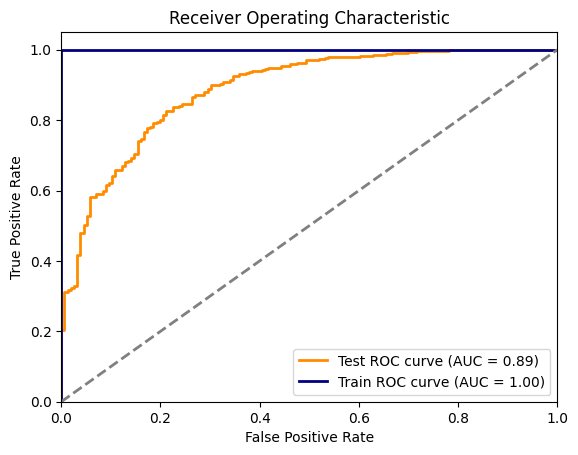

Best C: 10
Accuracy: 0.8947895791583166
              precision    recall  f1-score   support

           0       0.79      0.44      0.57       156
           1       0.90      0.98      0.94       842

    accuracy                           0.89       998
   macro avg       0.85      0.71      0.75       998
weighted avg       0.89      0.89      0.88       998

AUC Score (Test): 0.8868917108228271
AUC Score (Train): 1.0


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Generate the AUC score for the test data
y_pred_prob_test = best_svm_model.decision_function(X_test_tfidf)
auc_score_test = roc_auc_score(y_test, y_pred_prob_test)

# Generate the AUC score for the train data
y_pred_prob_train = best_svm_model.decision_function(X_train_tfidf)
auc_score_train = roc_auc_score(y_train, y_pred_prob_train)

# Compute ROC curves
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_prob_test)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_prob_train)

# Plot ROC curves
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {auc_score_test:.2f})')
plt.plot(fpr_train, tpr_train, color='navy', lw=2, label=f'Train ROC curve (AUC = {auc_score_train:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"Best C: {best_C}")
print(f"Accuracy: {accuracy}")
print(report)
print(f"AUC Score (Test): {auc_score_test}")
print(f"AUC Score (Train): {auc_score_train}")
